In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [77]:
listostocks = (os.listdir("/home/raflicky/Desktop/NYSE_DATA/1_Hour/Nasdaq_stocks"))

In [186]:
def clean_data(files, path = "/home/raflicky/Desktop/NYSE_DATA/1_Day/Stocks"):
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
        df = pd.merge(df,stock_price,how='left',on='Date')
    return df

In [229]:
import random
def next_batch(dataframe, dataframe2, batch_size, features):
    df_size = len(dataframe)
    sample = batch_size / df_size
    upper_bound = int(sample * 100)
    random_point = random.randint(1,100-upper_bound)
    starting_point = int(df_size * (random_point/100))
    ending_point = starting_point + batch_size
    
    data = dataframe.values
    data = data[starting_point-1:ending_point-1]
    data2 = dataframe2.values
    data2 = data2[starting_point-1:ending_point-1]

    X = data[:-1].reshape(batch_size-1,1,features)
    Y = data2[1:].reshape(batch_size-1)
        
    return X, Y

In [245]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [224]:
my_data_frame = clean_data(listostocks)
my_data_frame = my_data_frame.drop(['Date'], axis=1)
my_data_frame = my_data_frame.fillna(0)
my_data_frame_sum = my_data_frame.sum(axis=1)

In [225]:
working_data = my_data_frame.iloc[0:5000]
working_data_sum = my_data_frame_sum.iloc[0:5000]
validate_data = my_data_frame.iloc[5000:]
validate_data_sum = my_data_frame_sum.iloc[5000:]

In [226]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [246]:
trainingX, trainingY = next_batch2(my_x, my_y, 100)
testingX, testingY = next_batch2(my_x, my_y, 100)

In [247]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 100)

In [159]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [353]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(.5))
model.add(Dense(1))

Train on 4999 samples, validate on 4999 samples
Epoch 1/100000
 - 5s - loss: 503.0955 - val_loss: 494.8225
Epoch 2/100000
 - 1s - loss: 490.4642 - val_loss: 486.1864
Epoch 3/100000
 - 1s - loss: 482.4313 - val_loss: 479.1120
Epoch 4/100000
 - 1s - loss: 476.4538 - val_loss: 474.1568
Epoch 5/100000
 - 1s - loss: 472.5038 - val_loss: 470.6775
Epoch 6/100000
 - 1s - loss: 469.2329 - val_loss: 467.7144
Epoch 7/100000
 - 1s - loss: 466.5699 - val_loss: 465.0852
Epoch 8/100000
 - 1s - loss: 462.5482 - val_loss: 462.0813
Epoch 9/100000
 - 1s - loss: 461.1356 - val_loss: 459.7821
Epoch 10/100000
 - 1s - loss: 458.8892 - val_loss: 457.5856
Epoch 11/100000
 - 1s - loss: 456.3791 - val_loss: 455.4439
Epoch 12/100000
 - 1s - loss: 454.8077 - val_loss: 453.4661
Epoch 13/100000
 - 1s - loss: 452.6729 - val_loss: 451.6218
Epoch 14/100000
 - 1s - loss: 450.8797 - val_loss: 449.9214
Epoch 15/100000
 - 1s - loss: 449.5745 - val_loss: 448.3190
Epoch 16/100000
 - 1s - loss: 447.5602 - val_loss: 446.7684
E

Epoch 137/100000
 - 1s - loss: 222.6699 - val_loss: 220.2521
Epoch 138/100000
 - 1s - loss: 222.0755 - val_loss: 218.0938
Epoch 139/100000
 - 1s - loss: 218.4304 - val_loss: 215.9736
Epoch 140/100000
 - 1s - loss: 217.5693 - val_loss: 214.4123
Epoch 141/100000
 - 1s - loss: 215.3808 - val_loss: 211.7159
Epoch 142/100000
 - 1s - loss: 213.4452 - val_loss: 217.2252
Epoch 143/100000
 - 1s - loss: 212.5024 - val_loss: 221.7394
Epoch 144/100000
 - 1s - loss: 213.7014 - val_loss: 224.9935
Epoch 145/100000
 - 1s - loss: 217.4738 - val_loss: 218.2870
Epoch 146/100000
 - 1s - loss: 211.3167 - val_loss: 217.2528
Epoch 147/100000
 - 1s - loss: 209.0630 - val_loss: 206.2548
Epoch 148/100000
 - 1s - loss: 206.1484 - val_loss: 202.0224
Epoch 149/100000
 - 1s - loss: 203.2834 - val_loss: 202.1405
Epoch 150/100000
 - 1s - loss: 201.8772 - val_loss: 203.1019
Epoch 151/100000
 - 1s - loss: 200.4272 - val_loss: 209.1724
Epoch 152/100000
 - 1s - loss: 201.1883 - val_loss: 206.6075
Epoch 153/100000
 - 1s -

Epoch 272/100000
 - 1s - loss: 94.9868 - val_loss: 80.6578
Epoch 273/100000
 - 1s - loss: 95.1113 - val_loss: 82.3220
Epoch 274/100000
 - 1s - loss: 96.3568 - val_loss: 81.9323
Epoch 275/100000
 - 1s - loss: 94.3228 - val_loss: 79.7475
Epoch 276/100000
 - 1s - loss: 95.6305 - val_loss: 80.6240
Epoch 277/100000
 - 1s - loss: 92.4753 - val_loss: 83.3686
Epoch 278/100000
 - 1s - loss: 93.7952 - val_loss: 82.1296
Epoch 279/100000
 - 1s - loss: 94.2098 - val_loss: 85.0530
Epoch 280/100000
 - 1s - loss: 94.8347 - val_loss: 85.9601
Epoch 281/100000
 - 1s - loss: 92.4154 - val_loss: 81.2288
Epoch 282/100000
 - 1s - loss: 94.0060 - val_loss: 87.0482
Epoch 283/100000
 - 1s - loss: 96.6036 - val_loss: 91.8120
Epoch 284/100000
 - 1s - loss: 95.3042 - val_loss: 93.1486
Epoch 285/100000
 - 1s - loss: 97.5004 - val_loss: 85.2939
Epoch 286/100000
 - 1s - loss: 95.5844 - val_loss: 83.3468
Epoch 287/100000
 - 1s - loss: 94.5237 - val_loss: 82.2623
Epoch 288/100000
 - 1s - loss: 90.8187 - val_loss: 77.84

Epoch 411/100000
 - 1s - loss: 70.0181 - val_loss: 54.9024
Epoch 412/100000
 - 1s - loss: 71.7507 - val_loss: 58.2463
Epoch 413/100000
 - 1s - loss: 71.3391 - val_loss: 60.4116
Epoch 414/100000
 - 1s - loss: 70.5818 - val_loss: 65.5826
Epoch 415/100000
 - 1s - loss: 72.9918 - val_loss: 54.4829
Epoch 416/100000
 - 1s - loss: 71.0438 - val_loss: 52.6441
Epoch 417/100000
 - 1s - loss: 68.7651 - val_loss: 57.8223
Epoch 418/100000
 - 1s - loss: 68.8713 - val_loss: 58.1863
Epoch 419/100000
 - 1s - loss: 71.9352 - val_loss: 51.8264
Epoch 420/100000
 - 1s - loss: 70.2727 - val_loss: 54.2014
Epoch 421/100000
 - 1s - loss: 68.2827 - val_loss: 52.1203
Epoch 422/100000
 - 1s - loss: 69.1033 - val_loss: 51.0323
Epoch 423/100000
 - 1s - loss: 66.4392 - val_loss: 49.8560
Epoch 424/100000
 - 1s - loss: 66.9333 - val_loss: 49.3434
Epoch 425/100000
 - 1s - loss: 66.6758 - val_loss: 49.8652
Epoch 426/100000
 - 1s - loss: 67.9079 - val_loss: 54.9642
Epoch 427/100000
 - 1s - loss: 69.9336 - val_loss: 54.82

Epoch 550/100000
 - 1s - loss: 57.1514 - val_loss: 49.3879
Epoch 551/100000
 - 1s - loss: 57.1063 - val_loss: 37.1300
Epoch 552/100000
 - 1s - loss: 56.8879 - val_loss: 39.0531
Epoch 553/100000
 - 1s - loss: 57.0000 - val_loss: 36.6628
Epoch 554/100000
 - 1s - loss: 55.3368 - val_loss: 38.2901
Epoch 555/100000
 - 1s - loss: 55.4031 - val_loss: 38.7774
Epoch 556/100000
 - 1s - loss: 57.6816 - val_loss: 37.4892
Epoch 557/100000
 - 1s - loss: 56.9691 - val_loss: 42.6053
Epoch 558/100000
 - 1s - loss: 55.7341 - val_loss: 39.6634
Epoch 559/100000
 - 1s - loss: 56.1763 - val_loss: 37.8532
Epoch 560/100000
 - 1s - loss: 56.4055 - val_loss: 38.5397
Epoch 561/100000
 - 1s - loss: 56.5164 - val_loss: 35.0484
Epoch 562/100000
 - 1s - loss: 54.5258 - val_loss: 37.4103
Epoch 563/100000
 - 1s - loss: 55.4350 - val_loss: 37.5402
Epoch 564/100000
 - 1s - loss: 54.5367 - val_loss: 36.2468
Epoch 565/100000
 - 1s - loss: 56.6090 - val_loss: 34.1177
Epoch 566/100000
 - 1s - loss: 55.7628 - val_loss: 35.29

Epoch 689/100000
 - 1s - loss: 49.4113 - val_loss: 34.9297
Epoch 690/100000
 - 1s - loss: 50.1104 - val_loss: 34.0668
Epoch 691/100000
 - 1s - loss: 52.9422 - val_loss: 34.6787
Epoch 692/100000
 - 1s - loss: 52.0993 - val_loss: 36.5796
Epoch 693/100000
 - 1s - loss: 51.8942 - val_loss: 37.4776
Epoch 694/100000
 - 1s - loss: 52.8344 - val_loss: 32.7708
Epoch 695/100000
 - 1s - loss: 50.6682 - val_loss: 32.4111
Epoch 696/100000
 - 1s - loss: 51.4056 - val_loss: 31.6782
Epoch 697/100000
 - 1s - loss: 49.7063 - val_loss: 30.4225
Epoch 698/100000
 - 1s - loss: 49.0975 - val_loss: 30.8165
Epoch 699/100000
 - 1s - loss: 49.6038 - val_loss: 29.8157
Epoch 700/100000
 - 1s - loss: 50.5947 - val_loss: 33.8001
Epoch 701/100000
 - 1s - loss: 50.4965 - val_loss: 28.0520
Epoch 702/100000
 - 1s - loss: 50.4461 - val_loss: 31.5220
Epoch 703/100000
 - 1s - loss: 50.9541 - val_loss: 29.4329
Epoch 704/100000
 - 1s - loss: 49.5852 - val_loss: 29.8489
Epoch 705/100000
 - 1s - loss: 50.9277 - val_loss: 31.80

Epoch 828/100000
 - 1s - loss: 48.3747 - val_loss: 26.7922
Epoch 829/100000
 - 1s - loss: 47.8734 - val_loss: 29.2032
Epoch 830/100000
 - 1s - loss: 47.4712 - val_loss: 30.8407
Epoch 831/100000
 - 1s - loss: 49.3459 - val_loss: 25.0212
Epoch 832/100000
 - 1s - loss: 46.5090 - val_loss: 28.2567
Epoch 833/100000
 - 1s - loss: 47.9040 - val_loss: 28.1735
Epoch 834/100000
 - 1s - loss: 48.8190 - val_loss: 25.5565
Epoch 835/100000
 - 1s - loss: 50.9245 - val_loss: 26.3021
Epoch 836/100000
 - 1s - loss: 46.9622 - val_loss: 29.7220
Epoch 837/100000
 - 1s - loss: 46.7911 - val_loss: 27.4576
Epoch 838/100000
 - 1s - loss: 48.2781 - val_loss: 25.2458
Epoch 839/100000
 - 1s - loss: 47.7825 - val_loss: 27.7557
Epoch 840/100000
 - 1s - loss: 46.8799 - val_loss: 26.2620
Epoch 841/100000
 - 1s - loss: 48.2938 - val_loss: 27.5443
Epoch 842/100000
 - 1s - loss: 47.4332 - val_loss: 29.3434
Epoch 843/100000
 - 1s - loss: 46.7136 - val_loss: 26.3734
Epoch 844/100000
 - 1s - loss: 48.3854 - val_loss: 29.04

Epoch 967/100000
 - 1s - loss: 46.7415 - val_loss: 25.5819
Epoch 968/100000
 - 1s - loss: 44.6247 - val_loss: 30.5978
Epoch 969/100000
 - 1s - loss: 48.0557 - val_loss: 24.9223
Epoch 970/100000
 - 1s - loss: 45.5728 - val_loss: 25.5266
Epoch 971/100000
 - 1s - loss: 46.7372 - val_loss: 24.6816
Epoch 972/100000
 - 1s - loss: 46.8243 - val_loss: 36.5681
Epoch 973/100000
 - 1s - loss: 47.9765 - val_loss: 27.8596
Epoch 974/100000
 - 1s - loss: 47.6939 - val_loss: 28.5825
Epoch 975/100000
 - 1s - loss: 48.2210 - val_loss: 29.3770
Epoch 976/100000
 - 1s - loss: 47.4133 - val_loss: 26.7599
Epoch 977/100000
 - 1s - loss: 44.5906 - val_loss: 24.4106
Epoch 978/100000
 - 1s - loss: 45.2864 - val_loss: 23.2226
Epoch 979/100000
 - 1s - loss: 47.1407 - val_loss: 25.1596
Epoch 980/100000
 - 1s - loss: 45.2980 - val_loss: 22.2814
Epoch 981/100000
 - 1s - loss: 44.9049 - val_loss: 22.3406
Epoch 982/100000
 - 1s - loss: 46.2400 - val_loss: 24.1133
Epoch 983/100000
 - 1s - loss: 44.7314 - val_loss: 22.31

 - 1s - loss: 43.9216 - val_loss: 21.5678
Epoch 1105/100000
 - 1s - loss: 45.1618 - val_loss: 24.0344
Epoch 1106/100000
 - 1s - loss: 44.1401 - val_loss: 21.3485
Epoch 1107/100000
 - 1s - loss: 44.0719 - val_loss: 21.0098
Epoch 1108/100000
 - 1s - loss: 44.6673 - val_loss: 23.8582
Epoch 1109/100000
 - 1s - loss: 44.3684 - val_loss: 28.7964
Epoch 1110/100000
 - 1s - loss: 46.0859 - val_loss: 20.9719
Epoch 1111/100000
 - 1s - loss: 43.2016 - val_loss: 21.7574
Epoch 1112/100000
 - 1s - loss: 44.5717 - val_loss: 20.3783
Epoch 1113/100000
 - 1s - loss: 45.0340 - val_loss: 25.9477
Epoch 1114/100000
 - 1s - loss: 47.3749 - val_loss: 28.7434
Epoch 1115/100000
 - 1s - loss: 47.0500 - val_loss: 28.9543
Epoch 1116/100000
 - 1s - loss: 47.4578 - val_loss: 26.6694
Epoch 1117/100000
 - 1s - loss: 44.7437 - val_loss: 22.7462
Epoch 1118/100000
 - 1s - loss: 45.0507 - val_loss: 23.8185
Epoch 1119/100000
 - 1s - loss: 43.8807 - val_loss: 23.3063
Epoch 1120/100000
 - 1s - loss: 45.9234 - val_loss: 22.582

Epoch 1241/100000
 - 1s - loss: 42.7909 - val_loss: 22.1290
Epoch 1242/100000
 - 1s - loss: 45.4807 - val_loss: 25.0598
Epoch 1243/100000
 - 1s - loss: 45.2747 - val_loss: 30.4267
Epoch 1244/100000
 - 1s - loss: 47.0948 - val_loss: 24.0078
Epoch 1245/100000
 - 1s - loss: 44.7237 - val_loss: 22.5227
Epoch 1246/100000
 - 1s - loss: 44.8799 - val_loss: 23.9171
Epoch 1247/100000
 - 1s - loss: 45.3704 - val_loss: 21.6239
Epoch 1248/100000
 - 1s - loss: 44.0081 - val_loss: 24.6812
Epoch 1249/100000
 - 1s - loss: 44.9859 - val_loss: 20.1435
Epoch 1250/100000
 - 1s - loss: 43.8201 - val_loss: 21.9858
Epoch 1251/100000
 - 1s - loss: 44.6350 - val_loss: 25.0000
Epoch 1252/100000
 - 1s - loss: 45.5149 - val_loss: 24.8098
Epoch 1253/100000
 - 1s - loss: 45.9754 - val_loss: 32.5780
Epoch 1254/100000
 - 1s - loss: 46.1117 - val_loss: 23.1663
Epoch 1255/100000
 - 1s - loss: 44.5202 - val_loss: 23.5588
Epoch 1256/100000
 - 1s - loss: 45.5140 - val_loss: 25.0061
Epoch 1257/100000
 - 1s - loss: 45.1362 

Epoch 1378/100000
 - 1s - loss: 42.8134 - val_loss: 20.0022
Epoch 1379/100000
 - 1s - loss: 42.0621 - val_loss: 22.2813
Epoch 1380/100000
 - 1s - loss: 43.4427 - val_loss: 20.1930
Epoch 1381/100000
 - 1s - loss: 43.2118 - val_loss: 21.3378
Epoch 1382/100000
 - 1s - loss: 43.3281 - val_loss: 20.0523
Epoch 1383/100000
 - 1s - loss: 43.6651 - val_loss: 21.4358
Epoch 1384/100000
 - 1s - loss: 44.2833 - val_loss: 22.9610
Epoch 1385/100000
 - 1s - loss: 44.6287 - val_loss: 21.1231
Epoch 1386/100000
 - 1s - loss: 45.4443 - val_loss: 21.6173
Epoch 1387/100000
 - 1s - loss: 43.9174 - val_loss: 20.5044
Epoch 1388/100000
 - 1s - loss: 43.6688 - val_loss: 22.4977
Epoch 1389/100000
 - 1s - loss: 45.0179 - val_loss: 23.3518
Epoch 1390/100000
 - 1s - loss: 44.7427 - val_loss: 20.9572
Epoch 1391/100000
 - 1s - loss: 44.5213 - val_loss: 22.5124
Epoch 1392/100000
 - 1s - loss: 44.1200 - val_loss: 21.5570
Epoch 1393/100000
 - 1s - loss: 43.4085 - val_loss: 20.3968
Epoch 1394/100000
 - 1s - loss: 43.7259 

Epoch 1515/100000
 - 1s - loss: 44.3080 - val_loss: 21.8195
Epoch 1516/100000
 - 1s - loss: 41.7233 - val_loss: 20.1128
Epoch 1517/100000
 - 1s - loss: 42.1877 - val_loss: 20.9707
Epoch 1518/100000
 - 1s - loss: 43.6998 - val_loss: 20.8851
Epoch 1519/100000
 - 1s - loss: 43.3968 - val_loss: 19.5833
Epoch 1520/100000
 - 1s - loss: 44.2640 - val_loss: 19.1777
Epoch 1521/100000
 - 1s - loss: 43.1631 - val_loss: 20.7108
Epoch 1522/100000
 - 1s - loss: 43.0302 - val_loss: 20.6060
Epoch 1523/100000
 - 1s - loss: 43.3671 - val_loss: 20.0961
Epoch 1524/100000
 - 1s - loss: 42.8761 - val_loss: 20.9575
Epoch 1525/100000
 - 1s - loss: 44.1951 - val_loss: 20.4173
Epoch 1526/100000
 - 1s - loss: 43.2744 - val_loss: 20.1667
Epoch 1527/100000
 - 1s - loss: 43.3390 - val_loss: 22.5854
Epoch 1528/100000
 - 1s - loss: 43.6714 - val_loss: 21.4494
Epoch 1529/100000
 - 1s - loss: 43.8581 - val_loss: 22.9513
Epoch 1530/100000
 - 1s - loss: 43.6047 - val_loss: 22.0848
Epoch 1531/100000
 - 1s - loss: 43.7310 

Epoch 1652/100000
 - 1s - loss: 42.5907 - val_loss: 19.3496
Epoch 1653/100000
 - 1s - loss: 43.6683 - val_loss: 22.2948
Epoch 1654/100000
 - 1s - loss: 42.2604 - val_loss: 20.4355
Epoch 1655/100000
 - 1s - loss: 43.0881 - val_loss: 20.8008
Epoch 1656/100000
 - 1s - loss: 42.8489 - val_loss: 21.9623
Epoch 1657/100000
 - 1s - loss: 43.9680 - val_loss: 23.3093
Epoch 1658/100000
 - 1s - loss: 44.1041 - val_loss: 23.7081
Epoch 1659/100000
 - 1s - loss: 44.2014 - val_loss: 20.8001
Epoch 1660/100000
 - 1s - loss: 42.2431 - val_loss: 20.3498
Epoch 1661/100000
 - 1s - loss: 44.1772 - val_loss: 22.2748
Epoch 1662/100000
 - 1s - loss: 43.9535 - val_loss: 22.2945
Epoch 1663/100000
 - 1s - loss: 43.6549 - val_loss: 23.9482
Epoch 1664/100000
 - 1s - loss: 44.6519 - val_loss: 19.5030
Epoch 1665/100000
 - 1s - loss: 43.0239 - val_loss: 21.9521
Epoch 1666/100000
 - 1s - loss: 43.6273 - val_loss: 22.9134
Epoch 1667/100000
 - 1s - loss: 42.4585 - val_loss: 18.3711
Epoch 1668/100000
 - 1s - loss: 43.1960 

Epoch 1789/100000
 - 1s - loss: 42.2227 - val_loss: 18.4792
Epoch 1790/100000
 - 1s - loss: 43.3884 - val_loss: 17.8393
Epoch 1791/100000
 - 1s - loss: 42.4571 - val_loss: 23.2215
Epoch 1792/100000
 - 1s - loss: 43.3818 - val_loss: 22.0680
Epoch 1793/100000
 - 1s - loss: 43.0721 - val_loss: 19.7714
Epoch 1794/100000
 - 1s - loss: 45.0249 - val_loss: 20.0351
Epoch 1795/100000
 - 1s - loss: 42.3300 - val_loss: 20.0831
Epoch 1796/100000
 - 1s - loss: 42.8416 - val_loss: 18.3697
Epoch 1797/100000
 - 1s - loss: 41.9160 - val_loss: 18.4941
Epoch 1798/100000
 - 1s - loss: 42.8358 - val_loss: 17.6519
Epoch 1799/100000
 - 1s - loss: 40.6657 - val_loss: 18.2433
Epoch 1800/100000
 - 1s - loss: 42.0496 - val_loss: 19.7988
Epoch 1801/100000
 - 1s - loss: 42.8044 - val_loss: 20.5977
Epoch 1802/100000
 - 1s - loss: 43.6569 - val_loss: 19.2046
Epoch 1803/100000
 - 1s - loss: 43.7703 - val_loss: 23.0553
Epoch 1804/100000
 - 1s - loss: 44.7297 - val_loss: 18.8747
Epoch 1805/100000
 - 1s - loss: 43.9557 

Epoch 1926/100000
 - 1s - loss: 43.7476 - val_loss: 19.7257
Epoch 1927/100000
 - 1s - loss: 42.3723 - val_loss: 18.5740
Epoch 1928/100000
 - 1s - loss: 42.6751 - val_loss: 18.4072
Epoch 1929/100000
 - 1s - loss: 42.8733 - val_loss: 18.7209
Epoch 1930/100000
 - 1s - loss: 42.2800 - val_loss: 17.9945
Epoch 1931/100000
 - 1s - loss: 43.3315 - val_loss: 20.0860
Epoch 1932/100000
 - 1s - loss: 42.4962 - val_loss: 17.9623
Epoch 1933/100000
 - 1s - loss: 43.2443 - val_loss: 17.8281
Epoch 1934/100000
 - 1s - loss: 42.1326 - val_loss: 19.3660
Epoch 1935/100000
 - 1s - loss: 43.0319 - val_loss: 21.7397
Epoch 1936/100000
 - 1s - loss: 44.1899 - val_loss: 21.9421
Epoch 1937/100000
 - 1s - loss: 41.6894 - val_loss: 18.1346
Epoch 1938/100000
 - 1s - loss: 43.0928 - val_loss: 17.8505
Epoch 1939/100000
 - 1s - loss: 41.8058 - val_loss: 17.1900
Epoch 1940/100000
 - 1s - loss: 42.2652 - val_loss: 19.0380
Epoch 1941/100000
 - 1s - loss: 42.5847 - val_loss: 20.0959
Epoch 1942/100000
 - 1s - loss: 42.2982 

Epoch 2063/100000
 - 1s - loss: 42.2964 - val_loss: 19.6307
Epoch 2064/100000
 - 1s - loss: 43.3617 - val_loss: 18.6163
Epoch 2065/100000
 - 1s - loss: 42.7735 - val_loss: 20.0419
Epoch 2066/100000
 - 1s - loss: 42.9761 - val_loss: 19.8181
Epoch 2067/100000
 - 1s - loss: 42.9588 - val_loss: 18.9480
Epoch 2068/100000
 - 1s - loss: 41.8148 - val_loss: 18.5018
Epoch 2069/100000
 - 1s - loss: 44.2027 - val_loss: 20.8720
Epoch 2070/100000
 - 1s - loss: 40.7272 - val_loss: 17.3232
Epoch 2071/100000
 - 1s - loss: 42.4869 - val_loss: 18.1748
Epoch 2072/100000
 - 1s - loss: 41.8260 - val_loss: 18.0415
Epoch 2073/100000
 - 1s - loss: 43.0075 - val_loss: 18.6949
Epoch 2074/100000
 - 1s - loss: 42.4954 - val_loss: 19.0208
Epoch 2075/100000
 - 1s - loss: 41.6473 - val_loss: 17.7515
Epoch 2076/100000
 - 1s - loss: 41.8794 - val_loss: 17.0366
Epoch 2077/100000
 - 1s - loss: 41.7992 - val_loss: 17.8019
Epoch 2078/100000
 - 1s - loss: 41.7306 - val_loss: 16.7947
Epoch 2079/100000
 - 1s - loss: 41.5498 

Epoch 2200/100000
 - 1s - loss: 43.9816 - val_loss: 21.9939
Epoch 2201/100000
 - 1s - loss: 43.6030 - val_loss: 20.0410
Epoch 2202/100000
 - 1s - loss: 43.1892 - val_loss: 21.5519
Epoch 2203/100000
 - 1s - loss: 42.7146 - val_loss: 18.8322
Epoch 2204/100000
 - 1s - loss: 41.4192 - val_loss: 20.6653
Epoch 2205/100000
 - 1s - loss: 42.1425 - val_loss: 19.5907
Epoch 2206/100000
 - 1s - loss: 44.7415 - val_loss: 20.0936
Epoch 2207/100000
 - 1s - loss: 44.1478 - val_loss: 20.9887
Epoch 2208/100000
 - 1s - loss: 42.7124 - val_loss: 23.8774
Epoch 2209/100000
 - 1s - loss: 42.6929 - val_loss: 21.6374
Epoch 2210/100000
 - 1s - loss: 43.6743 - val_loss: 19.2826
Epoch 2211/100000
 - 1s - loss: 42.9686 - val_loss: 20.9559
Epoch 2212/100000
 - 1s - loss: 43.3347 - val_loss: 20.1452
Epoch 2213/100000
 - 1s - loss: 43.4221 - val_loss: 20.3014
Epoch 2214/100000
 - 1s - loss: 42.5936 - val_loss: 20.2922
Epoch 2215/100000
 - 1s - loss: 43.7473 - val_loss: 18.3111
Epoch 2216/100000
 - 1s - loss: 41.8948 

Epoch 2337/100000
 - 1s - loss: 42.3305 - val_loss: 18.1945
Epoch 2338/100000
 - 1s - loss: 41.7210 - val_loss: 16.1914
Epoch 2339/100000
 - 1s - loss: 40.8423 - val_loss: 16.0008
Epoch 2340/100000
 - 1s - loss: 41.6785 - val_loss: 15.7005
Epoch 2341/100000
 - 1s - loss: 41.9358 - val_loss: 17.1876
Epoch 2342/100000
 - 1s - loss: 42.2995 - val_loss: 15.8229
Epoch 2343/100000
 - 1s - loss: 40.3196 - val_loss: 16.5759
Epoch 2344/100000
 - 1s - loss: 42.3914 - val_loss: 15.0458
Epoch 2345/100000
 - 1s - loss: 41.3850 - val_loss: 16.0111
Epoch 2346/100000
 - 1s - loss: 40.5707 - val_loss: 14.9437
Epoch 2347/100000
 - 1s - loss: 40.1832 - val_loss: 15.6094
Epoch 2348/100000
 - 1s - loss: 41.1593 - val_loss: 16.3703
Epoch 2349/100000
 - 1s - loss: 41.3652 - val_loss: 17.0086
Epoch 2350/100000
 - 1s - loss: 41.6503 - val_loss: 15.7098
Epoch 2351/100000
 - 1s - loss: 41.3125 - val_loss: 21.0317
Epoch 2352/100000
 - 1s - loss: 41.6376 - val_loss: 17.9333
Epoch 2353/100000
 - 1s - loss: 42.4200 

Epoch 2474/100000
 - 1s - loss: 40.9554 - val_loss: 15.3335
Epoch 2475/100000
 - 1s - loss: 40.9470 - val_loss: 16.1347
Epoch 2476/100000
 - 1s - loss: 42.3131 - val_loss: 16.6985
Epoch 2477/100000
 - 1s - loss: 42.1048 - val_loss: 16.1748
Epoch 2478/100000
 - 1s - loss: 41.3139 - val_loss: 20.4039
Epoch 2479/100000
 - 1s - loss: 42.6779 - val_loss: 18.2617
Epoch 2480/100000
 - 1s - loss: 43.0807 - val_loss: 21.7591
Epoch 2481/100000
 - 1s - loss: 42.9954 - val_loss: 16.8977
Epoch 2482/100000
 - 1s - loss: 41.9868 - val_loss: 16.5240
Epoch 2483/100000
 - 1s - loss: 42.4561 - val_loss: 20.0574
Epoch 2484/100000
 - 1s - loss: 40.7801 - val_loss: 18.2568
Epoch 2485/100000
 - 1s - loss: 41.8767 - val_loss: 18.7059
Epoch 2486/100000
 - 1s - loss: 41.8737 - val_loss: 18.8181
Epoch 2487/100000
 - 1s - loss: 41.4218 - val_loss: 17.1374
Epoch 2488/100000
 - 1s - loss: 42.0210 - val_loss: 16.5014
Epoch 2489/100000
 - 2s - loss: 43.2145 - val_loss: 18.0652
Epoch 2490/100000
 - 1s - loss: 42.3878 

Epoch 2611/100000
 - 1s - loss: 40.8526 - val_loss: 15.7366
Epoch 2612/100000
 - 1s - loss: 41.6867 - val_loss: 15.9697
Epoch 2613/100000
 - 2s - loss: 41.8162 - val_loss: 16.5775
Epoch 2614/100000
 - 1s - loss: 42.4538 - val_loss: 15.3004
Epoch 2615/100000
 - 1s - loss: 42.0763 - val_loss: 19.8180
Epoch 2616/100000
 - 1s - loss: 42.1531 - val_loss: 14.9683
Epoch 2617/100000
 - 1s - loss: 41.0395 - val_loss: 14.8284
Epoch 2618/100000
 - 1s - loss: 41.3747 - val_loss: 15.0906
Epoch 2619/100000
 - 1s - loss: 41.0753 - val_loss: 15.1998
Epoch 2620/100000
 - 1s - loss: 41.1996 - val_loss: 15.6788
Epoch 2621/100000
 - 1s - loss: 41.1788 - val_loss: 15.0765
Epoch 2622/100000
 - 1s - loss: 40.9977 - val_loss: 14.4412
Epoch 2623/100000
 - 1s - loss: 42.3277 - val_loss: 15.2006
Epoch 2624/100000
 - 1s - loss: 42.4589 - val_loss: 16.2062
Epoch 2625/100000
 - 1s - loss: 40.6856 - val_loss: 16.4151
Epoch 2626/100000
 - 1s - loss: 41.6236 - val_loss: 16.9444
Epoch 2627/100000
 - 1s - loss: 41.1636 

Epoch 2748/100000
 - 1s - loss: 43.2952 - val_loss: 16.3798
Epoch 2749/100000
 - 1s - loss: 40.6470 - val_loss: 17.6512
Epoch 2750/100000
 - 1s - loss: 43.1203 - val_loss: 17.9801
Epoch 2751/100000
 - 1s - loss: 42.6092 - val_loss: 19.3671
Epoch 2752/100000
 - 1s - loss: 42.6839 - val_loss: 18.3191
Epoch 2753/100000
 - 1s - loss: 41.2642 - val_loss: 18.6760
Epoch 2754/100000
 - 1s - loss: 40.4776 - val_loss: 16.7269
Epoch 2755/100000
 - 1s - loss: 41.9500 - val_loss: 18.1547
Epoch 2756/100000
 - 1s - loss: 41.8573 - val_loss: 16.8821
Epoch 2757/100000
 - 1s - loss: 41.6582 - val_loss: 16.7238
Epoch 2758/100000
 - 1s - loss: 40.4062 - val_loss: 15.3494
Epoch 2759/100000
 - 1s - loss: 41.1444 - val_loss: 15.0372
Epoch 2760/100000
 - 1s - loss: 40.9893 - val_loss: 15.3179
Epoch 2761/100000
 - 1s - loss: 40.9377 - val_loss: 14.9027
Epoch 2762/100000
 - 1s - loss: 41.2181 - val_loss: 14.6897
Epoch 2763/100000
 - 1s - loss: 41.3461 - val_loss: 15.9335
Epoch 2764/100000
 - 1s - loss: 41.8228 

Epoch 2885/100000
 - 1s - loss: 42.3468 - val_loss: 16.8538
Epoch 2886/100000
 - 1s - loss: 40.9106 - val_loss: 14.9305
Epoch 2887/100000
 - 1s - loss: 40.5362 - val_loss: 15.3697
Epoch 2888/100000
 - 1s - loss: 40.7662 - val_loss: 13.3120
Epoch 2889/100000
 - 1s - loss: 39.5068 - val_loss: 13.6854
Epoch 2890/100000
 - 1s - loss: 40.5153 - val_loss: 14.7081
Epoch 2891/100000
 - 1s - loss: 40.7579 - val_loss: 16.2618
Epoch 2892/100000
 - 1s - loss: 41.1737 - val_loss: 15.6179
Epoch 2893/100000
 - 1s - loss: 41.7240 - val_loss: 16.3038
Epoch 2894/100000
 - 1s - loss: 41.1261 - val_loss: 15.5250
Epoch 2895/100000
 - 1s - loss: 40.1385 - val_loss: 14.8848
Epoch 2896/100000
 - 1s - loss: 41.4027 - val_loss: 16.8843
Epoch 2897/100000
 - 1s - loss: 41.6620 - val_loss: 18.6535
Epoch 2898/100000
 - 1s - loss: 40.7503 - val_loss: 19.9166
Epoch 2899/100000
 - 1s - loss: 43.2686 - val_loss: 15.5186
Epoch 2900/100000
 - 1s - loss: 41.0431 - val_loss: 14.6142
Epoch 2901/100000
 - 1s - loss: 42.9600 

Epoch 3022/100000
 - 1s - loss: 42.1206 - val_loss: 19.3603
Epoch 3023/100000
 - 1s - loss: 41.3597 - val_loss: 13.9655
Epoch 3024/100000
 - 1s - loss: 40.6203 - val_loss: 14.7097
Epoch 3025/100000
 - 1s - loss: 40.9477 - val_loss: 13.9149
Epoch 3026/100000
 - 1s - loss: 40.2948 - val_loss: 14.5301
Epoch 3027/100000
 - 1s - loss: 41.4899 - val_loss: 15.1589
Epoch 3028/100000
 - 1s - loss: 41.9261 - val_loss: 15.7139
Epoch 3029/100000
 - 1s - loss: 40.5366 - val_loss: 14.9568
Epoch 3030/100000
 - 1s - loss: 41.6304 - val_loss: 16.9969
Epoch 3031/100000
 - 1s - loss: 41.2480 - val_loss: 15.2961
Epoch 3032/100000
 - 1s - loss: 40.7509 - val_loss: 16.2184
Epoch 3033/100000
 - 1s - loss: 42.0319 - val_loss: 16.6252
Epoch 3034/100000
 - 1s - loss: 41.1321 - val_loss: 15.9520
Epoch 3035/100000
 - 1s - loss: 41.4680 - val_loss: 15.1786
Epoch 3036/100000
 - 1s - loss: 40.7137 - val_loss: 15.5613
Epoch 3037/100000
 - 1s - loss: 41.0413 - val_loss: 14.9524
Epoch 3038/100000
 - 1s - loss: 41.8197 

Epoch 3159/100000
 - 1s - loss: 40.9014 - val_loss: 16.3704
Epoch 3160/100000
 - 1s - loss: 41.3437 - val_loss: 15.7847
Epoch 3161/100000
 - 1s - loss: 41.1375 - val_loss: 17.7686
Epoch 3162/100000
 - 2s - loss: 40.8356 - val_loss: 15.0458
Epoch 3163/100000
 - 1s - loss: 40.5792 - val_loss: 17.9095
Epoch 3164/100000
 - 1s - loss: 42.5324 - val_loss: 17.0271
Epoch 3165/100000
 - 1s - loss: 42.4347 - val_loss: 17.2319
Epoch 3166/100000
 - 1s - loss: 41.0834 - val_loss: 16.6077
Epoch 3167/100000
 - 1s - loss: 43.0905 - val_loss: 17.9600
Epoch 3168/100000
 - 1s - loss: 40.9216 - val_loss: 16.3578
Epoch 3169/100000
 - 1s - loss: 41.3248 - val_loss: 16.2253
Epoch 3170/100000
 - 1s - loss: 41.1076 - val_loss: 14.2872
Epoch 3171/100000
 - 1s - loss: 40.7910 - val_loss: 14.7643
Epoch 3172/100000
 - 1s - loss: 41.7428 - val_loss: 17.1718
Epoch 3173/100000
 - 1s - loss: 40.8603 - val_loss: 14.2441
Epoch 3174/100000
 - 1s - loss: 41.1235 - val_loss: 14.6210
Epoch 3175/100000
 - 1s - loss: 41.9244 

Epoch 3296/100000
 - 1s - loss: 41.3206 - val_loss: 18.4635
Epoch 3297/100000
 - 1s - loss: 43.1770 - val_loss: 15.2814
Epoch 3298/100000
 - 1s - loss: 41.6638 - val_loss: 17.0152
Epoch 3299/100000
 - 1s - loss: 41.7750 - val_loss: 19.3566
Epoch 3300/100000
 - 1s - loss: 43.2297 - val_loss: 16.9408
Epoch 3301/100000
 - 1s - loss: 41.4734 - val_loss: 15.6140
Epoch 3302/100000
 - 1s - loss: 41.9920 - val_loss: 17.1342
Epoch 3303/100000
 - 1s - loss: 39.7928 - val_loss: 14.4145
Epoch 3304/100000
 - 1s - loss: 41.5140 - val_loss: 15.3334
Epoch 3305/100000
 - 1s - loss: 41.2944 - val_loss: 15.2690
Epoch 3306/100000
 - 1s - loss: 42.2700 - val_loss: 16.1190
Epoch 3307/100000
 - 1s - loss: 40.8704 - val_loss: 16.0547
Epoch 3308/100000
 - 1s - loss: 41.0705 - val_loss: 14.9228
Epoch 3309/100000
 - 1s - loss: 40.9468 - val_loss: 15.4949
Epoch 3310/100000
 - 1s - loss: 41.0815 - val_loss: 15.2692
Epoch 3311/100000
 - 1s - loss: 40.0736 - val_loss: 14.5548
Epoch 3312/100000
 - 1s - loss: 41.6955 

Epoch 3433/100000
 - 1s - loss: 41.2231 - val_loss: 14.5434
Epoch 3434/100000
 - 1s - loss: 42.2696 - val_loss: 16.6420
Epoch 3435/100000
 - 1s - loss: 41.5265 - val_loss: 15.0977
Epoch 3436/100000
 - 1s - loss: 40.0575 - val_loss: 16.0139
Epoch 3437/100000
 - 1s - loss: 41.9090 - val_loss: 18.1062
Epoch 3438/100000
 - 1s - loss: 40.4583 - val_loss: 16.2938
Epoch 3439/100000
 - 1s - loss: 41.4346 - val_loss: 15.8994
Epoch 3440/100000
 - 1s - loss: 42.0240 - val_loss: 14.9915
Epoch 3441/100000
 - 1s - loss: 41.4473 - val_loss: 16.9421
Epoch 3442/100000
 - 1s - loss: 40.9846 - val_loss: 17.5370
Epoch 3443/100000
 - 1s - loss: 40.9510 - val_loss: 16.0670
Epoch 3444/100000
 - 1s - loss: 41.3887 - val_loss: 14.5154
Epoch 3445/100000
 - 1s - loss: 40.9941 - val_loss: 16.1233
Epoch 3446/100000
 - 1s - loss: 41.0710 - val_loss: 14.7666
Epoch 3447/100000
 - 1s - loss: 40.3977 - val_loss: 16.3760
Epoch 3448/100000
 - 1s - loss: 41.7136 - val_loss: 15.8149
Epoch 3449/100000
 - 1s - loss: 41.1361 

Epoch 3570/100000
 - 1s - loss: 40.6475 - val_loss: 14.6766
Epoch 3571/100000
 - 1s - loss: 41.6266 - val_loss: 14.3135
Epoch 3572/100000
 - 1s - loss: 40.5357 - val_loss: 14.0433
Epoch 3573/100000
 - 1s - loss: 41.5146 - val_loss: 15.3225
Epoch 3574/100000
 - 1s - loss: 40.2186 - val_loss: 15.8060
Epoch 3575/100000
 - 1s - loss: 42.1479 - val_loss: 17.6692
Epoch 3576/100000
 - 1s - loss: 41.7258 - val_loss: 16.6577
Epoch 3577/100000
 - 1s - loss: 42.6312 - val_loss: 16.4095
Epoch 3578/100000
 - 1s - loss: 41.1065 - val_loss: 14.2477
Epoch 3579/100000
 - 1s - loss: 39.9741 - val_loss: 17.7177
Epoch 3580/100000
 - 1s - loss: 41.0705 - val_loss: 16.3159
Epoch 3581/100000
 - 1s - loss: 41.7073 - val_loss: 15.8850
Epoch 3582/100000
 - 1s - loss: 42.0523 - val_loss: 14.9261
Epoch 3583/100000
 - 1s - loss: 40.9986 - val_loss: 14.3216
Epoch 3584/100000
 - 1s - loss: 41.5198 - val_loss: 14.7625
Epoch 3585/100000
 - 1s - loss: 40.9130 - val_loss: 14.7473
Epoch 3586/100000
 - 1s - loss: 41.0673 

Epoch 3707/100000
 - 1s - loss: 40.4273 - val_loss: 14.9376
Epoch 3708/100000
 - 1s - loss: 40.7648 - val_loss: 15.0778
Epoch 3709/100000
 - 1s - loss: 41.2770 - val_loss: 15.8445
Epoch 3710/100000
 - 1s - loss: 41.3001 - val_loss: 16.6982
Epoch 3711/100000
 - 1s - loss: 41.0967 - val_loss: 14.6788
Epoch 3712/100000
 - 1s - loss: 41.1931 - val_loss: 15.5311
Epoch 3713/100000
 - 1s - loss: 41.7673 - val_loss: 15.2865
Epoch 3714/100000
 - 1s - loss: 41.0627 - val_loss: 14.9108
Epoch 3715/100000
 - 1s - loss: 41.4973 - val_loss: 14.9698
Epoch 3716/100000
 - 1s - loss: 41.9107 - val_loss: 16.6401
Epoch 3717/100000
 - 1s - loss: 41.2855 - val_loss: 17.8033
Epoch 3718/100000
 - 1s - loss: 41.0844 - val_loss: 15.8772
Epoch 3719/100000
 - 1s - loss: 41.6600 - val_loss: 16.5181
Epoch 3720/100000
 - 1s - loss: 42.2200 - val_loss: 14.1197
Epoch 3721/100000
 - 1s - loss: 40.5117 - val_loss: 14.1428
Epoch 3722/100000
 - 1s - loss: 40.9574 - val_loss: 14.5371
Epoch 3723/100000
 - 1s - loss: 40.8906 

Epoch 3844/100000
 - 1s - loss: 40.5862 - val_loss: 16.7522
Epoch 3845/100000
 - 1s - loss: 40.5254 - val_loss: 15.7223
Epoch 3846/100000
 - 1s - loss: 40.7706 - val_loss: 14.7447
Epoch 3847/100000
 - 1s - loss: 41.1954 - val_loss: 14.5084
Epoch 3848/100000
 - 1s - loss: 41.6436 - val_loss: 14.8028
Epoch 3849/100000
 - 1s - loss: 40.3395 - val_loss: 19.2344
Epoch 3850/100000
 - 1s - loss: 41.1128 - val_loss: 16.4781
Epoch 3851/100000
 - 1s - loss: 41.8818 - val_loss: 17.1940
Epoch 3852/100000
 - 1s - loss: 42.0530 - val_loss: 15.1445
Epoch 3853/100000
 - 1s - loss: 40.7393 - val_loss: 13.7566
Epoch 3854/100000
 - 1s - loss: 40.7505 - val_loss: 14.3803
Epoch 3855/100000
 - 1s - loss: 40.8883 - val_loss: 17.7558
Epoch 3856/100000
 - 1s - loss: 41.7740 - val_loss: 14.3212
Epoch 3857/100000
 - 1s - loss: 40.2834 - val_loss: 14.3957
Epoch 3858/100000
 - 1s - loss: 41.6408 - val_loss: 17.4652
Epoch 3859/100000
 - 1s - loss: 40.9933 - val_loss: 14.0345
Epoch 3860/100000
 - 1s - loss: 40.4117 

Epoch 3981/100000
 - 1s - loss: 39.9781 - val_loss: 16.5290
Epoch 3982/100000
 - 1s - loss: 40.1042 - val_loss: 13.7902
Epoch 3983/100000
 - 1s - loss: 39.8172 - val_loss: 15.1424
Epoch 3984/100000
 - 1s - loss: 41.1876 - val_loss: 14.9387
Epoch 3985/100000
 - 1s - loss: 40.3215 - val_loss: 14.8434
Epoch 3986/100000
 - 1s - loss: 40.8797 - val_loss: 15.5966
Epoch 3987/100000
 - 1s - loss: 40.9949 - val_loss: 15.9525
Epoch 3988/100000
 - 1s - loss: 40.8711 - val_loss: 16.0615
Epoch 3989/100000
 - 1s - loss: 41.9516 - val_loss: 16.0966
Epoch 3990/100000
 - 1s - loss: 41.5478 - val_loss: 14.9728
Epoch 3991/100000
 - 1s - loss: 40.9837 - val_loss: 16.8995
Epoch 3992/100000
 - 1s - loss: 41.8020 - val_loss: 15.6121
Epoch 3993/100000
 - 1s - loss: 40.5759 - val_loss: 14.6317
Epoch 3994/100000
 - 1s - loss: 40.2585 - val_loss: 14.0178
Epoch 3995/100000
 - 1s - loss: 40.9087 - val_loss: 14.4388
Epoch 3996/100000
 - 1s - loss: 40.6782 - val_loss: 15.1352
Epoch 3997/100000
 - 1s - loss: 41.2663 

Epoch 4118/100000
 - 1s - loss: 41.5333 - val_loss: 14.3415
Epoch 4119/100000
 - 1s - loss: 40.5751 - val_loss: 14.9152
Epoch 4120/100000
 - 1s - loss: 41.1827 - val_loss: 15.7630
Epoch 4121/100000
 - 1s - loss: 41.5269 - val_loss: 16.9360
Epoch 4122/100000
 - 1s - loss: 40.1090 - val_loss: 15.5090
Epoch 4123/100000
 - 1s - loss: 40.2036 - val_loss: 14.9315
Epoch 4124/100000
 - 1s - loss: 41.1652 - val_loss: 14.2365
Epoch 4125/100000
 - 1s - loss: 39.8970 - val_loss: 15.3683
Epoch 4126/100000
 - 1s - loss: 40.3916 - val_loss: 15.2702
Epoch 4127/100000
 - 1s - loss: 41.7153 - val_loss: 14.9331
Epoch 4128/100000
 - 1s - loss: 39.9257 - val_loss: 14.5534
Epoch 4129/100000
 - 1s - loss: 40.6170 - val_loss: 15.5184
Epoch 4130/100000
 - 1s - loss: 41.4836 - val_loss: 17.9596
Epoch 4131/100000
 - 1s - loss: 40.5654 - val_loss: 15.2627
Epoch 4132/100000
 - 1s - loss: 40.8150 - val_loss: 14.8897
Epoch 4133/100000
 - 1s - loss: 40.0883 - val_loss: 15.0967
Epoch 4134/100000
 - 1s - loss: 40.5346 

Epoch 4255/100000
 - 1s - loss: 39.6914 - val_loss: 14.3380
Epoch 4256/100000
 - 1s - loss: 40.2314 - val_loss: 14.8419
Epoch 4257/100000
 - 1s - loss: 40.9837 - val_loss: 14.7815
Epoch 4258/100000
 - 1s - loss: 41.3959 - val_loss: 14.7497
Epoch 4259/100000
 - 1s - loss: 40.0843 - val_loss: 13.5321
Epoch 4260/100000
 - 1s - loss: 40.0083 - val_loss: 14.6796
Epoch 4261/100000
 - 1s - loss: 41.2798 - val_loss: 16.7061
Epoch 4262/100000
 - 1s - loss: 40.8940 - val_loss: 16.1711
Epoch 4263/100000
 - 1s - loss: 41.7657 - val_loss: 15.1603
Epoch 4264/100000
 - 1s - loss: 41.7047 - val_loss: 16.6299
Epoch 4265/100000
 - 1s - loss: 40.5344 - val_loss: 14.5411
Epoch 4266/100000
 - 1s - loss: 41.0863 - val_loss: 16.4574
Epoch 4267/100000
 - 1s - loss: 40.9568 - val_loss: 15.6215
Epoch 4268/100000
 - 1s - loss: 40.8385 - val_loss: 14.9844
Epoch 4269/100000
 - 1s - loss: 40.2165 - val_loss: 15.4202
Epoch 4270/100000
 - 1s - loss: 40.8899 - val_loss: 15.0333
Epoch 4271/100000
 - 1s - loss: 40.7178 

Epoch 4392/100000
 - 1s - loss: 41.4203 - val_loss: 15.0108
Epoch 4393/100000
 - 1s - loss: 40.4063 - val_loss: 15.1264
Epoch 4394/100000
 - 1s - loss: 41.2566 - val_loss: 16.3989
Epoch 4395/100000
 - 1s - loss: 40.4752 - val_loss: 14.8001
Epoch 4396/100000
 - 1s - loss: 41.0277 - val_loss: 14.3941
Epoch 4397/100000
 - 1s - loss: 40.3005 - val_loss: 13.7882
Epoch 4398/100000
 - 1s - loss: 39.9256 - val_loss: 13.6063
Epoch 4399/100000
 - 1s - loss: 40.0835 - val_loss: 13.9255
Epoch 4400/100000
 - 1s - loss: 41.0796 - val_loss: 14.5620
Epoch 4401/100000
 - 1s - loss: 40.2200 - val_loss: 13.0721
Epoch 4402/100000
 - 1s - loss: 41.6073 - val_loss: 16.3794
Epoch 4403/100000
 - 1s - loss: 41.5882 - val_loss: 14.0972
Epoch 4404/100000
 - 1s - loss: 41.7427 - val_loss: 14.3633
Epoch 4405/100000
 - 1s - loss: 40.6290 - val_loss: 16.5393
Epoch 4406/100000
 - 1s - loss: 40.9473 - val_loss: 15.6844
Epoch 4407/100000
 - 1s - loss: 40.8520 - val_loss: 15.9232
Epoch 4408/100000
 - 1s - loss: 40.9666 

Epoch 4529/100000
 - 1s - loss: 41.0812 - val_loss: 13.5514
Epoch 4530/100000
 - 1s - loss: 40.1333 - val_loss: 15.5546
Epoch 4531/100000
 - 1s - loss: 40.4113 - val_loss: 16.0640
Epoch 4532/100000
 - 1s - loss: 40.7853 - val_loss: 15.7435
Epoch 4533/100000
 - 1s - loss: 42.2336 - val_loss: 15.4422
Epoch 4534/100000
 - 1s - loss: 41.0502 - val_loss: 14.0136
Epoch 4535/100000
 - 1s - loss: 40.4155 - val_loss: 14.1310
Epoch 4536/100000
 - 1s - loss: 39.2726 - val_loss: 15.0836
Epoch 4537/100000
 - 1s - loss: 41.3538 - val_loss: 14.7573
Epoch 4538/100000
 - 1s - loss: 40.4115 - val_loss: 16.1619
Epoch 4539/100000
 - 1s - loss: 40.7653 - val_loss: 14.0131
Epoch 4540/100000
 - 1s - loss: 40.6462 - val_loss: 16.2132
Epoch 4541/100000
 - 1s - loss: 40.8576 - val_loss: 15.2322
Epoch 4542/100000
 - 1s - loss: 40.8732 - val_loss: 17.3640
Epoch 4543/100000
 - 1s - loss: 40.1189 - val_loss: 13.9524
Epoch 4544/100000
 - 1s - loss: 40.6542 - val_loss: 13.8053
Epoch 4545/100000
 - 1s - loss: 40.4349 

Epoch 4666/100000
 - 1s - loss: 39.6757 - val_loss: 15.6329
Epoch 4667/100000
 - 1s - loss: 41.6964 - val_loss: 13.9634
Epoch 4668/100000
 - 1s - loss: 40.0920 - val_loss: 18.3270
Epoch 4669/100000
 - 1s - loss: 40.8877 - val_loss: 15.8131
Epoch 4670/100000
 - 1s - loss: 40.6991 - val_loss: 14.4074
Epoch 4671/100000
 - 1s - loss: 41.3642 - val_loss: 13.6787
Epoch 4672/100000
 - 1s - loss: 40.9044 - val_loss: 13.7166
Epoch 4673/100000
 - 1s - loss: 40.0598 - val_loss: 14.5875
Epoch 4674/100000
 - 1s - loss: 41.5218 - val_loss: 13.7974
Epoch 4675/100000
 - 1s - loss: 40.3481 - val_loss: 13.3154
Epoch 4676/100000
 - 1s - loss: 40.6840 - val_loss: 14.1558
Epoch 4677/100000
 - 1s - loss: 41.0620 - val_loss: 16.4569
Epoch 4678/100000
 - 1s - loss: 41.8001 - val_loss: 14.7314
Epoch 4679/100000
 - 1s - loss: 39.7744 - val_loss: 15.1406
Epoch 4680/100000
 - 1s - loss: 40.5940 - val_loss: 17.1642
Epoch 4681/100000
 - 1s - loss: 42.0219 - val_loss: 15.3939
Epoch 4682/100000
 - 1s - loss: 41.1872 

Epoch 4803/100000
 - 1s - loss: 40.3992 - val_loss: 14.9610
Epoch 4804/100000
 - 1s - loss: 39.9152 - val_loss: 13.0708
Epoch 4805/100000
 - 1s - loss: 41.2114 - val_loss: 14.0318
Epoch 4806/100000
 - 1s - loss: 40.8430 - val_loss: 13.8205
Epoch 4807/100000
 - 1s - loss: 40.2711 - val_loss: 15.0775
Epoch 4808/100000
 - 1s - loss: 39.7499 - val_loss: 13.8814
Epoch 4809/100000
 - 1s - loss: 40.6489 - val_loss: 14.4938
Epoch 4810/100000
 - 1s - loss: 39.2594 - val_loss: 16.1200
Epoch 4811/100000
 - 1s - loss: 41.4825 - val_loss: 17.8363
Epoch 4812/100000
 - 1s - loss: 40.0334 - val_loss: 14.7662
Epoch 4813/100000
 - 1s - loss: 41.2200 - val_loss: 16.4761
Epoch 4814/100000
 - 1s - loss: 42.0442 - val_loss: 17.3014
Epoch 4815/100000
 - 1s - loss: 41.0073 - val_loss: 17.3234
Epoch 4816/100000
 - 1s - loss: 42.2196 - val_loss: 18.0179
Epoch 4817/100000
 - 1s - loss: 42.4273 - val_loss: 18.5069
Epoch 4818/100000
 - 1s - loss: 40.9126 - val_loss: 14.9845
Epoch 4819/100000
 - 1s - loss: 41.1788 

Epoch 4940/100000
 - 1s - loss: 39.8007 - val_loss: 13.5360
Epoch 4941/100000
 - 1s - loss: 41.1336 - val_loss: 15.6840
Epoch 4942/100000
 - 1s - loss: 41.0740 - val_loss: 13.4574
Epoch 4943/100000
 - 1s - loss: 40.0187 - val_loss: 14.5280
Epoch 4944/100000
 - 1s - loss: 40.0850 - val_loss: 14.8549
Epoch 4945/100000
 - 1s - loss: 40.2416 - val_loss: 15.2106
Epoch 4946/100000
 - 1s - loss: 39.9922 - val_loss: 14.0677
Epoch 4947/100000
 - 1s - loss: 39.2221 - val_loss: 15.0579
Epoch 4948/100000
 - 1s - loss: 40.6231 - val_loss: 16.2220
Epoch 4949/100000
 - 1s - loss: 40.3640 - val_loss: 14.8970
Epoch 4950/100000
 - 1s - loss: 40.0522 - val_loss: 13.5798
Epoch 4951/100000
 - 1s - loss: 40.5262 - val_loss: 13.5741
Epoch 4952/100000
 - 1s - loss: 40.5856 - val_loss: 17.6488
Epoch 4953/100000
 - 1s - loss: 40.1567 - val_loss: 13.4485
Epoch 4954/100000
 - 1s - loss: 40.4077 - val_loss: 13.5336
Epoch 4955/100000
 - 1s - loss: 41.0955 - val_loss: 16.0762
Epoch 4956/100000
 - 1s - loss: 41.9793 

Epoch 5077/100000
 - 1s - loss: 40.4025 - val_loss: 13.8960
Epoch 5078/100000
 - 1s - loss: 40.7171 - val_loss: 15.0346
Epoch 5079/100000
 - 1s - loss: 39.6844 - val_loss: 14.0423
Epoch 5080/100000
 - 1s - loss: 39.8558 - val_loss: 14.3954
Epoch 5081/100000
 - 1s - loss: 41.0597 - val_loss: 13.4170
Epoch 5082/100000
 - 1s - loss: 40.7162 - val_loss: 14.5806
Epoch 5083/100000
 - 1s - loss: 40.6295 - val_loss: 15.5003
Epoch 5084/100000
 - 1s - loss: 40.4295 - val_loss: 14.4040
Epoch 5085/100000
 - 1s - loss: 40.0703 - val_loss: 14.2815
Epoch 5086/100000
 - 1s - loss: 40.9051 - val_loss: 14.6257
Epoch 5087/100000
 - 1s - loss: 41.3749 - val_loss: 15.2130
Epoch 5088/100000
 - 1s - loss: 40.2213 - val_loss: 16.9050
Epoch 5089/100000
 - 1s - loss: 40.9350 - val_loss: 14.0897
Epoch 5090/100000
 - 1s - loss: 41.0535 - val_loss: 14.7568
Epoch 5091/100000
 - 1s - loss: 40.1445 - val_loss: 14.1369
Epoch 5092/100000
 - 1s - loss: 40.3680 - val_loss: 14.0485
Epoch 5093/100000
 - 1s - loss: 41.2101 

Epoch 5214/100000
 - 1s - loss: 40.5062 - val_loss: 14.0691
Epoch 5215/100000
 - 1s - loss: 41.0908 - val_loss: 14.4343
Epoch 5216/100000
 - 1s - loss: 39.8228 - val_loss: 13.2345
Epoch 5217/100000
 - 1s - loss: 41.0970 - val_loss: 14.5213
Epoch 5218/100000
 - 1s - loss: 39.2745 - val_loss: 13.6650
Epoch 5219/100000
 - 1s - loss: 40.0670 - val_loss: 14.0519
Epoch 5220/100000
 - 1s - loss: 40.2548 - val_loss: 15.4199
Epoch 5221/100000
 - 1s - loss: 39.8132 - val_loss: 14.6139
Epoch 5222/100000
 - 1s - loss: 41.3606 - val_loss: 14.7771
Epoch 5223/100000
 - 1s - loss: 41.4200 - val_loss: 15.1053
Epoch 5224/100000
 - 1s - loss: 41.1184 - val_loss: 15.6364
Epoch 5225/100000
 - 1s - loss: 41.3249 - val_loss: 15.5373
Epoch 5226/100000
 - 1s - loss: 41.9200 - val_loss: 15.3915
Epoch 5227/100000
 - 1s - loss: 40.4817 - val_loss: 12.9016
Epoch 5228/100000
 - 1s - loss: 39.1719 - val_loss: 14.4589
Epoch 5229/100000
 - 1s - loss: 40.3701 - val_loss: 13.7881
Epoch 5230/100000
 - 1s - loss: 40.1881 

Epoch 5351/100000
 - 1s - loss: 41.2668 - val_loss: 14.3208
Epoch 5352/100000
 - 1s - loss: 41.4562 - val_loss: 19.4994
Epoch 5353/100000
 - 1s - loss: 41.2798 - val_loss: 17.0294
Epoch 5354/100000
 - 1s - loss: 39.9751 - val_loss: 14.1526
Epoch 5355/100000
 - 1s - loss: 39.8411 - val_loss: 14.5828
Epoch 5356/100000
 - 1s - loss: 41.6769 - val_loss: 14.7853
Epoch 5357/100000
 - 1s - loss: 41.0557 - val_loss: 15.4539
Epoch 5358/100000
 - 1s - loss: 40.3364 - val_loss: 13.5213
Epoch 5359/100000
 - 1s - loss: 39.8600 - val_loss: 15.7779
Epoch 5360/100000
 - 1s - loss: 41.0369 - val_loss: 14.6234
Epoch 5361/100000
 - 1s - loss: 39.8768 - val_loss: 14.6953
Epoch 5362/100000
 - 1s - loss: 40.1231 - val_loss: 13.6208
Epoch 5363/100000
 - 1s - loss: 39.4203 - val_loss: 14.0799
Epoch 5364/100000
 - 1s - loss: 39.1020 - val_loss: 14.3464
Epoch 5365/100000
 - 1s - loss: 40.2356 - val_loss: 14.1081
Epoch 5366/100000
 - 1s - loss: 40.9427 - val_loss: 14.5139
Epoch 5367/100000
 - 1s - loss: 39.3339 

Epoch 5488/100000
 - 1s - loss: 39.0987 - val_loss: 14.2091
Epoch 5489/100000
 - 1s - loss: 39.9945 - val_loss: 14.5994
Epoch 5490/100000
 - 1s - loss: 41.2708 - val_loss: 15.1440
Epoch 5491/100000
 - 1s - loss: 40.4729 - val_loss: 14.1313
Epoch 5492/100000
 - 1s - loss: 40.5311 - val_loss: 13.8585
Epoch 5493/100000
 - 1s - loss: 41.2249 - val_loss: 15.8292
Epoch 5494/100000
 - 1s - loss: 40.2090 - val_loss: 13.8911
Epoch 5495/100000
 - 1s - loss: 39.3295 - val_loss: 14.7541
Epoch 5496/100000
 - 1s - loss: 40.8963 - val_loss: 13.4897
Epoch 5497/100000
 - 1s - loss: 38.7471 - val_loss: 13.3683
Epoch 5498/100000
 - 1s - loss: 41.4117 - val_loss: 15.1625
Epoch 5499/100000
 - 1s - loss: 40.7751 - val_loss: 14.7421
Epoch 5500/100000
 - 1s - loss: 41.4770 - val_loss: 16.2278
Epoch 5501/100000
 - 1s - loss: 39.4569 - val_loss: 14.5605
Epoch 5502/100000
 - 1s - loss: 40.1215 - val_loss: 13.6909
Epoch 5503/100000
 - 1s - loss: 40.3912 - val_loss: 14.8396
Epoch 5504/100000
 - 1s - loss: 39.8551 

Epoch 5625/100000
 - 1s - loss: 40.3344 - val_loss: 14.1334
Epoch 5626/100000
 - 1s - loss: 40.1871 - val_loss: 14.8790
Epoch 5627/100000
 - 1s - loss: 40.4600 - val_loss: 15.4235
Epoch 5628/100000
 - 1s - loss: 40.0776 - val_loss: 14.6170
Epoch 5629/100000
 - 1s - loss: 40.5434 - val_loss: 15.9309
Epoch 5630/100000
 - 1s - loss: 40.6654 - val_loss: 13.7875
Epoch 5631/100000
 - 1s - loss: 40.6587 - val_loss: 13.8086
Epoch 5632/100000
 - 1s - loss: 40.3665 - val_loss: 15.3790
Epoch 5633/100000
 - 1s - loss: 40.5743 - val_loss: 13.8313
Epoch 5634/100000
 - 1s - loss: 40.9162 - val_loss: 13.8771
Epoch 5635/100000
 - 1s - loss: 41.8732 - val_loss: 14.5045
Epoch 5636/100000
 - 1s - loss: 40.0729 - val_loss: 13.3041
Epoch 5637/100000
 - 1s - loss: 41.2098 - val_loss: 14.7721
Epoch 5638/100000
 - 1s - loss: 41.4934 - val_loss: 16.4029
Epoch 5639/100000
 - 1s - loss: 41.0360 - val_loss: 14.2855
Epoch 5640/100000
 - 1s - loss: 40.0013 - val_loss: 14.1502
Epoch 5641/100000
 - 1s - loss: 39.5902 

Epoch 5762/100000
 - 1s - loss: 40.9891 - val_loss: 12.9368
Epoch 5763/100000
 - 1s - loss: 39.7180 - val_loss: 14.1623
Epoch 5764/100000
 - 1s - loss: 39.8372 - val_loss: 15.2425
Epoch 5765/100000
 - 1s - loss: 39.8198 - val_loss: 14.5880
Epoch 5766/100000
 - 1s - loss: 40.4767 - val_loss: 13.8102
Epoch 5767/100000
 - 1s - loss: 40.3873 - val_loss: 15.5924
Epoch 5768/100000
 - 1s - loss: 40.1751 - val_loss: 14.8699
Epoch 5769/100000
 - 1s - loss: 40.6559 - val_loss: 14.3795
Epoch 5770/100000
 - 1s - loss: 40.6559 - val_loss: 15.3680
Epoch 5771/100000
 - 1s - loss: 40.2855 - val_loss: 15.5857
Epoch 5772/100000
 - 1s - loss: 40.9444 - val_loss: 14.4676
Epoch 5773/100000
 - 1s - loss: 40.9047 - val_loss: 15.6500
Epoch 5774/100000
 - 1s - loss: 40.9751 - val_loss: 13.5083
Epoch 5775/100000
 - 1s - loss: 40.2865 - val_loss: 13.8459
Epoch 5776/100000
 - 1s - loss: 40.1944 - val_loss: 12.9941
Epoch 5777/100000
 - 1s - loss: 40.6189 - val_loss: 13.7240
Epoch 5778/100000
 - 1s - loss: 40.0493 

Epoch 5899/100000
 - 1s - loss: 39.5359 - val_loss: 14.3082
Epoch 5900/100000
 - 1s - loss: 40.8685 - val_loss: 14.4747
Epoch 5901/100000
 - 1s - loss: 40.5488 - val_loss: 15.1366
Epoch 5902/100000
 - 1s - loss: 39.9196 - val_loss: 15.6918
Epoch 5903/100000
 - 1s - loss: 40.3666 - val_loss: 14.4784
Epoch 5904/100000
 - 1s - loss: 40.6793 - val_loss: 16.3153
Epoch 5905/100000
 - 1s - loss: 41.1193 - val_loss: 14.5424
Epoch 5906/100000
 - 1s - loss: 41.2563 - val_loss: 13.7489
Epoch 5907/100000
 - 1s - loss: 40.8470 - val_loss: 13.8998
Epoch 5908/100000
 - 1s - loss: 38.9846 - val_loss: 15.0782
Epoch 5909/100000
 - 1s - loss: 40.3572 - val_loss: 13.3231
Epoch 5910/100000
 - 1s - loss: 39.9162 - val_loss: 14.1308
Epoch 5911/100000
 - 1s - loss: 39.6212 - val_loss: 13.8279
Epoch 5912/100000
 - 1s - loss: 39.9005 - val_loss: 14.2752
Epoch 5913/100000
 - 1s - loss: 39.2996 - val_loss: 14.2832
Epoch 5914/100000
 - 1s - loss: 39.7917 - val_loss: 15.4485
Epoch 5915/100000
 - 1s - loss: 40.9518 

Epoch 6036/100000
 - 1s - loss: 39.8456 - val_loss: 15.2844
Epoch 6037/100000
 - 1s - loss: 41.1603 - val_loss: 14.3264
Epoch 6038/100000
 - 1s - loss: 40.5932 - val_loss: 17.0188
Epoch 6039/100000
 - 1s - loss: 39.6183 - val_loss: 13.3124
Epoch 6040/100000
 - 1s - loss: 39.7352 - val_loss: 14.2888
Epoch 6041/100000
 - 1s - loss: 39.8885 - val_loss: 13.2977
Epoch 6042/100000
 - 1s - loss: 40.1244 - val_loss: 13.2337
Epoch 6043/100000
 - 1s - loss: 40.7354 - val_loss: 14.0514
Epoch 6044/100000
 - 1s - loss: 39.7773 - val_loss: 12.9468
Epoch 6045/100000
 - 1s - loss: 40.1526 - val_loss: 13.9042
Epoch 6046/100000
 - 1s - loss: 40.1282 - val_loss: 14.6284
Epoch 6047/100000
 - 1s - loss: 40.2112 - val_loss: 13.4425
Epoch 6048/100000
 - 1s - loss: 40.4946 - val_loss: 13.7648
Epoch 6049/100000
 - 1s - loss: 39.8098 - val_loss: 14.2618
Epoch 6050/100000
 - 1s - loss: 41.1620 - val_loss: 17.4631
Epoch 6051/100000
 - 1s - loss: 41.2770 - val_loss: 13.5565
Epoch 6052/100000
 - 1s - loss: 40.3608 

Epoch 6173/100000
 - 1s - loss: 40.1238 - val_loss: 15.0069
Epoch 6174/100000
 - 1s - loss: 40.2100 - val_loss: 14.3311
Epoch 6175/100000
 - 1s - loss: 40.0890 - val_loss: 14.6594
Epoch 6176/100000
 - 1s - loss: 40.1133 - val_loss: 14.5443
Epoch 6177/100000
 - 1s - loss: 40.4865 - val_loss: 13.7727
Epoch 6178/100000
 - 1s - loss: 40.3097 - val_loss: 14.1347
Epoch 6179/100000
 - 1s - loss: 41.1280 - val_loss: 16.1537
Epoch 6180/100000
 - 1s - loss: 40.9468 - val_loss: 14.4832
Epoch 6181/100000
 - 1s - loss: 40.1092 - val_loss: 13.9641
Epoch 6182/100000
 - 1s - loss: 39.3390 - val_loss: 15.1995
Epoch 6183/100000
 - 1s - loss: 40.7034 - val_loss: 14.8347
Epoch 6184/100000
 - 1s - loss: 39.4108 - val_loss: 14.1470
Epoch 6185/100000
 - 1s - loss: 38.3154 - val_loss: 13.9159
Epoch 6186/100000
 - 1s - loss: 39.3483 - val_loss: 15.8288
Epoch 6187/100000
 - 1s - loss: 40.1169 - val_loss: 13.8643
Epoch 6188/100000
 - 1s - loss: 39.5566 - val_loss: 15.0974
Epoch 6189/100000
 - 1s - loss: 40.3276 

Epoch 6310/100000
 - 1s - loss: 39.6079 - val_loss: 13.9431
Epoch 6311/100000
 - 1s - loss: 40.6634 - val_loss: 13.8172
Epoch 6312/100000
 - 1s - loss: 39.1641 - val_loss: 14.0788
Epoch 6313/100000
 - 1s - loss: 40.0097 - val_loss: 15.0009
Epoch 6314/100000
 - 1s - loss: 39.6271 - val_loss: 13.2314
Epoch 6315/100000
 - 1s - loss: 39.9653 - val_loss: 12.5103
Epoch 6316/100000
 - 1s - loss: 40.6612 - val_loss: 14.6067
Epoch 6317/100000
 - 1s - loss: 39.9513 - val_loss: 14.0678
Epoch 6318/100000
 - 1s - loss: 40.6053 - val_loss: 14.7655
Epoch 6319/100000
 - 1s - loss: 40.4852 - val_loss: 14.6231
Epoch 6320/100000
 - 1s - loss: 39.8011 - val_loss: 14.1171
Epoch 6321/100000
 - 1s - loss: 40.4462 - val_loss: 13.8908
Epoch 6322/100000
 - 1s - loss: 40.2998 - val_loss: 15.2345
Epoch 6323/100000
 - 1s - loss: 40.4666 - val_loss: 15.4919
Epoch 6324/100000
 - 1s - loss: 39.6275 - val_loss: 12.7873
Epoch 6325/100000
 - 1s - loss: 39.6350 - val_loss: 13.1180
Epoch 6326/100000
 - 1s - loss: 41.6029 

Epoch 6447/100000
 - 1s - loss: 39.2188 - val_loss: 12.8620
Epoch 6448/100000
 - 1s - loss: 40.3200 - val_loss: 15.8376
Epoch 6449/100000
 - 1s - loss: 40.3579 - val_loss: 13.2032
Epoch 6450/100000
 - 1s - loss: 40.7161 - val_loss: 14.7615
Epoch 6451/100000
 - 1s - loss: 39.8170 - val_loss: 15.0838
Epoch 6452/100000
 - 1s - loss: 40.1483 - val_loss: 14.7959
Epoch 6453/100000
 - 1s - loss: 38.6457 - val_loss: 13.7754
Epoch 6454/100000
 - 1s - loss: 40.3946 - val_loss: 15.1788
Epoch 6455/100000
 - 1s - loss: 40.6740 - val_loss: 13.8970
Epoch 6456/100000
 - 1s - loss: 40.4336 - val_loss: 14.4257
Epoch 6457/100000
 - 1s - loss: 40.2811 - val_loss: 16.7242
Epoch 6458/100000
 - 1s - loss: 40.9912 - val_loss: 15.8129
Epoch 6459/100000
 - 1s - loss: 39.6754 - val_loss: 15.1900
Epoch 6460/100000
 - 1s - loss: 40.6170 - val_loss: 14.7082
Epoch 6461/100000
 - 2s - loss: 41.2538 - val_loss: 12.9126
Epoch 6462/100000
 - 1s - loss: 39.6630 - val_loss: 12.8865
Epoch 6463/100000
 - 1s - loss: 39.4504 

Epoch 6584/100000
 - 1s - loss: 40.6723 - val_loss: 13.5349
Epoch 6585/100000
 - 1s - loss: 39.7464 - val_loss: 14.4952
Epoch 6586/100000
 - 1s - loss: 39.3150 - val_loss: 14.5145
Epoch 6587/100000
 - 1s - loss: 39.8220 - val_loss: 15.2939
Epoch 6588/100000
 - 1s - loss: 40.2825 - val_loss: 16.8282
Epoch 6589/100000
 - 1s - loss: 42.5420 - val_loss: 14.6902
Epoch 6590/100000
 - 1s - loss: 40.3205 - val_loss: 13.7977
Epoch 6591/100000
 - 1s - loss: 39.4141 - val_loss: 12.9604
Epoch 6592/100000
 - 1s - loss: 40.5683 - val_loss: 14.7834
Epoch 6593/100000
 - 1s - loss: 40.7493 - val_loss: 13.7004
Epoch 6594/100000
 - 1s - loss: 39.5509 - val_loss: 13.8132
Epoch 6595/100000
 - 1s - loss: 39.6805 - val_loss: 13.9287
Epoch 6596/100000
 - 1s - loss: 40.8783 - val_loss: 13.0811
Epoch 6597/100000
 - 1s - loss: 38.7059 - val_loss: 13.8676
Epoch 6598/100000
 - 1s - loss: 39.7245 - val_loss: 14.3413
Epoch 6599/100000
 - 1s - loss: 40.6487 - val_loss: 15.9540
Epoch 6600/100000
 - 1s - loss: 39.6924 

Epoch 6721/100000
 - 1s - loss: 39.5262 - val_loss: 14.0618
Epoch 6722/100000
 - 1s - loss: 39.5748 - val_loss: 12.5333
Epoch 6723/100000
 - 1s - loss: 40.1568 - val_loss: 13.3086
Epoch 6724/100000
 - 1s - loss: 38.5564 - val_loss: 13.6241
Epoch 6725/100000
 - 1s - loss: 39.7406 - val_loss: 14.9433
Epoch 6726/100000
 - 1s - loss: 40.3742 - val_loss: 14.2150
Epoch 6727/100000
 - 1s - loss: 39.5733 - val_loss: 13.4934
Epoch 6728/100000
 - 1s - loss: 40.9839 - val_loss: 15.0368
Epoch 6729/100000
 - 1s - loss: 39.1705 - val_loss: 14.8491
Epoch 6730/100000
 - 1s - loss: 39.2129 - val_loss: 15.3837
Epoch 6731/100000
 - 1s - loss: 39.6257 - val_loss: 13.7961
Epoch 6732/100000
 - 1s - loss: 39.3481 - val_loss: 14.6545
Epoch 6733/100000
 - 1s - loss: 40.9098 - val_loss: 15.6434
Epoch 6734/100000
 - 1s - loss: 40.8270 - val_loss: 14.1578
Epoch 6735/100000
 - 1s - loss: 40.8004 - val_loss: 14.9312
Epoch 6736/100000
 - 1s - loss: 40.1519 - val_loss: 17.3728
Epoch 6737/100000
 - 1s - loss: 41.3833 

Epoch 6858/100000
 - 1s - loss: 39.6948 - val_loss: 12.8837
Epoch 6859/100000
 - 1s - loss: 38.7901 - val_loss: 13.5595
Epoch 6860/100000
 - 1s - loss: 39.8743 - val_loss: 13.0589
Epoch 6861/100000
 - 1s - loss: 39.0958 - val_loss: 13.8654
Epoch 6862/100000
 - 1s - loss: 40.8438 - val_loss: 13.5947
Epoch 6863/100000
 - 1s - loss: 39.3427 - val_loss: 13.7156
Epoch 6864/100000
 - 1s - loss: 39.7763 - val_loss: 13.5219
Epoch 6865/100000
 - 1s - loss: 39.3711 - val_loss: 13.5381
Epoch 6866/100000
 - 1s - loss: 39.6938 - val_loss: 14.2713
Epoch 6867/100000
 - 1s - loss: 40.5480 - val_loss: 14.6088
Epoch 6868/100000
 - 1s - loss: 41.4103 - val_loss: 14.2131
Epoch 6869/100000
 - 1s - loss: 40.8133 - val_loss: 14.6751
Epoch 6870/100000
 - 1s - loss: 39.4828 - val_loss: 15.4070
Epoch 6871/100000
 - 1s - loss: 40.3617 - val_loss: 16.2833
Epoch 6872/100000
 - 1s - loss: 42.7334 - val_loss: 14.6483
Epoch 6873/100000
 - 1s - loss: 39.8838 - val_loss: 17.4196
Epoch 6874/100000
 - 1s - loss: 41.2035 

Epoch 6995/100000
 - 1s - loss: 39.6175 - val_loss: 14.6394
Epoch 6996/100000
 - 1s - loss: 40.0469 - val_loss: 15.3639
Epoch 6997/100000
 - 1s - loss: 40.4977 - val_loss: 14.3776
Epoch 6998/100000
 - 1s - loss: 40.7972 - val_loss: 15.3223
Epoch 6999/100000
 - 1s - loss: 40.2930 - val_loss: 13.9373
Epoch 7000/100000
 - 1s - loss: 39.7259 - val_loss: 13.6376
Epoch 7001/100000
 - 1s - loss: 39.6855 - val_loss: 14.9659
Epoch 7002/100000
 - 1s - loss: 42.2409 - val_loss: 15.9878
Epoch 7003/100000
 - 1s - loss: 40.7260 - val_loss: 12.8338
Epoch 7004/100000
 - 1s - loss: 39.4103 - val_loss: 13.2359
Epoch 7005/100000
 - 1s - loss: 39.5638 - val_loss: 12.9397
Epoch 7006/100000
 - 1s - loss: 39.9873 - val_loss: 13.2438
Epoch 7007/100000
 - 1s - loss: 39.5094 - val_loss: 13.8613
Epoch 7008/100000
 - 1s - loss: 39.8442 - val_loss: 13.0500
Epoch 7009/100000
 - 1s - loss: 40.1508 - val_loss: 13.6663
Epoch 7010/100000
 - 1s - loss: 40.1842 - val_loss: 12.7551
Epoch 7011/100000
 - 1s - loss: 40.1010 

Epoch 7132/100000
 - 1s - loss: 39.3852 - val_loss: 13.4561
Epoch 7133/100000
 - 1s - loss: 39.0833 - val_loss: 15.4487
Epoch 7134/100000
 - 1s - loss: 40.4140 - val_loss: 14.1332
Epoch 7135/100000
 - 1s - loss: 39.1847 - val_loss: 14.0879
Epoch 7136/100000
 - 1s - loss: 40.1139 - val_loss: 15.3385
Epoch 7137/100000
 - 1s - loss: 39.3334 - val_loss: 15.0786
Epoch 7138/100000
 - 1s - loss: 39.9869 - val_loss: 13.9176
Epoch 7139/100000
 - 1s - loss: 39.7373 - val_loss: 14.7088
Epoch 7140/100000
 - 1s - loss: 40.1333 - val_loss: 13.9300
Epoch 7141/100000
 - 1s - loss: 40.4375 - val_loss: 15.6261
Epoch 7142/100000
 - 1s - loss: 39.3458 - val_loss: 13.4711
Epoch 7143/100000
 - 1s - loss: 40.0064 - val_loss: 16.3844
Epoch 7144/100000
 - 1s - loss: 40.5794 - val_loss: 13.9943
Epoch 7145/100000
 - 1s - loss: 41.2829 - val_loss: 13.2596
Epoch 7146/100000
 - 1s - loss: 39.7759 - val_loss: 13.7392
Epoch 7147/100000
 - 1s - loss: 39.4623 - val_loss: 12.7625
Epoch 7148/100000
 - 1s - loss: 40.4403 

Epoch 7269/100000
 - 1s - loss: 38.8294 - val_loss: 14.2261
Epoch 7270/100000
 - 1s - loss: 40.5750 - val_loss: 14.0432
Epoch 7271/100000
 - 1s - loss: 39.1627 - val_loss: 14.2724
Epoch 7272/100000
 - 1s - loss: 40.7119 - val_loss: 13.9456
Epoch 7273/100000
 - 1s - loss: 40.4802 - val_loss: 13.7221
Epoch 7274/100000
 - 1s - loss: 40.6167 - val_loss: 14.4247
Epoch 7275/100000
 - 1s - loss: 39.5485 - val_loss: 15.3211
Epoch 7276/100000
 - 1s - loss: 40.5098 - val_loss: 13.2826
Epoch 7277/100000
 - 1s - loss: 38.6191 - val_loss: 13.8638
Epoch 7278/100000
 - 1s - loss: 40.0892 - val_loss: 14.1817
Epoch 7279/100000
 - 1s - loss: 39.0851 - val_loss: 13.9605
Epoch 7280/100000
 - 1s - loss: 39.5941 - val_loss: 12.9926
Epoch 7281/100000
 - 1s - loss: 40.0550 - val_loss: 13.6398
Epoch 7282/100000
 - 1s - loss: 39.7811 - val_loss: 14.0922
Epoch 7283/100000
 - 1s - loss: 39.5025 - val_loss: 14.4183
Epoch 7284/100000
 - 1s - loss: 40.1695 - val_loss: 13.3336
Epoch 7285/100000
 - 1s - loss: 40.4222 

Epoch 7406/100000
 - 1s - loss: 39.3993 - val_loss: 13.4864
Epoch 7407/100000
 - 1s - loss: 39.9789 - val_loss: 13.4726
Epoch 7408/100000
 - 1s - loss: 40.4561 - val_loss: 15.4993
Epoch 7409/100000
 - 1s - loss: 40.9540 - val_loss: 14.4297
Epoch 7410/100000
 - 1s - loss: 40.3477 - val_loss: 12.9217
Epoch 7411/100000
 - 1s - loss: 39.3498 - val_loss: 13.5563
Epoch 7412/100000
 - 1s - loss: 40.4209 - val_loss: 14.6887
Epoch 7413/100000
 - 1s - loss: 41.0172 - val_loss: 15.2799
Epoch 7414/100000
 - 1s - loss: 40.5618 - val_loss: 13.9907
Epoch 7415/100000
 - 1s - loss: 40.1876 - val_loss: 13.8039
Epoch 7416/100000
 - 1s - loss: 40.3858 - val_loss: 14.4785
Epoch 7417/100000
 - 1s - loss: 39.2321 - val_loss: 13.3494
Epoch 7418/100000
 - 1s - loss: 39.8432 - val_loss: 15.0495
Epoch 7419/100000
 - 1s - loss: 40.0946 - val_loss: 13.5842
Epoch 7420/100000
 - 1s - loss: 39.6771 - val_loss: 14.9783
Epoch 7421/100000
 - 1s - loss: 39.4948 - val_loss: 14.8061
Epoch 7422/100000
 - 1s - loss: 40.6991 

Epoch 7543/100000
 - 1s - loss: 40.2130 - val_loss: 14.5489
Epoch 7544/100000
 - 1s - loss: 39.6840 - val_loss: 13.9112
Epoch 7545/100000
 - 1s - loss: 39.7952 - val_loss: 15.3166
Epoch 7546/100000
 - 1s - loss: 39.6792 - val_loss: 13.3055
Epoch 7547/100000
 - 1s - loss: 39.9022 - val_loss: 13.7286
Epoch 7548/100000
 - 1s - loss: 39.8573 - val_loss: 14.1261
Epoch 7549/100000
 - 1s - loss: 41.3711 - val_loss: 13.5922
Epoch 7550/100000
 - 1s - loss: 40.0664 - val_loss: 13.2378
Epoch 7551/100000
 - 1s - loss: 40.3990 - val_loss: 13.9546
Epoch 7552/100000
 - 1s - loss: 39.9745 - val_loss: 13.7549
Epoch 7553/100000
 - 1s - loss: 39.5197 - val_loss: 15.6695
Epoch 7554/100000
 - 1s - loss: 38.8798 - val_loss: 14.3561
Epoch 7555/100000
 - 1s - loss: 39.8080 - val_loss: 14.5309
Epoch 7556/100000
 - 1s - loss: 40.4698 - val_loss: 15.4440
Epoch 7557/100000
 - 1s - loss: 39.9693 - val_loss: 12.7899
Epoch 7558/100000
 - 1s - loss: 38.9512 - val_loss: 13.5017
Epoch 7559/100000
 - 1s - loss: 39.7349 

Epoch 7680/100000
 - 1s - loss: 39.7102 - val_loss: 13.2894
Epoch 7681/100000
 - 1s - loss: 40.4615 - val_loss: 12.9412
Epoch 7682/100000
 - 1s - loss: 39.8984 - val_loss: 14.4888
Epoch 7683/100000
 - 1s - loss: 39.2751 - val_loss: 13.7561
Epoch 7684/100000
 - 1s - loss: 39.3233 - val_loss: 14.0356
Epoch 7685/100000
 - 1s - loss: 39.3708 - val_loss: 13.1697
Epoch 7686/100000
 - 1s - loss: 40.2296 - val_loss: 12.6636
Epoch 7687/100000
 - 1s - loss: 39.7841 - val_loss: 14.0491
Epoch 7688/100000
 - 1s - loss: 39.9320 - val_loss: 13.6724
Epoch 7689/100000
 - 1s - loss: 40.6839 - val_loss: 13.7060
Epoch 7690/100000
 - 1s - loss: 39.7213 - val_loss: 15.4186
Epoch 7691/100000
 - 1s - loss: 39.4485 - val_loss: 13.5085
Epoch 7692/100000
 - 1s - loss: 40.7627 - val_loss: 14.0045
Epoch 7693/100000
 - 1s - loss: 39.3112 - val_loss: 14.8688
Epoch 7694/100000
 - 1s - loss: 40.7925 - val_loss: 13.4791
Epoch 7695/100000
 - 1s - loss: 41.0685 - val_loss: 16.5438
Epoch 7696/100000
 - 1s - loss: 40.0294 

Epoch 7817/100000
 - 1s - loss: 40.2511 - val_loss: 15.1269
Epoch 7818/100000
 - 1s - loss: 38.9970 - val_loss: 14.2608
Epoch 7819/100000
 - 1s - loss: 39.4851 - val_loss: 15.6621
Epoch 7820/100000
 - 1s - loss: 39.0202 - val_loss: 13.0747
Epoch 7821/100000
 - 1s - loss: 39.4272 - val_loss: 13.7025
Epoch 7822/100000
 - 1s - loss: 40.4993 - val_loss: 13.3539
Epoch 7823/100000
 - 1s - loss: 40.5622 - val_loss: 13.9583
Epoch 7824/100000
 - 1s - loss: 40.4523 - val_loss: 12.8178
Epoch 7825/100000
 - 1s - loss: 39.3224 - val_loss: 13.1535
Epoch 7826/100000
 - 1s - loss: 39.7331 - val_loss: 15.1499
Epoch 7827/100000
 - 1s - loss: 40.1974 - val_loss: 14.8471
Epoch 7828/100000
 - 1s - loss: 39.9788 - val_loss: 12.9561
Epoch 7829/100000
 - 1s - loss: 40.3312 - val_loss: 12.7457
Epoch 7830/100000
 - 1s - loss: 39.5453 - val_loss: 16.0820
Epoch 7831/100000
 - 1s - loss: 40.5402 - val_loss: 13.9284
Epoch 7832/100000
 - 1s - loss: 41.3187 - val_loss: 16.0786
Epoch 7833/100000
 - 1s - loss: 39.7135 

Epoch 7954/100000
 - 1s - loss: 39.4984 - val_loss: 13.7384
Epoch 7955/100000
 - 1s - loss: 40.0063 - val_loss: 16.6160
Epoch 7956/100000
 - 1s - loss: 41.2625 - val_loss: 14.5967
Epoch 7957/100000
 - 1s - loss: 40.6244 - val_loss: 14.2627
Epoch 7958/100000
 - 1s - loss: 40.2566 - val_loss: 14.5406
Epoch 7959/100000
 - 1s - loss: 39.4484 - val_loss: 13.7379
Epoch 7960/100000
 - 1s - loss: 39.5362 - val_loss: 14.0720
Epoch 7961/100000
 - 1s - loss: 39.3445 - val_loss: 14.7916
Epoch 7962/100000
 - 1s - loss: 39.6329 - val_loss: 14.0569
Epoch 7963/100000
 - 1s - loss: 40.8000 - val_loss: 15.1450
Epoch 7964/100000
 - 1s - loss: 40.1930 - val_loss: 13.7101
Epoch 7965/100000
 - 1s - loss: 39.2694 - val_loss: 13.2001
Epoch 7966/100000
 - 1s - loss: 40.2276 - val_loss: 12.8045
Epoch 7967/100000
 - 1s - loss: 39.2104 - val_loss: 13.4466
Epoch 7968/100000
 - 1s - loss: 40.4135 - val_loss: 14.2225
Epoch 7969/100000
 - 1s - loss: 39.9069 - val_loss: 13.8008
Epoch 7970/100000
 - 1s - loss: 39.6663 

Epoch 8091/100000
 - 1s - loss: 39.1173 - val_loss: 13.4472
Epoch 8092/100000
 - 1s - loss: 40.9306 - val_loss: 16.0578
Epoch 8093/100000
 - 1s - loss: 39.4280 - val_loss: 13.4467
Epoch 8094/100000
 - 1s - loss: 40.3193 - val_loss: 15.9100
Epoch 8095/100000
 - 1s - loss: 39.2390 - val_loss: 13.7887
Epoch 8096/100000
 - 1s - loss: 39.6401 - val_loss: 13.8908
Epoch 8097/100000
 - 1s - loss: 39.5909 - val_loss: 13.0432
Epoch 8098/100000
 - 1s - loss: 39.7089 - val_loss: 14.1594
Epoch 8099/100000
 - 1s - loss: 39.2331 - val_loss: 14.2440
Epoch 8100/100000
 - 1s - loss: 40.2026 - val_loss: 14.5972
Epoch 8101/100000
 - 1s - loss: 40.8651 - val_loss: 13.3566
Epoch 8102/100000
 - 1s - loss: 39.2154 - val_loss: 13.7899
Epoch 8103/100000
 - 1s - loss: 38.7779 - val_loss: 13.7861
Epoch 8104/100000
 - 1s - loss: 37.9783 - val_loss: 14.1528
Epoch 8105/100000
 - 1s - loss: 38.8770 - val_loss: 12.6230
Epoch 8106/100000
 - 1s - loss: 40.5476 - val_loss: 13.2773
Epoch 8107/100000
 - 1s - loss: 39.6901 

Epoch 8228/100000
 - 1s - loss: 39.5060 - val_loss: 15.3162
Epoch 8229/100000
 - 1s - loss: 39.9531 - val_loss: 13.2774
Epoch 8230/100000
 - 1s - loss: 40.0883 - val_loss: 13.4584
Epoch 8231/100000
 - 1s - loss: 38.8557 - val_loss: 13.6918
Epoch 8232/100000
 - 1s - loss: 41.1513 - val_loss: 14.3922
Epoch 8233/100000
 - 1s - loss: 38.2251 - val_loss: 13.2113
Epoch 8234/100000
 - 1s - loss: 39.1855 - val_loss: 13.9817
Epoch 8235/100000
 - 1s - loss: 39.9749 - val_loss: 14.1060
Epoch 8236/100000
 - 1s - loss: 40.5720 - val_loss: 14.3818
Epoch 8237/100000
 - 1s - loss: 40.7521 - val_loss: 15.5096
Epoch 8238/100000
 - 1s - loss: 40.6414 - val_loss: 13.4857
Epoch 8239/100000
 - 1s - loss: 39.0228 - val_loss: 14.6553
Epoch 8240/100000
 - 1s - loss: 39.3635 - val_loss: 13.3562
Epoch 8241/100000
 - 1s - loss: 40.9550 - val_loss: 13.0213
Epoch 8242/100000
 - 1s - loss: 40.6900 - val_loss: 13.0890
Epoch 8243/100000
 - 1s - loss: 39.2293 - val_loss: 12.7817
Epoch 8244/100000
 - 1s - loss: 39.6009 

Epoch 8365/100000
 - 1s - loss: 39.2983 - val_loss: 12.3211
Epoch 8366/100000
 - 1s - loss: 39.1651 - val_loss: 13.8475
Epoch 8367/100000
 - 1s - loss: 39.8629 - val_loss: 12.8421
Epoch 8368/100000
 - 1s - loss: 39.3179 - val_loss: 14.0887
Epoch 8369/100000
 - 1s - loss: 39.7711 - val_loss: 13.6746
Epoch 8370/100000
 - 1s - loss: 39.2151 - val_loss: 13.7093
Epoch 8371/100000
 - 1s - loss: 39.6109 - val_loss: 14.4206
Epoch 8372/100000
 - 1s - loss: 40.0599 - val_loss: 13.4900
Epoch 8373/100000
 - 1s - loss: 39.8073 - val_loss: 16.2152
Epoch 8374/100000
 - 1s - loss: 40.7109 - val_loss: 12.7477
Epoch 8375/100000
 - 1s - loss: 38.5273 - val_loss: 13.9217
Epoch 8376/100000
 - 1s - loss: 39.2024 - val_loss: 14.2015
Epoch 8377/100000
 - 1s - loss: 40.4318 - val_loss: 14.8058
Epoch 8378/100000
 - 1s - loss: 39.8192 - val_loss: 13.6818
Epoch 8379/100000
 - 1s - loss: 39.5965 - val_loss: 13.9455
Epoch 8380/100000
 - 1s - loss: 39.5073 - val_loss: 15.0486
Epoch 8381/100000
 - 1s - loss: 39.4565 

Epoch 8502/100000
 - 1s - loss: 39.3858 - val_loss: 13.5973
Epoch 8503/100000
 - 1s - loss: 39.1027 - val_loss: 12.2288
Epoch 8504/100000
 - 1s - loss: 39.3630 - val_loss: 13.6111
Epoch 8505/100000
 - 1s - loss: 39.7078 - val_loss: 13.7510
Epoch 8506/100000
 - 1s - loss: 39.8252 - val_loss: 13.2319
Epoch 8507/100000
 - 1s - loss: 39.6507 - val_loss: 13.0783
Epoch 8508/100000
 - 1s - loss: 38.8943 - val_loss: 13.9772
Epoch 8509/100000
 - 1s - loss: 39.2632 - val_loss: 12.0910
Epoch 8510/100000
 - 1s - loss: 39.8028 - val_loss: 13.6823
Epoch 8511/100000
 - 1s - loss: 40.4924 - val_loss: 15.5684
Epoch 8512/100000
 - 1s - loss: 40.3850 - val_loss: 13.5463
Epoch 8513/100000
 - 1s - loss: 38.9524 - val_loss: 15.3102
Epoch 8514/100000
 - 1s - loss: 40.3036 - val_loss: 13.9821
Epoch 8515/100000
 - 1s - loss: 40.0390 - val_loss: 13.5498
Epoch 8516/100000
 - 1s - loss: 39.4791 - val_loss: 13.1409
Epoch 8517/100000
 - 1s - loss: 40.0772 - val_loss: 13.5827
Epoch 8518/100000
 - 1s - loss: 41.0103 

Epoch 8639/100000
 - 1s - loss: 39.2482 - val_loss: 14.5526
Epoch 8640/100000
 - 1s - loss: 40.3152 - val_loss: 14.1924
Epoch 8641/100000
 - 1s - loss: 40.0008 - val_loss: 12.9393
Epoch 8642/100000
 - 1s - loss: 39.4603 - val_loss: 14.8287
Epoch 8643/100000
 - 1s - loss: 39.0896 - val_loss: 16.7663
Epoch 8644/100000
 - 1s - loss: 40.2227 - val_loss: 12.8644
Epoch 8645/100000
 - 1s - loss: 39.9678 - val_loss: 13.3555
Epoch 8646/100000
 - 1s - loss: 39.8144 - val_loss: 14.8014
Epoch 8647/100000
 - 1s - loss: 40.1711 - val_loss: 14.6253
Epoch 8648/100000
 - 1s - loss: 39.7767 - val_loss: 15.0078
Epoch 8649/100000
 - 1s - loss: 39.7538 - val_loss: 14.0797
Epoch 8650/100000
 - 1s - loss: 39.8236 - val_loss: 16.6841
Epoch 8651/100000
 - 1s - loss: 40.2969 - val_loss: 15.1248
Epoch 8652/100000
 - 1s - loss: 40.3455 - val_loss: 14.9911
Epoch 8653/100000
 - 1s - loss: 40.7940 - val_loss: 15.0729
Epoch 8654/100000
 - 1s - loss: 39.7814 - val_loss: 12.9923
Epoch 8655/100000
 - 1s - loss: 39.4518 

Epoch 8776/100000
 - 1s - loss: 40.1306 - val_loss: 12.6437
Epoch 8777/100000
 - 1s - loss: 39.3512 - val_loss: 14.6864
Epoch 8778/100000
 - 1s - loss: 39.7261 - val_loss: 13.1890
Epoch 8779/100000
 - 1s - loss: 39.6093 - val_loss: 13.7822
Epoch 8780/100000
 - 1s - loss: 38.7230 - val_loss: 12.9950
Epoch 8781/100000
 - 1s - loss: 39.9302 - val_loss: 13.4953
Epoch 8782/100000
 - 1s - loss: 38.7283 - val_loss: 15.3807
Epoch 8783/100000
 - 1s - loss: 40.1031 - val_loss: 13.6950
Epoch 8784/100000
 - 1s - loss: 39.8544 - val_loss: 14.3313
Epoch 8785/100000
 - 1s - loss: 40.1047 - val_loss: 14.2863
Epoch 8786/100000
 - 1s - loss: 38.9920 - val_loss: 11.9237
Epoch 8787/100000
 - 1s - loss: 38.8691 - val_loss: 13.0858
Epoch 8788/100000
 - 1s - loss: 39.7694 - val_loss: 14.0677
Epoch 8789/100000
 - 1s - loss: 38.1736 - val_loss: 13.5313
Epoch 8790/100000
 - 1s - loss: 39.9608 - val_loss: 12.8227
Epoch 8791/100000
 - 1s - loss: 38.8349 - val_loss: 13.9611
Epoch 8792/100000
 - 1s - loss: 38.7200 

Epoch 8913/100000
 - 1s - loss: 40.8622 - val_loss: 14.4581
Epoch 8914/100000
 - 1s - loss: 39.6256 - val_loss: 12.7217
Epoch 8915/100000
 - 1s - loss: 39.8733 - val_loss: 12.9794
Epoch 8916/100000
 - 1s - loss: 38.1563 - val_loss: 12.6609
Epoch 8917/100000
 - 1s - loss: 38.9200 - val_loss: 13.8517
Epoch 8918/100000
 - 1s - loss: 40.2896 - val_loss: 14.2858
Epoch 8919/100000
 - 1s - loss: 39.9244 - val_loss: 12.9900
Epoch 8920/100000
 - 1s - loss: 39.0495 - val_loss: 15.1260
Epoch 8921/100000
 - 1s - loss: 39.9260 - val_loss: 13.8412
Epoch 8922/100000
 - 1s - loss: 38.8433 - val_loss: 14.5633
Epoch 8923/100000
 - 1s - loss: 39.8560 - val_loss: 13.9075
Epoch 8924/100000
 - 1s - loss: 40.3636 - val_loss: 13.2088
Epoch 8925/100000
 - 1s - loss: 38.7069 - val_loss: 15.3541
Epoch 8926/100000
 - 1s - loss: 39.2899 - val_loss: 12.9090
Epoch 8927/100000
 - 1s - loss: 38.8444 - val_loss: 13.9080
Epoch 8928/100000
 - 1s - loss: 40.0091 - val_loss: 14.9695
Epoch 8929/100000
 - 1s - loss: 39.5502 

Epoch 9050/100000
 - 1s - loss: 40.0826 - val_loss: 13.7701
Epoch 9051/100000
 - 1s - loss: 38.5943 - val_loss: 13.7009
Epoch 9052/100000
 - 1s - loss: 40.1300 - val_loss: 13.3596
Epoch 9053/100000
 - 1s - loss: 40.3015 - val_loss: 14.3120
Epoch 9054/100000
 - 1s - loss: 39.8785 - val_loss: 14.2433
Epoch 9055/100000
 - 1s - loss: 40.7272 - val_loss: 13.8398
Epoch 9056/100000
 - 1s - loss: 39.7161 - val_loss: 14.2947
Epoch 9057/100000
 - 1s - loss: 41.3492 - val_loss: 12.7900
Epoch 9058/100000
 - 1s - loss: 38.6448 - val_loss: 14.9202
Epoch 9059/100000
 - 1s - loss: 39.9690 - val_loss: 12.6405
Epoch 9060/100000
 - 1s - loss: 39.9921 - val_loss: 16.0461
Epoch 9061/100000
 - 1s - loss: 40.1947 - val_loss: 14.2810
Epoch 9062/100000
 - 1s - loss: 40.1300 - val_loss: 14.4411
Epoch 9063/100000
 - 1s - loss: 40.5182 - val_loss: 12.3770
Epoch 9064/100000
 - 1s - loss: 39.3707 - val_loss: 13.0727
Epoch 9065/100000
 - 1s - loss: 40.0692 - val_loss: 13.5723
Epoch 9066/100000
 - 1s - loss: 38.2495 

Epoch 9187/100000
 - 1s - loss: 39.8654 - val_loss: 12.9795
Epoch 9188/100000
 - 1s - loss: 38.5635 - val_loss: 12.7921
Epoch 9189/100000
 - 1s - loss: 37.8666 - val_loss: 14.3629
Epoch 9190/100000
 - 1s - loss: 40.1928 - val_loss: 13.7271
Epoch 9191/100000
 - 1s - loss: 39.4868 - val_loss: 13.1869
Epoch 9192/100000
 - 1s - loss: 39.9088 - val_loss: 13.9062
Epoch 9193/100000
 - 1s - loss: 39.0354 - val_loss: 13.5018
Epoch 9194/100000
 - 1s - loss: 39.3051 - val_loss: 12.4379
Epoch 9195/100000
 - 1s - loss: 39.1448 - val_loss: 12.5861
Epoch 9196/100000
 - 1s - loss: 38.0882 - val_loss: 13.6385
Epoch 9197/100000
 - 1s - loss: 39.5068 - val_loss: 13.6308
Epoch 9198/100000
 - 1s - loss: 40.4763 - val_loss: 14.2182
Epoch 9199/100000
 - 1s - loss: 39.3990 - val_loss: 15.6473
Epoch 9200/100000
 - 1s - loss: 40.2842 - val_loss: 13.3732
Epoch 9201/100000
 - 1s - loss: 39.8395 - val_loss: 13.3302
Epoch 9202/100000
 - 1s - loss: 39.6647 - val_loss: 14.0794
Epoch 9203/100000
 - 1s - loss: 39.8781 

Epoch 9324/100000
 - 1s - loss: 39.3717 - val_loss: 13.4644
Epoch 9325/100000
 - 1s - loss: 39.5873 - val_loss: 13.1299
Epoch 9326/100000
 - 1s - loss: 39.9252 - val_loss: 12.9506
Epoch 9327/100000
 - 1s - loss: 39.2788 - val_loss: 13.1671
Epoch 9328/100000
 - 1s - loss: 39.7900 - val_loss: 12.5598
Epoch 9329/100000
 - 1s - loss: 39.2710 - val_loss: 13.7985
Epoch 9330/100000
 - 1s - loss: 40.8924 - val_loss: 13.6028
Epoch 9331/100000
 - 1s - loss: 39.9910 - val_loss: 13.7827
Epoch 9332/100000
 - 1s - loss: 39.4831 - val_loss: 12.3951
Epoch 9333/100000
 - 1s - loss: 38.4843 - val_loss: 13.8795
Epoch 9334/100000
 - 1s - loss: 39.2748 - val_loss: 14.0358
Epoch 9335/100000
 - 1s - loss: 40.0893 - val_loss: 13.9602
Epoch 9336/100000
 - 1s - loss: 39.0623 - val_loss: 13.0194
Epoch 9337/100000
 - 1s - loss: 39.6603 - val_loss: 13.0338
Epoch 9338/100000
 - 1s - loss: 38.2206 - val_loss: 12.9443
Epoch 9339/100000
 - 1s - loss: 39.3005 - val_loss: 14.1752
Epoch 9340/100000
 - 1s - loss: 38.9653 

Epoch 9461/100000
 - 1s - loss: 38.7706 - val_loss: 12.3391
Epoch 9462/100000
 - 1s - loss: 39.4703 - val_loss: 14.3757
Epoch 9463/100000
 - 1s - loss: 39.5381 - val_loss: 13.1191
Epoch 9464/100000
 - 1s - loss: 39.4008 - val_loss: 13.3113
Epoch 9465/100000
 - 1s - loss: 40.1809 - val_loss: 14.0127
Epoch 9466/100000
 - 1s - loss: 39.7014 - val_loss: 14.2371
Epoch 9467/100000
 - 1s - loss: 39.8059 - val_loss: 16.7303
Epoch 9468/100000
 - 1s - loss: 41.1526 - val_loss: 15.3866
Epoch 9469/100000
 - 1s - loss: 40.7611 - val_loss: 16.4945
Epoch 9470/100000
 - 1s - loss: 39.8680 - val_loss: 13.7744
Epoch 9471/100000
 - 1s - loss: 39.3874 - val_loss: 14.6917
Epoch 9472/100000
 - 1s - loss: 39.7411 - val_loss: 12.4985
Epoch 9473/100000
 - 1s - loss: 39.5504 - val_loss: 14.6839
Epoch 9474/100000
 - 1s - loss: 38.5415 - val_loss: 13.1947
Epoch 9475/100000
 - 1s - loss: 39.6448 - val_loss: 13.9972
Epoch 9476/100000
 - 1s - loss: 40.6915 - val_loss: 14.8465
Epoch 9477/100000
 - 1s - loss: 40.8547 

Epoch 9598/100000
 - 1s - loss: 38.7993 - val_loss: 13.0389
Epoch 9599/100000
 - 1s - loss: 38.9824 - val_loss: 13.0389
Epoch 9600/100000
 - 1s - loss: 39.8400 - val_loss: 13.2435
Epoch 9601/100000
 - 1s - loss: 39.7710 - val_loss: 13.7721
Epoch 9602/100000
 - 1s - loss: 38.7872 - val_loss: 14.8852
Epoch 9603/100000
 - 1s - loss: 39.0990 - val_loss: 14.0174
Epoch 9604/100000
 - 1s - loss: 40.2419 - val_loss: 12.7539
Epoch 9605/100000
 - 1s - loss: 38.8761 - val_loss: 14.3896
Epoch 9606/100000
 - 1s - loss: 38.9765 - val_loss: 14.6203
Epoch 9607/100000
 - 1s - loss: 40.2519 - val_loss: 14.4243
Epoch 9608/100000
 - 1s - loss: 38.2643 - val_loss: 13.8933
Epoch 9609/100000
 - 1s - loss: 39.8007 - val_loss: 13.0043
Epoch 9610/100000
 - 1s - loss: 39.0591 - val_loss: 14.8731
Epoch 9611/100000
 - 1s - loss: 39.9364 - val_loss: 12.4419
Epoch 9612/100000
 - 1s - loss: 38.5554 - val_loss: 13.4511
Epoch 9613/100000
 - 1s - loss: 39.7569 - val_loss: 15.2133
Epoch 9614/100000
 - 1s - loss: 38.9950 

Epoch 9735/100000
 - 1s - loss: 39.6285 - val_loss: 13.8283
Epoch 9736/100000
 - 1s - loss: 38.6424 - val_loss: 12.7447
Epoch 9737/100000
 - 1s - loss: 40.3148 - val_loss: 13.9750
Epoch 9738/100000
 - 1s - loss: 38.6173 - val_loss: 14.1656
Epoch 9739/100000
 - 1s - loss: 39.0395 - val_loss: 14.1671
Epoch 9740/100000
 - 1s - loss: 38.7807 - val_loss: 13.1036
Epoch 9741/100000
 - 1s - loss: 38.8165 - val_loss: 14.0076
Epoch 9742/100000
 - 1s - loss: 39.5331 - val_loss: 14.3256
Epoch 9743/100000
 - 1s - loss: 40.6229 - val_loss: 14.5359
Epoch 9744/100000
 - 1s - loss: 39.3381 - val_loss: 13.3882
Epoch 9745/100000
 - 1s - loss: 39.6566 - val_loss: 12.8858
Epoch 9746/100000
 - 1s - loss: 38.8366 - val_loss: 13.4577
Epoch 9747/100000
 - 1s - loss: 39.6703 - val_loss: 12.3549
Epoch 9748/100000
 - 1s - loss: 38.4081 - val_loss: 12.3122
Epoch 9749/100000
 - 1s - loss: 40.1354 - val_loss: 13.5257
Epoch 9750/100000
 - 1s - loss: 38.6074 - val_loss: 13.6636
Epoch 9751/100000
 - 1s - loss: 40.0211 

Epoch 9872/100000
 - 1s - loss: 38.1217 - val_loss: 13.4577
Epoch 9873/100000
 - 1s - loss: 38.6106 - val_loss: 14.0396
Epoch 9874/100000
 - 1s - loss: 39.3217 - val_loss: 13.8413
Epoch 9875/100000
 - 1s - loss: 39.3433 - val_loss: 13.1811
Epoch 9876/100000
 - 1s - loss: 39.3771 - val_loss: 15.7383
Epoch 9877/100000
 - 1s - loss: 39.2153 - val_loss: 15.2454
Epoch 9878/100000
 - 1s - loss: 40.8820 - val_loss: 13.1213
Epoch 9879/100000
 - 1s - loss: 39.0908 - val_loss: 15.3480
Epoch 9880/100000
 - 1s - loss: 40.5617 - val_loss: 14.0706
Epoch 9881/100000
 - 1s - loss: 39.8058 - val_loss: 13.6371
Epoch 9882/100000
 - 1s - loss: 39.4919 - val_loss: 12.6234
Epoch 9883/100000
 - 1s - loss: 39.2838 - val_loss: 13.3308
Epoch 9884/100000
 - 1s - loss: 38.1874 - val_loss: 12.7201
Epoch 9885/100000
 - 1s - loss: 39.7860 - val_loss: 11.8568
Epoch 9886/100000
 - 1s - loss: 39.1576 - val_loss: 13.9450
Epoch 9887/100000
 - 1s - loss: 39.0405 - val_loss: 13.7511
Epoch 9888/100000
 - 1s - loss: 40.8978 

Epoch 10009/100000
 - 1s - loss: 40.4192 - val_loss: 13.3599
Epoch 10010/100000
 - 1s - loss: 38.9402 - val_loss: 13.1738
Epoch 10011/100000
 - 1s - loss: 38.4766 - val_loss: 14.3826
Epoch 10012/100000
 - 1s - loss: 38.2526 - val_loss: 12.7005
Epoch 10013/100000
 - 1s - loss: 39.8140 - val_loss: 13.5611
Epoch 10014/100000
 - 1s - loss: 39.5729 - val_loss: 14.1433
Epoch 10015/100000
 - 1s - loss: 39.5363 - val_loss: 12.8070
Epoch 10016/100000
 - 1s - loss: 38.7777 - val_loss: 13.9195
Epoch 10017/100000
 - 1s - loss: 39.0031 - val_loss: 13.4014
Epoch 10018/100000
 - 1s - loss: 40.1263 - val_loss: 12.3326
Epoch 10019/100000
 - 1s - loss: 40.2444 - val_loss: 13.2042
Epoch 10020/100000
 - 1s - loss: 40.3949 - val_loss: 13.2528
Epoch 10021/100000
 - 1s - loss: 39.4124 - val_loss: 12.5143
Epoch 10022/100000
 - 1s - loss: 37.8219 - val_loss: 13.2276
Epoch 10023/100000
 - 1s - loss: 39.4200 - val_loss: 14.4919
Epoch 10024/100000
 - 1s - loss: 39.1466 - val_loss: 12.9485
Epoch 10025/100000
 - 1s

 - 1s - loss: 39.0029 - val_loss: 13.4071
Epoch 10144/100000
 - 1s - loss: 39.3045 - val_loss: 12.7605
Epoch 10145/100000
 - 1s - loss: 39.2939 - val_loss: 14.6772
Epoch 10146/100000
 - 1s - loss: 39.0753 - val_loss: 12.3236
Epoch 10147/100000
 - 1s - loss: 37.9843 - val_loss: 12.9602
Epoch 10148/100000
 - 1s - loss: 38.3795 - val_loss: 14.5442
Epoch 10149/100000
 - 1s - loss: 39.2256 - val_loss: 13.9121
Epoch 10150/100000
 - 1s - loss: 39.7454 - val_loss: 13.4562
Epoch 10151/100000
 - 1s - loss: 38.7078 - val_loss: 12.3212
Epoch 10152/100000
 - 1s - loss: 38.1481 - val_loss: 12.6060
Epoch 10153/100000
 - 1s - loss: 39.5622 - val_loss: 13.1274
Epoch 10154/100000
 - 1s - loss: 39.4923 - val_loss: 12.5307
Epoch 10155/100000
 - 1s - loss: 39.4744 - val_loss: 14.5253
Epoch 10156/100000
 - 1s - loss: 38.3149 - val_loss: 12.5619
Epoch 10157/100000
 - 1s - loss: 39.2510 - val_loss: 13.2023
Epoch 10158/100000
 - 1s - loss: 39.1059 - val_loss: 13.7059
Epoch 10159/100000
 - 1s - loss: 39.6948 - 

Epoch 10278/100000
 - 1s - loss: 39.4637 - val_loss: 16.6601
Epoch 10279/100000
 - 1s - loss: 39.5492 - val_loss: 13.5277
Epoch 10280/100000
 - 1s - loss: 39.3288 - val_loss: 14.4406
Epoch 10281/100000
 - 1s - loss: 38.5709 - val_loss: 13.7006
Epoch 10282/100000
 - 1s - loss: 40.8063 - val_loss: 14.8732
Epoch 10283/100000
 - 1s - loss: 40.1963 - val_loss: 14.7920
Epoch 10284/100000
 - 1s - loss: 40.8909 - val_loss: 14.5409
Epoch 10285/100000
 - 1s - loss: 40.1039 - val_loss: 13.1596
Epoch 10286/100000
 - 1s - loss: 39.3262 - val_loss: 16.4049
Epoch 10287/100000
 - 1s - loss: 39.8124 - val_loss: 14.8405
Epoch 10288/100000
 - 1s - loss: 39.3957 - val_loss: 13.1059
Epoch 10289/100000
 - 1s - loss: 39.7163 - val_loss: 13.6475
Epoch 10290/100000
 - 1s - loss: 38.3534 - val_loss: 12.8576
Epoch 10291/100000
 - 1s - loss: 40.1289 - val_loss: 13.2499
Epoch 10292/100000
 - 1s - loss: 39.8254 - val_loss: 14.4410
Epoch 10293/100000
 - 1s - loss: 39.3775 - val_loss: 13.6970
Epoch 10294/100000
 - 1s

 - 1s - loss: 38.7186 - val_loss: 16.4025
Epoch 10413/100000
 - 1s - loss: 39.2494 - val_loss: 15.4154
Epoch 10414/100000
 - 1s - loss: 40.5443 - val_loss: 15.2532
Epoch 10415/100000
 - 1s - loss: 40.2650 - val_loss: 14.4980
Epoch 10416/100000
 - 1s - loss: 39.0799 - val_loss: 15.5022
Epoch 10417/100000
 - 1s - loss: 40.3178 - val_loss: 13.9236
Epoch 10418/100000
 - 1s - loss: 40.5447 - val_loss: 16.2691
Epoch 10419/100000
 - 1s - loss: 38.2974 - val_loss: 14.2127
Epoch 10420/100000
 - 1s - loss: 39.1854 - val_loss: 13.5272
Epoch 10421/100000
 - 1s - loss: 39.3651 - val_loss: 18.3108
Epoch 10422/100000
 - 1s - loss: 39.6531 - val_loss: 15.8984
Epoch 10423/100000
 - 1s - loss: 41.7051 - val_loss: 16.0430
Epoch 10424/100000
 - 1s - loss: 39.1842 - val_loss: 14.8863
Epoch 10425/100000
 - 1s - loss: 39.5501 - val_loss: 14.1953
Epoch 10426/100000
 - 1s - loss: 38.7898 - val_loss: 13.1637
Epoch 10427/100000
 - 1s - loss: 39.7523 - val_loss: 14.7111
Epoch 10428/100000
 - 1s - loss: 38.5970 - 

Epoch 10547/100000
 - 1s - loss: 39.6482 - val_loss: 13.2074
Epoch 10548/100000
 - 1s - loss: 40.4544 - val_loss: 12.9204
Epoch 10549/100000
 - 1s - loss: 38.2112 - val_loss: 14.7320
Epoch 10550/100000
 - 1s - loss: 40.4127 - val_loss: 13.7924
Epoch 10551/100000
 - 1s - loss: 40.1447 - val_loss: 13.0041
Epoch 10552/100000
 - 1s - loss: 39.6407 - val_loss: 13.4086
Epoch 10553/100000
 - 1s - loss: 40.2108 - val_loss: 14.2143
Epoch 10554/100000
 - 1s - loss: 39.5741 - val_loss: 14.6366
Epoch 10555/100000
 - 1s - loss: 40.0289 - val_loss: 13.5841
Epoch 10556/100000
 - 1s - loss: 39.2767 - val_loss: 14.7211
Epoch 10557/100000
 - 1s - loss: 39.6659 - val_loss: 13.7832
Epoch 10558/100000
 - 1s - loss: 38.8236 - val_loss: 15.8045
Epoch 10559/100000
 - 1s - loss: 39.9994 - val_loss: 14.8001
Epoch 10560/100000
 - 1s - loss: 39.5067 - val_loss: 14.5444
Epoch 10561/100000
 - 1s - loss: 39.3560 - val_loss: 14.1069
Epoch 10562/100000
 - 1s - loss: 38.0680 - val_loss: 14.0309
Epoch 10563/100000
 - 1s

 - 1s - loss: 39.4428 - val_loss: 13.3122
Epoch 10682/100000
 - 1s - loss: 39.0249 - val_loss: 14.9901
Epoch 10683/100000
 - 1s - loss: 39.0223 - val_loss: 13.7583
Epoch 10684/100000
 - 1s - loss: 40.4812 - val_loss: 14.2336
Epoch 10685/100000
 - 1s - loss: 39.0739 - val_loss: 13.6125
Epoch 10686/100000
 - 1s - loss: 38.3308 - val_loss: 13.2810
Epoch 10687/100000
 - 1s - loss: 38.7303 - val_loss: 15.2030
Epoch 10688/100000
 - 1s - loss: 39.1840 - val_loss: 13.5620
Epoch 10689/100000
 - 1s - loss: 38.9780 - val_loss: 13.2272
Epoch 10690/100000
 - 1s - loss: 39.1532 - val_loss: 12.6338
Epoch 10691/100000
 - 1s - loss: 38.9700 - val_loss: 14.4155
Epoch 10692/100000
 - 1s - loss: 39.6302 - val_loss: 12.2596
Epoch 10693/100000
 - 1s - loss: 38.7651 - val_loss: 13.5641
Epoch 10694/100000
 - 1s - loss: 38.4323 - val_loss: 14.2726
Epoch 10695/100000
 - 1s - loss: 38.5452 - val_loss: 14.0599
Epoch 10696/100000
 - 1s - loss: 39.7949 - val_loss: 13.3463
Epoch 10697/100000
 - 1s - loss: 38.2513 - 

Epoch 10816/100000
 - 1s - loss: 39.5635 - val_loss: 14.7968
Epoch 10817/100000
 - 1s - loss: 39.3361 - val_loss: 15.2212
Epoch 10818/100000
 - 1s - loss: 40.9964 - val_loss: 16.3698
Epoch 10819/100000
 - 1s - loss: 40.1901 - val_loss: 15.7330
Epoch 10820/100000
 - 1s - loss: 39.0846 - val_loss: 15.1066
Epoch 10821/100000
 - 1s - loss: 38.9434 - val_loss: 14.3578
Epoch 10822/100000
 - 1s - loss: 39.4148 - val_loss: 14.9673
Epoch 10823/100000
 - 1s - loss: 39.9574 - val_loss: 14.7598
Epoch 10824/100000
 - 1s - loss: 39.4030 - val_loss: 14.0287
Epoch 10825/100000
 - 1s - loss: 39.8964 - val_loss: 14.5558
Epoch 10826/100000
 - 1s - loss: 39.1919 - val_loss: 12.9131
Epoch 10827/100000
 - 1s - loss: 39.4995 - val_loss: 14.2336
Epoch 10828/100000
 - 1s - loss: 40.3148 - val_loss: 12.7254
Epoch 10829/100000
 - 1s - loss: 38.5321 - val_loss: 13.3443
Epoch 10830/100000
 - 1s - loss: 38.4848 - val_loss: 13.6144
Epoch 10831/100000
 - 1s - loss: 38.9365 - val_loss: 14.6521
Epoch 10832/100000
 - 1s

 - 1s - loss: 39.6516 - val_loss: 13.1448
Epoch 10951/100000
 - 1s - loss: 39.1919 - val_loss: 12.4266
Epoch 10952/100000
 - 1s - loss: 38.6119 - val_loss: 13.9736
Epoch 10953/100000
 - 1s - loss: 39.4084 - val_loss: 13.8630
Epoch 10954/100000
 - 1s - loss: 38.4164 - val_loss: 13.1408
Epoch 10955/100000
 - 1s - loss: 38.9389 - val_loss: 14.2284
Epoch 10956/100000
 - 1s - loss: 38.8117 - val_loss: 13.3659
Epoch 10957/100000
 - 1s - loss: 39.5338 - val_loss: 13.8225
Epoch 10958/100000
 - 1s - loss: 39.9089 - val_loss: 13.8319
Epoch 10959/100000
 - 1s - loss: 40.1140 - val_loss: 13.7413
Epoch 10960/100000
 - 1s - loss: 38.4566 - val_loss: 13.9719
Epoch 10961/100000
 - 1s - loss: 39.2033 - val_loss: 14.1343
Epoch 10962/100000
 - 1s - loss: 39.0854 - val_loss: 16.3766
Epoch 10963/100000
 - 1s - loss: 40.3240 - val_loss: 13.5454
Epoch 10964/100000
 - 1s - loss: 40.1279 - val_loss: 13.9543
Epoch 10965/100000
 - 1s - loss: 39.9726 - val_loss: 12.9891
Epoch 10966/100000
 - 1s - loss: 38.3864 - 

Epoch 11085/100000
 - 1s - loss: 38.4842 - val_loss: 13.7354
Epoch 11086/100000
 - 1s - loss: 39.7594 - val_loss: 13.3909
Epoch 11087/100000
 - 1s - loss: 39.7726 - val_loss: 13.8254
Epoch 11088/100000
 - 1s - loss: 38.5918 - val_loss: 12.9144
Epoch 11089/100000
 - 1s - loss: 39.3982 - val_loss: 12.3260
Epoch 11090/100000
 - 1s - loss: 39.1066 - val_loss: 13.7401
Epoch 11091/100000
 - 1s - loss: 39.4017 - val_loss: 13.1209
Epoch 11092/100000
 - 1s - loss: 38.7786 - val_loss: 13.1849
Epoch 11093/100000
 - 1s - loss: 38.3281 - val_loss: 13.7251
Epoch 11094/100000
 - 1s - loss: 38.7362 - val_loss: 14.3709
Epoch 11095/100000
 - 1s - loss: 38.6191 - val_loss: 13.4900
Epoch 11096/100000
 - 1s - loss: 38.6354 - val_loss: 14.1366
Epoch 11097/100000
 - 1s - loss: 38.8009 - val_loss: 15.1830
Epoch 11098/100000
 - 1s - loss: 39.9932 - val_loss: 13.1381
Epoch 11099/100000
 - 1s - loss: 39.9600 - val_loss: 14.5049
Epoch 11100/100000
 - 1s - loss: 38.7792 - val_loss: 12.2586
Epoch 11101/100000
 - 1s

 - 1s - loss: 38.9769 - val_loss: 13.2288
Epoch 11220/100000
 - 1s - loss: 39.5374 - val_loss: 12.8635
Epoch 11221/100000
 - 1s - loss: 39.4679 - val_loss: 15.4397
Epoch 11222/100000
 - 1s - loss: 38.3120 - val_loss: 12.9627
Epoch 11223/100000
 - 1s - loss: 38.7488 - val_loss: 13.3654
Epoch 11224/100000
 - 1s - loss: 40.1405 - val_loss: 13.6937
Epoch 11225/100000
 - 1s - loss: 39.8847 - val_loss: 14.1452
Epoch 11226/100000
 - 1s - loss: 38.2444 - val_loss: 13.7452
Epoch 11227/100000
 - 1s - loss: 39.5542 - val_loss: 15.3084
Epoch 11228/100000
 - 1s - loss: 39.7042 - val_loss: 12.9539
Epoch 11229/100000
 - 1s - loss: 38.7658 - val_loss: 12.7035
Epoch 11230/100000
 - 1s - loss: 39.1829 - val_loss: 13.8645
Epoch 11231/100000
 - 1s - loss: 38.8688 - val_loss: 12.8564
Epoch 11232/100000
 - 1s - loss: 40.3636 - val_loss: 12.9430
Epoch 11233/100000
 - 1s - loss: 37.8290 - val_loss: 14.5845
Epoch 11234/100000
 - 1s - loss: 40.1729 - val_loss: 15.3430
Epoch 11235/100000
 - 1s - loss: 38.0453 - 

Epoch 11354/100000
 - 1s - loss: 39.9378 - val_loss: 13.5043
Epoch 11355/100000
 - 1s - loss: 38.7951 - val_loss: 12.5564
Epoch 11356/100000
 - 1s - loss: 39.1348 - val_loss: 14.4996
Epoch 11357/100000
 - 1s - loss: 39.4807 - val_loss: 12.7249
Epoch 11358/100000
 - 1s - loss: 39.0036 - val_loss: 14.1203
Epoch 11359/100000
 - 1s - loss: 39.7132 - val_loss: 13.8595
Epoch 11360/100000
 - 1s - loss: 39.2738 - val_loss: 12.9862
Epoch 11361/100000
 - 1s - loss: 38.8587 - val_loss: 14.4357
Epoch 11362/100000
 - 1s - loss: 39.9428 - val_loss: 15.2926
Epoch 11363/100000
 - 1s - loss: 39.2766 - val_loss: 16.2229
Epoch 11364/100000
 - 1s - loss: 39.6650 - val_loss: 12.5272
Epoch 11365/100000
 - 1s - loss: 38.7497 - val_loss: 13.0397
Epoch 11366/100000
 - 1s - loss: 38.7214 - val_loss: 12.9305
Epoch 11367/100000
 - 1s - loss: 38.3144 - val_loss: 13.8230
Epoch 11368/100000
 - 1s - loss: 38.9959 - val_loss: 15.3064
Epoch 11369/100000
 - 1s - loss: 40.0439 - val_loss: 14.7328
Epoch 11370/100000
 - 1s

 - 1s - loss: 39.3089 - val_loss: 13.6994
Epoch 11489/100000
 - 1s - loss: 39.2230 - val_loss: 12.8601
Epoch 11490/100000
 - 1s - loss: 38.4919 - val_loss: 17.0336
Epoch 11491/100000
 - 1s - loss: 39.1890 - val_loss: 13.2202
Epoch 11492/100000
 - 1s - loss: 38.4517 - val_loss: 13.6282
Epoch 11493/100000
 - 1s - loss: 39.4068 - val_loss: 13.9348
Epoch 11494/100000
 - 1s - loss: 39.3600 - val_loss: 13.4016
Epoch 11495/100000
 - 1s - loss: 39.2515 - val_loss: 13.8413
Epoch 11496/100000
 - 1s - loss: 38.9049 - val_loss: 13.5543
Epoch 11497/100000
 - 1s - loss: 38.8533 - val_loss: 13.3606
Epoch 11498/100000
 - 1s - loss: 38.2043 - val_loss: 12.5882
Epoch 11499/100000
 - 1s - loss: 39.8062 - val_loss: 12.2749
Epoch 11500/100000
 - 1s - loss: 37.8009 - val_loss: 13.3465
Epoch 11501/100000
 - 1s - loss: 38.0978 - val_loss: 14.1170
Epoch 11502/100000
 - 1s - loss: 39.2722 - val_loss: 15.4309
Epoch 11503/100000
 - 1s - loss: 39.9765 - val_loss: 13.0791
Epoch 11504/100000
 - 1s - loss: 38.7353 - 

Epoch 11623/100000
 - 1s - loss: 38.5573 - val_loss: 13.9991
Epoch 11624/100000
 - 1s - loss: 39.0795 - val_loss: 13.6764
Epoch 11625/100000
 - 1s - loss: 38.8002 - val_loss: 14.1806
Epoch 11626/100000
 - 1s - loss: 39.8702 - val_loss: 14.4937
Epoch 11627/100000
 - 1s - loss: 38.7820 - val_loss: 13.3513
Epoch 11628/100000
 - 1s - loss: 38.2387 - val_loss: 14.5044
Epoch 11629/100000
 - 1s - loss: 39.9277 - val_loss: 14.4065
Epoch 11630/100000
 - 1s - loss: 39.5875 - val_loss: 12.1118
Epoch 11631/100000
 - 1s - loss: 38.1386 - val_loss: 12.1202
Epoch 11632/100000
 - 1s - loss: 39.3606 - val_loss: 13.7622
Epoch 11633/100000
 - 1s - loss: 39.3716 - val_loss: 13.3549
Epoch 11634/100000
 - 1s - loss: 38.5760 - val_loss: 13.3489
Epoch 11635/100000
 - 1s - loss: 39.0909 - val_loss: 13.2363
Epoch 11636/100000
 - 1s - loss: 38.9189 - val_loss: 12.6865
Epoch 11637/100000
 - 1s - loss: 39.1762 - val_loss: 12.9717
Epoch 11638/100000
 - 1s - loss: 38.9655 - val_loss: 14.2046
Epoch 11639/100000
 - 1s

 - 1s - loss: 38.4377 - val_loss: 12.0051
Epoch 11758/100000
 - 1s - loss: 38.9535 - val_loss: 13.4325
Epoch 11759/100000
 - 1s - loss: 39.4192 - val_loss: 14.1855
Epoch 11760/100000
 - 1s - loss: 39.0284 - val_loss: 13.2515
Epoch 11761/100000
 - 1s - loss: 37.7131 - val_loss: 13.2790
Epoch 11762/100000
 - 1s - loss: 39.5456 - val_loss: 13.8925
Epoch 11763/100000
 - 1s - loss: 38.7950 - val_loss: 13.1551
Epoch 11764/100000
 - 1s - loss: 38.2807 - val_loss: 13.4882
Epoch 11765/100000
 - 1s - loss: 39.9672 - val_loss: 12.4813
Epoch 11766/100000
 - 1s - loss: 39.2912 - val_loss: 13.7203
Epoch 11767/100000
 - 1s - loss: 39.8531 - val_loss: 13.4892
Epoch 11768/100000
 - 1s - loss: 38.5929 - val_loss: 13.4823
Epoch 11769/100000
 - 1s - loss: 38.0509 - val_loss: 13.1400
Epoch 11770/100000
 - 1s - loss: 38.6827 - val_loss: 13.5697
Epoch 11771/100000
 - 1s - loss: 38.9530 - val_loss: 13.4769
Epoch 11772/100000
 - 1s - loss: 39.9144 - val_loss: 13.4654
Epoch 11773/100000
 - 1s - loss: 38.6505 - 

Epoch 11892/100000
 - 1s - loss: 38.2198 - val_loss: 13.3669
Epoch 11893/100000
 - 1s - loss: 39.0107 - val_loss: 14.4404
Epoch 11894/100000
 - 1s - loss: 37.8581 - val_loss: 12.7462
Epoch 11895/100000
 - 1s - loss: 40.0399 - val_loss: 12.8265
Epoch 11896/100000
 - 1s - loss: 39.4648 - val_loss: 12.4225
Epoch 11897/100000
 - 1s - loss: 37.9460 - val_loss: 12.5487
Epoch 11898/100000
 - 1s - loss: 39.1866 - val_loss: 12.9267
Epoch 11899/100000
 - 1s - loss: 39.5337 - val_loss: 12.1585
Epoch 11900/100000
 - 1s - loss: 38.7869 - val_loss: 14.3965
Epoch 11901/100000
 - 1s - loss: 38.9808 - val_loss: 12.7955
Epoch 11902/100000
 - 1s - loss: 39.9984 - val_loss: 13.4233
Epoch 11903/100000
 - 1s - loss: 39.0778 - val_loss: 16.0079
Epoch 11904/100000
 - 1s - loss: 39.4001 - val_loss: 12.6554
Epoch 11905/100000
 - 1s - loss: 39.1580 - val_loss: 12.3807
Epoch 11906/100000
 - 1s - loss: 38.6519 - val_loss: 12.7832
Epoch 11907/100000
 - 1s - loss: 38.0627 - val_loss: 13.5948
Epoch 11908/100000
 - 1s

 - 1s - loss: 38.7634 - val_loss: 13.8240
Epoch 12027/100000
 - 1s - loss: 39.0804 - val_loss: 13.6749
Epoch 12028/100000
 - 1s - loss: 38.3930 - val_loss: 12.9398
Epoch 12029/100000
 - 1s - loss: 39.4651 - val_loss: 14.9489
Epoch 12030/100000
 - 1s - loss: 39.3238 - val_loss: 13.6614
Epoch 12031/100000
 - 1s - loss: 39.9038 - val_loss: 13.7176
Epoch 12032/100000
 - 1s - loss: 38.5527 - val_loss: 14.4193
Epoch 12033/100000
 - 1s - loss: 38.3963 - val_loss: 13.5307
Epoch 12034/100000
 - 1s - loss: 39.2065 - val_loss: 14.1411
Epoch 12035/100000
 - 1s - loss: 37.9844 - val_loss: 14.6919
Epoch 12036/100000
 - 1s - loss: 38.9102 - val_loss: 14.2647
Epoch 12037/100000
 - 1s - loss: 39.2438 - val_loss: 12.8228
Epoch 12038/100000
 - 1s - loss: 39.1401 - val_loss: 13.2792
Epoch 12039/100000
 - 1s - loss: 38.3461 - val_loss: 13.0439
Epoch 12040/100000
 - 1s - loss: 38.9638 - val_loss: 12.8788
Epoch 12041/100000
 - 1s - loss: 39.4413 - val_loss: 14.0661
Epoch 12042/100000
 - 1s - loss: 37.7496 - 

Epoch 12161/100000
 - 1s - loss: 39.2617 - val_loss: 13.3799
Epoch 12162/100000
 - 1s - loss: 38.8314 - val_loss: 13.2051
Epoch 12163/100000
 - 1s - loss: 38.8634 - val_loss: 12.1302
Epoch 12164/100000
 - 1s - loss: 38.8819 - val_loss: 13.8511
Epoch 12165/100000
 - 1s - loss: 39.3673 - val_loss: 12.7060
Epoch 12166/100000
 - 1s - loss: 38.6828 - val_loss: 14.4712
Epoch 12167/100000
 - 1s - loss: 38.5872 - val_loss: 12.9987
Epoch 12168/100000
 - 1s - loss: 39.6563 - val_loss: 12.2578
Epoch 12169/100000
 - 1s - loss: 38.5594 - val_loss: 14.6076
Epoch 12170/100000
 - 1s - loss: 38.8938 - val_loss: 13.2998
Epoch 12171/100000
 - 1s - loss: 38.9877 - val_loss: 12.5199
Epoch 12172/100000
 - 1s - loss: 39.0266 - val_loss: 13.1926
Epoch 12173/100000
 - 1s - loss: 38.6177 - val_loss: 12.8181
Epoch 12174/100000
 - 1s - loss: 39.0151 - val_loss: 12.3967
Epoch 12175/100000
 - 1s - loss: 38.7024 - val_loss: 14.4511
Epoch 12176/100000
 - 1s - loss: 38.5506 - val_loss: 13.3836
Epoch 12177/100000
 - 1s

 - 1s - loss: 39.3908 - val_loss: 12.9482
Epoch 12296/100000
 - 1s - loss: 38.7330 - val_loss: 14.5181
Epoch 12297/100000
 - 1s - loss: 38.1559 - val_loss: 12.7301
Epoch 12298/100000
 - 1s - loss: 39.3400 - val_loss: 14.1980
Epoch 12299/100000
 - 1s - loss: 38.3305 - val_loss: 14.5085
Epoch 12300/100000
 - 1s - loss: 38.7775 - val_loss: 12.5942
Epoch 12301/100000
 - 1s - loss: 39.4502 - val_loss: 14.3933
Epoch 12302/100000
 - 1s - loss: 38.9521 - val_loss: 14.1273
Epoch 12303/100000
 - 1s - loss: 38.6145 - val_loss: 13.9311
Epoch 12304/100000
 - 1s - loss: 39.6783 - val_loss: 13.6948
Epoch 12305/100000
 - 1s - loss: 39.1976 - val_loss: 14.3809
Epoch 12306/100000
 - 1s - loss: 38.8219 - val_loss: 13.2076
Epoch 12307/100000
 - 1s - loss: 39.6430 - val_loss: 14.2008
Epoch 12308/100000
 - 1s - loss: 39.3399 - val_loss: 12.5706
Epoch 12309/100000
 - 1s - loss: 39.0576 - val_loss: 13.5648
Epoch 12310/100000
 - 1s - loss: 39.5488 - val_loss: 12.3351
Epoch 12311/100000
 - 1s - loss: 38.3977 - 

Epoch 12430/100000
 - 1s - loss: 38.5607 - val_loss: 13.8079
Epoch 12431/100000
 - 1s - loss: 38.8594 - val_loss: 11.9509
Epoch 12432/100000
 - 1s - loss: 38.7877 - val_loss: 13.5820
Epoch 12433/100000
 - 1s - loss: 37.5062 - val_loss: 12.6874
Epoch 12434/100000
 - 1s - loss: 38.7438 - val_loss: 15.3105
Epoch 12435/100000
 - 1s - loss: 39.2132 - val_loss: 13.4808
Epoch 12436/100000
 - 1s - loss: 38.0773 - val_loss: 12.3702
Epoch 12437/100000
 - 1s - loss: 39.5605 - val_loss: 13.5380
Epoch 12438/100000
 - 1s - loss: 38.0457 - val_loss: 13.8398
Epoch 12439/100000
 - 1s - loss: 38.4011 - val_loss: 12.9318
Epoch 12440/100000
 - 1s - loss: 39.8968 - val_loss: 12.6838
Epoch 12441/100000
 - 1s - loss: 38.8206 - val_loss: 16.3271
Epoch 12442/100000
 - 1s - loss: 38.8516 - val_loss: 13.6562
Epoch 12443/100000
 - 1s - loss: 39.2592 - val_loss: 12.4381
Epoch 12444/100000
 - 1s - loss: 38.0944 - val_loss: 13.4667
Epoch 12445/100000
 - 1s - loss: 38.6894 - val_loss: 13.3775
Epoch 12446/100000
 - 1s

 - 1s - loss: 39.3167 - val_loss: 13.9121
Epoch 12565/100000
 - 1s - loss: 39.6601 - val_loss: 14.2843
Epoch 12566/100000
 - 1s - loss: 39.8811 - val_loss: 12.9276
Epoch 12567/100000
 - 1s - loss: 38.9641 - val_loss: 12.7739
Epoch 12568/100000
 - 1s - loss: 39.4913 - val_loss: 15.0599
Epoch 12569/100000
 - 1s - loss: 38.7174 - val_loss: 13.5130
Epoch 12570/100000
 - 1s - loss: 38.1815 - val_loss: 12.9130
Epoch 12571/100000
 - 1s - loss: 38.6016 - val_loss: 12.6003
Epoch 12572/100000
 - 1s - loss: 38.5412 - val_loss: 14.5832
Epoch 12573/100000
 - 1s - loss: 39.5960 - val_loss: 12.6692
Epoch 12574/100000
 - 1s - loss: 39.6925 - val_loss: 14.0194
Epoch 12575/100000
 - 1s - loss: 39.5837 - val_loss: 13.0868
Epoch 12576/100000
 - 1s - loss: 38.3209 - val_loss: 15.4240
Epoch 12577/100000
 - 1s - loss: 39.1346 - val_loss: 13.8027
Epoch 12578/100000
 - 1s - loss: 39.0872 - val_loss: 14.2014
Epoch 12579/100000
 - 1s - loss: 39.7101 - val_loss: 13.6515
Epoch 12580/100000
 - 1s - loss: 39.4757 - 

Epoch 12699/100000
 - 1s - loss: 39.2609 - val_loss: 15.0631
Epoch 12700/100000
 - 1s - loss: 39.4833 - val_loss: 13.0046
Epoch 12701/100000
 - 1s - loss: 37.9758 - val_loss: 14.1458
Epoch 12702/100000
 - 1s - loss: 39.7007 - val_loss: 12.8746
Epoch 12703/100000
 - 1s - loss: 39.4470 - val_loss: 14.0136
Epoch 12704/100000
 - 1s - loss: 38.6400 - val_loss: 13.5417
Epoch 12705/100000
 - 1s - loss: 39.0957 - val_loss: 14.4117
Epoch 12706/100000
 - 1s - loss: 39.3240 - val_loss: 13.4571
Epoch 12707/100000
 - 1s - loss: 39.1061 - val_loss: 12.0894
Epoch 12708/100000
 - 1s - loss: 38.6648 - val_loss: 12.2781
Epoch 12709/100000
 - 1s - loss: 37.6106 - val_loss: 13.7064
Epoch 12710/100000
 - 1s - loss: 39.5013 - val_loss: 12.5009
Epoch 12711/100000
 - 1s - loss: 38.3400 - val_loss: 12.3799
Epoch 12712/100000
 - 1s - loss: 38.7016 - val_loss: 13.0998
Epoch 12713/100000
 - 1s - loss: 39.6591 - val_loss: 14.4686
Epoch 12714/100000
 - 1s - loss: 39.1003 - val_loss: 11.7644
Epoch 12715/100000
 - 1s

 - 1s - loss: 39.3872 - val_loss: 13.1377
Epoch 12834/100000
 - 1s - loss: 39.5551 - val_loss: 12.3327
Epoch 12835/100000
 - 1s - loss: 38.4269 - val_loss: 12.4739
Epoch 12836/100000
 - 1s - loss: 38.9360 - val_loss: 12.8676
Epoch 12837/100000
 - 1s - loss: 39.4209 - val_loss: 13.4993
Epoch 12838/100000
 - 1s - loss: 38.7679 - val_loss: 12.5617
Epoch 12839/100000
 - 1s - loss: 39.2392 - val_loss: 13.1537
Epoch 12840/100000
 - 1s - loss: 38.2668 - val_loss: 12.6319
Epoch 12841/100000
 - 1s - loss: 39.0165 - val_loss: 13.5350
Epoch 12842/100000
 - 1s - loss: 38.2040 - val_loss: 13.0162
Epoch 12843/100000
 - 1s - loss: 37.8775 - val_loss: 13.7311
Epoch 12844/100000
 - 1s - loss: 39.0335 - val_loss: 13.6933
Epoch 12845/100000
 - 1s - loss: 38.0673 - val_loss: 15.7300
Epoch 12846/100000
 - 1s - loss: 38.1660 - val_loss: 12.9319
Epoch 12847/100000
 - 1s - loss: 38.9267 - val_loss: 13.3847
Epoch 12848/100000
 - 1s - loss: 40.0282 - val_loss: 12.7399
Epoch 12849/100000
 - 1s - loss: 38.3781 - 

Epoch 12968/100000
 - 1s - loss: 38.9532 - val_loss: 13.0802
Epoch 12969/100000
 - 1s - loss: 39.3311 - val_loss: 13.4679
Epoch 12970/100000
 - 1s - loss: 39.0125 - val_loss: 13.5483
Epoch 12971/100000
 - 1s - loss: 38.7841 - val_loss: 12.4603
Epoch 12972/100000
 - 1s - loss: 38.7637 - val_loss: 13.0312
Epoch 12973/100000
 - 1s - loss: 38.2954 - val_loss: 12.9469
Epoch 12974/100000
 - 1s - loss: 38.9915 - val_loss: 12.4086
Epoch 12975/100000
 - 1s - loss: 38.5734 - val_loss: 14.6819
Epoch 12976/100000
 - 1s - loss: 39.1763 - val_loss: 13.7902
Epoch 12977/100000
 - 1s - loss: 39.2245 - val_loss: 12.6510
Epoch 12978/100000
 - 1s - loss: 38.7232 - val_loss: 13.6263
Epoch 12979/100000
 - 1s - loss: 38.6435 - val_loss: 11.6731
Epoch 12980/100000
 - 1s - loss: 39.0202 - val_loss: 13.1954
Epoch 12981/100000
 - 1s - loss: 39.0449 - val_loss: 13.8774
Epoch 12982/100000
 - 1s - loss: 38.7086 - val_loss: 15.0806
Epoch 12983/100000
 - 1s - loss: 39.7065 - val_loss: 14.7444
Epoch 12984/100000
 - 1s

 - 1s - loss: 38.7238 - val_loss: 13.2552
Epoch 13103/100000
 - 1s - loss: 38.5899 - val_loss: 13.0119
Epoch 13104/100000
 - 1s - loss: 38.0423 - val_loss: 13.5912
Epoch 13105/100000
 - 1s - loss: 39.4808 - val_loss: 14.0221
Epoch 13106/100000
 - 1s - loss: 40.0513 - val_loss: 13.6925
Epoch 13107/100000
 - 1s - loss: 38.0526 - val_loss: 12.8782
Epoch 13108/100000
 - 1s - loss: 39.1694 - val_loss: 12.7393
Epoch 13109/100000
 - 1s - loss: 38.1736 - val_loss: 14.3584
Epoch 13110/100000
 - 1s - loss: 40.1965 - val_loss: 13.3514
Epoch 13111/100000
 - 1s - loss: 37.8316 - val_loss: 12.4712
Epoch 13112/100000
 - 1s - loss: 38.5728 - val_loss: 15.3040
Epoch 13113/100000
 - 1s - loss: 38.5175 - val_loss: 13.1914
Epoch 13114/100000
 - 1s - loss: 39.5027 - val_loss: 15.3253
Epoch 13115/100000
 - 1s - loss: 38.6512 - val_loss: 12.6763
Epoch 13116/100000
 - 1s - loss: 38.0558 - val_loss: 13.5102
Epoch 13117/100000
 - 1s - loss: 38.9950 - val_loss: 12.6885
Epoch 13118/100000
 - 1s - loss: 38.8403 - 

Epoch 13237/100000
 - 1s - loss: 39.4924 - val_loss: 14.1431
Epoch 13238/100000
 - 1s - loss: 38.9111 - val_loss: 12.8070
Epoch 13239/100000
 - 1s - loss: 38.8376 - val_loss: 11.7411
Epoch 13240/100000
 - 1s - loss: 38.7505 - val_loss: 13.1071
Epoch 13241/100000
 - 1s - loss: 37.6285 - val_loss: 12.1312
Epoch 13242/100000
 - 1s - loss: 39.9579 - val_loss: 13.1748
Epoch 13243/100000
 - 1s - loss: 37.6092 - val_loss: 13.1626
Epoch 13244/100000
 - 1s - loss: 37.9910 - val_loss: 13.6904
Epoch 13245/100000
 - 1s - loss: 38.8940 - val_loss: 12.6893
Epoch 13246/100000
 - 1s - loss: 39.5263 - val_loss: 13.8429
Epoch 13247/100000
 - 1s - loss: 38.2022 - val_loss: 12.6071
Epoch 13248/100000
 - 1s - loss: 39.3416 - val_loss: 15.1757
Epoch 13249/100000
 - 1s - loss: 39.5142 - val_loss: 13.4229
Epoch 13250/100000
 - 1s - loss: 39.1189 - val_loss: 13.3779
Epoch 13251/100000
 - 1s - loss: 38.5663 - val_loss: 12.7289
Epoch 13252/100000
 - 1s - loss: 39.2241 - val_loss: 13.3112
Epoch 13253/100000
 - 1s

 - 1s - loss: 38.5776 - val_loss: 12.9629
Epoch 13372/100000
 - 1s - loss: 38.3565 - val_loss: 12.8131
Epoch 13373/100000
 - 1s - loss: 39.4080 - val_loss: 14.0517
Epoch 13374/100000
 - 1s - loss: 39.2158 - val_loss: 12.9047
Epoch 13375/100000
 - 1s - loss: 39.2441 - val_loss: 12.9618
Epoch 13376/100000
 - 1s - loss: 38.8773 - val_loss: 12.7429
Epoch 13377/100000
 - 1s - loss: 38.9949 - val_loss: 14.3838
Epoch 13378/100000
 - 1s - loss: 37.8485 - val_loss: 13.2740
Epoch 13379/100000
 - 1s - loss: 37.6990 - val_loss: 12.4119
Epoch 13380/100000
 - 1s - loss: 37.9726 - val_loss: 12.8529
Epoch 13381/100000
 - 1s - loss: 38.6375 - val_loss: 12.1911
Epoch 13382/100000
 - 1s - loss: 38.6927 - val_loss: 12.4789
Epoch 13383/100000
 - 1s - loss: 38.6301 - val_loss: 12.2538
Epoch 13384/100000
 - 1s - loss: 38.5198 - val_loss: 14.3130
Epoch 13385/100000
 - 1s - loss: 38.2520 - val_loss: 12.5248
Epoch 13386/100000
 - 1s - loss: 40.1191 - val_loss: 12.8298
Epoch 13387/100000
 - 1s - loss: 39.2692 - 

Epoch 13506/100000
 - 1s - loss: 39.6093 - val_loss: 12.9151
Epoch 13507/100000
 - 1s - loss: 39.9072 - val_loss: 14.2573
Epoch 13508/100000
 - 1s - loss: 38.4402 - val_loss: 14.2117
Epoch 13509/100000
 - 1s - loss: 38.2534 - val_loss: 13.2756
Epoch 13510/100000
 - 1s - loss: 39.8141 - val_loss: 13.7104
Epoch 13511/100000
 - 1s - loss: 39.0766 - val_loss: 13.2251
Epoch 13512/100000
 - 1s - loss: 38.8006 - val_loss: 12.4329
Epoch 13513/100000
 - 1s - loss: 38.2994 - val_loss: 14.8240
Epoch 13514/100000
 - 1s - loss: 39.3997 - val_loss: 12.9510
Epoch 13515/100000
 - 1s - loss: 38.4635 - val_loss: 12.2115
Epoch 13516/100000
 - 1s - loss: 38.9784 - val_loss: 15.1846
Epoch 13517/100000
 - 1s - loss: 40.0994 - val_loss: 13.1489
Epoch 13518/100000
 - 1s - loss: 39.0472 - val_loss: 12.5711
Epoch 13519/100000
 - 1s - loss: 38.5583 - val_loss: 13.3442
Epoch 13520/100000
 - 1s - loss: 38.8402 - val_loss: 13.2872
Epoch 13521/100000
 - 1s - loss: 37.5782 - val_loss: 12.9579
Epoch 13522/100000
 - 1s

 - 1s - loss: 39.2495 - val_loss: 13.4510
Epoch 13641/100000
 - 1s - loss: 39.0562 - val_loss: 13.1456
Epoch 13642/100000
 - 1s - loss: 39.6995 - val_loss: 12.6364
Epoch 13643/100000
 - 1s - loss: 39.3205 - val_loss: 15.5923
Epoch 13644/100000
 - 1s - loss: 39.3833 - val_loss: 13.8529
Epoch 13645/100000
 - 1s - loss: 39.2619 - val_loss: 13.5856
Epoch 13646/100000
 - 1s - loss: 38.6357 - val_loss: 14.0298
Epoch 13647/100000
 - 1s - loss: 39.3640 - val_loss: 12.8832
Epoch 13648/100000
 - 1s - loss: 38.5820 - val_loss: 12.7731
Epoch 13649/100000
 - 1s - loss: 39.0213 - val_loss: 15.4591
Epoch 13650/100000
 - 1s - loss: 38.6411 - val_loss: 13.5444
Epoch 13651/100000
 - 1s - loss: 39.9872 - val_loss: 14.1941
Epoch 13652/100000
 - 1s - loss: 38.2602 - val_loss: 12.9831
Epoch 13653/100000
 - 1s - loss: 38.3208 - val_loss: 12.0319
Epoch 13654/100000
 - 1s - loss: 38.6986 - val_loss: 13.6420
Epoch 13655/100000
 - 1s - loss: 38.7825 - val_loss: 13.0126
Epoch 13656/100000
 - 1s - loss: 39.3230 - 

Epoch 13775/100000
 - 1s - loss: 38.6923 - val_loss: 12.3581
Epoch 13776/100000
 - 1s - loss: 39.3062 - val_loss: 13.9250
Epoch 13777/100000
 - 1s - loss: 39.9686 - val_loss: 13.2147
Epoch 13778/100000
 - 1s - loss: 38.4997 - val_loss: 13.7024
Epoch 13779/100000
 - 1s - loss: 39.0733 - val_loss: 14.6133
Epoch 13780/100000
 - 1s - loss: 38.6357 - val_loss: 13.0445
Epoch 13781/100000
 - 1s - loss: 38.8474 - val_loss: 13.7118
Epoch 13782/100000
 - 1s - loss: 39.1471 - val_loss: 12.5428
Epoch 13783/100000
 - 1s - loss: 38.9535 - val_loss: 13.0770
Epoch 13784/100000
 - 1s - loss: 38.3295 - val_loss: 12.2331
Epoch 13785/100000
 - 1s - loss: 37.3079 - val_loss: 13.6723
Epoch 13786/100000
 - 1s - loss: 39.1847 - val_loss: 12.1055
Epoch 13787/100000
 - 1s - loss: 38.3538 - val_loss: 12.5603
Epoch 13788/100000
 - 1s - loss: 38.4990 - val_loss: 13.1816
Epoch 13789/100000
 - 1s - loss: 39.0370 - val_loss: 12.0722
Epoch 13790/100000
 - 1s - loss: 39.3801 - val_loss: 13.7366
Epoch 13791/100000
 - 1s

 - 1s - loss: 38.6509 - val_loss: 14.0039
Epoch 13910/100000
 - 1s - loss: 38.5952 - val_loss: 13.8684
Epoch 13911/100000
 - 1s - loss: 39.1044 - val_loss: 13.0994
Epoch 13912/100000
 - 1s - loss: 39.0293 - val_loss: 14.1398
Epoch 13913/100000
 - 1s - loss: 38.8454 - val_loss: 13.7173
Epoch 13914/100000
 - 1s - loss: 38.0530 - val_loss: 14.2704
Epoch 13915/100000
 - 1s - loss: 37.9103 - val_loss: 12.5792
Epoch 13916/100000
 - 1s - loss: 38.7158 - val_loss: 13.2083
Epoch 13917/100000
 - 1s - loss: 38.1929 - val_loss: 13.8815
Epoch 13918/100000
 - 1s - loss: 38.2872 - val_loss: 12.1392
Epoch 13919/100000
 - 1s - loss: 37.9733 - val_loss: 13.1109
Epoch 13920/100000
 - 1s - loss: 38.6415 - val_loss: 12.0960
Epoch 13921/100000
 - 1s - loss: 39.2307 - val_loss: 12.6472
Epoch 13922/100000
 - 1s - loss: 39.0620 - val_loss: 12.4980
Epoch 13923/100000
 - 1s - loss: 37.7482 - val_loss: 11.6828
Epoch 13924/100000
 - 1s - loss: 38.3510 - val_loss: 13.7582
Epoch 13925/100000
 - 1s - loss: 39.6912 - 

Epoch 14044/100000
 - 1s - loss: 38.6632 - val_loss: 12.6126
Epoch 14045/100000
 - 1s - loss: 38.2038 - val_loss: 12.1352
Epoch 14046/100000
 - 1s - loss: 38.9896 - val_loss: 13.6610
Epoch 14047/100000
 - 1s - loss: 38.4756 - val_loss: 13.4291
Epoch 14048/100000
 - 1s - loss: 38.6873 - val_loss: 12.4620
Epoch 14049/100000
 - 1s - loss: 38.5280 - val_loss: 14.4640
Epoch 14050/100000
 - 1s - loss: 38.6647 - val_loss: 14.5295
Epoch 14051/100000
 - 1s - loss: 38.9574 - val_loss: 13.8500
Epoch 14052/100000
 - 1s - loss: 38.4750 - val_loss: 13.8127
Epoch 14053/100000
 - 1s - loss: 39.8139 - val_loss: 13.9826
Epoch 14054/100000
 - 1s - loss: 39.2135 - val_loss: 16.3992
Epoch 14055/100000
 - 1s - loss: 39.5482 - val_loss: 15.1995
Epoch 14056/100000
 - 1s - loss: 39.4145 - val_loss: 14.8866
Epoch 14057/100000
 - 1s - loss: 38.3850 - val_loss: 13.6238
Epoch 14058/100000
 - 1s - loss: 39.2927 - val_loss: 13.2742
Epoch 14059/100000
 - 1s - loss: 38.8803 - val_loss: 12.8663
Epoch 14060/100000
 - 1s

 - 1s - loss: 39.0651 - val_loss: 12.7829
Epoch 14179/100000
 - 1s - loss: 38.7088 - val_loss: 13.0644
Epoch 14180/100000
 - 1s - loss: 38.5267 - val_loss: 12.9939
Epoch 14181/100000
 - 1s - loss: 38.7372 - val_loss: 13.9784
Epoch 14182/100000
 - 1s - loss: 38.2669 - val_loss: 13.5557
Epoch 14183/100000
 - 1s - loss: 38.2454 - val_loss: 13.2678
Epoch 14184/100000
 - 1s - loss: 38.1873 - val_loss: 15.7311
Epoch 14185/100000
 - 1s - loss: 37.8461 - val_loss: 12.5096
Epoch 14186/100000
 - 1s - loss: 38.6557 - val_loss: 12.2528
Epoch 14187/100000
 - 1s - loss: 39.3786 - val_loss: 13.2445
Epoch 14188/100000
 - 1s - loss: 39.9133 - val_loss: 12.1707
Epoch 14189/100000
 - 1s - loss: 38.0889 - val_loss: 12.6474
Epoch 14190/100000
 - 1s - loss: 38.5338 - val_loss: 12.0770
Epoch 14191/100000
 - 1s - loss: 38.9802 - val_loss: 12.3531
Epoch 14192/100000
 - 1s - loss: 38.5076 - val_loss: 13.9793
Epoch 14193/100000
 - 1s - loss: 39.6871 - val_loss: 14.8052
Epoch 14194/100000
 - 1s - loss: 38.1932 - 

Epoch 14313/100000
 - 1s - loss: 39.0230 - val_loss: 13.5821
Epoch 14314/100000
 - 1s - loss: 37.9182 - val_loss: 13.2680
Epoch 14315/100000
 - 1s - loss: 39.1615 - val_loss: 12.8171
Epoch 14316/100000
 - 1s - loss: 38.4167 - val_loss: 13.2197
Epoch 14317/100000
 - 1s - loss: 38.0682 - val_loss: 13.0645
Epoch 14318/100000
 - 1s - loss: 39.3935 - val_loss: 13.3532
Epoch 14319/100000
 - 1s - loss: 39.0063 - val_loss: 13.9977
Epoch 14320/100000
 - 1s - loss: 38.2814 - val_loss: 12.8382
Epoch 14321/100000
 - 1s - loss: 38.3903 - val_loss: 14.5751
Epoch 14322/100000
 - 1s - loss: 40.5446 - val_loss: 13.0420
Epoch 14323/100000
 - 1s - loss: 38.8790 - val_loss: 13.3704
Epoch 14324/100000
 - 1s - loss: 40.2247 - val_loss: 14.1574
Epoch 14325/100000
 - 1s - loss: 38.5601 - val_loss: 13.8743
Epoch 14326/100000
 - 1s - loss: 39.8843 - val_loss: 12.5810
Epoch 14327/100000
 - 1s - loss: 38.6416 - val_loss: 14.0672
Epoch 14328/100000
 - 1s - loss: 39.2155 - val_loss: 11.9926
Epoch 14329/100000
 - 1s

 - 1s - loss: 38.2821 - val_loss: 13.0158
Epoch 14448/100000
 - 1s - loss: 39.2417 - val_loss: 12.2025
Epoch 14449/100000
 - 1s - loss: 38.9171 - val_loss: 12.8470
Epoch 14450/100000
 - 1s - loss: 38.0302 - val_loss: 13.4689
Epoch 14451/100000
 - 1s - loss: 39.8892 - val_loss: 13.3205
Epoch 14452/100000
 - 1s - loss: 38.1841 - val_loss: 13.5276
Epoch 14453/100000
 - 1s - loss: 38.0387 - val_loss: 12.7990
Epoch 14454/100000
 - 1s - loss: 38.0352 - val_loss: 12.6904
Epoch 14455/100000
 - 1s - loss: 38.6478 - val_loss: 13.7230
Epoch 14456/100000
 - 1s - loss: 38.4547 - val_loss: 12.5372
Epoch 14457/100000
 - 1s - loss: 38.7554 - val_loss: 13.3293
Epoch 14458/100000
 - 1s - loss: 38.8309 - val_loss: 13.6664
Epoch 14459/100000
 - 1s - loss: 38.3118 - val_loss: 13.4476
Epoch 14460/100000
 - 1s - loss: 39.8025 - val_loss: 14.0179
Epoch 14461/100000
 - 1s - loss: 39.1632 - val_loss: 13.0659
Epoch 14462/100000
 - 1s - loss: 38.1126 - val_loss: 13.7635
Epoch 14463/100000
 - 1s - loss: 39.0845 - 

Epoch 14582/100000
 - 1s - loss: 38.9196 - val_loss: 13.4631
Epoch 14583/100000
 - 1s - loss: 39.2749 - val_loss: 11.4916
Epoch 14584/100000
 - 1s - loss: 39.2652 - val_loss: 14.7036
Epoch 14585/100000
 - 1s - loss: 38.1420 - val_loss: 13.6909
Epoch 14586/100000
 - 1s - loss: 38.4633 - val_loss: 12.1362
Epoch 14587/100000
 - 1s - loss: 38.4136 - val_loss: 14.1451
Epoch 14588/100000
 - 1s - loss: 38.9215 - val_loss: 12.2719
Epoch 14589/100000
 - 1s - loss: 37.5704 - val_loss: 13.1083
Epoch 14590/100000
 - 1s - loss: 37.7753 - val_loss: 11.6763
Epoch 14591/100000
 - 1s - loss: 39.1299 - val_loss: 14.3033
Epoch 14592/100000
 - 1s - loss: 39.2592 - val_loss: 13.0921
Epoch 14593/100000
 - 1s - loss: 38.2810 - val_loss: 13.1558
Epoch 14594/100000
 - 1s - loss: 39.2920 - val_loss: 13.5850
Epoch 14595/100000
 - 1s - loss: 38.6386 - val_loss: 13.4985
Epoch 14596/100000
 - 1s - loss: 38.5279 - val_loss: 12.4534
Epoch 14597/100000
 - 1s - loss: 39.4244 - val_loss: 14.6368
Epoch 14598/100000
 - 1s

 - 1s - loss: 38.8986 - val_loss: 12.2651
Epoch 14717/100000
 - 1s - loss: 38.3976 - val_loss: 12.8338
Epoch 14718/100000
 - 1s - loss: 38.8699 - val_loss: 12.9487
Epoch 14719/100000
 - 1s - loss: 38.4227 - val_loss: 13.2284
Epoch 14720/100000
 - 1s - loss: 38.0547 - val_loss: 12.2387
Epoch 14721/100000
 - 1s - loss: 38.9682 - val_loss: 13.5045
Epoch 14722/100000
 - 1s - loss: 38.1787 - val_loss: 11.9914
Epoch 14723/100000
 - 1s - loss: 39.1840 - val_loss: 13.1314
Epoch 14724/100000
 - 1s - loss: 38.1208 - val_loss: 14.1370
Epoch 14725/100000
 - 1s - loss: 39.7667 - val_loss: 12.6092
Epoch 14726/100000
 - 1s - loss: 39.5791 - val_loss: 13.0121
Epoch 14727/100000
 - 1s - loss: 38.5605 - val_loss: 13.8438
Epoch 14728/100000
 - 1s - loss: 38.5650 - val_loss: 12.6843
Epoch 14729/100000
 - 1s - loss: 38.2489 - val_loss: 13.4722
Epoch 14730/100000
 - 1s - loss: 39.1589 - val_loss: 12.9681
Epoch 14731/100000
 - 1s - loss: 38.7097 - val_loss: 13.5353
Epoch 14732/100000
 - 1s - loss: 39.5078 - 

Epoch 14851/100000
 - 1s - loss: 39.7612 - val_loss: 14.2472
Epoch 14852/100000
 - 1s - loss: 37.8615 - val_loss: 12.5859
Epoch 14853/100000
 - 1s - loss: 38.7298 - val_loss: 12.6725
Epoch 14854/100000
 - 1s - loss: 38.8608 - val_loss: 12.9386
Epoch 14855/100000
 - 1s - loss: 38.7407 - val_loss: 13.0248
Epoch 14856/100000
 - 1s - loss: 39.7191 - val_loss: 14.1089
Epoch 14857/100000
 - 1s - loss: 38.8095 - val_loss: 13.1088
Epoch 14858/100000
 - 1s - loss: 39.1265 - val_loss: 13.1593
Epoch 14859/100000
 - 1s - loss: 39.0243 - val_loss: 12.5792
Epoch 14860/100000
 - 1s - loss: 39.5844 - val_loss: 12.4563
Epoch 14861/100000
 - 1s - loss: 38.5264 - val_loss: 12.2248
Epoch 14862/100000
 - 1s - loss: 38.1371 - val_loss: 12.5351
Epoch 14863/100000
 - 1s - loss: 38.7678 - val_loss: 12.7978
Epoch 14864/100000
 - 1s - loss: 39.7130 - val_loss: 12.9719
Epoch 14865/100000
 - 1s - loss: 38.4817 - val_loss: 12.1333
Epoch 14866/100000
 - 1s - loss: 37.9868 - val_loss: 14.6585
Epoch 14867/100000
 - 1s

 - 1s - loss: 38.2108 - val_loss: 12.3790
Epoch 14986/100000
 - 1s - loss: 39.0968 - val_loss: 13.8492
Epoch 14987/100000
 - 1s - loss: 37.8257 - val_loss: 11.8731
Epoch 14988/100000
 - 1s - loss: 38.5803 - val_loss: 13.0389
Epoch 14989/100000
 - 1s - loss: 39.0510 - val_loss: 13.0875
Epoch 14990/100000
 - 1s - loss: 38.0870 - val_loss: 13.5516
Epoch 14991/100000
 - 1s - loss: 37.9144 - val_loss: 12.5946
Epoch 14992/100000
 - 1s - loss: 38.5325 - val_loss: 13.4321
Epoch 14993/100000
 - 1s - loss: 38.8911 - val_loss: 12.1225
Epoch 14994/100000
 - 1s - loss: 37.8161 - val_loss: 13.3838
Epoch 14995/100000
 - 1s - loss: 39.7889 - val_loss: 15.2862
Epoch 14996/100000
 - 1s - loss: 38.2336 - val_loss: 13.0237
Epoch 14997/100000
 - 1s - loss: 38.9845 - val_loss: 15.4320
Epoch 14998/100000
 - 1s - loss: 40.0990 - val_loss: 13.6631
Epoch 14999/100000
 - 1s - loss: 39.8342 - val_loss: 13.9519
Epoch 15000/100000
 - 1s - loss: 37.8321 - val_loss: 12.3685
Epoch 15001/100000
 - 1s - loss: 38.0966 - 

Epoch 15120/100000
 - 1s - loss: 37.8651 - val_loss: 12.8000
Epoch 15121/100000
 - 1s - loss: 38.7189 - val_loss: 13.3586
Epoch 15122/100000
 - 1s - loss: 39.7205 - val_loss: 13.4977
Epoch 15123/100000
 - 1s - loss: 38.9328 - val_loss: 15.1146
Epoch 15124/100000
 - 1s - loss: 39.6689 - val_loss: 12.8880
Epoch 15125/100000
 - 1s - loss: 38.5206 - val_loss: 13.4909
Epoch 15126/100000
 - 1s - loss: 38.3982 - val_loss: 13.2286
Epoch 15127/100000
 - 1s - loss: 38.0737 - val_loss: 13.1741
Epoch 15128/100000
 - 1s - loss: 38.9001 - val_loss: 13.0561
Epoch 15129/100000
 - 1s - loss: 38.5460 - val_loss: 13.4103
Epoch 15130/100000
 - 1s - loss: 38.8982 - val_loss: 13.1321
Epoch 15131/100000
 - 1s - loss: 39.7102 - val_loss: 13.8641
Epoch 15132/100000
 - 1s - loss: 38.2142 - val_loss: 12.4965
Epoch 15133/100000
 - 1s - loss: 38.5300 - val_loss: 12.6006
Epoch 15134/100000
 - 1s - loss: 39.0530 - val_loss: 14.8542
Epoch 15135/100000
 - 1s - loss: 38.9612 - val_loss: 13.9928
Epoch 15136/100000
 - 1s

 - 1s - loss: 38.7208 - val_loss: 12.2740
Epoch 15255/100000
 - 1s - loss: 39.8729 - val_loss: 12.4420
Epoch 15256/100000
 - 1s - loss: 38.2536 - val_loss: 14.8735
Epoch 15257/100000
 - 1s - loss: 39.4939 - val_loss: 12.4499
Epoch 15258/100000
 - 1s - loss: 38.7229 - val_loss: 14.6695
Epoch 15259/100000
 - 1s - loss: 38.8805 - val_loss: 12.3913
Epoch 15260/100000
 - 1s - loss: 38.4540 - val_loss: 12.0517
Epoch 15261/100000
 - 1s - loss: 38.5930 - val_loss: 12.8243
Epoch 15262/100000
 - 1s - loss: 38.1321 - val_loss: 13.4609
Epoch 15263/100000
 - 1s - loss: 39.3450 - val_loss: 12.5829
Epoch 15264/100000
 - 1s - loss: 39.2166 - val_loss: 14.1843
Epoch 15265/100000
 - 1s - loss: 38.4806 - val_loss: 13.3367
Epoch 15266/100000
 - 1s - loss: 38.3448 - val_loss: 12.3565
Epoch 15267/100000
 - 1s - loss: 38.6252 - val_loss: 13.6203
Epoch 15268/100000
 - 1s - loss: 38.2126 - val_loss: 13.2452
Epoch 15269/100000
 - 1s - loss: 38.5496 - val_loss: 14.4263
Epoch 15270/100000
 - 1s - loss: 38.4653 - 

Epoch 15389/100000
 - 1s - loss: 39.0662 - val_loss: 13.9646
Epoch 15390/100000
 - 1s - loss: 39.5069 - val_loss: 11.9651
Epoch 15391/100000
 - 1s - loss: 38.7474 - val_loss: 12.9132
Epoch 15392/100000
 - 1s - loss: 39.2172 - val_loss: 12.1276
Epoch 15393/100000
 - 1s - loss: 38.6447 - val_loss: 13.2090
Epoch 15394/100000
 - 1s - loss: 38.3953 - val_loss: 12.9362
Epoch 15395/100000
 - 1s - loss: 38.9050 - val_loss: 13.3519
Epoch 15396/100000
 - 1s - loss: 38.5287 - val_loss: 13.4624
Epoch 15397/100000
 - 1s - loss: 39.2204 - val_loss: 12.4428
Epoch 15398/100000
 - 1s - loss: 37.4627 - val_loss: 13.3464
Epoch 15399/100000
 - 1s - loss: 38.8192 - val_loss: 11.7338
Epoch 15400/100000
 - 1s - loss: 38.3462 - val_loss: 14.0649
Epoch 15401/100000
 - 1s - loss: 38.9101 - val_loss: 13.3935
Epoch 15402/100000
 - 1s - loss: 38.7943 - val_loss: 12.7399
Epoch 15403/100000
 - 1s - loss: 38.9354 - val_loss: 14.8389
Epoch 15404/100000
 - 1s - loss: 38.7466 - val_loss: 12.9586
Epoch 15405/100000
 - 1s

 - 1s - loss: 38.6126 - val_loss: 13.2383
Epoch 15524/100000
 - 1s - loss: 40.4999 - val_loss: 12.3048
Epoch 15525/100000
 - 1s - loss: 39.3241 - val_loss: 14.1474
Epoch 15526/100000
 - 1s - loss: 38.5343 - val_loss: 12.7489
Epoch 15527/100000
 - 1s - loss: 38.0754 - val_loss: 12.0612
Epoch 15528/100000
 - 1s - loss: 38.6183 - val_loss: 13.9433
Epoch 15529/100000
 - 1s - loss: 38.4466 - val_loss: 12.7746
Epoch 15530/100000
 - 1s - loss: 38.8795 - val_loss: 12.6946
Epoch 15531/100000
 - 1s - loss: 37.6167 - val_loss: 12.8856
Epoch 15532/100000
 - 1s - loss: 38.4144 - val_loss: 13.1501
Epoch 15533/100000
 - 1s - loss: 38.7216 - val_loss: 12.1233
Epoch 15534/100000
 - 1s - loss: 37.7155 - val_loss: 12.3429
Epoch 15535/100000
 - 1s - loss: 38.9342 - val_loss: 13.8588
Epoch 15536/100000
 - 1s - loss: 37.9998 - val_loss: 14.2016
Epoch 15537/100000
 - 1s - loss: 40.0847 - val_loss: 14.5411
Epoch 15538/100000
 - 1s - loss: 37.8244 - val_loss: 12.4852
Epoch 15539/100000
 - 1s - loss: 37.7293 - 

Epoch 15658/100000
 - 1s - loss: 39.1192 - val_loss: 13.8876
Epoch 15659/100000
 - 1s - loss: 38.9025 - val_loss: 12.1223
Epoch 15660/100000
 - 1s - loss: 38.3019 - val_loss: 12.6079
Epoch 15661/100000
 - 1s - loss: 37.9410 - val_loss: 13.0766
Epoch 15662/100000
 - 1s - loss: 37.9342 - val_loss: 13.6760
Epoch 15663/100000
 - 1s - loss: 37.9789 - val_loss: 12.5273
Epoch 15664/100000
 - 1s - loss: 37.9967 - val_loss: 12.8105
Epoch 15665/100000
 - 1s - loss: 38.3704 - val_loss: 12.8707
Epoch 15666/100000
 - 1s - loss: 39.4820 - val_loss: 12.2675
Epoch 15667/100000
 - 1s - loss: 36.9715 - val_loss: 13.0306
Epoch 15668/100000
 - 1s - loss: 38.0227 - val_loss: 13.3068
Epoch 15669/100000
 - 1s - loss: 38.6612 - val_loss: 12.6251
Epoch 15670/100000
 - 1s - loss: 37.8843 - val_loss: 13.0320
Epoch 15671/100000
 - 1s - loss: 38.5096 - val_loss: 12.5674
Epoch 15672/100000
 - 1s - loss: 38.6471 - val_loss: 14.5904
Epoch 15673/100000
 - 1s - loss: 38.5904 - val_loss: 12.7130
Epoch 15674/100000
 - 1s

 - 1s - loss: 38.2218 - val_loss: 12.9219
Epoch 15793/100000
 - 1s - loss: 40.0759 - val_loss: 13.8675
Epoch 15794/100000
 - 1s - loss: 39.1361 - val_loss: 12.8788
Epoch 15795/100000
 - 1s - loss: 39.3653 - val_loss: 14.2268
Epoch 15796/100000
 - 1s - loss: 39.0079 - val_loss: 14.1796
Epoch 15797/100000
 - 1s - loss: 38.9793 - val_loss: 14.0739
Epoch 15798/100000
 - 1s - loss: 38.4984 - val_loss: 13.7348
Epoch 15799/100000
 - 1s - loss: 39.6497 - val_loss: 13.4213
Epoch 15800/100000
 - 1s - loss: 39.1793 - val_loss: 15.2822
Epoch 15801/100000
 - 1s - loss: 39.6404 - val_loss: 13.8087
Epoch 15802/100000
 - 1s - loss: 39.1897 - val_loss: 13.2989
Epoch 15803/100000
 - 1s - loss: 39.2396 - val_loss: 12.9509
Epoch 15804/100000
 - 1s - loss: 38.2334 - val_loss: 13.0487
Epoch 15805/100000
 - 1s - loss: 38.9415 - val_loss: 12.3754
Epoch 15806/100000
 - 1s - loss: 38.5991 - val_loss: 15.2242
Epoch 15807/100000
 - 1s - loss: 38.7474 - val_loss: 12.7127
Epoch 15808/100000
 - 1s - loss: 39.1892 - 

Epoch 15927/100000
 - 1s - loss: 39.3868 - val_loss: 13.0075
Epoch 15928/100000
 - 1s - loss: 37.8515 - val_loss: 14.3152
Epoch 15929/100000
 - 1s - loss: 38.5859 - val_loss: 14.4610
Epoch 15930/100000
 - 1s - loss: 38.6146 - val_loss: 12.4708
Epoch 15931/100000
 - 1s - loss: 38.9205 - val_loss: 13.4909
Epoch 15932/100000
 - 1s - loss: 39.6336 - val_loss: 13.4320
Epoch 15933/100000
 - 1s - loss: 37.7579 - val_loss: 12.2840
Epoch 15934/100000
 - 1s - loss: 38.1309 - val_loss: 13.6173
Epoch 15935/100000
 - 1s - loss: 38.3406 - val_loss: 12.8168
Epoch 15936/100000
 - 1s - loss: 37.9026 - val_loss: 12.4160
Epoch 15937/100000
 - 1s - loss: 38.7391 - val_loss: 12.1331
Epoch 15938/100000
 - 1s - loss: 38.2710 - val_loss: 12.5609
Epoch 15939/100000
 - 1s - loss: 38.8532 - val_loss: 11.8329
Epoch 15940/100000
 - 1s - loss: 38.9075 - val_loss: 12.4253
Epoch 15941/100000
 - 1s - loss: 38.9304 - val_loss: 13.9936
Epoch 15942/100000
 - 1s - loss: 37.9745 - val_loss: 13.2061
Epoch 15943/100000
 - 1s

 - 1s - loss: 38.6788 - val_loss: 12.8124
Epoch 16062/100000
 - 1s - loss: 37.4690 - val_loss: 12.3557
Epoch 16063/100000
 - 1s - loss: 38.6372 - val_loss: 12.4487
Epoch 16064/100000
 - 1s - loss: 38.8124 - val_loss: 13.2437
Epoch 16065/100000
 - 1s - loss: 37.9433 - val_loss: 12.7197
Epoch 16066/100000
 - 1s - loss: 38.2708 - val_loss: 13.1888
Epoch 16067/100000
 - 1s - loss: 38.5176 - val_loss: 13.4955
Epoch 16068/100000
 - 1s - loss: 39.1359 - val_loss: 12.3118
Epoch 16069/100000
 - 1s - loss: 38.6187 - val_loss: 12.1060
Epoch 16070/100000
 - 1s - loss: 38.2299 - val_loss: 12.5328
Epoch 16071/100000
 - 1s - loss: 37.9931 - val_loss: 13.1960
Epoch 16072/100000
 - 1s - loss: 39.1593 - val_loss: 12.6707
Epoch 16073/100000
 - 1s - loss: 39.4673 - val_loss: 13.6330
Epoch 16074/100000
 - 1s - loss: 39.3509 - val_loss: 11.4743
Epoch 16075/100000
 - 1s - loss: 39.0334 - val_loss: 11.9787
Epoch 16076/100000
 - 1s - loss: 38.8424 - val_loss: 12.1692
Epoch 16077/100000
 - 1s - loss: 38.0147 - 

Epoch 16196/100000
 - 1s - loss: 38.9154 - val_loss: 13.7621
Epoch 16197/100000
 - 1s - loss: 38.8939 - val_loss: 14.0623
Epoch 16198/100000
 - 1s - loss: 37.7791 - val_loss: 12.8731
Epoch 16199/100000
 - 1s - loss: 39.1287 - val_loss: 12.3611
Epoch 16200/100000
 - 1s - loss: 39.1167 - val_loss: 13.2498
Epoch 16201/100000
 - 1s - loss: 38.1206 - val_loss: 12.1105
Epoch 16202/100000
 - 1s - loss: 38.3595 - val_loss: 11.6080
Epoch 16203/100000
 - 1s - loss: 38.9344 - val_loss: 13.3436
Epoch 16204/100000
 - 1s - loss: 38.5647 - val_loss: 12.2303
Epoch 16205/100000
 - 1s - loss: 37.9844 - val_loss: 11.9305
Epoch 16206/100000
 - 1s - loss: 38.1704 - val_loss: 12.0441
Epoch 16207/100000
 - 1s - loss: 37.9622 - val_loss: 13.1758
Epoch 16208/100000
 - 1s - loss: 37.2901 - val_loss: 12.0104
Epoch 16209/100000
 - 1s - loss: 37.8137 - val_loss: 12.4944
Epoch 16210/100000
 - 1s - loss: 38.4229 - val_loss: 12.9509
Epoch 16211/100000
 - 1s - loss: 38.0036 - val_loss: 12.5687
Epoch 16212/100000
 - 1s

 - 1s - loss: 38.1611 - val_loss: 12.3095
Epoch 16331/100000
 - 1s - loss: 38.5630 - val_loss: 13.0941
Epoch 16332/100000
 - 1s - loss: 37.9685 - val_loss: 13.0836
Epoch 16333/100000
 - 1s - loss: 39.1395 - val_loss: 13.3793
Epoch 16334/100000
 - 1s - loss: 38.1226 - val_loss: 15.7242
Epoch 16335/100000
 - 1s - loss: 39.7690 - val_loss: 12.8250
Epoch 16336/100000
 - 1s - loss: 38.1024 - val_loss: 12.9015
Epoch 16337/100000
 - 1s - loss: 39.1394 - val_loss: 12.4801
Epoch 16338/100000
 - 1s - loss: 38.1834 - val_loss: 13.7399
Epoch 16339/100000
 - 1s - loss: 40.0928 - val_loss: 14.2367
Epoch 16340/100000
 - 1s - loss: 38.4516 - val_loss: 13.5329
Epoch 16341/100000
 - 1s - loss: 39.3867 - val_loss: 14.8877
Epoch 16342/100000
 - 1s - loss: 37.7271 - val_loss: 12.6196
Epoch 16343/100000
 - 1s - loss: 39.0855 - val_loss: 13.1083
Epoch 16344/100000
 - 1s - loss: 38.6225 - val_loss: 11.4343
Epoch 16345/100000
 - 1s - loss: 38.2962 - val_loss: 12.8161
Epoch 16346/100000
 - 1s - loss: 39.2270 - 

Epoch 16465/100000
 - 1s - loss: 38.0487 - val_loss: 13.1988
Epoch 16466/100000
 - 1s - loss: 38.5962 - val_loss: 12.9085
Epoch 16467/100000
 - 1s - loss: 39.5853 - val_loss: 13.2908
Epoch 16468/100000
 - 1s - loss: 39.1054 - val_loss: 13.0318
Epoch 16469/100000
 - 1s - loss: 39.1742 - val_loss: 12.3076
Epoch 16470/100000
 - 1s - loss: 38.0876 - val_loss: 12.4054
Epoch 16471/100000
 - 1s - loss: 38.9515 - val_loss: 15.3624
Epoch 16472/100000
 - 1s - loss: 38.5526 - val_loss: 13.2073
Epoch 16473/100000
 - 1s - loss: 38.1564 - val_loss: 12.7532
Epoch 16474/100000
 - 1s - loss: 39.0391 - val_loss: 13.7400
Epoch 16475/100000
 - 1s - loss: 38.7449 - val_loss: 12.8223
Epoch 16476/100000
 - 1s - loss: 38.0488 - val_loss: 11.6599
Epoch 16477/100000
 - 1s - loss: 38.8028 - val_loss: 13.4312
Epoch 16478/100000
 - 1s - loss: 38.3183 - val_loss: 13.2664
Epoch 16479/100000
 - 1s - loss: 38.7264 - val_loss: 12.6373
Epoch 16480/100000
 - 1s - loss: 38.7396 - val_loss: 12.5325
Epoch 16481/100000
 - 1s

 - 1s - loss: 37.9520 - val_loss: 12.4674
Epoch 16600/100000
 - 1s - loss: 38.6794 - val_loss: 12.7320
Epoch 16601/100000
 - 1s - loss: 38.3496 - val_loss: 12.9357
Epoch 16602/100000
 - 1s - loss: 38.0871 - val_loss: 13.7254
Epoch 16603/100000
 - 1s - loss: 38.4478 - val_loss: 12.3583
Epoch 16604/100000
 - 1s - loss: 38.7881 - val_loss: 14.1636
Epoch 16605/100000
 - 1s - loss: 38.2682 - val_loss: 13.6316
Epoch 16606/100000
 - 1s - loss: 39.2433 - val_loss: 12.3464
Epoch 16607/100000
 - 1s - loss: 37.5865 - val_loss: 12.9119
Epoch 16608/100000
 - 1s - loss: 38.3354 - val_loss: 11.7820
Epoch 16609/100000
 - 1s - loss: 39.6055 - val_loss: 12.7795
Epoch 16610/100000
 - 1s - loss: 38.8610 - val_loss: 14.8570
Epoch 16611/100000
 - 1s - loss: 38.5253 - val_loss: 12.1029
Epoch 16612/100000
 - 1s - loss: 38.1664 - val_loss: 13.6227
Epoch 16613/100000
 - 1s - loss: 39.4438 - val_loss: 12.3806
Epoch 16614/100000
 - 1s - loss: 38.9988 - val_loss: 15.1970
Epoch 16615/100000
 - 1s - loss: 39.1912 - 

Epoch 16734/100000
 - 1s - loss: 38.5696 - val_loss: 13.6377
Epoch 16735/100000
 - 1s - loss: 39.6472 - val_loss: 12.9064
Epoch 16736/100000
 - 1s - loss: 37.2263 - val_loss: 11.9486
Epoch 16737/100000
 - 1s - loss: 38.0478 - val_loss: 13.5078
Epoch 16738/100000
 - 1s - loss: 38.1676 - val_loss: 11.9086
Epoch 16739/100000
 - 1s - loss: 38.1376 - val_loss: 12.5792
Epoch 16740/100000
 - 1s - loss: 38.9800 - val_loss: 13.3428
Epoch 16741/100000
 - 1s - loss: 38.6609 - val_loss: 13.1982
Epoch 16742/100000
 - 1s - loss: 38.5340 - val_loss: 13.4660
Epoch 16743/100000
 - 1s - loss: 39.1125 - val_loss: 13.5718
Epoch 16744/100000
 - 1s - loss: 38.7386 - val_loss: 12.1724
Epoch 16745/100000
 - 1s - loss: 39.2928 - val_loss: 12.6971
Epoch 16746/100000
 - 1s - loss: 38.8959 - val_loss: 12.7858
Epoch 16747/100000
 - 1s - loss: 37.7716 - val_loss: 12.9876
Epoch 16748/100000
 - 1s - loss: 37.3660 - val_loss: 13.3118
Epoch 16749/100000
 - 1s - loss: 38.8664 - val_loss: 12.7951
Epoch 16750/100000
 - 1s

 - 1s - loss: 39.2339 - val_loss: 14.7693
Epoch 16869/100000
 - 1s - loss: 39.0118 - val_loss: 13.3843
Epoch 16870/100000
 - 1s - loss: 39.4029 - val_loss: 13.5180
Epoch 16871/100000
 - 1s - loss: 39.2195 - val_loss: 15.2112
Epoch 16872/100000
 - 1s - loss: 38.6921 - val_loss: 13.0639
Epoch 16873/100000
 - 1s - loss: 39.6047 - val_loss: 15.2264
Epoch 16874/100000
 - 1s - loss: 38.8361 - val_loss: 14.2484
Epoch 16875/100000
 - 1s - loss: 39.3673 - val_loss: 12.4801
Epoch 16876/100000
 - 1s - loss: 39.4165 - val_loss: 14.3403
Epoch 16877/100000
 - 1s - loss: 39.6273 - val_loss: 13.6669
Epoch 16878/100000
 - 1s - loss: 37.8224 - val_loss: 14.2247
Epoch 16879/100000
 - 1s - loss: 39.2121 - val_loss: 13.1603
Epoch 16880/100000
 - 1s - loss: 38.4453 - val_loss: 14.4045
Epoch 16881/100000
 - 1s - loss: 38.7089 - val_loss: 14.1235
Epoch 16882/100000
 - 1s - loss: 38.6666 - val_loss: 13.3605
Epoch 16883/100000
 - 1s - loss: 38.8039 - val_loss: 14.5733
Epoch 16884/100000
 - 1s - loss: 38.5783 - 

Epoch 17003/100000
 - 1s - loss: 38.5869 - val_loss: 12.6790
Epoch 17004/100000
 - 1s - loss: 38.9924 - val_loss: 12.8449
Epoch 17005/100000
 - 1s - loss: 39.6720 - val_loss: 12.0107
Epoch 17006/100000
 - 1s - loss: 38.8498 - val_loss: 12.6112
Epoch 17007/100000
 - 1s - loss: 38.1133 - val_loss: 12.0389
Epoch 17008/100000
 - 1s - loss: 39.5059 - val_loss: 15.2574
Epoch 17009/100000
 - 1s - loss: 39.9660 - val_loss: 13.3992
Epoch 17010/100000
 - 1s - loss: 37.6060 - val_loss: 11.4809
Epoch 17011/100000
 - 1s - loss: 37.8442 - val_loss: 12.5715
Epoch 17012/100000
 - 1s - loss: 38.6883 - val_loss: 11.9153
Epoch 17013/100000
 - 1s - loss: 38.3942 - val_loss: 12.3636
Epoch 17014/100000
 - 1s - loss: 37.9681 - val_loss: 14.3766
Epoch 17015/100000
 - 1s - loss: 38.0448 - val_loss: 13.7969
Epoch 17016/100000
 - 1s - loss: 38.7575 - val_loss: 14.2338
Epoch 17017/100000
 - 1s - loss: 39.1808 - val_loss: 13.9893
Epoch 17018/100000
 - 1s - loss: 37.9513 - val_loss: 13.7929
Epoch 17019/100000
 - 1s

 - 1s - loss: 38.9116 - val_loss: 13.5695
Epoch 17138/100000
 - 1s - loss: 38.0726 - val_loss: 13.9635
Epoch 17139/100000
 - 1s - loss: 38.1187 - val_loss: 12.7313
Epoch 17140/100000
 - 1s - loss: 38.9642 - val_loss: 12.4585
Epoch 17141/100000
 - 1s - loss: 38.9792 - val_loss: 13.0936
Epoch 17142/100000
 - 1s - loss: 37.9726 - val_loss: 13.2700
Epoch 17143/100000
 - 1s - loss: 38.7816 - val_loss: 12.4306
Epoch 17144/100000
 - 1s - loss: 39.2657 - val_loss: 12.8018
Epoch 17145/100000
 - 1s - loss: 39.1487 - val_loss: 12.7747
Epoch 17146/100000
 - 1s - loss: 39.4053 - val_loss: 12.6159
Epoch 17147/100000
 - 1s - loss: 38.5260 - val_loss: 12.9309
Epoch 17148/100000
 - 1s - loss: 38.5951 - val_loss: 12.9685
Epoch 17149/100000
 - 1s - loss: 38.1634 - val_loss: 12.6688
Epoch 17150/100000
 - 1s - loss: 37.8162 - val_loss: 12.1141
Epoch 17151/100000
 - 1s - loss: 38.9571 - val_loss: 12.2878
Epoch 17152/100000
 - 1s - loss: 39.0449 - val_loss: 12.0234
Epoch 17153/100000
 - 1s - loss: 38.2341 - 

Epoch 17272/100000
 - 1s - loss: 37.7767 - val_loss: 15.4572
Epoch 17273/100000
 - 1s - loss: 38.3542 - val_loss: 13.1617
Epoch 17274/100000
 - 1s - loss: 39.7495 - val_loss: 11.7032
Epoch 17275/100000
 - 1s - loss: 39.0946 - val_loss: 14.4635
Epoch 17276/100000
 - 1s - loss: 38.9524 - val_loss: 12.9479
Epoch 17277/100000
 - 1s - loss: 38.4474 - val_loss: 12.5935
Epoch 17278/100000
 - 1s - loss: 37.8135 - val_loss: 13.2640
Epoch 17279/100000
 - 1s - loss: 39.0520 - val_loss: 12.8513
Epoch 17280/100000
 - 1s - loss: 38.9599 - val_loss: 12.6805
Epoch 17281/100000
 - 1s - loss: 37.8175 - val_loss: 12.3903
Epoch 17282/100000
 - 1s - loss: 38.9274 - val_loss: 12.5160
Epoch 17283/100000
 - 1s - loss: 38.4033 - val_loss: 13.3001
Epoch 17284/100000
 - 1s - loss: 38.5507 - val_loss: 12.0422
Epoch 17285/100000
 - 1s - loss: 37.6702 - val_loss: 11.8895
Epoch 17286/100000
 - 1s - loss: 38.3781 - val_loss: 12.7986
Epoch 17287/100000
 - 1s - loss: 37.7900 - val_loss: 11.7948
Epoch 17288/100000
 - 1s

 - 1s - loss: 37.6971 - val_loss: 12.5576
Epoch 17407/100000
 - 1s - loss: 38.7772 - val_loss: 12.4586
Epoch 17408/100000
 - 1s - loss: 38.3807 - val_loss: 12.7750
Epoch 17409/100000
 - 1s - loss: 38.3819 - val_loss: 12.7532
Epoch 17410/100000
 - 1s - loss: 38.7720 - val_loss: 11.6855
Epoch 17411/100000
 - 1s - loss: 38.2090 - val_loss: 13.7188
Epoch 17412/100000
 - 1s - loss: 38.2541 - val_loss: 12.5333
Epoch 17413/100000
 - 1s - loss: 40.2435 - val_loss: 14.1869
Epoch 17414/100000
 - 1s - loss: 39.4610 - val_loss: 13.0011
Epoch 17415/100000
 - 1s - loss: 38.3716 - val_loss: 12.9446
Epoch 17416/100000
 - 1s - loss: 38.1308 - val_loss: 13.0768
Epoch 17417/100000
 - 1s - loss: 38.7424 - val_loss: 13.0653
Epoch 17418/100000
 - 1s - loss: 38.3850 - val_loss: 12.7018
Epoch 17419/100000
 - 1s - loss: 38.3675 - val_loss: 13.8438
Epoch 17420/100000
 - 1s - loss: 38.5281 - val_loss: 12.3785
Epoch 17421/100000
 - 1s - loss: 38.4674 - val_loss: 16.2554
Epoch 17422/100000
 - 1s - loss: 38.5291 - 

Epoch 17541/100000
 - 1s - loss: 38.7550 - val_loss: 11.9375
Epoch 17542/100000
 - 1s - loss: 38.5122 - val_loss: 13.6842
Epoch 17543/100000
 - 1s - loss: 37.4189 - val_loss: 12.9683
Epoch 17544/100000
 - 1s - loss: 39.8091 - val_loss: 12.5435
Epoch 17545/100000
 - 1s - loss: 38.2626 - val_loss: 16.5489
Epoch 17546/100000
 - 1s - loss: 39.1273 - val_loss: 13.3677
Epoch 17547/100000
 - 1s - loss: 39.5658 - val_loss: 12.6728
Epoch 17548/100000
 - 1s - loss: 39.1478 - val_loss: 14.5684
Epoch 17549/100000
 - 1s - loss: 38.7206 - val_loss: 14.2212
Epoch 17550/100000
 - 1s - loss: 39.1801 - val_loss: 14.1335
Epoch 17551/100000
 - 1s - loss: 38.8341 - val_loss: 12.2200
Epoch 17552/100000
 - 1s - loss: 37.8878 - val_loss: 12.4891
Epoch 17553/100000
 - 1s - loss: 38.2291 - val_loss: 13.5001
Epoch 17554/100000
 - 1s - loss: 38.1057 - val_loss: 12.3297
Epoch 17555/100000
 - 1s - loss: 39.2250 - val_loss: 13.7483
Epoch 17556/100000
 - 1s - loss: 38.3672 - val_loss: 11.7134
Epoch 17557/100000
 - 1s

 - 1s - loss: 38.7955 - val_loss: 12.5133
Epoch 17676/100000
 - 1s - loss: 39.6064 - val_loss: 17.3439
Epoch 17677/100000
 - 1s - loss: 39.8902 - val_loss: 16.1027
Epoch 17678/100000
 - 1s - loss: 38.6396 - val_loss: 13.8870
Epoch 17679/100000
 - 1s - loss: 38.8001 - val_loss: 15.5518
Epoch 17680/100000
 - 1s - loss: 39.1356 - val_loss: 13.8825
Epoch 17681/100000
 - 1s - loss: 37.6794 - val_loss: 12.7718
Epoch 17682/100000
 - 1s - loss: 37.0568 - val_loss: 14.8225
Epoch 17683/100000
 - 1s - loss: 38.6673 - val_loss: 13.7251
Epoch 17684/100000
 - 1s - loss: 39.6647 - val_loss: 13.9348
Epoch 17685/100000
 - 1s - loss: 39.8365 - val_loss: 13.6751
Epoch 17686/100000
 - 1s - loss: 39.3472 - val_loss: 12.4458
Epoch 17687/100000
 - 1s - loss: 37.8820 - val_loss: 13.2567
Epoch 17688/100000
 - 1s - loss: 38.6017 - val_loss: 12.2313
Epoch 17689/100000
 - 1s - loss: 39.4248 - val_loss: 12.1317
Epoch 17690/100000
 - 1s - loss: 39.9996 - val_loss: 12.8635
Epoch 17691/100000
 - 1s - loss: 39.3081 - 

Epoch 17810/100000
 - 1s - loss: 38.7454 - val_loss: 12.8391
Epoch 17811/100000
 - 1s - loss: 39.4694 - val_loss: 13.1766
Epoch 17812/100000
 - 1s - loss: 39.0698 - val_loss: 13.4767
Epoch 17813/100000
 - 1s - loss: 39.7693 - val_loss: 13.8319
Epoch 17814/100000
 - 1s - loss: 39.2972 - val_loss: 13.9087
Epoch 17815/100000
 - 1s - loss: 39.9196 - val_loss: 13.5917
Epoch 17816/100000
 - 1s - loss: 37.7945 - val_loss: 12.5555
Epoch 17817/100000
 - 1s - loss: 38.0314 - val_loss: 12.3373
Epoch 17818/100000
 - 1s - loss: 38.1672 - val_loss: 13.0852
Epoch 17819/100000
 - 1s - loss: 37.8536 - val_loss: 12.2549
Epoch 17820/100000
 - 1s - loss: 39.7853 - val_loss: 13.1872
Epoch 17821/100000
 - 1s - loss: 38.5050 - val_loss: 13.7190
Epoch 17822/100000
 - 1s - loss: 37.6476 - val_loss: 11.7075
Epoch 17823/100000
 - 1s - loss: 38.7065 - val_loss: 12.4808
Epoch 17824/100000
 - 1s - loss: 37.5885 - val_loss: 12.8371
Epoch 17825/100000
 - 1s - loss: 37.5777 - val_loss: 12.3924
Epoch 17826/100000
 - 1s

 - 1s - loss: 37.9060 - val_loss: 12.7402
Epoch 17945/100000
 - 1s - loss: 38.5339 - val_loss: 13.9266
Epoch 17946/100000
 - 1s - loss: 38.8076 - val_loss: 12.3897
Epoch 17947/100000
 - 1s - loss: 39.1620 - val_loss: 14.3627
Epoch 17948/100000
 - 1s - loss: 38.9429 - val_loss: 12.3947
Epoch 17949/100000
 - 1s - loss: 38.5720 - val_loss: 13.4371
Epoch 17950/100000
 - 1s - loss: 38.7416 - val_loss: 12.1565
Epoch 17951/100000
 - 1s - loss: 38.1551 - val_loss: 13.6671
Epoch 17952/100000
 - 1s - loss: 38.0318 - val_loss: 13.5352
Epoch 17953/100000
 - 1s - loss: 38.9808 - val_loss: 13.0795
Epoch 17954/100000
 - 1s - loss: 37.7664 - val_loss: 14.3176
Epoch 17955/100000
 - 1s - loss: 39.0710 - val_loss: 12.4917
Epoch 17956/100000
 - 1s - loss: 38.0341 - val_loss: 13.8059
Epoch 17957/100000
 - 1s - loss: 38.2177 - val_loss: 14.1206
Epoch 17958/100000
 - 1s - loss: 39.1996 - val_loss: 12.2903
Epoch 17959/100000
 - 1s - loss: 38.8674 - val_loss: 14.0833
Epoch 17960/100000
 - 1s - loss: 38.6300 - 

Epoch 18079/100000
 - 1s - loss: 37.8938 - val_loss: 12.6594
Epoch 18080/100000
 - 1s - loss: 38.6097 - val_loss: 12.3069
Epoch 18081/100000
 - 1s - loss: 38.8289 - val_loss: 14.1201
Epoch 18082/100000
 - 1s - loss: 39.0911 - val_loss: 12.9606
Epoch 18083/100000
 - 1s - loss: 39.7645 - val_loss: 12.3023
Epoch 18084/100000
 - 1s - loss: 38.7685 - val_loss: 13.3134
Epoch 18085/100000
 - 1s - loss: 38.7848 - val_loss: 13.7001
Epoch 18086/100000
 - 1s - loss: 38.8027 - val_loss: 13.4055
Epoch 18087/100000
 - 1s - loss: 39.0645 - val_loss: 15.3216
Epoch 18088/100000
 - 1s - loss: 39.1597 - val_loss: 12.6846
Epoch 18089/100000
 - 1s - loss: 38.9997 - val_loss: 12.7609
Epoch 18090/100000
 - 1s - loss: 38.0173 - val_loss: 13.5937
Epoch 18091/100000
 - 1s - loss: 38.9178 - val_loss: 11.7917
Epoch 18092/100000
 - 1s - loss: 38.6710 - val_loss: 12.8342
Epoch 18093/100000
 - 1s - loss: 37.8066 - val_loss: 12.2882
Epoch 18094/100000
 - 1s - loss: 38.2441 - val_loss: 12.9472
Epoch 18095/100000
 - 1s

 - 1s - loss: 37.7836 - val_loss: 12.5375
Epoch 18214/100000
 - 1s - loss: 37.7575 - val_loss: 12.8043
Epoch 18215/100000
 - 1s - loss: 39.0518 - val_loss: 12.7406
Epoch 18216/100000
 - 1s - loss: 37.4601 - val_loss: 13.4135
Epoch 18217/100000
 - 1s - loss: 38.8633 - val_loss: 13.9821
Epoch 18218/100000
 - 1s - loss: 38.2811 - val_loss: 12.3210
Epoch 18219/100000
 - 1s - loss: 38.0120 - val_loss: 12.6848
Epoch 18220/100000
 - 1s - loss: 38.3448 - val_loss: 13.1666
Epoch 18221/100000
 - 1s - loss: 38.7422 - val_loss: 12.0816
Epoch 18222/100000
 - 1s - loss: 38.2249 - val_loss: 13.4019
Epoch 18223/100000
 - 1s - loss: 38.1184 - val_loss: 12.5814
Epoch 18224/100000
 - 1s - loss: 38.0762 - val_loss: 14.2036
Epoch 18225/100000
 - 1s - loss: 39.1061 - val_loss: 12.3928
Epoch 18226/100000
 - 1s - loss: 38.5731 - val_loss: 13.0787
Epoch 18227/100000
 - 1s - loss: 38.7334 - val_loss: 12.6633
Epoch 18228/100000
 - 1s - loss: 39.1546 - val_loss: 12.6131
Epoch 18229/100000
 - 1s - loss: 38.6779 - 

Epoch 18348/100000
 - 1s - loss: 38.0746 - val_loss: 11.7052
Epoch 18349/100000
 - 1s - loss: 39.0346 - val_loss: 13.1309
Epoch 18350/100000
 - 1s - loss: 38.2998 - val_loss: 12.4387
Epoch 18351/100000
 - 1s - loss: 37.4635 - val_loss: 13.0730
Epoch 18352/100000
 - 1s - loss: 38.0919 - val_loss: 12.1524
Epoch 18353/100000
 - 1s - loss: 39.2102 - val_loss: 14.0868
Epoch 18354/100000
 - 1s - loss: 38.8306 - val_loss: 13.3882
Epoch 18355/100000
 - 1s - loss: 38.1993 - val_loss: 11.6168
Epoch 18356/100000
 - 1s - loss: 38.0380 - val_loss: 12.2469
Epoch 18357/100000
 - 1s - loss: 38.1674 - val_loss: 13.5223
Epoch 18358/100000
 - 1s - loss: 38.3527 - val_loss: 12.2193
Epoch 18359/100000
 - 1s - loss: 38.5294 - val_loss: 12.4776
Epoch 18360/100000
 - 1s - loss: 38.3691 - val_loss: 11.6503
Epoch 18361/100000
 - 1s - loss: 38.7609 - val_loss: 15.6053
Epoch 18362/100000
 - 1s - loss: 39.0351 - val_loss: 12.8428
Epoch 18363/100000
 - 1s - loss: 38.5263 - val_loss: 12.9953
Epoch 18364/100000
 - 1s

 - 1s - loss: 38.1911 - val_loss: 12.5111
Epoch 18483/100000
 - 1s - loss: 37.7967 - val_loss: 13.2070
Epoch 18484/100000
 - 1s - loss: 38.7988 - val_loss: 13.7406
Epoch 18485/100000
 - 1s - loss: 39.1162 - val_loss: 13.6711
Epoch 18486/100000
 - 1s - loss: 38.6878 - val_loss: 14.3772
Epoch 18487/100000
 - 1s - loss: 37.0219 - val_loss: 11.9518
Epoch 18488/100000
 - 1s - loss: 38.7072 - val_loss: 12.4540
Epoch 18489/100000
 - 1s - loss: 37.8629 - val_loss: 13.4792
Epoch 18490/100000
 - 1s - loss: 38.3536 - val_loss: 11.8103
Epoch 18491/100000
 - 1s - loss: 38.5975 - val_loss: 12.9282
Epoch 18492/100000
 - 1s - loss: 39.0181 - val_loss: 13.8689
Epoch 18493/100000
 - 1s - loss: 38.9315 - val_loss: 13.2123
Epoch 18494/100000
 - 1s - loss: 39.8265 - val_loss: 12.0170
Epoch 18495/100000
 - 1s - loss: 38.4491 - val_loss: 12.6121
Epoch 18496/100000
 - 1s - loss: 38.0338 - val_loss: 12.5753
Epoch 18497/100000
 - 1s - loss: 38.9940 - val_loss: 12.1476
Epoch 18498/100000
 - 1s - loss: 38.2520 - 

Epoch 18617/100000
 - 1s - loss: 38.3918 - val_loss: 12.9114
Epoch 18618/100000
 - 1s - loss: 38.8064 - val_loss: 12.7179
Epoch 18619/100000
 - 1s - loss: 38.0094 - val_loss: 12.6291
Epoch 18620/100000
 - 1s - loss: 38.0418 - val_loss: 13.5307
Epoch 18621/100000
 - 1s - loss: 38.4040 - val_loss: 13.3244
Epoch 18622/100000
 - 1s - loss: 38.8923 - val_loss: 11.8821
Epoch 18623/100000
 - 1s - loss: 39.5726 - val_loss: 13.2280
Epoch 18624/100000
 - 1s - loss: 38.3163 - val_loss: 12.9981
Epoch 18625/100000
 - 1s - loss: 39.0125 - val_loss: 14.5498
Epoch 18626/100000
 - 1s - loss: 39.5271 - val_loss: 13.5631
Epoch 18627/100000
 - 1s - loss: 37.8731 - val_loss: 14.7131
Epoch 18628/100000
 - 1s - loss: 39.0257 - val_loss: 14.0236
Epoch 18629/100000
 - 1s - loss: 39.1590 - val_loss: 14.2620
Epoch 18630/100000
 - 1s - loss: 39.1542 - val_loss: 12.9111
Epoch 18631/100000
 - 1s - loss: 38.9606 - val_loss: 13.8760
Epoch 18632/100000
 - 1s - loss: 39.0995 - val_loss: 14.8185
Epoch 18633/100000
 - 1s

 - 1s - loss: 39.3642 - val_loss: 12.7566
Epoch 18752/100000
 - 1s - loss: 38.1361 - val_loss: 12.5901
Epoch 18753/100000
 - 1s - loss: 38.3227 - val_loss: 13.3942
Epoch 18754/100000
 - 1s - loss: 38.3644 - val_loss: 12.7049
Epoch 18755/100000
 - 1s - loss: 38.7996 - val_loss: 12.4752
Epoch 18756/100000
 - 1s - loss: 37.7303 - val_loss: 11.8456
Epoch 18757/100000
 - 1s - loss: 37.8735 - val_loss: 12.8858
Epoch 18758/100000
 - 1s - loss: 39.1595 - val_loss: 12.3770
Epoch 18759/100000
 - 1s - loss: 39.8606 - val_loss: 12.4897
Epoch 18760/100000
 - 1s - loss: 38.4621 - val_loss: 12.2295
Epoch 18761/100000
 - 1s - loss: 38.7948 - val_loss: 12.0867
Epoch 18762/100000
 - 1s - loss: 39.2897 - val_loss: 13.4599
Epoch 18763/100000
 - 1s - loss: 38.5806 - val_loss: 12.7725
Epoch 18764/100000
 - 1s - loss: 39.5601 - val_loss: 11.5748
Epoch 18765/100000
 - 1s - loss: 39.0168 - val_loss: 12.4751
Epoch 18766/100000
 - 1s - loss: 38.5303 - val_loss: 13.0840
Epoch 18767/100000
 - 1s - loss: 38.4583 - 

Epoch 18886/100000
 - 1s - loss: 38.4833 - val_loss: 12.8718
Epoch 18887/100000
 - 1s - loss: 38.9798 - val_loss: 14.3818
Epoch 18888/100000
 - 1s - loss: 38.1437 - val_loss: 12.5142
Epoch 18889/100000
 - 1s - loss: 38.7411 - val_loss: 15.3851
Epoch 18890/100000
 - 1s - loss: 38.1467 - val_loss: 12.9538
Epoch 18891/100000
 - 1s - loss: 39.1845 - val_loss: 12.7345
Epoch 18892/100000
 - 1s - loss: 38.1528 - val_loss: 11.7456
Epoch 18893/100000
 - 1s - loss: 38.5341 - val_loss: 12.3540
Epoch 18894/100000
 - 1s - loss: 39.3533 - val_loss: 12.9224
Epoch 18895/100000
 - 1s - loss: 37.8535 - val_loss: 13.1805
Epoch 18896/100000
 - 1s - loss: 38.8217 - val_loss: 12.3112
Epoch 18897/100000
 - 1s - loss: 38.2282 - val_loss: 12.6601
Epoch 18898/100000
 - 1s - loss: 38.6991 - val_loss: 12.5387
Epoch 18899/100000
 - 1s - loss: 38.2555 - val_loss: 12.7414
Epoch 18900/100000
 - 1s - loss: 38.2485 - val_loss: 12.1035
Epoch 18901/100000
 - 1s - loss: 37.7848 - val_loss: 13.6302
Epoch 18902/100000
 - 1s

 - 1s - loss: 38.4846 - val_loss: 13.4278
Epoch 19021/100000
 - 1s - loss: 37.4882 - val_loss: 13.0709
Epoch 19022/100000
 - 1s - loss: 38.3539 - val_loss: 13.8618
Epoch 19023/100000
 - 1s - loss: 39.3385 - val_loss: 11.7965
Epoch 19024/100000
 - 1s - loss: 37.6927 - val_loss: 13.0871
Epoch 19025/100000
 - 1s - loss: 38.3782 - val_loss: 12.5531
Epoch 19026/100000
 - 1s - loss: 38.3206 - val_loss: 13.6870
Epoch 19027/100000
 - 1s - loss: 38.8818 - val_loss: 12.3813
Epoch 19028/100000
 - 1s - loss: 38.4732 - val_loss: 13.7090
Epoch 19029/100000
 - 1s - loss: 39.1371 - val_loss: 12.0185
Epoch 19030/100000
 - 1s - loss: 39.4205 - val_loss: 13.1597
Epoch 19031/100000
 - 1s - loss: 39.0737 - val_loss: 12.8059
Epoch 19032/100000
 - 1s - loss: 39.4648 - val_loss: 12.5862
Epoch 19033/100000
 - 1s - loss: 37.5981 - val_loss: 12.1091
Epoch 19034/100000
 - 1s - loss: 38.4523 - val_loss: 12.3799
Epoch 19035/100000
 - 1s - loss: 38.4355 - val_loss: 12.7830
Epoch 19036/100000
 - 1s - loss: 38.4006 - 

Epoch 19155/100000
 - 1s - loss: 38.6111 - val_loss: 13.2568
Epoch 19156/100000
 - 1s - loss: 38.5871 - val_loss: 12.6438
Epoch 19157/100000
 - 1s - loss: 39.7180 - val_loss: 12.1714
Epoch 19158/100000
 - 1s - loss: 38.3623 - val_loss: 12.6375
Epoch 19159/100000
 - 1s - loss: 38.3502 - val_loss: 12.0043
Epoch 19160/100000
 - 1s - loss: 38.3645 - val_loss: 12.4553
Epoch 19161/100000
 - 1s - loss: 38.6712 - val_loss: 12.1952
Epoch 19162/100000
 - 1s - loss: 38.6877 - val_loss: 12.5269
Epoch 19163/100000
 - 1s - loss: 37.5669 - val_loss: 12.3760
Epoch 19164/100000
 - 1s - loss: 37.5077 - val_loss: 13.5239
Epoch 19165/100000
 - 1s - loss: 39.7021 - val_loss: 12.8172
Epoch 19166/100000
 - 1s - loss: 38.5260 - val_loss: 12.5001
Epoch 19167/100000
 - 1s - loss: 38.0961 - val_loss: 13.9797
Epoch 19168/100000
 - 1s - loss: 38.2964 - val_loss: 11.8857
Epoch 19169/100000
 - 1s - loss: 39.6504 - val_loss: 13.2840
Epoch 19170/100000
 - 1s - loss: 38.0621 - val_loss: 12.3316
Epoch 19171/100000
 - 1s

 - 1s - loss: 38.4511 - val_loss: 13.3544
Epoch 19290/100000
 - 1s - loss: 38.2653 - val_loss: 12.1249
Epoch 19291/100000
 - 1s - loss: 38.8546 - val_loss: 14.3406
Epoch 19292/100000
 - 1s - loss: 38.9932 - val_loss: 12.3171
Epoch 19293/100000
 - 1s - loss: 39.1746 - val_loss: 13.6451
Epoch 19294/100000
 - 1s - loss: 39.0082 - val_loss: 13.3052
Epoch 19295/100000
 - 1s - loss: 39.2158 - val_loss: 12.3475
Epoch 19296/100000
 - 1s - loss: 37.6987 - val_loss: 12.8075
Epoch 19297/100000
 - 1s - loss: 38.5753 - val_loss: 11.8969
Epoch 19298/100000
 - 1s - loss: 38.6134 - val_loss: 12.1188
Epoch 19299/100000
 - 1s - loss: 38.5061 - val_loss: 13.0529
Epoch 19300/100000
 - 1s - loss: 39.6871 - val_loss: 11.3746
Epoch 19301/100000
 - 1s - loss: 38.9795 - val_loss: 12.8601
Epoch 19302/100000
 - 1s - loss: 39.3431 - val_loss: 13.2505
Epoch 19303/100000
 - 1s - loss: 40.2468 - val_loss: 13.6168
Epoch 19304/100000
 - 1s - loss: 38.7104 - val_loss: 14.4288
Epoch 19305/100000
 - 1s - loss: 39.3787 - 

Epoch 19424/100000
 - 1s - loss: 39.0292 - val_loss: 13.1698
Epoch 19425/100000
 - 1s - loss: 38.2048 - val_loss: 14.2795
Epoch 19426/100000
 - 1s - loss: 38.2848 - val_loss: 12.8041
Epoch 19427/100000
 - 1s - loss: 38.8206 - val_loss: 13.7532
Epoch 19428/100000
 - 1s - loss: 39.2847 - val_loss: 12.3729
Epoch 19429/100000
 - 1s - loss: 39.0898 - val_loss: 12.6447
Epoch 19430/100000
 - 1s - loss: 37.4049 - val_loss: 12.4774
Epoch 19431/100000
 - 1s - loss: 37.3804 - val_loss: 12.7549
Epoch 19432/100000
 - 1s - loss: 40.0808 - val_loss: 13.9120
Epoch 19433/100000
 - 1s - loss: 40.3038 - val_loss: 13.4482
Epoch 19434/100000
 - 1s - loss: 38.4708 - val_loss: 13.1771
Epoch 19435/100000
 - 1s - loss: 38.7395 - val_loss: 14.3928
Epoch 19436/100000
 - 1s - loss: 37.7071 - val_loss: 12.4862
Epoch 19437/100000
 - 1s - loss: 38.4633 - val_loss: 13.3939
Epoch 19438/100000
 - 1s - loss: 38.3834 - val_loss: 12.7632
Epoch 19439/100000
 - 1s - loss: 37.5099 - val_loss: 12.7264
Epoch 19440/100000
 - 1s

 - 1s - loss: 37.5760 - val_loss: 12.6492
Epoch 19559/100000
 - 1s - loss: 38.0541 - val_loss: 13.4637
Epoch 19560/100000
 - 1s - loss: 38.1907 - val_loss: 13.2606
Epoch 19561/100000
 - 1s - loss: 37.9493 - val_loss: 11.8391
Epoch 19562/100000
 - 1s - loss: 38.1373 - val_loss: 13.8593
Epoch 19563/100000
 - 1s - loss: 38.4666 - val_loss: 12.3357
Epoch 19564/100000
 - 1s - loss: 38.4032 - val_loss: 13.6151
Epoch 19565/100000
 - 1s - loss: 39.1517 - val_loss: 14.0696
Epoch 19566/100000
 - 1s - loss: 39.3476 - val_loss: 12.7056
Epoch 19567/100000
 - 1s - loss: 37.4157 - val_loss: 13.6712
Epoch 19568/100000
 - 1s - loss: 37.8970 - val_loss: 14.3342
Epoch 19569/100000
 - 1s - loss: 38.3738 - val_loss: 12.9368
Epoch 19570/100000
 - 1s - loss: 39.0307 - val_loss: 12.5490
Epoch 19571/100000
 - 1s - loss: 36.7886 - val_loss: 13.2424
Epoch 19572/100000
 - 1s - loss: 38.4920 - val_loss: 12.5565
Epoch 19573/100000
 - 1s - loss: 38.0512 - val_loss: 12.0048
Epoch 19574/100000
 - 1s - loss: 37.0800 - 

Epoch 19693/100000
 - 1s - loss: 37.2551 - val_loss: 11.9527
Epoch 19694/100000
 - 1s - loss: 38.2926 - val_loss: 12.8049
Epoch 19695/100000
 - 1s - loss: 38.2197 - val_loss: 13.8165
Epoch 19696/100000
 - 1s - loss: 38.9780 - val_loss: 12.1961
Epoch 19697/100000
 - 1s - loss: 38.6413 - val_loss: 14.1325
Epoch 19698/100000
 - 1s - loss: 38.7973 - val_loss: 13.1041
Epoch 19699/100000
 - 1s - loss: 37.6743 - val_loss: 13.3104
Epoch 19700/100000
 - 1s - loss: 38.2385 - val_loss: 13.1626
Epoch 19701/100000
 - 1s - loss: 39.1885 - val_loss: 12.6112
Epoch 19702/100000
 - 1s - loss: 39.3864 - val_loss: 12.9397
Epoch 19703/100000
 - 1s - loss: 38.6125 - val_loss: 13.9477
Epoch 19704/100000
 - 1s - loss: 38.6903 - val_loss: 13.1381
Epoch 19705/100000
 - 1s - loss: 38.4002 - val_loss: 14.1739
Epoch 19706/100000
 - 1s - loss: 37.7698 - val_loss: 13.2168
Epoch 19707/100000
 - 1s - loss: 39.4477 - val_loss: 13.8663
Epoch 19708/100000
 - 1s - loss: 39.2560 - val_loss: 11.9510
Epoch 19709/100000
 - 1s

 - 1s - loss: 37.6335 - val_loss: 12.6434
Epoch 19828/100000
 - 1s - loss: 38.3387 - val_loss: 13.4808
Epoch 19829/100000
 - 1s - loss: 39.3397 - val_loss: 13.4496
Epoch 19830/100000
 - 1s - loss: 38.8008 - val_loss: 13.0835
Epoch 19831/100000
 - 1s - loss: 39.6508 - val_loss: 13.0481
Epoch 19832/100000
 - 1s - loss: 38.9137 - val_loss: 14.8120
Epoch 19833/100000
 - 1s - loss: 38.7223 - val_loss: 12.0756
Epoch 19834/100000
 - 1s - loss: 38.3276 - val_loss: 13.4732
Epoch 19835/100000
 - 1s - loss: 38.6466 - val_loss: 12.8438
Epoch 19836/100000
 - 1s - loss: 38.0787 - val_loss: 13.9922
Epoch 19837/100000
 - 1s - loss: 38.1146 - val_loss: 13.9017
Epoch 19838/100000
 - 1s - loss: 38.3169 - val_loss: 13.0415
Epoch 19839/100000
 - 1s - loss: 38.1303 - val_loss: 14.6084
Epoch 19840/100000
 - 1s - loss: 39.0537 - val_loss: 13.8340
Epoch 19841/100000
 - 1s - loss: 38.5956 - val_loss: 13.5932
Epoch 19842/100000
 - 1s - loss: 38.1147 - val_loss: 12.6154
Epoch 19843/100000
 - 1s - loss: 38.4790 - 

Epoch 19962/100000
 - 1s - loss: 38.3243 - val_loss: 14.2091
Epoch 19963/100000
 - 1s - loss: 39.1465 - val_loss: 12.5516
Epoch 19964/100000
 - 1s - loss: 38.5738 - val_loss: 12.3164
Epoch 19965/100000
 - 1s - loss: 37.7878 - val_loss: 12.8749
Epoch 19966/100000
 - 1s - loss: 37.2521 - val_loss: 12.1014
Epoch 19967/100000
 - 1s - loss: 38.8409 - val_loss: 13.5020
Epoch 19968/100000
 - 1s - loss: 37.8830 - val_loss: 13.1320
Epoch 19969/100000
 - 1s - loss: 38.9920 - val_loss: 13.2104
Epoch 19970/100000
 - 1s - loss: 39.1089 - val_loss: 13.9517
Epoch 19971/100000
 - 1s - loss: 38.5875 - val_loss: 12.3910
Epoch 19972/100000
 - 1s - loss: 38.8655 - val_loss: 14.5176
Epoch 19973/100000
 - 1s - loss: 37.9343 - val_loss: 12.4234
Epoch 19974/100000
 - 1s - loss: 38.6306 - val_loss: 14.3443
Epoch 19975/100000
 - 1s - loss: 39.1567 - val_loss: 13.2709
Epoch 19976/100000
 - 1s - loss: 39.1071 - val_loss: 13.3550
Epoch 19977/100000
 - 1s - loss: 38.9888 - val_loss: 13.2085
Epoch 19978/100000
 - 1s

 - 1s - loss: 38.5842 - val_loss: 13.1061
Epoch 20097/100000
 - 1s - loss: 38.7730 - val_loss: 12.8012
Epoch 20098/100000
 - 1s - loss: 38.4382 - val_loss: 13.2785
Epoch 20099/100000
 - 1s - loss: 38.3084 - val_loss: 12.4588
Epoch 20100/100000
 - 1s - loss: 37.7764 - val_loss: 12.6410
Epoch 20101/100000
 - 1s - loss: 39.1856 - val_loss: 13.9238
Epoch 20102/100000
 - 1s - loss: 39.9252 - val_loss: 12.4162
Epoch 20103/100000
 - 1s - loss: 38.6218 - val_loss: 12.4252
Epoch 20104/100000
 - 1s - loss: 39.3523 - val_loss: 12.6565
Epoch 20105/100000
 - 1s - loss: 38.3190 - val_loss: 12.4609
Epoch 20106/100000
 - 1s - loss: 37.9319 - val_loss: 12.9951
Epoch 20107/100000
 - 1s - loss: 38.3773 - val_loss: 12.5612
Epoch 20108/100000
 - 1s - loss: 37.8515 - val_loss: 12.1469
Epoch 20109/100000
 - 1s - loss: 38.4109 - val_loss: 13.5031
Epoch 20110/100000
 - 1s - loss: 38.9844 - val_loss: 13.7348
Epoch 20111/100000
 - 1s - loss: 39.0920 - val_loss: 13.4168
Epoch 20112/100000
 - 1s - loss: 39.3568 - 

Epoch 20231/100000
 - 1s - loss: 38.6700 - val_loss: 13.9828
Epoch 20232/100000
 - 1s - loss: 39.0376 - val_loss: 12.1781
Epoch 20233/100000
 - 1s - loss: 38.0247 - val_loss: 16.8280
Epoch 20234/100000
 - 1s - loss: 39.6450 - val_loss: 12.3629
Epoch 20235/100000
 - 1s - loss: 38.9742 - val_loss: 13.4694
Epoch 20236/100000
 - 1s - loss: 39.4777 - val_loss: 12.6805
Epoch 20237/100000
 - 1s - loss: 38.9792 - val_loss: 11.9828
Epoch 20238/100000
 - 1s - loss: 39.1427 - val_loss: 13.9787
Epoch 20239/100000
 - 1s - loss: 37.8597 - val_loss: 12.4275
Epoch 20240/100000
 - 1s - loss: 38.1495 - val_loss: 12.6766
Epoch 20241/100000
 - 1s - loss: 38.0811 - val_loss: 12.4136
Epoch 20242/100000
 - 1s - loss: 39.1281 - val_loss: 12.0094
Epoch 20243/100000
 - 1s - loss: 37.8421 - val_loss: 12.8522
Epoch 20244/100000
 - 1s - loss: 39.7029 - val_loss: 15.3510
Epoch 20245/100000
 - 1s - loss: 40.2852 - val_loss: 12.3545
Epoch 20246/100000
 - 1s - loss: 38.7897 - val_loss: 12.6910
Epoch 20247/100000
 - 1s

 - 1s - loss: 38.0324 - val_loss: 12.0173
Epoch 20366/100000
 - 1s - loss: 38.1027 - val_loss: 13.9205
Epoch 20367/100000
 - 1s - loss: 38.4856 - val_loss: 12.8252
Epoch 20368/100000
 - 1s - loss: 39.6805 - val_loss: 13.6870
Epoch 20369/100000
 - 1s - loss: 38.4896 - val_loss: 13.4327
Epoch 20370/100000
 - 1s - loss: 38.6380 - val_loss: 12.6314
Epoch 20371/100000
 - 1s - loss: 39.0674 - val_loss: 12.6516
Epoch 20372/100000
 - 1s - loss: 37.9914 - val_loss: 13.6419
Epoch 20373/100000
 - 1s - loss: 39.4662 - val_loss: 12.1591
Epoch 20374/100000
 - 1s - loss: 38.8426 - val_loss: 12.8641
Epoch 20375/100000
 - 1s - loss: 37.9335 - val_loss: 12.3610
Epoch 20376/100000
 - 1s - loss: 37.9179 - val_loss: 13.1017
Epoch 20377/100000
 - 1s - loss: 37.6570 - val_loss: 12.7211
Epoch 20378/100000
 - 1s - loss: 37.9523 - val_loss: 14.2768
Epoch 20379/100000
 - 1s - loss: 37.6499 - val_loss: 13.0450
Epoch 20380/100000
 - 1s - loss: 38.6495 - val_loss: 14.0250
Epoch 20381/100000
 - 1s - loss: 39.3534 - 

Epoch 20500/100000
 - 1s - loss: 38.3521 - val_loss: 12.9807
Epoch 20501/100000
 - 1s - loss: 38.7556 - val_loss: 13.9724
Epoch 20502/100000
 - 1s - loss: 38.4480 - val_loss: 12.8518
Epoch 20503/100000
 - 1s - loss: 38.2174 - val_loss: 13.7802
Epoch 20504/100000
 - 1s - loss: 39.2702 - val_loss: 12.8964
Epoch 20505/100000
 - 1s - loss: 38.9125 - val_loss: 14.5844
Epoch 20506/100000
 - 1s - loss: 39.4619 - val_loss: 13.3192
Epoch 20507/100000
 - 1s - loss: 39.2938 - val_loss: 12.5531
Epoch 20508/100000
 - 1s - loss: 38.4019 - val_loss: 14.7413
Epoch 20509/100000
 - 1s - loss: 37.9705 - val_loss: 12.2614
Epoch 20510/100000
 - 1s - loss: 37.6350 - val_loss: 11.6605
Epoch 20511/100000
 - 1s - loss: 38.3816 - val_loss: 12.5771
Epoch 20512/100000
 - 1s - loss: 39.1828 - val_loss: 12.3225
Epoch 20513/100000
 - 1s - loss: 37.9593 - val_loss: 13.4070
Epoch 20514/100000
 - 1s - loss: 36.9446 - val_loss: 12.4286
Epoch 20515/100000
 - 1s - loss: 37.7597 - val_loss: 11.5909
Epoch 20516/100000
 - 1s

 - 1s - loss: 40.3814 - val_loss: 12.9749
Epoch 20635/100000
 - 1s - loss: 38.7491 - val_loss: 13.9199
Epoch 20636/100000
 - 1s - loss: 38.2840 - val_loss: 12.5110
Epoch 20637/100000
 - 1s - loss: 37.4636 - val_loss: 12.7712
Epoch 20638/100000
 - 1s - loss: 37.2799 - val_loss: 13.0162
Epoch 20639/100000
 - 1s - loss: 39.2924 - val_loss: 12.7625
Epoch 20640/100000
 - 1s - loss: 38.6684 - val_loss: 11.5919
Epoch 20641/100000
 - 1s - loss: 39.4017 - val_loss: 14.2861
Epoch 20642/100000
 - 1s - loss: 37.9066 - val_loss: 12.8392
Epoch 20643/100000
 - 1s - loss: 38.2726 - val_loss: 12.1808
Epoch 20644/100000
 - 1s - loss: 39.3312 - val_loss: 13.6999
Epoch 20645/100000
 - 1s - loss: 37.9680 - val_loss: 11.5853
Epoch 20646/100000
 - 1s - loss: 38.4543 - val_loss: 12.1379
Epoch 20647/100000
 - 1s - loss: 38.2893 - val_loss: 12.6601
Epoch 20648/100000
 - 1s - loss: 38.7123 - val_loss: 13.5326
Epoch 20649/100000
 - 1s - loss: 38.4394 - val_loss: 12.4087
Epoch 20650/100000
 - 1s - loss: 38.2297 - 

Epoch 20769/100000
 - 1s - loss: 39.4051 - val_loss: 14.0735
Epoch 20770/100000
 - 1s - loss: 39.0150 - val_loss: 12.1746
Epoch 20771/100000
 - 1s - loss: 37.9544 - val_loss: 13.5483
Epoch 20772/100000
 - 1s - loss: 38.4901 - val_loss: 13.0644
Epoch 20773/100000
 - 1s - loss: 38.4200 - val_loss: 13.0043
Epoch 20774/100000
 - 1s - loss: 38.3039 - val_loss: 12.4037
Epoch 20775/100000
 - 1s - loss: 37.4552 - val_loss: 11.4849
Epoch 20776/100000
 - 1s - loss: 37.9632 - val_loss: 12.5936
Epoch 20777/100000
 - 1s - loss: 38.2087 - val_loss: 13.6896
Epoch 20778/100000
 - 1s - loss: 38.2973 - val_loss: 12.0708
Epoch 20779/100000
 - 1s - loss: 38.9993 - val_loss: 12.2344
Epoch 20780/100000
 - 1s - loss: 38.7907 - val_loss: 13.7560
Epoch 20781/100000
 - 1s - loss: 38.4244 - val_loss: 12.0709
Epoch 20782/100000
 - 1s - loss: 37.5200 - val_loss: 13.1349
Epoch 20783/100000
 - 1s - loss: 37.8514 - val_loss: 11.7125
Epoch 20784/100000
 - 1s - loss: 38.5088 - val_loss: 12.8036
Epoch 20785/100000
 - 1s

 - 1s - loss: 37.6531 - val_loss: 13.2020
Epoch 20904/100000
 - 1s - loss: 37.2362 - val_loss: 12.2384
Epoch 20905/100000
 - 1s - loss: 38.4033 - val_loss: 14.1351
Epoch 20906/100000
 - 1s - loss: 39.0229 - val_loss: 14.5294
Epoch 20907/100000
 - 1s - loss: 40.7783 - val_loss: 15.4916
Epoch 20908/100000
 - 1s - loss: 39.6992 - val_loss: 16.0592
Epoch 20909/100000
 - 1s - loss: 38.7708 - val_loss: 11.9639
Epoch 20910/100000
 - 1s - loss: 38.4311 - val_loss: 12.6991
Epoch 20911/100000
 - 1s - loss: 38.5975 - val_loss: 15.5296
Epoch 20912/100000
 - 1s - loss: 39.7363 - val_loss: 16.2777
Epoch 20913/100000
 - 1s - loss: 38.9921 - val_loss: 18.1743
Epoch 20914/100000
 - 1s - loss: 40.6929 - val_loss: 14.6443
Epoch 20915/100000
 - 1s - loss: 38.5306 - val_loss: 14.4191
Epoch 20916/100000
 - 1s - loss: 38.1023 - val_loss: 15.5054
Epoch 20917/100000
 - 1s - loss: 38.9799 - val_loss: 14.2848
Epoch 20918/100000
 - 1s - loss: 40.4881 - val_loss: 13.7009
Epoch 20919/100000
 - 1s - loss: 38.8473 - 

Epoch 21038/100000
 - 1s - loss: 38.0977 - val_loss: 13.7290
Epoch 21039/100000
 - 1s - loss: 39.4845 - val_loss: 13.0166
Epoch 21040/100000
 - 1s - loss: 39.2041 - val_loss: 12.2353
Epoch 21041/100000
 - 1s - loss: 37.4143 - val_loss: 12.0191
Epoch 21042/100000
 - 1s - loss: 38.0440 - val_loss: 12.8230
Epoch 21043/100000
 - 1s - loss: 38.6525 - val_loss: 13.3868
Epoch 21044/100000
 - 1s - loss: 39.2875 - val_loss: 12.8716
Epoch 21045/100000
 - 1s - loss: 38.5353 - val_loss: 12.7568
Epoch 21046/100000
 - 1s - loss: 37.3423 - val_loss: 13.1050
Epoch 21047/100000
 - 1s - loss: 37.3620 - val_loss: 13.1720
Epoch 21048/100000
 - 1s - loss: 38.2649 - val_loss: 13.9093
Epoch 21049/100000
 - 1s - loss: 38.5198 - val_loss: 12.7979
Epoch 21050/100000
 - 1s - loss: 38.6097 - val_loss: 12.3449
Epoch 21051/100000
 - 1s - loss: 37.7609 - val_loss: 12.8680
Epoch 21052/100000
 - 1s - loss: 38.0753 - val_loss: 12.3841
Epoch 21053/100000
 - 1s - loss: 37.7867 - val_loss: 13.4633
Epoch 21054/100000
 - 1s

 - 1s - loss: 38.6742 - val_loss: 13.3191
Epoch 21173/100000
 - 1s - loss: 38.3708 - val_loss: 12.2260
Epoch 21174/100000
 - 1s - loss: 38.5914 - val_loss: 13.3803
Epoch 21175/100000
 - 1s - loss: 38.4453 - val_loss: 12.4500
Epoch 21176/100000
 - 1s - loss: 37.9055 - val_loss: 11.7837
Epoch 21177/100000
 - 1s - loss: 37.8246 - val_loss: 12.6625
Epoch 21178/100000
 - 1s - loss: 37.3708 - val_loss: 12.7927
Epoch 21179/100000
 - 1s - loss: 37.6526 - val_loss: 12.0677
Epoch 21180/100000
 - 1s - loss: 38.0158 - val_loss: 13.2138
Epoch 21181/100000
 - 1s - loss: 38.0130 - val_loss: 11.9796
Epoch 21182/100000
 - 1s - loss: 38.2939 - val_loss: 13.2864
Epoch 21183/100000
 - 1s - loss: 38.7977 - val_loss: 14.4467
Epoch 21184/100000
 - 1s - loss: 39.2529 - val_loss: 13.0266
Epoch 21185/100000
 - 1s - loss: 38.0668 - val_loss: 13.2338
Epoch 21186/100000
 - 1s - loss: 38.5021 - val_loss: 12.4197
Epoch 21187/100000
 - 1s - loss: 39.0716 - val_loss: 12.4560
Epoch 21188/100000
 - 1s - loss: 38.8323 - 

Epoch 21307/100000
 - 1s - loss: 39.0455 - val_loss: 12.6705
Epoch 21308/100000
 - 1s - loss: 38.8425 - val_loss: 11.7710
Epoch 21309/100000
 - 1s - loss: 37.6264 - val_loss: 12.9030
Epoch 21310/100000
 - 1s - loss: 38.9584 - val_loss: 13.2488
Epoch 21311/100000
 - 1s - loss: 38.0514 - val_loss: 13.1160
Epoch 21312/100000
 - 1s - loss: 38.2636 - val_loss: 12.9974
Epoch 21313/100000
 - 1s - loss: 38.7140 - val_loss: 13.6049
Epoch 21314/100000
 - 1s - loss: 38.5002 - val_loss: 11.6580
Epoch 21315/100000
 - 1s - loss: 37.9636 - val_loss: 12.4369
Epoch 21316/100000
 - 1s - loss: 37.7186 - val_loss: 12.0869
Epoch 21317/100000
 - 1s - loss: 37.9303 - val_loss: 13.0733
Epoch 21318/100000
 - 1s - loss: 38.6347 - val_loss: 12.2974
Epoch 21319/100000
 - 1s - loss: 38.1721 - val_loss: 12.5131
Epoch 21320/100000
 - 1s - loss: 38.5657 - val_loss: 14.2948
Epoch 21321/100000
 - 1s - loss: 38.7704 - val_loss: 12.8284
Epoch 21322/100000
 - 1s - loss: 38.9362 - val_loss: 14.1643
Epoch 21323/100000
 - 1s

 - 1s - loss: 39.3253 - val_loss: 13.7616
Epoch 21442/100000
 - 1s - loss: 39.3304 - val_loss: 12.9084
Epoch 21443/100000
 - 1s - loss: 38.1258 - val_loss: 12.7401
Epoch 21444/100000
 - 1s - loss: 38.7430 - val_loss: 12.0149
Epoch 21445/100000
 - 1s - loss: 37.7770 - val_loss: 13.1093
Epoch 21446/100000
 - 1s - loss: 38.4809 - val_loss: 12.6585
Epoch 21447/100000
 - 1s - loss: 40.0608 - val_loss: 13.7658
Epoch 21448/100000
 - 1s - loss: 38.9607 - val_loss: 12.2918
Epoch 21449/100000
 - 1s - loss: 39.0092 - val_loss: 14.1416
Epoch 21450/100000
 - 1s - loss: 38.6863 - val_loss: 12.3048
Epoch 21451/100000
 - 1s - loss: 38.6408 - val_loss: 13.0913
Epoch 21452/100000
 - 1s - loss: 38.5982 - val_loss: 13.8735
Epoch 21453/100000
 - 1s - loss: 38.3523 - val_loss: 13.3279
Epoch 21454/100000
 - 1s - loss: 38.9564 - val_loss: 14.2452
Epoch 21455/100000
 - 1s - loss: 38.6683 - val_loss: 12.6255
Epoch 21456/100000
 - 1s - loss: 40.1440 - val_loss: 12.4990
Epoch 21457/100000
 - 1s - loss: 38.2424 - 

Epoch 21576/100000
 - 1s - loss: 38.8298 - val_loss: 12.4454
Epoch 21577/100000
 - 1s - loss: 38.2913 - val_loss: 12.6251
Epoch 21578/100000
 - 1s - loss: 38.4418 - val_loss: 13.5082
Epoch 21579/100000
 - 1s - loss: 38.4502 - val_loss: 12.6419
Epoch 21580/100000
 - 1s - loss: 38.0561 - val_loss: 12.1937
Epoch 21581/100000
 - 1s - loss: 39.0750 - val_loss: 13.1505
Epoch 21582/100000
 - 1s - loss: 37.9725 - val_loss: 12.8285
Epoch 21583/100000
 - 1s - loss: 38.6705 - val_loss: 12.6865
Epoch 21584/100000
 - 1s - loss: 38.0480 - val_loss: 12.1132
Epoch 21585/100000
 - 1s - loss: 39.5492 - val_loss: 12.3760
Epoch 21586/100000
 - 1s - loss: 38.5968 - val_loss: 11.3114
Epoch 21587/100000
 - 1s - loss: 38.6175 - val_loss: 13.5119
Epoch 21588/100000
 - 1s - loss: 38.0573 - val_loss: 11.8992
Epoch 21589/100000
 - 1s - loss: 38.5311 - val_loss: 13.3236
Epoch 21590/100000
 - 1s - loss: 38.3895 - val_loss: 12.0018
Epoch 21591/100000
 - 1s - loss: 37.9467 - val_loss: 14.2895
Epoch 21592/100000
 - 1s

 - 1s - loss: 38.5384 - val_loss: 12.0467
Epoch 21711/100000
 - 1s - loss: 38.6208 - val_loss: 11.4174
Epoch 21712/100000
 - 1s - loss: 38.5934 - val_loss: 13.5798
Epoch 21713/100000
 - 1s - loss: 39.4803 - val_loss: 12.7960
Epoch 21714/100000
 - 1s - loss: 38.5838 - val_loss: 12.6649
Epoch 21715/100000
 - 1s - loss: 38.7608 - val_loss: 12.9958
Epoch 21716/100000
 - 1s - loss: 38.1371 - val_loss: 13.5608
Epoch 21717/100000
 - 1s - loss: 39.6360 - val_loss: 13.1819
Epoch 21718/100000
 - 1s - loss: 37.6795 - val_loss: 12.3013
Epoch 21719/100000
 - 1s - loss: 38.2446 - val_loss: 12.1060
Epoch 21720/100000
 - 1s - loss: 38.4486 - val_loss: 12.3976
Epoch 21721/100000
 - 1s - loss: 37.5910 - val_loss: 12.0771
Epoch 21722/100000
 - 1s - loss: 38.5891 - val_loss: 12.1265
Epoch 21723/100000
 - 1s - loss: 37.9182 - val_loss: 12.2596
Epoch 21724/100000
 - 1s - loss: 37.5586 - val_loss: 12.7399
Epoch 21725/100000
 - 1s - loss: 38.5136 - val_loss: 12.4806
Epoch 21726/100000
 - 1s - loss: 38.0220 - 

Epoch 21845/100000
 - 1s - loss: 38.1236 - val_loss: 12.3099
Epoch 21846/100000
 - 1s - loss: 36.9485 - val_loss: 12.4695
Epoch 21847/100000
 - 1s - loss: 38.4021 - val_loss: 12.5407
Epoch 21848/100000
 - 1s - loss: 38.5458 - val_loss: 11.6559
Epoch 21849/100000
 - 1s - loss: 38.1529 - val_loss: 12.2925
Epoch 21850/100000
 - 1s - loss: 37.9227 - val_loss: 12.3840
Epoch 21851/100000
 - 1s - loss: 37.6107 - val_loss: 12.1541
Epoch 21852/100000
 - 1s - loss: 37.8433 - val_loss: 14.1483
Epoch 21853/100000
 - 1s - loss: 39.1901 - val_loss: 13.7034
Epoch 21854/100000
 - 1s - loss: 38.7604 - val_loss: 12.6886
Epoch 21855/100000
 - 1s - loss: 39.6456 - val_loss: 11.7141
Epoch 21856/100000
 - 1s - loss: 38.0693 - val_loss: 13.4467
Epoch 21857/100000
 - 1s - loss: 38.0771 - val_loss: 12.2996
Epoch 21858/100000
 - 1s - loss: 37.5627 - val_loss: 12.1342
Epoch 21859/100000
 - 1s - loss: 38.9608 - val_loss: 13.0438
Epoch 21860/100000
 - 1s - loss: 38.1382 - val_loss: 12.6539
Epoch 21861/100000
 - 1s

 - 1s - loss: 38.4001 - val_loss: 13.8344
Epoch 21980/100000
 - 1s - loss: 38.0708 - val_loss: 12.6380
Epoch 21981/100000
 - 1s - loss: 39.4464 - val_loss: 12.3425
Epoch 21982/100000
 - 1s - loss: 38.4933 - val_loss: 13.5293
Epoch 21983/100000
 - 1s - loss: 39.3133 - val_loss: 12.4861
Epoch 21984/100000
 - 1s - loss: 39.1101 - val_loss: 13.3698
Epoch 21985/100000
 - 1s - loss: 37.9754 - val_loss: 11.3821
Epoch 21986/100000
 - 1s - loss: 38.8637 - val_loss: 13.9794
Epoch 21987/100000
 - 1s - loss: 38.4709 - val_loss: 12.3923
Epoch 21988/100000
 - 1s - loss: 37.6821 - val_loss: 13.9320
Epoch 21989/100000
 - 1s - loss: 38.4589 - val_loss: 12.1178
Epoch 21990/100000
 - 1s - loss: 39.2293 - val_loss: 12.5596
Epoch 21991/100000
 - 1s - loss: 38.9351 - val_loss: 13.5649
Epoch 21992/100000
 - 1s - loss: 38.8707 - val_loss: 12.7761
Epoch 21993/100000
 - 1s - loss: 38.3810 - val_loss: 12.5912
Epoch 21994/100000
 - 1s - loss: 37.5290 - val_loss: 12.2568
Epoch 21995/100000
 - 1s - loss: 38.0037 - 

Epoch 22114/100000
 - 1s - loss: 37.5370 - val_loss: 12.2763
Epoch 22115/100000
 - 1s - loss: 38.2525 - val_loss: 13.9824
Epoch 22116/100000
 - 1s - loss: 38.1041 - val_loss: 12.3002
Epoch 22117/100000
 - 1s - loss: 37.3249 - val_loss: 13.6462
Epoch 22118/100000
 - 1s - loss: 38.1556 - val_loss: 13.1956
Epoch 22119/100000
 - 1s - loss: 37.4030 - val_loss: 12.9404
Epoch 22120/100000
 - 1s - loss: 37.7961 - val_loss: 13.4724
Epoch 22121/100000
 - 1s - loss: 38.0400 - val_loss: 12.7788
Epoch 22122/100000
 - 1s - loss: 38.3788 - val_loss: 13.6877
Epoch 22123/100000
 - 1s - loss: 38.5635 - val_loss: 12.6340
Epoch 22124/100000
 - 1s - loss: 37.6289 - val_loss: 12.3825
Epoch 22125/100000
 - 1s - loss: 37.7848 - val_loss: 13.3583
Epoch 22126/100000
 - 1s - loss: 37.4613 - val_loss: 11.5883
Epoch 22127/100000
 - 1s - loss: 37.5049 - val_loss: 12.8483
Epoch 22128/100000
 - 1s - loss: 39.0384 - val_loss: 12.1584
Epoch 22129/100000
 - 1s - loss: 38.0680 - val_loss: 12.5685
Epoch 22130/100000
 - 1s

 - 1s - loss: 38.9366 - val_loss: 13.1225
Epoch 22249/100000
 - 1s - loss: 39.0731 - val_loss: 11.4738
Epoch 22250/100000
 - 1s - loss: 38.8232 - val_loss: 12.4107
Epoch 22251/100000
 - 1s - loss: 38.0583 - val_loss: 12.7018
Epoch 22252/100000
 - 1s - loss: 39.5977 - val_loss: 11.4824
Epoch 22253/100000
 - 1s - loss: 39.1095 - val_loss: 12.3768
Epoch 22254/100000
 - 1s - loss: 38.1120 - val_loss: 12.3404
Epoch 22255/100000
 - 1s - loss: 38.3415 - val_loss: 12.9374
Epoch 22256/100000
 - 1s - loss: 37.8292 - val_loss: 12.2998
Epoch 22257/100000
 - 1s - loss: 38.6585 - val_loss: 13.0194
Epoch 22258/100000
 - 1s - loss: 38.5375 - val_loss: 12.6858
Epoch 22259/100000
 - 1s - loss: 38.6023 - val_loss: 12.8494
Epoch 22260/100000
 - 1s - loss: 38.3474 - val_loss: 12.9994
Epoch 22261/100000
 - 1s - loss: 38.9414 - val_loss: 12.7895
Epoch 22262/100000
 - 1s - loss: 38.4696 - val_loss: 11.8367
Epoch 22263/100000
 - 1s - loss: 37.1767 - val_loss: 12.5777
Epoch 22264/100000
 - 1s - loss: 37.6255 - 

Epoch 22383/100000
 - 1s - loss: 38.7326 - val_loss: 13.3747
Epoch 22384/100000
 - 1s - loss: 37.7872 - val_loss: 12.1419
Epoch 22385/100000
 - 1s - loss: 38.7158 - val_loss: 12.3988
Epoch 22386/100000
 - 1s - loss: 37.7387 - val_loss: 12.5396
Epoch 22387/100000
 - 1s - loss: 38.5833 - val_loss: 13.4188
Epoch 22388/100000
 - 1s - loss: 38.6932 - val_loss: 11.3561
Epoch 22389/100000
 - 1s - loss: 38.2583 - val_loss: 12.9653
Epoch 22390/100000
 - 1s - loss: 38.5022 - val_loss: 12.1872
Epoch 22391/100000
 - 1s - loss: 38.6027 - val_loss: 11.9317
Epoch 22392/100000
 - 1s - loss: 39.1688 - val_loss: 11.9403
Epoch 22393/100000
 - 1s - loss: 38.0148 - val_loss: 12.4097
Epoch 22394/100000
 - 1s - loss: 38.5255 - val_loss: 11.8654
Epoch 22395/100000
 - 1s - loss: 37.5726 - val_loss: 13.4044
Epoch 22396/100000
 - 1s - loss: 39.1171 - val_loss: 12.0252
Epoch 22397/100000
 - 1s - loss: 38.4803 - val_loss: 11.6973
Epoch 22398/100000
 - 1s - loss: 38.6575 - val_loss: 12.2485
Epoch 22399/100000
 - 1s

 - 1s - loss: 37.6785 - val_loss: 12.3090
Epoch 22518/100000
 - 1s - loss: 37.8743 - val_loss: 13.1605
Epoch 22519/100000
 - 1s - loss: 37.7801 - val_loss: 13.8355
Epoch 22520/100000
 - 1s - loss: 38.8051 - val_loss: 13.3164
Epoch 22521/100000
 - 1s - loss: 39.5714 - val_loss: 13.3925
Epoch 22522/100000
 - 1s - loss: 38.2369 - val_loss: 12.6942
Epoch 22523/100000
 - 1s - loss: 38.8548 - val_loss: 14.5300
Epoch 22524/100000
 - 1s - loss: 39.9257 - val_loss: 12.9013
Epoch 22525/100000
 - 1s - loss: 39.1694 - val_loss: 14.2019
Epoch 22526/100000
 - 1s - loss: 38.4764 - val_loss: 12.3551
Epoch 22527/100000
 - 1s - loss: 37.9415 - val_loss: 14.0227
Epoch 22528/100000
 - 1s - loss: 37.3178 - val_loss: 12.8150
Epoch 22529/100000
 - 1s - loss: 39.2255 - val_loss: 12.5810
Epoch 22530/100000
 - 1s - loss: 39.4451 - val_loss: 15.0615
Epoch 22531/100000
 - 1s - loss: 37.3108 - val_loss: 13.1402
Epoch 22532/100000
 - 1s - loss: 39.1697 - val_loss: 14.2638
Epoch 22533/100000
 - 1s - loss: 39.5328 - 

Epoch 22652/100000
 - 1s - loss: 38.1198 - val_loss: 13.0679
Epoch 22653/100000
 - 1s - loss: 38.5351 - val_loss: 12.1338
Epoch 22654/100000
 - 1s - loss: 38.2268 - val_loss: 14.6933
Epoch 22655/100000
 - 1s - loss: 38.4840 - val_loss: 13.0353
Epoch 22656/100000
 - 1s - loss: 38.3417 - val_loss: 13.9997
Epoch 22657/100000
 - 1s - loss: 38.6847 - val_loss: 12.2837
Epoch 22658/100000
 - 1s - loss: 38.5481 - val_loss: 12.2152
Epoch 22659/100000
 - 1s - loss: 39.6991 - val_loss: 13.2273
Epoch 22660/100000
 - 1s - loss: 38.3801 - val_loss: 12.2380
Epoch 22661/100000
 - 1s - loss: 39.7003 - val_loss: 13.8382
Epoch 22662/100000
 - 1s - loss: 38.2973 - val_loss: 13.5005
Epoch 22663/100000
 - 1s - loss: 38.6753 - val_loss: 12.8799
Epoch 22664/100000
 - 1s - loss: 38.8336 - val_loss: 12.0379
Epoch 22665/100000
 - 1s - loss: 38.3774 - val_loss: 14.9921
Epoch 22666/100000
 - 1s - loss: 38.4073 - val_loss: 11.9558
Epoch 22667/100000
 - 1s - loss: 38.3029 - val_loss: 14.0378
Epoch 22668/100000
 - 1s

 - 1s - loss: 38.2109 - val_loss: 13.0411
Epoch 22787/100000
 - 1s - loss: 37.9448 - val_loss: 11.7547
Epoch 22788/100000
 - 1s - loss: 38.2504 - val_loss: 14.9074
Epoch 22789/100000
 - 1s - loss: 38.5331 - val_loss: 12.7652
Epoch 22790/100000
 - 1s - loss: 38.2862 - val_loss: 13.3353
Epoch 22791/100000
 - 1s - loss: 38.1971 - val_loss: 12.1521
Epoch 22792/100000
 - 1s - loss: 38.7852 - val_loss: 13.2308
Epoch 22793/100000
 - 1s - loss: 38.3850 - val_loss: 12.6156
Epoch 22794/100000
 - 1s - loss: 38.5013 - val_loss: 13.6118
Epoch 22795/100000
 - 1s - loss: 38.2723 - val_loss: 11.4585
Epoch 22796/100000
 - 1s - loss: 38.8174 - val_loss: 12.3586
Epoch 22797/100000
 - 1s - loss: 37.5220 - val_loss: 12.9996
Epoch 22798/100000
 - 1s - loss: 38.6288 - val_loss: 11.8987
Epoch 22799/100000
 - 1s - loss: 39.2811 - val_loss: 13.0606
Epoch 22800/100000
 - 1s - loss: 38.4987 - val_loss: 12.2496
Epoch 22801/100000
 - 1s - loss: 38.2465 - val_loss: 11.1928
Epoch 22802/100000
 - 1s - loss: 38.4543 - 

Epoch 22921/100000
 - 1s - loss: 39.0029 - val_loss: 11.7827
Epoch 22922/100000
 - 1s - loss: 38.2778 - val_loss: 12.3074
Epoch 22923/100000
 - 1s - loss: 37.7681 - val_loss: 12.7769
Epoch 22924/100000
 - 1s - loss: 37.7714 - val_loss: 11.8301
Epoch 22925/100000
 - 1s - loss: 38.0053 - val_loss: 12.3704
Epoch 22926/100000
 - 1s - loss: 37.8883 - val_loss: 11.9894
Epoch 22927/100000
 - 1s - loss: 38.8825 - val_loss: 13.8924
Epoch 22928/100000
 - 1s - loss: 39.0530 - val_loss: 12.6003
Epoch 22929/100000
 - 1s - loss: 38.4036 - val_loss: 12.7396
Epoch 22930/100000
 - 1s - loss: 38.3129 - val_loss: 12.0842
Epoch 22931/100000
 - 1s - loss: 38.6707 - val_loss: 13.1986
Epoch 22932/100000
 - 1s - loss: 37.6307 - val_loss: 12.3080
Epoch 22933/100000
 - 1s - loss: 37.8848 - val_loss: 13.2526
Epoch 22934/100000
 - 1s - loss: 39.1694 - val_loss: 12.6587
Epoch 22935/100000
 - 1s - loss: 38.5245 - val_loss: 11.7873
Epoch 22936/100000
 - 1s - loss: 37.1956 - val_loss: 11.8134
Epoch 22937/100000
 - 1s

 - 1s - loss: 38.9431 - val_loss: 12.4069
Epoch 23056/100000
 - 1s - loss: 39.4472 - val_loss: 13.5850
Epoch 23057/100000
 - 1s - loss: 38.7143 - val_loss: 12.8239
Epoch 23058/100000
 - 1s - loss: 38.7302 - val_loss: 12.3951
Epoch 23059/100000
 - 1s - loss: 38.4391 - val_loss: 12.3328
Epoch 23060/100000
 - 1s - loss: 38.4371 - val_loss: 13.5715
Epoch 23061/100000
 - 1s - loss: 38.7056 - val_loss: 13.4431
Epoch 23062/100000
 - 1s - loss: 37.9873 - val_loss: 12.4144
Epoch 23063/100000
 - 1s - loss: 38.7628 - val_loss: 13.7640
Epoch 23064/100000
 - 1s - loss: 38.4256 - val_loss: 11.6026
Epoch 23065/100000
 - 1s - loss: 38.3301 - val_loss: 13.1656
Epoch 23066/100000
 - 1s - loss: 38.1157 - val_loss: 11.8175
Epoch 23067/100000
 - 1s - loss: 38.4791 - val_loss: 13.4959
Epoch 23068/100000
 - 1s - loss: 37.7497 - val_loss: 11.6942
Epoch 23069/100000
 - 1s - loss: 37.5485 - val_loss: 12.7733
Epoch 23070/100000
 - 1s - loss: 38.2865 - val_loss: 13.6489
Epoch 23071/100000
 - 1s - loss: 38.0745 - 

Epoch 23190/100000
 - 1s - loss: 38.9234 - val_loss: 11.9722
Epoch 23191/100000
 - 1s - loss: 38.3464 - val_loss: 13.9877
Epoch 23192/100000
 - 1s - loss: 38.0915 - val_loss: 12.8751
Epoch 23193/100000
 - 1s - loss: 38.4637 - val_loss: 13.4513
Epoch 23194/100000
 - 1s - loss: 37.8448 - val_loss: 11.7998
Epoch 23195/100000
 - 1s - loss: 38.7770 - val_loss: 12.6835
Epoch 23196/100000
 - 1s - loss: 37.8954 - val_loss: 13.7631
Epoch 23197/100000
 - 1s - loss: 38.1485 - val_loss: 12.0904
Epoch 23198/100000
 - 1s - loss: 37.8962 - val_loss: 14.1555
Epoch 23199/100000
 - 1s - loss: 39.9765 - val_loss: 13.2980
Epoch 23200/100000
 - 1s - loss: 38.7085 - val_loss: 14.2058
Epoch 23201/100000
 - 1s - loss: 38.3433 - val_loss: 11.9462
Epoch 23202/100000
 - 1s - loss: 38.9496 - val_loss: 13.1241
Epoch 23203/100000
 - 1s - loss: 37.9392 - val_loss: 13.7480
Epoch 23204/100000
 - 1s - loss: 38.2231 - val_loss: 11.9259
Epoch 23205/100000
 - 1s - loss: 37.9128 - val_loss: 13.6567
Epoch 23206/100000
 - 1s

 - 1s - loss: 36.9069 - val_loss: 11.7430
Epoch 23325/100000
 - 1s - loss: 38.1241 - val_loss: 12.8755
Epoch 23326/100000
 - 1s - loss: 38.8229 - val_loss: 12.2236
Epoch 23327/100000
 - 1s - loss: 37.3665 - val_loss: 13.1395
Epoch 23328/100000
 - 1s - loss: 38.2469 - val_loss: 13.2064
Epoch 23329/100000
 - 1s - loss: 37.7961 - val_loss: 12.0923
Epoch 23330/100000
 - 1s - loss: 39.0187 - val_loss: 12.9364
Epoch 23331/100000
 - 1s - loss: 37.5923 - val_loss: 13.9669
Epoch 23332/100000
 - 1s - loss: 38.9106 - val_loss: 11.4271
Epoch 23333/100000
 - 1s - loss: 37.1542 - val_loss: 14.7830
Epoch 23334/100000
 - 1s - loss: 37.6357 - val_loss: 11.8419
Epoch 23335/100000
 - 1s - loss: 37.4122 - val_loss: 14.8766
Epoch 23336/100000
 - 1s - loss: 38.6205 - val_loss: 11.9615
Epoch 23337/100000
 - 1s - loss: 39.1731 - val_loss: 12.4246
Epoch 23338/100000
 - 1s - loss: 38.6140 - val_loss: 12.2875
Epoch 23339/100000
 - 1s - loss: 38.0292 - val_loss: 13.0416
Epoch 23340/100000
 - 1s - loss: 38.9875 - 

Epoch 23459/100000
 - 1s - loss: 38.2483 - val_loss: 12.6731
Epoch 23460/100000
 - 1s - loss: 37.3942 - val_loss: 12.7784
Epoch 23461/100000
 - 1s - loss: 38.6327 - val_loss: 11.3368
Epoch 23462/100000
 - 1s - loss: 38.1063 - val_loss: 12.8518
Epoch 23463/100000
 - 1s - loss: 37.8866 - val_loss: 11.6169
Epoch 23464/100000
 - 1s - loss: 38.5932 - val_loss: 12.3915
Epoch 23465/100000
 - 1s - loss: 38.3409 - val_loss: 12.8608
Epoch 23466/100000
 - 1s - loss: 38.6477 - val_loss: 12.4141
Epoch 23467/100000
 - 1s - loss: 38.9521 - val_loss: 11.8300
Epoch 23468/100000
 - 1s - loss: 38.1127 - val_loss: 12.0969
Epoch 23469/100000
 - 1s - loss: 39.1455 - val_loss: 13.0721
Epoch 23470/100000
 - 1s - loss: 38.7431 - val_loss: 13.0823
Epoch 23471/100000
 - 1s - loss: 39.3359 - val_loss: 13.2662
Epoch 23472/100000
 - 1s - loss: 39.9586 - val_loss: 12.8730
Epoch 23473/100000
 - 1s - loss: 37.3116 - val_loss: 14.2140
Epoch 23474/100000
 - 1s - loss: 38.8165 - val_loss: 13.2812
Epoch 23475/100000
 - 1s

 - 1s - loss: 38.7920 - val_loss: 13.8548
Epoch 23594/100000
 - 1s - loss: 39.3407 - val_loss: 12.8036
Epoch 23595/100000
 - 1s - loss: 38.3152 - val_loss: 13.4111
Epoch 23596/100000
 - 1s - loss: 40.0724 - val_loss: 13.2659
Epoch 23597/100000
 - 1s - loss: 38.4889 - val_loss: 13.1381
Epoch 23598/100000
 - 1s - loss: 37.8785 - val_loss: 14.3228
Epoch 23599/100000
 - 1s - loss: 38.9179 - val_loss: 14.1490
Epoch 23600/100000
 - 1s - loss: 37.9934 - val_loss: 12.4212
Epoch 23601/100000
 - 1s - loss: 37.7724 - val_loss: 13.5504
Epoch 23602/100000
 - 1s - loss: 37.9167 - val_loss: 13.5287
Epoch 23603/100000
 - 1s - loss: 38.5122 - val_loss: 13.1071
Epoch 23604/100000
 - 1s - loss: 38.6321 - val_loss: 14.7228
Epoch 23605/100000
 - 1s - loss: 39.0966 - val_loss: 13.5721
Epoch 23606/100000
 - 1s - loss: 38.9146 - val_loss: 14.8345
Epoch 23607/100000
 - 1s - loss: 38.9841 - val_loss: 12.7692
Epoch 23608/100000
 - 1s - loss: 37.6201 - val_loss: 12.8083
Epoch 23609/100000
 - 1s - loss: 39.1835 - 

Epoch 23728/100000
 - 1s - loss: 39.1426 - val_loss: 13.1776
Epoch 23729/100000
 - 1s - loss: 38.6555 - val_loss: 12.2340
Epoch 23730/100000
 - 1s - loss: 38.1441 - val_loss: 12.5665
Epoch 23731/100000
 - 1s - loss: 38.6838 - val_loss: 13.1412
Epoch 23732/100000
 - 1s - loss: 39.0354 - val_loss: 12.8146
Epoch 23733/100000
 - 1s - loss: 38.3231 - val_loss: 12.4641
Epoch 23734/100000
 - 1s - loss: 38.4195 - val_loss: 12.0222
Epoch 23735/100000
 - 1s - loss: 38.3469 - val_loss: 12.4481
Epoch 23736/100000
 - 1s - loss: 38.9598 - val_loss: 12.2855
Epoch 23737/100000
 - 1s - loss: 39.1249 - val_loss: 12.1905
Epoch 23738/100000
 - 1s - loss: 39.0847 - val_loss: 13.8413
Epoch 23739/100000
 - 1s - loss: 37.8178 - val_loss: 12.1735
Epoch 23740/100000
 - 1s - loss: 37.7435 - val_loss: 13.7499
Epoch 23741/100000
 - 1s - loss: 39.2209 - val_loss: 14.8054
Epoch 23742/100000
 - 1s - loss: 37.9914 - val_loss: 12.2377
Epoch 23743/100000
 - 1s - loss: 37.2373 - val_loss: 13.3310
Epoch 23744/100000
 - 1s

 - 1s - loss: 38.0070 - val_loss: 12.2500
Epoch 23863/100000
 - 1s - loss: 37.2172 - val_loss: 13.0289
Epoch 23864/100000
 - 1s - loss: 38.5472 - val_loss: 12.7138
Epoch 23865/100000
 - 1s - loss: 37.5852 - val_loss: 12.9761
Epoch 23866/100000
 - 1s - loss: 38.2037 - val_loss: 14.7332
Epoch 23867/100000
 - 1s - loss: 38.3977 - val_loss: 14.1071
Epoch 23868/100000
 - 1s - loss: 39.5484 - val_loss: 13.7002
Epoch 23869/100000
 - 1s - loss: 39.1038 - val_loss: 12.7790
Epoch 23870/100000
 - 1s - loss: 39.1135 - val_loss: 13.3625
Epoch 23871/100000
 - 1s - loss: 38.8051 - val_loss: 11.9069
Epoch 23872/100000
 - 1s - loss: 39.0151 - val_loss: 13.6088
Epoch 23873/100000
 - 1s - loss: 39.1290 - val_loss: 12.9244
Epoch 23874/100000
 - 1s - loss: 37.8773 - val_loss: 12.7289
Epoch 23875/100000
 - 1s - loss: 37.2782 - val_loss: 11.9664
Epoch 23876/100000
 - 1s - loss: 38.0294 - val_loss: 12.1656
Epoch 23877/100000
 - 1s - loss: 38.5375 - val_loss: 12.7336
Epoch 23878/100000
 - 1s - loss: 38.7858 - 

Epoch 23997/100000
 - 1s - loss: 38.6424 - val_loss: 11.4730
Epoch 23998/100000
 - 1s - loss: 38.9597 - val_loss: 15.5824
Epoch 23999/100000
 - 1s - loss: 38.4838 - val_loss: 13.0079
Epoch 24000/100000
 - 1s - loss: 38.8205 - val_loss: 13.1300
Epoch 24001/100000
 - 1s - loss: 38.5780 - val_loss: 12.7391
Epoch 24002/100000
 - 1s - loss: 38.6640 - val_loss: 12.2899
Epoch 24003/100000
 - 1s - loss: 38.6402 - val_loss: 13.6701
Epoch 24004/100000
 - 1s - loss: 39.2740 - val_loss: 11.8149
Epoch 24005/100000
 - 1s - loss: 39.8238 - val_loss: 12.5843
Epoch 24006/100000
 - 1s - loss: 37.6638 - val_loss: 12.6861
Epoch 24007/100000
 - 1s - loss: 38.7960 - val_loss: 12.4951
Epoch 24008/100000
 - 1s - loss: 38.1680 - val_loss: 13.0182
Epoch 24009/100000
 - 1s - loss: 38.2550 - val_loss: 12.6164
Epoch 24010/100000
 - 1s - loss: 39.2471 - val_loss: 13.1626
Epoch 24011/100000
 - 1s - loss: 38.5602 - val_loss: 12.5264
Epoch 24012/100000
 - 1s - loss: 38.6729 - val_loss: 14.5227
Epoch 24013/100000
 - 1s

 - 1s - loss: 37.7340 - val_loss: 12.7093
Epoch 24132/100000
 - 1s - loss: 38.0485 - val_loss: 12.9266
Epoch 24133/100000
 - 1s - loss: 38.4630 - val_loss: 12.7018
Epoch 24134/100000
 - 1s - loss: 38.7712 - val_loss: 13.3369
Epoch 24135/100000
 - 1s - loss: 38.7403 - val_loss: 13.1606
Epoch 24136/100000
 - 1s - loss: 38.7014 - val_loss: 13.1150
Epoch 24137/100000
 - 1s - loss: 38.8836 - val_loss: 12.6449
Epoch 24138/100000
 - 1s - loss: 37.8395 - val_loss: 12.2390
Epoch 24139/100000
 - 1s - loss: 37.6317 - val_loss: 12.3034
Epoch 24140/100000
 - 1s - loss: 37.8543 - val_loss: 13.9036
Epoch 24141/100000
 - 1s - loss: 39.9220 - val_loss: 13.8332
Epoch 24142/100000
 - 1s - loss: 38.9625 - val_loss: 12.1825
Epoch 24143/100000
 - 1s - loss: 38.0946 - val_loss: 13.7927
Epoch 24144/100000
 - 1s - loss: 38.7380 - val_loss: 12.2934
Epoch 24145/100000
 - 1s - loss: 39.9391 - val_loss: 12.2363
Epoch 24146/100000
 - 1s - loss: 38.4560 - val_loss: 13.1399
Epoch 24147/100000
 - 1s - loss: 38.8710 - 

Epoch 24266/100000
 - 1s - loss: 39.0680 - val_loss: 13.0526
Epoch 24267/100000
 - 1s - loss: 37.7085 - val_loss: 12.9453
Epoch 24268/100000
 - 1s - loss: 38.8165 - val_loss: 11.4873
Epoch 24269/100000
 - 1s - loss: 38.3828 - val_loss: 12.8159
Epoch 24270/100000
 - 1s - loss: 38.7356 - val_loss: 13.5945
Epoch 24271/100000
 - 1s - loss: 39.3215 - val_loss: 13.3523
Epoch 24272/100000
 - 1s - loss: 39.0541 - val_loss: 12.2018
Epoch 24273/100000
 - 1s - loss: 38.8171 - val_loss: 12.4467
Epoch 24274/100000
 - 1s - loss: 38.7591 - val_loss: 13.1712
Epoch 24275/100000
 - 1s - loss: 38.9910 - val_loss: 13.1418
Epoch 24276/100000
 - 1s - loss: 37.4508 - val_loss: 11.8703
Epoch 24277/100000
 - 1s - loss: 39.0621 - val_loss: 12.3916
Epoch 24278/100000
 - 1s - loss: 37.8908 - val_loss: 12.9705
Epoch 24279/100000
 - 1s - loss: 37.4525 - val_loss: 12.0765
Epoch 24280/100000
 - 1s - loss: 37.7225 - val_loss: 13.2480
Epoch 24281/100000
 - 1s - loss: 38.0594 - val_loss: 12.5822
Epoch 24282/100000
 - 1s

 - 1s - loss: 38.8673 - val_loss: 12.8773
Epoch 24401/100000
 - 1s - loss: 39.3257 - val_loss: 12.5372
Epoch 24402/100000
 - 1s - loss: 38.1136 - val_loss: 14.0850
Epoch 24403/100000
 - 1s - loss: 37.6702 - val_loss: 12.5218
Epoch 24404/100000
 - 1s - loss: 37.4408 - val_loss: 13.8932
Epoch 24405/100000
 - 1s - loss: 39.7078 - val_loss: 11.9309
Epoch 24406/100000
 - 1s - loss: 37.4855 - val_loss: 13.8343
Epoch 24407/100000
 - 1s - loss: 37.8253 - val_loss: 12.5329
Epoch 24408/100000
 - 1s - loss: 39.1036 - val_loss: 14.7406
Epoch 24409/100000
 - 1s - loss: 39.6980 - val_loss: 12.6233
Epoch 24410/100000
 - 1s - loss: 38.1110 - val_loss: 12.7245
Epoch 24411/100000
 - 1s - loss: 38.0856 - val_loss: 11.5181
Epoch 24412/100000
 - 1s - loss: 38.7650 - val_loss: 11.5063
Epoch 24413/100000
 - 1s - loss: 38.8799 - val_loss: 12.8752
Epoch 24414/100000
 - 1s - loss: 38.8022 - val_loss: 13.3611
Epoch 24415/100000
 - 1s - loss: 38.7708 - val_loss: 14.2694
Epoch 24416/100000
 - 1s - loss: 38.9872 - 

Epoch 24535/100000
 - 1s - loss: 38.0654 - val_loss: 13.0345
Epoch 24536/100000
 - 1s - loss: 38.4941 - val_loss: 13.6411
Epoch 24537/100000
 - 1s - loss: 39.3218 - val_loss: 13.1206
Epoch 24538/100000
 - 1s - loss: 38.0079 - val_loss: 14.2664
Epoch 24539/100000
 - 1s - loss: 38.5293 - val_loss: 12.4356
Epoch 24540/100000
 - 1s - loss: 39.3540 - val_loss: 13.3565
Epoch 24541/100000
 - 1s - loss: 37.7406 - val_loss: 13.5706
Epoch 24542/100000
 - 1s - loss: 38.3446 - val_loss: 13.2142
Epoch 24543/100000
 - 1s - loss: 38.6390 - val_loss: 15.0727
Epoch 24544/100000
 - 1s - loss: 36.8222 - val_loss: 12.9203
Epoch 24545/100000
 - 1s - loss: 38.7943 - val_loss: 14.2379
Epoch 24546/100000
 - 1s - loss: 37.9689 - val_loss: 13.2763
Epoch 24547/100000
 - 1s - loss: 38.4186 - val_loss: 12.4284
Epoch 24548/100000
 - 1s - loss: 38.5463 - val_loss: 13.4200
Epoch 24549/100000
 - 1s - loss: 39.1234 - val_loss: 13.4472
Epoch 24550/100000
 - 1s - loss: 38.3562 - val_loss: 12.2493
Epoch 24551/100000
 - 1s

 - 1s - loss: 38.3915 - val_loss: 12.9541
Epoch 24670/100000
 - 1s - loss: 38.0144 - val_loss: 12.8109
Epoch 24671/100000
 - 1s - loss: 38.2418 - val_loss: 12.4976
Epoch 24672/100000
 - 1s - loss: 39.1572 - val_loss: 13.8548
Epoch 24673/100000
 - 1s - loss: 38.9617 - val_loss: 12.2711
Epoch 24674/100000
 - 1s - loss: 37.1861 - val_loss: 14.5348
Epoch 24675/100000
 - 1s - loss: 38.6226 - val_loss: 13.5988
Epoch 24676/100000
 - 1s - loss: 38.9369 - val_loss: 13.3690
Epoch 24677/100000
 - 1s - loss: 38.0552 - val_loss: 12.3545
Epoch 24678/100000
 - 1s - loss: 38.8273 - val_loss: 13.2711
Epoch 24679/100000
 - 1s - loss: 39.0369 - val_loss: 12.2822
Epoch 24680/100000
 - 1s - loss: 39.2431 - val_loss: 12.9578
Epoch 24681/100000
 - 1s - loss: 37.8430 - val_loss: 12.3652
Epoch 24682/100000
 - 1s - loss: 39.1927 - val_loss: 13.7761
Epoch 24683/100000
 - 1s - loss: 38.1048 - val_loss: 13.0011
Epoch 24684/100000
 - 1s - loss: 39.1113 - val_loss: 12.9340
Epoch 24685/100000
 - 1s - loss: 39.0249 - 

Epoch 24804/100000
 - 1s - loss: 38.8483 - val_loss: 12.6793
Epoch 24805/100000
 - 1s - loss: 38.5347 - val_loss: 12.8655
Epoch 24806/100000
 - 1s - loss: 39.0241 - val_loss: 12.1536
Epoch 24807/100000
 - 1s - loss: 38.9010 - val_loss: 12.8923
Epoch 24808/100000
 - 1s - loss: 38.7042 - val_loss: 12.9416
Epoch 24809/100000
 - 1s - loss: 38.4276 - val_loss: 11.7411
Epoch 24810/100000
 - 1s - loss: 39.8380 - val_loss: 13.3034
Epoch 24811/100000
 - 1s - loss: 38.3315 - val_loss: 12.9572
Epoch 24812/100000
 - 1s - loss: 38.8876 - val_loss: 13.3836
Epoch 24813/100000
 - 1s - loss: 37.8155 - val_loss: 14.8748
Epoch 24814/100000
 - 1s - loss: 39.0667 - val_loss: 15.4143
Epoch 24815/100000
 - 1s - loss: 39.8388 - val_loss: 12.6633
Epoch 24816/100000
 - 1s - loss: 38.3497 - val_loss: 14.1870
Epoch 24817/100000
 - 1s - loss: 38.7471 - val_loss: 12.8748
Epoch 24818/100000
 - 1s - loss: 38.6284 - val_loss: 12.8163
Epoch 24819/100000
 - 1s - loss: 39.3948 - val_loss: 12.9801
Epoch 24820/100000
 - 1s

 - 1s - loss: 38.3390 - val_loss: 13.4866
Epoch 24939/100000
 - 1s - loss: 38.4578 - val_loss: 13.4486
Epoch 24940/100000
 - 1s - loss: 38.3252 - val_loss: 12.7946
Epoch 24941/100000
 - 1s - loss: 38.3507 - val_loss: 12.2617
Epoch 24942/100000
 - 1s - loss: 37.3132 - val_loss: 12.4569
Epoch 24943/100000
 - 1s - loss: 38.5423 - val_loss: 14.1520
Epoch 24944/100000
 - 1s - loss: 38.3825 - val_loss: 12.7637
Epoch 24945/100000
 - 1s - loss: 38.6563 - val_loss: 13.5334
Epoch 24946/100000
 - 1s - loss: 39.0825 - val_loss: 12.7339
Epoch 24947/100000
 - 1s - loss: 37.7362 - val_loss: 11.9449
Epoch 24948/100000
 - 1s - loss: 37.5341 - val_loss: 12.4194
Epoch 24949/100000
 - 1s - loss: 38.7178 - val_loss: 13.8871
Epoch 24950/100000
 - 1s - loss: 39.8844 - val_loss: 12.6658
Epoch 24951/100000
 - 1s - loss: 37.7589 - val_loss: 13.3998
Epoch 24952/100000
 - 1s - loss: 38.8122 - val_loss: 12.9070
Epoch 24953/100000
 - 1s - loss: 38.4368 - val_loss: 12.6600
Epoch 24954/100000
 - 1s - loss: 38.0550 - 

Epoch 25073/100000
 - 1s - loss: 38.3737 - val_loss: 13.6220
Epoch 25074/100000
 - 1s - loss: 38.2994 - val_loss: 12.3489
Epoch 25075/100000
 - 1s - loss: 38.6975 - val_loss: 13.4932
Epoch 25076/100000
 - 1s - loss: 38.2117 - val_loss: 12.5931
Epoch 25077/100000
 - 1s - loss: 38.3889 - val_loss: 13.1754
Epoch 25078/100000
 - 1s - loss: 39.1520 - val_loss: 13.1760
Epoch 25079/100000
 - 1s - loss: 38.0497 - val_loss: 13.6484
Epoch 25080/100000
 - 1s - loss: 38.5745 - val_loss: 13.4974
Epoch 25081/100000
 - 1s - loss: 39.2527 - val_loss: 13.9655
Epoch 25082/100000
 - 1s - loss: 39.0911 - val_loss: 12.4739
Epoch 25083/100000
 - 1s - loss: 38.0742 - val_loss: 13.0570
Epoch 25084/100000
 - 1s - loss: 37.8059 - val_loss: 12.1668
Epoch 25085/100000
 - 1s - loss: 39.1634 - val_loss: 13.0210
Epoch 25086/100000
 - 1s - loss: 38.7100 - val_loss: 13.1809
Epoch 25087/100000
 - 1s - loss: 39.0420 - val_loss: 14.6834
Epoch 25088/100000
 - 1s - loss: 40.6743 - val_loss: 15.1796
Epoch 25089/100000
 - 1s

 - 1s - loss: 38.3491 - val_loss: 13.3064
Epoch 25208/100000
 - 1s - loss: 38.2106 - val_loss: 13.8310
Epoch 25209/100000
 - 1s - loss: 38.5991 - val_loss: 12.2875
Epoch 25210/100000
 - 1s - loss: 38.4647 - val_loss: 12.6898
Epoch 25211/100000
 - 1s - loss: 38.2013 - val_loss: 12.2420
Epoch 25212/100000
 - 1s - loss: 38.6466 - val_loss: 13.3174
Epoch 25213/100000
 - 1s - loss: 37.5571 - val_loss: 12.5753
Epoch 25214/100000
 - 1s - loss: 37.9364 - val_loss: 13.4806
Epoch 25215/100000
 - 1s - loss: 38.4413 - val_loss: 11.8997
Epoch 25216/100000
 - 1s - loss: 37.4894 - val_loss: 14.5284
Epoch 25217/100000
 - 1s - loss: 38.3087 - val_loss: 12.7512
Epoch 25218/100000
 - 1s - loss: 38.0073 - val_loss: 14.5745
Epoch 25219/100000
 - 1s - loss: 37.7845 - val_loss: 12.9227
Epoch 25220/100000
 - 1s - loss: 38.0183 - val_loss: 13.2105
Epoch 25221/100000
 - 1s - loss: 38.7098 - val_loss: 12.9016
Epoch 25222/100000
 - 1s - loss: 38.9468 - val_loss: 12.8274
Epoch 25223/100000
 - 1s - loss: 38.0270 - 

Epoch 25342/100000
 - 1s - loss: 38.0390 - val_loss: 12.2707
Epoch 25343/100000
 - 1s - loss: 38.3219 - val_loss: 12.2889
Epoch 25344/100000
 - 1s - loss: 38.0603 - val_loss: 13.9178
Epoch 25345/100000
 - 1s - loss: 39.0317 - val_loss: 12.8016
Epoch 25346/100000
 - 1s - loss: 38.5516 - val_loss: 13.8304
Epoch 25347/100000
 - 1s - loss: 38.5590 - val_loss: 13.1503
Epoch 25348/100000
 - 1s - loss: 39.5243 - val_loss: 11.9169
Epoch 25349/100000
 - 1s - loss: 38.9927 - val_loss: 11.8341
Epoch 25350/100000
 - 1s - loss: 39.9774 - val_loss: 14.1931
Epoch 25351/100000
 - 1s - loss: 38.9830 - val_loss: 12.5674
Epoch 25352/100000
 - 1s - loss: 38.1558 - val_loss: 13.7508
Epoch 25353/100000
 - 1s - loss: 38.7047 - val_loss: 13.2967
Epoch 25354/100000
 - 1s - loss: 37.8059 - val_loss: 11.7336
Epoch 25355/100000
 - 1s - loss: 38.3901 - val_loss: 12.8545
Epoch 25356/100000
 - 1s - loss: 38.0870 - val_loss: 13.2048
Epoch 25357/100000
 - 1s - loss: 38.2571 - val_loss: 12.6578
Epoch 25358/100000
 - 1s

 - 1s - loss: 38.2979 - val_loss: 14.4571
Epoch 25477/100000
 - 1s - loss: 37.9011 - val_loss: 13.8396
Epoch 25478/100000
 - 1s - loss: 38.5049 - val_loss: 12.5775
Epoch 25479/100000
 - 1s - loss: 37.8708 - val_loss: 13.1622
Epoch 25480/100000
 - 1s - loss: 37.5616 - val_loss: 11.6748
Epoch 25481/100000
 - 1s - loss: 38.3636 - val_loss: 14.7604
Epoch 25482/100000
 - 1s - loss: 38.1572 - val_loss: 12.5007
Epoch 25483/100000
 - 1s - loss: 37.5474 - val_loss: 12.0207
Epoch 25484/100000
 - 1s - loss: 38.2760 - val_loss: 13.7520
Epoch 25485/100000
 - 1s - loss: 38.8617 - val_loss: 13.0791
Epoch 25486/100000
 - 1s - loss: 38.5331 - val_loss: 12.0547
Epoch 25487/100000
 - 1s - loss: 38.8344 - val_loss: 12.8704
Epoch 25488/100000
 - 1s - loss: 38.9585 - val_loss: 13.5800
Epoch 25489/100000
 - 1s - loss: 38.5778 - val_loss: 12.0851
Epoch 25490/100000
 - 1s - loss: 39.2764 - val_loss: 13.9942
Epoch 25491/100000
 - 1s - loss: 39.0174 - val_loss: 15.2079
Epoch 25492/100000
 - 1s - loss: 39.4530 - 

Epoch 25611/100000
 - 1s - loss: 38.2657 - val_loss: 13.9631
Epoch 25612/100000
 - 1s - loss: 38.0216 - val_loss: 13.1464
Epoch 25613/100000
 - 1s - loss: 37.5174 - val_loss: 12.6732
Epoch 25614/100000
 - 1s - loss: 39.4334 - val_loss: 12.9536
Epoch 25615/100000
 - 1s - loss: 39.5990 - val_loss: 14.1657
Epoch 25616/100000
 - 1s - loss: 38.4477 - val_loss: 12.0251
Epoch 25617/100000
 - 1s - loss: 38.6923 - val_loss: 13.8677
Epoch 25618/100000
 - 1s - loss: 38.0135 - val_loss: 12.6549
Epoch 25619/100000
 - 1s - loss: 38.9528 - val_loss: 12.4181
Epoch 25620/100000
 - 1s - loss: 36.9718 - val_loss: 14.1913
Epoch 25621/100000
 - 1s - loss: 38.2599 - val_loss: 13.9208
Epoch 25622/100000
 - 1s - loss: 38.2385 - val_loss: 13.6057
Epoch 25623/100000
 - 1s - loss: 38.9281 - val_loss: 13.7296
Epoch 25624/100000
 - 1s - loss: 39.3550 - val_loss: 12.9010
Epoch 25625/100000
 - 1s - loss: 39.8985 - val_loss: 13.3723
Epoch 25626/100000
 - 1s - loss: 38.9718 - val_loss: 11.7776
Epoch 25627/100000
 - 1s

 - 1s - loss: 38.2174 - val_loss: 12.0321
Epoch 25746/100000
 - 1s - loss: 38.4129 - val_loss: 13.0387
Epoch 25747/100000
 - 1s - loss: 38.2722 - val_loss: 11.7684
Epoch 25748/100000
 - 1s - loss: 38.7410 - val_loss: 12.8882
Epoch 25749/100000
 - 1s - loss: 39.3599 - val_loss: 12.1428
Epoch 25750/100000
 - 1s - loss: 39.0656 - val_loss: 13.2123
Epoch 25751/100000
 - 1s - loss: 38.1168 - val_loss: 13.5908
Epoch 25752/100000
 - 1s - loss: 38.4415 - val_loss: 12.0956
Epoch 25753/100000
 - 1s - loss: 38.6000 - val_loss: 12.6256
Epoch 25754/100000
 - 1s - loss: 38.8945 - val_loss: 14.0641
Epoch 25755/100000
 - 1s - loss: 38.6974 - val_loss: 13.8629
Epoch 25756/100000
 - 1s - loss: 39.1736 - val_loss: 11.5709
Epoch 25757/100000
 - 1s - loss: 38.4364 - val_loss: 11.7653
Epoch 25758/100000
 - 1s - loss: 38.5644 - val_loss: 12.4995
Epoch 25759/100000
 - 1s - loss: 37.4825 - val_loss: 12.0337
Epoch 25760/100000
 - 1s - loss: 37.9758 - val_loss: 12.3937
Epoch 25761/100000
 - 1s - loss: 38.8194 - 

Epoch 25880/100000
 - 1s - loss: 39.2649 - val_loss: 13.1643
Epoch 25881/100000
 - 1s - loss: 39.2311 - val_loss: 14.4293
Epoch 25882/100000
 - 1s - loss: 37.5784 - val_loss: 12.2786
Epoch 25883/100000
 - 1s - loss: 39.3777 - val_loss: 14.0346
Epoch 25884/100000
 - 1s - loss: 38.2581 - val_loss: 12.2954
Epoch 25885/100000
 - 1s - loss: 38.8644 - val_loss: 14.3507
Epoch 25886/100000
 - 1s - loss: 39.7730 - val_loss: 13.0955
Epoch 25887/100000
 - 1s - loss: 38.4401 - val_loss: 15.9560
Epoch 25888/100000
 - 1s - loss: 38.2548 - val_loss: 13.9549
Epoch 25889/100000
 - 1s - loss: 38.5842 - val_loss: 12.6067
Epoch 25890/100000
 - 1s - loss: 38.7012 - val_loss: 15.3784
Epoch 25891/100000
 - 1s - loss: 39.0239 - val_loss: 13.0439
Epoch 25892/100000
 - 1s - loss: 38.8948 - val_loss: 12.6428
Epoch 25893/100000
 - 1s - loss: 38.1746 - val_loss: 13.6218
Epoch 25894/100000
 - 1s - loss: 38.0737 - val_loss: 11.6115
Epoch 25895/100000
 - 1s - loss: 38.0123 - val_loss: 12.4890
Epoch 25896/100000
 - 1s

 - 1s - loss: 38.6613 - val_loss: 13.6575
Epoch 26015/100000
 - 1s - loss: 38.3490 - val_loss: 11.9610
Epoch 26016/100000
 - 1s - loss: 37.1308 - val_loss: 12.4955
Epoch 26017/100000
 - 1s - loss: 38.2166 - val_loss: 12.2697
Epoch 26018/100000
 - 1s - loss: 37.6754 - val_loss: 12.7549
Epoch 26019/100000
 - 1s - loss: 37.1751 - val_loss: 12.1509
Epoch 26020/100000
 - 1s - loss: 38.0153 - val_loss: 13.8152
Epoch 26021/100000
 - 1s - loss: 38.1101 - val_loss: 11.7548
Epoch 26022/100000
 - 1s - loss: 37.7276 - val_loss: 13.7773
Epoch 26023/100000
 - 1s - loss: 38.8437 - val_loss: 12.8108
Epoch 26024/100000
 - 1s - loss: 37.7430 - val_loss: 12.3713
Epoch 26025/100000
 - 1s - loss: 37.3929 - val_loss: 13.9829
Epoch 26026/100000
 - 1s - loss: 38.5411 - val_loss: 12.5415
Epoch 26027/100000
 - 1s - loss: 38.9013 - val_loss: 14.1400
Epoch 26028/100000
 - 1s - loss: 39.2295 - val_loss: 11.6253
Epoch 26029/100000
 - 1s - loss: 37.8910 - val_loss: 12.3676
Epoch 26030/100000
 - 1s - loss: 38.2658 - 

Epoch 26149/100000
 - 1s - loss: 36.8858 - val_loss: 11.3521
Epoch 26150/100000
 - 1s - loss: 38.1184 - val_loss: 12.3450
Epoch 26151/100000
 - 1s - loss: 37.9499 - val_loss: 11.7227
Epoch 26152/100000
 - 1s - loss: 38.2644 - val_loss: 12.2924
Epoch 26153/100000
 - 1s - loss: 38.6187 - val_loss: 12.8570
Epoch 26154/100000
 - 1s - loss: 37.8280 - val_loss: 12.4520
Epoch 26155/100000
 - 1s - loss: 38.8806 - val_loss: 15.2152
Epoch 26156/100000
 - 1s - loss: 38.6474 - val_loss: 14.1507
Epoch 26157/100000
 - 1s - loss: 38.5605 - val_loss: 13.5973
Epoch 26158/100000
 - 1s - loss: 38.1525 - val_loss: 12.7046
Epoch 26159/100000
 - 1s - loss: 37.3507 - val_loss: 12.0353
Epoch 26160/100000
 - 1s - loss: 39.3310 - val_loss: 11.7048
Epoch 26161/100000
 - 1s - loss: 39.0558 - val_loss: 13.1812
Epoch 26162/100000
 - 1s - loss: 38.7921 - val_loss: 11.8161
Epoch 26163/100000
 - 1s - loss: 38.5217 - val_loss: 13.0467
Epoch 26164/100000
 - 1s - loss: 38.6999 - val_loss: 12.4758
Epoch 26165/100000
 - 1s

 - 1s - loss: 37.9711 - val_loss: 13.5082
Epoch 26284/100000
 - 1s - loss: 38.9383 - val_loss: 13.1712
Epoch 26285/100000
 - 1s - loss: 38.1721 - val_loss: 13.0983
Epoch 26286/100000
 - 1s - loss: 38.7486 - val_loss: 11.7453
Epoch 26287/100000
 - 1s - loss: 38.3746 - val_loss: 12.3939
Epoch 26288/100000
 - 1s - loss: 39.4073 - val_loss: 13.4049
Epoch 26289/100000
 - 1s - loss: 37.2298 - val_loss: 12.3572
Epoch 26290/100000
 - 1s - loss: 38.2092 - val_loss: 14.5994
Epoch 26291/100000
 - 1s - loss: 39.0913 - val_loss: 12.9089
Epoch 26292/100000
 - 1s - loss: 38.8704 - val_loss: 12.8570
Epoch 26293/100000
 - 1s - loss: 38.5749 - val_loss: 13.0531
Epoch 26294/100000
 - 1s - loss: 38.8596 - val_loss: 14.6731
Epoch 26295/100000
 - 1s - loss: 38.5132 - val_loss: 13.2593
Epoch 26296/100000
 - 1s - loss: 39.0046 - val_loss: 12.8112
Epoch 26297/100000
 - 1s - loss: 39.1679 - val_loss: 13.5997
Epoch 26298/100000
 - 1s - loss: 39.8155 - val_loss: 15.9939
Epoch 26299/100000
 - 1s - loss: 39.9320 - 

Epoch 26418/100000
 - 1s - loss: 38.1144 - val_loss: 13.3930
Epoch 26419/100000
 - 1s - loss: 39.4425 - val_loss: 13.7243
Epoch 26420/100000
 - 1s - loss: 39.0873 - val_loss: 13.0109
Epoch 26421/100000
 - 1s - loss: 37.9848 - val_loss: 13.8286
Epoch 26422/100000
 - 1s - loss: 38.0765 - val_loss: 12.8191
Epoch 26423/100000
 - 1s - loss: 37.2611 - val_loss: 13.0310
Epoch 26424/100000
 - 1s - loss: 38.2639 - val_loss: 11.8163
Epoch 26425/100000
 - 1s - loss: 40.1020 - val_loss: 14.3077
Epoch 26426/100000
 - 1s - loss: 38.2221 - val_loss: 12.5286
Epoch 26427/100000
 - 1s - loss: 37.7456 - val_loss: 13.3003
Epoch 26428/100000
 - 1s - loss: 39.1239 - val_loss: 12.4943
Epoch 26429/100000
 - 1s - loss: 38.5237 - val_loss: 13.4673
Epoch 26430/100000
 - 2s - loss: 38.2051 - val_loss: 13.0443
Epoch 26431/100000
 - 1s - loss: 38.2059 - val_loss: 13.0581
Epoch 26432/100000
 - 1s - loss: 38.2686 - val_loss: 12.0643
Epoch 26433/100000
 - 1s - loss: 37.2517 - val_loss: 12.5644
Epoch 26434/100000
 - 1s

 - 1s - loss: 38.3640 - val_loss: 13.2504
Epoch 26553/100000
 - 1s - loss: 38.8304 - val_loss: 12.9319
Epoch 26554/100000
 - 1s - loss: 38.2107 - val_loss: 12.6062
Epoch 26555/100000
 - 1s - loss: 38.0517 - val_loss: 12.9110
Epoch 26556/100000
 - 1s - loss: 38.2165 - val_loss: 13.5215
Epoch 26557/100000
 - 1s - loss: 38.6510 - val_loss: 12.1202
Epoch 26558/100000
 - 1s - loss: 38.0421 - val_loss: 12.8889
Epoch 26559/100000
 - 2s - loss: 37.9237 - val_loss: 13.1758
Epoch 26560/100000
 - 1s - loss: 38.5044 - val_loss: 11.8347
Epoch 26561/100000
 - 2s - loss: 37.9775 - val_loss: 13.1889
Epoch 26562/100000
 - 1s - loss: 37.3820 - val_loss: 12.2785
Epoch 26563/100000
 - 1s - loss: 39.0606 - val_loss: 13.1548
Epoch 26564/100000
 - 1s - loss: 38.3981 - val_loss: 12.4904
Epoch 26565/100000
 - 1s - loss: 37.4958 - val_loss: 12.2718
Epoch 26566/100000
 - 1s - loss: 38.3397 - val_loss: 12.6618
Epoch 26567/100000
 - 1s - loss: 38.7377 - val_loss: 12.7064
Epoch 26568/100000
 - 1s - loss: 39.3106 - 

Epoch 26687/100000
 - 1s - loss: 38.1498 - val_loss: 12.4650
Epoch 26688/100000
 - 1s - loss: 37.7753 - val_loss: 12.0328
Epoch 26689/100000
 - 1s - loss: 38.3405 - val_loss: 12.0735
Epoch 26690/100000
 - 1s - loss: 39.5889 - val_loss: 13.2118
Epoch 26691/100000
 - 1s - loss: 37.8558 - val_loss: 12.4668
Epoch 26692/100000
 - 1s - loss: 37.8474 - val_loss: 12.6481
Epoch 26693/100000
 - 1s - loss: 38.3070 - val_loss: 13.3335
Epoch 26694/100000
 - 1s - loss: 39.0624 - val_loss: 13.9302
Epoch 26695/100000
 - 1s - loss: 38.7734 - val_loss: 13.9822
Epoch 26696/100000
 - 1s - loss: 38.6933 - val_loss: 12.9763
Epoch 26697/100000
 - 1s - loss: 38.9939 - val_loss: 13.4382
Epoch 26698/100000
 - 1s - loss: 39.0300 - val_loss: 12.5527
Epoch 26699/100000
 - 1s - loss: 38.6590 - val_loss: 13.5994
Epoch 26700/100000
 - 1s - loss: 39.0184 - val_loss: 12.5576
Epoch 26701/100000
 - 1s - loss: 39.0444 - val_loss: 13.1831
Epoch 26702/100000
 - 1s - loss: 37.5224 - val_loss: 13.2023
Epoch 26703/100000
 - 1s

 - 1s - loss: 39.3022 - val_loss: 12.8074
Epoch 26822/100000
 - 1s - loss: 38.5422 - val_loss: 11.8770
Epoch 26823/100000
 - 1s - loss: 38.7005 - val_loss: 13.4317
Epoch 26824/100000
 - 1s - loss: 39.6973 - val_loss: 12.5064
Epoch 26825/100000
 - 1s - loss: 37.7375 - val_loss: 11.9294
Epoch 26826/100000
 - 1s - loss: 37.7005 - val_loss: 13.1382
Epoch 26827/100000
 - 1s - loss: 38.4379 - val_loss: 12.4004
Epoch 26828/100000
 - 1s - loss: 36.9891 - val_loss: 13.0842
Epoch 26829/100000
 - 1s - loss: 38.6912 - val_loss: 12.5528
Epoch 26830/100000
 - 1s - loss: 37.4826 - val_loss: 12.2378
Epoch 26831/100000
 - 1s - loss: 38.9565 - val_loss: 13.0313
Epoch 26832/100000
 - 1s - loss: 38.4140 - val_loss: 13.1703
Epoch 26833/100000
 - 1s - loss: 38.1893 - val_loss: 13.9159
Epoch 26834/100000
 - 1s - loss: 37.0282 - val_loss: 12.4999
Epoch 26835/100000
 - 1s - loss: 38.0925 - val_loss: 13.1040
Epoch 26836/100000
 - 1s - loss: 38.3434 - val_loss: 12.6014
Epoch 26837/100000
 - 1s - loss: 37.2508 - 

Epoch 26956/100000
 - 1s - loss: 38.5066 - val_loss: 13.2017
Epoch 26957/100000
 - 1s - loss: 37.6607 - val_loss: 13.6185
Epoch 26958/100000
 - 1s - loss: 37.7293 - val_loss: 11.7962
Epoch 26959/100000
 - 1s - loss: 39.3205 - val_loss: 12.5035
Epoch 26960/100000
 - 1s - loss: 37.8824 - val_loss: 12.9970
Epoch 26961/100000
 - 1s - loss: 38.4465 - val_loss: 12.9792
Epoch 26962/100000
 - 1s - loss: 39.1126 - val_loss: 13.3557
Epoch 26963/100000
 - 1s - loss: 38.3719 - val_loss: 12.2823
Epoch 26964/100000
 - 1s - loss: 38.0726 - val_loss: 13.2790
Epoch 26965/100000
 - 1s - loss: 37.0616 - val_loss: 12.6923
Epoch 26966/100000
 - 1s - loss: 38.1854 - val_loss: 13.5886
Epoch 26967/100000
 - 1s - loss: 38.8255 - val_loss: 12.4818
Epoch 26968/100000
 - 1s - loss: 38.6199 - val_loss: 13.2702
Epoch 26969/100000
 - 1s - loss: 37.9297 - val_loss: 11.9730
Epoch 26970/100000
 - 1s - loss: 38.2663 - val_loss: 13.5486
Epoch 26971/100000
 - 1s - loss: 37.9048 - val_loss: 13.1693
Epoch 26972/100000
 - 1s

 - 1s - loss: 37.4864 - val_loss: 13.4944
Epoch 27091/100000
 - 1s - loss: 38.7657 - val_loss: 12.9493
Epoch 27092/100000
 - 1s - loss: 37.5246 - val_loss: 13.1055
Epoch 27093/100000
 - 1s - loss: 38.4775 - val_loss: 13.4312
Epoch 27094/100000
 - 1s - loss: 38.7644 - val_loss: 12.0939
Epoch 27095/100000
 - 1s - loss: 37.8774 - val_loss: 12.5361
Epoch 27096/100000
 - 1s - loss: 37.8235 - val_loss: 13.5073
Epoch 27097/100000
 - 1s - loss: 37.6858 - val_loss: 12.3793
Epoch 27098/100000
 - 1s - loss: 37.7349 - val_loss: 13.9179
Epoch 27099/100000
 - 1s - loss: 38.4767 - val_loss: 12.2813
Epoch 27100/100000
 - 1s - loss: 38.9005 - val_loss: 13.3567
Epoch 27101/100000
 - 1s - loss: 38.9967 - val_loss: 12.8167
Epoch 27102/100000
 - 1s - loss: 38.3718 - val_loss: 13.3494
Epoch 27103/100000
 - 1s - loss: 38.4633 - val_loss: 11.9279
Epoch 27104/100000
 - 1s - loss: 39.2644 - val_loss: 13.0593
Epoch 27105/100000
 - 1s - loss: 38.0575 - val_loss: 12.1636
Epoch 27106/100000
 - 1s - loss: 38.6070 - 

Epoch 27225/100000
 - 1s - loss: 38.0222 - val_loss: 12.2422
Epoch 27226/100000
 - 1s - loss: 38.1886 - val_loss: 13.3204
Epoch 27227/100000
 - 1s - loss: 37.6377 - val_loss: 11.8391
Epoch 27228/100000
 - 1s - loss: 38.2828 - val_loss: 13.4614
Epoch 27229/100000
 - 1s - loss: 40.0387 - val_loss: 13.5317
Epoch 27230/100000
 - 1s - loss: 39.0824 - val_loss: 12.4421
Epoch 27231/100000
 - 1s - loss: 38.0460 - val_loss: 12.7071
Epoch 27232/100000
 - 1s - loss: 39.0319 - val_loss: 11.9874
Epoch 27233/100000
 - 1s - loss: 38.5169 - val_loss: 12.3583
Epoch 27234/100000
 - 1s - loss: 38.0391 - val_loss: 13.5415
Epoch 27235/100000
 - 1s - loss: 38.5205 - val_loss: 12.6075
Epoch 27236/100000
 - 1s - loss: 38.4605 - val_loss: 13.0193
Epoch 27237/100000
 - 1s - loss: 37.8498 - val_loss: 11.7675
Epoch 27238/100000
 - 1s - loss: 38.0584 - val_loss: 16.3254
Epoch 27239/100000
 - 1s - loss: 39.4755 - val_loss: 13.4976
Epoch 27240/100000
 - 1s - loss: 38.7333 - val_loss: 14.1024
Epoch 27241/100000
 - 1s

 - 1s - loss: 38.8361 - val_loss: 13.8886
Epoch 27360/100000
 - 1s - loss: 37.2926 - val_loss: 11.7670
Epoch 27361/100000
 - 1s - loss: 39.1631 - val_loss: 14.1735
Epoch 27362/100000
 - 1s - loss: 38.6545 - val_loss: 12.6670
Epoch 27363/100000
 - 1s - loss: 39.7179 - val_loss: 14.7184
Epoch 27364/100000
 - 1s - loss: 38.6483 - val_loss: 12.0707
Epoch 27365/100000
 - 1s - loss: 37.9473 - val_loss: 13.3501
Epoch 27366/100000
 - 1s - loss: 39.3235 - val_loss: 11.9017
Epoch 27367/100000
 - 1s - loss: 38.4255 - val_loss: 12.7108
Epoch 27368/100000
 - 1s - loss: 39.8679 - val_loss: 12.5672
Epoch 27369/100000
 - 1s - loss: 38.6299 - val_loss: 12.6761
Epoch 27370/100000
 - 1s - loss: 37.6023 - val_loss: 12.8509
Epoch 27371/100000
 - 1s - loss: 38.4652 - val_loss: 12.2799
Epoch 27372/100000
 - 1s - loss: 38.8272 - val_loss: 12.9692
Epoch 27373/100000
 - 1s - loss: 38.8437 - val_loss: 12.4736
Epoch 27374/100000
 - 1s - loss: 38.0719 - val_loss: 12.2592
Epoch 27375/100000
 - 1s - loss: 39.8510 - 

Epoch 27494/100000
 - 1s - loss: 37.3991 - val_loss: 11.8543
Epoch 27495/100000
 - 1s - loss: 37.2798 - val_loss: 12.5626
Epoch 27496/100000
 - 1s - loss: 37.9376 - val_loss: 12.1780
Epoch 27497/100000
 - 1s - loss: 39.0845 - val_loss: 12.9701
Epoch 27498/100000
 - 1s - loss: 39.0095 - val_loss: 13.6292
Epoch 27499/100000
 - 1s - loss: 38.6072 - val_loss: 12.4040
Epoch 27500/100000
 - 1s - loss: 37.4827 - val_loss: 13.2006
Epoch 27501/100000
 - 1s - loss: 38.7095 - val_loss: 14.7093
Epoch 27502/100000
 - 1s - loss: 39.6004 - val_loss: 13.8358
Epoch 27503/100000
 - 1s - loss: 37.8074 - val_loss: 14.2839
Epoch 27504/100000
 - 1s - loss: 37.9210 - val_loss: 13.4255
Epoch 27505/100000
 - 1s - loss: 38.6239 - val_loss: 13.2663
Epoch 27506/100000
 - 1s - loss: 39.4574 - val_loss: 13.1943
Epoch 27507/100000
 - 1s - loss: 37.2870 - val_loss: 13.9422
Epoch 27508/100000
 - 1s - loss: 38.0955 - val_loss: 12.4571
Epoch 27509/100000
 - 1s - loss: 38.1493 - val_loss: 14.1663
Epoch 27510/100000
 - 1s

 - 1s - loss: 38.7350 - val_loss: 13.1778
Epoch 27629/100000
 - 1s - loss: 38.6089 - val_loss: 12.8523
Epoch 27630/100000
 - 1s - loss: 38.4354 - val_loss: 12.7695
Epoch 27631/100000
 - 1s - loss: 37.3750 - val_loss: 11.6232
Epoch 27632/100000
 - 1s - loss: 37.2267 - val_loss: 12.9852
Epoch 27633/100000
 - 1s - loss: 38.2376 - val_loss: 12.9488
Epoch 27634/100000
 - 1s - loss: 38.3819 - val_loss: 13.3331
Epoch 27635/100000
 - 1s - loss: 38.1464 - val_loss: 13.6768
Epoch 27636/100000
 - 1s - loss: 38.2136 - val_loss: 12.0970
Epoch 27637/100000
 - 1s - loss: 38.7425 - val_loss: 13.5518
Epoch 27638/100000
 - 1s - loss: 37.8737 - val_loss: 12.4105
Epoch 27639/100000
 - 1s - loss: 38.8675 - val_loss: 12.0426
Epoch 27640/100000
 - 1s - loss: 38.3554 - val_loss: 12.8802
Epoch 27641/100000
 - 1s - loss: 37.6531 - val_loss: 12.5891
Epoch 27642/100000
 - 1s - loss: 37.4367 - val_loss: 11.9895
Epoch 27643/100000
 - 1s - loss: 37.7194 - val_loss: 12.7236
Epoch 27644/100000
 - 1s - loss: 38.9830 - 

Epoch 27763/100000
 - 1s - loss: 38.8892 - val_loss: 14.1988
Epoch 27764/100000
 - 1s - loss: 36.7262 - val_loss: 12.0812
Epoch 27765/100000
 - 1s - loss: 38.6466 - val_loss: 13.2436
Epoch 27766/100000
 - 1s - loss: 37.7216 - val_loss: 12.9925
Epoch 27767/100000
 - 1s - loss: 39.5119 - val_loss: 12.2839
Epoch 27768/100000
 - 1s - loss: 37.6170 - val_loss: 13.8697
Epoch 27769/100000
 - 1s - loss: 39.6288 - val_loss: 13.1399
Epoch 27770/100000
 - 1s - loss: 39.1287 - val_loss: 13.2522
Epoch 27771/100000
 - 1s - loss: 39.1973 - val_loss: 12.2256
Epoch 27772/100000
 - 1s - loss: 38.1036 - val_loss: 11.9659
Epoch 27773/100000
 - 1s - loss: 37.6932 - val_loss: 14.1049
Epoch 27774/100000
 - 1s - loss: 38.0922 - val_loss: 11.9643
Epoch 27775/100000
 - 1s - loss: 38.5221 - val_loss: 15.1669
Epoch 27776/100000
 - 1s - loss: 38.8271 - val_loss: 12.0749
Epoch 27777/100000
 - 1s - loss: 38.1572 - val_loss: 13.4752
Epoch 27778/100000
 - 1s - loss: 36.9975 - val_loss: 11.6553
Epoch 27779/100000
 - 1s

 - 1s - loss: 38.4359 - val_loss: 13.1793
Epoch 27898/100000
 - 1s - loss: 38.3730 - val_loss: 12.9255
Epoch 27899/100000
 - 2s - loss: 38.7177 - val_loss: 12.5978
Epoch 27900/100000
 - 1s - loss: 37.6313 - val_loss: 12.6198
Epoch 27901/100000
 - 1s - loss: 37.8269 - val_loss: 12.5448
Epoch 27902/100000
 - 1s - loss: 38.1631 - val_loss: 12.5440
Epoch 27903/100000
 - 1s - loss: 37.3497 - val_loss: 12.0046
Epoch 27904/100000
 - 1s - loss: 38.5588 - val_loss: 13.3614
Epoch 27905/100000
 - 1s - loss: 38.3690 - val_loss: 12.2680
Epoch 27906/100000
 - 1s - loss: 38.2857 - val_loss: 13.6035
Epoch 27907/100000
 - 1s - loss: 37.5619 - val_loss: 13.6112
Epoch 27908/100000
 - 2s - loss: 38.0916 - val_loss: 12.6235
Epoch 27909/100000
 - 1s - loss: 38.2196 - val_loss: 12.3582
Epoch 27910/100000
 - 1s - loss: 38.1302 - val_loss: 13.2610
Epoch 27911/100000
 - 1s - loss: 38.6248 - val_loss: 13.3384
Epoch 27912/100000
 - 1s - loss: 37.5981 - val_loss: 12.5412
Epoch 27913/100000
 - 1s - loss: 38.4733 - 

Epoch 28032/100000
 - 1s - loss: 38.8113 - val_loss: 12.6919
Epoch 28033/100000
 - 1s - loss: 37.9788 - val_loss: 13.1905
Epoch 28034/100000
 - 1s - loss: 38.3159 - val_loss: 12.4006
Epoch 28035/100000
 - 1s - loss: 38.8965 - val_loss: 13.9873
Epoch 28036/100000
 - 1s - loss: 39.3308 - val_loss: 12.4789
Epoch 28037/100000
 - 1s - loss: 38.9047 - val_loss: 14.0303
Epoch 28038/100000
 - 1s - loss: 38.7789 - val_loss: 13.9349
Epoch 28039/100000
 - 1s - loss: 38.4060 - val_loss: 12.6213
Epoch 28040/100000
 - 1s - loss: 37.5576 - val_loss: 12.7418
Epoch 28041/100000
 - 1s - loss: 38.1691 - val_loss: 13.3341
Epoch 28042/100000
 - 1s - loss: 37.8902 - val_loss: 12.1758
Epoch 28043/100000
 - 1s - loss: 39.1292 - val_loss: 14.0835
Epoch 28044/100000
 - 1s - loss: 38.2554 - val_loss: 12.6719
Epoch 28045/100000
 - 1s - loss: 38.1779 - val_loss: 12.9372
Epoch 28046/100000
 - 1s - loss: 39.1225 - val_loss: 13.2973
Epoch 28047/100000
 - 1s - loss: 39.3676 - val_loss: 13.8363
Epoch 28048/100000
 - 1s

 - 1s - loss: 38.0597 - val_loss: 12.7079
Epoch 28167/100000
 - 1s - loss: 38.4379 - val_loss: 13.2463
Epoch 28168/100000
 - 1s - loss: 38.5145 - val_loss: 12.2782
Epoch 28169/100000
 - 1s - loss: 38.3446 - val_loss: 12.6811
Epoch 28170/100000
 - 1s - loss: 38.0293 - val_loss: 11.5984
Epoch 28171/100000
 - 2s - loss: 38.2354 - val_loss: 12.6691
Epoch 28172/100000
 - 1s - loss: 37.7679 - val_loss: 11.8568
Epoch 28173/100000
 - 1s - loss: 37.9667 - val_loss: 13.2749
Epoch 28174/100000
 - 1s - loss: 38.1687 - val_loss: 13.9891
Epoch 28175/100000
 - 1s - loss: 38.3309 - val_loss: 13.0822
Epoch 28176/100000
 - 1s - loss: 38.0893 - val_loss: 13.2812
Epoch 28177/100000
 - 1s - loss: 39.0524 - val_loss: 12.9731
Epoch 28178/100000
 - 1s - loss: 38.9749 - val_loss: 13.4821
Epoch 28179/100000
 - 1s - loss: 39.1461 - val_loss: 12.8559
Epoch 28180/100000
 - 1s - loss: 38.7616 - val_loss: 12.9030
Epoch 28181/100000
 - 1s - loss: 38.5253 - val_loss: 11.9687
Epoch 28182/100000
 - 1s - loss: 38.2290 - 

Epoch 28301/100000
 - 1s - loss: 39.6436 - val_loss: 12.2661
Epoch 28302/100000
 - 1s - loss: 38.0625 - val_loss: 12.5139
Epoch 28303/100000
 - 2s - loss: 37.7458 - val_loss: 12.7809
Epoch 28304/100000
 - 1s - loss: 36.8417 - val_loss: 13.5631
Epoch 28305/100000
 - 1s - loss: 38.6222 - val_loss: 12.2293
Epoch 28306/100000
 - 1s - loss: 37.8597 - val_loss: 13.8337
Epoch 28307/100000
 - 1s - loss: 38.0550 - val_loss: 12.5351
Epoch 28308/100000
 - 1s - loss: 38.3513 - val_loss: 12.0643
Epoch 28309/100000
 - 1s - loss: 37.9238 - val_loss: 12.3081
Epoch 28310/100000
 - 1s - loss: 38.4734 - val_loss: 12.0496
Epoch 28311/100000
 - 1s - loss: 38.1812 - val_loss: 13.1893
Epoch 28312/100000
 - 1s - loss: 38.2372 - val_loss: 13.5440
Epoch 28313/100000
 - 2s - loss: 37.8299 - val_loss: 11.7394
Epoch 28314/100000
 - 1s - loss: 38.1227 - val_loss: 13.2962
Epoch 28315/100000
 - 1s - loss: 37.4846 - val_loss: 11.8131
Epoch 28316/100000
 - 1s - loss: 38.8718 - val_loss: 12.6918
Epoch 28317/100000
 - 1s

 - 2s - loss: 38.0169 - val_loss: 12.2015
Epoch 28436/100000
 - 2s - loss: 38.0726 - val_loss: 11.9472
Epoch 28437/100000
 - 1s - loss: 37.8649 - val_loss: 14.2218
Epoch 28438/100000
 - 1s - loss: 38.1373 - val_loss: 12.7413
Epoch 28439/100000
 - 1s - loss: 38.6738 - val_loss: 13.8231
Epoch 28440/100000
 - 2s - loss: 39.3162 - val_loss: 13.2237
Epoch 28441/100000
 - 1s - loss: 38.5143 - val_loss: 13.2607
Epoch 28442/100000
 - 1s - loss: 36.8488 - val_loss: 12.1952
Epoch 28443/100000
 - 1s - loss: 38.8588 - val_loss: 11.9337
Epoch 28444/100000
 - 1s - loss: 38.4579 - val_loss: 14.5231
Epoch 28445/100000
 - 2s - loss: 37.7324 - val_loss: 12.9547
Epoch 28446/100000
 - 1s - loss: 38.9694 - val_loss: 12.8512
Epoch 28447/100000
 - 1s - loss: 38.3929 - val_loss: 13.4320
Epoch 28448/100000
 - 1s - loss: 37.7761 - val_loss: 11.5109
Epoch 28449/100000
 - 1s - loss: 37.0868 - val_loss: 12.6407
Epoch 28450/100000
 - 1s - loss: 37.9945 - val_loss: 11.4569
Epoch 28451/100000
 - 1s - loss: 38.0346 - 

Epoch 28570/100000
 - 2s - loss: 38.7998 - val_loss: 11.5096
Epoch 28571/100000
 - 2s - loss: 39.3196 - val_loss: 13.9724
Epoch 28572/100000
 - 2s - loss: 38.5974 - val_loss: 11.9410
Epoch 28573/100000
 - 2s - loss: 38.9789 - val_loss: 12.9142
Epoch 28574/100000
 - 2s - loss: 38.5352 - val_loss: 13.0651
Epoch 28575/100000
 - 1s - loss: 39.2213 - val_loss: 12.4787
Epoch 28576/100000
 - 1s - loss: 38.2155 - val_loss: 12.4069
Epoch 28577/100000
 - 2s - loss: 37.7198 - val_loss: 12.8172
Epoch 28578/100000
 - 1s - loss: 38.4352 - val_loss: 12.0896
Epoch 28579/100000
 - 2s - loss: 38.4779 - val_loss: 12.2727
Epoch 28580/100000
 - 2s - loss: 38.5806 - val_loss: 12.1766
Epoch 28581/100000
 - 1s - loss: 38.5444 - val_loss: 12.9652
Epoch 28582/100000
 - 1s - loss: 37.3571 - val_loss: 12.4224
Epoch 28583/100000
 - 1s - loss: 38.1462 - val_loss: 13.2201
Epoch 28584/100000
 - 1s - loss: 38.1998 - val_loss: 13.5965
Epoch 28585/100000
 - 2s - loss: 37.5680 - val_loss: 13.6947
Epoch 28586/100000
 - 1s

 - 1s - loss: 38.8594 - val_loss: 13.2270
Epoch 28705/100000
 - 1s - loss: 37.9873 - val_loss: 12.6911
Epoch 28706/100000
 - 2s - loss: 38.2489 - val_loss: 14.5029
Epoch 28707/100000
 - 1s - loss: 38.4124 - val_loss: 13.7831
Epoch 28708/100000
 - 2s - loss: 37.6679 - val_loss: 12.5839
Epoch 28709/100000
 - 1s - loss: 36.9650 - val_loss: 12.6565
Epoch 28710/100000
 - 2s - loss: 38.2858 - val_loss: 12.7798
Epoch 28711/100000
 - 2s - loss: 37.6894 - val_loss: 12.6968
Epoch 28712/100000
 - 2s - loss: 39.0586 - val_loss: 12.9632
Epoch 28713/100000
 - 1s - loss: 38.9675 - val_loss: 14.1362
Epoch 28714/100000
 - 1s - loss: 38.8319 - val_loss: 12.7167
Epoch 28715/100000
 - 2s - loss: 38.9708 - val_loss: 11.9159
Epoch 28716/100000
 - 1s - loss: 37.6064 - val_loss: 13.3162
Epoch 28717/100000
 - 2s - loss: 37.5945 - val_loss: 12.3941
Epoch 28718/100000
 - 1s - loss: 37.6297 - val_loss: 12.9704
Epoch 28719/100000
 - 2s - loss: 38.0644 - val_loss: 12.2491
Epoch 28720/100000
 - 2s - loss: 38.5456 - 

Epoch 28839/100000
 - 2s - loss: 37.0378 - val_loss: 11.6821
Epoch 28840/100000
 - 2s - loss: 38.6345 - val_loss: 12.7769
Epoch 28841/100000
 - 1s - loss: 38.4885 - val_loss: 12.7875
Epoch 28842/100000
 - 2s - loss: 39.4419 - val_loss: 14.2229
Epoch 28843/100000
 - 1s - loss: 38.7889 - val_loss: 12.5561
Epoch 28844/100000
 - 1s - loss: 37.8475 - val_loss: 13.4610
Epoch 28845/100000
 - 1s - loss: 39.5027 - val_loss: 14.0422
Epoch 28846/100000
 - 1s - loss: 37.0931 - val_loss: 11.8077
Epoch 28847/100000
 - 1s - loss: 38.1233 - val_loss: 13.0330
Epoch 28848/100000
 - 1s - loss: 38.9481 - val_loss: 13.3121
Epoch 28849/100000
 - 1s - loss: 38.5449 - val_loss: 13.8407
Epoch 28850/100000
 - 1s - loss: 38.6507 - val_loss: 14.9741
Epoch 28851/100000
 - 1s - loss: 38.5958 - val_loss: 12.1334
Epoch 28852/100000
 - 1s - loss: 37.7836 - val_loss: 12.5064
Epoch 28853/100000
 - 1s - loss: 37.8399 - val_loss: 13.5039
Epoch 28854/100000
 - 1s - loss: 38.4322 - val_loss: 12.3909
Epoch 28855/100000
 - 1s

 - 1s - loss: 38.2395 - val_loss: 13.4264
Epoch 28974/100000
 - 1s - loss: 38.5012 - val_loss: 13.8006
Epoch 28975/100000
 - 1s - loss: 38.6527 - val_loss: 12.7599
Epoch 28976/100000
 - 1s - loss: 38.9850 - val_loss: 15.2686
Epoch 28977/100000
 - 1s - loss: 39.6242 - val_loss: 13.0789
Epoch 28978/100000
 - 1s - loss: 38.6036 - val_loss: 14.1195
Epoch 28979/100000
 - 1s - loss: 38.8112 - val_loss: 12.2487
Epoch 28980/100000
 - 1s - loss: 38.4933 - val_loss: 14.3866
Epoch 28981/100000
 - 1s - loss: 38.7671 - val_loss: 13.0177
Epoch 28982/100000
 - 1s - loss: 38.5678 - val_loss: 12.0418
Epoch 28983/100000
 - 1s - loss: 38.2978 - val_loss: 13.5332
Epoch 28984/100000
 - 1s - loss: 38.1134 - val_loss: 12.9891
Epoch 28985/100000
 - 1s - loss: 39.0428 - val_loss: 14.1726
Epoch 28986/100000
 - 1s - loss: 39.0145 - val_loss: 13.0540
Epoch 28987/100000
 - 1s - loss: 37.7497 - val_loss: 13.4912
Epoch 28988/100000
 - 1s - loss: 39.5093 - val_loss: 14.5284
Epoch 28989/100000
 - 1s - loss: 37.8743 - 

Epoch 29108/100000
 - 1s - loss: 39.5832 - val_loss: 14.5963
Epoch 29109/100000
 - 1s - loss: 37.9022 - val_loss: 12.7676
Epoch 29110/100000
 - 1s - loss: 38.6764 - val_loss: 13.1500
Epoch 29111/100000
 - 1s - loss: 37.2978 - val_loss: 12.7021
Epoch 29112/100000
 - 1s - loss: 37.6445 - val_loss: 13.3683
Epoch 29113/100000
 - 1s - loss: 37.9329 - val_loss: 12.0403
Epoch 29114/100000
 - 1s - loss: 38.3982 - val_loss: 13.5604
Epoch 29115/100000
 - 1s - loss: 39.2407 - val_loss: 12.3267
Epoch 29116/100000
 - 1s - loss: 38.4726 - val_loss: 13.5445
Epoch 29117/100000
 - 1s - loss: 39.0311 - val_loss: 12.6403
Epoch 29118/100000
 - 1s - loss: 37.7699 - val_loss: 13.0724
Epoch 29119/100000
 - 1s - loss: 37.8814 - val_loss: 11.7279
Epoch 29120/100000
 - 1s - loss: 37.3323 - val_loss: 14.5830
Epoch 29121/100000
 - 1s - loss: 39.2388 - val_loss: 13.2414
Epoch 29122/100000
 - 1s - loss: 38.6807 - val_loss: 13.0611
Epoch 29123/100000
 - 1s - loss: 38.5976 - val_loss: 12.3903
Epoch 29124/100000
 - 1s

 - 1s - loss: 38.4654 - val_loss: 11.6667
Epoch 29243/100000
 - 1s - loss: 38.2027 - val_loss: 12.4878
Epoch 29244/100000
 - 1s - loss: 38.0920 - val_loss: 13.1053
Epoch 29245/100000
 - 1s - loss: 38.4884 - val_loss: 12.5230
Epoch 29246/100000
 - 1s - loss: 37.5940 - val_loss: 12.1212
Epoch 29247/100000
 - 1s - loss: 37.6686 - val_loss: 13.6794
Epoch 29248/100000
 - 1s - loss: 38.8312 - val_loss: 12.4689
Epoch 29249/100000
 - 1s - loss: 38.2537 - val_loss: 14.1876
Epoch 29250/100000
 - 1s - loss: 37.3623 - val_loss: 12.6398
Epoch 29251/100000
 - 1s - loss: 38.3906 - val_loss: 13.1220
Epoch 29252/100000
 - 1s - loss: 38.2914 - val_loss: 12.5520
Epoch 29253/100000
 - 1s - loss: 37.9147 - val_loss: 13.1705
Epoch 29254/100000
 - 1s - loss: 38.7504 - val_loss: 12.4318
Epoch 29255/100000
 - 1s - loss: 36.9775 - val_loss: 12.4986
Epoch 29256/100000
 - 1s - loss: 38.5428 - val_loss: 12.0442
Epoch 29257/100000
 - 1s - loss: 38.6427 - val_loss: 13.0988
Epoch 29258/100000
 - 1s - loss: 38.5889 - 

Epoch 29377/100000
 - 1s - loss: 36.6413 - val_loss: 13.0933
Epoch 29378/100000
 - 1s - loss: 38.0318 - val_loss: 12.1839
Epoch 29379/100000
 - 1s - loss: 38.1266 - val_loss: 11.7591
Epoch 29380/100000
 - 1s - loss: 37.6700 - val_loss: 13.1701
Epoch 29381/100000
 - 1s - loss: 38.8455 - val_loss: 12.1337
Epoch 29382/100000
 - 1s - loss: 38.2106 - val_loss: 12.4946
Epoch 29383/100000
 - 1s - loss: 38.8793 - val_loss: 11.7868
Epoch 29384/100000
 - 1s - loss: 38.8958 - val_loss: 12.6062
Epoch 29385/100000
 - 1s - loss: 37.8856 - val_loss: 13.7025
Epoch 29386/100000
 - 1s - loss: 37.8868 - val_loss: 12.5709
Epoch 29387/100000
 - 1s - loss: 39.0629 - val_loss: 13.8466
Epoch 29388/100000
 - 1s - loss: 38.3559 - val_loss: 12.6773
Epoch 29389/100000
 - 1s - loss: 38.3934 - val_loss: 13.6508
Epoch 29390/100000
 - 1s - loss: 38.6527 - val_loss: 13.6727
Epoch 29391/100000
 - 1s - loss: 38.5504 - val_loss: 14.0762
Epoch 29392/100000
 - 1s - loss: 37.6124 - val_loss: 12.0581
Epoch 29393/100000
 - 1s

 - 1s - loss: 39.4924 - val_loss: 14.9711
Epoch 29512/100000
 - 1s - loss: 38.8427 - val_loss: 13.1907
Epoch 29513/100000
 - 1s - loss: 39.0452 - val_loss: 12.2845
Epoch 29514/100000
 - 1s - loss: 39.2113 - val_loss: 13.6792
Epoch 29515/100000
 - 1s - loss: 38.5763 - val_loss: 13.5483
Epoch 29516/100000
 - 1s - loss: 38.7835 - val_loss: 12.2243
Epoch 29517/100000
 - 1s - loss: 38.1591 - val_loss: 15.2084
Epoch 29518/100000
 - 1s - loss: 37.6368 - val_loss: 13.2690
Epoch 29519/100000
 - 1s - loss: 38.0692 - val_loss: 12.7112
Epoch 29520/100000
 - 1s - loss: 39.3180 - val_loss: 12.5499
Epoch 29521/100000
 - 1s - loss: 38.0619 - val_loss: 11.7528
Epoch 29522/100000
 - 1s - loss: 38.1804 - val_loss: 16.0392
Epoch 29523/100000
 - 1s - loss: 38.5722 - val_loss: 12.7534
Epoch 29524/100000
 - 1s - loss: 38.2291 - val_loss: 14.2675
Epoch 29525/100000
 - 1s - loss: 38.1735 - val_loss: 12.0036
Epoch 29526/100000
 - 1s - loss: 38.1968 - val_loss: 12.5193
Epoch 29527/100000
 - 1s - loss: 39.3057 - 

Epoch 29646/100000
 - 1s - loss: 38.1897 - val_loss: 12.7191
Epoch 29647/100000
 - 1s - loss: 37.9644 - val_loss: 12.7865
Epoch 29648/100000
 - 1s - loss: 38.1875 - val_loss: 12.9602
Epoch 29649/100000
 - 1s - loss: 38.5889 - val_loss: 13.2433
Epoch 29650/100000
 - 1s - loss: 37.0539 - val_loss: 12.4459
Epoch 29651/100000
 - 1s - loss: 38.1508 - val_loss: 13.1021
Epoch 29652/100000
 - 1s - loss: 38.4870 - val_loss: 12.2482
Epoch 29653/100000
 - 1s - loss: 37.5160 - val_loss: 12.1991
Epoch 29654/100000
 - 1s - loss: 38.7371 - val_loss: 12.6062
Epoch 29655/100000
 - 1s - loss: 38.2540 - val_loss: 12.2666
Epoch 29656/100000
 - 1s - loss: 37.6773 - val_loss: 12.4481
Epoch 29657/100000
 - 1s - loss: 37.3599 - val_loss: 12.2959
Epoch 29658/100000
 - 1s - loss: 37.0976 - val_loss: 12.8598
Epoch 29659/100000
 - 1s - loss: 37.9730 - val_loss: 14.7995
Epoch 29660/100000
 - 1s - loss: 38.3554 - val_loss: 12.6148
Epoch 29661/100000
 - 1s - loss: 39.1928 - val_loss: 13.8349
Epoch 29662/100000
 - 1s

 - 1s - loss: 38.1543 - val_loss: 13.1757
Epoch 29781/100000
 - 1s - loss: 38.8223 - val_loss: 12.1914
Epoch 29782/100000
 - 1s - loss: 37.1260 - val_loss: 12.7636
Epoch 29783/100000
 - 1s - loss: 37.5018 - val_loss: 13.0508
Epoch 29784/100000
 - 1s - loss: 37.8452 - val_loss: 12.6798
Epoch 29785/100000
 - 1s - loss: 38.7559 - val_loss: 12.7135
Epoch 29786/100000
 - 1s - loss: 38.7158 - val_loss: 12.5362
Epoch 29787/100000
 - 1s - loss: 38.3202 - val_loss: 13.2502
Epoch 29788/100000
 - 1s - loss: 38.5181 - val_loss: 13.6769
Epoch 29789/100000
 - 1s - loss: 38.6428 - val_loss: 12.1808
Epoch 29790/100000
 - 1s - loss: 38.5485 - val_loss: 14.5251
Epoch 29791/100000
 - 1s - loss: 39.1365 - val_loss: 15.1135
Epoch 29792/100000
 - 1s - loss: 38.0875 - val_loss: 14.2998
Epoch 29793/100000
 - 1s - loss: 37.3891 - val_loss: 13.8999
Epoch 29794/100000
 - 1s - loss: 38.7635 - val_loss: 11.7799
Epoch 29795/100000
 - 1s - loss: 37.8652 - val_loss: 11.8642
Epoch 29796/100000
 - 1s - loss: 38.8930 - 

Epoch 29915/100000
 - 1s - loss: 38.8620 - val_loss: 12.0410
Epoch 29916/100000
 - 1s - loss: 38.4338 - val_loss: 13.2619
Epoch 29917/100000
 - 1s - loss: 38.7533 - val_loss: 14.0229
Epoch 29918/100000
 - 1s - loss: 38.0751 - val_loss: 12.1739
Epoch 29919/100000
 - 1s - loss: 36.9995 - val_loss: 12.3174
Epoch 29920/100000
 - 1s - loss: 37.9426 - val_loss: 13.4930
Epoch 29921/100000
 - 1s - loss: 37.6505 - val_loss: 11.6111
Epoch 29922/100000
 - 1s - loss: 38.2825 - val_loss: 12.8518
Epoch 29923/100000
 - 1s - loss: 38.9904 - val_loss: 12.1542
Epoch 29924/100000
 - 1s - loss: 38.8644 - val_loss: 13.4632
Epoch 29925/100000
 - 1s - loss: 38.3495 - val_loss: 12.6239
Epoch 29926/100000
 - 1s - loss: 38.8730 - val_loss: 12.2866
Epoch 29927/100000
 - 1s - loss: 38.1680 - val_loss: 13.7642
Epoch 29928/100000
 - 1s - loss: 38.6177 - val_loss: 14.4396
Epoch 29929/100000
 - 1s - loss: 39.2857 - val_loss: 17.1870
Epoch 29930/100000
 - 1s - loss: 38.7713 - val_loss: 14.4329
Epoch 29931/100000
 - 1s

 - 1s - loss: 38.7225 - val_loss: 12.1748
Epoch 30050/100000
 - 1s - loss: 37.7373 - val_loss: 12.2070
Epoch 30051/100000
 - 1s - loss: 38.4994 - val_loss: 13.3372
Epoch 30052/100000
 - 1s - loss: 38.9216 - val_loss: 12.3577
Epoch 30053/100000
 - 1s - loss: 38.5892 - val_loss: 13.1226
Epoch 30054/100000
 - 1s - loss: 37.4081 - val_loss: 11.8265
Epoch 30055/100000
 - 1s - loss: 37.5176 - val_loss: 14.1261
Epoch 30056/100000
 - 1s - loss: 38.6331 - val_loss: 11.9953
Epoch 30057/100000
 - 1s - loss: 38.4744 - val_loss: 11.7465
Epoch 30058/100000
 - 1s - loss: 38.1176 - val_loss: 12.3375
Epoch 30059/100000
 - 1s - loss: 38.9951 - val_loss: 12.7847
Epoch 30060/100000
 - 1s - loss: 39.1466 - val_loss: 12.5847
Epoch 30061/100000
 - 1s - loss: 38.9333 - val_loss: 12.1779
Epoch 30062/100000
 - 1s - loss: 37.7197 - val_loss: 12.5710
Epoch 30063/100000
 - 1s - loss: 38.5230 - val_loss: 12.7547
Epoch 30064/100000
 - 1s - loss: 39.1028 - val_loss: 12.1531
Epoch 30065/100000
 - 1s - loss: 38.6279 - 

Epoch 30184/100000
 - 1s - loss: 37.7102 - val_loss: 12.0813
Epoch 30185/100000
 - 1s - loss: 37.7708 - val_loss: 12.9889
Epoch 30186/100000
 - 1s - loss: 37.3445 - val_loss: 14.1978
Epoch 30187/100000
 - 1s - loss: 37.8478 - val_loss: 11.8626
Epoch 30188/100000
 - 1s - loss: 38.0594 - val_loss: 12.4648
Epoch 30189/100000
 - 1s - loss: 38.2500 - val_loss: 13.6101
Epoch 30190/100000
 - 1s - loss: 38.6546 - val_loss: 12.8578
Epoch 30191/100000
 - 1s - loss: 37.8933 - val_loss: 11.8952
Epoch 30192/100000
 - 1s - loss: 37.5663 - val_loss: 12.9439
Epoch 30193/100000
 - 1s - loss: 38.1986 - val_loss: 12.1006
Epoch 30194/100000
 - 1s - loss: 37.3376 - val_loss: 13.5401
Epoch 30195/100000
 - 1s - loss: 39.4523 - val_loss: 12.8545
Epoch 30196/100000
 - 1s - loss: 38.2546 - val_loss: 11.9225
Epoch 30197/100000
 - 1s - loss: 38.8080 - val_loss: 12.2376
Epoch 30198/100000
 - 1s - loss: 38.4231 - val_loss: 11.7017
Epoch 30199/100000
 - 1s - loss: 37.3328 - val_loss: 12.3471
Epoch 30200/100000
 - 1s

 - 1s - loss: 38.0637 - val_loss: 12.3826
Epoch 30319/100000
 - 1s - loss: 38.6179 - val_loss: 13.8744
Epoch 30320/100000
 - 1s - loss: 38.5502 - val_loss: 13.4573
Epoch 30321/100000
 - 1s - loss: 38.3804 - val_loss: 12.4229
Epoch 30322/100000
 - 1s - loss: 39.1934 - val_loss: 12.7514
Epoch 30323/100000
 - 1s - loss: 39.1144 - val_loss: 13.1195
Epoch 30324/100000
 - 1s - loss: 38.2561 - val_loss: 13.1303
Epoch 30325/100000
 - 1s - loss: 37.7430 - val_loss: 12.8275
Epoch 30326/100000
 - 1s - loss: 38.9190 - val_loss: 13.2418
Epoch 30327/100000
 - 1s - loss: 37.6621 - val_loss: 12.4754
Epoch 30328/100000
 - 1s - loss: 37.8939 - val_loss: 13.2825
Epoch 30329/100000
 - 1s - loss: 39.0746 - val_loss: 12.9619
Epoch 30330/100000
 - 1s - loss: 38.7950 - val_loss: 12.4649
Epoch 30331/100000
 - 1s - loss: 38.9588 - val_loss: 14.1993
Epoch 30332/100000
 - 1s - loss: 37.5730 - val_loss: 12.1178
Epoch 30333/100000
 - 1s - loss: 36.9140 - val_loss: 13.8579
Epoch 30334/100000
 - 1s - loss: 37.8761 - 

Epoch 30453/100000
 - 1s - loss: 37.8922 - val_loss: 11.9424
Epoch 30454/100000
 - 1s - loss: 38.2171 - val_loss: 12.3697
Epoch 30455/100000
 - 1s - loss: 38.8809 - val_loss: 12.8521
Epoch 30456/100000
 - 1s - loss: 37.4943 - val_loss: 12.8397
Epoch 30457/100000
 - 1s - loss: 37.9963 - val_loss: 12.5517
Epoch 30458/100000
 - 1s - loss: 38.2661 - val_loss: 12.8003
Epoch 30459/100000
 - 1s - loss: 39.8645 - val_loss: 13.1561
Epoch 30460/100000
 - 1s - loss: 38.6306 - val_loss: 12.7444
Epoch 30461/100000
 - 1s - loss: 38.6105 - val_loss: 14.4601
Epoch 30462/100000
 - 1s - loss: 39.1294 - val_loss: 12.4141
Epoch 30463/100000
 - 1s - loss: 38.3669 - val_loss: 12.3043
Epoch 30464/100000
 - 1s - loss: 38.1162 - val_loss: 13.0593
Epoch 30465/100000
 - 1s - loss: 38.6760 - val_loss: 11.9975
Epoch 30466/100000
 - 1s - loss: 38.8850 - val_loss: 13.5060
Epoch 30467/100000
 - 1s - loss: 39.4253 - val_loss: 12.6905
Epoch 30468/100000
 - 1s - loss: 38.6193 - val_loss: 12.5644
Epoch 30469/100000
 - 1s

 - 1s - loss: 38.3453 - val_loss: 14.2766
Epoch 30588/100000
 - 1s - loss: 38.6090 - val_loss: 12.7655
Epoch 30589/100000
 - 1s - loss: 39.1309 - val_loss: 13.8844
Epoch 30590/100000
 - 1s - loss: 39.3147 - val_loss: 12.9366
Epoch 30591/100000
 - 1s - loss: 38.8187 - val_loss: 13.7324
Epoch 30592/100000
 - 1s - loss: 39.4199 - val_loss: 13.3968
Epoch 30593/100000
 - 1s - loss: 40.2062 - val_loss: 14.4677
Epoch 30594/100000
 - 1s - loss: 38.6527 - val_loss: 12.1034
Epoch 30595/100000
 - 1s - loss: 37.8599 - val_loss: 13.4072
Epoch 30596/100000
 - 1s - loss: 37.6895 - val_loss: 11.8623
Epoch 30597/100000
 - 1s - loss: 38.5204 - val_loss: 13.6805
Epoch 30598/100000
 - 1s - loss: 38.1585 - val_loss: 11.9515
Epoch 30599/100000
 - 1s - loss: 37.9857 - val_loss: 13.6667
Epoch 30600/100000
 - 1s - loss: 38.6118 - val_loss: 12.6404
Epoch 30601/100000
 - 1s - loss: 38.3158 - val_loss: 13.4050
Epoch 30602/100000
 - 1s - loss: 38.1416 - val_loss: 13.1553
Epoch 30603/100000
 - 1s - loss: 37.6159 - 

Epoch 30722/100000
 - 1s - loss: 38.1510 - val_loss: 13.9825
Epoch 30723/100000
 - 1s - loss: 38.9598 - val_loss: 12.3885
Epoch 30724/100000
 - 1s - loss: 38.9082 - val_loss: 13.1496
Epoch 30725/100000
 - 1s - loss: 38.1975 - val_loss: 12.9708
Epoch 30726/100000
 - 1s - loss: 38.0223 - val_loss: 11.8744
Epoch 30727/100000
 - 1s - loss: 37.3697 - val_loss: 12.4760
Epoch 30728/100000
 - 1s - loss: 38.2356 - val_loss: 12.3273
Epoch 30729/100000
 - 1s - loss: 37.7786 - val_loss: 12.3767
Epoch 30730/100000
 - 1s - loss: 37.7047 - val_loss: 12.2811
Epoch 30731/100000
 - 1s - loss: 37.2868 - val_loss: 12.3624
Epoch 30732/100000
 - 1s - loss: 37.9143 - val_loss: 12.3806
Epoch 30733/100000
 - 1s - loss: 37.3621 - val_loss: 12.2842
Epoch 30734/100000
 - 1s - loss: 38.3158 - val_loss: 13.8519
Epoch 30735/100000
 - 1s - loss: 37.7370 - val_loss: 12.1787
Epoch 30736/100000
 - 1s - loss: 38.1199 - val_loss: 11.9959
Epoch 30737/100000
 - 1s - loss: 39.0855 - val_loss: 13.5586
Epoch 30738/100000
 - 1s

 - 1s - loss: 37.6853 - val_loss: 12.3247
Epoch 30857/100000
 - 1s - loss: 37.7719 - val_loss: 12.2863
Epoch 30858/100000
 - 1s - loss: 38.1565 - val_loss: 13.7128
Epoch 30859/100000
 - 1s - loss: 38.3133 - val_loss: 12.4172
Epoch 30860/100000
 - 1s - loss: 38.6659 - val_loss: 13.1270
Epoch 30861/100000
 - 1s - loss: 38.3447 - val_loss: 13.3519
Epoch 30862/100000
 - 1s - loss: 39.4566 - val_loss: 12.1009
Epoch 30863/100000
 - 1s - loss: 36.7397 - val_loss: 13.6626
Epoch 30864/100000
 - 1s - loss: 38.1038 - val_loss: 13.4211
Epoch 30865/100000
 - 1s - loss: 38.9014 - val_loss: 12.1192
Epoch 30866/100000
 - 1s - loss: 38.4143 - val_loss: 12.5954
Epoch 30867/100000
 - 1s - loss: 37.6816 - val_loss: 12.5928
Epoch 30868/100000
 - 1s - loss: 39.3842 - val_loss: 14.7056
Epoch 30869/100000
 - 1s - loss: 38.2826 - val_loss: 13.4399
Epoch 30870/100000
 - 1s - loss: 38.2788 - val_loss: 13.2103
Epoch 30871/100000
 - 1s - loss: 38.1947 - val_loss: 13.4470
Epoch 30872/100000
 - 1s - loss: 38.1298 - 

Epoch 30991/100000
 - 1s - loss: 39.4458 - val_loss: 13.8924
Epoch 30992/100000
 - 1s - loss: 39.0478 - val_loss: 12.8508
Epoch 30993/100000
 - 1s - loss: 39.2115 - val_loss: 13.2374
Epoch 30994/100000
 - 1s - loss: 38.2368 - val_loss: 12.8973
Epoch 30995/100000
 - 1s - loss: 38.2253 - val_loss: 12.2938
Epoch 30996/100000
 - 1s - loss: 38.6370 - val_loss: 12.1732
Epoch 30997/100000
 - 1s - loss: 38.7431 - val_loss: 12.8915
Epoch 30998/100000
 - 1s - loss: 38.3279 - val_loss: 12.6180
Epoch 30999/100000
 - 1s - loss: 37.9228 - val_loss: 15.0958
Epoch 31000/100000
 - 1s - loss: 37.7198 - val_loss: 13.1391
Epoch 31001/100000
 - 1s - loss: 39.4336 - val_loss: 13.3815
Epoch 31002/100000
 - 1s - loss: 37.8213 - val_loss: 13.6487
Epoch 31003/100000
 - 1s - loss: 38.5400 - val_loss: 13.3107
Epoch 31004/100000
 - 1s - loss: 39.3472 - val_loss: 14.2990
Epoch 31005/100000
 - 1s - loss: 38.9661 - val_loss: 13.1229
Epoch 31006/100000
 - 1s - loss: 38.1396 - val_loss: 12.1736
Epoch 31007/100000
 - 1s

 - 1s - loss: 39.0055 - val_loss: 12.7880
Epoch 31126/100000
 - 1s - loss: 38.0408 - val_loss: 13.2165
Epoch 31127/100000
 - 1s - loss: 37.9928 - val_loss: 12.1675
Epoch 31128/100000
 - 1s - loss: 38.4157 - val_loss: 13.8064
Epoch 31129/100000
 - 1s - loss: 38.1499 - val_loss: 13.7220
Epoch 31130/100000
 - 1s - loss: 40.8290 - val_loss: 16.1609
Epoch 31131/100000
 - 1s - loss: 39.0556 - val_loss: 13.2244
Epoch 31132/100000
 - 1s - loss: 38.3097 - val_loss: 12.1602
Epoch 31133/100000
 - 1s - loss: 38.0681 - val_loss: 13.8741
Epoch 31134/100000
 - 1s - loss: 37.0504 - val_loss: 12.8253
Epoch 31135/100000
 - 1s - loss: 37.3816 - val_loss: 13.1643
Epoch 31136/100000
 - 1s - loss: 39.1560 - val_loss: 12.0016
Epoch 31137/100000
 - 1s - loss: 38.4431 - val_loss: 12.3478
Epoch 31138/100000
 - 1s - loss: 38.6793 - val_loss: 11.7366
Epoch 31139/100000
 - 1s - loss: 37.5670 - val_loss: 13.1033
Epoch 31140/100000
 - 1s - loss: 37.9039 - val_loss: 11.8099
Epoch 31141/100000
 - 1s - loss: 39.0420 - 

Epoch 31260/100000
 - 1s - loss: 38.6418 - val_loss: 12.6118
Epoch 31261/100000
 - 1s - loss: 37.9206 - val_loss: 14.6845
Epoch 31262/100000
 - 1s - loss: 37.3513 - val_loss: 12.9957
Epoch 31263/100000
 - 1s - loss: 38.9442 - val_loss: 13.1371
Epoch 31264/100000
 - 1s - loss: 37.3787 - val_loss: 12.7676
Epoch 31265/100000
 - 1s - loss: 38.7418 - val_loss: 12.9637
Epoch 31266/100000
 - 1s - loss: 38.4758 - val_loss: 12.7774
Epoch 31267/100000
 - 1s - loss: 38.7276 - val_loss: 11.9136
Epoch 31268/100000
 - 1s - loss: 37.8161 - val_loss: 13.5981
Epoch 31269/100000
 - 1s - loss: 38.5800 - val_loss: 13.4706
Epoch 31270/100000
 - 1s - loss: 38.3739 - val_loss: 12.9101
Epoch 31271/100000
 - 1s - loss: 38.1460 - val_loss: 14.3447
Epoch 31272/100000
 - 1s - loss: 37.7272 - val_loss: 12.7100
Epoch 31273/100000
 - 1s - loss: 38.2275 - val_loss: 12.4550
Epoch 31274/100000
 - 1s - loss: 37.6716 - val_loss: 12.2350
Epoch 31275/100000
 - 1s - loss: 37.5292 - val_loss: 12.7973
Epoch 31276/100000
 - 1s

 - 1s - loss: 38.3618 - val_loss: 12.9255
Epoch 31395/100000
 - 1s - loss: 38.2216 - val_loss: 12.9038
Epoch 31396/100000
 - 1s - loss: 38.5558 - val_loss: 12.9863
Epoch 31397/100000
 - 1s - loss: 38.4393 - val_loss: 12.4541
Epoch 31398/100000
 - 1s - loss: 39.4073 - val_loss: 13.8650
Epoch 31399/100000
 - 1s - loss: 37.6786 - val_loss: 11.9346
Epoch 31400/100000
 - 1s - loss: 38.3591 - val_loss: 14.7349
Epoch 31401/100000
 - 1s - loss: 37.3966 - val_loss: 12.8651
Epoch 31402/100000
 - 1s - loss: 38.8218 - val_loss: 11.6244
Epoch 31403/100000
 - 1s - loss: 38.4091 - val_loss: 13.3820
Epoch 31404/100000
 - 1s - loss: 38.6385 - val_loss: 12.2307
Epoch 31405/100000
 - 1s - loss: 38.9176 - val_loss: 12.2210
Epoch 31406/100000
 - 1s - loss: 38.9842 - val_loss: 12.7018
Epoch 31407/100000
 - 1s - loss: 37.5498 - val_loss: 11.5283
Epoch 31408/100000
 - 1s - loss: 38.3396 - val_loss: 14.4188
Epoch 31409/100000
 - 1s - loss: 38.7148 - val_loss: 12.2539
Epoch 31410/100000
 - 1s - loss: 37.5918 - 

Epoch 31529/100000
 - 1s - loss: 37.6918 - val_loss: 12.7486
Epoch 31530/100000
 - 1s - loss: 39.7536 - val_loss: 12.7586
Epoch 31531/100000
 - 1s - loss: 37.4998 - val_loss: 13.5206
Epoch 31532/100000
 - 1s - loss: 39.2597 - val_loss: 12.6903
Epoch 31533/100000
 - 1s - loss: 38.2550 - val_loss: 12.7494
Epoch 31534/100000
 - 1s - loss: 39.2080 - val_loss: 14.1724
Epoch 31535/100000
 - 1s - loss: 38.6629 - val_loss: 12.9306
Epoch 31536/100000
 - 1s - loss: 39.1855 - val_loss: 12.9713
Epoch 31537/100000
 - 1s - loss: 38.6654 - val_loss: 13.8541
Epoch 31538/100000
 - 1s - loss: 38.1502 - val_loss: 12.9694
Epoch 31539/100000
 - 1s - loss: 39.1209 - val_loss: 13.5658
Epoch 31540/100000
 - 1s - loss: 37.9826 - val_loss: 12.0984
Epoch 31541/100000
 - 1s - loss: 38.7234 - val_loss: 14.4401
Epoch 31542/100000
 - 1s - loss: 38.6440 - val_loss: 12.6301
Epoch 31543/100000
 - 1s - loss: 38.7084 - val_loss: 12.9456
Epoch 31544/100000
 - 1s - loss: 38.8305 - val_loss: 13.3962
Epoch 31545/100000
 - 1s

 - 1s - loss: 39.3602 - val_loss: 12.7115
Epoch 31664/100000
 - 1s - loss: 38.1623 - val_loss: 12.8501
Epoch 31665/100000
 - 1s - loss: 37.8703 - val_loss: 12.3557
Epoch 31666/100000
 - 1s - loss: 38.6331 - val_loss: 12.8376
Epoch 31667/100000
 - 1s - loss: 37.6198 - val_loss: 12.0233
Epoch 31668/100000
 - 1s - loss: 38.4236 - val_loss: 12.6169
Epoch 31669/100000
 - 1s - loss: 38.7271 - val_loss: 15.1202
Epoch 31670/100000
 - 1s - loss: 37.3782 - val_loss: 12.9461
Epoch 31671/100000
 - 1s - loss: 37.2277 - val_loss: 13.0077
Epoch 31672/100000
 - 1s - loss: 38.5274 - val_loss: 12.8325
Epoch 31673/100000
 - 1s - loss: 37.0737 - val_loss: 13.3354
Epoch 31674/100000
 - 1s - loss: 38.6439 - val_loss: 12.9835
Epoch 31675/100000
 - 1s - loss: 38.2103 - val_loss: 13.5202
Epoch 31676/100000
 - 1s - loss: 37.9390 - val_loss: 12.9012
Epoch 31677/100000
 - 1s - loss: 38.2036 - val_loss: 14.0196
Epoch 31678/100000
 - 1s - loss: 37.5473 - val_loss: 12.1569
Epoch 31679/100000
 - 1s - loss: 38.1001 - 

Epoch 31798/100000
 - 1s - loss: 37.5349 - val_loss: 13.1904
Epoch 31799/100000
 - 1s - loss: 38.2991 - val_loss: 13.5215
Epoch 31800/100000
 - 1s - loss: 38.6130 - val_loss: 13.6737
Epoch 31801/100000
 - 1s - loss: 37.3582 - val_loss: 13.2720
Epoch 31802/100000
 - 1s - loss: 37.3956 - val_loss: 12.0513
Epoch 31803/100000
 - 1s - loss: 39.1335 - val_loss: 13.0430
Epoch 31804/100000
 - 1s - loss: 38.4951 - val_loss: 12.6174
Epoch 31805/100000
 - 1s - loss: 37.5450 - val_loss: 13.4641
Epoch 31806/100000
 - 1s - loss: 39.5340 - val_loss: 13.2822
Epoch 31807/100000
 - 1s - loss: 38.1059 - val_loss: 12.5493
Epoch 31808/100000
 - 1s - loss: 38.3936 - val_loss: 13.1443
Epoch 31809/100000
 - 1s - loss: 38.1361 - val_loss: 12.5968
Epoch 31810/100000
 - 1s - loss: 37.0920 - val_loss: 11.6606
Epoch 31811/100000
 - 1s - loss: 37.5585 - val_loss: 12.3735
Epoch 31812/100000
 - 1s - loss: 38.1641 - val_loss: 11.5114
Epoch 31813/100000
 - 1s - loss: 38.5121 - val_loss: 13.8507
Epoch 31814/100000
 - 1s

 - 1s - loss: 38.7884 - val_loss: 14.9760
Epoch 31933/100000
 - 1s - loss: 39.5298 - val_loss: 12.2310
Epoch 31934/100000
 - 1s - loss: 38.7129 - val_loss: 13.6845
Epoch 31935/100000
 - 1s - loss: 39.3739 - val_loss: 11.8070
Epoch 31936/100000
 - 1s - loss: 38.1701 - val_loss: 13.2948
Epoch 31937/100000
 - 1s - loss: 38.5681 - val_loss: 12.7594
Epoch 31938/100000
 - 1s - loss: 37.7323 - val_loss: 13.3945
Epoch 31939/100000
 - 1s - loss: 37.6586 - val_loss: 12.6090
Epoch 31940/100000
 - 1s - loss: 39.1930 - val_loss: 13.5944
Epoch 31941/100000
 - 1s - loss: 37.5006 - val_loss: 13.3943
Epoch 31942/100000
 - 1s - loss: 37.8289 - val_loss: 13.2261
Epoch 31943/100000
 - 1s - loss: 37.9694 - val_loss: 12.6130
Epoch 31944/100000
 - 1s - loss: 38.9713 - val_loss: 14.2850
Epoch 31945/100000
 - 1s - loss: 38.2612 - val_loss: 12.8330
Epoch 31946/100000
 - 1s - loss: 38.1336 - val_loss: 14.4732
Epoch 31947/100000
 - 1s - loss: 37.5824 - val_loss: 13.9037
Epoch 31948/100000
 - 1s - loss: 38.3109 - 

Epoch 32067/100000
 - 1s - loss: 38.1751 - val_loss: 13.6939
Epoch 32068/100000
 - 1s - loss: 38.7851 - val_loss: 12.5829
Epoch 32069/100000
 - 1s - loss: 38.2958 - val_loss: 12.7088
Epoch 32070/100000
 - 1s - loss: 38.2059 - val_loss: 11.8135
Epoch 32071/100000
 - 1s - loss: 39.8848 - val_loss: 13.9402
Epoch 32072/100000
 - 1s - loss: 37.9745 - val_loss: 13.1915
Epoch 32073/100000
 - 1s - loss: 38.3580 - val_loss: 14.0622
Epoch 32074/100000
 - 1s - loss: 37.7380 - val_loss: 12.4182
Epoch 32075/100000
 - 1s - loss: 37.8810 - val_loss: 13.8546
Epoch 32076/100000
 - 1s - loss: 39.0700 - val_loss: 12.5059
Epoch 32077/100000
 - 1s - loss: 37.2053 - val_loss: 14.4512
Epoch 32078/100000
 - 1s - loss: 38.5931 - val_loss: 12.0272
Epoch 32079/100000
 - 1s - loss: 38.6279 - val_loss: 12.6495
Epoch 32080/100000
 - 1s - loss: 38.3137 - val_loss: 13.7100
Epoch 32081/100000
 - 1s - loss: 37.3804 - val_loss: 11.8886
Epoch 32082/100000
 - 1s - loss: 38.9023 - val_loss: 12.3369
Epoch 32083/100000
 - 1s

 - 1s - loss: 37.9577 - val_loss: 11.5841
Epoch 32202/100000
 - 1s - loss: 38.7389 - val_loss: 12.1037
Epoch 32203/100000
 - 1s - loss: 38.3461 - val_loss: 11.9557
Epoch 32204/100000
 - 1s - loss: 37.8594 - val_loss: 12.8032
Epoch 32205/100000
 - 1s - loss: 38.0749 - val_loss: 11.9363
Epoch 32206/100000
 - 1s - loss: 38.5287 - val_loss: 13.5013
Epoch 32207/100000
 - 1s - loss: 38.5500 - val_loss: 13.3404
Epoch 32208/100000
 - 1s - loss: 38.4480 - val_loss: 13.3181
Epoch 32209/100000
 - 1s - loss: 38.2939 - val_loss: 11.6752
Epoch 32210/100000
 - 1s - loss: 38.9048 - val_loss: 12.1082
Epoch 32211/100000
 - 1s - loss: 38.7224 - val_loss: 12.9829
Epoch 32212/100000
 - 1s - loss: 38.0252 - val_loss: 13.3444
Epoch 32213/100000
 - 1s - loss: 38.2878 - val_loss: 12.6541
Epoch 32214/100000
 - 1s - loss: 38.0277 - val_loss: 13.1363
Epoch 32215/100000
 - 1s - loss: 38.1481 - val_loss: 13.0820
Epoch 32216/100000
 - 1s - loss: 38.6604 - val_loss: 13.1713
Epoch 32217/100000
 - 1s - loss: 39.5978 - 

Epoch 32336/100000
 - 1s - loss: 37.3337 - val_loss: 13.6562
Epoch 32337/100000
 - 1s - loss: 37.6289 - val_loss: 12.4668
Epoch 32338/100000
 - 1s - loss: 37.6108 - val_loss: 13.2638
Epoch 32339/100000
 - 1s - loss: 39.1050 - val_loss: 12.1715
Epoch 32340/100000
 - 1s - loss: 37.2301 - val_loss: 13.9582
Epoch 32341/100000
 - 1s - loss: 38.2803 - val_loss: 12.3074
Epoch 32342/100000
 - 1s - loss: 39.4099 - val_loss: 13.9729
Epoch 32343/100000
 - 1s - loss: 38.4663 - val_loss: 11.6866
Epoch 32344/100000
 - 1s - loss: 38.9668 - val_loss: 12.2602
Epoch 32345/100000
 - 1s - loss: 38.5687 - val_loss: 13.3007
Epoch 32346/100000
 - 1s - loss: 37.6171 - val_loss: 14.0238
Epoch 32347/100000
 - 1s - loss: 38.4506 - val_loss: 12.7097
Epoch 32348/100000
 - 1s - loss: 38.3517 - val_loss: 12.8785
Epoch 32349/100000
 - 1s - loss: 38.6007 - val_loss: 11.8847
Epoch 32350/100000
 - 1s - loss: 38.2364 - val_loss: 13.1302
Epoch 32351/100000
 - 1s - loss: 37.8902 - val_loss: 13.6849
Epoch 32352/100000
 - 1s

 - 1s - loss: 38.7678 - val_loss: 13.0111
Epoch 32471/100000
 - 1s - loss: 38.6545 - val_loss: 12.4270
Epoch 32472/100000
 - 1s - loss: 38.3482 - val_loss: 11.6214
Epoch 32473/100000
 - 1s - loss: 38.1246 - val_loss: 12.4194
Epoch 32474/100000
 - 1s - loss: 38.2352 - val_loss: 11.7272
Epoch 32475/100000
 - 1s - loss: 39.1950 - val_loss: 12.7895
Epoch 32476/100000
 - 1s - loss: 39.1972 - val_loss: 12.9283
Epoch 32477/100000
 - 1s - loss: 38.9384 - val_loss: 12.5113
Epoch 32478/100000
 - 1s - loss: 37.5534 - val_loss: 13.1831
Epoch 32479/100000
 - 1s - loss: 40.8391 - val_loss: 12.3717
Epoch 32480/100000
 - 1s - loss: 38.6219 - val_loss: 13.2572
Epoch 32481/100000
 - 1s - loss: 39.0466 - val_loss: 13.5545
Epoch 32482/100000
 - 1s - loss: 38.2877 - val_loss: 14.2545
Epoch 32483/100000
 - 1s - loss: 39.7809 - val_loss: 13.9408
Epoch 32484/100000
 - 1s - loss: 38.7343 - val_loss: 13.6889
Epoch 32485/100000
 - 1s - loss: 38.3215 - val_loss: 16.0671
Epoch 32486/100000
 - 1s - loss: 39.3169 - 

Epoch 32605/100000
 - 1s - loss: 38.3800 - val_loss: 12.8254
Epoch 32606/100000
 - 1s - loss: 38.2190 - val_loss: 13.9834
Epoch 32607/100000
 - 1s - loss: 38.6230 - val_loss: 13.7286
Epoch 32608/100000
 - 1s - loss: 38.3249 - val_loss: 13.1307
Epoch 32609/100000
 - 1s - loss: 38.2637 - val_loss: 12.4603
Epoch 32610/100000
 - 1s - loss: 38.6676 - val_loss: 12.8704
Epoch 32611/100000
 - 1s - loss: 37.0217 - val_loss: 11.7228
Epoch 32612/100000
 - 1s - loss: 37.8583 - val_loss: 12.0897
Epoch 32613/100000
 - 1s - loss: 38.5807 - val_loss: 12.5624
Epoch 32614/100000
 - 1s - loss: 38.0404 - val_loss: 12.4760
Epoch 32615/100000
 - 1s - loss: 38.9611 - val_loss: 12.0433
Epoch 32616/100000
 - 1s - loss: 38.9326 - val_loss: 12.9436
Epoch 32617/100000
 - 1s - loss: 38.8134 - val_loss: 13.2115
Epoch 32618/100000
 - 1s - loss: 38.4342 - val_loss: 12.1122
Epoch 32619/100000
 - 1s - loss: 38.8039 - val_loss: 13.9827
Epoch 32620/100000
 - 1s - loss: 38.0610 - val_loss: 11.5984
Epoch 32621/100000
 - 1s

 - 1s - loss: 38.7992 - val_loss: 12.1944
Epoch 32740/100000
 - 1s - loss: 38.5130 - val_loss: 12.2064
Epoch 32741/100000
 - 1s - loss: 38.1131 - val_loss: 13.0507
Epoch 32742/100000
 - 1s - loss: 37.3089 - val_loss: 13.3275
Epoch 32743/100000
 - 1s - loss: 37.8732 - val_loss: 13.3852
Epoch 32744/100000
 - 1s - loss: 38.6866 - val_loss: 13.2997
Epoch 32745/100000
 - 1s - loss: 37.9449 - val_loss: 13.0570
Epoch 32746/100000
 - 1s - loss: 38.6560 - val_loss: 11.6390
Epoch 32747/100000
 - 1s - loss: 38.6299 - val_loss: 11.6593
Epoch 32748/100000
 - 1s - loss: 38.4664 - val_loss: 12.6004
Epoch 32749/100000
 - 1s - loss: 39.5673 - val_loss: 12.3002
Epoch 32750/100000
 - 1s - loss: 37.7806 - val_loss: 13.2095
Epoch 32751/100000
 - 1s - loss: 38.9818 - val_loss: 12.6972
Epoch 32752/100000
 - 1s - loss: 38.5406 - val_loss: 12.9155
Epoch 32753/100000
 - 1s - loss: 38.3688 - val_loss: 12.2423
Epoch 32754/100000
 - 1s - loss: 37.6664 - val_loss: 13.1155
Epoch 32755/100000
 - 1s - loss: 38.3357 - 

Epoch 32874/100000
 - 1s - loss: 38.8032 - val_loss: 13.0298
Epoch 32875/100000
 - 1s - loss: 38.1053 - val_loss: 13.9763
Epoch 32876/100000
 - 1s - loss: 38.3240 - val_loss: 11.9490
Epoch 32877/100000
 - 1s - loss: 38.2493 - val_loss: 12.9789
Epoch 32878/100000
 - 1s - loss: 38.9796 - val_loss: 12.4700
Epoch 32879/100000
 - 1s - loss: 38.0876 - val_loss: 12.5702
Epoch 32880/100000
 - 1s - loss: 39.0259 - val_loss: 12.9488
Epoch 32881/100000
 - 1s - loss: 38.1356 - val_loss: 13.1174
Epoch 32882/100000
 - 1s - loss: 37.8197 - val_loss: 15.0012
Epoch 32883/100000
 - 1s - loss: 39.0817 - val_loss: 11.6906
Epoch 32884/100000
 - 1s - loss: 39.0988 - val_loss: 13.0751
Epoch 32885/100000
 - 1s - loss: 38.8778 - val_loss: 13.0956
Epoch 32886/100000
 - 1s - loss: 37.8775 - val_loss: 14.7116
Epoch 32887/100000
 - 1s - loss: 38.8817 - val_loss: 13.8724
Epoch 32888/100000
 - 1s - loss: 38.2972 - val_loss: 14.6763
Epoch 32889/100000
 - 1s - loss: 38.5407 - val_loss: 12.9251
Epoch 32890/100000
 - 1s

 - 1s - loss: 38.4478 - val_loss: 13.0218
Epoch 33009/100000
 - 1s - loss: 38.3520 - val_loss: 13.1484
Epoch 33010/100000
 - 1s - loss: 37.9826 - val_loss: 12.3054
Epoch 33011/100000
 - 1s - loss: 37.8116 - val_loss: 12.5748
Epoch 33012/100000
 - 1s - loss: 37.7747 - val_loss: 12.4325
Epoch 33013/100000
 - 1s - loss: 37.5500 - val_loss: 13.9982
Epoch 33014/100000
 - 1s - loss: 39.2643 - val_loss: 12.7355
Epoch 33015/100000
 - 1s - loss: 37.3177 - val_loss: 13.2640
Epoch 33016/100000
 - 1s - loss: 38.1938 - val_loss: 12.9411
Epoch 33017/100000
 - 1s - loss: 38.2041 - val_loss: 13.2101
Epoch 33018/100000
 - 1s - loss: 37.6744 - val_loss: 13.0698
Epoch 33019/100000
 - 1s - loss: 38.7386 - val_loss: 12.6488
Epoch 33020/100000
 - 1s - loss: 37.7163 - val_loss: 13.6889
Epoch 33021/100000
 - 1s - loss: 37.9090 - val_loss: 12.3019
Epoch 33022/100000
 - 1s - loss: 38.2296 - val_loss: 13.5601
Epoch 33023/100000
 - 1s - loss: 38.2747 - val_loss: 12.4263
Epoch 33024/100000
 - 1s - loss: 37.7377 - 

Epoch 33143/100000
 - 1s - loss: 39.1941 - val_loss: 12.1074
Epoch 33144/100000
 - 1s - loss: 38.6565 - val_loss: 11.8667
Epoch 33145/100000
 - 1s - loss: 37.2010 - val_loss: 12.2099
Epoch 33146/100000
 - 1s - loss: 37.4181 - val_loss: 13.0140
Epoch 33147/100000
 - 1s - loss: 38.2046 - val_loss: 12.1142
Epoch 33148/100000
 - 1s - loss: 38.6354 - val_loss: 14.0169
Epoch 33149/100000
 - 1s - loss: 39.2081 - val_loss: 13.2930
Epoch 33150/100000
 - 1s - loss: 38.8322 - val_loss: 12.4524
Epoch 33151/100000
 - 1s - loss: 37.3676 - val_loss: 14.6037
Epoch 33152/100000
 - 1s - loss: 38.2084 - val_loss: 12.4248
Epoch 33153/100000
 - 1s - loss: 39.0496 - val_loss: 14.7791
Epoch 33154/100000
 - 1s - loss: 39.3175 - val_loss: 13.6701
Epoch 33155/100000
 - 1s - loss: 38.3546 - val_loss: 13.2692
Epoch 33156/100000
 - 1s - loss: 38.7595 - val_loss: 11.5213
Epoch 33157/100000
 - 1s - loss: 39.4898 - val_loss: 13.1890
Epoch 33158/100000
 - 1s - loss: 37.4107 - val_loss: 12.6368
Epoch 33159/100000
 - 1s

 - 1s - loss: 38.1040 - val_loss: 12.3186
Epoch 33278/100000
 - 1s - loss: 37.8525 - val_loss: 13.4308
Epoch 33279/100000
 - 1s - loss: 37.8866 - val_loss: 12.2792
Epoch 33280/100000
 - 1s - loss: 39.2477 - val_loss: 11.7490
Epoch 33281/100000
 - 1s - loss: 39.9614 - val_loss: 13.0489
Epoch 33282/100000
 - 1s - loss: 38.7627 - val_loss: 14.3627
Epoch 33283/100000
 - 1s - loss: 37.6485 - val_loss: 12.1274
Epoch 33284/100000
 - 1s - loss: 37.5375 - val_loss: 11.8861
Epoch 33285/100000
 - 1s - loss: 38.5426 - val_loss: 12.4774
Epoch 33286/100000
 - 1s - loss: 38.3818 - val_loss: 12.8105
Epoch 33287/100000
 - 1s - loss: 38.6709 - val_loss: 12.7207
Epoch 33288/100000
 - 1s - loss: 39.8258 - val_loss: 14.1379
Epoch 33289/100000
 - 1s - loss: 38.9144 - val_loss: 12.5046
Epoch 33290/100000
 - 1s - loss: 38.7141 - val_loss: 13.8642
Epoch 33291/100000
 - 1s - loss: 37.9856 - val_loss: 12.0033
Epoch 33292/100000
 - 1s - loss: 38.1041 - val_loss: 13.5874
Epoch 33293/100000
 - 1s - loss: 39.2711 - 

Epoch 33412/100000
 - 1s - loss: 38.7663 - val_loss: 11.8626
Epoch 33413/100000
 - 1s - loss: 38.0511 - val_loss: 13.7424
Epoch 33414/100000
 - 1s - loss: 37.4434 - val_loss: 12.0653
Epoch 33415/100000
 - 1s - loss: 37.8553 - val_loss: 13.9846
Epoch 33416/100000
 - 1s - loss: 38.0705 - val_loss: 12.4497
Epoch 33417/100000
 - 1s - loss: 38.3143 - val_loss: 11.6659
Epoch 33418/100000
 - 1s - loss: 37.7352 - val_loss: 12.1607
Epoch 33419/100000
 - 1s - loss: 38.2947 - val_loss: 13.5790
Epoch 33420/100000
 - 1s - loss: 38.4362 - val_loss: 12.8928
Epoch 33421/100000
 - 1s - loss: 38.2684 - val_loss: 14.5428
Epoch 33422/100000
 - 1s - loss: 38.5896 - val_loss: 11.9356
Epoch 33423/100000
 - 1s - loss: 38.8019 - val_loss: 13.2101
Epoch 33424/100000
 - 1s - loss: 39.2662 - val_loss: 12.4364
Epoch 33425/100000
 - 1s - loss: 38.5805 - val_loss: 12.3854
Epoch 33426/100000
 - 1s - loss: 37.6249 - val_loss: 14.2656
Epoch 33427/100000
 - 1s - loss: 38.4331 - val_loss: 12.8663
Epoch 33428/100000
 - 1s

 - 1s - loss: 37.9687 - val_loss: 14.1743
Epoch 33547/100000
 - 1s - loss: 37.5002 - val_loss: 13.7641
Epoch 33548/100000
 - 1s - loss: 38.3755 - val_loss: 11.9524
Epoch 33549/100000
 - 1s - loss: 38.9766 - val_loss: 13.1716
Epoch 33550/100000
 - 1s - loss: 39.1355 - val_loss: 12.3352
Epoch 33551/100000
 - 1s - loss: 37.7214 - val_loss: 12.0910
Epoch 33552/100000
 - 1s - loss: 38.9426 - val_loss: 13.2382
Epoch 33553/100000
 - 1s - loss: 38.5525 - val_loss: 12.6021
Epoch 33554/100000
 - 1s - loss: 37.6802 - val_loss: 12.9208
Epoch 33555/100000
 - 1s - loss: 37.6255 - val_loss: 13.0604
Epoch 33556/100000
 - 1s - loss: 38.3070 - val_loss: 12.2851
Epoch 33557/100000
 - 1s - loss: 38.5769 - val_loss: 12.3910
Epoch 33558/100000
 - 1s - loss: 38.6008 - val_loss: 14.3657
Epoch 33559/100000
 - 1s - loss: 38.1891 - val_loss: 13.3390
Epoch 33560/100000
 - 1s - loss: 38.2960 - val_loss: 12.9859
Epoch 33561/100000
 - 1s - loss: 38.2207 - val_loss: 13.3550
Epoch 33562/100000
 - 1s - loss: 38.3024 - 

Epoch 33681/100000
 - 1s - loss: 37.9540 - val_loss: 13.5473
Epoch 33682/100000
 - 1s - loss: 37.4471 - val_loss: 12.7288
Epoch 33683/100000
 - 1s - loss: 37.6649 - val_loss: 12.7988
Epoch 33684/100000
 - 1s - loss: 38.4480 - val_loss: 14.3178
Epoch 33685/100000
 - 1s - loss: 38.0400 - val_loss: 12.6045
Epoch 33686/100000
 - 1s - loss: 38.1398 - val_loss: 14.1176
Epoch 33687/100000
 - 1s - loss: 37.7791 - val_loss: 12.6997
Epoch 33688/100000
 - 1s - loss: 37.5508 - val_loss: 12.3551
Epoch 33689/100000
 - 1s - loss: 37.6182 - val_loss: 13.2306
Epoch 33690/100000
 - 1s - loss: 38.2922 - val_loss: 13.2549
Epoch 33691/100000
 - 1s - loss: 37.2942 - val_loss: 12.9085
Epoch 33692/100000
 - 1s - loss: 38.9593 - val_loss: 12.8726
Epoch 33693/100000
 - 1s - loss: 38.0521 - val_loss: 13.2442
Epoch 33694/100000
 - 1s - loss: 38.3928 - val_loss: 13.0777
Epoch 33695/100000
 - 1s - loss: 38.2145 - val_loss: 13.8741
Epoch 33696/100000
 - 1s - loss: 38.1146 - val_loss: 12.5033
Epoch 33697/100000
 - 1s

 - 1s - loss: 38.3918 - val_loss: 13.1199
Epoch 33816/100000
 - 1s - loss: 37.6043 - val_loss: 13.3264
Epoch 33817/100000
 - 1s - loss: 37.6851 - val_loss: 13.7705
Epoch 33818/100000
 - 1s - loss: 37.4736 - val_loss: 13.5458
Epoch 33819/100000
 - 1s - loss: 38.5925 - val_loss: 13.5625
Epoch 33820/100000
 - 1s - loss: 38.1717 - val_loss: 11.9503
Epoch 33821/100000
 - 1s - loss: 39.7619 - val_loss: 11.7746
Epoch 33822/100000
 - 1s - loss: 38.2124 - val_loss: 13.6889
Epoch 33823/100000
 - 1s - loss: 38.8025 - val_loss: 11.6926
Epoch 33824/100000
 - 1s - loss: 38.3564 - val_loss: 12.6702
Epoch 33825/100000
 - 1s - loss: 38.0229 - val_loss: 12.4657
Epoch 33826/100000
 - 1s - loss: 38.9359 - val_loss: 12.7036
Epoch 33827/100000
 - 1s - loss: 38.1539 - val_loss: 12.9973
Epoch 33828/100000
 - 1s - loss: 37.9696 - val_loss: 11.6887
Epoch 33829/100000
 - 1s - loss: 38.2674 - val_loss: 14.0827
Epoch 33830/100000
 - 1s - loss: 38.3588 - val_loss: 11.5660
Epoch 33831/100000
 - 1s - loss: 37.6032 - 

Epoch 33950/100000
 - 1s - loss: 37.8048 - val_loss: 12.3777
Epoch 33951/100000
 - 1s - loss: 39.4927 - val_loss: 12.6374
Epoch 33952/100000
 - 1s - loss: 37.8015 - val_loss: 12.5529
Epoch 33953/100000
 - 1s - loss: 38.2991 - val_loss: 12.7960
Epoch 33954/100000
 - 1s - loss: 38.8469 - val_loss: 13.4654
Epoch 33955/100000
 - 1s - loss: 37.7511 - val_loss: 12.0166
Epoch 33956/100000
 - 1s - loss: 38.6515 - val_loss: 13.2010
Epoch 33957/100000
 - 1s - loss: 38.4601 - val_loss: 12.3029
Epoch 33958/100000
 - 1s - loss: 38.7902 - val_loss: 12.7554
Epoch 33959/100000
 - 1s - loss: 39.7946 - val_loss: 12.1168
Epoch 33960/100000
 - 1s - loss: 38.3471 - val_loss: 13.5546
Epoch 33961/100000
 - 1s - loss: 38.8188 - val_loss: 12.0091
Epoch 33962/100000
 - 1s - loss: 39.8392 - val_loss: 13.3996
Epoch 33963/100000
 - 1s - loss: 39.1564 - val_loss: 12.0816
Epoch 33964/100000
 - 1s - loss: 37.8938 - val_loss: 13.4076
Epoch 33965/100000
 - 1s - loss: 37.9689 - val_loss: 12.3091
Epoch 33966/100000
 - 1s

 - 1s - loss: 38.4246 - val_loss: 11.9016
Epoch 34085/100000
 - 1s - loss: 38.1836 - val_loss: 13.1282
Epoch 34086/100000
 - 1s - loss: 38.9253 - val_loss: 13.2989
Epoch 34087/100000
 - 1s - loss: 38.3751 - val_loss: 12.0640
Epoch 34088/100000
 - 1s - loss: 38.2524 - val_loss: 13.0685
Epoch 34089/100000
 - 1s - loss: 38.5089 - val_loss: 12.1298
Epoch 34090/100000
 - 1s - loss: 39.0699 - val_loss: 13.7020
Epoch 34091/100000
 - 1s - loss: 38.4095 - val_loss: 11.5876
Epoch 34092/100000
 - 1s - loss: 37.1705 - val_loss: 13.7634
Epoch 34093/100000
 - 1s - loss: 38.8581 - val_loss: 12.3947
Epoch 34094/100000
 - 1s - loss: 37.9554 - val_loss: 12.1642
Epoch 34095/100000
 - 1s - loss: 38.2947 - val_loss: 11.6475
Epoch 34096/100000
 - 1s - loss: 39.1902 - val_loss: 14.1856
Epoch 34097/100000
 - 1s - loss: 39.1225 - val_loss: 12.1154
Epoch 34098/100000
 - 1s - loss: 38.4188 - val_loss: 12.4959
Epoch 34099/100000
 - 1s - loss: 38.7639 - val_loss: 13.8737
Epoch 34100/100000
 - 1s - loss: 37.8653 - 

Epoch 34219/100000
 - 1s - loss: 38.1507 - val_loss: 13.1930
Epoch 34220/100000
 - 1s - loss: 39.2902 - val_loss: 13.0657
Epoch 34221/100000
 - 1s - loss: 38.9462 - val_loss: 11.9094
Epoch 34222/100000
 - 1s - loss: 37.4194 - val_loss: 15.0931
Epoch 34223/100000
 - 1s - loss: 38.1735 - val_loss: 12.6894
Epoch 34224/100000
 - 1s - loss: 39.1296 - val_loss: 14.4021
Epoch 34225/100000
 - 1s - loss: 38.5012 - val_loss: 11.4758
Epoch 34226/100000
 - 1s - loss: 38.7026 - val_loss: 13.0626
Epoch 34227/100000
 - 1s - loss: 38.4577 - val_loss: 12.3658
Epoch 34228/100000
 - 1s - loss: 37.5949 - val_loss: 13.0566
Epoch 34229/100000
 - 1s - loss: 39.0128 - val_loss: 12.0835
Epoch 34230/100000
 - 1s - loss: 38.6085 - val_loss: 12.0157
Epoch 34231/100000
 - 1s - loss: 38.9978 - val_loss: 12.1845
Epoch 34232/100000
 - 1s - loss: 38.2596 - val_loss: 12.4224
Epoch 34233/100000
 - 1s - loss: 38.5298 - val_loss: 12.8577
Epoch 34234/100000
 - 1s - loss: 37.8543 - val_loss: 11.6022
Epoch 34235/100000
 - 1s

 - 1s - loss: 37.5455 - val_loss: 12.6544
Epoch 34354/100000
 - 1s - loss: 38.8925 - val_loss: 13.3539
Epoch 34355/100000
 - 1s - loss: 39.1567 - val_loss: 12.4563
Epoch 34356/100000
 - 1s - loss: 38.7899 - val_loss: 13.1188
Epoch 34357/100000
 - 1s - loss: 38.3000 - val_loss: 12.4202
Epoch 34358/100000
 - 1s - loss: 37.8432 - val_loss: 11.6897
Epoch 34359/100000
 - 1s - loss: 39.5858 - val_loss: 12.9774
Epoch 34360/100000
 - 1s - loss: 37.7305 - val_loss: 12.1958
Epoch 34361/100000
 - 1s - loss: 37.8779 - val_loss: 13.6244
Epoch 34362/100000
 - 1s - loss: 38.1697 - val_loss: 11.6851
Epoch 34363/100000
 - 1s - loss: 37.9227 - val_loss: 13.7287
Epoch 34364/100000
 - 1s - loss: 38.1116 - val_loss: 11.3654
Epoch 34365/100000
 - 1s - loss: 37.9518 - val_loss: 13.4078
Epoch 34366/100000
 - 1s - loss: 37.7407 - val_loss: 12.5583
Epoch 34367/100000
 - 1s - loss: 38.8034 - val_loss: 14.1037
Epoch 34368/100000
 - 1s - loss: 38.0715 - val_loss: 14.6802
Epoch 34369/100000
 - 1s - loss: 39.0112 - 

Epoch 34488/100000
 - 1s - loss: 38.7125 - val_loss: 13.4296
Epoch 34489/100000
 - 1s - loss: 39.0568 - val_loss: 12.3155
Epoch 34490/100000
 - 1s - loss: 37.9893 - val_loss: 13.6452
Epoch 34491/100000
 - 1s - loss: 38.8579 - val_loss: 13.5826
Epoch 34492/100000
 - 1s - loss: 38.2821 - val_loss: 12.2547
Epoch 34493/100000
 - 1s - loss: 38.9146 - val_loss: 12.5139
Epoch 34494/100000
 - 1s - loss: 38.3931 - val_loss: 12.7561
Epoch 34495/100000
 - 1s - loss: 38.7685 - val_loss: 12.6603
Epoch 34496/100000
 - 1s - loss: 37.4105 - val_loss: 14.2369
Epoch 34497/100000
 - 1s - loss: 39.4136 - val_loss: 12.6518
Epoch 34498/100000
 - 1s - loss: 38.7397 - val_loss: 12.5748
Epoch 34499/100000
 - 1s - loss: 37.6961 - val_loss: 12.6289
Epoch 34500/100000
 - 1s - loss: 37.9410 - val_loss: 12.4935
Epoch 34501/100000
 - 1s - loss: 38.2819 - val_loss: 12.8925
Epoch 34502/100000
 - 1s - loss: 38.1538 - val_loss: 12.5117
Epoch 34503/100000
 - 1s - loss: 38.2659 - val_loss: 13.8570
Epoch 34504/100000
 - 1s

 - 1s - loss: 38.1974 - val_loss: 12.1035
Epoch 34623/100000
 - 1s - loss: 37.9363 - val_loss: 12.2308
Epoch 34624/100000
 - 1s - loss: 37.7825 - val_loss: 12.9674
Epoch 34625/100000
 - 1s - loss: 38.1378 - val_loss: 12.9601
Epoch 34626/100000
 - 1s - loss: 38.1057 - val_loss: 12.3325
Epoch 34627/100000
 - 1s - loss: 38.3413 - val_loss: 12.3554
Epoch 34628/100000
 - 1s - loss: 38.0765 - val_loss: 12.8698
Epoch 34629/100000
 - 1s - loss: 37.8737 - val_loss: 11.8186
Epoch 34630/100000
 - 1s - loss: 38.6565 - val_loss: 12.3110
Epoch 34631/100000
 - 1s - loss: 37.9512 - val_loss: 12.4301
Epoch 34632/100000
 - 1s - loss: 37.8328 - val_loss: 13.3897
Epoch 34633/100000
 - 1s - loss: 37.8351 - val_loss: 11.9771
Epoch 34634/100000
 - 1s - loss: 38.7543 - val_loss: 12.0744
Epoch 34635/100000
 - 1s - loss: 38.6862 - val_loss: 14.8965
Epoch 34636/100000
 - 1s - loss: 39.9495 - val_loss: 14.2101
Epoch 34637/100000
 - 1s - loss: 38.8308 - val_loss: 15.2152
Epoch 34638/100000
 - 1s - loss: 39.2440 - 

Epoch 34757/100000
 - 1s - loss: 37.8065 - val_loss: 12.8339
Epoch 34758/100000
 - 1s - loss: 38.0021 - val_loss: 14.6427
Epoch 34759/100000
 - 1s - loss: 38.9563 - val_loss: 12.5782
Epoch 34760/100000
 - 1s - loss: 38.5828 - val_loss: 13.7640
Epoch 34761/100000
 - 1s - loss: 38.0759 - val_loss: 13.5104
Epoch 34762/100000
 - 1s - loss: 38.1811 - val_loss: 12.5495
Epoch 34763/100000
 - 1s - loss: 38.7687 - val_loss: 12.6187
Epoch 34764/100000
 - 1s - loss: 38.4296 - val_loss: 12.3525
Epoch 34765/100000
 - 1s - loss: 37.4080 - val_loss: 12.6389
Epoch 34766/100000
 - 1s - loss: 37.9597 - val_loss: 12.3436
Epoch 34767/100000
 - 1s - loss: 38.1167 - val_loss: 13.3462
Epoch 34768/100000
 - 1s - loss: 38.1303 - val_loss: 12.6490
Epoch 34769/100000
 - 1s - loss: 38.7190 - val_loss: 15.9014
Epoch 34770/100000
 - 1s - loss: 37.9864 - val_loss: 12.3836
Epoch 34771/100000
 - 1s - loss: 38.5323 - val_loss: 14.2094
Epoch 34772/100000
 - 1s - loss: 38.0866 - val_loss: 12.4239
Epoch 34773/100000
 - 1s

 - 1s - loss: 37.5389 - val_loss: 12.3220
Epoch 34892/100000
 - 1s - loss: 39.5390 - val_loss: 12.2325
Epoch 34893/100000
 - 1s - loss: 38.0727 - val_loss: 13.7564
Epoch 34894/100000
 - 1s - loss: 38.1354 - val_loss: 13.4968
Epoch 34895/100000
 - 1s - loss: 37.5736 - val_loss: 13.2038
Epoch 34896/100000
 - 1s - loss: 39.2986 - val_loss: 12.4708
Epoch 34897/100000
 - 1s - loss: 38.1049 - val_loss: 12.6904
Epoch 34898/100000
 - 1s - loss: 38.0038 - val_loss: 13.4326
Epoch 34899/100000
 - 1s - loss: 37.9553 - val_loss: 11.8833
Epoch 34900/100000
 - 1s - loss: 39.8556 - val_loss: 13.2593
Epoch 34901/100000
 - 1s - loss: 38.3290 - val_loss: 12.6149
Epoch 34902/100000
 - 1s - loss: 38.6745 - val_loss: 13.3075
Epoch 34903/100000
 - 1s - loss: 38.1753 - val_loss: 11.9723
Epoch 34904/100000
 - 1s - loss: 38.5713 - val_loss: 13.1187
Epoch 34905/100000
 - 1s - loss: 37.6968 - val_loss: 11.9782
Epoch 34906/100000
 - 1s - loss: 38.1491 - val_loss: 15.3371
Epoch 34907/100000
 - 1s - loss: 37.6253 - 

Epoch 35026/100000
 - 1s - loss: 38.5450 - val_loss: 13.4007
Epoch 35027/100000
 - 1s - loss: 38.3115 - val_loss: 12.2706
Epoch 35028/100000
 - 1s - loss: 38.2115 - val_loss: 12.8345
Epoch 35029/100000
 - 1s - loss: 38.7228 - val_loss: 14.3328
Epoch 35030/100000
 - 1s - loss: 38.4566 - val_loss: 12.8169
Epoch 35031/100000
 - 1s - loss: 38.2204 - val_loss: 14.2525
Epoch 35032/100000
 - 1s - loss: 38.0234 - val_loss: 12.0606
Epoch 35033/100000
 - 1s - loss: 36.7179 - val_loss: 12.8578
Epoch 35034/100000
 - 1s - loss: 37.7208 - val_loss: 12.4870
Epoch 35035/100000
 - 1s - loss: 39.3316 - val_loss: 12.0171
Epoch 35036/100000
 - 1s - loss: 37.9997 - val_loss: 12.2751
Epoch 35037/100000
 - 1s - loss: 36.5326 - val_loss: 12.4164
Epoch 35038/100000
 - 1s - loss: 38.2353 - val_loss: 13.6140
Epoch 35039/100000
 - 1s - loss: 37.7436 - val_loss: 13.6509
Epoch 35040/100000
 - 1s - loss: 38.7604 - val_loss: 12.2544
Epoch 35041/100000
 - 1s - loss: 37.5832 - val_loss: 11.6053
Epoch 35042/100000
 - 1s

 - 1s - loss: 40.1328 - val_loss: 15.7286
Epoch 35161/100000
 - 1s - loss: 38.6356 - val_loss: 14.3338
Epoch 35162/100000
 - 1s - loss: 38.8424 - val_loss: 12.3888
Epoch 35163/100000
 - 1s - loss: 38.0999 - val_loss: 14.5299
Epoch 35164/100000
 - 1s - loss: 38.1723 - val_loss: 12.7934
Epoch 35165/100000
 - 1s - loss: 38.9776 - val_loss: 12.8890
Epoch 35166/100000
 - 1s - loss: 38.3043 - val_loss: 12.1070
Epoch 35167/100000
 - 1s - loss: 37.5887 - val_loss: 11.5827
Epoch 35168/100000
 - 1s - loss: 38.2695 - val_loss: 11.7000
Epoch 35169/100000
 - 1s - loss: 37.1606 - val_loss: 13.1688
Epoch 35170/100000
 - 1s - loss: 37.8759 - val_loss: 13.2006
Epoch 35171/100000
 - 1s - loss: 38.5382 - val_loss: 12.3316
Epoch 35172/100000
 - 1s - loss: 37.8741 - val_loss: 12.3079
Epoch 35173/100000
 - 1s - loss: 37.6704 - val_loss: 11.7378
Epoch 35174/100000
 - 1s - loss: 37.0500 - val_loss: 12.2502
Epoch 35175/100000
 - 1s - loss: 38.6210 - val_loss: 12.3389
Epoch 35176/100000
 - 1s - loss: 37.2766 - 

Epoch 35295/100000
 - 1s - loss: 38.4352 - val_loss: 12.4729
Epoch 35296/100000
 - 1s - loss: 38.1626 - val_loss: 12.2377
Epoch 35297/100000
 - 1s - loss: 38.7401 - val_loss: 12.7060
Epoch 35298/100000
 - 1s - loss: 37.0201 - val_loss: 13.3678
Epoch 35299/100000
 - 1s - loss: 38.1222 - val_loss: 11.9142
Epoch 35300/100000
 - 1s - loss: 37.6798 - val_loss: 11.7116
Epoch 35301/100000
 - 1s - loss: 37.9268 - val_loss: 13.0886
Epoch 35302/100000
 - 1s - loss: 38.3276 - val_loss: 11.9794
Epoch 35303/100000
 - 1s - loss: 37.5765 - val_loss: 12.3879
Epoch 35304/100000
 - 1s - loss: 37.7191 - val_loss: 13.6581
Epoch 35305/100000
 - 1s - loss: 39.7812 - val_loss: 11.6794
Epoch 35306/100000
 - 1s - loss: 38.0543 - val_loss: 12.8154
Epoch 35307/100000
 - 1s - loss: 38.2765 - val_loss: 12.6546
Epoch 35308/100000
 - 1s - loss: 38.1363 - val_loss: 13.9701
Epoch 35309/100000
 - 1s - loss: 38.0476 - val_loss: 12.3620
Epoch 35310/100000
 - 1s - loss: 39.4350 - val_loss: 13.7141
Epoch 35311/100000
 - 1s

 - 1s - loss: 38.1137 - val_loss: 11.8526
Epoch 35430/100000
 - 1s - loss: 37.7975 - val_loss: 14.0865
Epoch 35431/100000
 - 1s - loss: 38.6985 - val_loss: 14.2810
Epoch 35432/100000
 - 1s - loss: 38.3404 - val_loss: 13.8415
Epoch 35433/100000
 - 1s - loss: 38.4734 - val_loss: 12.4289
Epoch 35434/100000
 - 1s - loss: 39.9736 - val_loss: 12.5766
Epoch 35435/100000
 - 1s - loss: 38.0705 - val_loss: 13.6213
Epoch 35436/100000
 - 1s - loss: 37.9967 - val_loss: 11.7243
Epoch 35437/100000
 - 1s - loss: 37.5489 - val_loss: 13.1522
Epoch 35438/100000
 - 1s - loss: 38.3734 - val_loss: 12.7176
Epoch 35439/100000
 - 1s - loss: 38.4513 - val_loss: 13.4276
Epoch 35440/100000
 - 1s - loss: 37.9416 - val_loss: 12.3273
Epoch 35441/100000
 - 1s - loss: 38.2252 - val_loss: 12.9409
Epoch 35442/100000
 - 1s - loss: 38.6322 - val_loss: 11.5059
Epoch 35443/100000
 - 1s - loss: 38.3344 - val_loss: 14.6662
Epoch 35444/100000
 - 1s - loss: 38.0611 - val_loss: 12.5559
Epoch 35445/100000
 - 1s - loss: 37.7716 - 

Epoch 35564/100000
 - 1s - loss: 37.8104 - val_loss: 13.2902
Epoch 35565/100000
 - 1s - loss: 39.1169 - val_loss: 11.3060
Epoch 35566/100000
 - 1s - loss: 38.6462 - val_loss: 13.9497
Epoch 35567/100000
 - 1s - loss: 38.5896 - val_loss: 13.5792
Epoch 35568/100000
 - 1s - loss: 39.2680 - val_loss: 11.6407
Epoch 35569/100000
 - 1s - loss: 38.0033 - val_loss: 12.6831
Epoch 35570/100000
 - 1s - loss: 37.9485 - val_loss: 12.4036
Epoch 35571/100000
 - 1s - loss: 38.2678 - val_loss: 12.6664
Epoch 35572/100000
 - 1s - loss: 37.6391 - val_loss: 12.4715
Epoch 35573/100000
 - 1s - loss: 37.3669 - val_loss: 13.6782
Epoch 35574/100000
 - 1s - loss: 38.0628 - val_loss: 12.0237
Epoch 35575/100000
 - 1s - loss: 37.3665 - val_loss: 11.6377
Epoch 35576/100000
 - 1s - loss: 37.8152 - val_loss: 13.3052
Epoch 35577/100000
 - 1s - loss: 37.7009 - val_loss: 11.9907
Epoch 35578/100000
 - 1s - loss: 38.3226 - val_loss: 11.8727
Epoch 35579/100000
 - 1s - loss: 37.1094 - val_loss: 13.2011
Epoch 35580/100000
 - 1s

 - 1s - loss: 38.2553 - val_loss: 11.9063
Epoch 35699/100000
 - 1s - loss: 38.4450 - val_loss: 12.2717
Epoch 35700/100000
 - 1s - loss: 38.1323 - val_loss: 12.1209
Epoch 35701/100000
 - 1s - loss: 36.9090 - val_loss: 14.1858
Epoch 35702/100000
 - 1s - loss: 37.5913 - val_loss: 12.8270
Epoch 35703/100000
 - 1s - loss: 39.9785 - val_loss: 13.8240
Epoch 35704/100000
 - 1s - loss: 38.3016 - val_loss: 11.6865
Epoch 35705/100000
 - 1s - loss: 37.2974 - val_loss: 13.7709
Epoch 35706/100000
 - 1s - loss: 40.1027 - val_loss: 13.7798
Epoch 35707/100000
 - 1s - loss: 38.5867 - val_loss: 15.0852
Epoch 35708/100000
 - 1s - loss: 37.7214 - val_loss: 13.3415
Epoch 35709/100000
 - 1s - loss: 38.1102 - val_loss: 13.9705
Epoch 35710/100000
 - 1s - loss: 38.2344 - val_loss: 13.1466
Epoch 35711/100000
 - 1s - loss: 38.1995 - val_loss: 13.5758
Epoch 35712/100000
 - 1s - loss: 38.8292 - val_loss: 13.9104
Epoch 35713/100000
 - 1s - loss: 38.6097 - val_loss: 12.2623
Epoch 35714/100000
 - 1s - loss: 36.9862 - 

Epoch 35833/100000
 - 1s - loss: 37.9942 - val_loss: 13.1475
Epoch 35834/100000
 - 1s - loss: 37.5089 - val_loss: 12.2593
Epoch 35835/100000
 - 1s - loss: 38.9219 - val_loss: 12.6595
Epoch 35836/100000
 - 1s - loss: 38.3289 - val_loss: 14.3437
Epoch 35837/100000
 - 1s - loss: 38.0688 - val_loss: 11.8149
Epoch 35838/100000
 - 1s - loss: 38.7291 - val_loss: 12.5014
Epoch 35839/100000
 - 1s - loss: 37.3621 - val_loss: 12.7051
Epoch 35840/100000
 - 1s - loss: 38.3132 - val_loss: 13.3407
Epoch 35841/100000
 - 1s - loss: 39.0621 - val_loss: 11.7591
Epoch 35842/100000
 - 1s - loss: 37.8521 - val_loss: 13.5765
Epoch 35843/100000
 - 1s - loss: 38.1495 - val_loss: 12.1323
Epoch 35844/100000
 - 1s - loss: 38.5177 - val_loss: 14.1330
Epoch 35845/100000
 - 1s - loss: 38.0656 - val_loss: 11.8373
Epoch 35846/100000
 - 1s - loss: 38.3930 - val_loss: 13.3746
Epoch 35847/100000
 - 1s - loss: 38.1959 - val_loss: 13.8820
Epoch 35848/100000
 - 1s - loss: 38.7974 - val_loss: 13.4218
Epoch 35849/100000
 - 1s

 - 1s - loss: 38.6306 - val_loss: 15.1486
Epoch 35968/100000
 - 1s - loss: 39.1926 - val_loss: 13.4375
Epoch 35969/100000
 - 1s - loss: 39.1553 - val_loss: 14.1686
Epoch 35970/100000
 - 1s - loss: 38.9767 - val_loss: 13.9554
Epoch 35971/100000
 - 1s - loss: 38.7788 - val_loss: 14.5435
Epoch 35972/100000
 - 1s - loss: 39.5945 - val_loss: 13.2853
Epoch 35973/100000
 - 1s - loss: 38.6277 - val_loss: 13.7525
Epoch 35974/100000
 - 1s - loss: 38.3178 - val_loss: 12.9180
Epoch 35975/100000
 - 1s - loss: 37.9382 - val_loss: 13.0967
Epoch 35976/100000
 - 1s - loss: 37.3066 - val_loss: 13.8953
Epoch 35977/100000
 - 1s - loss: 38.1249 - val_loss: 12.9996
Epoch 35978/100000
 - 1s - loss: 37.6150 - val_loss: 13.6246
Epoch 35979/100000
 - 1s - loss: 38.8989 - val_loss: 13.6428
Epoch 35980/100000
 - 1s - loss: 38.2028 - val_loss: 12.9289
Epoch 35981/100000
 - 1s - loss: 38.8063 - val_loss: 14.7689
Epoch 35982/100000
 - 1s - loss: 38.9693 - val_loss: 13.4179
Epoch 35983/100000
 - 1s - loss: 38.5064 - 

Epoch 36102/100000
 - 1s - loss: 37.8886 - val_loss: 12.7665
Epoch 36103/100000
 - 1s - loss: 38.2833 - val_loss: 12.3935
Epoch 36104/100000
 - 1s - loss: 38.6865 - val_loss: 12.5363
Epoch 36105/100000
 - 1s - loss: 39.3999 - val_loss: 14.2086
Epoch 36106/100000
 - 1s - loss: 38.8576 - val_loss: 12.3361
Epoch 36107/100000
 - 1s - loss: 38.1814 - val_loss: 12.8716
Epoch 36108/100000
 - 1s - loss: 38.1158 - val_loss: 12.5925
Epoch 36109/100000
 - 1s - loss: 36.6558 - val_loss: 11.8482
Epoch 36110/100000
 - 1s - loss: 36.9903 - val_loss: 13.8445
Epoch 36111/100000
 - 1s - loss: 38.2202 - val_loss: 13.7975
Epoch 36112/100000
 - 1s - loss: 37.8209 - val_loss: 12.8813
Epoch 36113/100000
 - 1s - loss: 37.9092 - val_loss: 12.7870
Epoch 36114/100000
 - 1s - loss: 37.5508 - val_loss: 11.6592
Epoch 36115/100000
 - 1s - loss: 38.3066 - val_loss: 13.5635
Epoch 36116/100000
 - 1s - loss: 38.0378 - val_loss: 12.4491
Epoch 36117/100000
 - 1s - loss: 37.7476 - val_loss: 12.7155
Epoch 36118/100000
 - 1s

 - 1s - loss: 38.7413 - val_loss: 12.5856
Epoch 36237/100000
 - 1s - loss: 39.2808 - val_loss: 12.4902
Epoch 36238/100000
 - 1s - loss: 37.7993 - val_loss: 12.3670
Epoch 36239/100000
 - 1s - loss: 38.9548 - val_loss: 12.9077
Epoch 36240/100000
 - 1s - loss: 39.4747 - val_loss: 13.0633
Epoch 36241/100000
 - 1s - loss: 39.2230 - val_loss: 12.8763
Epoch 36242/100000
 - 1s - loss: 37.4859 - val_loss: 12.5666
Epoch 36243/100000
 - 1s - loss: 38.5196 - val_loss: 12.8886
Epoch 36244/100000
 - 1s - loss: 38.7413 - val_loss: 12.1807
Epoch 36245/100000
 - 1s - loss: 37.8905 - val_loss: 12.8699
Epoch 36246/100000
 - 1s - loss: 38.9300 - val_loss: 13.1616
Epoch 36247/100000
 - 1s - loss: 38.5364 - val_loss: 12.4561
Epoch 36248/100000
 - 1s - loss: 37.8341 - val_loss: 11.9544
Epoch 36249/100000
 - 1s - loss: 37.3382 - val_loss: 13.1077
Epoch 36250/100000
 - 1s - loss: 37.1261 - val_loss: 11.4252
Epoch 36251/100000
 - 1s - loss: 37.6862 - val_loss: 12.9179
Epoch 36252/100000
 - 1s - loss: 37.1887 - 

Epoch 36371/100000
 - 1s - loss: 39.6410 - val_loss: 12.3057
Epoch 36372/100000
 - 1s - loss: 39.3068 - val_loss: 13.3441
Epoch 36373/100000
 - 1s - loss: 37.3329 - val_loss: 12.8310
Epoch 36374/100000
 - 1s - loss: 37.6564 - val_loss: 12.6229
Epoch 36375/100000
 - 1s - loss: 38.9609 - val_loss: 12.2614
Epoch 36376/100000
 - 1s - loss: 37.7168 - val_loss: 12.5448
Epoch 36377/100000
 - 1s - loss: 37.5123 - val_loss: 13.0170
Epoch 36378/100000
 - 1s - loss: 38.0770 - val_loss: 11.6953
Epoch 36379/100000
 - 1s - loss: 38.0711 - val_loss: 12.2174
Epoch 36380/100000
 - 1s - loss: 37.4673 - val_loss: 11.8448
Epoch 36381/100000
 - 1s - loss: 38.5235 - val_loss: 13.0442
Epoch 36382/100000
 - 1s - loss: 37.6772 - val_loss: 13.3330
Epoch 36383/100000
 - 1s - loss: 38.2343 - val_loss: 13.5259
Epoch 36384/100000
 - 1s - loss: 39.6677 - val_loss: 12.2236
Epoch 36385/100000
 - 1s - loss: 38.2576 - val_loss: 12.8007
Epoch 36386/100000
 - 1s - loss: 37.6879 - val_loss: 12.8910
Epoch 36387/100000
 - 1s

 - 1s - loss: 37.7662 - val_loss: 13.8476
Epoch 36506/100000
 - 1s - loss: 37.2919 - val_loss: 12.4502
Epoch 36507/100000
 - 1s - loss: 37.8281 - val_loss: 13.5290
Epoch 36508/100000
 - 1s - loss: 39.2705 - val_loss: 12.0497
Epoch 36509/100000
 - 1s - loss: 38.0493 - val_loss: 12.4962
Epoch 36510/100000
 - 1s - loss: 38.0506 - val_loss: 13.0257
Epoch 36511/100000
 - 1s - loss: 39.2595 - val_loss: 11.6466
Epoch 36512/100000
 - 1s - loss: 38.5330 - val_loss: 13.0749
Epoch 36513/100000
 - 1s - loss: 36.9034 - val_loss: 11.3192
Epoch 36514/100000
 - 1s - loss: 38.5950 - val_loss: 13.1058
Epoch 36515/100000
 - 1s - loss: 37.8795 - val_loss: 11.6215
Epoch 36516/100000
 - 1s - loss: 38.5926 - val_loss: 13.5561
Epoch 36517/100000
 - 1s - loss: 38.0690 - val_loss: 11.6673
Epoch 36518/100000
 - 1s - loss: 38.6623 - val_loss: 13.6909
Epoch 36519/100000
 - 1s - loss: 38.4899 - val_loss: 12.7842
Epoch 36520/100000
 - 1s - loss: 38.3449 - val_loss: 11.9003
Epoch 36521/100000
 - 1s - loss: 37.5479 - 

Epoch 36640/100000
 - 1s - loss: 38.7595 - val_loss: 12.0570
Epoch 36641/100000
 - 1s - loss: 38.2705 - val_loss: 12.5511
Epoch 36642/100000
 - 1s - loss: 37.9647 - val_loss: 13.6190
Epoch 36643/100000
 - 1s - loss: 38.3770 - val_loss: 12.8299
Epoch 36644/100000
 - 1s - loss: 37.6803 - val_loss: 13.1711
Epoch 36645/100000
 - 1s - loss: 37.8195 - val_loss: 12.3322
Epoch 36646/100000
 - 1s - loss: 38.7556 - val_loss: 13.9219
Epoch 36647/100000
 - 1s - loss: 38.3872 - val_loss: 11.8443
Epoch 36648/100000
 - 1s - loss: 37.2689 - val_loss: 13.5547
Epoch 36649/100000
 - 1s - loss: 38.5010 - val_loss: 12.0122
Epoch 36650/100000
 - 1s - loss: 38.4237 - val_loss: 13.9848
Epoch 36651/100000
 - 1s - loss: 38.7814 - val_loss: 13.3041
Epoch 36652/100000
 - 1s - loss: 37.6874 - val_loss: 13.3238
Epoch 36653/100000
 - 1s - loss: 38.5334 - val_loss: 14.0017
Epoch 36654/100000
 - 1s - loss: 37.5145 - val_loss: 13.7616
Epoch 36655/100000
 - 1s - loss: 38.5194 - val_loss: 13.0083
Epoch 36656/100000
 - 1s

 - 1s - loss: 37.7839 - val_loss: 12.2196
Epoch 36775/100000
 - 1s - loss: 38.6305 - val_loss: 12.5800
Epoch 36776/100000
 - 1s - loss: 37.7487 - val_loss: 12.9499
Epoch 36777/100000
 - 1s - loss: 37.5982 - val_loss: 12.2179
Epoch 36778/100000
 - 1s - loss: 38.2699 - val_loss: 13.9405
Epoch 36779/100000
 - 1s - loss: 37.0679 - val_loss: 12.5432
Epoch 36780/100000
 - 1s - loss: 37.9518 - val_loss: 12.1541
Epoch 36781/100000
 - 1s - loss: 38.5995 - val_loss: 13.3935
Epoch 36782/100000
 - 1s - loss: 38.5627 - val_loss: 14.7528
Epoch 36783/100000
 - 1s - loss: 40.7475 - val_loss: 15.3652
Epoch 36784/100000
 - 1s - loss: 38.9714 - val_loss: 14.0898
Epoch 36785/100000
 - 1s - loss: 39.7768 - val_loss: 16.2819
Epoch 36786/100000
 - 1s - loss: 38.8204 - val_loss: 14.6546
Epoch 36787/100000
 - 1s - loss: 38.9632 - val_loss: 12.9917
Epoch 36788/100000
 - 1s - loss: 38.6860 - val_loss: 12.8702
Epoch 36789/100000
 - 1s - loss: 38.5054 - val_loss: 13.4989
Epoch 36790/100000
 - 1s - loss: 38.6923 - 

Epoch 36909/100000
 - 1s - loss: 38.0224 - val_loss: 11.7054
Epoch 36910/100000
 - 1s - loss: 38.6478 - val_loss: 13.0546
Epoch 36911/100000
 - 1s - loss: 37.9942 - val_loss: 12.9501
Epoch 36912/100000
 - 1s - loss: 37.8016 - val_loss: 12.4580
Epoch 36913/100000
 - 1s - loss: 39.0337 - val_loss: 12.2511
Epoch 36914/100000
 - 1s - loss: 37.3821 - val_loss: 13.5192
Epoch 36915/100000
 - 1s - loss: 37.6894 - val_loss: 12.5800
Epoch 36916/100000
 - 1s - loss: 38.6868 - val_loss: 13.4895
Epoch 36917/100000
 - 1s - loss: 38.5212 - val_loss: 13.2364
Epoch 36918/100000
 - 1s - loss: 37.3469 - val_loss: 11.3136
Epoch 36919/100000
 - 1s - loss: 37.4838 - val_loss: 14.4954
Epoch 36920/100000
 - 1s - loss: 38.0185 - val_loss: 12.0016
Epoch 36921/100000
 - 1s - loss: 37.6008 - val_loss: 13.0173
Epoch 36922/100000
 - 1s - loss: 38.5165 - val_loss: 12.8425
Epoch 36923/100000
 - 1s - loss: 37.2150 - val_loss: 12.6209
Epoch 36924/100000
 - 1s - loss: 37.5473 - val_loss: 11.8512
Epoch 36925/100000
 - 1s

 - 1s - loss: 37.9330 - val_loss: 11.6191
Epoch 37044/100000
 - 1s - loss: 37.5338 - val_loss: 12.2799
Epoch 37045/100000
 - 1s - loss: 36.9586 - val_loss: 13.1909
Epoch 37046/100000
 - 1s - loss: 38.0008 - val_loss: 11.7811
Epoch 37047/100000
 - 1s - loss: 38.3919 - val_loss: 12.3780
Epoch 37048/100000
 - 1s - loss: 38.4727 - val_loss: 12.7996
Epoch 37049/100000
 - 1s - loss: 38.8488 - val_loss: 13.5361
Epoch 37050/100000
 - 1s - loss: 39.0697 - val_loss: 14.0326
Epoch 37051/100000
 - 1s - loss: 37.7875 - val_loss: 13.2988
Epoch 37052/100000
 - 1s - loss: 37.7350 - val_loss: 11.1691
Epoch 37053/100000
 - 1s - loss: 37.4113 - val_loss: 12.6929
Epoch 37054/100000
 - 1s - loss: 37.9712 - val_loss: 12.0539
Epoch 37055/100000
 - 1s - loss: 36.8619 - val_loss: 12.9076
Epoch 37056/100000
 - 1s - loss: 38.1014 - val_loss: 12.0807
Epoch 37057/100000
 - 1s - loss: 37.8094 - val_loss: 13.1759
Epoch 37058/100000
 - 1s - loss: 36.7645 - val_loss: 12.7539
Epoch 37059/100000
 - 1s - loss: 39.0962 - 

Epoch 37178/100000
 - 1s - loss: 38.0061 - val_loss: 13.0466
Epoch 37179/100000
 - 1s - loss: 37.6398 - val_loss: 12.9315
Epoch 37180/100000
 - 1s - loss: 37.5647 - val_loss: 11.8327
Epoch 37181/100000
 - 1s - loss: 38.9850 - val_loss: 12.8223
Epoch 37182/100000
 - 1s - loss: 38.2563 - val_loss: 13.5284
Epoch 37183/100000
 - 1s - loss: 38.1338 - val_loss: 11.8724
Epoch 37184/100000
 - 1s - loss: 38.4891 - val_loss: 13.4015
Epoch 37185/100000
 - 1s - loss: 38.8425 - val_loss: 13.3696
Epoch 37186/100000
 - 1s - loss: 38.5870 - val_loss: 13.3529
Epoch 37187/100000
 - 1s - loss: 38.1428 - val_loss: 12.7165
Epoch 37188/100000
 - 1s - loss: 38.3372 - val_loss: 13.1861
Epoch 37189/100000
 - 1s - loss: 37.2145 - val_loss: 14.3190
Epoch 37190/100000
 - 1s - loss: 38.1640 - val_loss: 12.9152
Epoch 37191/100000
 - 1s - loss: 39.2244 - val_loss: 12.2169
Epoch 37192/100000
 - 1s - loss: 38.2643 - val_loss: 14.1315
Epoch 37193/100000
 - 1s - loss: 37.3123 - val_loss: 12.4656
Epoch 37194/100000
 - 1s

 - 1s - loss: 38.0860 - val_loss: 13.5776
Epoch 37313/100000
 - 1s - loss: 38.6844 - val_loss: 11.8031
Epoch 37314/100000
 - 1s - loss: 37.6416 - val_loss: 12.3085
Epoch 37315/100000
 - 1s - loss: 36.7029 - val_loss: 12.2669
Epoch 37316/100000
 - 1s - loss: 38.5656 - val_loss: 11.6190
Epoch 37317/100000
 - 1s - loss: 37.5557 - val_loss: 12.6274
Epoch 37318/100000
 - 1s - loss: 38.3328 - val_loss: 12.3426
Epoch 37319/100000
 - 1s - loss: 38.5548 - val_loss: 12.6519
Epoch 37320/100000
 - 1s - loss: 37.9248 - val_loss: 11.9445
Epoch 37321/100000
 - 1s - loss: 37.6679 - val_loss: 14.0640
Epoch 37322/100000
 - 1s - loss: 37.6755 - val_loss: 12.6540
Epoch 37323/100000
 - 1s - loss: 39.2363 - val_loss: 12.8790
Epoch 37324/100000
 - 1s - loss: 37.5725 - val_loss: 12.7799
Epoch 37325/100000
 - 1s - loss: 38.0307 - val_loss: 11.8635
Epoch 37326/100000
 - 1s - loss: 38.9489 - val_loss: 13.2547
Epoch 37327/100000
 - 1s - loss: 38.3280 - val_loss: 11.6160
Epoch 37328/100000
 - 1s - loss: 38.6557 - 

Epoch 37447/100000
 - 1s - loss: 38.1171 - val_loss: 13.4761
Epoch 37448/100000
 - 1s - loss: 37.5888 - val_loss: 11.9497
Epoch 37449/100000
 - 1s - loss: 38.2233 - val_loss: 13.6211
Epoch 37450/100000
 - 1s - loss: 37.6108 - val_loss: 13.7556
Epoch 37451/100000
 - 1s - loss: 38.2959 - val_loss: 12.7466
Epoch 37452/100000
 - 1s - loss: 37.4558 - val_loss: 12.9132
Epoch 37453/100000
 - 1s - loss: 37.7420 - val_loss: 13.9513
Epoch 37454/100000
 - 1s - loss: 37.5738 - val_loss: 12.1330
Epoch 37455/100000
 - 1s - loss: 38.9273 - val_loss: 13.3188
Epoch 37456/100000
 - 1s - loss: 36.9541 - val_loss: 11.7812
Epoch 37457/100000
 - 1s - loss: 38.1491 - val_loss: 12.4347
Epoch 37458/100000
 - 1s - loss: 37.1478 - val_loss: 13.2085
Epoch 37459/100000
 - 1s - loss: 37.7294 - val_loss: 13.8668
Epoch 37460/100000
 - 1s - loss: 38.4788 - val_loss: 11.9464
Epoch 37461/100000
 - 1s - loss: 38.7676 - val_loss: 12.8044
Epoch 37462/100000
 - 1s - loss: 37.9731 - val_loss: 13.0793
Epoch 37463/100000
 - 1s

 - 1s - loss: 38.2405 - val_loss: 13.4160
Epoch 37582/100000
 - 1s - loss: 38.0177 - val_loss: 14.1084
Epoch 37583/100000
 - 1s - loss: 39.7153 - val_loss: 14.7610
Epoch 37584/100000
 - 1s - loss: 39.5069 - val_loss: 16.8512
Epoch 37585/100000
 - 1s - loss: 40.5569 - val_loss: 14.7296
Epoch 37586/100000
 - 1s - loss: 39.1316 - val_loss: 14.4838
Epoch 37587/100000
 - 1s - loss: 38.3896 - val_loss: 13.4406
Epoch 37588/100000
 - 1s - loss: 38.4030 - val_loss: 12.6399
Epoch 37589/100000
 - 1s - loss: 37.9803 - val_loss: 13.7846
Epoch 37590/100000
 - 1s - loss: 38.8552 - val_loss: 12.7437
Epoch 37591/100000
 - 1s - loss: 38.0965 - val_loss: 12.8415
Epoch 37592/100000
 - 1s - loss: 37.2117 - val_loss: 11.7232
Epoch 37593/100000
 - 1s - loss: 38.2057 - val_loss: 15.1430
Epoch 37594/100000
 - 1s - loss: 38.8093 - val_loss: 12.7069
Epoch 37595/100000
 - 1s - loss: 37.7259 - val_loss: 14.3846
Epoch 37596/100000
 - 1s - loss: 40.2938 - val_loss: 12.5308
Epoch 37597/100000
 - 1s - loss: 38.4426 - 

Epoch 37716/100000
 - 1s - loss: 38.7629 - val_loss: 12.1373
Epoch 37717/100000
 - 1s - loss: 37.0369 - val_loss: 12.8822
Epoch 37718/100000
 - 1s - loss: 38.7727 - val_loss: 12.0980
Epoch 37719/100000
 - 1s - loss: 38.0684 - val_loss: 13.9359
Epoch 37720/100000
 - 1s - loss: 37.5765 - val_loss: 12.6366
Epoch 37721/100000
 - 1s - loss: 37.6890 - val_loss: 12.5894
Epoch 37722/100000
 - 1s - loss: 38.0826 - val_loss: 13.3432
Epoch 37723/100000
 - 1s - loss: 37.6199 - val_loss: 13.3719
Epoch 37724/100000
 - 1s - loss: 39.0170 - val_loss: 12.5915
Epoch 37725/100000
 - 1s - loss: 38.4963 - val_loss: 12.4591
Epoch 37726/100000
 - 1s - loss: 38.1619 - val_loss: 13.6420
Epoch 37727/100000
 - 1s - loss: 38.7461 - val_loss: 12.5344
Epoch 37728/100000
 - 1s - loss: 37.9246 - val_loss: 11.7898
Epoch 37729/100000
 - 1s - loss: 38.6233 - val_loss: 13.2143
Epoch 37730/100000
 - 1s - loss: 37.8092 - val_loss: 12.1620
Epoch 37731/100000
 - 1s - loss: 37.9377 - val_loss: 13.1728
Epoch 37732/100000
 - 1s

 - 1s - loss: 38.8913 - val_loss: 13.6594
Epoch 37851/100000
 - 1s - loss: 38.5610 - val_loss: 13.1663
Epoch 37852/100000
 - 1s - loss: 37.4536 - val_loss: 12.9352
Epoch 37853/100000
 - 1s - loss: 39.7031 - val_loss: 12.2160
Epoch 37854/100000
 - 1s - loss: 38.0715 - val_loss: 12.6034
Epoch 37855/100000
 - 1s - loss: 38.3745 - val_loss: 12.5972
Epoch 37856/100000
 - 1s - loss: 38.8394 - val_loss: 11.8239
Epoch 37857/100000
 - 1s - loss: 39.2874 - val_loss: 12.7023
Epoch 37858/100000
 - 1s - loss: 38.1225 - val_loss: 11.8969
Epoch 37859/100000
 - 1s - loss: 38.1654 - val_loss: 12.2627
Epoch 37860/100000
 - 1s - loss: 38.0623 - val_loss: 12.3817
Epoch 37861/100000
 - 1s - loss: 37.8180 - val_loss: 12.3697
Epoch 37862/100000
 - 1s - loss: 39.0457 - val_loss: 13.4260
Epoch 37863/100000
 - 1s - loss: 38.0502 - val_loss: 11.1292
Epoch 37864/100000
 - 1s - loss: 39.1052 - val_loss: 13.2636
Epoch 37865/100000
 - 1s - loss: 37.0026 - val_loss: 12.0983
Epoch 37866/100000
 - 1s - loss: 37.8243 - 

Epoch 37985/100000
 - 1s - loss: 37.2733 - val_loss: 14.1704
Epoch 37986/100000
 - 1s - loss: 37.8262 - val_loss: 12.3686
Epoch 37987/100000
 - 1s - loss: 39.0774 - val_loss: 12.5150
Epoch 37988/100000
 - 1s - loss: 37.5630 - val_loss: 13.0710
Epoch 37989/100000
 - 1s - loss: 37.8469 - val_loss: 11.3628
Epoch 37990/100000
 - 1s - loss: 37.4406 - val_loss: 13.6129
Epoch 37991/100000
 - 1s - loss: 38.3505 - val_loss: 12.1835
Epoch 37992/100000
 - 1s - loss: 38.3654 - val_loss: 12.3090
Epoch 37993/100000
 - 1s - loss: 36.7982 - val_loss: 13.5052
Epoch 37994/100000
 - 1s - loss: 39.1090 - val_loss: 12.4642
Epoch 37995/100000
 - 1s - loss: 38.5751 - val_loss: 12.6522
Epoch 37996/100000
 - 1s - loss: 38.7799 - val_loss: 12.1103
Epoch 37997/100000
 - 1s - loss: 36.6466 - val_loss: 12.9226
Epoch 37998/100000
 - 1s - loss: 37.2703 - val_loss: 14.0081
Epoch 37999/100000
 - 1s - loss: 37.5925 - val_loss: 12.7533
Epoch 38000/100000
 - 1s - loss: 38.5375 - val_loss: 15.8942
Epoch 38001/100000
 - 1s

 - 1s - loss: 38.9375 - val_loss: 11.8200
Epoch 38120/100000
 - 1s - loss: 38.2820 - val_loss: 13.2186
Epoch 38121/100000
 - 1s - loss: 38.5059 - val_loss: 11.9569
Epoch 38122/100000
 - 1s - loss: 38.4965 - val_loss: 12.6373
Epoch 38123/100000
 - 1s - loss: 38.4750 - val_loss: 12.4160
Epoch 38124/100000
 - 1s - loss: 37.8871 - val_loss: 12.1006
Epoch 38125/100000
 - 1s - loss: 38.0550 - val_loss: 13.3510
Epoch 38126/100000
 - 1s - loss: 38.6029 - val_loss: 11.7022
Epoch 38127/100000
 - 1s - loss: 38.8085 - val_loss: 13.8149
Epoch 38128/100000
 - 1s - loss: 37.3467 - val_loss: 11.7718
Epoch 38129/100000
 - 1s - loss: 38.2494 - val_loss: 13.9791
Epoch 38130/100000
 - 1s - loss: 39.2041 - val_loss: 13.0243
Epoch 38131/100000
 - 1s - loss: 38.1558 - val_loss: 14.8498
Epoch 38132/100000
 - 1s - loss: 38.6131 - val_loss: 12.6707
Epoch 38133/100000
 - 1s - loss: 38.9537 - val_loss: 12.5069
Epoch 38134/100000
 - 1s - loss: 38.2742 - val_loss: 12.2372
Epoch 38135/100000
 - 1s - loss: 37.4023 - 

Epoch 38254/100000
 - 1s - loss: 38.3286 - val_loss: 12.4023
Epoch 38255/100000
 - 1s - loss: 37.8885 - val_loss: 11.9540
Epoch 38256/100000
 - 1s - loss: 37.8146 - val_loss: 13.4882
Epoch 38257/100000
 - 1s - loss: 37.3990 - val_loss: 12.6684
Epoch 38258/100000
 - 1s - loss: 38.1952 - val_loss: 11.3382
Epoch 38259/100000
 - 1s - loss: 37.5838 - val_loss: 12.3169
Epoch 38260/100000
 - 1s - loss: 39.1037 - val_loss: 12.7252
Epoch 38261/100000
 - 1s - loss: 38.5889 - val_loss: 12.1159
Epoch 38262/100000
 - 1s - loss: 38.3890 - val_loss: 13.5860
Epoch 38263/100000
 - 1s - loss: 38.3768 - val_loss: 12.5565
Epoch 38264/100000
 - 1s - loss: 38.1270 - val_loss: 11.8770
Epoch 38265/100000
 - 1s - loss: 38.9437 - val_loss: 12.6630
Epoch 38266/100000
 - 1s - loss: 37.3319 - val_loss: 12.1612
Epoch 38267/100000
 - 1s - loss: 38.8526 - val_loss: 11.9119
Epoch 38268/100000
 - 1s - loss: 36.8507 - val_loss: 12.7713
Epoch 38269/100000
 - 1s - loss: 39.1439 - val_loss: 12.3114
Epoch 38270/100000
 - 1s

 - 1s - loss: 38.5899 - val_loss: 13.5409
Epoch 38389/100000
 - 1s - loss: 38.2220 - val_loss: 14.3797
Epoch 38390/100000
 - 1s - loss: 38.0482 - val_loss: 11.4666
Epoch 38391/100000
 - 1s - loss: 38.3329 - val_loss: 12.7297
Epoch 38392/100000
 - 1s - loss: 38.4544 - val_loss: 12.2028
Epoch 38393/100000
 - 1s - loss: 37.4484 - val_loss: 12.9327
Epoch 38394/100000
 - 1s - loss: 39.7347 - val_loss: 12.5023
Epoch 38395/100000
 - 1s - loss: 38.0915 - val_loss: 13.9480
Epoch 38396/100000
 - 1s - loss: 38.5101 - val_loss: 11.7301
Epoch 38397/100000
 - 1s - loss: 38.2113 - val_loss: 12.4773
Epoch 38398/100000
 - 1s - loss: 38.7762 - val_loss: 11.9473
Epoch 38399/100000
 - 1s - loss: 37.6266 - val_loss: 11.6627
Epoch 38400/100000
 - 1s - loss: 37.6928 - val_loss: 12.7036
Epoch 38401/100000
 - 1s - loss: 38.5081 - val_loss: 11.5560
Epoch 38402/100000
 - 1s - loss: 39.1041 - val_loss: 12.2983
Epoch 38403/100000
 - 1s - loss: 37.9852 - val_loss: 12.6139
Epoch 38404/100000
 - 1s - loss: 37.7256 - 

Epoch 38523/100000
 - 1s - loss: 38.1628 - val_loss: 12.9442
Epoch 38524/100000
 - 1s - loss: 38.1437 - val_loss: 13.8843
Epoch 38525/100000
 - 1s - loss: 38.5865 - val_loss: 11.6817
Epoch 38526/100000
 - 1s - loss: 38.0873 - val_loss: 12.0498
Epoch 38527/100000
 - 1s - loss: 36.7134 - val_loss: 12.7325
Epoch 38528/100000
 - 1s - loss: 38.0664 - val_loss: 12.5773
Epoch 38529/100000
 - 1s - loss: 38.2000 - val_loss: 13.1041
Epoch 38530/100000
 - 1s - loss: 38.2669 - val_loss: 13.2486
Epoch 38531/100000
 - 1s - loss: 38.0903 - val_loss: 11.6301
Epoch 38532/100000
 - 1s - loss: 38.0639 - val_loss: 12.5148
Epoch 38533/100000
 - 1s - loss: 38.1687 - val_loss: 13.7087
Epoch 38534/100000
 - 1s - loss: 38.5618 - val_loss: 12.0350
Epoch 38535/100000
 - 1s - loss: 37.2490 - val_loss: 13.3890
Epoch 38536/100000
 - 1s - loss: 38.2029 - val_loss: 11.9391
Epoch 38537/100000
 - 1s - loss: 38.6559 - val_loss: 11.7067
Epoch 38538/100000
 - 1s - loss: 36.8993 - val_loss: 12.8637
Epoch 38539/100000
 - 1s

 - 1s - loss: 37.1223 - val_loss: 14.0709
Epoch 38658/100000
 - 1s - loss: 38.6213 - val_loss: 12.4634
Epoch 38659/100000
 - 1s - loss: 37.9110 - val_loss: 11.7471
Epoch 38660/100000
 - 1s - loss: 38.2547 - val_loss: 12.0426
Epoch 38661/100000
 - 1s - loss: 38.5095 - val_loss: 13.7068
Epoch 38662/100000
 - 1s - loss: 37.7100 - val_loss: 12.6171
Epoch 38663/100000
 - 1s - loss: 37.6220 - val_loss: 12.5742
Epoch 38664/100000
 - 1s - loss: 38.4030 - val_loss: 12.3269
Epoch 38665/100000
 - 1s - loss: 38.0496 - val_loss: 12.4341
Epoch 38666/100000
 - 1s - loss: 38.9072 - val_loss: 12.5072
Epoch 38667/100000
 - 1s - loss: 37.6632 - val_loss: 12.1869
Epoch 38668/100000
 - 1s - loss: 38.1074 - val_loss: 14.3156
Epoch 38669/100000
 - 1s - loss: 38.2753 - val_loss: 12.3043
Epoch 38670/100000
 - 1s - loss: 37.9121 - val_loss: 13.0925
Epoch 38671/100000
 - 1s - loss: 37.2799 - val_loss: 12.5585
Epoch 38672/100000
 - 1s - loss: 37.5828 - val_loss: 11.9315
Epoch 38673/100000
 - 1s - loss: 37.5594 - 

Epoch 38792/100000
 - 1s - loss: 37.9330 - val_loss: 12.7201
Epoch 38793/100000
 - 1s - loss: 37.5175 - val_loss: 14.3442
Epoch 38794/100000
 - 1s - loss: 38.6692 - val_loss: 12.2240
Epoch 38795/100000
 - 1s - loss: 37.6479 - val_loss: 11.8829
Epoch 38796/100000
 - 1s - loss: 38.3562 - val_loss: 12.1990
Epoch 38797/100000
 - 1s - loss: 38.1100 - val_loss: 12.2925
Epoch 38798/100000
 - 1s - loss: 39.3046 - val_loss: 13.8101
Epoch 38799/100000
 - 1s - loss: 38.3722 - val_loss: 12.4666
Epoch 38800/100000
 - 1s - loss: 37.6582 - val_loss: 12.5116
Epoch 38801/100000
 - 1s - loss: 38.7639 - val_loss: 12.4798
Epoch 38802/100000
 - 1s - loss: 37.9386 - val_loss: 11.7398
Epoch 38803/100000
 - 1s - loss: 37.1906 - val_loss: 13.0728
Epoch 38804/100000
 - 1s - loss: 37.9446 - val_loss: 11.6543
Epoch 38805/100000
 - 1s - loss: 37.6191 - val_loss: 12.2315
Epoch 38806/100000
 - 1s - loss: 38.2803 - val_loss: 12.8384
Epoch 38807/100000
 - 1s - loss: 37.8880 - val_loss: 12.4847
Epoch 38808/100000
 - 1s

 - 1s - loss: 39.0024 - val_loss: 13.5396
Epoch 38927/100000
 - 1s - loss: 38.6493 - val_loss: 12.1202
Epoch 38928/100000
 - 1s - loss: 38.4085 - val_loss: 12.7696
Epoch 38929/100000
 - 1s - loss: 38.2125 - val_loss: 12.0434
Epoch 38930/100000
 - 1s - loss: 37.8228 - val_loss: 12.8551
Epoch 38931/100000
 - 1s - loss: 38.2584 - val_loss: 12.8457
Epoch 38932/100000
 - 1s - loss: 37.7923 - val_loss: 12.5570
Epoch 38933/100000
 - 1s - loss: 37.8103 - val_loss: 12.5784
Epoch 38934/100000
 - 1s - loss: 38.5086 - val_loss: 13.1156
Epoch 38935/100000
 - 1s - loss: 37.4824 - val_loss: 13.7841
Epoch 38936/100000
 - 1s - loss: 38.6128 - val_loss: 11.8914
Epoch 38937/100000
 - 1s - loss: 38.0285 - val_loss: 13.0699
Epoch 38938/100000
 - 1s - loss: 38.1149 - val_loss: 13.5384
Epoch 38939/100000
 - 1s - loss: 38.6068 - val_loss: 12.1947
Epoch 38940/100000
 - 1s - loss: 38.8076 - val_loss: 12.5628
Epoch 38941/100000
 - 1s - loss: 37.6882 - val_loss: 13.5123
Epoch 38942/100000
 - 1s - loss: 38.4916 - 

Epoch 39061/100000
 - 1s - loss: 38.1588 - val_loss: 12.1000
Epoch 39062/100000
 - 1s - loss: 38.2839 - val_loss: 12.3931
Epoch 39063/100000
 - 1s - loss: 37.6663 - val_loss: 11.6168
Epoch 39064/100000
 - 1s - loss: 38.1192 - val_loss: 13.0869
Epoch 39065/100000
 - 1s - loss: 38.8881 - val_loss: 12.9457
Epoch 39066/100000
 - 1s - loss: 38.4668 - val_loss: 12.2168
Epoch 39067/100000
 - 1s - loss: 38.5557 - val_loss: 13.0800
Epoch 39068/100000
 - 1s - loss: 38.2730 - val_loss: 13.7893
Epoch 39069/100000
 - 1s - loss: 37.7595 - val_loss: 11.9508
Epoch 39070/100000
 - 1s - loss: 37.6579 - val_loss: 12.9137
Epoch 39071/100000
 - 1s - loss: 37.5643 - val_loss: 11.8169
Epoch 39072/100000
 - 1s - loss: 37.8487 - val_loss: 12.4323
Epoch 39073/100000
 - 1s - loss: 38.3318 - val_loss: 12.0889
Epoch 39074/100000
 - 1s - loss: 38.9221 - val_loss: 11.9721
Epoch 39075/100000
 - 1s - loss: 36.8071 - val_loss: 13.9769
Epoch 39076/100000
 - 1s - loss: 38.6612 - val_loss: 12.9649
Epoch 39077/100000
 - 1s

 - 1s - loss: 37.2588 - val_loss: 13.2019
Epoch 39196/100000
 - 1s - loss: 38.2134 - val_loss: 12.6393
Epoch 39197/100000
 - 1s - loss: 39.4958 - val_loss: 12.2336
Epoch 39198/100000
 - 1s - loss: 38.5332 - val_loss: 12.0816
Epoch 39199/100000
 - 1s - loss: 38.6656 - val_loss: 12.2062
Epoch 39200/100000
 - 1s - loss: 37.2611 - val_loss: 13.1115
Epoch 39201/100000
 - 1s - loss: 38.2634 - val_loss: 13.0401
Epoch 39202/100000
 - 1s - loss: 39.3015 - val_loss: 12.7772
Epoch 39203/100000
 - 1s - loss: 38.4038 - val_loss: 13.8624
Epoch 39204/100000
 - 1s - loss: 38.5993 - val_loss: 11.9617
Epoch 39205/100000
 - 1s - loss: 37.4691 - val_loss: 14.3902
Epoch 39206/100000
 - 1s - loss: 37.6388 - val_loss: 12.2663
Epoch 39207/100000
 - 1s - loss: 38.0175 - val_loss: 12.4601
Epoch 39208/100000
 - 1s - loss: 38.6753 - val_loss: 13.7818
Epoch 39209/100000
 - 1s - loss: 38.6838 - val_loss: 11.9674
Epoch 39210/100000
 - 1s - loss: 37.9091 - val_loss: 12.9259
Epoch 39211/100000
 - 1s - loss: 37.9984 - 

Epoch 39330/100000
 - 1s - loss: 37.9770 - val_loss: 12.2271
Epoch 39331/100000
 - 1s - loss: 37.8634 - val_loss: 12.9509
Epoch 39332/100000
 - 1s - loss: 38.1716 - val_loss: 13.9257
Epoch 39333/100000
 - 1s - loss: 37.3847 - val_loss: 12.5890
Epoch 39334/100000
 - 1s - loss: 38.9171 - val_loss: 12.3116
Epoch 39335/100000
 - 1s - loss: 38.6065 - val_loss: 13.5029
Epoch 39336/100000
 - 1s - loss: 38.2227 - val_loss: 11.7749
Epoch 39337/100000
 - 1s - loss: 38.2345 - val_loss: 13.6001
Epoch 39338/100000
 - 1s - loss: 38.5342 - val_loss: 11.9062
Epoch 39339/100000
 - 1s - loss: 38.7271 - val_loss: 12.6089
Epoch 39340/100000
 - 1s - loss: 38.3448 - val_loss: 13.5516
Epoch 39341/100000
 - 1s - loss: 37.0583 - val_loss: 12.4803
Epoch 39342/100000
 - 1s - loss: 39.2734 - val_loss: 12.8046
Epoch 39343/100000
 - 1s - loss: 38.8513 - val_loss: 12.5355
Epoch 39344/100000
 - 1s - loss: 37.3233 - val_loss: 12.0356
Epoch 39345/100000
 - 1s - loss: 38.6310 - val_loss: 13.2434
Epoch 39346/100000
 - 1s

 - 1s - loss: 38.2950 - val_loss: 12.2747
Epoch 39465/100000
 - 1s - loss: 38.4565 - val_loss: 12.3535
Epoch 39466/100000
 - 1s - loss: 38.7728 - val_loss: 13.6096
Epoch 39467/100000
 - 1s - loss: 38.9260 - val_loss: 11.6649
Epoch 39468/100000
 - 1s - loss: 38.3922 - val_loss: 12.7959
Epoch 39469/100000
 - 1s - loss: 38.9929 - val_loss: 12.5993
Epoch 39470/100000
 - 1s - loss: 37.9899 - val_loss: 12.1373
Epoch 39471/100000
 - 1s - loss: 37.5927 - val_loss: 11.9670
Epoch 39472/100000
 - 1s - loss: 37.5150 - val_loss: 13.2187
Epoch 39473/100000
 - 1s - loss: 37.8779 - val_loss: 11.9906
Epoch 39474/100000
 - 1s - loss: 38.7594 - val_loss: 12.2183
Epoch 39475/100000
 - 1s - loss: 37.9619 - val_loss: 13.0760
Epoch 39476/100000
 - 1s - loss: 37.4045 - val_loss: 12.3816
Epoch 39477/100000
 - 1s - loss: 38.3172 - val_loss: 14.2187
Epoch 39478/100000
 - 1s - loss: 38.2159 - val_loss: 11.9910
Epoch 39479/100000
 - 1s - loss: 37.0013 - val_loss: 12.5755
Epoch 39480/100000
 - 1s - loss: 39.3050 - 

Epoch 39599/100000
 - 1s - loss: 39.2512 - val_loss: 12.7106
Epoch 39600/100000
 - 1s - loss: 38.2739 - val_loss: 11.6937
Epoch 39601/100000
 - 1s - loss: 38.4964 - val_loss: 12.6269
Epoch 39602/100000
 - 1s - loss: 37.5217 - val_loss: 11.5248
Epoch 39603/100000
 - 1s - loss: 38.3942 - val_loss: 12.5920
Epoch 39604/100000
 - 1s - loss: 38.0235 - val_loss: 12.3567
Epoch 39605/100000
 - 1s - loss: 37.5963 - val_loss: 14.3332
Epoch 39606/100000
 - 1s - loss: 38.3903 - val_loss: 12.8571
Epoch 39607/100000
 - 1s - loss: 38.4880 - val_loss: 13.5387
Epoch 39608/100000
 - 1s - loss: 37.8778 - val_loss: 11.8005
Epoch 39609/100000
 - 1s - loss: 38.2882 - val_loss: 13.7481
Epoch 39610/100000
 - 1s - loss: 38.5630 - val_loss: 12.5159
Epoch 39611/100000
 - 1s - loss: 37.5323 - val_loss: 12.7853
Epoch 39612/100000
 - 1s - loss: 38.0921 - val_loss: 12.3694
Epoch 39613/100000
 - 1s - loss: 37.9893 - val_loss: 14.0994
Epoch 39614/100000
 - 1s - loss: 37.0280 - val_loss: 11.4588
Epoch 39615/100000
 - 1s

 - 1s - loss: 38.8001 - val_loss: 13.5382
Epoch 39734/100000
 - 1s - loss: 38.4664 - val_loss: 13.4754
Epoch 39735/100000
 - 1s - loss: 38.4179 - val_loss: 13.8597
Epoch 39736/100000
 - 1s - loss: 37.9937 - val_loss: 13.0075
Epoch 39737/100000
 - 1s - loss: 39.0911 - val_loss: 12.2969
Epoch 39738/100000
 - 1s - loss: 37.2375 - val_loss: 13.0578
Epoch 39739/100000
 - 1s - loss: 38.1885 - val_loss: 12.4493
Epoch 39740/100000
 - 1s - loss: 38.2699 - val_loss: 12.3642
Epoch 39741/100000
 - 1s - loss: 37.8187 - val_loss: 12.9408
Epoch 39742/100000
 - 1s - loss: 37.7271 - val_loss: 11.5210
Epoch 39743/100000
 - 1s - loss: 38.2126 - val_loss: 12.6187
Epoch 39744/100000
 - 1s - loss: 38.3399 - val_loss: 12.8928
Epoch 39745/100000
 - 1s - loss: 38.6561 - val_loss: 12.4325
Epoch 39746/100000
 - 1s - loss: 38.4545 - val_loss: 13.2490
Epoch 39747/100000
 - 1s - loss: 37.9942 - val_loss: 11.2126
Epoch 39748/100000
 - 1s - loss: 37.0953 - val_loss: 12.1413
Epoch 39749/100000
 - 1s - loss: 38.9482 - 

Epoch 39868/100000
 - 1s - loss: 38.2945 - val_loss: 11.7224
Epoch 39869/100000
 - 1s - loss: 37.7255 - val_loss: 14.6826
Epoch 39870/100000
 - 1s - loss: 37.2864 - val_loss: 11.7796
Epoch 39871/100000
 - 1s - loss: 36.8091 - val_loss: 12.8431
Epoch 39872/100000
 - 1s - loss: 38.4848 - val_loss: 11.6226
Epoch 39873/100000
 - 1s - loss: 37.9919 - val_loss: 12.0891
Epoch 39874/100000
 - 1s - loss: 38.1163 - val_loss: 13.0443
Epoch 39875/100000
 - 1s - loss: 37.3280 - val_loss: 12.2185
Epoch 39876/100000
 - 1s - loss: 38.6587 - val_loss: 12.2450
Epoch 39877/100000
 - 1s - loss: 38.2315 - val_loss: 12.2830
Epoch 39878/100000
 - 1s - loss: 38.7951 - val_loss: 12.9045
Epoch 39879/100000
 - 1s - loss: 38.2354 - val_loss: 12.6220
Epoch 39880/100000
 - 1s - loss: 37.6252 - val_loss: 12.8468
Epoch 39881/100000
 - 1s - loss: 38.5017 - val_loss: 11.8074
Epoch 39882/100000
 - 1s - loss: 38.2634 - val_loss: 12.5939
Epoch 39883/100000
 - 1s - loss: 36.6463 - val_loss: 11.8283
Epoch 39884/100000
 - 1s

 - 1s - loss: 37.8849 - val_loss: 13.3846
Epoch 40003/100000
 - 1s - loss: 38.5153 - val_loss: 12.2040
Epoch 40004/100000
 - 1s - loss: 38.1519 - val_loss: 12.1547
Epoch 40005/100000
 - 1s - loss: 37.7055 - val_loss: 12.1495
Epoch 40006/100000
 - 1s - loss: 39.2768 - val_loss: 13.3489
Epoch 40007/100000
 - 1s - loss: 37.8910 - val_loss: 12.2342
Epoch 40008/100000
 - 1s - loss: 38.5513 - val_loss: 13.0386
Epoch 40009/100000
 - 1s - loss: 36.9251 - val_loss: 12.6311
Epoch 40010/100000
 - 1s - loss: 38.1896 - val_loss: 13.3861
Epoch 40011/100000
 - 1s - loss: 37.9037 - val_loss: 12.1589
Epoch 40012/100000
 - 1s - loss: 38.4218 - val_loss: 13.7893
Epoch 40013/100000
 - 1s - loss: 37.9279 - val_loss: 12.7158
Epoch 40014/100000
 - 1s - loss: 38.4507 - val_loss: 11.8617
Epoch 40015/100000
 - 1s - loss: 38.6259 - val_loss: 14.9355
Epoch 40016/100000
 - 1s - loss: 38.8091 - val_loss: 11.8236
Epoch 40017/100000
 - 1s - loss: 37.6363 - val_loss: 12.1648
Epoch 40018/100000
 - 1s - loss: 36.6884 - 

Epoch 40137/100000
 - 1s - loss: 39.3598 - val_loss: 12.3345
Epoch 40138/100000
 - 1s - loss: 37.5224 - val_loss: 12.2871
Epoch 40139/100000
 - 1s - loss: 37.3593 - val_loss: 13.3445
Epoch 40140/100000
 - 1s - loss: 38.6756 - val_loss: 12.2415
Epoch 40141/100000
 - 1s - loss: 37.8487 - val_loss: 12.6379
Epoch 40142/100000
 - 1s - loss: 38.0050 - val_loss: 11.9368
Epoch 40143/100000
 - 1s - loss: 37.6839 - val_loss: 12.0255
Epoch 40144/100000
 - 1s - loss: 37.9070 - val_loss: 12.4696
Epoch 40145/100000
 - 1s - loss: 38.7092 - val_loss: 12.4284
Epoch 40146/100000
 - 1s - loss: 37.0538 - val_loss: 13.9089
Epoch 40147/100000
 - 1s - loss: 39.3927 - val_loss: 13.7711
Epoch 40148/100000
 - 1s - loss: 36.8686 - val_loss: 13.4508
Epoch 40149/100000
 - 1s - loss: 37.9142 - val_loss: 13.8154
Epoch 40150/100000
 - 1s - loss: 38.4687 - val_loss: 14.5127
Epoch 40151/100000
 - 1s - loss: 39.2731 - val_loss: 13.7969
Epoch 40152/100000
 - 1s - loss: 37.6710 - val_loss: 12.5869
Epoch 40153/100000
 - 1s

 - 1s - loss: 37.6885 - val_loss: 12.3616
Epoch 40272/100000
 - 1s - loss: 36.8704 - val_loss: 13.0012
Epoch 40273/100000
 - 1s - loss: 37.3682 - val_loss: 12.2610
Epoch 40274/100000
 - 1s - loss: 36.8736 - val_loss: 13.1744
Epoch 40275/100000
 - 1s - loss: 38.0568 - val_loss: 13.0623
Epoch 40276/100000
 - 1s - loss: 37.7063 - val_loss: 12.5225
Epoch 40277/100000
 - 1s - loss: 38.2091 - val_loss: 12.8210
Epoch 40278/100000
 - 1s - loss: 37.8155 - val_loss: 11.5194
Epoch 40279/100000
 - 1s - loss: 37.4670 - val_loss: 13.7954
Epoch 40280/100000
 - 1s - loss: 37.8373 - val_loss: 11.6720
Epoch 40281/100000
 - 1s - loss: 37.6788 - val_loss: 12.6711
Epoch 40282/100000
 - 1s - loss: 37.2737 - val_loss: 13.6621
Epoch 40283/100000
 - 1s - loss: 38.0604 - val_loss: 11.6166
Epoch 40284/100000
 - 1s - loss: 37.4974 - val_loss: 13.6867
Epoch 40285/100000
 - 1s - loss: 38.0510 - val_loss: 11.9734
Epoch 40286/100000
 - 1s - loss: 38.2478 - val_loss: 12.6443
Epoch 40287/100000
 - 1s - loss: 37.8617 - 

Epoch 40406/100000
 - 1s - loss: 37.5563 - val_loss: 13.0308
Epoch 40407/100000
 - 1s - loss: 38.3560 - val_loss: 11.9421
Epoch 40408/100000
 - 1s - loss: 37.1310 - val_loss: 13.0982
Epoch 40409/100000
 - 1s - loss: 38.6594 - val_loss: 11.9427
Epoch 40410/100000
 - 1s - loss: 37.3987 - val_loss: 12.4087
Epoch 40411/100000
 - 1s - loss: 38.8423 - val_loss: 13.0539
Epoch 40412/100000
 - 1s - loss: 38.7656 - val_loss: 13.3754
Epoch 40413/100000
 - 1s - loss: 38.9003 - val_loss: 12.4727
Epoch 40414/100000
 - 1s - loss: 38.3365 - val_loss: 11.9701
Epoch 40415/100000
 - 1s - loss: 38.2354 - val_loss: 12.3815
Epoch 40416/100000
 - 1s - loss: 37.7469 - val_loss: 13.1300
Epoch 40417/100000
 - 1s - loss: 38.5282 - val_loss: 12.7175
Epoch 40418/100000
 - 1s - loss: 38.2658 - val_loss: 12.4766
Epoch 40419/100000
 - 1s - loss: 38.3219 - val_loss: 13.4855
Epoch 40420/100000
 - 1s - loss: 38.4030 - val_loss: 12.6677
Epoch 40421/100000
 - 1s - loss: 37.3084 - val_loss: 12.8036
Epoch 40422/100000
 - 1s

 - 1s - loss: 37.9881 - val_loss: 11.4785
Epoch 40541/100000
 - 1s - loss: 38.4158 - val_loss: 13.3445
Epoch 40542/100000
 - 1s - loss: 38.4764 - val_loss: 13.1360
Epoch 40543/100000
 - 1s - loss: 39.6419 - val_loss: 12.5365
Epoch 40544/100000
 - 1s - loss: 38.1098 - val_loss: 12.1748
Epoch 40545/100000
 - 1s - loss: 38.6401 - val_loss: 12.5239
Epoch 40546/100000
 - 1s - loss: 37.2744 - val_loss: 13.3953
Epoch 40547/100000
 - 1s - loss: 37.7505 - val_loss: 12.7677
Epoch 40548/100000
 - 1s - loss: 37.1599 - val_loss: 11.7125
Epoch 40549/100000
 - 1s - loss: 38.8468 - val_loss: 13.4314
Epoch 40550/100000
 - 1s - loss: 36.9935 - val_loss: 13.3268
Epoch 40551/100000
 - 1s - loss: 38.8662 - val_loss: 12.9050
Epoch 40552/100000
 - 1s - loss: 37.2553 - val_loss: 12.2217
Epoch 40553/100000
 - 1s - loss: 37.3418 - val_loss: 12.3957
Epoch 40554/100000
 - 1s - loss: 38.9120 - val_loss: 12.6923
Epoch 40555/100000
 - 1s - loss: 38.9071 - val_loss: 12.7191
Epoch 40556/100000
 - 1s - loss: 37.4933 - 

Epoch 40675/100000
 - 1s - loss: 38.0213 - val_loss: 15.3006
Epoch 40676/100000
 - 1s - loss: 38.0496 - val_loss: 12.6053
Epoch 40677/100000
 - 1s - loss: 38.5108 - val_loss: 12.6310
Epoch 40678/100000
 - 1s - loss: 38.1966 - val_loss: 13.8315
Epoch 40679/100000
 - 1s - loss: 37.1323 - val_loss: 12.0913
Epoch 40680/100000
 - 1s - loss: 37.2504 - val_loss: 12.4227
Epoch 40681/100000
 - 1s - loss: 38.1286 - val_loss: 11.8841
Epoch 40682/100000
 - 1s - loss: 37.9680 - val_loss: 11.6924
Epoch 40683/100000
 - 1s - loss: 36.5018 - val_loss: 11.5086
Epoch 40684/100000
 - 1s - loss: 38.8800 - val_loss: 12.6862
Epoch 40685/100000
 - 1s - loss: 37.2907 - val_loss: 12.5328
Epoch 40686/100000
 - 1s - loss: 38.0858 - val_loss: 13.0961
Epoch 40687/100000
 - 1s - loss: 38.9458 - val_loss: 12.6563
Epoch 40688/100000
 - 1s - loss: 38.0809 - val_loss: 12.1344
Epoch 40689/100000
 - 1s - loss: 38.8250 - val_loss: 12.6194
Epoch 40690/100000
 - 1s - loss: 37.9476 - val_loss: 13.3702
Epoch 40691/100000
 - 1s

 - 1s - loss: 38.4171 - val_loss: 12.2599
Epoch 40810/100000
 - 1s - loss: 38.0916 - val_loss: 12.7199
Epoch 40811/100000
 - 1s - loss: 37.7033 - val_loss: 13.1748
Epoch 40812/100000
 - 1s - loss: 38.6837 - val_loss: 11.9748
Epoch 40813/100000
 - 1s - loss: 36.7411 - val_loss: 11.9598
Epoch 40814/100000
 - 1s - loss: 37.8586 - val_loss: 12.5094
Epoch 40815/100000
 - 1s - loss: 38.1600 - val_loss: 12.5581
Epoch 40816/100000
 - 1s - loss: 37.4535 - val_loss: 12.9475
Epoch 40817/100000
 - 1s - loss: 38.8016 - val_loss: 13.6017
Epoch 40818/100000
 - 1s - loss: 37.6946 - val_loss: 12.1917
Epoch 40819/100000
 - 1s - loss: 37.5946 - val_loss: 13.6039
Epoch 40820/100000
 - 1s - loss: 38.6618 - val_loss: 11.9073
Epoch 40821/100000
 - 1s - loss: 37.8359 - val_loss: 12.9653
Epoch 40822/100000
 - 1s - loss: 38.4271 - val_loss: 13.6722
Epoch 40823/100000
 - 1s - loss: 37.6177 - val_loss: 11.8483
Epoch 40824/100000
 - 1s - loss: 37.6232 - val_loss: 14.9420
Epoch 40825/100000
 - 1s - loss: 38.5740 - 

Epoch 40944/100000
 - 1s - loss: 38.1130 - val_loss: 12.3485
Epoch 40945/100000
 - 1s - loss: 37.8538 - val_loss: 12.8285
Epoch 40946/100000
 - 1s - loss: 37.6240 - val_loss: 12.3745
Epoch 40947/100000
 - 1s - loss: 38.2279 - val_loss: 13.0636
Epoch 40948/100000
 - 1s - loss: 38.0335 - val_loss: 12.9187
Epoch 40949/100000
 - 1s - loss: 38.5146 - val_loss: 12.1212
Epoch 40950/100000
 - 1s - loss: 37.7165 - val_loss: 12.9780
Epoch 40951/100000
 - 1s - loss: 37.5593 - val_loss: 12.5508
Epoch 40952/100000
 - 1s - loss: 37.4623 - val_loss: 12.1152
Epoch 40953/100000
 - 1s - loss: 37.1304 - val_loss: 12.3667
Epoch 40954/100000
 - 1s - loss: 37.5151 - val_loss: 11.3688
Epoch 40955/100000
 - 1s - loss: 38.2423 - val_loss: 11.6800
Epoch 40956/100000
 - 1s - loss: 38.0982 - val_loss: 12.4950
Epoch 40957/100000
 - 1s - loss: 38.5023 - val_loss: 13.1034
Epoch 40958/100000
 - 1s - loss: 37.5363 - val_loss: 12.7804
Epoch 40959/100000
 - 1s - loss: 38.5514 - val_loss: 13.4256
Epoch 40960/100000
 - 1s

 - 1s - loss: 38.4211 - val_loss: 12.1716
Epoch 41079/100000
 - 1s - loss: 38.0725 - val_loss: 13.2726
Epoch 41080/100000
 - 1s - loss: 37.3103 - val_loss: 12.4702
Epoch 41081/100000
 - 1s - loss: 38.0167 - val_loss: 11.7233
Epoch 41082/100000
 - 1s - loss: 37.3361 - val_loss: 12.1540
Epoch 41083/100000
 - 1s - loss: 38.3320 - val_loss: 12.3124
Epoch 41084/100000
 - 1s - loss: 37.7238 - val_loss: 13.1625
Epoch 41085/100000
 - 1s - loss: 37.8333 - val_loss: 11.3229
Epoch 41086/100000
 - 1s - loss: 37.2892 - val_loss: 13.6723
Epoch 41087/100000
 - 1s - loss: 37.5538 - val_loss: 11.4803
Epoch 41088/100000
 - 1s - loss: 36.7900 - val_loss: 13.4333
Epoch 41089/100000
 - 1s - loss: 38.0508 - val_loss: 11.9050
Epoch 41090/100000
 - 1s - loss: 38.9563 - val_loss: 12.7189
Epoch 41091/100000
 - 1s - loss: 37.7464 - val_loss: 12.2826
Epoch 41092/100000
 - 1s - loss: 37.2122 - val_loss: 12.8196
Epoch 41093/100000
 - 1s - loss: 38.4590 - val_loss: 12.7122
Epoch 41094/100000
 - 1s - loss: 39.3221 - 

Epoch 41213/100000
 - 1s - loss: 38.4801 - val_loss: 12.6719
Epoch 41214/100000
 - 1s - loss: 37.9082 - val_loss: 11.4429
Epoch 41215/100000
 - 1s - loss: 37.2092 - val_loss: 12.3034
Epoch 41216/100000
 - 1s - loss: 38.1843 - val_loss: 12.4915
Epoch 41217/100000
 - 1s - loss: 37.9445 - val_loss: 12.8225
Epoch 41218/100000
 - 1s - loss: 37.7412 - val_loss: 11.7792
Epoch 41219/100000
 - 1s - loss: 38.2103 - val_loss: 13.2854
Epoch 41220/100000
 - 1s - loss: 38.1141 - val_loss: 12.2319
Epoch 41221/100000
 - 1s - loss: 37.9649 - val_loss: 12.4357
Epoch 41222/100000
 - 1s - loss: 37.5424 - val_loss: 12.8088
Epoch 41223/100000
 - 1s - loss: 37.7952 - val_loss: 13.1164
Epoch 41224/100000
 - 1s - loss: 38.0746 - val_loss: 11.9129
Epoch 41225/100000
 - 1s - loss: 37.1614 - val_loss: 13.5366
Epoch 41226/100000
 - 1s - loss: 38.4234 - val_loss: 12.9593
Epoch 41227/100000
 - 1s - loss: 36.4393 - val_loss: 12.2397
Epoch 41228/100000
 - 1s - loss: 37.6481 - val_loss: 12.8622
Epoch 41229/100000
 - 1s

 - 1s - loss: 37.7260 - val_loss: 11.5001
Epoch 41348/100000
 - 1s - loss: 37.3530 - val_loss: 13.0894
Epoch 41349/100000
 - 1s - loss: 38.2824 - val_loss: 12.0856
Epoch 41350/100000
 - 1s - loss: 36.9738 - val_loss: 11.8497
Epoch 41351/100000
 - 1s - loss: 37.9608 - val_loss: 13.8206
Epoch 41352/100000
 - 1s - loss: 37.6796 - val_loss: 12.7745
Epoch 41353/100000
 - 1s - loss: 37.1713 - val_loss: 13.0464
Epoch 41354/100000
 - 1s - loss: 39.5358 - val_loss: 12.9310
Epoch 41355/100000
 - 1s - loss: 38.3545 - val_loss: 11.9128
Epoch 41356/100000
 - 1s - loss: 37.6172 - val_loss: 12.6242
Epoch 41357/100000
 - 1s - loss: 38.1678 - val_loss: 12.5574
Epoch 41358/100000
 - 1s - loss: 37.8741 - val_loss: 11.5322
Epoch 41359/100000
 - 1s - loss: 38.0776 - val_loss: 12.2263
Epoch 41360/100000
 - 1s - loss: 38.6504 - val_loss: 12.3323
Epoch 41361/100000
 - 1s - loss: 37.2475 - val_loss: 11.6674
Epoch 41362/100000
 - 1s - loss: 38.3404 - val_loss: 12.3061
Epoch 41363/100000
 - 1s - loss: 37.0586 - 

Epoch 41482/100000
 - 1s - loss: 38.6519 - val_loss: 11.6270
Epoch 41483/100000
 - 1s - loss: 36.9739 - val_loss: 12.7354
Epoch 41484/100000
 - 1s - loss: 37.8547 - val_loss: 12.6524
Epoch 41485/100000
 - 1s - loss: 38.3450 - val_loss: 13.3050
Epoch 41486/100000
 - 1s - loss: 37.7849 - val_loss: 13.0917
Epoch 41487/100000
 - 1s - loss: 38.0437 - val_loss: 13.6010
Epoch 41488/100000
 - 1s - loss: 37.2570 - val_loss: 12.5475
Epoch 41489/100000
 - 1s - loss: 38.4481 - val_loss: 12.1404
Epoch 41490/100000
 - 1s - loss: 37.9778 - val_loss: 14.9558
Epoch 41491/100000
 - 1s - loss: 37.9407 - val_loss: 13.9136
Epoch 41492/100000
 - 1s - loss: 36.8740 - val_loss: 12.7652
Epoch 41493/100000
 - 1s - loss: 38.9509 - val_loss: 13.1092
Epoch 41494/100000
 - 1s - loss: 39.0770 - val_loss: 11.7925
Epoch 41495/100000
 - 1s - loss: 38.6116 - val_loss: 12.5533
Epoch 41496/100000
 - 1s - loss: 38.0107 - val_loss: 14.4813
Epoch 41497/100000
 - 1s - loss: 38.2004 - val_loss: 13.1308
Epoch 41498/100000
 - 1s

 - 1s - loss: 38.1197 - val_loss: 11.7515
Epoch 41617/100000
 - 1s - loss: 39.0765 - val_loss: 11.7928
Epoch 41618/100000
 - 1s - loss: 38.5999 - val_loss: 12.3623
Epoch 41619/100000
 - 1s - loss: 38.1426 - val_loss: 13.3404
Epoch 41620/100000
 - 1s - loss: 37.6133 - val_loss: 11.9754
Epoch 41621/100000
 - 1s - loss: 39.0666 - val_loss: 13.8826
Epoch 41622/100000
 - 1s - loss: 37.8383 - val_loss: 11.7697
Epoch 41623/100000
 - 1s - loss: 38.5218 - val_loss: 11.7044
Epoch 41624/100000
 - 1s - loss: 38.2111 - val_loss: 13.5420
Epoch 41625/100000
 - 1s - loss: 38.3868 - val_loss: 12.9759
Epoch 41626/100000
 - 1s - loss: 37.6962 - val_loss: 13.8396
Epoch 41627/100000
 - 1s - loss: 37.7097 - val_loss: 12.8224
Epoch 41628/100000
 - 1s - loss: 38.6497 - val_loss: 13.5262
Epoch 41629/100000
 - 1s - loss: 38.3596 - val_loss: 13.4793
Epoch 41630/100000
 - 1s - loss: 38.1444 - val_loss: 13.9294
Epoch 41631/100000
 - 1s - loss: 38.3511 - val_loss: 13.9128
Epoch 41632/100000
 - 1s - loss: 38.2258 - 

Epoch 41751/100000
 - 1s - loss: 38.1175 - val_loss: 12.0700
Epoch 41752/100000
 - 1s - loss: 38.3835 - val_loss: 11.8546
Epoch 41753/100000
 - 1s - loss: 38.1671 - val_loss: 11.1418
Epoch 41754/100000
 - 1s - loss: 37.6105 - val_loss: 12.3821
Epoch 41755/100000
 - 1s - loss: 37.4928 - val_loss: 13.8292
Epoch 41756/100000
 - 1s - loss: 38.2757 - val_loss: 11.4279
Epoch 41757/100000
 - 1s - loss: 38.6696 - val_loss: 12.9742
Epoch 41758/100000
 - 1s - loss: 37.4735 - val_loss: 12.1923
Epoch 41759/100000
 - 1s - loss: 36.9013 - val_loss: 13.2062
Epoch 41760/100000
 - 1s - loss: 37.8879 - val_loss: 11.9696
Epoch 41761/100000
 - 1s - loss: 38.1462 - val_loss: 13.2038
Epoch 41762/100000
 - 1s - loss: 38.2942 - val_loss: 12.6315
Epoch 41763/100000
 - 1s - loss: 38.1341 - val_loss: 11.4627
Epoch 41764/100000
 - 1s - loss: 37.9536 - val_loss: 12.6790
Epoch 41765/100000
 - 1s - loss: 39.7091 - val_loss: 11.9066
Epoch 41766/100000
 - 1s - loss: 37.1849 - val_loss: 11.5641
Epoch 41767/100000
 - 1s

 - 1s - loss: 37.7384 - val_loss: 11.8510
Epoch 41886/100000
 - 1s - loss: 38.1851 - val_loss: 12.1854
Epoch 41887/100000
 - 1s - loss: 38.3683 - val_loss: 12.0617
Epoch 41888/100000
 - 1s - loss: 38.8433 - val_loss: 12.6722
Epoch 41889/100000
 - 1s - loss: 37.4302 - val_loss: 11.5455
Epoch 41890/100000
 - 1s - loss: 37.1516 - val_loss: 12.0404
Epoch 41891/100000
 - 1s - loss: 38.6207 - val_loss: 12.2317
Epoch 41892/100000
 - 1s - loss: 37.6374 - val_loss: 13.4599
Epoch 41893/100000
 - 1s - loss: 38.0270 - val_loss: 11.9074
Epoch 41894/100000
 - 1s - loss: 36.1214 - val_loss: 13.3342
Epoch 41895/100000
 - 1s - loss: 38.4701 - val_loss: 13.0072
Epoch 41896/100000
 - 1s - loss: 37.6418 - val_loss: 13.1065
Epoch 41897/100000
 - 1s - loss: 37.4559 - val_loss: 13.9844
Epoch 41898/100000
 - 1s - loss: 38.2935 - val_loss: 11.4543
Epoch 41899/100000
 - 1s - loss: 37.8726 - val_loss: 13.4754
Epoch 41900/100000
 - 1s - loss: 37.6007 - val_loss: 12.4670
Epoch 41901/100000
 - 1s - loss: 37.5771 - 

Epoch 42020/100000
 - 1s - loss: 37.7194 - val_loss: 11.9769
Epoch 42021/100000
 - 1s - loss: 36.5843 - val_loss: 12.9360
Epoch 42022/100000
 - 1s - loss: 38.1370 - val_loss: 11.8945
Epoch 42023/100000
 - 1s - loss: 37.7388 - val_loss: 12.2295
Epoch 42024/100000
 - 1s - loss: 36.9182 - val_loss: 12.7192
Epoch 42025/100000
 - 1s - loss: 38.7012 - val_loss: 12.4698
Epoch 42026/100000
 - 1s - loss: 37.3443 - val_loss: 11.8565
Epoch 42027/100000
 - 1s - loss: 38.3112 - val_loss: 12.3866
Epoch 42028/100000
 - 1s - loss: 38.1274 - val_loss: 11.8055
Epoch 42029/100000
 - 1s - loss: 37.4602 - val_loss: 12.5917
Epoch 42030/100000
 - 1s - loss: 38.5222 - val_loss: 11.8728
Epoch 42031/100000
 - 1s - loss: 38.1864 - val_loss: 12.4071
Epoch 42032/100000
 - 1s - loss: 37.6932 - val_loss: 13.4755
Epoch 42033/100000
 - 1s - loss: 38.6391 - val_loss: 12.2377
Epoch 42034/100000
 - 1s - loss: 38.2028 - val_loss: 13.9874
Epoch 42035/100000
 - 1s - loss: 38.2614 - val_loss: 11.8710
Epoch 42036/100000
 - 1s

 - 1s - loss: 37.7868 - val_loss: 12.8498
Epoch 42155/100000
 - 1s - loss: 38.0688 - val_loss: 12.6890
Epoch 42156/100000
 - 1s - loss: 37.5368 - val_loss: 12.1015
Epoch 42157/100000
 - 1s - loss: 38.0798 - val_loss: 12.8735
Epoch 42158/100000
 - 1s - loss: 37.0395 - val_loss: 12.1597
Epoch 42159/100000
 - 1s - loss: 37.2350 - val_loss: 13.5044
Epoch 42160/100000
 - 1s - loss: 37.7706 - val_loss: 12.2236
Epoch 42161/100000
 - 1s - loss: 37.7063 - val_loss: 12.8911
Epoch 42162/100000
 - 1s - loss: 37.5693 - val_loss: 13.1565
Epoch 42163/100000
 - 1s - loss: 36.9033 - val_loss: 13.4873
Epoch 42164/100000
 - 1s - loss: 38.2750 - val_loss: 12.0671
Epoch 42165/100000
 - 1s - loss: 37.1276 - val_loss: 11.8810
Epoch 42166/100000
 - 1s - loss: 37.2152 - val_loss: 13.6786
Epoch 42167/100000
 - 1s - loss: 37.6437 - val_loss: 11.4879
Epoch 42168/100000
 - 1s - loss: 37.8852 - val_loss: 12.1053
Epoch 42169/100000
 - 1s - loss: 38.1965 - val_loss: 13.1146
Epoch 42170/100000
 - 1s - loss: 38.1355 - 

Epoch 42289/100000
 - 1s - loss: 37.5648 - val_loss: 12.4987
Epoch 42290/100000
 - 1s - loss: 38.5540 - val_loss: 13.1046
Epoch 42291/100000
 - 1s - loss: 37.8431 - val_loss: 12.7500
Epoch 42292/100000
 - 1s - loss: 38.3234 - val_loss: 11.6881
Epoch 42293/100000
 - 1s - loss: 37.6389 - val_loss: 12.0089
Epoch 42294/100000
 - 1s - loss: 38.1591 - val_loss: 15.4395
Epoch 42295/100000
 - 1s - loss: 36.6207 - val_loss: 11.9964
Epoch 42296/100000
 - 1s - loss: 37.7299 - val_loss: 12.1278
Epoch 42297/100000
 - 1s - loss: 38.0012 - val_loss: 13.6348
Epoch 42298/100000
 - 1s - loss: 39.1147 - val_loss: 13.6122
Epoch 42299/100000
 - 1s - loss: 37.6483 - val_loss: 13.4729
Epoch 42300/100000
 - 1s - loss: 36.7990 - val_loss: 12.9259
Epoch 42301/100000
 - 1s - loss: 37.5848 - val_loss: 12.8837
Epoch 42302/100000
 - 1s - loss: 37.8853 - val_loss: 12.7477
Epoch 42303/100000
 - 1s - loss: 39.7224 - val_loss: 12.7175
Epoch 42304/100000
 - 1s - loss: 37.9173 - val_loss: 13.4885
Epoch 42305/100000
 - 1s

 - 1s - loss: 36.7693 - val_loss: 11.3795
Epoch 42424/100000
 - 1s - loss: 37.4238 - val_loss: 12.5730
Epoch 42425/100000
 - 1s - loss: 36.8429 - val_loss: 11.7120
Epoch 42426/100000
 - 1s - loss: 36.2890 - val_loss: 12.4610
Epoch 42427/100000
 - 1s - loss: 37.7845 - val_loss: 11.5305
Epoch 42428/100000
 - 1s - loss: 37.9652 - val_loss: 11.6215
Epoch 42429/100000
 - 1s - loss: 38.3042 - val_loss: 13.3057
Epoch 42430/100000
 - 1s - loss: 37.6759 - val_loss: 12.2724
Epoch 42431/100000
 - 1s - loss: 37.7308 - val_loss: 12.0694
Epoch 42432/100000
 - 1s - loss: 37.6679 - val_loss: 12.0465
Epoch 42433/100000
 - 1s - loss: 38.2546 - val_loss: 12.0216
Epoch 42434/100000
 - 1s - loss: 37.9181 - val_loss: 12.0913
Epoch 42435/100000
 - 1s - loss: 37.8794 - val_loss: 13.3012
Epoch 42436/100000
 - 1s - loss: 37.4756 - val_loss: 14.1604
Epoch 42437/100000
 - 1s - loss: 39.4860 - val_loss: 15.9714
Epoch 42438/100000
 - 1s - loss: 38.1246 - val_loss: 12.5790
Epoch 42439/100000
 - 1s - loss: 37.8908 - 

Epoch 42558/100000
 - 1s - loss: 38.2029 - val_loss: 13.0495
Epoch 42559/100000
 - 1s - loss: 37.9999 - val_loss: 12.7248
Epoch 42560/100000
 - 1s - loss: 37.9904 - val_loss: 11.7845
Epoch 42561/100000
 - 1s - loss: 37.8473 - val_loss: 13.9191
Epoch 42562/100000
 - 1s - loss: 37.2804 - val_loss: 12.8758
Epoch 42563/100000
 - 1s - loss: 37.6223 - val_loss: 11.6837
Epoch 42564/100000
 - 1s - loss: 38.3297 - val_loss: 12.4070
Epoch 42565/100000
 - 1s - loss: 38.1126 - val_loss: 12.5903
Epoch 42566/100000
 - 1s - loss: 37.9719 - val_loss: 12.0153
Epoch 42567/100000
 - 1s - loss: 38.2282 - val_loss: 12.5427
Epoch 42568/100000
 - 1s - loss: 38.1333 - val_loss: 12.8612
Epoch 42569/100000
 - 1s - loss: 38.0960 - val_loss: 12.2500
Epoch 42570/100000
 - 1s - loss: 37.2260 - val_loss: 13.5841
Epoch 42571/100000
 - 1s - loss: 37.3508 - val_loss: 13.2211
Epoch 42572/100000
 - 1s - loss: 37.1956 - val_loss: 12.2379
Epoch 42573/100000
 - 1s - loss: 38.0034 - val_loss: 11.9665
Epoch 42574/100000
 - 1s

 - 1s - loss: 38.3145 - val_loss: 13.5085
Epoch 42693/100000
 - 1s - loss: 38.2149 - val_loss: 11.8785
Epoch 42694/100000
 - 1s - loss: 37.2500 - val_loss: 13.8588
Epoch 42695/100000
 - 1s - loss: 38.2606 - val_loss: 12.4120
Epoch 42696/100000
 - 1s - loss: 37.5512 - val_loss: 12.2515
Epoch 42697/100000
 - 1s - loss: 38.0584 - val_loss: 12.5622
Epoch 42698/100000
 - 1s - loss: 38.2866 - val_loss: 12.5166
Epoch 42699/100000
 - 1s - loss: 37.6618 - val_loss: 12.9315
Epoch 42700/100000
 - 1s - loss: 37.5572 - val_loss: 12.3250
Epoch 42701/100000
 - 1s - loss: 38.6283 - val_loss: 12.1241
Epoch 42702/100000
 - 1s - loss: 37.2777 - val_loss: 12.1340
Epoch 42703/100000
 - 1s - loss: 38.2135 - val_loss: 12.1402
Epoch 42704/100000
 - 1s - loss: 38.3250 - val_loss: 12.9163
Epoch 42705/100000
 - 1s - loss: 38.2382 - val_loss: 12.1034
Epoch 42706/100000
 - 1s - loss: 37.2943 - val_loss: 13.4022
Epoch 42707/100000
 - 1s - loss: 37.8401 - val_loss: 13.1045
Epoch 42708/100000
 - 1s - loss: 37.1526 - 

Epoch 42827/100000
 - 1s - loss: 38.4840 - val_loss: 13.1357
Epoch 42828/100000
 - 1s - loss: 37.0705 - val_loss: 11.8023
Epoch 42829/100000
 - 1s - loss: 38.0772 - val_loss: 12.8063
Epoch 42830/100000
 - 1s - loss: 37.4548 - val_loss: 13.0676
Epoch 42831/100000
 - 1s - loss: 37.1233 - val_loss: 12.3660
Epoch 42832/100000
 - 1s - loss: 38.5971 - val_loss: 13.0250
Epoch 42833/100000
 - 1s - loss: 37.7831 - val_loss: 12.9332
Epoch 42834/100000
 - 1s - loss: 37.7085 - val_loss: 12.3340
Epoch 42835/100000
 - 1s - loss: 37.8293 - val_loss: 11.8506
Epoch 42836/100000
 - 1s - loss: 38.1761 - val_loss: 12.4741
Epoch 42837/100000
 - 1s - loss: 38.1773 - val_loss: 13.1555
Epoch 42838/100000
 - 1s - loss: 37.5666 - val_loss: 13.1047
Epoch 42839/100000
 - 1s - loss: 37.2119 - val_loss: 13.3222
Epoch 42840/100000
 - 1s - loss: 37.9769 - val_loss: 12.1736
Epoch 42841/100000
 - 1s - loss: 38.0347 - val_loss: 12.3345
Epoch 42842/100000
 - 1s - loss: 36.7246 - val_loss: 13.2124
Epoch 42843/100000
 - 1s

 - 1s - loss: 37.3253 - val_loss: 12.1991
Epoch 42962/100000
 - 1s - loss: 37.0360 - val_loss: 12.2657
Epoch 42963/100000
 - 1s - loss: 37.4172 - val_loss: 11.8164
Epoch 42964/100000
 - 1s - loss: 37.0501 - val_loss: 13.2255
Epoch 42965/100000
 - 1s - loss: 37.2893 - val_loss: 12.0769
Epoch 42966/100000
 - 1s - loss: 37.1169 - val_loss: 11.9671
Epoch 42967/100000
 - 1s - loss: 37.9858 - val_loss: 12.5886
Epoch 42968/100000
 - 1s - loss: 37.1976 - val_loss: 12.8130
Epoch 42969/100000
 - 1s - loss: 38.7481 - val_loss: 14.8216
Epoch 42970/100000
 - 1s - loss: 37.4206 - val_loss: 12.2197
Epoch 42971/100000
 - 1s - loss: 38.1701 - val_loss: 11.4880
Epoch 42972/100000
 - 1s - loss: 38.3765 - val_loss: 15.0669
Epoch 42973/100000
 - 1s - loss: 36.9977 - val_loss: 11.8742
Epoch 42974/100000
 - 1s - loss: 38.5848 - val_loss: 11.6402
Epoch 42975/100000
 - 1s - loss: 36.6515 - val_loss: 12.7472
Epoch 42976/100000
 - 1s - loss: 37.5113 - val_loss: 12.3159
Epoch 42977/100000
 - 1s - loss: 37.3704 - 

Epoch 43096/100000
 - 1s - loss: 37.0774 - val_loss: 11.9516
Epoch 43097/100000
 - 1s - loss: 37.7764 - val_loss: 12.8906
Epoch 43098/100000
 - 1s - loss: 37.0606 - val_loss: 12.1861
Epoch 43099/100000
 - 1s - loss: 37.8005 - val_loss: 12.3963
Epoch 43100/100000
 - 1s - loss: 37.6011 - val_loss: 12.4386
Epoch 43101/100000
 - 1s - loss: 38.9152 - val_loss: 11.8403
Epoch 43102/100000
 - 1s - loss: 37.8422 - val_loss: 12.1624
Epoch 43103/100000
 - 1s - loss: 38.0225 - val_loss: 12.2941
Epoch 43104/100000
 - 1s - loss: 37.5205 - val_loss: 12.3330
Epoch 43105/100000
 - 1s - loss: 37.7923 - val_loss: 12.5690
Epoch 43106/100000
 - 1s - loss: 36.8747 - val_loss: 12.9087
Epoch 43107/100000
 - 1s - loss: 38.2485 - val_loss: 12.0012
Epoch 43108/100000
 - 1s - loss: 37.9484 - val_loss: 12.7270
Epoch 43109/100000
 - 1s - loss: 37.9751 - val_loss: 14.5803
Epoch 43110/100000
 - 1s - loss: 37.5066 - val_loss: 12.6353
Epoch 43111/100000
 - 1s - loss: 37.8084 - val_loss: 12.7188
Epoch 43112/100000
 - 1s

 - 1s - loss: 36.8563 - val_loss: 13.0738
Epoch 43231/100000
 - 1s - loss: 36.6981 - val_loss: 11.6957
Epoch 43232/100000
 - 1s - loss: 38.8367 - val_loss: 12.9373
Epoch 43233/100000
 - 1s - loss: 36.9529 - val_loss: 12.3269
Epoch 43234/100000
 - 1s - loss: 38.1918 - val_loss: 12.5554
Epoch 43235/100000
 - 1s - loss: 37.3676 - val_loss: 12.5446
Epoch 43236/100000
 - 1s - loss: 37.6724 - val_loss: 12.5125
Epoch 43237/100000
 - 1s - loss: 36.7503 - val_loss: 12.0398
Epoch 43238/100000
 - 1s - loss: 37.5783 - val_loss: 12.4335
Epoch 43239/100000
 - 1s - loss: 37.2615 - val_loss: 14.3739
Epoch 43240/100000
 - 1s - loss: 38.6089 - val_loss: 13.5239
Epoch 43241/100000
 - 1s - loss: 37.6501 - val_loss: 14.6111
Epoch 43242/100000
 - 1s - loss: 38.2428 - val_loss: 13.6731
Epoch 43243/100000
 - 1s - loss: 38.0155 - val_loss: 12.8196
Epoch 43244/100000
 - 1s - loss: 37.4699 - val_loss: 12.5597
Epoch 43245/100000
 - 1s - loss: 38.0684 - val_loss: 14.0584
Epoch 43246/100000
 - 1s - loss: 38.1996 - 

Epoch 43365/100000
 - 1s - loss: 37.0605 - val_loss: 12.2731
Epoch 43366/100000
 - 1s - loss: 37.7299 - val_loss: 12.4204
Epoch 43367/100000
 - 1s - loss: 38.6271 - val_loss: 12.1862
Epoch 43368/100000
 - 1s - loss: 37.3699 - val_loss: 14.2686
Epoch 43369/100000
 - 1s - loss: 37.7512 - val_loss: 12.9725
Epoch 43370/100000
 - 1s - loss: 38.9167 - val_loss: 14.1559
Epoch 43371/100000
 - 1s - loss: 38.0763 - val_loss: 13.0511
Epoch 43372/100000
 - 1s - loss: 37.5391 - val_loss: 12.0100
Epoch 43373/100000
 - 1s - loss: 36.7246 - val_loss: 11.9691
Epoch 43374/100000
 - 1s - loss: 37.2371 - val_loss: 11.9111
Epoch 43375/100000
 - 1s - loss: 37.3002 - val_loss: 13.3442
Epoch 43376/100000
 - 1s - loss: 38.0467 - val_loss: 11.9140
Epoch 43377/100000
 - 1s - loss: 37.1518 - val_loss: 12.2147
Epoch 43378/100000
 - 1s - loss: 38.3260 - val_loss: 12.0500
Epoch 43379/100000
 - 1s - loss: 36.7800 - val_loss: 12.6612
Epoch 43380/100000
 - 1s - loss: 38.5075 - val_loss: 12.2550
Epoch 43381/100000
 - 1s

 - 1s - loss: 35.9002 - val_loss: 12.8327
Epoch 43500/100000
 - 1s - loss: 37.6142 - val_loss: 12.2079
Epoch 43501/100000
 - 1s - loss: 37.7928 - val_loss: 13.2719
Epoch 43502/100000
 - 1s - loss: 37.5242 - val_loss: 13.2548
Epoch 43503/100000
 - 1s - loss: 37.2317 - val_loss: 12.5382
Epoch 43504/100000
 - 1s - loss: 37.9726 - val_loss: 12.9340
Epoch 43505/100000
 - 1s - loss: 38.8680 - val_loss: 12.1027
Epoch 43506/100000
 - 1s - loss: 36.7418 - val_loss: 15.4273
Epoch 43507/100000
 - 1s - loss: 38.1611 - val_loss: 12.8478
Epoch 43508/100000
 - 1s - loss: 38.5785 - val_loss: 12.8039
Epoch 43509/100000
 - 1s - loss: 38.0951 - val_loss: 13.7634
Epoch 43510/100000
 - 1s - loss: 38.3884 - val_loss: 12.0434
Epoch 43511/100000
 - 1s - loss: 37.8554 - val_loss: 11.7376
Epoch 43512/100000
 - 1s - loss: 37.9653 - val_loss: 12.6729
Epoch 43513/100000
 - 1s - loss: 38.3349 - val_loss: 12.4863
Epoch 43514/100000
 - 1s - loss: 37.2836 - val_loss: 13.1684
Epoch 43515/100000
 - 1s - loss: 37.4540 - 

Epoch 43634/100000
 - 1s - loss: 37.7360 - val_loss: 11.6414
Epoch 43635/100000
 - 1s - loss: 37.3786 - val_loss: 13.0502
Epoch 43636/100000
 - 1s - loss: 37.6879 - val_loss: 12.1485
Epoch 43637/100000
 - 1s - loss: 37.5465 - val_loss: 13.8573
Epoch 43638/100000
 - 1s - loss: 37.5146 - val_loss: 12.6036
Epoch 43639/100000
 - 1s - loss: 37.4204 - val_loss: 11.3748
Epoch 43640/100000
 - 1s - loss: 37.5066 - val_loss: 12.2411
Epoch 43641/100000
 - 1s - loss: 37.2230 - val_loss: 12.7019
Epoch 43642/100000
 - 1s - loss: 37.5475 - val_loss: 11.7662
Epoch 43643/100000
 - 1s - loss: 38.2998 - val_loss: 11.8750
Epoch 43644/100000
 - 1s - loss: 38.1318 - val_loss: 13.5481
Epoch 43645/100000
 - 1s - loss: 37.4883 - val_loss: 12.5374
Epoch 43646/100000
 - 1s - loss: 39.1323 - val_loss: 11.3049
Epoch 43647/100000
 - 1s - loss: 37.8478 - val_loss: 13.2269
Epoch 43648/100000
 - 1s - loss: 36.9008 - val_loss: 11.4663
Epoch 43649/100000
 - 1s - loss: 36.9849 - val_loss: 11.6148
Epoch 43650/100000
 - 1s

 - 1s - loss: 38.1384 - val_loss: 11.6596
Epoch 43769/100000
 - 1s - loss: 37.8115 - val_loss: 12.1613
Epoch 43770/100000
 - 1s - loss: 38.1661 - val_loss: 12.2241
Epoch 43771/100000
 - 1s - loss: 37.2737 - val_loss: 12.5562
Epoch 43772/100000
 - 1s - loss: 37.5821 - val_loss: 13.4098
Epoch 43773/100000
 - 1s - loss: 37.1765 - val_loss: 11.8348
Epoch 43774/100000
 - 1s - loss: 37.5771 - val_loss: 11.6680
Epoch 43775/100000
 - 1s - loss: 38.5389 - val_loss: 12.7868
Epoch 43776/100000
 - 1s - loss: 37.1736 - val_loss: 13.0576
Epoch 43777/100000
 - 1s - loss: 37.1675 - val_loss: 12.8730
Epoch 43778/100000
 - 1s - loss: 37.3155 - val_loss: 11.6132
Epoch 43779/100000
 - 1s - loss: 37.0761 - val_loss: 12.1618
Epoch 43780/100000
 - 1s - loss: 37.5514 - val_loss: 12.7899
Epoch 43781/100000
 - 1s - loss: 37.8582 - val_loss: 11.9294
Epoch 43782/100000
 - 1s - loss: 37.0062 - val_loss: 12.4477
Epoch 43783/100000
 - 1s - loss: 38.2012 - val_loss: 13.2218
Epoch 43784/100000
 - 1s - loss: 37.7990 - 

Epoch 43903/100000
 - 1s - loss: 37.9334 - val_loss: 11.9410
Epoch 43904/100000
 - 1s - loss: 37.6990 - val_loss: 12.7431
Epoch 43905/100000
 - 1s - loss: 37.3066 - val_loss: 13.3973
Epoch 43906/100000
 - 1s - loss: 37.7544 - val_loss: 11.9136
Epoch 43907/100000
 - 1s - loss: 37.1293 - val_loss: 13.3134
Epoch 43908/100000
 - 1s - loss: 37.5976 - val_loss: 11.6963
Epoch 43909/100000
 - 1s - loss: 37.6072 - val_loss: 11.9199
Epoch 43910/100000
 - 1s - loss: 37.8018 - val_loss: 13.2829
Epoch 43911/100000
 - 1s - loss: 38.1836 - val_loss: 13.6313
Epoch 43912/100000
 - 1s - loss: 37.2566 - val_loss: 13.4569
Epoch 43913/100000
 - 1s - loss: 37.9681 - val_loss: 11.8353
Epoch 43914/100000
 - 1s - loss: 37.9780 - val_loss: 12.7072
Epoch 43915/100000
 - 1s - loss: 37.2991 - val_loss: 11.6069
Epoch 43916/100000
 - 1s - loss: 36.6292 - val_loss: 12.3779
Epoch 43917/100000
 - 1s - loss: 37.2532 - val_loss: 11.8250
Epoch 43918/100000
 - 1s - loss: 36.9071 - val_loss: 13.8840
Epoch 43919/100000
 - 1s

 - 1s - loss: 37.5669 - val_loss: 12.5131
Epoch 44038/100000
 - 1s - loss: 37.8658 - val_loss: 12.4734
Epoch 44039/100000
 - 1s - loss: 37.2307 - val_loss: 11.5443
Epoch 44040/100000
 - 1s - loss: 37.1560 - val_loss: 12.0869
Epoch 44041/100000
 - 1s - loss: 37.9359 - val_loss: 13.3336
Epoch 44042/100000
 - 1s - loss: 37.5638 - val_loss: 12.9339
Epoch 44043/100000
 - 1s - loss: 36.5889 - val_loss: 13.3466
Epoch 44044/100000
 - 1s - loss: 37.5325 - val_loss: 12.9013
Epoch 44045/100000
 - 1s - loss: 38.1226 - val_loss: 12.7062
Epoch 44046/100000
 - 1s - loss: 37.9307 - val_loss: 12.6383
Epoch 44047/100000
 - 1s - loss: 37.4376 - val_loss: 12.8409
Epoch 44048/100000
 - 1s - loss: 37.3229 - val_loss: 12.1939
Epoch 44049/100000
 - 1s - loss: 37.2857 - val_loss: 11.5424
Epoch 44050/100000
 - 1s - loss: 37.6770 - val_loss: 12.4936
Epoch 44051/100000
 - 1s - loss: 36.8231 - val_loss: 12.4168
Epoch 44052/100000
 - 1s - loss: 39.1025 - val_loss: 13.5949
Epoch 44053/100000
 - 1s - loss: 37.5493 - 

Epoch 44172/100000
 - 1s - loss: 37.7164 - val_loss: 12.6823
Epoch 44173/100000
 - 1s - loss: 37.2731 - val_loss: 12.2001
Epoch 44174/100000
 - 1s - loss: 38.0911 - val_loss: 11.3940
Epoch 44175/100000
 - 1s - loss: 37.4249 - val_loss: 12.1674
Epoch 44176/100000
 - 1s - loss: 37.3999 - val_loss: 11.7204
Epoch 44177/100000
 - 1s - loss: 37.1374 - val_loss: 12.4814
Epoch 44178/100000
 - 1s - loss: 38.0260 - val_loss: 11.4527
Epoch 44179/100000
 - 1s - loss: 37.5156 - val_loss: 12.6390
Epoch 44180/100000
 - 1s - loss: 37.5017 - val_loss: 11.6033
Epoch 44181/100000
 - 1s - loss: 37.6195 - val_loss: 11.5947
Epoch 44182/100000
 - 1s - loss: 38.7320 - val_loss: 12.6070
Epoch 44183/100000
 - 1s - loss: 38.4609 - val_loss: 11.6119
Epoch 44184/100000
 - 1s - loss: 37.2356 - val_loss: 12.1051
Epoch 44185/100000
 - 1s - loss: 37.0100 - val_loss: 13.9175
Epoch 44186/100000
 - 1s - loss: 37.5846 - val_loss: 12.8851
Epoch 44187/100000
 - 1s - loss: 37.4796 - val_loss: 13.3132
Epoch 44188/100000
 - 1s

 - 1s - loss: 37.7979 - val_loss: 11.5084
Epoch 44307/100000
 - 1s - loss: 37.4349 - val_loss: 12.4962
Epoch 44308/100000
 - 1s - loss: 37.3958 - val_loss: 12.1214
Epoch 44309/100000
 - 1s - loss: 36.7122 - val_loss: 15.3743
Epoch 44310/100000
 - 1s - loss: 37.9726 - val_loss: 12.2648
Epoch 44311/100000
 - 1s - loss: 37.7612 - val_loss: 12.1560
Epoch 44312/100000
 - 1s - loss: 37.8940 - val_loss: 12.6377
Epoch 44313/100000
 - 1s - loss: 37.8623 - val_loss: 12.8051
Epoch 44314/100000
 - 1s - loss: 38.0641 - val_loss: 11.9646
Epoch 44315/100000
 - 1s - loss: 36.8803 - val_loss: 12.0210
Epoch 44316/100000
 - 1s - loss: 38.1670 - val_loss: 12.1934
Epoch 44317/100000
 - 1s - loss: 38.0146 - val_loss: 12.2495
Epoch 44318/100000
 - 1s - loss: 37.9662 - val_loss: 11.4510
Epoch 44319/100000
 - 1s - loss: 37.6041 - val_loss: 12.4773
Epoch 44320/100000
 - 1s - loss: 37.6642 - val_loss: 13.1077
Epoch 44321/100000
 - 1s - loss: 38.1456 - val_loss: 11.2741
Epoch 44322/100000
 - 1s - loss: 37.6613 - 

Epoch 44441/100000
 - 1s - loss: 38.2242 - val_loss: 13.0622
Epoch 44442/100000
 - 1s - loss: 38.1228 - val_loss: 12.0674
Epoch 44443/100000
 - 1s - loss: 37.0523 - val_loss: 13.2315
Epoch 44444/100000
 - 1s - loss: 37.5608 - val_loss: 12.2184
Epoch 44445/100000
 - 1s - loss: 36.8277 - val_loss: 13.7276
Epoch 44446/100000
 - 1s - loss: 38.6588 - val_loss: 13.0411
Epoch 44447/100000
 - 1s - loss: 38.0893 - val_loss: 13.0668
Epoch 44448/100000
 - 1s - loss: 37.7883 - val_loss: 12.2939
Epoch 44449/100000
 - 1s - loss: 37.0555 - val_loss: 12.9628
Epoch 44450/100000
 - 1s - loss: 37.6717 - val_loss: 13.4628
Epoch 44451/100000
 - 1s - loss: 37.8048 - val_loss: 12.0521
Epoch 44452/100000
 - 1s - loss: 37.4315 - val_loss: 12.2036
Epoch 44453/100000
 - 1s - loss: 37.1682 - val_loss: 12.8976
Epoch 44454/100000
 - 1s - loss: 37.1820 - val_loss: 12.6727
Epoch 44455/100000
 - 1s - loss: 36.6066 - val_loss: 12.6729
Epoch 44456/100000
 - 1s - loss: 37.7560 - val_loss: 13.7083
Epoch 44457/100000
 - 1s

 - 1s - loss: 37.6216 - val_loss: 12.7534
Epoch 44576/100000
 - 1s - loss: 37.9765 - val_loss: 12.5153
Epoch 44577/100000
 - 1s - loss: 37.2789 - val_loss: 11.6795
Epoch 44578/100000
 - 1s - loss: 37.5784 - val_loss: 11.5778
Epoch 44579/100000
 - 1s - loss: 35.9241 - val_loss: 13.4426
Epoch 44580/100000
 - 1s - loss: 37.7575 - val_loss: 11.7584
Epoch 44581/100000
 - 1s - loss: 38.2808 - val_loss: 11.9401
Epoch 44582/100000
 - 1s - loss: 37.0409 - val_loss: 14.2043
Epoch 44583/100000
 - 1s - loss: 37.8391 - val_loss: 11.8741
Epoch 44584/100000
 - 1s - loss: 37.6899 - val_loss: 13.3108
Epoch 44585/100000
 - 1s - loss: 38.6647 - val_loss: 12.8292
Epoch 44586/100000
 - 1s - loss: 37.2696 - val_loss: 13.5242
Epoch 44587/100000
 - 1s - loss: 38.3939 - val_loss: 13.9595
Epoch 44588/100000
 - 1s - loss: 37.4498 - val_loss: 13.2344
Epoch 44589/100000
 - 1s - loss: 38.9523 - val_loss: 13.0117
Epoch 44590/100000
 - 1s - loss: 37.9539 - val_loss: 12.8341
Epoch 44591/100000
 - 1s - loss: 36.9453 - 

Epoch 44710/100000
 - 1s - loss: 37.7627 - val_loss: 13.1321
Epoch 44711/100000
 - 1s - loss: 37.5368 - val_loss: 12.4019
Epoch 44712/100000
 - 1s - loss: 38.2125 - val_loss: 13.0281
Epoch 44713/100000
 - 1s - loss: 38.1987 - val_loss: 12.2306
Epoch 44714/100000
 - 1s - loss: 37.5939 - val_loss: 12.2671
Epoch 44715/100000
 - 1s - loss: 36.2542 - val_loss: 11.6733
Epoch 44716/100000
 - 1s - loss: 36.2812 - val_loss: 12.7318
Epoch 44717/100000
 - 1s - loss: 38.3785 - val_loss: 12.1117
Epoch 44718/100000
 - 1s - loss: 36.6203 - val_loss: 12.4971
Epoch 44719/100000
 - 1s - loss: 37.9286 - val_loss: 11.8664
Epoch 44720/100000
 - 1s - loss: 37.7128 - val_loss: 11.9217
Epoch 44721/100000
 - 1s - loss: 36.9893 - val_loss: 11.9425
Epoch 44722/100000
 - 1s - loss: 37.0987 - val_loss: 11.9084
Epoch 44723/100000
 - 1s - loss: 38.4167 - val_loss: 11.9866
Epoch 44724/100000
 - 1s - loss: 36.5712 - val_loss: 12.3592
Epoch 44725/100000
 - 1s - loss: 37.9327 - val_loss: 12.3988
Epoch 44726/100000
 - 1s

 - 1s - loss: 37.9055 - val_loss: 11.9370
Epoch 44845/100000
 - 1s - loss: 37.6488 - val_loss: 13.0676
Epoch 44846/100000
 - 1s - loss: 37.0071 - val_loss: 11.9187
Epoch 44847/100000
 - 1s - loss: 36.9302 - val_loss: 12.6944
Epoch 44848/100000
 - 1s - loss: 36.7729 - val_loss: 11.1999
Epoch 44849/100000
 - 1s - loss: 37.4415 - val_loss: 12.7910
Epoch 44850/100000
 - 1s - loss: 37.8689 - val_loss: 12.7810
Epoch 44851/100000
 - 1s - loss: 37.1169 - val_loss: 11.7461
Epoch 44852/100000
 - 1s - loss: 38.3407 - val_loss: 11.6015
Epoch 44853/100000
 - 1s - loss: 38.3188 - val_loss: 12.1704
Epoch 44854/100000
 - 1s - loss: 37.1485 - val_loss: 12.6392
Epoch 44855/100000
 - 1s - loss: 38.3518 - val_loss: 14.0072
Epoch 44856/100000
 - 1s - loss: 37.9051 - val_loss: 13.0718
Epoch 44857/100000
 - 1s - loss: 37.9772 - val_loss: 12.6267
Epoch 44858/100000
 - 1s - loss: 37.8367 - val_loss: 12.8583
Epoch 44859/100000
 - 1s - loss: 38.7914 - val_loss: 14.3755
Epoch 44860/100000
 - 1s - loss: 37.7388 - 

Epoch 44979/100000
 - 1s - loss: 37.3761 - val_loss: 12.3597
Epoch 44980/100000
 - 1s - loss: 37.3553 - val_loss: 13.0317
Epoch 44981/100000
 - 1s - loss: 36.9014 - val_loss: 14.1185
Epoch 44982/100000
 - 1s - loss: 37.6947 - val_loss: 13.1018
Epoch 44983/100000
 - 1s - loss: 38.8695 - val_loss: 12.1360
Epoch 44984/100000
 - 1s - loss: 36.5536 - val_loss: 12.0063
Epoch 44985/100000
 - 1s - loss: 38.9054 - val_loss: 12.4742
Epoch 44986/100000
 - 1s - loss: 37.8609 - val_loss: 11.9261
Epoch 44987/100000
 - 1s - loss: 37.5973 - val_loss: 11.5726
Epoch 44988/100000
 - 1s - loss: 38.3915 - val_loss: 12.5839
Epoch 44989/100000
 - 1s - loss: 37.6671 - val_loss: 13.3425
Epoch 44990/100000
 - 1s - loss: 37.9450 - val_loss: 13.0287
Epoch 44991/100000
 - 1s - loss: 37.9773 - val_loss: 11.9000
Epoch 44992/100000
 - 1s - loss: 38.0898 - val_loss: 12.9968
Epoch 44993/100000
 - 1s - loss: 39.0838 - val_loss: 13.3713
Epoch 44994/100000
 - 1s - loss: 36.8388 - val_loss: 12.2809
Epoch 44995/100000
 - 1s

 - 1s - loss: 37.6979 - val_loss: 11.8435
Epoch 45114/100000
 - 1s - loss: 37.9537 - val_loss: 14.3661
Epoch 45115/100000
 - 1s - loss: 37.1171 - val_loss: 13.1011
Epoch 45116/100000
 - 1s - loss: 37.8568 - val_loss: 12.4177
Epoch 45117/100000
 - 1s - loss: 37.6060 - val_loss: 13.8014
Epoch 45118/100000
 - 1s - loss: 37.0337 - val_loss: 12.9827
Epoch 45119/100000
 - 1s - loss: 38.2882 - val_loss: 12.8042
Epoch 45120/100000
 - 1s - loss: 36.3723 - val_loss: 12.6143
Epoch 45121/100000
 - 1s - loss: 37.7637 - val_loss: 12.0215
Epoch 45122/100000
 - 1s - loss: 37.9230 - val_loss: 12.6768
Epoch 45123/100000
 - 1s - loss: 36.4981 - val_loss: 12.4267
Epoch 45124/100000
 - 1s - loss: 37.6343 - val_loss: 12.7123
Epoch 45125/100000
 - 1s - loss: 37.7623 - val_loss: 12.3480
Epoch 45126/100000
 - 1s - loss: 37.8448 - val_loss: 12.6165
Epoch 45127/100000
 - 1s - loss: 36.9621 - val_loss: 11.5347
Epoch 45128/100000
 - 1s - loss: 37.1212 - val_loss: 12.4652
Epoch 45129/100000
 - 1s - loss: 36.9108 - 

Epoch 45248/100000
 - 1s - loss: 37.4258 - val_loss: 12.2333
Epoch 45249/100000
 - 1s - loss: 37.5025 - val_loss: 14.2382
Epoch 45250/100000
 - 1s - loss: 38.2857 - val_loss: 13.1145
Epoch 45251/100000
 - 1s - loss: 37.4580 - val_loss: 12.5394
Epoch 45252/100000
 - 1s - loss: 37.4324 - val_loss: 12.2646
Epoch 45253/100000
 - 1s - loss: 37.6537 - val_loss: 12.2087
Epoch 45254/100000
 - 1s - loss: 37.2520 - val_loss: 11.2946
Epoch 45255/100000
 - 1s - loss: 37.2638 - val_loss: 12.2716
Epoch 45256/100000
 - 1s - loss: 37.8095 - val_loss: 13.4451
Epoch 45257/100000
 - 1s - loss: 39.1428 - val_loss: 12.6636
Epoch 45258/100000
 - 1s - loss: 37.3855 - val_loss: 13.5374
Epoch 45259/100000
 - 1s - loss: 37.8026 - val_loss: 11.8283
Epoch 45260/100000
 - 1s - loss: 38.5732 - val_loss: 12.7713
Epoch 45261/100000
 - 1s - loss: 36.9189 - val_loss: 14.7136
Epoch 45262/100000
 - 1s - loss: 38.5153 - val_loss: 12.4688
Epoch 45263/100000
 - 1s - loss: 37.2602 - val_loss: 11.9466
Epoch 45264/100000
 - 1s

 - 1s - loss: 37.4680 - val_loss: 14.5838
Epoch 45383/100000
 - 1s - loss: 36.9434 - val_loss: 12.6698
Epoch 45384/100000
 - 1s - loss: 38.4564 - val_loss: 12.6732
Epoch 45385/100000
 - 1s - loss: 36.4169 - val_loss: 13.6599
Epoch 45386/100000
 - 1s - loss: 37.5647 - val_loss: 13.6747
Epoch 45387/100000
 - 1s - loss: 38.1282 - val_loss: 13.9489
Epoch 45388/100000
 - 1s - loss: 37.8067 - val_loss: 12.7077
Epoch 45389/100000
 - 1s - loss: 37.6534 - val_loss: 11.7748
Epoch 45390/100000
 - 1s - loss: 37.5577 - val_loss: 12.3972
Epoch 45391/100000
 - 1s - loss: 37.4174 - val_loss: 12.4531
Epoch 45392/100000
 - 1s - loss: 37.9241 - val_loss: 12.4239
Epoch 45393/100000
 - 1s - loss: 38.1379 - val_loss: 12.3628
Epoch 45394/100000
 - 1s - loss: 37.2519 - val_loss: 12.5053
Epoch 45395/100000
 - 1s - loss: 37.1409 - val_loss: 12.6839
Epoch 45396/100000
 - 1s - loss: 38.4071 - val_loss: 13.0883
Epoch 45397/100000
 - 1s - loss: 38.0280 - val_loss: 12.7276
Epoch 45398/100000
 - 1s - loss: 37.5542 - 

Epoch 45517/100000
 - 1s - loss: 36.6154 - val_loss: 14.8272
Epoch 45518/100000
 - 1s - loss: 38.4849 - val_loss: 12.9147
Epoch 45519/100000
 - 1s - loss: 37.5264 - val_loss: 11.9621
Epoch 45520/100000
 - 1s - loss: 38.3933 - val_loss: 14.1333
Epoch 45521/100000
 - 1s - loss: 37.7465 - val_loss: 11.7135
Epoch 45522/100000
 - 1s - loss: 37.5685 - val_loss: 11.3132
Epoch 45523/100000
 - 1s - loss: 36.6222 - val_loss: 13.2447
Epoch 45524/100000
 - 1s - loss: 37.3977 - val_loss: 12.5557
Epoch 45525/100000
 - 1s - loss: 37.9283 - val_loss: 13.7120
Epoch 45526/100000
 - 1s - loss: 37.7281 - val_loss: 11.1428
Epoch 45527/100000
 - 1s - loss: 36.7048 - val_loss: 12.5030
Epoch 45528/100000
 - 1s - loss: 37.4814 - val_loss: 13.0505
Epoch 45529/100000
 - 1s - loss: 37.4041 - val_loss: 13.1254
Epoch 45530/100000
 - 1s - loss: 38.7351 - val_loss: 12.5715
Epoch 45531/100000
 - 1s - loss: 37.3374 - val_loss: 11.9412
Epoch 45532/100000
 - 1s - loss: 37.1708 - val_loss: 11.9170
Epoch 45533/100000
 - 1s

 - 1s - loss: 37.4685 - val_loss: 12.3088
Epoch 45652/100000
 - 1s - loss: 37.3099 - val_loss: 12.0349
Epoch 45653/100000
 - 1s - loss: 37.7150 - val_loss: 12.0495
Epoch 45654/100000
 - 1s - loss: 37.9275 - val_loss: 11.6062
Epoch 45655/100000
 - 1s - loss: 37.0966 - val_loss: 12.9165
Epoch 45656/100000
 - 1s - loss: 37.3490 - val_loss: 12.0735
Epoch 45657/100000
 - 1s - loss: 37.0880 - val_loss: 11.4404
Epoch 45658/100000
 - 1s - loss: 37.0156 - val_loss: 11.9097
Epoch 45659/100000
 - 1s - loss: 36.7716 - val_loss: 12.4151
Epoch 45660/100000
 - 1s - loss: 37.6822 - val_loss: 12.5231
Epoch 45661/100000
 - 1s - loss: 37.2719 - val_loss: 11.3848
Epoch 45662/100000
 - 1s - loss: 37.0673 - val_loss: 13.2595
Epoch 45663/100000
 - 1s - loss: 37.6500 - val_loss: 11.7034
Epoch 45664/100000
 - 1s - loss: 38.1010 - val_loss: 12.4046
Epoch 45665/100000
 - 1s - loss: 37.1931 - val_loss: 11.5275
Epoch 45666/100000
 - 1s - loss: 37.2200 - val_loss: 12.7752
Epoch 45667/100000
 - 1s - loss: 37.8458 - 

Epoch 45786/100000
 - 1s - loss: 38.0774 - val_loss: 11.4689
Epoch 45787/100000
 - 1s - loss: 37.9308 - val_loss: 11.5679
Epoch 45788/100000
 - 1s - loss: 38.2104 - val_loss: 13.0583
Epoch 45789/100000
 - 1s - loss: 36.7005 - val_loss: 12.4450
Epoch 45790/100000
 - 1s - loss: 37.4388 - val_loss: 12.3686
Epoch 45791/100000
 - 1s - loss: 38.3368 - val_loss: 12.6809
Epoch 45792/100000
 - 1s - loss: 37.6027 - val_loss: 13.5682
Epoch 45793/100000
 - 1s - loss: 37.0889 - val_loss: 12.1927
Epoch 45794/100000
 - 1s - loss: 36.7911 - val_loss: 13.2700
Epoch 45795/100000
 - 1s - loss: 38.5538 - val_loss: 12.4562
Epoch 45796/100000
 - 1s - loss: 37.3956 - val_loss: 12.2321
Epoch 45797/100000
 - 1s - loss: 37.3878 - val_loss: 11.6563
Epoch 45798/100000
 - 1s - loss: 36.8432 - val_loss: 12.1428
Epoch 45799/100000
 - 1s - loss: 36.7460 - val_loss: 12.7369
Epoch 45800/100000
 - 1s - loss: 38.2837 - val_loss: 12.6640
Epoch 45801/100000
 - 1s - loss: 38.4619 - val_loss: 11.8179
Epoch 45802/100000
 - 1s

 - 1s - loss: 37.6516 - val_loss: 13.0242
Epoch 45921/100000
 - 1s - loss: 36.9509 - val_loss: 12.7746
Epoch 45922/100000
 - 1s - loss: 38.4470 - val_loss: 11.4543
Epoch 45923/100000
 - 1s - loss: 37.4279 - val_loss: 13.8152
Epoch 45924/100000
 - 1s - loss: 36.5679 - val_loss: 13.0145
Epoch 45925/100000
 - 1s - loss: 37.3155 - val_loss: 11.5491
Epoch 45926/100000
 - 1s - loss: 37.8709 - val_loss: 12.6840
Epoch 45927/100000
 - 1s - loss: 36.9934 - val_loss: 13.1784
Epoch 45928/100000
 - 1s - loss: 37.3569 - val_loss: 11.6555
Epoch 45929/100000
 - 1s - loss: 36.5806 - val_loss: 12.8054
Epoch 45930/100000
 - 1s - loss: 38.1071 - val_loss: 13.0752
Epoch 45931/100000
 - 1s - loss: 36.7041 - val_loss: 12.3274
Epoch 45932/100000
 - 1s - loss: 37.2650 - val_loss: 12.8136
Epoch 45933/100000
 - 1s - loss: 37.3865 - val_loss: 11.8408
Epoch 45934/100000
 - 1s - loss: 37.3435 - val_loss: 13.2547
Epoch 45935/100000
 - 1s - loss: 37.4225 - val_loss: 12.2130
Epoch 45936/100000
 - 1s - loss: 38.7725 - 

Epoch 46055/100000
 - 1s - loss: 36.8608 - val_loss: 12.2303
Epoch 46056/100000
 - 1s - loss: 37.9424 - val_loss: 11.7778
Epoch 46057/100000
 - 1s - loss: 37.8960 - val_loss: 12.4591
Epoch 46058/100000
 - 1s - loss: 37.1677 - val_loss: 12.9087
Epoch 46059/100000
 - 1s - loss: 37.9252 - val_loss: 12.6624
Epoch 46060/100000
 - 1s - loss: 37.1299 - val_loss: 12.6736
Epoch 46061/100000
 - 1s - loss: 37.1974 - val_loss: 12.5906
Epoch 46062/100000
 - 1s - loss: 37.2458 - val_loss: 12.5424
Epoch 46063/100000
 - 1s - loss: 38.0186 - val_loss: 12.0343
Epoch 46064/100000
 - 1s - loss: 36.7773 - val_loss: 12.7681
Epoch 46065/100000
 - 1s - loss: 37.8525 - val_loss: 12.7557
Epoch 46066/100000
 - 1s - loss: 37.7587 - val_loss: 14.9104
Epoch 46067/100000
 - 1s - loss: 38.8425 - val_loss: 13.8260
Epoch 46068/100000
 - 1s - loss: 36.5163 - val_loss: 14.2835
Epoch 46069/100000
 - 1s - loss: 37.1356 - val_loss: 13.5548
Epoch 46070/100000
 - 1s - loss: 37.1016 - val_loss: 11.9777
Epoch 46071/100000
 - 1s

 - 1s - loss: 37.9764 - val_loss: 12.1188
Epoch 46190/100000
 - 1s - loss: 36.9670 - val_loss: 11.3873
Epoch 46191/100000
 - 1s - loss: 37.9215 - val_loss: 13.4963
Epoch 46192/100000
 - 1s - loss: 36.7044 - val_loss: 12.2488
Epoch 46193/100000
 - 1s - loss: 36.5659 - val_loss: 11.7487
Epoch 46194/100000
 - 1s - loss: 37.5687 - val_loss: 15.5278
Epoch 46195/100000
 - 1s - loss: 37.6690 - val_loss: 12.7732
Epoch 46196/100000
 - 1s - loss: 36.8637 - val_loss: 12.7797
Epoch 46197/100000
 - 1s - loss: 37.4796 - val_loss: 12.0975
Epoch 46198/100000
 - 1s - loss: 37.1854 - val_loss: 12.0686
Epoch 46199/100000
 - 1s - loss: 36.8950 - val_loss: 13.5666
Epoch 46200/100000
 - 1s - loss: 37.8471 - val_loss: 11.9283
Epoch 46201/100000
 - 1s - loss: 37.8870 - val_loss: 12.3899
Epoch 46202/100000
 - 1s - loss: 36.8856 - val_loss: 12.7291
Epoch 46203/100000
 - 1s - loss: 36.7285 - val_loss: 12.0807
Epoch 46204/100000
 - 1s - loss: 37.8937 - val_loss: 11.6875
Epoch 46205/100000
 - 1s - loss: 36.9676 - 

Epoch 46324/100000
 - 1s - loss: 38.4651 - val_loss: 12.8895
Epoch 46325/100000
 - 1s - loss: 37.9404 - val_loss: 11.8360
Epoch 46326/100000
 - 1s - loss: 37.0537 - val_loss: 12.3090
Epoch 46327/100000
 - 1s - loss: 36.7875 - val_loss: 12.4984
Epoch 46328/100000
 - 1s - loss: 38.1901 - val_loss: 12.5726
Epoch 46329/100000
 - 1s - loss: 37.3464 - val_loss: 12.9032
Epoch 46330/100000
 - 1s - loss: 36.3686 - val_loss: 12.4850
Epoch 46331/100000
 - 1s - loss: 38.7105 - val_loss: 12.7811
Epoch 46332/100000
 - 1s - loss: 37.6595 - val_loss: 12.1372
Epoch 46333/100000
 - 1s - loss: 37.5435 - val_loss: 12.7229
Epoch 46334/100000
 - 1s - loss: 37.6290 - val_loss: 12.1510
Epoch 46335/100000
 - 1s - loss: 38.6542 - val_loss: 12.2088
Epoch 46336/100000
 - 1s - loss: 37.3824 - val_loss: 12.8424
Epoch 46337/100000
 - 1s - loss: 37.5993 - val_loss: 13.6376
Epoch 46338/100000
 - 1s - loss: 37.2255 - val_loss: 12.7288
Epoch 46339/100000
 - 1s - loss: 37.9983 - val_loss: 11.9104
Epoch 46340/100000
 - 1s

 - 1s - loss: 36.5078 - val_loss: 12.0673
Epoch 46459/100000
 - 1s - loss: 37.2935 - val_loss: 11.7916
Epoch 46460/100000
 - 1s - loss: 35.8944 - val_loss: 12.9063
Epoch 46461/100000
 - 1s - loss: 38.1009 - val_loss: 12.2752
Epoch 46462/100000
 - 1s - loss: 37.6572 - val_loss: 12.3966
Epoch 46463/100000
 - 1s - loss: 37.8162 - val_loss: 13.4758
Epoch 46464/100000
 - 1s - loss: 37.3986 - val_loss: 11.7168
Epoch 46465/100000
 - 1s - loss: 36.8790 - val_loss: 13.7999
Epoch 46466/100000
 - 1s - loss: 36.2904 - val_loss: 12.2945
Epoch 46467/100000
 - 1s - loss: 36.3869 - val_loss: 12.0429
Epoch 46468/100000
 - 1s - loss: 37.4212 - val_loss: 12.8589
Epoch 46469/100000
 - 1s - loss: 36.7262 - val_loss: 13.0983
Epoch 46470/100000
 - 1s - loss: 37.5600 - val_loss: 13.1333
Epoch 46471/100000
 - 1s - loss: 37.1571 - val_loss: 12.3306
Epoch 46472/100000
 - 1s - loss: 37.6468 - val_loss: 12.4829
Epoch 46473/100000
 - 1s - loss: 36.9380 - val_loss: 11.8569
Epoch 46474/100000
 - 1s - loss: 37.7698 - 

Epoch 46593/100000
 - 1s - loss: 37.8712 - val_loss: 13.0698
Epoch 46594/100000
 - 1s - loss: 36.5662 - val_loss: 12.7376
Epoch 46595/100000
 - 1s - loss: 37.1458 - val_loss: 11.1886
Epoch 46596/100000
 - 1s - loss: 36.8009 - val_loss: 12.4987
Epoch 46597/100000
 - 1s - loss: 37.7022 - val_loss: 13.3672
Epoch 46598/100000
 - 1s - loss: 37.1744 - val_loss: 11.8395
Epoch 46599/100000
 - 1s - loss: 37.5469 - val_loss: 12.2157
Epoch 46600/100000
 - 1s - loss: 36.8812 - val_loss: 13.5348
Epoch 46601/100000
 - 1s - loss: 36.4473 - val_loss: 13.0811
Epoch 46602/100000
 - 1s - loss: 37.7100 - val_loss: 12.7417
Epoch 46603/100000
 - 1s - loss: 37.1334 - val_loss: 12.2398
Epoch 46604/100000
 - 1s - loss: 38.1075 - val_loss: 11.8354
Epoch 46605/100000
 - 1s - loss: 37.9738 - val_loss: 14.3018
Epoch 46606/100000
 - 1s - loss: 37.6539 - val_loss: 12.5856
Epoch 46607/100000
 - 1s - loss: 37.5627 - val_loss: 14.1825
Epoch 46608/100000
 - 1s - loss: 36.8672 - val_loss: 11.4709
Epoch 46609/100000
 - 1s

 - 1s - loss: 37.6836 - val_loss: 12.5849
Epoch 46728/100000
 - 1s - loss: 37.4344 - val_loss: 12.2342
Epoch 46729/100000
 - 1s - loss: 36.3777 - val_loss: 12.3227
Epoch 46730/100000
 - 1s - loss: 37.3052 - val_loss: 11.5097
Epoch 46731/100000
 - 1s - loss: 36.8969 - val_loss: 12.3127
Epoch 46732/100000
 - 1s - loss: 37.9373 - val_loss: 12.3363
Epoch 46733/100000
 - 1s - loss: 38.0044 - val_loss: 11.9847
Epoch 46734/100000
 - 1s - loss: 38.1217 - val_loss: 11.9757
Epoch 46735/100000
 - 1s - loss: 37.5880 - val_loss: 12.9233
Epoch 46736/100000
 - 1s - loss: 37.8504 - val_loss: 11.4545
Epoch 46737/100000
 - 1s - loss: 37.8711 - val_loss: 13.7884
Epoch 46738/100000
 - 1s - loss: 36.3980 - val_loss: 11.9641
Epoch 46739/100000
 - 1s - loss: 36.7508 - val_loss: 12.2447
Epoch 46740/100000
 - 1s - loss: 37.0625 - val_loss: 14.5481
Epoch 46741/100000
 - 1s - loss: 37.2448 - val_loss: 13.2296
Epoch 46742/100000
 - 1s - loss: 36.4944 - val_loss: 12.9012
Epoch 46743/100000
 - 1s - loss: 36.1749 - 

Epoch 46862/100000
 - 1s - loss: 38.2539 - val_loss: 11.9688
Epoch 46863/100000
 - 1s - loss: 37.2226 - val_loss: 11.3460
Epoch 46864/100000
 - 1s - loss: 36.7447 - val_loss: 14.2686
Epoch 46865/100000
 - 1s - loss: 36.9067 - val_loss: 12.7144
Epoch 46866/100000
 - 1s - loss: 37.2597 - val_loss: 12.6215
Epoch 46867/100000
 - 1s - loss: 36.8221 - val_loss: 13.6879
Epoch 46868/100000
 - 1s - loss: 37.6507 - val_loss: 12.2730
Epoch 46869/100000
 - 1s - loss: 36.9785 - val_loss: 12.0952
Epoch 46870/100000
 - 1s - loss: 38.0077 - val_loss: 11.9768
Epoch 46871/100000
 - 1s - loss: 38.3341 - val_loss: 12.0523
Epoch 46872/100000
 - 1s - loss: 37.1444 - val_loss: 13.2457
Epoch 46873/100000
 - 1s - loss: 36.7718 - val_loss: 12.9267
Epoch 46874/100000
 - 1s - loss: 38.9781 - val_loss: 12.3821
Epoch 46875/100000
 - 1s - loss: 37.2268 - val_loss: 11.8329
Epoch 46876/100000
 - 1s - loss: 37.5821 - val_loss: 11.7517
Epoch 46877/100000
 - 1s - loss: 38.2862 - val_loss: 14.3196
Epoch 46878/100000
 - 1s

 - 1s - loss: 37.8217 - val_loss: 12.0320
Epoch 46997/100000
 - 1s - loss: 37.5869 - val_loss: 12.0968
Epoch 46998/100000
 - 1s - loss: 36.1172 - val_loss: 11.9796
Epoch 46999/100000
 - 1s - loss: 37.1625 - val_loss: 12.0271
Epoch 47000/100000
 - 1s - loss: 36.8611 - val_loss: 12.2531
Epoch 47001/100000
 - 1s - loss: 37.9167 - val_loss: 14.0883
Epoch 47002/100000
 - 1s - loss: 37.6484 - val_loss: 11.9753
Epoch 47003/100000
 - 1s - loss: 37.1752 - val_loss: 12.6983
Epoch 47004/100000
 - 1s - loss: 36.4811 - val_loss: 13.8067
Epoch 47005/100000
 - 1s - loss: 38.0149 - val_loss: 11.8571
Epoch 47006/100000
 - 1s - loss: 37.7411 - val_loss: 13.7547
Epoch 47007/100000
 - 1s - loss: 37.2447 - val_loss: 12.4387
Epoch 47008/100000
 - 1s - loss: 37.0800 - val_loss: 12.0611
Epoch 47009/100000
 - 1s - loss: 36.7335 - val_loss: 11.6826
Epoch 47010/100000
 - 1s - loss: 36.4544 - val_loss: 11.8841
Epoch 47011/100000
 - 1s - loss: 38.6183 - val_loss: 13.4444
Epoch 47012/100000
 - 1s - loss: 37.8794 - 

Epoch 47131/100000
 - 1s - loss: 38.0210 - val_loss: 13.1371
Epoch 47132/100000
 - 1s - loss: 36.7619 - val_loss: 12.2113
Epoch 47133/100000
 - 1s - loss: 36.5107 - val_loss: 12.4132
Epoch 47134/100000
 - 1s - loss: 38.0215 - val_loss: 13.2157
Epoch 47135/100000
 - 1s - loss: 38.7388 - val_loss: 12.1378
Epoch 47136/100000
 - 1s - loss: 37.7401 - val_loss: 13.8251
Epoch 47137/100000
 - 1s - loss: 37.5163 - val_loss: 13.0583
Epoch 47138/100000
 - 1s - loss: 37.2391 - val_loss: 12.9307
Epoch 47139/100000
 - 1s - loss: 38.0329 - val_loss: 12.9334
Epoch 47140/100000
 - 1s - loss: 37.3053 - val_loss: 11.9714
Epoch 47141/100000
 - 1s - loss: 37.6127 - val_loss: 13.2017
Epoch 47142/100000
 - 1s - loss: 37.7293 - val_loss: 13.5817
Epoch 47143/100000
 - 1s - loss: 36.7830 - val_loss: 11.9914
Epoch 47144/100000
 - 1s - loss: 37.1807 - val_loss: 12.2340
Epoch 47145/100000
 - 1s - loss: 37.1894 - val_loss: 11.7234
Epoch 47146/100000
 - 1s - loss: 38.0706 - val_loss: 12.0895
Epoch 47147/100000
 - 1s

 - 1s - loss: 36.4553 - val_loss: 12.8792
Epoch 47266/100000
 - 1s - loss: 38.3194 - val_loss: 13.0400
Epoch 47267/100000
 - 1s - loss: 37.4232 - val_loss: 12.8060
Epoch 47268/100000
 - 1s - loss: 38.6058 - val_loss: 13.2542
Epoch 47269/100000
 - 1s - loss: 37.0403 - val_loss: 12.4541
Epoch 47270/100000
 - 1s - loss: 37.6030 - val_loss: 12.7492
Epoch 47271/100000
 - 1s - loss: 38.1332 - val_loss: 12.6979
Epoch 47272/100000
 - 1s - loss: 37.3559 - val_loss: 11.8826
Epoch 47273/100000
 - 1s - loss: 38.1729 - val_loss: 14.0611
Epoch 47274/100000
 - 1s - loss: 37.8125 - val_loss: 13.0602
Epoch 47275/100000
 - 1s - loss: 38.3201 - val_loss: 12.7041
Epoch 47276/100000
 - 1s - loss: 38.2702 - val_loss: 12.8315
Epoch 47277/100000
 - 1s - loss: 37.5374 - val_loss: 12.7217
Epoch 47278/100000
 - 1s - loss: 37.9392 - val_loss: 13.8080
Epoch 47279/100000
 - 1s - loss: 38.0928 - val_loss: 12.0633
Epoch 47280/100000
 - 1s - loss: 37.4693 - val_loss: 12.1055
Epoch 47281/100000
 - 1s - loss: 37.1917 - 

Epoch 47400/100000
 - 1s - loss: 37.1469 - val_loss: 12.6100
Epoch 47401/100000
 - 1s - loss: 38.0498 - val_loss: 12.7900
Epoch 47402/100000
 - 1s - loss: 36.5433 - val_loss: 11.4332
Epoch 47403/100000
 - 1s - loss: 36.8722 - val_loss: 12.9741
Epoch 47404/100000
 - 1s - loss: 37.5934 - val_loss: 12.1995
Epoch 47405/100000
 - 1s - loss: 37.5497 - val_loss: 12.5612
Epoch 47406/100000
 - 1s - loss: 37.7743 - val_loss: 12.0616
Epoch 47407/100000
 - 1s - loss: 36.8668 - val_loss: 11.9264
Epoch 47408/100000
 - 1s - loss: 36.9328 - val_loss: 12.2934
Epoch 47409/100000
 - 1s - loss: 36.5362 - val_loss: 12.9577
Epoch 47410/100000
 - 1s - loss: 37.1664 - val_loss: 12.2210
Epoch 47411/100000
 - 1s - loss: 37.5933 - val_loss: 12.0602
Epoch 47412/100000
 - 1s - loss: 37.6688 - val_loss: 11.9690
Epoch 47413/100000
 - 1s - loss: 37.8994 - val_loss: 11.4647
Epoch 47414/100000
 - 1s - loss: 37.6245 - val_loss: 13.9422
Epoch 47415/100000
 - 1s - loss: 36.9933 - val_loss: 13.1825
Epoch 47416/100000
 - 1s

 - 1s - loss: 36.6436 - val_loss: 12.0430
Epoch 47535/100000
 - 1s - loss: 37.0271 - val_loss: 13.5567
Epoch 47536/100000
 - 1s - loss: 37.2818 - val_loss: 12.0816
Epoch 47537/100000
 - 1s - loss: 36.9011 - val_loss: 11.6840
Epoch 47538/100000
 - 1s - loss: 37.0391 - val_loss: 13.4099
Epoch 47539/100000
 - 1s - loss: 37.2490 - val_loss: 12.7782
Epoch 47540/100000
 - 1s - loss: 37.2543 - val_loss: 13.4607
Epoch 47541/100000
 - 1s - loss: 37.7833 - val_loss: 12.9993
Epoch 47542/100000
 - 1s - loss: 37.7436 - val_loss: 14.2679
Epoch 47543/100000
 - 1s - loss: 37.1343 - val_loss: 12.8593
Epoch 47544/100000
 - 1s - loss: 36.9062 - val_loss: 12.2110
Epoch 47545/100000
 - 1s - loss: 37.5724 - val_loss: 13.6693
Epoch 47546/100000
 - 1s - loss: 36.2886 - val_loss: 12.6860
Epoch 47547/100000
 - 1s - loss: 37.8621 - val_loss: 11.5770
Epoch 47548/100000
 - 1s - loss: 36.5308 - val_loss: 11.6774
Epoch 47549/100000
 - 1s - loss: 38.0872 - val_loss: 12.6743
Epoch 47550/100000
 - 1s - loss: 37.2627 - 

Epoch 47669/100000
 - 1s - loss: 38.1353 - val_loss: 11.8477
Epoch 47670/100000
 - 1s - loss: 37.3865 - val_loss: 13.9389
Epoch 47671/100000
 - 1s - loss: 37.0025 - val_loss: 14.0274
Epoch 47672/100000
 - 1s - loss: 37.8548 - val_loss: 14.4728
Epoch 47673/100000
 - 1s - loss: 37.6989 - val_loss: 12.2599
Epoch 47674/100000
 - 1s - loss: 36.5615 - val_loss: 12.4030
Epoch 47675/100000
 - 1s - loss: 37.0062 - val_loss: 11.9930
Epoch 47676/100000
 - 1s - loss: 37.2648 - val_loss: 12.5867
Epoch 47677/100000
 - 1s - loss: 37.5833 - val_loss: 12.7942
Epoch 47678/100000
 - 1s - loss: 36.4293 - val_loss: 11.1733
Epoch 47679/100000
 - 1s - loss: 37.6958 - val_loss: 11.9500
Epoch 47680/100000
 - 1s - loss: 37.0719 - val_loss: 12.1970
Epoch 47681/100000
 - 1s - loss: 36.5289 - val_loss: 12.5942
Epoch 47682/100000
 - 1s - loss: 37.2019 - val_loss: 11.8094
Epoch 47683/100000
 - 1s - loss: 36.0395 - val_loss: 12.0372
Epoch 47684/100000
 - 1s - loss: 35.8027 - val_loss: 12.0537
Epoch 47685/100000
 - 1s

 - 1s - loss: 37.8575 - val_loss: 12.0226
Epoch 47804/100000
 - 1s - loss: 38.3814 - val_loss: 13.9686
Epoch 47805/100000
 - 1s - loss: 36.5729 - val_loss: 12.1934
Epoch 47806/100000
 - 1s - loss: 36.1042 - val_loss: 12.4594
Epoch 47807/100000
 - 1s - loss: 36.8296 - val_loss: 12.0255
Epoch 47808/100000
 - 1s - loss: 36.3566 - val_loss: 11.8078
Epoch 47809/100000
 - 1s - loss: 37.5343 - val_loss: 13.0661
Epoch 47810/100000
 - 1s - loss: 36.8076 - val_loss: 12.0078
Epoch 47811/100000
 - 1s - loss: 37.7998 - val_loss: 12.9658
Epoch 47812/100000
 - 1s - loss: 37.8590 - val_loss: 14.1080
Epoch 47813/100000
 - 1s - loss: 37.3261 - val_loss: 12.2553
Epoch 47814/100000
 - 1s - loss: 37.1225 - val_loss: 12.6065
Epoch 47815/100000
 - 1s - loss: 37.1965 - val_loss: 13.2709
Epoch 47816/100000
 - 1s - loss: 37.1269 - val_loss: 13.8573
Epoch 47817/100000
 - 1s - loss: 38.4307 - val_loss: 12.0151
Epoch 47818/100000
 - 1s - loss: 36.7670 - val_loss: 12.8990
Epoch 47819/100000
 - 1s - loss: 38.0581 - 

Epoch 47938/100000
 - 1s - loss: 37.5264 - val_loss: 12.6083
Epoch 47939/100000
 - 1s - loss: 37.7802 - val_loss: 13.1425
Epoch 47940/100000
 - 1s - loss: 37.0611 - val_loss: 12.5726
Epoch 47941/100000
 - 1s - loss: 37.1119 - val_loss: 13.6182
Epoch 47942/100000
 - 1s - loss: 36.3372 - val_loss: 12.9965
Epoch 47943/100000
 - 1s - loss: 36.9347 - val_loss: 13.1881
Epoch 47944/100000
 - 1s - loss: 37.0775 - val_loss: 11.7058
Epoch 47945/100000
 - 1s - loss: 36.5339 - val_loss: 12.2731
Epoch 47946/100000
 - 1s - loss: 38.0842 - val_loss: 12.3338
Epoch 47947/100000
 - 1s - loss: 36.9064 - val_loss: 11.2605
Epoch 47948/100000
 - 1s - loss: 36.7020 - val_loss: 13.1433
Epoch 47949/100000
 - 1s - loss: 37.6346 - val_loss: 13.0805
Epoch 47950/100000
 - 1s - loss: 37.1955 - val_loss: 11.3998
Epoch 47951/100000
 - 1s - loss: 37.9765 - val_loss: 11.7239
Epoch 47952/100000
 - 1s - loss: 37.7052 - val_loss: 12.6488
Epoch 47953/100000
 - 1s - loss: 37.3356 - val_loss: 12.3043
Epoch 47954/100000
 - 1s

 - 1s - loss: 37.1174 - val_loss: 12.3389
Epoch 48073/100000
 - 1s - loss: 37.1387 - val_loss: 12.1377
Epoch 48074/100000
 - 1s - loss: 37.3831 - val_loss: 12.3252
Epoch 48075/100000
 - 1s - loss: 37.7484 - val_loss: 11.4794
Epoch 48076/100000
 - 1s - loss: 37.4858 - val_loss: 13.6430
Epoch 48077/100000
 - 1s - loss: 37.4297 - val_loss: 11.6257
Epoch 48078/100000
 - 1s - loss: 36.3251 - val_loss: 11.5026
Epoch 48079/100000
 - 1s - loss: 37.7338 - val_loss: 11.7216
Epoch 48080/100000
 - 1s - loss: 36.5956 - val_loss: 12.7039
Epoch 48081/100000
 - 1s - loss: 37.0865 - val_loss: 12.1516
Epoch 48082/100000
 - 1s - loss: 36.6167 - val_loss: 12.3897
Epoch 48083/100000
 - 1s - loss: 36.9474 - val_loss: 11.4718
Epoch 48084/100000
 - 1s - loss: 37.0926 - val_loss: 13.2394
Epoch 48085/100000
 - 1s - loss: 37.9729 - val_loss: 11.9538
Epoch 48086/100000
 - 1s - loss: 36.8872 - val_loss: 13.2792
Epoch 48087/100000
 - 1s - loss: 37.1015 - val_loss: 12.4047
Epoch 48088/100000
 - 1s - loss: 37.9457 - 

Epoch 48207/100000
 - 1s - loss: 37.3788 - val_loss: 13.2812
Epoch 48208/100000
 - 1s - loss: 37.1280 - val_loss: 12.7399
Epoch 48209/100000
 - 1s - loss: 36.8408 - val_loss: 11.6559
Epoch 48210/100000
 - 1s - loss: 36.8113 - val_loss: 11.7060
Epoch 48211/100000
 - 1s - loss: 37.0911 - val_loss: 15.2691
Epoch 48212/100000
 - 1s - loss: 37.9409 - val_loss: 14.1575
Epoch 48213/100000
 - 1s - loss: 37.2867 - val_loss: 13.0453
Epoch 48214/100000
 - 1s - loss: 37.6571 - val_loss: 16.2364
Epoch 48215/100000
 - 1s - loss: 38.9302 - val_loss: 13.7186
Epoch 48216/100000
 - 1s - loss: 37.4296 - val_loss: 12.9426
Epoch 48217/100000
 - 1s - loss: 37.5091 - val_loss: 14.3971
Epoch 48218/100000
 - 1s - loss: 36.9711 - val_loss: 12.5157
Epoch 48219/100000
 - 1s - loss: 36.9351 - val_loss: 12.8297
Epoch 48220/100000
 - 1s - loss: 37.5838 - val_loss: 12.7029
Epoch 48221/100000
 - 1s - loss: 36.8778 - val_loss: 13.9741
Epoch 48222/100000
 - 1s - loss: 37.1636 - val_loss: 12.3666
Epoch 48223/100000
 - 1s

 - 1s - loss: 37.2563 - val_loss: 13.7209
Epoch 48342/100000
 - 1s - loss: 38.2129 - val_loss: 13.6829
Epoch 48343/100000
 - 1s - loss: 39.0063 - val_loss: 15.1858
Epoch 48344/100000
 - 1s - loss: 37.2500 - val_loss: 12.6658
Epoch 48345/100000
 - 1s - loss: 37.2528 - val_loss: 11.9384
Epoch 48346/100000
 - 1s - loss: 38.4621 - val_loss: 12.4116
Epoch 48347/100000
 - 1s - loss: 38.4540 - val_loss: 12.2824
Epoch 48348/100000
 - 1s - loss: 37.7281 - val_loss: 12.0209
Epoch 48349/100000
 - 1s - loss: 37.7790 - val_loss: 12.1044
Epoch 48350/100000
 - 1s - loss: 37.0837 - val_loss: 12.6339
Epoch 48351/100000
 - 1s - loss: 36.9001 - val_loss: 11.0994
Epoch 48352/100000
 - 1s - loss: 36.8610 - val_loss: 12.1954
Epoch 48353/100000
 - 1s - loss: 37.3429 - val_loss: 12.0145
Epoch 48354/100000
 - 1s - loss: 36.8173 - val_loss: 11.3985
Epoch 48355/100000
 - 1s - loss: 37.8375 - val_loss: 11.9585
Epoch 48356/100000
 - 1s - loss: 37.0375 - val_loss: 12.1104
Epoch 48357/100000
 - 1s - loss: 37.7874 - 

Epoch 48476/100000
 - 1s - loss: 36.5782 - val_loss: 12.8984
Epoch 48477/100000
 - 1s - loss: 37.8736 - val_loss: 13.0457
Epoch 48478/100000
 - 1s - loss: 36.6934 - val_loss: 12.6683
Epoch 48479/100000
 - 1s - loss: 37.2968 - val_loss: 13.5485
Epoch 48480/100000
 - 1s - loss: 37.5933 - val_loss: 11.2343
Epoch 48481/100000
 - 1s - loss: 37.3191 - val_loss: 11.9732
Epoch 48482/100000
 - 1s - loss: 37.1310 - val_loss: 11.7751
Epoch 48483/100000
 - 1s - loss: 37.7223 - val_loss: 13.3873
Epoch 48484/100000
 - 1s - loss: 38.1961 - val_loss: 12.6798
Epoch 48485/100000
 - 1s - loss: 37.5418 - val_loss: 13.3995
Epoch 48486/100000
 - 1s - loss: 37.2031 - val_loss: 13.6702
Epoch 48487/100000
 - 1s - loss: 36.7097 - val_loss: 12.0837
Epoch 48488/100000
 - 1s - loss: 36.4794 - val_loss: 12.5555
Epoch 48489/100000
 - 1s - loss: 37.2303 - val_loss: 12.1447
Epoch 48490/100000
 - 1s - loss: 37.1696 - val_loss: 12.1149
Epoch 48491/100000
 - 1s - loss: 36.8314 - val_loss: 12.3868
Epoch 48492/100000
 - 1s

 - 1s - loss: 36.7392 - val_loss: 13.6860
Epoch 48611/100000
 - 1s - loss: 37.6068 - val_loss: 11.3224
Epoch 48612/100000
 - 1s - loss: 36.4606 - val_loss: 11.9727
Epoch 48613/100000
 - 1s - loss: 36.7395 - val_loss: 12.4069
Epoch 48614/100000
 - 1s - loss: 37.3511 - val_loss: 13.8079
Epoch 48615/100000
 - 1s - loss: 37.7975 - val_loss: 12.6586
Epoch 48616/100000
 - 1s - loss: 37.2061 - val_loss: 13.0708
Epoch 48617/100000
 - 1s - loss: 37.9161 - val_loss: 11.6836
Epoch 48618/100000
 - 1s - loss: 36.2112 - val_loss: 13.5516
Epoch 48619/100000
 - 1s - loss: 37.4101 - val_loss: 11.9844
Epoch 48620/100000
 - 1s - loss: 38.0662 - val_loss: 12.7160
Epoch 48621/100000
 - 1s - loss: 36.9028 - val_loss: 12.6176
Epoch 48622/100000
 - 1s - loss: 37.3825 - val_loss: 13.6436
Epoch 48623/100000
 - 1s - loss: 38.1831 - val_loss: 12.9202
Epoch 48624/100000
 - 1s - loss: 36.7474 - val_loss: 12.5202
Epoch 48625/100000
 - 1s - loss: 36.8341 - val_loss: 13.0210
Epoch 48626/100000
 - 1s - loss: 37.0837 - 

Epoch 48745/100000
 - 1s - loss: 36.9940 - val_loss: 14.2459
Epoch 48746/100000
 - 1s - loss: 37.2014 - val_loss: 12.5305
Epoch 48747/100000
 - 1s - loss: 36.3568 - val_loss: 12.0212
Epoch 48748/100000
 - 1s - loss: 37.0525 - val_loss: 13.2732
Epoch 48749/100000
 - 1s - loss: 37.3263 - val_loss: 11.6006
Epoch 48750/100000
 - 1s - loss: 36.5200 - val_loss: 12.9109
Epoch 48751/100000
 - 1s - loss: 36.4962 - val_loss: 12.7398
Epoch 48752/100000
 - 1s - loss: 37.4848 - val_loss: 13.0850
Epoch 48753/100000
 - 1s - loss: 37.4911 - val_loss: 12.3489
Epoch 48754/100000
 - 1s - loss: 37.1104 - val_loss: 12.9601
Epoch 48755/100000
 - 1s - loss: 36.5637 - val_loss: 11.7383
Epoch 48756/100000
 - 1s - loss: 36.3493 - val_loss: 11.9669
Epoch 48757/100000
 - 1s - loss: 36.7971 - val_loss: 13.0222
Epoch 48758/100000
 - 1s - loss: 38.1866 - val_loss: 11.5073
Epoch 48759/100000
 - 1s - loss: 36.7632 - val_loss: 11.8886
Epoch 48760/100000
 - 1s - loss: 37.5104 - val_loss: 12.7678
Epoch 48761/100000
 - 1s

 - 1s - loss: 37.2966 - val_loss: 11.4849
Epoch 48880/100000
 - 1s - loss: 36.8126 - val_loss: 12.4433
Epoch 48881/100000
 - 1s - loss: 36.4593 - val_loss: 11.5861
Epoch 48882/100000
 - 1s - loss: 37.2299 - val_loss: 11.9213
Epoch 48883/100000
 - 1s - loss: 38.0617 - val_loss: 12.8885
Epoch 48884/100000
 - 1s - loss: 38.5182 - val_loss: 11.8737
Epoch 48885/100000
 - 1s - loss: 36.8467 - val_loss: 13.6624
Epoch 48886/100000
 - 1s - loss: 37.1403 - val_loss: 11.6697
Epoch 48887/100000
 - 1s - loss: 37.0065 - val_loss: 12.9195
Epoch 48888/100000
 - 1s - loss: 37.2545 - val_loss: 12.4724
Epoch 48889/100000
 - 1s - loss: 36.7893 - val_loss: 13.4959
Epoch 48890/100000
 - 1s - loss: 37.8609 - val_loss: 12.4845
Epoch 48891/100000
 - 1s - loss: 37.3642 - val_loss: 12.4808
Epoch 48892/100000
 - 1s - loss: 37.1365 - val_loss: 12.2019
Epoch 48893/100000
 - 1s - loss: 38.2757 - val_loss: 14.7373
Epoch 48894/100000
 - 1s - loss: 37.9097 - val_loss: 12.8054
Epoch 48895/100000
 - 1s - loss: 37.5856 - 

Epoch 49014/100000
 - 1s - loss: 37.4054 - val_loss: 12.4574
Epoch 49015/100000
 - 1s - loss: 37.2563 - val_loss: 11.3994
Epoch 49016/100000
 - 1s - loss: 36.2658 - val_loss: 11.5503
Epoch 49017/100000
 - 1s - loss: 37.8443 - val_loss: 12.0822
Epoch 49018/100000
 - 1s - loss: 37.0039 - val_loss: 11.6146
Epoch 49019/100000
 - 1s - loss: 37.6110 - val_loss: 11.9060
Epoch 49020/100000
 - 1s - loss: 36.7216 - val_loss: 12.6580
Epoch 49021/100000
 - 1s - loss: 37.4755 - val_loss: 13.8038
Epoch 49022/100000
 - 1s - loss: 37.5752 - val_loss: 11.3179
Epoch 49023/100000
 - 1s - loss: 36.7431 - val_loss: 12.3970
Epoch 49024/100000
 - 1s - loss: 37.7151 - val_loss: 12.1780
Epoch 49025/100000
 - 1s - loss: 37.0933 - val_loss: 12.8011
Epoch 49026/100000
 - 1s - loss: 36.6246 - val_loss: 12.5871
Epoch 49027/100000
 - 1s - loss: 36.2693 - val_loss: 12.2115
Epoch 49028/100000
 - 1s - loss: 36.8012 - val_loss: 14.4433
Epoch 49029/100000
 - 1s - loss: 36.4392 - val_loss: 14.8848
Epoch 49030/100000
 - 1s

 - 1s - loss: 36.3693 - val_loss: 12.2608
Epoch 49149/100000
 - 1s - loss: 37.2071 - val_loss: 12.4149
Epoch 49150/100000
 - 1s - loss: 36.2615 - val_loss: 11.3967
Epoch 49151/100000
 - 1s - loss: 36.7580 - val_loss: 12.6681
Epoch 49152/100000
 - 1s - loss: 38.1955 - val_loss: 12.5920
Epoch 49153/100000
 - 1s - loss: 37.3320 - val_loss: 13.9705
Epoch 49154/100000
 - 1s - loss: 37.3543 - val_loss: 14.8001
Epoch 49155/100000
 - 1s - loss: 38.2056 - val_loss: 12.5788
Epoch 49156/100000
 - 1s - loss: 36.6806 - val_loss: 15.4961
Epoch 49157/100000
 - 1s - loss: 36.8850 - val_loss: 13.8543
Epoch 49158/100000
 - 1s - loss: 37.7151 - val_loss: 12.5329
Epoch 49159/100000
 - 1s - loss: 37.2113 - val_loss: 11.7693
Epoch 49160/100000
 - 1s - loss: 37.2233 - val_loss: 11.9102
Epoch 49161/100000
 - 1s - loss: 36.7241 - val_loss: 12.1297
Epoch 49162/100000
 - 1s - loss: 36.7695 - val_loss: 12.0563
Epoch 49163/100000
 - 1s - loss: 37.0853 - val_loss: 13.0730
Epoch 49164/100000
 - 1s - loss: 36.9498 - 

Epoch 49283/100000
 - 1s - loss: 37.4347 - val_loss: 13.0702
Epoch 49284/100000
 - 1s - loss: 36.0329 - val_loss: 14.2898
Epoch 49285/100000
 - 1s - loss: 37.5715 - val_loss: 15.0620
Epoch 49286/100000
 - 1s - loss: 37.1441 - val_loss: 12.4347
Epoch 49287/100000
 - 1s - loss: 36.2582 - val_loss: 12.9178
Epoch 49288/100000
 - 1s - loss: 37.5526 - val_loss: 14.5652
Epoch 49289/100000
 - 1s - loss: 37.1990 - val_loss: 12.7136
Epoch 49290/100000
 - 1s - loss: 37.5334 - val_loss: 12.7480
Epoch 49291/100000
 - 1s - loss: 37.6259 - val_loss: 12.7136
Epoch 49292/100000
 - 1s - loss: 38.4257 - val_loss: 12.6047
Epoch 49293/100000
 - 1s - loss: 37.0745 - val_loss: 13.0529
Epoch 49294/100000
 - 1s - loss: 37.2242 - val_loss: 12.5081
Epoch 49295/100000
 - 1s - loss: 37.4843 - val_loss: 12.0420
Epoch 49296/100000
 - 1s - loss: 37.1633 - val_loss: 11.6208
Epoch 49297/100000
 - 1s - loss: 36.5735 - val_loss: 12.0489
Epoch 49298/100000
 - 1s - loss: 38.0745 - val_loss: 11.4574
Epoch 49299/100000
 - 1s

 - 1s - loss: 37.4060 - val_loss: 13.6182
Epoch 49418/100000
 - 1s - loss: 36.9328 - val_loss: 11.6371
Epoch 49419/100000
 - 1s - loss: 36.6980 - val_loss: 12.0629
Epoch 49420/100000
 - 1s - loss: 37.4967 - val_loss: 11.8936
Epoch 49421/100000
 - 1s - loss: 37.1326 - val_loss: 12.1308
Epoch 49422/100000
 - 1s - loss: 37.0795 - val_loss: 12.1951
Epoch 49423/100000
 - 1s - loss: 37.0489 - val_loss: 13.1911
Epoch 49424/100000
 - 1s - loss: 36.7015 - val_loss: 12.0831
Epoch 49425/100000
 - 1s - loss: 36.4194 - val_loss: 14.6246
Epoch 49426/100000
 - 1s - loss: 38.4758 - val_loss: 13.8433
Epoch 49427/100000
 - 1s - loss: 36.4706 - val_loss: 13.4229
Epoch 49428/100000
 - 1s - loss: 36.8397 - val_loss: 11.8157
Epoch 49429/100000
 - 1s - loss: 37.2429 - val_loss: 12.7413
Epoch 49430/100000
 - 1s - loss: 36.8552 - val_loss: 13.6435
Epoch 49431/100000
 - 1s - loss: 36.9274 - val_loss: 13.3254
Epoch 49432/100000
 - 1s - loss: 36.9350 - val_loss: 11.9694
Epoch 49433/100000
 - 1s - loss: 37.8712 - 

Epoch 49552/100000
 - 1s - loss: 36.8228 - val_loss: 12.5821
Epoch 49553/100000
 - 1s - loss: 36.9073 - val_loss: 13.8139
Epoch 49554/100000
 - 1s - loss: 36.7375 - val_loss: 13.1970
Epoch 49555/100000
 - 1s - loss: 36.5305 - val_loss: 12.8425
Epoch 49556/100000
 - 1s - loss: 37.7401 - val_loss: 15.0866
Epoch 49557/100000
 - 1s - loss: 37.0532 - val_loss: 14.0751
Epoch 49558/100000
 - 1s - loss: 37.1748 - val_loss: 13.1624
Epoch 49559/100000
 - 1s - loss: 37.3288 - val_loss: 12.3559
Epoch 49560/100000
 - 1s - loss: 38.2347 - val_loss: 15.2527
Epoch 49561/100000
 - 1s - loss: 38.5944 - val_loss: 15.6614
Epoch 49562/100000
 - 1s - loss: 39.5220 - val_loss: 15.9463
Epoch 49563/100000
 - 1s - loss: 37.1659 - val_loss: 14.8217
Epoch 49564/100000
 - 1s - loss: 39.4243 - val_loss: 15.7553
Epoch 49565/100000
 - 1s - loss: 38.3152 - val_loss: 16.4910
Epoch 49566/100000
 - 1s - loss: 37.8036 - val_loss: 16.2983
Epoch 49567/100000
 - 1s - loss: 38.8307 - val_loss: 15.0675
Epoch 49568/100000
 - 1s

 - 1s - loss: 38.2450 - val_loss: 15.2275
Epoch 49687/100000
 - 1s - loss: 37.4724 - val_loss: 14.9490
Epoch 49688/100000
 - 1s - loss: 37.7407 - val_loss: 13.3329
Epoch 49689/100000
 - 1s - loss: 37.1315 - val_loss: 14.9691
Epoch 49690/100000
 - 1s - loss: 37.8000 - val_loss: 14.5272
Epoch 49691/100000
 - 1s - loss: 37.4856 - val_loss: 14.8453
Epoch 49692/100000
 - 1s - loss: 37.5959 - val_loss: 15.0830
Epoch 49693/100000
 - 1s - loss: 38.1261 - val_loss: 14.2647
Epoch 49694/100000
 - 1s - loss: 37.8377 - val_loss: 16.2633
Epoch 49695/100000
 - 1s - loss: 38.0600 - val_loss: 14.7541
Epoch 49696/100000
 - 1s - loss: 38.7241 - val_loss: 14.4933
Epoch 49697/100000
 - 1s - loss: 37.4088 - val_loss: 13.8671
Epoch 49698/100000
 - 1s - loss: 37.9384 - val_loss: 12.8344
Epoch 49699/100000
 - 1s - loss: 36.5717 - val_loss: 13.0873
Epoch 49700/100000
 - 1s - loss: 36.6864 - val_loss: 12.4332
Epoch 49701/100000
 - 1s - loss: 37.2978 - val_loss: 13.2621
Epoch 49702/100000
 - 1s - loss: 36.6099 - 

Epoch 49821/100000
 - 1s - loss: 36.7116 - val_loss: 14.2796
Epoch 49822/100000
 - 1s - loss: 37.5461 - val_loss: 13.9823
Epoch 49823/100000
 - 1s - loss: 36.8675 - val_loss: 14.2158
Epoch 49824/100000
 - 1s - loss: 37.2392 - val_loss: 13.9536
Epoch 49825/100000
 - 1s - loss: 38.4963 - val_loss: 15.3930
Epoch 49826/100000
 - 1s - loss: 38.6039 - val_loss: 15.5253
Epoch 49827/100000
 - 1s - loss: 38.6312 - val_loss: 13.5626
Epoch 49828/100000
 - 1s - loss: 36.6200 - val_loss: 13.2488
Epoch 49829/100000
 - 1s - loss: 36.1866 - val_loss: 12.5887
Epoch 49830/100000
 - 1s - loss: 36.9220 - val_loss: 13.7999
Epoch 49831/100000
 - 1s - loss: 39.9537 - val_loss: 14.3671
Epoch 49832/100000
 - 1s - loss: 38.1006 - val_loss: 14.3919
Epoch 49833/100000
 - 1s - loss: 37.0080 - val_loss: 12.3893
Epoch 49834/100000
 - 1s - loss: 37.4023 - val_loss: 11.5374
Epoch 49835/100000
 - 1s - loss: 36.7599 - val_loss: 13.3348
Epoch 49836/100000
 - 1s - loss: 36.5938 - val_loss: 11.7316
Epoch 49837/100000
 - 1s

 - 1s - loss: 36.3891 - val_loss: 12.8857
Epoch 49956/100000
 - 1s - loss: 36.6731 - val_loss: 13.1697
Epoch 49957/100000
 - 1s - loss: 37.1706 - val_loss: 12.4204
Epoch 49958/100000
 - 1s - loss: 38.7907 - val_loss: 11.9974
Epoch 49959/100000
 - 1s - loss: 36.3970 - val_loss: 12.2056
Epoch 49960/100000
 - 1s - loss: 37.4571 - val_loss: 13.2268
Epoch 49961/100000
 - 1s - loss: 36.1123 - val_loss: 11.9176
Epoch 49962/100000
 - 1s - loss: 37.6358 - val_loss: 11.9556
Epoch 49963/100000
 - 1s - loss: 36.7117 - val_loss: 11.7329
Epoch 49964/100000
 - 1s - loss: 37.0510 - val_loss: 13.4321
Epoch 49965/100000
 - 1s - loss: 37.3254 - val_loss: 11.4642
Epoch 49966/100000
 - 1s - loss: 36.6408 - val_loss: 11.8230
Epoch 49967/100000
 - 1s - loss: 37.4367 - val_loss: 11.9232
Epoch 49968/100000
 - 1s - loss: 37.9370 - val_loss: 13.9118
Epoch 49969/100000
 - 1s - loss: 37.1200 - val_loss: 13.1093
Epoch 49970/100000
 - 1s - loss: 37.4460 - val_loss: 13.8692
Epoch 49971/100000
 - 1s - loss: 37.0681 - 

Epoch 50090/100000
 - 1s - loss: 37.7891 - val_loss: 15.5562
Epoch 50091/100000
 - 1s - loss: 37.5138 - val_loss: 16.0140
Epoch 50092/100000
 - 1s - loss: 37.4608 - val_loss: 15.5814
Epoch 50093/100000
 - 1s - loss: 37.9952 - val_loss: 14.1951
Epoch 50094/100000
 - 1s - loss: 38.0502 - val_loss: 15.5624
Epoch 50095/100000
 - 1s - loss: 37.4770 - val_loss: 14.1320
Epoch 50096/100000
 - 1s - loss: 37.6228 - val_loss: 14.3037
Epoch 50097/100000
 - 1s - loss: 37.5202 - val_loss: 13.1151
Epoch 50098/100000
 - 1s - loss: 36.5874 - val_loss: 13.3249
Epoch 50099/100000
 - 1s - loss: 36.6776 - val_loss: 14.7099
Epoch 50100/100000
 - 1s - loss: 37.6703 - val_loss: 12.3394
Epoch 50101/100000
 - 1s - loss: 38.0087 - val_loss: 12.6633
Epoch 50102/100000
 - 1s - loss: 37.2301 - val_loss: 12.4818
Epoch 50103/100000
 - 1s - loss: 37.7609 - val_loss: 13.0472
Epoch 50104/100000
 - 1s - loss: 37.3496 - val_loss: 12.7292
Epoch 50105/100000
 - 1s - loss: 37.3853 - val_loss: 12.7207
Epoch 50106/100000
 - 1s

 - 1s - loss: 36.4547 - val_loss: 11.5643
Epoch 50225/100000
 - 1s - loss: 37.2566 - val_loss: 12.1850
Epoch 50226/100000
 - 1s - loss: 36.9637 - val_loss: 11.7321
Epoch 50227/100000
 - 1s - loss: 37.2980 - val_loss: 12.7877
Epoch 50228/100000
 - 1s - loss: 37.0855 - val_loss: 12.4305
Epoch 50229/100000
 - 1s - loss: 37.0148 - val_loss: 12.0897
Epoch 50230/100000
 - 1s - loss: 35.7065 - val_loss: 12.9280
Epoch 50231/100000
 - 1s - loss: 37.5493 - val_loss: 11.8531
Epoch 50232/100000
 - 1s - loss: 38.6112 - val_loss: 11.9242
Epoch 50233/100000
 - 1s - loss: 36.9799 - val_loss: 14.8456
Epoch 50234/100000
 - 1s - loss: 36.6374 - val_loss: 11.2528
Epoch 50235/100000
 - 1s - loss: 38.1399 - val_loss: 11.8944
Epoch 50236/100000
 - 1s - loss: 36.3391 - val_loss: 12.4433
Epoch 50237/100000
 - 1s - loss: 37.2959 - val_loss: 13.9688
Epoch 50238/100000
 - 1s - loss: 37.6908 - val_loss: 12.7590
Epoch 50239/100000
 - 1s - loss: 37.9366 - val_loss: 11.5185
Epoch 50240/100000
 - 1s - loss: 36.6423 - 

Epoch 50359/100000
 - 1s - loss: 37.0341 - val_loss: 12.3766
Epoch 50360/100000
 - 1s - loss: 37.0634 - val_loss: 12.0054
Epoch 50361/100000
 - 1s - loss: 37.1525 - val_loss: 12.1645
Epoch 50362/100000
 - 1s - loss: 37.4702 - val_loss: 11.8444
Epoch 50363/100000
 - 1s - loss: 37.5636 - val_loss: 11.3964
Epoch 50364/100000
 - 1s - loss: 36.5940 - val_loss: 12.1780
Epoch 50365/100000
 - 1s - loss: 37.1046 - val_loss: 12.7320
Epoch 50366/100000
 - 1s - loss: 36.8768 - val_loss: 11.9181
Epoch 50367/100000
 - 1s - loss: 36.2263 - val_loss: 12.1417
Epoch 50368/100000
 - 1s - loss: 37.0600 - val_loss: 11.8696
Epoch 50369/100000
 - 1s - loss: 38.1609 - val_loss: 12.7333
Epoch 50370/100000
 - 1s - loss: 36.7588 - val_loss: 12.0268
Epoch 50371/100000
 - 1s - loss: 36.9228 - val_loss: 15.2186
Epoch 50372/100000
 - 1s - loss: 37.5700 - val_loss: 12.4257
Epoch 50373/100000
 - 1s - loss: 37.1613 - val_loss: 13.6119
Epoch 50374/100000
 - 1s - loss: 37.7379 - val_loss: 12.3576
Epoch 50375/100000
 - 1s

 - 1s - loss: 36.8890 - val_loss: 11.7683
Epoch 50494/100000
 - 1s - loss: 36.6007 - val_loss: 12.6936
Epoch 50495/100000
 - 1s - loss: 37.0554 - val_loss: 11.5821
Epoch 50496/100000
 - 1s - loss: 36.4668 - val_loss: 11.8882
Epoch 50497/100000
 - 1s - loss: 36.6293 - val_loss: 11.5958
Epoch 50498/100000
 - 1s - loss: 36.8309 - val_loss: 13.5537
Epoch 50499/100000
 - 1s - loss: 36.1882 - val_loss: 12.7071
Epoch 50500/100000
 - 1s - loss: 36.6307 - val_loss: 12.6642
Epoch 50501/100000
 - 1s - loss: 37.0835 - val_loss: 11.6225
Epoch 50502/100000
 - 1s - loss: 36.6483 - val_loss: 11.7616
Epoch 50503/100000
 - 1s - loss: 36.7855 - val_loss: 12.5447
Epoch 50504/100000
 - 1s - loss: 38.2657 - val_loss: 12.3028
Epoch 50505/100000
 - 1s - loss: 37.1977 - val_loss: 11.9215
Epoch 50506/100000
 - 1s - loss: 37.0053 - val_loss: 11.2688
Epoch 50507/100000
 - 1s - loss: 37.3803 - val_loss: 12.0576
Epoch 50508/100000
 - 1s - loss: 37.2044 - val_loss: 13.3252
Epoch 50509/100000
 - 1s - loss: 37.1920 - 

Epoch 50628/100000
 - 1s - loss: 36.8659 - val_loss: 12.1335
Epoch 50629/100000
 - 1s - loss: 37.1837 - val_loss: 11.6255
Epoch 50630/100000
 - 1s - loss: 37.7350 - val_loss: 13.0737
Epoch 50631/100000
 - 1s - loss: 36.6727 - val_loss: 12.3848
Epoch 50632/100000
 - 1s - loss: 36.9007 - val_loss: 12.9298
Epoch 50633/100000
 - 1s - loss: 37.1202 - val_loss: 14.4187
Epoch 50634/100000
 - 1s - loss: 36.9381 - val_loss: 12.0923
Epoch 50635/100000
 - 1s - loss: 36.7008 - val_loss: 12.1823
Epoch 50636/100000
 - 1s - loss: 37.0499 - val_loss: 12.0195
Epoch 50637/100000
 - 1s - loss: 36.6794 - val_loss: 12.6384
Epoch 50638/100000
 - 1s - loss: 37.1508 - val_loss: 12.9090
Epoch 50639/100000
 - 1s - loss: 35.9516 - val_loss: 12.3522
Epoch 50640/100000
 - 1s - loss: 36.1809 - val_loss: 14.1282
Epoch 50641/100000
 - 1s - loss: 36.9445 - val_loss: 12.1490
Epoch 50642/100000
 - 1s - loss: 36.1307 - val_loss: 12.8799
Epoch 50643/100000
 - 1s - loss: 37.3266 - val_loss: 11.7909
Epoch 50644/100000
 - 1s

 - 1s - loss: 36.9284 - val_loss: 12.9757
Epoch 50763/100000
 - 1s - loss: 36.8342 - val_loss: 11.4191
Epoch 50764/100000
 - 1s - loss: 37.1732 - val_loss: 12.6997
Epoch 50765/100000
 - 1s - loss: 36.3887 - val_loss: 12.2106
Epoch 50766/100000
 - 1s - loss: 36.8309 - val_loss: 11.8996
Epoch 50767/100000
 - 1s - loss: 37.1895 - val_loss: 11.8571
Epoch 50768/100000
 - 1s - loss: 35.7867 - val_loss: 12.3854
Epoch 50769/100000
 - 1s - loss: 36.8574 - val_loss: 12.0948
Epoch 50770/100000
 - 1s - loss: 37.2142 - val_loss: 12.1957
Epoch 50771/100000
 - 1s - loss: 37.6168 - val_loss: 12.3900
Epoch 50772/100000
 - 1s - loss: 36.5929 - val_loss: 12.5092
Epoch 50773/100000
 - 1s - loss: 37.7776 - val_loss: 14.5273
Epoch 50774/100000
 - 1s - loss: 36.8979 - val_loss: 12.1179
Epoch 50775/100000
 - 1s - loss: 37.7015 - val_loss: 14.0262
Epoch 50776/100000
 - 1s - loss: 36.8654 - val_loss: 12.3887
Epoch 50777/100000
 - 1s - loss: 36.6183 - val_loss: 11.9093
Epoch 50778/100000
 - 1s - loss: 36.6569 - 

Epoch 50897/100000
 - 1s - loss: 36.0214 - val_loss: 12.5511
Epoch 50898/100000
 - 1s - loss: 36.9983 - val_loss: 12.8181
Epoch 50899/100000
 - 1s - loss: 37.8240 - val_loss: 12.0291
Epoch 50900/100000
 - 1s - loss: 36.3617 - val_loss: 12.9797
Epoch 50901/100000
 - 1s - loss: 38.0110 - val_loss: 13.1742
Epoch 50902/100000
 - 1s - loss: 37.3537 - val_loss: 12.8607
Epoch 50903/100000
 - 1s - loss: 36.3932 - val_loss: 12.6179
Epoch 50904/100000
 - 1s - loss: 38.0548 - val_loss: 12.4469
Epoch 50905/100000
 - 1s - loss: 36.5119 - val_loss: 11.5842
Epoch 50906/100000
 - 1s - loss: 37.0337 - val_loss: 15.4831
Epoch 50907/100000
 - 1s - loss: 37.6100 - val_loss: 14.7430
Epoch 50908/100000
 - 1s - loss: 36.5468 - val_loss: 14.0574
Epoch 50909/100000
 - 1s - loss: 37.4015 - val_loss: 12.2437
Epoch 50910/100000
 - 1s - loss: 37.9479 - val_loss: 13.8810
Epoch 50911/100000
 - 1s - loss: 36.0899 - val_loss: 10.8943
Epoch 50912/100000
 - 1s - loss: 37.6745 - val_loss: 12.1254
Epoch 50913/100000
 - 1s

 - 1s - loss: 36.1449 - val_loss: 13.6792
Epoch 51032/100000
 - 1s - loss: 36.5045 - val_loss: 11.7396
Epoch 51033/100000
 - 1s - loss: 36.1406 - val_loss: 12.5927
Epoch 51034/100000
 - 1s - loss: 36.8844 - val_loss: 12.1246
Epoch 51035/100000
 - 1s - loss: 36.5020 - val_loss: 11.6552
Epoch 51036/100000
 - 1s - loss: 36.4846 - val_loss: 13.9769
Epoch 51037/100000
 - 1s - loss: 36.6257 - val_loss: 12.9961
Epoch 51038/100000
 - 1s - loss: 37.4279 - val_loss: 13.6314
Epoch 51039/100000
 - 1s - loss: 36.2974 - val_loss: 12.2912
Epoch 51040/100000
 - 1s - loss: 36.6633 - val_loss: 12.4678
Epoch 51041/100000
 - 1s - loss: 37.2779 - val_loss: 13.2301
Epoch 51042/100000
 - 1s - loss: 36.9985 - val_loss: 12.6119
Epoch 51043/100000
 - 1s - loss: 37.0661 - val_loss: 12.1867
Epoch 51044/100000
 - 1s - loss: 37.9787 - val_loss: 12.0820
Epoch 51045/100000
 - 1s - loss: 36.8284 - val_loss: 13.2800
Epoch 51046/100000
 - 1s - loss: 36.6650 - val_loss: 13.1694
Epoch 51047/100000
 - 1s - loss: 37.7342 - 

Epoch 51166/100000
 - 1s - loss: 36.7296 - val_loss: 12.0713
Epoch 51167/100000
 - 1s - loss: 35.7874 - val_loss: 12.4007
Epoch 51168/100000
 - 1s - loss: 36.7409 - val_loss: 14.1145
Epoch 51169/100000
 - 1s - loss: 35.8162 - val_loss: 12.1480
Epoch 51170/100000
 - 1s - loss: 37.2632 - val_loss: 13.6371
Epoch 51171/100000
 - 1s - loss: 36.7007 - val_loss: 12.8204
Epoch 51172/100000
 - 1s - loss: 37.1242 - val_loss: 12.6435
Epoch 51173/100000
 - 1s - loss: 36.9765 - val_loss: 11.8747
Epoch 51174/100000
 - 1s - loss: 36.4973 - val_loss: 11.5292
Epoch 51175/100000
 - 1s - loss: 36.9398 - val_loss: 11.0422
Epoch 51176/100000
 - 1s - loss: 36.2938 - val_loss: 12.1238
Epoch 51177/100000
 - 1s - loss: 36.4561 - val_loss: 12.1894
Epoch 51178/100000
 - 1s - loss: 36.2947 - val_loss: 12.6015
Epoch 51179/100000
 - 1s - loss: 36.0411 - val_loss: 11.2965
Epoch 51180/100000
 - 1s - loss: 36.3887 - val_loss: 11.8303
Epoch 51181/100000
 - 1s - loss: 35.0294 - val_loss: 13.8452
Epoch 51182/100000
 - 1s

 - 1s - loss: 37.1205 - val_loss: 11.6739
Epoch 51301/100000
 - 1s - loss: 37.6588 - val_loss: 12.7731
Epoch 51302/100000
 - 1s - loss: 37.5191 - val_loss: 12.6367
Epoch 51303/100000
 - 1s - loss: 37.4583 - val_loss: 12.1092
Epoch 51304/100000
 - 1s - loss: 36.8074 - val_loss: 12.2110
Epoch 51305/100000
 - 1s - loss: 36.5893 - val_loss: 11.9230
Epoch 51306/100000
 - 1s - loss: 36.8000 - val_loss: 12.0036
Epoch 51307/100000
 - 1s - loss: 36.2514 - val_loss: 12.6543
Epoch 51308/100000
 - 1s - loss: 36.2780 - val_loss: 12.2535
Epoch 51309/100000
 - 1s - loss: 37.5819 - val_loss: 12.9875
Epoch 51310/100000
 - 1s - loss: 35.9148 - val_loss: 11.4184
Epoch 51311/100000
 - 1s - loss: 36.4154 - val_loss: 11.0851
Epoch 51312/100000
 - 1s - loss: 35.9179 - val_loss: 11.4353
Epoch 51313/100000
 - 1s - loss: 37.1510 - val_loss: 12.6831
Epoch 51314/100000
 - 1s - loss: 36.2886 - val_loss: 12.1276
Epoch 51315/100000
 - 1s - loss: 37.6035 - val_loss: 11.9265
Epoch 51316/100000
 - 1s - loss: 36.7851 - 

Epoch 51435/100000
 - 1s - loss: 36.7369 - val_loss: 11.2261
Epoch 51436/100000
 - 1s - loss: 37.8769 - val_loss: 12.8175
Epoch 51437/100000
 - 1s - loss: 36.6362 - val_loss: 12.4682
Epoch 51438/100000
 - 1s - loss: 37.9268 - val_loss: 11.6657
Epoch 51439/100000
 - 1s - loss: 37.2512 - val_loss: 11.8720
Epoch 51440/100000
 - 1s - loss: 37.1441 - val_loss: 13.2466
Epoch 51441/100000
 - 1s - loss: 37.4248 - val_loss: 12.7985
Epoch 51442/100000
 - 1s - loss: 37.6514 - val_loss: 12.6587
Epoch 51443/100000
 - 1s - loss: 35.8625 - val_loss: 12.3081
Epoch 51444/100000
 - 1s - loss: 37.0867 - val_loss: 11.9273
Epoch 51445/100000
 - 1s - loss: 37.4896 - val_loss: 11.4815
Epoch 51446/100000
 - 1s - loss: 36.9189 - val_loss: 12.4424
Epoch 51447/100000
 - 1s - loss: 37.2017 - val_loss: 11.5347
Epoch 51448/100000
 - 1s - loss: 37.1470 - val_loss: 13.1908
Epoch 51449/100000
 - 1s - loss: 36.9832 - val_loss: 11.1131
Epoch 51450/100000
 - 1s - loss: 36.3239 - val_loss: 11.5123
Epoch 51451/100000
 - 1s

 - 1s - loss: 35.7819 - val_loss: 11.8571
Epoch 51570/100000
 - 1s - loss: 36.3886 - val_loss: 11.3984
Epoch 51571/100000
 - 1s - loss: 36.6560 - val_loss: 11.6803
Epoch 51572/100000
 - 1s - loss: 37.0918 - val_loss: 12.0434
Epoch 51573/100000
 - 1s - loss: 36.5805 - val_loss: 12.9058
Epoch 51574/100000
 - 1s - loss: 37.2650 - val_loss: 11.4855
Epoch 51575/100000
 - 1s - loss: 37.0475 - val_loss: 12.2356
Epoch 51576/100000
 - 1s - loss: 37.6442 - val_loss: 12.0768
Epoch 51577/100000
 - 1s - loss: 37.3899 - val_loss: 12.7132
Epoch 51578/100000
 - 1s - loss: 36.5806 - val_loss: 11.6104
Epoch 51579/100000
 - 1s - loss: 35.7737 - val_loss: 11.7291
Epoch 51580/100000
 - 1s - loss: 36.2167 - val_loss: 12.3779
Epoch 51581/100000
 - 1s - loss: 35.6041 - val_loss: 11.5410
Epoch 51582/100000
 - 1s - loss: 36.8419 - val_loss: 11.6484
Epoch 51583/100000
 - 1s - loss: 36.0107 - val_loss: 12.9308
Epoch 51584/100000
 - 1s - loss: 36.2741 - val_loss: 11.7696
Epoch 51585/100000
 - 1s - loss: 36.2793 - 

Epoch 51704/100000
 - 1s - loss: 36.5977 - val_loss: 11.7127
Epoch 51705/100000
 - 1s - loss: 36.8422 - val_loss: 11.9383
Epoch 51706/100000
 - 1s - loss: 35.5643 - val_loss: 12.9551
Epoch 51707/100000
 - 1s - loss: 36.3220 - val_loss: 12.0858
Epoch 51708/100000
 - 1s - loss: 36.9520 - val_loss: 12.0952
Epoch 51709/100000
 - 1s - loss: 37.3509 - val_loss: 12.2469
Epoch 51710/100000
 - 1s - loss: 36.9097 - val_loss: 13.6373
Epoch 51711/100000
 - 1s - loss: 36.5667 - val_loss: 12.9605
Epoch 51712/100000
 - 1s - loss: 36.9002 - val_loss: 11.9026
Epoch 51713/100000
 - 1s - loss: 37.5259 - val_loss: 13.1550
Epoch 51714/100000
 - 1s - loss: 37.7056 - val_loss: 12.3345
Epoch 51715/100000
 - 1s - loss: 36.7851 - val_loss: 13.2706
Epoch 51716/100000
 - 1s - loss: 37.9288 - val_loss: 13.9657
Epoch 51717/100000
 - 1s - loss: 37.2090 - val_loss: 11.8039
Epoch 51718/100000
 - 1s - loss: 37.4739 - val_loss: 12.7526
Epoch 51719/100000
 - 1s - loss: 36.7916 - val_loss: 12.3836
Epoch 51720/100000
 - 1s

 - 1s - loss: 36.2830 - val_loss: 11.3552
Epoch 51839/100000
 - 1s - loss: 36.5392 - val_loss: 11.5913
Epoch 51840/100000
 - 1s - loss: 36.4973 - val_loss: 13.1912
Epoch 51841/100000
 - 1s - loss: 36.4917 - val_loss: 12.8100
Epoch 51842/100000
 - 1s - loss: 36.4583 - val_loss: 11.6691
Epoch 51843/100000
 - 1s - loss: 35.4294 - val_loss: 11.9480
Epoch 51844/100000
 - 1s - loss: 36.9586 - val_loss: 12.5234
Epoch 51845/100000
 - 1s - loss: 37.2806 - val_loss: 12.0967
Epoch 51846/100000
 - 1s - loss: 37.4036 - val_loss: 13.1156
Epoch 51847/100000
 - 1s - loss: 37.4294 - val_loss: 13.6231
Epoch 51848/100000
 - 1s - loss: 36.3427 - val_loss: 13.3189
Epoch 51849/100000
 - 1s - loss: 36.9167 - val_loss: 12.5618
Epoch 51850/100000
 - 1s - loss: 36.5606 - val_loss: 13.0867
Epoch 51851/100000
 - 1s - loss: 36.3243 - val_loss: 13.6246
Epoch 51852/100000
 - 1s - loss: 38.3205 - val_loss: 13.5945
Epoch 51853/100000
 - 1s - loss: 36.6086 - val_loss: 11.8950
Epoch 51854/100000
 - 1s - loss: 37.1427 - 

Epoch 51973/100000
 - 1s - loss: 37.4039 - val_loss: 12.2120
Epoch 51974/100000
 - 1s - loss: 36.7186 - val_loss: 11.6630
Epoch 51975/100000
 - 1s - loss: 36.9550 - val_loss: 12.5810
Epoch 51976/100000
 - 1s - loss: 36.8867 - val_loss: 11.7401
Epoch 51977/100000
 - 1s - loss: 36.9071 - val_loss: 12.0737
Epoch 51978/100000
 - 1s - loss: 36.2065 - val_loss: 12.3816
Epoch 51979/100000
 - 1s - loss: 37.9162 - val_loss: 11.7609
Epoch 51980/100000
 - 1s - loss: 37.2413 - val_loss: 11.3920
Epoch 51981/100000
 - 1s - loss: 36.1697 - val_loss: 13.1679
Epoch 51982/100000
 - 1s - loss: 37.0407 - val_loss: 11.3966
Epoch 51983/100000
 - 1s - loss: 37.5702 - val_loss: 11.4611
Epoch 51984/100000
 - 1s - loss: 36.8739 - val_loss: 12.2666
Epoch 51985/100000
 - 1s - loss: 37.2140 - val_loss: 13.4407
Epoch 51986/100000
 - 1s - loss: 36.7822 - val_loss: 11.8708
Epoch 51987/100000
 - 1s - loss: 36.9435 - val_loss: 11.8639
Epoch 51988/100000
 - 1s - loss: 37.1437 - val_loss: 12.1376
Epoch 51989/100000
 - 1s

 - 1s - loss: 37.5683 - val_loss: 13.1516
Epoch 52108/100000
 - 1s - loss: 37.1280 - val_loss: 11.7091
Epoch 52109/100000
 - 1s - loss: 36.3136 - val_loss: 12.4976
Epoch 52110/100000
 - 1s - loss: 38.4045 - val_loss: 14.8231
Epoch 52111/100000
 - 1s - loss: 37.8783 - val_loss: 15.4452
Epoch 52112/100000
 - 1s - loss: 38.3194 - val_loss: 15.5392
Epoch 52113/100000
 - 1s - loss: 36.9674 - val_loss: 14.3897
Epoch 52114/100000
 - 1s - loss: 38.2401 - val_loss: 14.9318
Epoch 52115/100000
 - 1s - loss: 37.3110 - val_loss: 14.2720
Epoch 52116/100000
 - 1s - loss: 36.8910 - val_loss: 13.1894
Epoch 52117/100000
 - 1s - loss: 36.7298 - val_loss: 12.8880
Epoch 52118/100000
 - 1s - loss: 36.6761 - val_loss: 13.1298
Epoch 52119/100000
 - 1s - loss: 36.5589 - val_loss: 12.1920
Epoch 52120/100000
 - 1s - loss: 36.1728 - val_loss: 12.4644
Epoch 52121/100000
 - 1s - loss: 36.0913 - val_loss: 11.6938
Epoch 52122/100000
 - 1s - loss: 37.8843 - val_loss: 11.4199
Epoch 52123/100000
 - 1s - loss: 36.1178 - 

Epoch 52242/100000
 - 1s - loss: 36.0171 - val_loss: 12.3933
Epoch 52243/100000
 - 1s - loss: 36.7261 - val_loss: 12.3770
Epoch 52244/100000
 - 1s - loss: 36.7534 - val_loss: 13.6724
Epoch 52245/100000
 - 1s - loss: 37.1602 - val_loss: 12.2547
Epoch 52246/100000
 - 1s - loss: 36.4703 - val_loss: 11.7284
Epoch 52247/100000
 - 1s - loss: 36.7921 - val_loss: 13.4389
Epoch 52248/100000
 - 1s - loss: 37.2707 - val_loss: 12.0694
Epoch 52249/100000
 - 1s - loss: 36.2597 - val_loss: 12.2639
Epoch 52250/100000
 - 1s - loss: 37.0747 - val_loss: 12.6684
Epoch 52251/100000
 - 1s - loss: 35.6848 - val_loss: 11.7519
Epoch 52252/100000
 - 1s - loss: 37.3037 - val_loss: 11.3338
Epoch 52253/100000
 - 1s - loss: 36.5719 - val_loss: 11.7748
Epoch 52254/100000
 - 1s - loss: 36.4807 - val_loss: 12.4255
Epoch 52255/100000
 - 1s - loss: 37.2561 - val_loss: 11.4919
Epoch 52256/100000
 - 1s - loss: 35.8972 - val_loss: 12.2318
Epoch 52257/100000
 - 1s - loss: 35.8306 - val_loss: 11.2766
Epoch 52258/100000
 - 1s

 - 1s - loss: 36.4329 - val_loss: 12.5573
Epoch 52377/100000
 - 1s - loss: 36.5308 - val_loss: 12.3854
Epoch 52378/100000
 - 1s - loss: 36.5719 - val_loss: 13.4344
Epoch 52379/100000
 - 1s - loss: 38.0672 - val_loss: 11.6535
Epoch 52380/100000
 - 1s - loss: 37.5729 - val_loss: 11.4860
Epoch 52381/100000
 - 1s - loss: 37.3398 - val_loss: 12.0034
Epoch 52382/100000
 - 1s - loss: 36.3970 - val_loss: 12.6241
Epoch 52383/100000
 - 1s - loss: 37.5045 - val_loss: 13.3815
Epoch 52384/100000
 - 1s - loss: 36.9419 - val_loss: 11.5381
Epoch 52385/100000
 - 1s - loss: 36.2408 - val_loss: 14.6280
Epoch 52386/100000
 - 1s - loss: 37.1986 - val_loss: 13.1001
Epoch 52387/100000
 - 1s - loss: 36.5450 - val_loss: 12.8768
Epoch 52388/100000
 - 1s - loss: 36.2401 - val_loss: 11.9362
Epoch 52389/100000
 - 1s - loss: 36.9379 - val_loss: 11.3850
Epoch 52390/100000
 - 1s - loss: 37.3998 - val_loss: 11.3596
Epoch 52391/100000
 - 1s - loss: 36.9150 - val_loss: 11.6705
Epoch 52392/100000
 - 1s - loss: 37.5246 - 

Epoch 52511/100000
 - 1s - loss: 36.7141 - val_loss: 12.4459
Epoch 52512/100000
 - 1s - loss: 35.1216 - val_loss: 11.8090
Epoch 52513/100000
 - 1s - loss: 36.5994 - val_loss: 12.5422
Epoch 52514/100000
 - 1s - loss: 36.9135 - val_loss: 12.5922
Epoch 52515/100000
 - 1s - loss: 36.5561 - val_loss: 12.4161
Epoch 52516/100000
 - 1s - loss: 36.8594 - val_loss: 11.4652
Epoch 52517/100000
 - 1s - loss: 36.7286 - val_loss: 13.3902
Epoch 52518/100000
 - 1s - loss: 37.3633 - val_loss: 11.6707
Epoch 52519/100000
 - 1s - loss: 36.0480 - val_loss: 11.8295
Epoch 52520/100000
 - 1s - loss: 36.6461 - val_loss: 12.8820
Epoch 52521/100000
 - 1s - loss: 36.9541 - val_loss: 11.2126
Epoch 52522/100000
 - 1s - loss: 36.4845 - val_loss: 12.0615
Epoch 52523/100000
 - 1s - loss: 37.3533 - val_loss: 12.0342
Epoch 52524/100000
 - 1s - loss: 36.8289 - val_loss: 12.5862
Epoch 52525/100000
 - 1s - loss: 37.3227 - val_loss: 11.7400
Epoch 52526/100000
 - 1s - loss: 36.7802 - val_loss: 11.2110
Epoch 52527/100000
 - 1s

 - 1s - loss: 37.4290 - val_loss: 12.7313
Epoch 52646/100000
 - 1s - loss: 37.1578 - val_loss: 11.3811
Epoch 52647/100000
 - 1s - loss: 36.9361 - val_loss: 11.9086
Epoch 52648/100000
 - 1s - loss: 37.2045 - val_loss: 13.2243
Epoch 52649/100000
 - 1s - loss: 37.5426 - val_loss: 12.8220
Epoch 52650/100000
 - 1s - loss: 36.9593 - val_loss: 13.0734
Epoch 52651/100000
 - 1s - loss: 37.1985 - val_loss: 11.7630
Epoch 52652/100000
 - 1s - loss: 37.5766 - val_loss: 11.3465
Epoch 52653/100000
 - 1s - loss: 37.5517 - val_loss: 12.3559
Epoch 52654/100000
 - 1s - loss: 36.3066 - val_loss: 12.6924
Epoch 52655/100000
 - 1s - loss: 37.4972 - val_loss: 13.1888
Epoch 52656/100000
 - 1s - loss: 37.5032 - val_loss: 13.5380
Epoch 52657/100000
 - 1s - loss: 36.6373 - val_loss: 13.4963
Epoch 52658/100000
 - 1s - loss: 36.5640 - val_loss: 15.0229
Epoch 52659/100000
 - 1s - loss: 37.7133 - val_loss: 12.5331
Epoch 52660/100000
 - 1s - loss: 36.9305 - val_loss: 11.8798
Epoch 52661/100000
 - 1s - loss: 35.9576 - 

Epoch 52780/100000
 - 1s - loss: 37.2814 - val_loss: 14.1125
Epoch 52781/100000
 - 1s - loss: 36.7781 - val_loss: 12.8781
Epoch 52782/100000
 - 1s - loss: 37.5719 - val_loss: 11.2398
Epoch 52783/100000
 - 1s - loss: 36.3777 - val_loss: 11.5748
Epoch 52784/100000
 - 1s - loss: 37.4261 - val_loss: 12.5549
Epoch 52785/100000
 - 1s - loss: 36.2959 - val_loss: 12.1567
Epoch 52786/100000
 - 1s - loss: 37.4440 - val_loss: 12.1408
Epoch 52787/100000
 - 1s - loss: 37.3518 - val_loss: 12.5582
Epoch 52788/100000
 - 1s - loss: 35.2284 - val_loss: 11.9184
Epoch 52789/100000
 - 1s - loss: 37.0532 - val_loss: 14.0495
Epoch 52790/100000
 - 1s - loss: 36.3656 - val_loss: 11.7603
Epoch 52791/100000
 - 1s - loss: 36.1264 - val_loss: 12.7933
Epoch 52792/100000
 - 1s - loss: 37.6284 - val_loss: 12.4598
Epoch 52793/100000
 - 1s - loss: 36.6497 - val_loss: 12.7541
Epoch 52794/100000
 - 1s - loss: 36.4442 - val_loss: 11.7503
Epoch 52795/100000
 - 1s - loss: 35.1702 - val_loss: 11.8433
Epoch 52796/100000
 - 1s

 - 1s - loss: 36.8576 - val_loss: 11.2756
Epoch 52915/100000
 - 1s - loss: 35.9834 - val_loss: 13.8756
Epoch 52916/100000
 - 1s - loss: 36.5955 - val_loss: 12.3439
Epoch 52917/100000
 - 1s - loss: 37.2150 - val_loss: 11.8695
Epoch 52918/100000
 - 1s - loss: 36.0180 - val_loss: 12.6622
Epoch 52919/100000
 - 1s - loss: 37.0212 - val_loss: 11.8527
Epoch 52920/100000
 - 1s - loss: 36.9197 - val_loss: 12.2266
Epoch 52921/100000
 - 1s - loss: 35.9953 - val_loss: 12.1683
Epoch 52922/100000
 - 1s - loss: 37.1494 - val_loss: 12.8427
Epoch 52923/100000
 - 1s - loss: 36.5145 - val_loss: 12.7598
Epoch 52924/100000
 - 1s - loss: 37.0153 - val_loss: 12.6260
Epoch 52925/100000
 - 1s - loss: 37.6705 - val_loss: 12.8150
Epoch 52926/100000
 - 1s - loss: 36.5485 - val_loss: 11.5172
Epoch 52927/100000
 - 1s - loss: 37.2300 - val_loss: 12.0538
Epoch 52928/100000
 - 1s - loss: 36.3016 - val_loss: 12.0658
Epoch 52929/100000
 - 1s - loss: 37.7157 - val_loss: 12.2438
Epoch 52930/100000
 - 1s - loss: 36.7484 - 

Epoch 53049/100000
 - 1s - loss: 36.6279 - val_loss: 13.0524
Epoch 53050/100000
 - 1s - loss: 36.6383 - val_loss: 11.8337
Epoch 53051/100000
 - 1s - loss: 37.0874 - val_loss: 13.6295
Epoch 53052/100000
 - 1s - loss: 36.8915 - val_loss: 12.0004
Epoch 53053/100000
 - 1s - loss: 36.4778 - val_loss: 11.9849
Epoch 53054/100000
 - 1s - loss: 36.7249 - val_loss: 13.4678
Epoch 53055/100000
 - 1s - loss: 36.5409 - val_loss: 12.5057
Epoch 53056/100000
 - 1s - loss: 37.1601 - val_loss: 11.9324
Epoch 53057/100000
 - 1s - loss: 36.6235 - val_loss: 11.7632
Epoch 53058/100000
 - 1s - loss: 36.3977 - val_loss: 12.6931
Epoch 53059/100000
 - 1s - loss: 37.5420 - val_loss: 11.7110
Epoch 53060/100000
 - 1s - loss: 36.9342 - val_loss: 12.8167
Epoch 53061/100000
 - 1s - loss: 37.0503 - val_loss: 13.0138
Epoch 53062/100000
 - 1s - loss: 36.5501 - val_loss: 11.6021
Epoch 53063/100000
 - 1s - loss: 37.7207 - val_loss: 12.0108
Epoch 53064/100000
 - 1s - loss: 36.4891 - val_loss: 13.1854
Epoch 53065/100000
 - 1s

 - 1s - loss: 36.6681 - val_loss: 13.9227
Epoch 53184/100000
 - 1s - loss: 37.0046 - val_loss: 13.6618
Epoch 53185/100000
 - 1s - loss: 38.0220 - val_loss: 12.3423
Epoch 53186/100000
 - 1s - loss: 36.2661 - val_loss: 13.5091
Epoch 53187/100000
 - 1s - loss: 36.5767 - val_loss: 12.1512
Epoch 53188/100000
 - 1s - loss: 37.0787 - val_loss: 12.3784
Epoch 53189/100000
 - 1s - loss: 35.7098 - val_loss: 12.7023
Epoch 53190/100000
 - 1s - loss: 36.5501 - val_loss: 12.4008
Epoch 53191/100000
 - 1s - loss: 36.6930 - val_loss: 13.1237
Epoch 53192/100000
 - 1s - loss: 36.7807 - val_loss: 12.2780
Epoch 53193/100000
 - 1s - loss: 36.0712 - val_loss: 12.0832
Epoch 53194/100000
 - 1s - loss: 36.6736 - val_loss: 13.0274
Epoch 53195/100000
 - 1s - loss: 36.9965 - val_loss: 11.9067
Epoch 53196/100000
 - 1s - loss: 35.6974 - val_loss: 11.5320
Epoch 53197/100000
 - 1s - loss: 36.0301 - val_loss: 12.7766
Epoch 53198/100000
 - 1s - loss: 37.7982 - val_loss: 11.7138
Epoch 53199/100000
 - 1s - loss: 36.3433 - 

Epoch 53318/100000
 - 1s - loss: 36.6360 - val_loss: 12.3688
Epoch 53319/100000
 - 1s - loss: 38.1470 - val_loss: 15.8428
Epoch 53320/100000
 - 1s - loss: 36.5793 - val_loss: 12.2478
Epoch 53321/100000
 - 1s - loss: 37.0589 - val_loss: 12.0258
Epoch 53322/100000
 - 1s - loss: 37.3341 - val_loss: 12.7831
Epoch 53323/100000
 - 1s - loss: 36.7655 - val_loss: 12.4939
Epoch 53324/100000
 - 1s - loss: 36.5199 - val_loss: 11.4758
Epoch 53325/100000
 - 1s - loss: 35.6062 - val_loss: 12.7815
Epoch 53326/100000
 - 1s - loss: 36.4348 - val_loss: 11.5048
Epoch 53327/100000
 - 1s - loss: 38.1538 - val_loss: 11.5495
Epoch 53328/100000
 - 1s - loss: 36.8712 - val_loss: 11.2821
Epoch 53329/100000
 - 1s - loss: 35.8107 - val_loss: 11.7077
Epoch 53330/100000
 - 1s - loss: 36.0010 - val_loss: 12.5723
Epoch 53331/100000
 - 1s - loss: 36.5605 - val_loss: 11.6232
Epoch 53332/100000
 - 1s - loss: 37.4339 - val_loss: 12.0001
Epoch 53333/100000
 - 1s - loss: 36.0618 - val_loss: 12.2956
Epoch 53334/100000
 - 1s

 - 1s - loss: 36.9239 - val_loss: 11.4450
Epoch 53453/100000
 - 1s - loss: 36.1649 - val_loss: 13.4814
Epoch 53454/100000
 - 1s - loss: 38.0147 - val_loss: 11.4525
Epoch 53455/100000
 - 1s - loss: 35.6766 - val_loss: 11.4079
Epoch 53456/100000
 - 1s - loss: 36.4664 - val_loss: 14.0007
Epoch 53457/100000
 - 1s - loss: 35.4131 - val_loss: 11.9880
Epoch 53458/100000
 - 1s - loss: 36.5573 - val_loss: 10.8219
Epoch 53459/100000
 - 1s - loss: 37.4371 - val_loss: 12.1247
Epoch 53460/100000
 - 1s - loss: 36.8563 - val_loss: 11.1521
Epoch 53461/100000
 - 1s - loss: 36.6844 - val_loss: 11.9348
Epoch 53462/100000
 - 1s - loss: 37.1914 - val_loss: 12.4540
Epoch 53463/100000
 - 1s - loss: 36.4510 - val_loss: 11.8013
Epoch 53464/100000
 - 1s - loss: 36.5475 - val_loss: 13.3021
Epoch 53465/100000
 - 1s - loss: 37.9186 - val_loss: 13.6505
Epoch 53466/100000
 - 1s - loss: 37.0626 - val_loss: 11.9981
Epoch 53467/100000
 - 1s - loss: 37.0333 - val_loss: 12.0840
Epoch 53468/100000
 - 1s - loss: 36.5468 - 

Epoch 53587/100000
 - 1s - loss: 37.8674 - val_loss: 12.5019
Epoch 53588/100000
 - 1s - loss: 36.3001 - val_loss: 12.7004
Epoch 53589/100000
 - 1s - loss: 36.7656 - val_loss: 12.8573
Epoch 53590/100000
 - 1s - loss: 36.9987 - val_loss: 12.2714
Epoch 53591/100000
 - 1s - loss: 35.9860 - val_loss: 11.3783
Epoch 53592/100000
 - 1s - loss: 36.0472 - val_loss: 11.9513
Epoch 53593/100000
 - 1s - loss: 36.6369 - val_loss: 13.7601
Epoch 53594/100000
 - 1s - loss: 36.7553 - val_loss: 11.9525
Epoch 53595/100000
 - 1s - loss: 37.2295 - val_loss: 14.4622
Epoch 53596/100000
 - 1s - loss: 35.8712 - val_loss: 15.1455
Epoch 53597/100000
 - 1s - loss: 36.6934 - val_loss: 14.3352
Epoch 53598/100000
 - 1s - loss: 36.8668 - val_loss: 13.3703
Epoch 53599/100000
 - 1s - loss: 36.5041 - val_loss: 12.9061
Epoch 53600/100000
 - 1s - loss: 37.1463 - val_loss: 12.2641
Epoch 53601/100000
 - 1s - loss: 37.2507 - val_loss: 13.7002
Epoch 53602/100000
 - 1s - loss: 36.5247 - val_loss: 12.3632
Epoch 53603/100000
 - 1s

 - 1s - loss: 36.2602 - val_loss: 11.3277
Epoch 53722/100000
 - 1s - loss: 35.4109 - val_loss: 13.6004
Epoch 53723/100000
 - 1s - loss: 36.7383 - val_loss: 12.3809
Epoch 53724/100000
 - 1s - loss: 37.2790 - val_loss: 11.3228
Epoch 53725/100000
 - 1s - loss: 35.7138 - val_loss: 13.5839
Epoch 53726/100000
 - 1s - loss: 36.2709 - val_loss: 10.9758
Epoch 53727/100000
 - 1s - loss: 37.2905 - val_loss: 11.9902
Epoch 53728/100000
 - 1s - loss: 36.5043 - val_loss: 11.3910
Epoch 53729/100000
 - 1s - loss: 36.7862 - val_loss: 13.9534
Epoch 53730/100000
 - 1s - loss: 36.9648 - val_loss: 11.8562
Epoch 53731/100000
 - 1s - loss: 36.1413 - val_loss: 10.9741
Epoch 53732/100000
 - 1s - loss: 36.4374 - val_loss: 12.4492
Epoch 53733/100000
 - 1s - loss: 36.0987 - val_loss: 11.2865
Epoch 53734/100000
 - 1s - loss: 35.9886 - val_loss: 12.2050
Epoch 53735/100000
 - 1s - loss: 37.7103 - val_loss: 12.6774
Epoch 53736/100000
 - 1s - loss: 37.2628 - val_loss: 14.0199
Epoch 53737/100000
 - 1s - loss: 36.7489 - 

Epoch 53856/100000
 - 1s - loss: 37.0045 - val_loss: 11.7027
Epoch 53857/100000
 - 1s - loss: 36.0535 - val_loss: 13.4394
Epoch 53858/100000
 - 1s - loss: 37.4896 - val_loss: 12.3062
Epoch 53859/100000
 - 1s - loss: 36.8283 - val_loss: 14.1359
Epoch 53860/100000
 - 1s - loss: 36.1290 - val_loss: 12.6056
Epoch 53861/100000
 - 1s - loss: 37.8943 - val_loss: 11.7314
Epoch 53862/100000
 - 1s - loss: 37.0227 - val_loss: 12.5163
Epoch 53863/100000
 - 1s - loss: 36.5170 - val_loss: 11.4211
Epoch 53864/100000
 - 1s - loss: 36.3161 - val_loss: 13.2066
Epoch 53865/100000
 - 1s - loss: 36.7993 - val_loss: 13.2270
Epoch 53866/100000
 - 1s - loss: 36.0161 - val_loss: 11.7499
Epoch 53867/100000
 - 1s - loss: 35.9559 - val_loss: 11.4936
Epoch 53868/100000
 - 1s - loss: 36.4631 - val_loss: 11.7293
Epoch 53869/100000
 - 1s - loss: 37.1134 - val_loss: 11.9791
Epoch 53870/100000
 - 1s - loss: 36.7976 - val_loss: 11.7519
Epoch 53871/100000
 - 1s - loss: 36.5964 - val_loss: 11.5584
Epoch 53872/100000
 - 1s

 - 1s - loss: 36.1547 - val_loss: 13.1704
Epoch 53991/100000
 - 1s - loss: 38.1261 - val_loss: 12.7356
Epoch 53992/100000
 - 1s - loss: 36.8004 - val_loss: 11.8889
Epoch 53993/100000
 - 1s - loss: 35.9783 - val_loss: 11.7309
Epoch 53994/100000
 - 1s - loss: 36.0475 - val_loss: 11.3711
Epoch 53995/100000
 - 1s - loss: 36.7621 - val_loss: 11.5018
Epoch 53996/100000
 - 1s - loss: 37.4200 - val_loss: 11.2123
Epoch 53997/100000
 - 1s - loss: 36.7792 - val_loss: 12.2353
Epoch 53998/100000
 - 1s - loss: 35.5537 - val_loss: 12.9970
Epoch 53999/100000
 - 1s - loss: 37.2025 - val_loss: 12.0075
Epoch 54000/100000
 - 1s - loss: 35.8790 - val_loss: 11.7347
Epoch 54001/100000
 - 1s - loss: 36.6682 - val_loss: 12.8775
Epoch 54002/100000
 - 1s - loss: 36.4558 - val_loss: 12.5703
Epoch 54003/100000
 - 1s - loss: 37.0978 - val_loss: 11.8506
Epoch 54004/100000
 - 1s - loss: 35.6200 - val_loss: 12.1384
Epoch 54005/100000
 - 1s - loss: 36.6930 - val_loss: 12.5228
Epoch 54006/100000
 - 1s - loss: 36.8935 - 

Epoch 54125/100000
 - 1s - loss: 36.5399 - val_loss: 12.5895
Epoch 54126/100000
 - 1s - loss: 37.3281 - val_loss: 12.0244
Epoch 54127/100000
 - 1s - loss: 36.6871 - val_loss: 12.0425
Epoch 54128/100000
 - 1s - loss: 35.9594 - val_loss: 13.0198
Epoch 54129/100000
 - 1s - loss: 36.7625 - val_loss: 11.3660
Epoch 54130/100000
 - 1s - loss: 37.0825 - val_loss: 12.6858
Epoch 54131/100000
 - 1s - loss: 36.7871 - val_loss: 12.4896
Epoch 54132/100000
 - 1s - loss: 38.1760 - val_loss: 12.8629
Epoch 54133/100000
 - 1s - loss: 37.3330 - val_loss: 11.9787
Epoch 54134/100000
 - 1s - loss: 36.7904 - val_loss: 12.6523
Epoch 54135/100000
 - 1s - loss: 36.7093 - val_loss: 12.2857
Epoch 54136/100000
 - 1s - loss: 36.8888 - val_loss: 12.8974
Epoch 54137/100000
 - 1s - loss: 36.5933 - val_loss: 12.8410
Epoch 54138/100000
 - 1s - loss: 36.6039 - val_loss: 12.8813
Epoch 54139/100000
 - 1s - loss: 35.8089 - val_loss: 12.0539
Epoch 54140/100000
 - 1s - loss: 36.3148 - val_loss: 12.9495
Epoch 54141/100000
 - 1s

 - 1s - loss: 35.7272 - val_loss: 11.8111
Epoch 54260/100000
 - 1s - loss: 37.3898 - val_loss: 12.9941
Epoch 54261/100000
 - 1s - loss: 36.5376 - val_loss: 14.2753
Epoch 54262/100000
 - 1s - loss: 37.1983 - val_loss: 12.2076
Epoch 54263/100000
 - 1s - loss: 36.5534 - val_loss: 13.5005
Epoch 54264/100000
 - 1s - loss: 36.8724 - val_loss: 12.5226
Epoch 54265/100000
 - 1s - loss: 35.8264 - val_loss: 11.9372
Epoch 54266/100000
 - 1s - loss: 37.7775 - val_loss: 11.1041
Epoch 54267/100000
 - 1s - loss: 35.4483 - val_loss: 11.3490
Epoch 54268/100000
 - 1s - loss: 36.7046 - val_loss: 13.6083
Epoch 54269/100000
 - 1s - loss: 36.1427 - val_loss: 11.5375
Epoch 54270/100000
 - 1s - loss: 36.1591 - val_loss: 11.4995
Epoch 54271/100000
 - 1s - loss: 36.9282 - val_loss: 12.9590
Epoch 54272/100000
 - 1s - loss: 35.8303 - val_loss: 13.7841
Epoch 54273/100000
 - 1s - loss: 36.3142 - val_loss: 13.1960
Epoch 54274/100000
 - 1s - loss: 36.7346 - val_loss: 12.0492
Epoch 54275/100000
 - 1s - loss: 37.1215 - 

Epoch 54394/100000
 - 1s - loss: 37.3828 - val_loss: 13.4691
Epoch 54395/100000
 - 1s - loss: 37.0137 - val_loss: 13.8338
Epoch 54396/100000
 - 1s - loss: 38.2092 - val_loss: 12.1923
Epoch 54397/100000
 - 1s - loss: 36.9405 - val_loss: 13.5123
Epoch 54398/100000
 - 1s - loss: 36.5126 - val_loss: 11.3017
Epoch 54399/100000
 - 1s - loss: 35.9497 - val_loss: 12.1884
Epoch 54400/100000
 - 1s - loss: 36.7304 - val_loss: 12.8787
Epoch 54401/100000
 - 1s - loss: 36.9027 - val_loss: 11.5564
Epoch 54402/100000
 - 1s - loss: 36.8670 - val_loss: 11.6959
Epoch 54403/100000
 - 1s - loss: 36.6079 - val_loss: 12.5975
Epoch 54404/100000
 - 1s - loss: 36.3093 - val_loss: 12.4776
Epoch 54405/100000
 - 1s - loss: 36.4934 - val_loss: 13.6392
Epoch 54406/100000
 - 1s - loss: 36.8314 - val_loss: 13.6766
Epoch 54407/100000
 - 1s - loss: 36.3110 - val_loss: 11.2703
Epoch 54408/100000
 - 1s - loss: 37.0857 - val_loss: 12.3049
Epoch 54409/100000
 - 1s - loss: 36.5303 - val_loss: 11.9902
Epoch 54410/100000
 - 1s

 - 1s - loss: 35.8928 - val_loss: 13.8697
Epoch 54529/100000
 - 1s - loss: 36.6471 - val_loss: 11.6947
Epoch 54530/100000
 - 1s - loss: 35.8380 - val_loss: 12.3356
Epoch 54531/100000
 - 1s - loss: 35.8864 - val_loss: 11.9129
Epoch 54532/100000
 - 1s - loss: 35.9774 - val_loss: 12.6099
Epoch 54533/100000
 - 1s - loss: 37.5563 - val_loss: 11.4422
Epoch 54534/100000
 - 1s - loss: 36.2170 - val_loss: 12.6929
Epoch 54535/100000
 - 1s - loss: 36.4971 - val_loss: 11.1696
Epoch 54536/100000
 - 1s - loss: 36.0814 - val_loss: 11.9324
Epoch 54537/100000
 - 1s - loss: 35.8791 - val_loss: 12.0382
Epoch 54538/100000
 - 1s - loss: 35.8426 - val_loss: 12.6089
Epoch 54539/100000
 - 1s - loss: 36.6036 - val_loss: 13.4835
Epoch 54540/100000
 - 1s - loss: 37.3530 - val_loss: 12.7990
Epoch 54541/100000
 - 1s - loss: 36.9895 - val_loss: 12.1768
Epoch 54542/100000
 - 1s - loss: 38.0582 - val_loss: 11.6571
Epoch 54543/100000
 - 1s - loss: 36.3590 - val_loss: 12.4758
Epoch 54544/100000
 - 1s - loss: 36.5717 - 

Epoch 54663/100000
 - 1s - loss: 36.5547 - val_loss: 11.2474
Epoch 54664/100000
 - 1s - loss: 35.4095 - val_loss: 11.5596
Epoch 54665/100000
 - 1s - loss: 36.0358 - val_loss: 12.1476
Epoch 54666/100000
 - 1s - loss: 37.2333 - val_loss: 12.6138
Epoch 54667/100000
 - 1s - loss: 35.7489 - val_loss: 11.6357
Epoch 54668/100000
 - 1s - loss: 35.2279 - val_loss: 11.3317
Epoch 54669/100000
 - 1s - loss: 36.2167 - val_loss: 12.1809
Epoch 54670/100000
 - 1s - loss: 36.5942 - val_loss: 11.6076
Epoch 54671/100000
 - 1s - loss: 36.6514 - val_loss: 12.7311
Epoch 54672/100000
 - 1s - loss: 35.2639 - val_loss: 12.3399
Epoch 54673/100000
 - 1s - loss: 36.6010 - val_loss: 12.5059
Epoch 54674/100000
 - 1s - loss: 37.6322 - val_loss: 11.5736
Epoch 54675/100000
 - 1s - loss: 35.6427 - val_loss: 11.0579
Epoch 54676/100000
 - 1s - loss: 36.5893 - val_loss: 12.5354
Epoch 54677/100000
 - 1s - loss: 35.8774 - val_loss: 11.9232
Epoch 54678/100000
 - 1s - loss: 35.6540 - val_loss: 12.4895
Epoch 54679/100000
 - 1s

 - 1s - loss: 37.9727 - val_loss: 12.5838
Epoch 54798/100000
 - 1s - loss: 35.5991 - val_loss: 12.6895
Epoch 54799/100000
 - 1s - loss: 36.9817 - val_loss: 12.4622
Epoch 54800/100000
 - 1s - loss: 36.7150 - val_loss: 12.3208
Epoch 54801/100000
 - 1s - loss: 35.3701 - val_loss: 13.1430
Epoch 54802/100000
 - 1s - loss: 36.3822 - val_loss: 11.7739
Epoch 54803/100000
 - 1s - loss: 36.5688 - val_loss: 11.1280
Epoch 54804/100000
 - 1s - loss: 37.0557 - val_loss: 12.0573
Epoch 54805/100000
 - 1s - loss: 35.3150 - val_loss: 12.0435
Epoch 54806/100000
 - 1s - loss: 36.0479 - val_loss: 12.1059
Epoch 54807/100000
 - 1s - loss: 36.3376 - val_loss: 12.3431
Epoch 54808/100000
 - 1s - loss: 35.4249 - val_loss: 12.2780
Epoch 54809/100000
 - 1s - loss: 36.6852 - val_loss: 12.4491
Epoch 54810/100000
 - 1s - loss: 36.8565 - val_loss: 11.4594
Epoch 54811/100000
 - 1s - loss: 36.6903 - val_loss: 15.3181
Epoch 54812/100000
 - 1s - loss: 36.4598 - val_loss: 11.8095
Epoch 54813/100000
 - 1s - loss: 36.1589 - 

Epoch 54932/100000
 - 1s - loss: 36.2155 - val_loss: 13.4958
Epoch 54933/100000
 - 1s - loss: 35.9458 - val_loss: 11.3058
Epoch 54934/100000
 - 1s - loss: 36.3056 - val_loss: 11.7600
Epoch 54935/100000
 - 1s - loss: 36.4841 - val_loss: 13.7615
Epoch 54936/100000
 - 1s - loss: 36.9537 - val_loss: 13.3246
Epoch 54937/100000
 - 1s - loss: 36.5332 - val_loss: 12.5568
Epoch 54938/100000
 - 1s - loss: 37.2427 - val_loss: 13.3277
Epoch 54939/100000
 - 1s - loss: 36.1602 - val_loss: 13.0498
Epoch 54940/100000
 - 1s - loss: 36.4505 - val_loss: 12.9897
Epoch 54941/100000
 - 1s - loss: 36.4218 - val_loss: 11.9622
Epoch 54942/100000
 - 1s - loss: 36.9635 - val_loss: 12.5439
Epoch 54943/100000
 - 1s - loss: 36.9583 - val_loss: 12.5351
Epoch 54944/100000
 - 1s - loss: 36.1884 - val_loss: 12.9238
Epoch 54945/100000
 - 1s - loss: 37.1894 - val_loss: 11.9254
Epoch 54946/100000
 - 1s - loss: 35.6234 - val_loss: 12.3009
Epoch 54947/100000
 - 1s - loss: 36.4108 - val_loss: 13.2487
Epoch 54948/100000
 - 1s

 - 1s - loss: 36.4894 - val_loss: 13.1903
Epoch 55067/100000
 - 1s - loss: 36.2442 - val_loss: 12.1949
Epoch 55068/100000
 - 1s - loss: 36.3258 - val_loss: 12.4543
Epoch 55069/100000
 - 1s - loss: 35.6146 - val_loss: 12.4509
Epoch 55070/100000
 - 1s - loss: 36.9705 - val_loss: 12.1172
Epoch 55071/100000
 - 1s - loss: 35.5498 - val_loss: 11.4392
Epoch 55072/100000
 - 1s - loss: 36.5479 - val_loss: 12.0836
Epoch 55073/100000
 - 1s - loss: 35.7446 - val_loss: 10.8958
Epoch 55074/100000
 - 1s - loss: 35.6892 - val_loss: 14.2517
Epoch 55075/100000
 - 1s - loss: 36.2381 - val_loss: 12.1011
Epoch 55076/100000
 - 1s - loss: 36.3288 - val_loss: 12.6312
Epoch 55077/100000
 - 1s - loss: 36.5290 - val_loss: 13.1789
Epoch 55078/100000
 - 1s - loss: 36.0511 - val_loss: 12.2530
Epoch 55079/100000
 - 1s - loss: 36.8889 - val_loss: 14.0955
Epoch 55080/100000
 - 1s - loss: 37.1538 - val_loss: 12.4348
Epoch 55081/100000
 - 1s - loss: 35.6347 - val_loss: 12.1955
Epoch 55082/100000
 - 1s - loss: 36.7580 - 

Epoch 55201/100000
 - 1s - loss: 37.4309 - val_loss: 13.5455
Epoch 55202/100000
 - 1s - loss: 37.1482 - val_loss: 12.4732
Epoch 55203/100000
 - 1s - loss: 37.1689 - val_loss: 12.7235
Epoch 55204/100000
 - 1s - loss: 36.5500 - val_loss: 13.9932
Epoch 55205/100000
 - 1s - loss: 36.9582 - val_loss: 12.7422
Epoch 55206/100000
 - 1s - loss: 36.4746 - val_loss: 11.7805
Epoch 55207/100000
 - 1s - loss: 38.5461 - val_loss: 12.6373
Epoch 55208/100000
 - 1s - loss: 36.1868 - val_loss: 12.0768
Epoch 55209/100000
 - 1s - loss: 35.4341 - val_loss: 12.7186
Epoch 55210/100000
 - 1s - loss: 36.6736 - val_loss: 11.6860
Epoch 55211/100000
 - 1s - loss: 36.1853 - val_loss: 11.8158
Epoch 55212/100000
 - 1s - loss: 37.2476 - val_loss: 12.5926
Epoch 55213/100000
 - 1s - loss: 36.3703 - val_loss: 12.2709
Epoch 55214/100000
 - 1s - loss: 36.7062 - val_loss: 12.7427
Epoch 55215/100000
 - 1s - loss: 36.6777 - val_loss: 12.3161
Epoch 55216/100000
 - 1s - loss: 37.0953 - val_loss: 13.4039
Epoch 55217/100000
 - 1s

 - 1s - loss: 36.5672 - val_loss: 11.7913
Epoch 55336/100000
 - 1s - loss: 36.1992 - val_loss: 11.9112
Epoch 55337/100000
 - 1s - loss: 35.4207 - val_loss: 11.2088
Epoch 55338/100000
 - 1s - loss: 36.1328 - val_loss: 11.5137
Epoch 55339/100000
 - 1s - loss: 36.1297 - val_loss: 12.3715
Epoch 55340/100000
 - 1s - loss: 35.5367 - val_loss: 11.7221
Epoch 55341/100000
 - 1s - loss: 35.9303 - val_loss: 12.5899
Epoch 55342/100000
 - 1s - loss: 36.2169 - val_loss: 11.3085
Epoch 55343/100000
 - 1s - loss: 36.0444 - val_loss: 12.5889
Epoch 55344/100000
 - 1s - loss: 36.2400 - val_loss: 12.9138
Epoch 55345/100000
 - 1s - loss: 36.8167 - val_loss: 14.7440
Epoch 55346/100000
 - 1s - loss: 36.5342 - val_loss: 12.1925
Epoch 55347/100000
 - 1s - loss: 36.1313 - val_loss: 12.5127
Epoch 55348/100000
 - 1s - loss: 35.7844 - val_loss: 13.1760
Epoch 55349/100000
 - 1s - loss: 35.7129 - val_loss: 13.3492
Epoch 55350/100000
 - 1s - loss: 37.2950 - val_loss: 11.0935
Epoch 55351/100000
 - 1s - loss: 36.3419 - 

Epoch 55470/100000
 - 1s - loss: 36.5893 - val_loss: 11.2362
Epoch 55471/100000
 - 1s - loss: 36.1329 - val_loss: 12.1511
Epoch 55472/100000
 - 1s - loss: 36.8626 - val_loss: 11.4829
Epoch 55473/100000
 - 1s - loss: 36.3005 - val_loss: 11.5528
Epoch 55474/100000
 - 1s - loss: 36.1451 - val_loss: 12.9232
Epoch 55475/100000
 - 1s - loss: 35.7445 - val_loss: 13.7277
Epoch 55476/100000
 - 1s - loss: 35.6233 - val_loss: 11.9403
Epoch 55477/100000
 - 1s - loss: 36.8958 - val_loss: 13.1591
Epoch 55478/100000
 - 1s - loss: 36.8108 - val_loss: 12.2447
Epoch 55479/100000
 - 1s - loss: 36.3668 - val_loss: 14.1816
Epoch 55480/100000
 - 1s - loss: 36.6534 - val_loss: 12.7226
Epoch 55481/100000
 - 1s - loss: 35.7614 - val_loss: 13.0395
Epoch 55482/100000
 - 1s - loss: 36.4310 - val_loss: 12.5431
Epoch 55483/100000
 - 1s - loss: 36.3069 - val_loss: 12.2269
Epoch 55484/100000
 - 1s - loss: 35.0174 - val_loss: 11.0166
Epoch 55485/100000
 - 1s - loss: 37.3360 - val_loss: 11.7150
Epoch 55486/100000
 - 1s

 - 1s - loss: 36.9846 - val_loss: 12.0970
Epoch 55605/100000
 - 1s - loss: 36.5397 - val_loss: 12.2126
Epoch 55606/100000
 - 1s - loss: 36.8580 - val_loss: 13.0515
Epoch 55607/100000
 - 1s - loss: 35.9770 - val_loss: 12.7795
Epoch 55608/100000
 - 1s - loss: 36.5713 - val_loss: 11.4272
Epoch 55609/100000
 - 1s - loss: 35.3107 - val_loss: 11.3529
Epoch 55610/100000
 - 1s - loss: 35.9252 - val_loss: 11.1931
Epoch 55611/100000
 - 1s - loss: 35.6059 - val_loss: 12.1747
Epoch 55612/100000
 - 1s - loss: 36.7536 - val_loss: 11.3260
Epoch 55613/100000
 - 1s - loss: 35.9096 - val_loss: 13.2909
Epoch 55614/100000
 - 1s - loss: 36.1829 - val_loss: 12.3779
Epoch 55615/100000
 - 1s - loss: 36.3031 - val_loss: 12.2016
Epoch 55616/100000
 - 1s - loss: 36.6352 - val_loss: 13.0994
Epoch 55617/100000
 - 1s - loss: 36.6157 - val_loss: 11.3742
Epoch 55618/100000
 - 1s - loss: 36.6641 - val_loss: 11.1952
Epoch 55619/100000
 - 1s - loss: 35.6767 - val_loss: 12.7007
Epoch 55620/100000
 - 1s - loss: 35.3922 - 

Epoch 55739/100000
 - 1s - loss: 36.2942 - val_loss: 12.8932
Epoch 55740/100000
 - 1s - loss: 35.3551 - val_loss: 12.5244
Epoch 55741/100000
 - 1s - loss: 36.1121 - val_loss: 12.4906
Epoch 55742/100000
 - 1s - loss: 36.7305 - val_loss: 13.3847
Epoch 55743/100000
 - 1s - loss: 37.0236 - val_loss: 12.3917
Epoch 55744/100000
 - 1s - loss: 35.7006 - val_loss: 12.9108
Epoch 55745/100000
 - 1s - loss: 36.2892 - val_loss: 13.2632
Epoch 55746/100000
 - 1s - loss: 36.5657 - val_loss: 11.5565
Epoch 55747/100000
 - 1s - loss: 36.3252 - val_loss: 11.6593
Epoch 55748/100000
 - 1s - loss: 35.6688 - val_loss: 12.7077
Epoch 55749/100000
 - 1s - loss: 36.4743 - val_loss: 10.6799
Epoch 55750/100000
 - 1s - loss: 35.9602 - val_loss: 11.3487
Epoch 55751/100000
 - 1s - loss: 35.9505 - val_loss: 12.1328
Epoch 55752/100000
 - 1s - loss: 36.7301 - val_loss: 12.0008
Epoch 55753/100000
 - 1s - loss: 36.5306 - val_loss: 11.3970
Epoch 55754/100000
 - 1s - loss: 35.3543 - val_loss: 12.2239
Epoch 55755/100000
 - 1s

 - 1s - loss: 35.5917 - val_loss: 11.8816
Epoch 55874/100000
 - 1s - loss: 35.7332 - val_loss: 12.6824
Epoch 55875/100000
 - 1s - loss: 38.7699 - val_loss: 14.4097
Epoch 55876/100000
 - 1s - loss: 36.4099 - val_loss: 13.8288
Epoch 55877/100000
 - 1s - loss: 36.5992 - val_loss: 12.3660
Epoch 55878/100000
 - 1s - loss: 37.0704 - val_loss: 11.4563
Epoch 55879/100000
 - 1s - loss: 37.0416 - val_loss: 11.6167
Epoch 55880/100000
 - 1s - loss: 35.4296 - val_loss: 11.1201
Epoch 55881/100000
 - 1s - loss: 36.9034 - val_loss: 11.3670
Epoch 55882/100000
 - 1s - loss: 36.4761 - val_loss: 11.9400
Epoch 55883/100000
 - 1s - loss: 36.9135 - val_loss: 12.1187
Epoch 55884/100000
 - 1s - loss: 35.5786 - val_loss: 11.7136
Epoch 55885/100000
 - 1s - loss: 36.1909 - val_loss: 11.9223
Epoch 55886/100000
 - 1s - loss: 35.9819 - val_loss: 12.0436
Epoch 55887/100000
 - 1s - loss: 36.0448 - val_loss: 12.0922
Epoch 55888/100000
 - 1s - loss: 37.0446 - val_loss: 12.4644
Epoch 55889/100000
 - 1s - loss: 36.3633 - 

Epoch 56008/100000
 - 1s - loss: 36.1270 - val_loss: 11.1305
Epoch 56009/100000
 - 1s - loss: 36.2281 - val_loss: 12.8807
Epoch 56010/100000
 - 1s - loss: 36.5831 - val_loss: 12.0523
Epoch 56011/100000
 - 1s - loss: 37.1414 - val_loss: 11.4602
Epoch 56012/100000
 - 1s - loss: 36.1108 - val_loss: 12.7731
Epoch 56013/100000
 - 1s - loss: 36.1882 - val_loss: 12.3024
Epoch 56014/100000
 - 1s - loss: 36.4521 - val_loss: 13.8176
Epoch 56015/100000
 - 1s - loss: 35.7882 - val_loss: 12.1628
Epoch 56016/100000
 - 1s - loss: 36.0810 - val_loss: 12.7200
Epoch 56017/100000
 - 1s - loss: 35.8456 - val_loss: 12.3388
Epoch 56018/100000
 - 1s - loss: 36.8414 - val_loss: 14.2598
Epoch 56019/100000
 - 1s - loss: 36.7551 - val_loss: 12.9513
Epoch 56020/100000
 - 1s - loss: 37.0374 - val_loss: 12.6666
Epoch 56021/100000
 - 1s - loss: 37.2422 - val_loss: 12.0816
Epoch 56022/100000
 - 1s - loss: 36.5699 - val_loss: 12.4048
Epoch 56023/100000
 - 1s - loss: 36.3121 - val_loss: 11.7095
Epoch 56024/100000
 - 1s

 - 1s - loss: 36.2314 - val_loss: 12.3116
Epoch 56143/100000
 - 1s - loss: 36.2305 - val_loss: 11.0889
Epoch 56144/100000
 - 1s - loss: 35.5014 - val_loss: 11.6535
Epoch 56145/100000
 - 1s - loss: 35.1666 - val_loss: 11.5499
Epoch 56146/100000
 - 1s - loss: 35.6852 - val_loss: 11.8050
Epoch 56147/100000
 - 1s - loss: 35.3983 - val_loss: 12.0549
Epoch 56148/100000
 - 1s - loss: 38.2436 - val_loss: 12.1719
Epoch 56149/100000
 - 1s - loss: 36.8086 - val_loss: 11.0703
Epoch 56150/100000
 - 1s - loss: 35.4656 - val_loss: 13.1849
Epoch 56151/100000
 - 1s - loss: 36.3592 - val_loss: 11.6437
Epoch 56152/100000
 - 1s - loss: 36.1660 - val_loss: 12.2540
Epoch 56153/100000
 - 1s - loss: 36.8979 - val_loss: 12.7774
Epoch 56154/100000
 - 1s - loss: 35.7259 - val_loss: 11.8842
Epoch 56155/100000
 - 1s - loss: 36.1020 - val_loss: 13.0492
Epoch 56156/100000
 - 1s - loss: 36.9106 - val_loss: 11.3566
Epoch 56157/100000
 - 1s - loss: 35.6905 - val_loss: 12.9274
Epoch 56158/100000
 - 1s - loss: 36.1525 - 

Epoch 56277/100000
 - 1s - loss: 37.1113 - val_loss: 13.4078
Epoch 56278/100000
 - 1s - loss: 36.5203 - val_loss: 12.9459
Epoch 56279/100000
 - 1s - loss: 36.8236 - val_loss: 12.0643
Epoch 56280/100000
 - 1s - loss: 36.0753 - val_loss: 12.1983
Epoch 56281/100000
 - 1s - loss: 36.4993 - val_loss: 11.3314
Epoch 56282/100000
 - 1s - loss: 35.3132 - val_loss: 12.3633
Epoch 56283/100000
 - 1s - loss: 36.1171 - val_loss: 11.6034
Epoch 56284/100000
 - 1s - loss: 35.5963 - val_loss: 12.2871
Epoch 56285/100000
 - 1s - loss: 35.9253 - val_loss: 12.0380
Epoch 56286/100000
 - 1s - loss: 36.0410 - val_loss: 12.4684
Epoch 56287/100000
 - 1s - loss: 36.4774 - val_loss: 12.3948
Epoch 56288/100000
 - 1s - loss: 35.4187 - val_loss: 12.5262
Epoch 56289/100000
 - 1s - loss: 36.2674 - val_loss: 12.7970
Epoch 56290/100000
 - 1s - loss: 36.9423 - val_loss: 12.1285
Epoch 56291/100000
 - 1s - loss: 36.7247 - val_loss: 12.5841
Epoch 56292/100000
 - 1s - loss: 36.9948 - val_loss: 13.3965
Epoch 56293/100000
 - 1s

 - 1s - loss: 36.5310 - val_loss: 11.9004
Epoch 56412/100000
 - 1s - loss: 37.5527 - val_loss: 12.4604
Epoch 56413/100000
 - 1s - loss: 36.2992 - val_loss: 11.3583
Epoch 56414/100000
 - 1s - loss: 36.1318 - val_loss: 12.2492
Epoch 56415/100000
 - 1s - loss: 35.7108 - val_loss: 11.7418
Epoch 56416/100000
 - 1s - loss: 36.7740 - val_loss: 11.9980
Epoch 56417/100000
 - 1s - loss: 36.0846 - val_loss: 11.6116
Epoch 56418/100000
 - 1s - loss: 36.9694 - val_loss: 11.8828
Epoch 56419/100000
 - 1s - loss: 35.9891 - val_loss: 12.6980
Epoch 56420/100000
 - 1s - loss: 36.4154 - val_loss: 12.3964
Epoch 56421/100000
 - 1s - loss: 36.2776 - val_loss: 12.3246
Epoch 56422/100000
 - 1s - loss: 35.8709 - val_loss: 12.2740
Epoch 56423/100000
 - 1s - loss: 37.0442 - val_loss: 11.8426
Epoch 56424/100000
 - 1s - loss: 35.8619 - val_loss: 14.0503
Epoch 56425/100000
 - 1s - loss: 36.4329 - val_loss: 12.4057
Epoch 56426/100000
 - 1s - loss: 37.1261 - val_loss: 11.8298
Epoch 56427/100000
 - 1s - loss: 36.0346 - 

Epoch 56546/100000
 - 1s - loss: 36.4270 - val_loss: 12.6648
Epoch 56547/100000
 - 1s - loss: 35.6289 - val_loss: 13.3759
Epoch 56548/100000
 - 1s - loss: 37.4099 - val_loss: 11.9623
Epoch 56549/100000
 - 1s - loss: 37.5727 - val_loss: 12.0573
Epoch 56550/100000
 - 1s - loss: 35.7239 - val_loss: 11.8011
Epoch 56551/100000
 - 1s - loss: 35.1589 - val_loss: 12.5733
Epoch 56552/100000
 - 1s - loss: 36.3754 - val_loss: 13.7227
Epoch 56553/100000
 - 1s - loss: 37.2588 - val_loss: 12.8545
Epoch 56554/100000
 - 1s - loss: 35.8568 - val_loss: 12.2327
Epoch 56555/100000
 - 1s - loss: 36.1531 - val_loss: 12.5866
Epoch 56556/100000
 - 1s - loss: 36.0783 - val_loss: 11.2548
Epoch 56557/100000
 - 1s - loss: 35.9133 - val_loss: 12.2609
Epoch 56558/100000
 - 1s - loss: 35.5281 - val_loss: 13.8165
Epoch 56559/100000
 - 1s - loss: 36.8464 - val_loss: 11.8842
Epoch 56560/100000
 - 1s - loss: 37.0823 - val_loss: 13.4582
Epoch 56561/100000
 - 1s - loss: 37.3792 - val_loss: 14.1611
Epoch 56562/100000
 - 1s

 - 1s - loss: 35.7854 - val_loss: 13.1659
Epoch 56681/100000
 - 1s - loss: 36.1452 - val_loss: 11.9638
Epoch 56682/100000
 - 1s - loss: 36.0731 - val_loss: 12.8067
Epoch 56683/100000
 - 1s - loss: 36.1763 - val_loss: 11.6820
Epoch 56684/100000
 - 1s - loss: 37.0749 - val_loss: 12.3173
Epoch 56685/100000
 - 1s - loss: 36.0043 - val_loss: 11.8884
Epoch 56686/100000
 - 1s - loss: 36.1268 - val_loss: 12.9698
Epoch 56687/100000
 - 1s - loss: 36.4268 - val_loss: 12.9569
Epoch 56688/100000
 - 1s - loss: 35.7993 - val_loss: 12.3576
Epoch 56689/100000
 - 1s - loss: 36.5551 - val_loss: 12.8233
Epoch 56690/100000
 - 1s - loss: 37.2140 - val_loss: 12.4587
Epoch 56691/100000
 - 1s - loss: 35.8579 - val_loss: 15.2240
Epoch 56692/100000
 - 1s - loss: 37.1217 - val_loss: 14.6541
Epoch 56693/100000
 - 1s - loss: 36.6819 - val_loss: 12.2945
Epoch 56694/100000
 - 1s - loss: 36.2252 - val_loss: 13.5876
Epoch 56695/100000
 - 1s - loss: 36.7916 - val_loss: 13.1022
Epoch 56696/100000
 - 1s - loss: 36.8967 - 

Epoch 56815/100000
 - 1s - loss: 36.0468 - val_loss: 13.4130
Epoch 56816/100000
 - 1s - loss: 36.3156 - val_loss: 11.7108
Epoch 56817/100000
 - 1s - loss: 35.3746 - val_loss: 12.5662
Epoch 56818/100000
 - 1s - loss: 36.9399 - val_loss: 12.1466
Epoch 56819/100000
 - 1s - loss: 36.8837 - val_loss: 12.6117
Epoch 56820/100000
 - 1s - loss: 36.6213 - val_loss: 13.9260
Epoch 56821/100000
 - 1s - loss: 36.3503 - val_loss: 17.6177
Epoch 56822/100000
 - 1s - loss: 36.0942 - val_loss: 13.2007
Epoch 56823/100000
 - 1s - loss: 35.6335 - val_loss: 11.2144
Epoch 56824/100000
 - 1s - loss: 36.6131 - val_loss: 14.0739
Epoch 56825/100000
 - 1s - loss: 35.9916 - val_loss: 12.5642
Epoch 56826/100000
 - 1s - loss: 36.0279 - val_loss: 11.9702
Epoch 56827/100000
 - 1s - loss: 36.0114 - val_loss: 11.6643
Epoch 56828/100000
 - 1s - loss: 34.9127 - val_loss: 12.6177
Epoch 56829/100000
 - 1s - loss: 35.9766 - val_loss: 11.9030
Epoch 56830/100000
 - 1s - loss: 35.4620 - val_loss: 12.1406
Epoch 56831/100000
 - 1s

 - 1s - loss: 35.7881 - val_loss: 12.0060
Epoch 56950/100000
 - 1s - loss: 35.5651 - val_loss: 14.0219
Epoch 56951/100000
 - 1s - loss: 37.4268 - val_loss: 11.9265
Epoch 56952/100000
 - 1s - loss: 35.3773 - val_loss: 11.5863
Epoch 56953/100000
 - 1s - loss: 36.3307 - val_loss: 11.4701
Epoch 56954/100000
 - 1s - loss: 35.9981 - val_loss: 11.2271
Epoch 56955/100000
 - 1s - loss: 35.8897 - val_loss: 11.7836
Epoch 56956/100000
 - 1s - loss: 36.5390 - val_loss: 11.8263
Epoch 56957/100000
 - 1s - loss: 35.8917 - val_loss: 11.6154
Epoch 56958/100000
 - 1s - loss: 36.5756 - val_loss: 11.5314
Epoch 56959/100000
 - 1s - loss: 35.5118 - val_loss: 12.5423
Epoch 56960/100000
 - 1s - loss: 36.4671 - val_loss: 11.9321
Epoch 56961/100000
 - 1s - loss: 35.9025 - val_loss: 11.4399
Epoch 56962/100000
 - 1s - loss: 35.8978 - val_loss: 11.3868
Epoch 56963/100000
 - 1s - loss: 36.3289 - val_loss: 12.7363
Epoch 56964/100000
 - 1s - loss: 36.4223 - val_loss: 11.8435
Epoch 56965/100000
 - 1s - loss: 35.8438 - 

Epoch 57084/100000
 - 1s - loss: 35.1220 - val_loss: 12.7262
Epoch 57085/100000
 - 1s - loss: 36.8733 - val_loss: 12.3715
Epoch 57086/100000
 - 1s - loss: 35.8548 - val_loss: 11.3538
Epoch 57087/100000
 - 1s - loss: 36.0396 - val_loss: 13.4126
Epoch 57088/100000
 - 1s - loss: 36.2972 - val_loss: 13.2538
Epoch 57089/100000
 - 1s - loss: 37.6493 - val_loss: 14.5511
Epoch 57090/100000
 - 1s - loss: 36.4252 - val_loss: 13.0140
Epoch 57091/100000
 - 1s - loss: 36.2445 - val_loss: 12.4178
Epoch 57092/100000
 - 1s - loss: 35.6091 - val_loss: 12.0917
Epoch 57093/100000
 - 1s - loss: 35.4301 - val_loss: 13.9926
Epoch 57094/100000
 - 1s - loss: 36.0878 - val_loss: 12.0230
Epoch 57095/100000
 - 1s - loss: 35.6880 - val_loss: 12.1615
Epoch 57096/100000
 - 1s - loss: 36.3680 - val_loss: 12.3552
Epoch 57097/100000
 - 1s - loss: 36.6302 - val_loss: 12.2879
Epoch 57098/100000
 - 1s - loss: 36.9786 - val_loss: 12.8832
Epoch 57099/100000
 - 1s - loss: 36.3472 - val_loss: 12.7620
Epoch 57100/100000
 - 1s

 - 1s - loss: 35.2965 - val_loss: 13.1545
Epoch 57219/100000
 - 1s - loss: 36.3619 - val_loss: 12.0787
Epoch 57220/100000
 - 1s - loss: 36.9036 - val_loss: 13.9207
Epoch 57221/100000
 - 1s - loss: 36.2078 - val_loss: 11.5627
Epoch 57222/100000
 - 1s - loss: 36.8637 - val_loss: 12.8329
Epoch 57223/100000
 - 1s - loss: 36.1903 - val_loss: 13.0295
Epoch 57224/100000
 - 1s - loss: 35.5318 - val_loss: 13.6453
Epoch 57225/100000
 - 1s - loss: 36.3789 - val_loss: 11.3664
Epoch 57226/100000
 - 1s - loss: 36.0943 - val_loss: 11.6431
Epoch 57227/100000
 - 1s - loss: 36.6638 - val_loss: 12.8452
Epoch 57228/100000
 - 1s - loss: 36.0577 - val_loss: 13.4971
Epoch 57229/100000
 - 1s - loss: 35.8706 - val_loss: 13.9215
Epoch 57230/100000
 - 1s - loss: 36.3807 - val_loss: 13.5228
Epoch 57231/100000
 - 1s - loss: 35.6911 - val_loss: 11.9140
Epoch 57232/100000
 - 1s - loss: 36.5899 - val_loss: 11.5057
Epoch 57233/100000
 - 1s - loss: 36.1510 - val_loss: 12.0337
Epoch 57234/100000
 - 1s - loss: 36.1826 - 

Epoch 57353/100000
 - 1s - loss: 35.8003 - val_loss: 12.3110
Epoch 57354/100000
 - 1s - loss: 36.2906 - val_loss: 11.5685
Epoch 57355/100000
 - 1s - loss: 37.4094 - val_loss: 11.8437
Epoch 57356/100000
 - 1s - loss: 36.0320 - val_loss: 13.3117
Epoch 57357/100000
 - 1s - loss: 36.5746 - val_loss: 13.3106
Epoch 57358/100000
 - 1s - loss: 35.8952 - val_loss: 13.9269
Epoch 57359/100000
 - 1s - loss: 36.1762 - val_loss: 14.3958
Epoch 57360/100000
 - 1s - loss: 37.0236 - val_loss: 14.2280
Epoch 57361/100000
 - 1s - loss: 36.7580 - val_loss: 12.1075
Epoch 57362/100000
 - 1s - loss: 36.2056 - val_loss: 12.2556
Epoch 57363/100000
 - 1s - loss: 36.2171 - val_loss: 12.7892
Epoch 57364/100000
 - 1s - loss: 35.2213 - val_loss: 12.6684
Epoch 57365/100000
 - 1s - loss: 36.8482 - val_loss: 11.8976
Epoch 57366/100000
 - 1s - loss: 36.5870 - val_loss: 11.5094
Epoch 57367/100000
 - 1s - loss: 35.8791 - val_loss: 11.3552
Epoch 57368/100000
 - 1s - loss: 35.7097 - val_loss: 12.0987
Epoch 57369/100000
 - 1s

 - 1s - loss: 36.6194 - val_loss: 13.3618
Epoch 57488/100000
 - 1s - loss: 36.3165 - val_loss: 12.3233
Epoch 57489/100000
 - 1s - loss: 36.2523 - val_loss: 11.3874
Epoch 57490/100000
 - 1s - loss: 36.1055 - val_loss: 11.4677
Epoch 57491/100000
 - 1s - loss: 35.9308 - val_loss: 12.3008
Epoch 57492/100000
 - 1s - loss: 36.5762 - val_loss: 13.8696
Epoch 57493/100000
 - 1s - loss: 37.2096 - val_loss: 13.1387
Epoch 57494/100000
 - 1s - loss: 37.1458 - val_loss: 14.0292
Epoch 57495/100000
 - 1s - loss: 37.2766 - val_loss: 14.8641
Epoch 57496/100000
 - 1s - loss: 37.4154 - val_loss: 13.2350
Epoch 57497/100000
 - 1s - loss: 36.6087 - val_loss: 14.0344
Epoch 57498/100000
 - 1s - loss: 37.1741 - val_loss: 12.9979
Epoch 57499/100000
 - 1s - loss: 37.4624 - val_loss: 13.2395
Epoch 57500/100000
 - 1s - loss: 37.5201 - val_loss: 13.3444
Epoch 57501/100000
 - 1s - loss: 37.4870 - val_loss: 13.7188
Epoch 57502/100000
 - 1s - loss: 36.8509 - val_loss: 13.3998
Epoch 57503/100000
 - 1s - loss: 36.9363 - 

Epoch 57622/100000
 - 1s - loss: 35.6959 - val_loss: 11.6827
Epoch 57623/100000
 - 1s - loss: 36.3314 - val_loss: 11.2677
Epoch 57624/100000
 - 1s - loss: 36.4746 - val_loss: 11.7235
Epoch 57625/100000
 - 1s - loss: 36.6267 - val_loss: 14.6127
Epoch 57626/100000
 - 1s - loss: 36.6402 - val_loss: 11.8467
Epoch 57627/100000
 - 1s - loss: 35.7651 - val_loss: 12.4981
Epoch 57628/100000
 - 1s - loss: 35.7999 - val_loss: 13.3126
Epoch 57629/100000
 - 1s - loss: 36.1350 - val_loss: 12.5724
Epoch 57630/100000
 - 1s - loss: 35.3551 - val_loss: 12.0023
Epoch 57631/100000
 - 1s - loss: 36.8802 - val_loss: 14.7133
Epoch 57632/100000
 - 1s - loss: 36.4900 - val_loss: 12.3780
Epoch 57633/100000
 - 1s - loss: 35.9045 - val_loss: 12.8274
Epoch 57634/100000
 - 1s - loss: 36.6485 - val_loss: 11.8568
Epoch 57635/100000
 - 1s - loss: 36.3910 - val_loss: 13.4195
Epoch 57636/100000
 - 1s - loss: 37.1864 - val_loss: 11.7168
Epoch 57637/100000
 - 1s - loss: 35.8152 - val_loss: 11.9124
Epoch 57638/100000
 - 1s

 - 1s - loss: 37.9727 - val_loss: 13.6113
Epoch 57757/100000
 - 1s - loss: 35.9006 - val_loss: 12.6050
Epoch 57758/100000
 - 1s - loss: 35.9283 - val_loss: 12.7552
Epoch 57759/100000
 - 1s - loss: 36.1606 - val_loss: 11.7903
Epoch 57760/100000
 - 1s - loss: 36.4627 - val_loss: 12.6119
Epoch 57761/100000
 - 1s - loss: 35.2493 - val_loss: 13.5216
Epoch 57762/100000
 - 1s - loss: 36.7534 - val_loss: 12.4394
Epoch 57763/100000
 - 1s - loss: 36.0071 - val_loss: 12.4217
Epoch 57764/100000
 - 1s - loss: 36.9309 - val_loss: 13.7149
Epoch 57765/100000
 - 1s - loss: 36.3121 - val_loss: 11.9887
Epoch 57766/100000
 - 1s - loss: 35.7029 - val_loss: 12.2459
Epoch 57767/100000
 - 1s - loss: 36.3307 - val_loss: 12.1901
Epoch 57768/100000
 - 1s - loss: 36.5152 - val_loss: 11.9325
Epoch 57769/100000
 - 1s - loss: 35.9425 - val_loss: 12.9367
Epoch 57770/100000
 - 1s - loss: 36.9452 - val_loss: 12.1369
Epoch 57771/100000
 - 1s - loss: 35.2107 - val_loss: 11.4986
Epoch 57772/100000
 - 1s - loss: 36.2050 - 

Epoch 57891/100000
 - 1s - loss: 35.6333 - val_loss: 11.9893
Epoch 57892/100000
 - 1s - loss: 36.0462 - val_loss: 13.9306
Epoch 57893/100000
 - 1s - loss: 35.5293 - val_loss: 11.9725
Epoch 57894/100000
 - 1s - loss: 35.3746 - val_loss: 13.5402
Epoch 57895/100000
 - 1s - loss: 36.2661 - val_loss: 12.2573
Epoch 57896/100000
 - 1s - loss: 35.8043 - val_loss: 11.3280
Epoch 57897/100000
 - 1s - loss: 35.9900 - val_loss: 11.9123
Epoch 57898/100000
 - 1s - loss: 36.5299 - val_loss: 11.5135
Epoch 57899/100000
 - 1s - loss: 36.1522 - val_loss: 11.1292
Epoch 57900/100000
 - 1s - loss: 36.1667 - val_loss: 12.0728
Epoch 57901/100000
 - 1s - loss: 36.5907 - val_loss: 11.8585
Epoch 57902/100000
 - 1s - loss: 36.4022 - val_loss: 12.6830
Epoch 57903/100000
 - 1s - loss: 36.1522 - val_loss: 11.7844
Epoch 57904/100000
 - 1s - loss: 37.0118 - val_loss: 12.6630
Epoch 57905/100000
 - 1s - loss: 36.6689 - val_loss: 12.0489
Epoch 57906/100000
 - 1s - loss: 36.0859 - val_loss: 12.0521
Epoch 57907/100000
 - 1s

 - 1s - loss: 35.7974 - val_loss: 13.3698
Epoch 58026/100000
 - 1s - loss: 36.7229 - val_loss: 11.9860
Epoch 58027/100000
 - 1s - loss: 35.4238 - val_loss: 11.9329
Epoch 58028/100000
 - 1s - loss: 36.4357 - val_loss: 11.9701
Epoch 58029/100000
 - 1s - loss: 36.1100 - val_loss: 10.7836
Epoch 58030/100000
 - 1s - loss: 35.8580 - val_loss: 11.1841
Epoch 58031/100000
 - 1s - loss: 36.0066 - val_loss: 12.5533
Epoch 58032/100000
 - 1s - loss: 35.4916 - val_loss: 11.2001
Epoch 58033/100000
 - 1s - loss: 36.6772 - val_loss: 11.5858
Epoch 58034/100000
 - 1s - loss: 36.7528 - val_loss: 13.1652
Epoch 58035/100000
 - 1s - loss: 35.6772 - val_loss: 11.7947
Epoch 58036/100000
 - 1s - loss: 36.2815 - val_loss: 11.0978
Epoch 58037/100000
 - 1s - loss: 35.7492 - val_loss: 12.9823
Epoch 58038/100000
 - 1s - loss: 37.4122 - val_loss: 12.7746
Epoch 58039/100000
 - 1s - loss: 36.9739 - val_loss: 11.6764
Epoch 58040/100000
 - 1s - loss: 36.6181 - val_loss: 12.9715
Epoch 58041/100000
 - 1s - loss: 36.0235 - 

Epoch 58160/100000
 - 1s - loss: 36.5953 - val_loss: 11.1894
Epoch 58161/100000
 - 1s - loss: 35.2391 - val_loss: 12.0231
Epoch 58162/100000
 - 1s - loss: 36.8020 - val_loss: 12.8375
Epoch 58163/100000
 - 1s - loss: 36.1505 - val_loss: 12.0980
Epoch 58164/100000
 - 1s - loss: 36.4436 - val_loss: 12.7593
Epoch 58165/100000
 - 1s - loss: 36.4379 - val_loss: 12.6129
Epoch 58166/100000
 - 1s - loss: 35.9377 - val_loss: 13.7604
Epoch 58167/100000
 - 1s - loss: 35.5419 - val_loss: 11.9505
Epoch 58168/100000
 - 1s - loss: 36.4267 - val_loss: 11.3625
Epoch 58169/100000
 - 1s - loss: 35.6168 - val_loss: 12.7268
Epoch 58170/100000
 - 1s - loss: 35.6443 - val_loss: 11.8530
Epoch 58171/100000
 - 1s - loss: 36.2262 - val_loss: 12.3381
Epoch 58172/100000
 - 1s - loss: 36.8979 - val_loss: 13.2861
Epoch 58173/100000
 - 1s - loss: 36.0794 - val_loss: 11.7417
Epoch 58174/100000
 - 1s - loss: 36.7059 - val_loss: 11.9851
Epoch 58175/100000
 - 1s - loss: 36.1164 - val_loss: 12.2851
Epoch 58176/100000
 - 1s

 - 1s - loss: 36.6885 - val_loss: 11.6824
Epoch 58295/100000
 - 1s - loss: 34.9531 - val_loss: 12.0290
Epoch 58296/100000
 - 1s - loss: 36.3323 - val_loss: 11.0347
Epoch 58297/100000
 - 1s - loss: 36.3250 - val_loss: 11.6090
Epoch 58298/100000
 - 2s - loss: 36.5028 - val_loss: 13.6258
Epoch 58299/100000
 - 1s - loss: 34.4942 - val_loss: 12.0039
Epoch 58300/100000
 - 1s - loss: 35.2981 - val_loss: 12.5722
Epoch 58301/100000
 - 1s - loss: 36.0473 - val_loss: 12.1974
Epoch 58302/100000
 - 1s - loss: 35.9781 - val_loss: 11.4508
Epoch 58303/100000
 - 1s - loss: 35.1096 - val_loss: 12.3563
Epoch 58304/100000
 - 1s - loss: 36.3319 - val_loss: 11.4363
Epoch 58305/100000
 - 1s - loss: 36.4358 - val_loss: 12.9209
Epoch 58306/100000
 - 1s - loss: 36.1250 - val_loss: 11.3488
Epoch 58307/100000
 - 1s - loss: 35.6543 - val_loss: 11.5241
Epoch 58308/100000
 - 1s - loss: 35.6339 - val_loss: 11.8604
Epoch 58309/100000
 - 1s - loss: 34.8998 - val_loss: 12.2620
Epoch 58310/100000
 - 1s - loss: 37.6087 - 

Epoch 58429/100000
 - 1s - loss: 36.2248 - val_loss: 12.9256
Epoch 58430/100000
 - 1s - loss: 36.2891 - val_loss: 12.1369
Epoch 58431/100000
 - 1s - loss: 36.1163 - val_loss: 11.7776
Epoch 58432/100000
 - 1s - loss: 36.1655 - val_loss: 12.5935
Epoch 58433/100000
 - 1s - loss: 36.7946 - val_loss: 11.6447
Epoch 58434/100000
 - 1s - loss: 37.9246 - val_loss: 11.7150
Epoch 58435/100000
 - 1s - loss: 37.0110 - val_loss: 12.7426
Epoch 58436/100000
 - 1s - loss: 35.6051 - val_loss: 13.4853
Epoch 58437/100000
 - 1s - loss: 37.3624 - val_loss: 12.6657
Epoch 58438/100000
 - 1s - loss: 36.5696 - val_loss: 11.5958
Epoch 58439/100000
 - 1s - loss: 36.0363 - val_loss: 12.8688
Epoch 58440/100000
 - 1s - loss: 37.2361 - val_loss: 13.2953
Epoch 58441/100000
 - 1s - loss: 35.7822 - val_loss: 12.0251
Epoch 58442/100000
 - 1s - loss: 36.2680 - val_loss: 13.2628
Epoch 58443/100000
 - 1s - loss: 37.1483 - val_loss: 11.3259
Epoch 58444/100000
 - 1s - loss: 35.8836 - val_loss: 12.8623
Epoch 58445/100000
 - 1s

 - 1s - loss: 35.6014 - val_loss: 13.2447
Epoch 58564/100000
 - 1s - loss: 35.8989 - val_loss: 11.5566
Epoch 58565/100000
 - 1s - loss: 36.3512 - val_loss: 11.6490
Epoch 58566/100000
 - 1s - loss: 35.5063 - val_loss: 11.4832
Epoch 58567/100000
 - 1s - loss: 35.3792 - val_loss: 11.7907
Epoch 58568/100000
 - 1s - loss: 35.7244 - val_loss: 11.4998
Epoch 58569/100000
 - 1s - loss: 36.7013 - val_loss: 11.9464
Epoch 58570/100000
 - 1s - loss: 35.9907 - val_loss: 11.8888
Epoch 58571/100000
 - 1s - loss: 36.5103 - val_loss: 10.9330
Epoch 58572/100000
 - 1s - loss: 36.2694 - val_loss: 12.5414
Epoch 58573/100000
 - 1s - loss: 36.4207 - val_loss: 11.9058
Epoch 58574/100000
 - 1s - loss: 36.6916 - val_loss: 11.4853
Epoch 58575/100000
 - 1s - loss: 36.4933 - val_loss: 11.6997
Epoch 58576/100000
 - 2s - loss: 35.9200 - val_loss: 11.6151
Epoch 58577/100000
 - 1s - loss: 35.9483 - val_loss: 12.3792
Epoch 58578/100000
 - 1s - loss: 35.9965 - val_loss: 13.0103
Epoch 58579/100000
 - 2s - loss: 36.8676 - 

Epoch 58698/100000
 - 2s - loss: 35.7074 - val_loss: 11.8566
Epoch 58699/100000
 - 2s - loss: 34.8455 - val_loss: 13.2147
Epoch 58700/100000
 - 1s - loss: 36.2799 - val_loss: 11.4488
Epoch 58701/100000
 - 1s - loss: 35.8598 - val_loss: 11.4769
Epoch 58702/100000
 - 2s - loss: 35.9570 - val_loss: 12.7384
Epoch 58703/100000
 - 1s - loss: 36.4159 - val_loss: 12.3787
Epoch 58704/100000
 - 1s - loss: 36.5955 - val_loss: 12.1238
Epoch 58705/100000
 - 1s - loss: 34.9446 - val_loss: 10.9581
Epoch 58706/100000
 - 1s - loss: 36.4546 - val_loss: 11.9428
Epoch 58707/100000
 - 1s - loss: 35.8121 - val_loss: 12.3073
Epoch 58708/100000
 - 1s - loss: 36.5065 - val_loss: 13.0959
Epoch 58709/100000
 - 1s - loss: 36.2402 - val_loss: 12.1799
Epoch 58710/100000
 - 1s - loss: 36.2907 - val_loss: 11.7838
Epoch 58711/100000
 - 1s - loss: 35.7412 - val_loss: 12.0180
Epoch 58712/100000
 - 1s - loss: 35.3781 - val_loss: 14.4511
Epoch 58713/100000
 - 1s - loss: 35.2956 - val_loss: 12.4277
Epoch 58714/100000
 - 1s

 - 2s - loss: 36.2876 - val_loss: 13.4209
Epoch 58833/100000
 - 1s - loss: 35.1631 - val_loss: 13.3343
Epoch 58834/100000
 - 2s - loss: 36.4350 - val_loss: 13.5477
Epoch 58835/100000
 - 2s - loss: 36.3141 - val_loss: 13.0370
Epoch 58836/100000
 - 1s - loss: 36.1425 - val_loss: 12.1465
Epoch 58837/100000
 - 2s - loss: 35.6805 - val_loss: 12.9998
Epoch 58838/100000
 - 1s - loss: 36.6077 - val_loss: 12.0918
Epoch 58839/100000
 - 1s - loss: 36.5330 - val_loss: 14.3256
Epoch 58840/100000
 - 2s - loss: 36.2344 - val_loss: 13.3320
Epoch 58841/100000
 - 1s - loss: 36.2665 - val_loss: 12.2444
Epoch 58842/100000
 - 1s - loss: 36.7244 - val_loss: 14.6432
Epoch 58843/100000
 - 1s - loss: 36.2056 - val_loss: 13.5289
Epoch 58844/100000
 - 1s - loss: 36.6484 - val_loss: 13.4376
Epoch 58845/100000
 - 2s - loss: 36.2732 - val_loss: 13.1056
Epoch 58846/100000
 - 1s - loss: 36.5512 - val_loss: 13.3604
Epoch 58847/100000
 - 1s - loss: 36.8720 - val_loss: 13.4812
Epoch 58848/100000
 - 1s - loss: 36.1313 - 

Epoch 58967/100000
 - 2s - loss: 36.0985 - val_loss: 12.0881
Epoch 58968/100000
 - 2s - loss: 36.1448 - val_loss: 12.8933
Epoch 58969/100000
 - 2s - loss: 36.1287 - val_loss: 12.1615
Epoch 58970/100000
 - 1s - loss: 36.3063 - val_loss: 13.7809
Epoch 58971/100000
 - 2s - loss: 36.0223 - val_loss: 13.7281
Epoch 58972/100000
 - 1s - loss: 37.6324 - val_loss: 13.9349
Epoch 58973/100000
 - 1s - loss: 35.8818 - val_loss: 13.1747
Epoch 58974/100000
 - 1s - loss: 35.5244 - val_loss: 11.2708
Epoch 58975/100000
 - 1s - loss: 36.4959 - val_loss: 12.0991
Epoch 58976/100000
 - 1s - loss: 37.0458 - val_loss: 12.1312
Epoch 58977/100000
 - 1s - loss: 36.5842 - val_loss: 11.6731
Epoch 58978/100000
 - 1s - loss: 34.7448 - val_loss: 12.1595
Epoch 58979/100000
 - 2s - loss: 35.5660 - val_loss: 11.6796
Epoch 58980/100000
 - 1s - loss: 36.1760 - val_loss: 11.4878
Epoch 58981/100000
 - 1s - loss: 36.5600 - val_loss: 12.3265
Epoch 58982/100000
 - 2s - loss: 36.3041 - val_loss: 11.5771
Epoch 58983/100000
 - 2s

 - 1s - loss: 36.2869 - val_loss: 13.4953
Epoch 59102/100000
 - 1s - loss: 34.8911 - val_loss: 12.3616
Epoch 59103/100000
 - 1s - loss: 35.2635 - val_loss: 10.9870
Epoch 59104/100000
 - 1s - loss: 35.8503 - val_loss: 13.2505
Epoch 59105/100000
 - 1s - loss: 36.4458 - val_loss: 11.4286
Epoch 59106/100000
 - 1s - loss: 35.6719 - val_loss: 11.7084
Epoch 59107/100000
 - 1s - loss: 35.9237 - val_loss: 12.2701
Epoch 59108/100000
 - 1s - loss: 36.1869 - val_loss: 11.7441
Epoch 59109/100000
 - 1s - loss: 36.0227 - val_loss: 12.6715
Epoch 59110/100000
 - 1s - loss: 35.1939 - val_loss: 11.5947
Epoch 59111/100000
 - 1s - loss: 36.6754 - val_loss: 12.6618
Epoch 59112/100000
 - 1s - loss: 36.2664 - val_loss: 11.1590
Epoch 59113/100000
 - 1s - loss: 35.7084 - val_loss: 12.9856
Epoch 59114/100000
 - 1s - loss: 34.9165 - val_loss: 11.9131
Epoch 59115/100000
 - 1s - loss: 35.8965 - val_loss: 12.4082
Epoch 59116/100000
 - 1s - loss: 36.2123 - val_loss: 12.4221
Epoch 59117/100000
 - 1s - loss: 36.0607 - 

Epoch 59236/100000
 - 1s - loss: 35.1723 - val_loss: 12.3787
Epoch 59237/100000
 - 1s - loss: 35.4941 - val_loss: 12.9612
Epoch 59238/100000
 - 1s - loss: 36.1900 - val_loss: 11.5692
Epoch 59239/100000
 - 1s - loss: 35.9790 - val_loss: 14.2536
Epoch 59240/100000
 - 1s - loss: 36.4303 - val_loss: 11.1511
Epoch 59241/100000
 - 1s - loss: 36.7304 - val_loss: 13.4689
Epoch 59242/100000
 - 1s - loss: 36.2375 - val_loss: 11.8942
Epoch 59243/100000
 - 1s - loss: 36.8269 - val_loss: 10.9772
Epoch 59244/100000
 - 1s - loss: 35.6002 - val_loss: 11.9054
Epoch 59245/100000
 - 1s - loss: 36.1538 - val_loss: 11.6132
Epoch 59246/100000
 - 1s - loss: 36.6800 - val_loss: 12.2015
Epoch 59247/100000
 - 1s - loss: 35.5185 - val_loss: 11.6265
Epoch 59248/100000
 - 1s - loss: 35.7830 - val_loss: 12.4262
Epoch 59249/100000
 - 1s - loss: 35.8172 - val_loss: 12.2192
Epoch 59250/100000
 - 1s - loss: 35.6858 - val_loss: 11.6422
Epoch 59251/100000
 - 1s - loss: 36.3503 - val_loss: 10.9143
Epoch 59252/100000
 - 1s

 - 1s - loss: 34.9938 - val_loss: 12.1820
Epoch 59371/100000
 - 1s - loss: 36.2540 - val_loss: 12.7317
Epoch 59372/100000
 - 1s - loss: 37.3164 - val_loss: 13.3619
Epoch 59373/100000
 - 1s - loss: 36.3537 - val_loss: 13.6435
Epoch 59374/100000
 - 1s - loss: 35.6108 - val_loss: 12.8876
Epoch 59375/100000
 - 1s - loss: 35.3399 - val_loss: 14.1313
Epoch 59376/100000
 - 1s - loss: 36.2132 - val_loss: 13.7447
Epoch 59377/100000
 - 1s - loss: 36.2194 - val_loss: 13.1067
Epoch 59378/100000
 - 1s - loss: 36.8818 - val_loss: 12.5645
Epoch 59379/100000
 - 1s - loss: 36.1016 - val_loss: 11.8666
Epoch 59380/100000
 - 1s - loss: 36.6645 - val_loss: 13.1451
Epoch 59381/100000
 - 1s - loss: 37.3372 - val_loss: 11.4034
Epoch 59382/100000
 - 1s - loss: 36.0212 - val_loss: 12.4141
Epoch 59383/100000
 - 1s - loss: 35.4628 - val_loss: 12.3495
Epoch 59384/100000
 - 1s - loss: 37.2755 - val_loss: 12.0998
Epoch 59385/100000
 - 1s - loss: 35.9167 - val_loss: 11.8852
Epoch 59386/100000
 - 1s - loss: 36.2467 - 

Epoch 59505/100000
 - 1s - loss: 35.1542 - val_loss: 12.3400
Epoch 59506/100000
 - 1s - loss: 34.8049 - val_loss: 12.1173
Epoch 59507/100000
 - 1s - loss: 35.8474 - val_loss: 12.7780
Epoch 59508/100000
 - 1s - loss: 35.3390 - val_loss: 12.3983
Epoch 59509/100000
 - 1s - loss: 36.7840 - val_loss: 11.4982
Epoch 59510/100000
 - 1s - loss: 35.5386 - val_loss: 12.1094
Epoch 59511/100000
 - 1s - loss: 35.8332 - val_loss: 11.9240
Epoch 59512/100000
 - 1s - loss: 37.2145 - val_loss: 13.3390
Epoch 59513/100000
 - 1s - loss: 36.8804 - val_loss: 11.7889
Epoch 59514/100000
 - 1s - loss: 36.8902 - val_loss: 12.6752
Epoch 59515/100000
 - 1s - loss: 36.4731 - val_loss: 13.5829
Epoch 59516/100000
 - 1s - loss: 34.8698 - val_loss: 12.6908
Epoch 59517/100000
 - 1s - loss: 35.8237 - val_loss: 12.2105
Epoch 59518/100000
 - 1s - loss: 35.9327 - val_loss: 15.3087
Epoch 59519/100000
 - 1s - loss: 36.6973 - val_loss: 11.6099
Epoch 59520/100000
 - 1s - loss: 35.7733 - val_loss: 11.7166
Epoch 59521/100000
 - 1s

 - 2s - loss: 36.7812 - val_loss: 11.7050
Epoch 59640/100000
 - 2s - loss: 36.5767 - val_loss: 11.6155
Epoch 59641/100000
 - 1s - loss: 36.7114 - val_loss: 12.8980
Epoch 59642/100000
 - 2s - loss: 35.8482 - val_loss: 14.6388
Epoch 59643/100000
 - 2s - loss: 37.0369 - val_loss: 11.4647
Epoch 59644/100000
 - 2s - loss: 35.6260 - val_loss: 12.4764
Epoch 59645/100000
 - 2s - loss: 36.6753 - val_loss: 12.8818
Epoch 59646/100000
 - 1s - loss: 36.8566 - val_loss: 13.6317
Epoch 59647/100000
 - 2s - loss: 36.6115 - val_loss: 13.1902
Epoch 59648/100000
 - 1s - loss: 35.4488 - val_loss: 11.6274
Epoch 59649/100000
 - 2s - loss: 35.2053 - val_loss: 12.9135
Epoch 59650/100000
 - 1s - loss: 37.0647 - val_loss: 11.8118
Epoch 59651/100000
 - 2s - loss: 35.9501 - val_loss: 11.0769
Epoch 59652/100000
 - 1s - loss: 35.5883 - val_loss: 12.9234
Epoch 59653/100000
 - 1s - loss: 36.3077 - val_loss: 11.5001
Epoch 59654/100000
 - 2s - loss: 35.5709 - val_loss: 11.4295
Epoch 59655/100000
 - 2s - loss: 36.5139 - 

Epoch 59774/100000
 - 1s - loss: 36.0878 - val_loss: 11.6211
Epoch 59775/100000
 - 1s - loss: 36.2047 - val_loss: 11.7352
Epoch 59776/100000
 - 1s - loss: 35.6308 - val_loss: 11.7177
Epoch 59777/100000
 - 1s - loss: 36.1151 - val_loss: 11.7955
Epoch 59778/100000
 - 1s - loss: 36.6389 - val_loss: 11.8856
Epoch 59779/100000
 - 1s - loss: 36.0492 - val_loss: 11.8877
Epoch 59780/100000
 - 1s - loss: 36.5591 - val_loss: 11.2940
Epoch 59781/100000
 - 1s - loss: 35.7441 - val_loss: 11.3605
Epoch 59782/100000
 - 1s - loss: 35.4295 - val_loss: 12.4437
Epoch 59783/100000
 - 1s - loss: 36.0242 - val_loss: 11.2554
Epoch 59784/100000
 - 1s - loss: 36.8188 - val_loss: 12.4824
Epoch 59785/100000
 - 1s - loss: 35.3109 - val_loss: 12.0536
Epoch 59786/100000
 - 1s - loss: 36.8252 - val_loss: 12.9682
Epoch 59787/100000
 - 1s - loss: 36.2096 - val_loss: 12.6206
Epoch 59788/100000
 - 1s - loss: 36.1089 - val_loss: 11.6500
Epoch 59789/100000
 - 1s - loss: 36.1841 - val_loss: 11.8048
Epoch 59790/100000
 - 1s

 - 1s - loss: 36.2515 - val_loss: 12.0750
Epoch 59909/100000
 - 1s - loss: 35.4521 - val_loss: 11.7189
Epoch 59910/100000
 - 1s - loss: 36.8213 - val_loss: 11.8443
Epoch 59911/100000
 - 1s - loss: 35.5892 - val_loss: 11.0673
Epoch 59912/100000
 - 1s - loss: 36.3141 - val_loss: 12.4551
Epoch 59913/100000
 - 1s - loss: 35.9882 - val_loss: 13.8871
Epoch 59914/100000
 - 1s - loss: 36.2165 - val_loss: 12.5970
Epoch 59915/100000
 - 1s - loss: 35.8329 - val_loss: 13.6762
Epoch 59916/100000
 - 1s - loss: 36.4195 - val_loss: 11.6166
Epoch 59917/100000
 - 1s - loss: 35.9250 - val_loss: 11.9027
Epoch 59918/100000
 - 1s - loss: 35.9501 - val_loss: 11.6321
Epoch 59919/100000
 - 1s - loss: 36.1814 - val_loss: 11.8386
Epoch 59920/100000
 - 1s - loss: 36.1643 - val_loss: 12.2492
Epoch 59921/100000
 - 1s - loss: 36.8060 - val_loss: 11.9441
Epoch 59922/100000
 - 1s - loss: 35.6433 - val_loss: 12.4208
Epoch 59923/100000
 - 1s - loss: 35.6612 - val_loss: 12.0545
Epoch 59924/100000
 - 1s - loss: 36.2371 - 

Epoch 60043/100000
 - 1s - loss: 36.2398 - val_loss: 11.1830
Epoch 60044/100000
 - 1s - loss: 36.6410 - val_loss: 11.6951
Epoch 60045/100000
 - 1s - loss: 35.9068 - val_loss: 12.4115
Epoch 60046/100000
 - 1s - loss: 35.4245 - val_loss: 11.9438
Epoch 60047/100000
 - 1s - loss: 36.2379 - val_loss: 12.2084
Epoch 60048/100000
 - 1s - loss: 36.4612 - val_loss: 13.9167
Epoch 60049/100000
 - 1s - loss: 36.0707 - val_loss: 11.8309
Epoch 60050/100000
 - 1s - loss: 36.2143 - val_loss: 11.3642
Epoch 60051/100000
 - 1s - loss: 35.0147 - val_loss: 12.0867
Epoch 60052/100000
 - 1s - loss: 35.2080 - val_loss: 11.9669
Epoch 60053/100000
 - 1s - loss: 36.2361 - val_loss: 11.7276
Epoch 60054/100000
 - 1s - loss: 35.2552 - val_loss: 12.6796
Epoch 60055/100000
 - 1s - loss: 36.4028 - val_loss: 11.5800
Epoch 60056/100000
 - 1s - loss: 35.4670 - val_loss: 12.2736
Epoch 60057/100000
 - 1s - loss: 35.9856 - val_loss: 11.8342
Epoch 60058/100000
 - 1s - loss: 35.5893 - val_loss: 11.2549
Epoch 60059/100000
 - 1s

 - 1s - loss: 35.2777 - val_loss: 12.6025
Epoch 60178/100000
 - 1s - loss: 36.0422 - val_loss: 11.7031
Epoch 60179/100000
 - 1s - loss: 35.6777 - val_loss: 12.2508
Epoch 60180/100000
 - 1s - loss: 35.2729 - val_loss: 11.7686
Epoch 60181/100000
 - 1s - loss: 35.7397 - val_loss: 12.7513
Epoch 60182/100000
 - 1s - loss: 36.7883 - val_loss: 11.5667
Epoch 60183/100000
 - 1s - loss: 35.9272 - val_loss: 12.4342
Epoch 60184/100000
 - 1s - loss: 35.9981 - val_loss: 13.3149
Epoch 60185/100000
 - 1s - loss: 35.9954 - val_loss: 12.2444
Epoch 60186/100000
 - 1s - loss: 36.6157 - val_loss: 12.6572
Epoch 60187/100000
 - 1s - loss: 35.6203 - val_loss: 12.3145
Epoch 60188/100000
 - 1s - loss: 36.5600 - val_loss: 12.2740
Epoch 60189/100000
 - 1s - loss: 36.4751 - val_loss: 10.9190
Epoch 60190/100000
 - 1s - loss: 36.5783 - val_loss: 11.0761
Epoch 60191/100000
 - 1s - loss: 36.1729 - val_loss: 11.1578
Epoch 60192/100000
 - 1s - loss: 36.1013 - val_loss: 11.6459
Epoch 60193/100000
 - 1s - loss: 36.7531 - 

Epoch 60312/100000
 - 1s - loss: 35.9198 - val_loss: 11.6470
Epoch 60313/100000
 - 1s - loss: 34.6597 - val_loss: 12.6833
Epoch 60314/100000
 - 1s - loss: 36.8930 - val_loss: 11.2246
Epoch 60315/100000
 - 1s - loss: 36.2569 - val_loss: 11.6534
Epoch 60316/100000
 - 1s - loss: 34.5781 - val_loss: 11.4433
Epoch 60317/100000
 - 1s - loss: 35.4857 - val_loss: 11.8771
Epoch 60318/100000
 - 1s - loss: 36.4932 - val_loss: 11.8363
Epoch 60319/100000
 - 1s - loss: 36.3789 - val_loss: 12.5547
Epoch 60320/100000
 - 1s - loss: 36.3855 - val_loss: 13.5991
Epoch 60321/100000
 - 1s - loss: 36.3584 - val_loss: 15.3917
Epoch 60322/100000
 - 1s - loss: 36.3336 - val_loss: 12.0755
Epoch 60323/100000
 - 1s - loss: 35.2372 - val_loss: 12.4529
Epoch 60324/100000
 - 1s - loss: 36.0443 - val_loss: 11.9138
Epoch 60325/100000
 - 1s - loss: 36.8229 - val_loss: 14.7040
Epoch 60326/100000
 - 1s - loss: 35.6908 - val_loss: 12.3732
Epoch 60327/100000
 - 1s - loss: 36.1244 - val_loss: 11.9238
Epoch 60328/100000
 - 1s

 - 1s - loss: 36.4959 - val_loss: 11.9106
Epoch 60447/100000
 - 1s - loss: 35.5651 - val_loss: 11.9678
Epoch 60448/100000
 - 1s - loss: 35.4044 - val_loss: 11.1113
Epoch 60449/100000
 - 1s - loss: 35.5103 - val_loss: 12.6803
Epoch 60450/100000
 - 1s - loss: 36.7183 - val_loss: 12.0020
Epoch 60451/100000
 - 1s - loss: 35.7207 - val_loss: 12.5096
Epoch 60452/100000
 - 1s - loss: 35.8124 - val_loss: 12.4268
Epoch 60453/100000
 - 1s - loss: 36.2411 - val_loss: 11.4158
Epoch 60454/100000
 - 1s - loss: 35.2297 - val_loss: 12.8838
Epoch 60455/100000
 - 1s - loss: 36.3963 - val_loss: 13.6447
Epoch 60456/100000
 - 1s - loss: 36.9248 - val_loss: 12.8634
Epoch 60457/100000
 - 1s - loss: 35.4667 - val_loss: 11.1880
Epoch 60458/100000
 - 1s - loss: 36.0667 - val_loss: 14.1339
Epoch 60459/100000
 - 1s - loss: 35.5657 - val_loss: 11.7511
Epoch 60460/100000
 - 1s - loss: 34.9493 - val_loss: 13.5246
Epoch 60461/100000
 - 1s - loss: 36.5543 - val_loss: 11.7830
Epoch 60462/100000
 - 1s - loss: 36.5469 - 

Epoch 60581/100000
 - 1s - loss: 35.5398 - val_loss: 11.2262
Epoch 60582/100000
 - 1s - loss: 36.3312 - val_loss: 11.9755
Epoch 60583/100000
 - 1s - loss: 36.6836 - val_loss: 11.3406
Epoch 60584/100000
 - 1s - loss: 35.4298 - val_loss: 12.0360
Epoch 60585/100000
 - 1s - loss: 36.4013 - val_loss: 11.8837
Epoch 60586/100000
 - 1s - loss: 35.7546 - val_loss: 13.8218
Epoch 60587/100000
 - 1s - loss: 36.2563 - val_loss: 11.3527
Epoch 60588/100000
 - 1s - loss: 36.5400 - val_loss: 10.9952
Epoch 60589/100000
 - 1s - loss: 35.8975 - val_loss: 11.6853
Epoch 60590/100000
 - 1s - loss: 35.8231 - val_loss: 13.1197
Epoch 60591/100000
 - 1s - loss: 36.7555 - val_loss: 11.3250
Epoch 60592/100000
 - 1s - loss: 34.9024 - val_loss: 11.5159
Epoch 60593/100000
 - 1s - loss: 36.3467 - val_loss: 11.7448
Epoch 60594/100000
 - 1s - loss: 35.5440 - val_loss: 13.5891
Epoch 60595/100000
 - 1s - loss: 36.3506 - val_loss: 11.9283
Epoch 60596/100000
 - 1s - loss: 37.2736 - val_loss: 12.8037
Epoch 60597/100000
 - 1s

 - 1s - loss: 35.3781 - val_loss: 11.1726
Epoch 60716/100000
 - 1s - loss: 36.5167 - val_loss: 13.0000
Epoch 60717/100000
 - 1s - loss: 35.5911 - val_loss: 12.1229
Epoch 60718/100000
 - 1s - loss: 36.4121 - val_loss: 11.8763
Epoch 60719/100000
 - 1s - loss: 35.0027 - val_loss: 11.7104
Epoch 60720/100000
 - 1s - loss: 36.1589 - val_loss: 12.9939
Epoch 60721/100000
 - 1s - loss: 35.0575 - val_loss: 13.1349
Epoch 60722/100000
 - 1s - loss: 36.2086 - val_loss: 15.3608
Epoch 60723/100000
 - 1s - loss: 36.6211 - val_loss: 15.2701
Epoch 60724/100000
 - 1s - loss: 37.4954 - val_loss: 13.5330
Epoch 60725/100000
 - 1s - loss: 36.1201 - val_loss: 11.9920
Epoch 60726/100000
 - 1s - loss: 35.9750 - val_loss: 12.7927
Epoch 60727/100000
 - 1s - loss: 36.5451 - val_loss: 12.0251
Epoch 60728/100000
 - 1s - loss: 35.5824 - val_loss: 12.4142
Epoch 60729/100000
 - 1s - loss: 36.0681 - val_loss: 11.2557
Epoch 60730/100000
 - 1s - loss: 35.8188 - val_loss: 12.2862
Epoch 60731/100000
 - 1s - loss: 35.8074 - 

Epoch 60850/100000
 - 1s - loss: 35.7923 - val_loss: 10.9828
Epoch 60851/100000
 - 1s - loss: 35.0544 - val_loss: 11.2008
Epoch 60852/100000
 - 1s - loss: 36.8675 - val_loss: 13.8234
Epoch 60853/100000
 - 1s - loss: 36.8861 - val_loss: 11.8081
Epoch 60854/100000
 - 1s - loss: 35.6609 - val_loss: 13.3304
Epoch 60855/100000
 - 1s - loss: 36.8477 - val_loss: 11.4562
Epoch 60856/100000
 - 1s - loss: 36.0923 - val_loss: 11.6095
Epoch 60857/100000
 - 1s - loss: 35.6825 - val_loss: 11.0847
Epoch 60858/100000
 - 1s - loss: 36.0390 - val_loss: 10.5808
Epoch 60859/100000
 - 1s - loss: 35.8035 - val_loss: 11.7826
Epoch 60860/100000
 - 1s - loss: 36.1750 - val_loss: 11.4482
Epoch 60861/100000
 - 1s - loss: 35.3014 - val_loss: 12.3536
Epoch 60862/100000
 - 1s - loss: 35.6550 - val_loss: 13.0018
Epoch 60863/100000
 - 1s - loss: 35.8794 - val_loss: 11.7417
Epoch 60864/100000
 - 1s - loss: 36.4835 - val_loss: 12.4508
Epoch 60865/100000
 - 1s - loss: 36.3267 - val_loss: 12.4770
Epoch 60866/100000
 - 1s

 - 1s - loss: 36.7476 - val_loss: 12.3661
Epoch 60985/100000
 - 1s - loss: 35.4880 - val_loss: 12.4042
Epoch 60986/100000
 - 1s - loss: 35.8551 - val_loss: 12.1336
Epoch 60987/100000
 - 1s - loss: 36.3706 - val_loss: 11.8516
Epoch 60988/100000
 - 1s - loss: 35.6846 - val_loss: 11.8839
Epoch 60989/100000
 - 1s - loss: 36.2322 - val_loss: 12.1247
Epoch 60990/100000
 - 1s - loss: 36.5207 - val_loss: 11.2512
Epoch 60991/100000
 - 1s - loss: 35.8881 - val_loss: 13.8455
Epoch 60992/100000
 - 1s - loss: 36.3989 - val_loss: 11.8679
Epoch 60993/100000
 - 1s - loss: 36.3378 - val_loss: 11.5294
Epoch 60994/100000
 - 1s - loss: 35.1807 - val_loss: 12.3749
Epoch 60995/100000
 - 1s - loss: 35.7918 - val_loss: 11.5353
Epoch 60996/100000
 - 1s - loss: 36.3123 - val_loss: 11.5127
Epoch 60997/100000
 - 1s - loss: 36.1362 - val_loss: 11.8853
Epoch 60998/100000
 - 1s - loss: 35.7693 - val_loss: 12.8339
Epoch 60999/100000
 - 1s - loss: 36.6304 - val_loss: 11.7016
Epoch 61000/100000
 - 1s - loss: 36.1995 - 

Epoch 61119/100000
 - 1s - loss: 37.0942 - val_loss: 11.7724
Epoch 61120/100000
 - 1s - loss: 36.2111 - val_loss: 12.1529
Epoch 61121/100000
 - 1s - loss: 35.4525 - val_loss: 11.8258
Epoch 61122/100000
 - 1s - loss: 35.7903 - val_loss: 13.5234
Epoch 61123/100000
 - 1s - loss: 37.1212 - val_loss: 11.9288
Epoch 61124/100000
 - 1s - loss: 35.7608 - val_loss: 12.1766
Epoch 61125/100000
 - 1s - loss: 35.1076 - val_loss: 11.4509
Epoch 61126/100000
 - 1s - loss: 35.6656 - val_loss: 12.7831
Epoch 61127/100000
 - 1s - loss: 35.3417 - val_loss: 11.5797
Epoch 61128/100000
 - 1s - loss: 36.0104 - val_loss: 11.9899
Epoch 61129/100000
 - 1s - loss: 35.3442 - val_loss: 11.8464
Epoch 61130/100000
 - 1s - loss: 35.4943 - val_loss: 11.1783
Epoch 61131/100000
 - 1s - loss: 35.6782 - val_loss: 11.8071
Epoch 61132/100000
 - 1s - loss: 35.8738 - val_loss: 14.7245
Epoch 61133/100000
 - 1s - loss: 36.3044 - val_loss: 13.1472
Epoch 61134/100000
 - 1s - loss: 36.2265 - val_loss: 15.3776
Epoch 61135/100000
 - 1s

 - 1s - loss: 37.0439 - val_loss: 12.6918
Epoch 61254/100000
 - 1s - loss: 35.9246 - val_loss: 12.3811
Epoch 61255/100000
 - 1s - loss: 35.4013 - val_loss: 12.5095
Epoch 61256/100000
 - 1s - loss: 36.3579 - val_loss: 11.1269
Epoch 61257/100000
 - 1s - loss: 36.0350 - val_loss: 13.9073
Epoch 61258/100000
 - 1s - loss: 36.1883 - val_loss: 12.4906
Epoch 61259/100000
 - 1s - loss: 36.2767 - val_loss: 11.8321
Epoch 61260/100000
 - 1s - loss: 36.1310 - val_loss: 11.6662
Epoch 61261/100000
 - 1s - loss: 35.4829 - val_loss: 12.6654
Epoch 61262/100000
 - 1s - loss: 35.6315 - val_loss: 12.1208
Epoch 61263/100000
 - 1s - loss: 34.9401 - val_loss: 12.1293
Epoch 61264/100000
 - 1s - loss: 35.7154 - val_loss: 13.2858
Epoch 61265/100000
 - 1s - loss: 35.6707 - val_loss: 12.2577
Epoch 61266/100000
 - 1s - loss: 35.8837 - val_loss: 12.3045
Epoch 61267/100000
 - 1s - loss: 37.0586 - val_loss: 12.1498
Epoch 61268/100000
 - 1s - loss: 36.8219 - val_loss: 12.8943
Epoch 61269/100000
 - 1s - loss: 35.4826 - 

Epoch 61388/100000
 - 1s - loss: 36.1531 - val_loss: 12.0889
Epoch 61389/100000
 - 1s - loss: 36.7923 - val_loss: 14.2053
Epoch 61390/100000
 - 1s - loss: 36.0884 - val_loss: 12.1299
Epoch 61391/100000
 - 1s - loss: 35.9900 - val_loss: 12.2764
Epoch 61392/100000
 - 1s - loss: 35.7260 - val_loss: 12.2080
Epoch 61393/100000
 - 1s - loss: 36.1699 - val_loss: 12.3455
Epoch 61394/100000
 - 1s - loss: 37.0986 - val_loss: 11.5816
Epoch 61395/100000
 - 1s - loss: 36.2674 - val_loss: 12.0440
Epoch 61396/100000
 - 1s - loss: 35.4927 - val_loss: 13.1181
Epoch 61397/100000
 - 1s - loss: 36.3508 - val_loss: 11.9367
Epoch 61398/100000
 - 1s - loss: 36.1946 - val_loss: 11.2109
Epoch 61399/100000
 - 1s - loss: 36.5218 - val_loss: 11.5425
Epoch 61400/100000
 - 1s - loss: 35.8467 - val_loss: 11.3122
Epoch 61401/100000
 - 1s - loss: 36.0263 - val_loss: 11.8001
Epoch 61402/100000
 - 1s - loss: 36.5286 - val_loss: 11.3196
Epoch 61403/100000
 - 1s - loss: 36.1397 - val_loss: 14.0203
Epoch 61404/100000
 - 1s

 - 1s - loss: 35.7513 - val_loss: 13.1183
Epoch 61523/100000
 - 1s - loss: 36.0063 - val_loss: 11.3172
Epoch 61524/100000
 - 1s - loss: 36.6785 - val_loss: 11.6462
Epoch 61525/100000
 - 1s - loss: 36.0601 - val_loss: 12.5283
Epoch 61526/100000
 - 1s - loss: 36.5494 - val_loss: 13.1194
Epoch 61527/100000
 - 1s - loss: 36.4874 - val_loss: 12.7773
Epoch 61528/100000
 - 1s - loss: 36.3653 - val_loss: 11.3852
Epoch 61529/100000
 - 1s - loss: 36.2556 - val_loss: 11.5293
Epoch 61530/100000
 - 1s - loss: 36.4286 - val_loss: 13.1233
Epoch 61531/100000
 - 1s - loss: 35.8715 - val_loss: 11.6389
Epoch 61532/100000
 - 1s - loss: 35.5794 - val_loss: 11.4708
Epoch 61533/100000
 - 1s - loss: 34.7206 - val_loss: 11.0628
Epoch 61534/100000
 - 1s - loss: 35.4826 - val_loss: 13.1812
Epoch 61535/100000
 - 1s - loss: 36.2123 - val_loss: 11.2134
Epoch 61536/100000
 - 1s - loss: 36.0005 - val_loss: 11.6486
Epoch 61537/100000
 - 1s - loss: 35.4463 - val_loss: 10.7985
Epoch 61538/100000
 - 1s - loss: 36.3703 - 

Epoch 61657/100000
 - 1s - loss: 34.9443 - val_loss: 10.9956
Epoch 61658/100000
 - 1s - loss: 36.0278 - val_loss: 11.1577
Epoch 61659/100000
 - 1s - loss: 35.1251 - val_loss: 10.9475
Epoch 61660/100000
 - 1s - loss: 36.5375 - val_loss: 12.8235
Epoch 61661/100000
 - 1s - loss: 36.3436 - val_loss: 12.0735
Epoch 61662/100000
 - 1s - loss: 36.1114 - val_loss: 11.2049
Epoch 61663/100000
 - 1s - loss: 36.0354 - val_loss: 11.8833
Epoch 61664/100000
 - 1s - loss: 35.7245 - val_loss: 13.1656
Epoch 61665/100000
 - 1s - loss: 35.9158 - val_loss: 12.3017
Epoch 61666/100000
 - 1s - loss: 35.7628 - val_loss: 12.7669
Epoch 61667/100000
 - 1s - loss: 35.8690 - val_loss: 12.5121
Epoch 61668/100000
 - 1s - loss: 35.9935 - val_loss: 13.2664
Epoch 61669/100000
 - 1s - loss: 35.6033 - val_loss: 13.3970
Epoch 61670/100000
 - 1s - loss: 36.3582 - val_loss: 12.6016
Epoch 61671/100000
 - 1s - loss: 36.0730 - val_loss: 13.7324
Epoch 61672/100000
 - 1s - loss: 35.7458 - val_loss: 12.9253
Epoch 61673/100000
 - 1s

 - 1s - loss: 36.0299 - val_loss: 13.7456
Epoch 61792/100000
 - 1s - loss: 36.9115 - val_loss: 11.8177
Epoch 61793/100000
 - 1s - loss: 35.7165 - val_loss: 11.1295
Epoch 61794/100000
 - 1s - loss: 36.4122 - val_loss: 12.5784
Epoch 61795/100000
 - 1s - loss: 36.1673 - val_loss: 11.0339
Epoch 61796/100000
 - 1s - loss: 35.6832 - val_loss: 11.7845
Epoch 61797/100000
 - 1s - loss: 35.8084 - val_loss: 12.0341
Epoch 61798/100000
 - 1s - loss: 35.7230 - val_loss: 13.0964
Epoch 61799/100000
 - 1s - loss: 36.3377 - val_loss: 11.9677
Epoch 61800/100000
 - 1s - loss: 37.2150 - val_loss: 14.5785
Epoch 61801/100000
 - 1s - loss: 37.3761 - val_loss: 12.8005
Epoch 61802/100000
 - 1s - loss: 35.5047 - val_loss: 12.6145
Epoch 61803/100000
 - 1s - loss: 36.2499 - val_loss: 13.1208
Epoch 61804/100000
 - 1s - loss: 35.9214 - val_loss: 11.6686
Epoch 61805/100000
 - 1s - loss: 34.9525 - val_loss: 13.6976
Epoch 61806/100000
 - 1s - loss: 36.2283 - val_loss: 12.0556
Epoch 61807/100000
 - 1s - loss: 36.0262 - 

Epoch 61926/100000
 - 1s - loss: 35.1405 - val_loss: 11.1649
Epoch 61927/100000
 - 1s - loss: 36.3232 - val_loss: 12.8238
Epoch 61928/100000
 - 1s - loss: 36.2401 - val_loss: 13.9640
Epoch 61929/100000
 - 1s - loss: 35.6625 - val_loss: 12.3513
Epoch 61930/100000
 - 1s - loss: 35.8705 - val_loss: 11.3395
Epoch 61931/100000
 - 1s - loss: 35.7497 - val_loss: 12.2011
Epoch 61932/100000
 - 1s - loss: 36.8893 - val_loss: 12.7586
Epoch 61933/100000
 - 1s - loss: 35.6632 - val_loss: 11.6369
Epoch 61934/100000
 - 1s - loss: 35.9099 - val_loss: 11.8297
Epoch 61935/100000
 - 1s - loss: 35.8554 - val_loss: 12.2721
Epoch 61936/100000
 - 1s - loss: 37.0435 - val_loss: 13.2478
Epoch 61937/100000
 - 1s - loss: 36.2881 - val_loss: 11.9802
Epoch 61938/100000
 - 1s - loss: 35.9566 - val_loss: 13.6294
Epoch 61939/100000
 - 1s - loss: 36.0318 - val_loss: 11.7816
Epoch 61940/100000
 - 1s - loss: 35.4035 - val_loss: 12.0644
Epoch 61941/100000
 - 1s - loss: 35.7438 - val_loss: 10.8732
Epoch 61942/100000
 - 1s

 - 1s - loss: 36.1962 - val_loss: 12.5145
Epoch 62061/100000
 - 1s - loss: 35.9748 - val_loss: 11.0330
Epoch 62062/100000
 - 1s - loss: 36.4240 - val_loss: 11.9296
Epoch 62063/100000
 - 1s - loss: 35.4302 - val_loss: 11.5608
Epoch 62064/100000
 - 1s - loss: 36.7534 - val_loss: 12.1867
Epoch 62065/100000
 - 1s - loss: 35.9616 - val_loss: 12.3093
Epoch 62066/100000
 - 1s - loss: 35.5518 - val_loss: 11.3687
Epoch 62067/100000
 - 1s - loss: 36.1530 - val_loss: 11.7390
Epoch 62068/100000
 - 1s - loss: 37.1684 - val_loss: 12.4941
Epoch 62069/100000
 - 1s - loss: 35.8999 - val_loss: 13.2211
Epoch 62070/100000
 - 1s - loss: 36.3555 - val_loss: 13.5997
Epoch 62071/100000
 - 1s - loss: 36.1470 - val_loss: 11.4640
Epoch 62072/100000
 - 1s - loss: 35.9422 - val_loss: 13.2279
Epoch 62073/100000
 - 1s - loss: 35.9558 - val_loss: 11.5712
Epoch 62074/100000
 - 1s - loss: 35.6335 - val_loss: 11.9603
Epoch 62075/100000
 - 1s - loss: 36.2382 - val_loss: 12.9493
Epoch 62076/100000
 - 1s - loss: 36.2788 - 

Epoch 62195/100000
 - 1s - loss: 36.9418 - val_loss: 13.6234
Epoch 62196/100000
 - 1s - loss: 36.5992 - val_loss: 14.8689
Epoch 62197/100000
 - 1s - loss: 35.6783 - val_loss: 12.1470
Epoch 62198/100000
 - 1s - loss: 37.0204 - val_loss: 12.2527
Epoch 62199/100000
 - 1s - loss: 36.3476 - val_loss: 11.4725
Epoch 62200/100000
 - 1s - loss: 36.0908 - val_loss: 13.6492
Epoch 62201/100000
 - 1s - loss: 36.0487 - val_loss: 11.0000
Epoch 62202/100000
 - 1s - loss: 35.1738 - val_loss: 12.2011
Epoch 62203/100000
 - 1s - loss: 36.2206 - val_loss: 11.5604
Epoch 62204/100000
 - 1s - loss: 35.8563 - val_loss: 13.1875
Epoch 62205/100000
 - 1s - loss: 35.1024 - val_loss: 11.4507
Epoch 62206/100000
 - 1s - loss: 35.7051 - val_loss: 13.0148
Epoch 62207/100000
 - 1s - loss: 36.0005 - val_loss: 12.4725
Epoch 62208/100000
 - 1s - loss: 35.5298 - val_loss: 13.0809
Epoch 62209/100000
 - 1s - loss: 35.6982 - val_loss: 12.5949
Epoch 62210/100000
 - 1s - loss: 35.6567 - val_loss: 11.3171
Epoch 62211/100000
 - 1s

 - 1s - loss: 36.3232 - val_loss: 11.8917
Epoch 62330/100000
 - 1s - loss: 37.1231 - val_loss: 11.1718
Epoch 62331/100000
 - 1s - loss: 36.0996 - val_loss: 12.8199
Epoch 62332/100000
 - 1s - loss: 35.6631 - val_loss: 12.0269
Epoch 62333/100000
 - 1s - loss: 35.8785 - val_loss: 12.3227
Epoch 62334/100000
 - 1s - loss: 36.1901 - val_loss: 11.3675
Epoch 62335/100000
 - 1s - loss: 36.2105 - val_loss: 14.0230
Epoch 62336/100000
 - 1s - loss: 36.1854 - val_loss: 12.1351
Epoch 62337/100000
 - 1s - loss: 36.0235 - val_loss: 11.9856
Epoch 62338/100000
 - 1s - loss: 35.5614 - val_loss: 10.8512
Epoch 62339/100000
 - 1s - loss: 35.8168 - val_loss: 12.0656
Epoch 62340/100000
 - 1s - loss: 35.8639 - val_loss: 12.3634
Epoch 62341/100000
 - 1s - loss: 35.8058 - val_loss: 12.3099
Epoch 62342/100000
 - 1s - loss: 35.7499 - val_loss: 11.7253
Epoch 62343/100000
 - 1s - loss: 35.4411 - val_loss: 12.3558
Epoch 62344/100000
 - 1s - loss: 36.0768 - val_loss: 11.6581
Epoch 62345/100000
 - 1s - loss: 35.8683 - 

Epoch 62464/100000
 - 1s - loss: 35.6030 - val_loss: 11.2557
Epoch 62465/100000
 - 1s - loss: 35.2343 - val_loss: 11.9263
Epoch 62466/100000
 - 1s - loss: 35.3949 - val_loss: 12.7377
Epoch 62467/100000
 - 1s - loss: 34.9404 - val_loss: 12.1275
Epoch 62468/100000
 - 1s - loss: 35.6865 - val_loss: 11.6224
Epoch 62469/100000
 - 1s - loss: 34.8399 - val_loss: 11.3281
Epoch 62470/100000
 - 1s - loss: 35.8241 - val_loss: 11.0686
Epoch 62471/100000
 - 1s - loss: 36.1823 - val_loss: 11.2644
Epoch 62472/100000
 - 1s - loss: 35.5519 - val_loss: 14.0616
Epoch 62473/100000
 - 1s - loss: 35.7345 - val_loss: 11.6638
Epoch 62474/100000
 - 1s - loss: 34.5778 - val_loss: 10.9790
Epoch 62475/100000
 - 1s - loss: 36.1007 - val_loss: 12.2411
Epoch 62476/100000
 - 1s - loss: 36.0578 - val_loss: 12.7103
Epoch 62477/100000
 - 1s - loss: 36.6464 - val_loss: 12.4336
Epoch 62478/100000
 - 1s - loss: 37.0588 - val_loss: 11.9639
Epoch 62479/100000
 - 1s - loss: 36.2628 - val_loss: 12.8734
Epoch 62480/100000
 - 1s

 - 1s - loss: 36.1188 - val_loss: 12.2138
Epoch 62599/100000
 - 1s - loss: 35.7678 - val_loss: 11.3043
Epoch 62600/100000
 - 1s - loss: 36.6304 - val_loss: 10.9913
Epoch 62601/100000
 - 1s - loss: 35.9493 - val_loss: 11.8368
Epoch 62602/100000
 - 1s - loss: 36.0929 - val_loss: 11.0990
Epoch 62603/100000
 - 1s - loss: 35.2525 - val_loss: 11.6920
Epoch 62604/100000
 - 1s - loss: 36.7939 - val_loss: 11.7898
Epoch 62605/100000
 - 1s - loss: 36.3044 - val_loss: 13.1348
Epoch 62606/100000
 - 1s - loss: 34.6900 - val_loss: 10.9727
Epoch 62607/100000
 - 1s - loss: 34.9945 - val_loss: 11.6685
Epoch 62608/100000
 - 1s - loss: 36.9993 - val_loss: 11.9113
Epoch 62609/100000
 - 1s - loss: 35.8323 - val_loss: 12.1694
Epoch 62610/100000
 - 1s - loss: 36.7294 - val_loss: 11.5401
Epoch 62611/100000
 - 1s - loss: 35.7891 - val_loss: 14.6102
Epoch 62612/100000
 - 1s - loss: 35.7800 - val_loss: 11.7457
Epoch 62613/100000
 - 1s - loss: 36.2689 - val_loss: 12.2272
Epoch 62614/100000
 - 1s - loss: 35.2720 - 

Epoch 62733/100000
 - 1s - loss: 35.3457 - val_loss: 12.3470
Epoch 62734/100000
 - 1s - loss: 36.6721 - val_loss: 11.5893
Epoch 62735/100000
 - 1s - loss: 36.3120 - val_loss: 12.1617
Epoch 62736/100000
 - 1s - loss: 36.8666 - val_loss: 13.1811
Epoch 62737/100000
 - 1s - loss: 35.2188 - val_loss: 12.4720
Epoch 62738/100000
 - 1s - loss: 35.9619 - val_loss: 12.2311
Epoch 62739/100000
 - 1s - loss: 35.7674 - val_loss: 11.7588
Epoch 62740/100000
 - 1s - loss: 34.5172 - val_loss: 11.6152
Epoch 62741/100000
 - 1s - loss: 35.8444 - val_loss: 12.0013
Epoch 62742/100000
 - 1s - loss: 36.4216 - val_loss: 11.3274
Epoch 62743/100000
 - 1s - loss: 34.6207 - val_loss: 11.8647
Epoch 62744/100000
 - 1s - loss: 35.9953 - val_loss: 11.7326
Epoch 62745/100000
 - 1s - loss: 35.5927 - val_loss: 12.6015
Epoch 62746/100000
 - 1s - loss: 35.7203 - val_loss: 11.3222
Epoch 62747/100000
 - 1s - loss: 35.6574 - val_loss: 14.0363
Epoch 62748/100000
 - 1s - loss: 36.5645 - val_loss: 13.2980
Epoch 62749/100000
 - 1s

 - 1s - loss: 35.5879 - val_loss: 12.5266
Epoch 62868/100000
 - 1s - loss: 34.9837 - val_loss: 15.2045
Epoch 62869/100000
 - 1s - loss: 35.0636 - val_loss: 11.6372
Epoch 62870/100000
 - 1s - loss: 35.8912 - val_loss: 11.0522
Epoch 62871/100000
 - 1s - loss: 35.1939 - val_loss: 11.1233
Epoch 62872/100000
 - 1s - loss: 34.9954 - val_loss: 14.4300
Epoch 62873/100000
 - 1s - loss: 35.2429 - val_loss: 12.5696
Epoch 62874/100000
 - 1s - loss: 36.0874 - val_loss: 11.8223
Epoch 62875/100000
 - 1s - loss: 35.1196 - val_loss: 13.2565
Epoch 62876/100000
 - 1s - loss: 35.6652 - val_loss: 12.7341
Epoch 62877/100000
 - 1s - loss: 36.0537 - val_loss: 11.9582
Epoch 62878/100000
 - 1s - loss: 35.9989 - val_loss: 13.2917
Epoch 62879/100000
 - 1s - loss: 36.0556 - val_loss: 11.1919
Epoch 62880/100000
 - 1s - loss: 35.3265 - val_loss: 11.7096
Epoch 62881/100000
 - 1s - loss: 35.7094 - val_loss: 11.3278
Epoch 62882/100000
 - 1s - loss: 36.0040 - val_loss: 12.4263
Epoch 62883/100000
 - 1s - loss: 34.7364 - 

Epoch 63002/100000
 - 1s - loss: 36.0037 - val_loss: 12.2924
Epoch 63003/100000
 - 1s - loss: 35.8985 - val_loss: 11.8821
Epoch 63004/100000
 - 1s - loss: 35.8115 - val_loss: 11.6749
Epoch 63005/100000
 - 1s - loss: 36.2489 - val_loss: 12.5845
Epoch 63006/100000
 - 1s - loss: 35.9008 - val_loss: 11.7720
Epoch 63007/100000
 - 1s - loss: 35.7004 - val_loss: 10.9928
Epoch 63008/100000
 - 1s - loss: 35.9113 - val_loss: 12.8244
Epoch 63009/100000
 - 1s - loss: 36.9561 - val_loss: 12.9541
Epoch 63010/100000
 - 1s - loss: 36.5823 - val_loss: 12.7486
Epoch 63011/100000
 - 1s - loss: 35.7387 - val_loss: 11.4526
Epoch 63012/100000
 - 1s - loss: 35.6152 - val_loss: 11.6207
Epoch 63013/100000
 - 1s - loss: 35.2865 - val_loss: 11.7290
Epoch 63014/100000
 - 1s - loss: 36.3666 - val_loss: 11.2734
Epoch 63015/100000
 - 1s - loss: 35.9073 - val_loss: 11.3052
Epoch 63016/100000
 - 1s - loss: 36.1689 - val_loss: 11.6315
Epoch 63017/100000
 - 1s - loss: 35.6327 - val_loss: 12.1676
Epoch 63018/100000
 - 1s

 - 1s - loss: 35.1614 - val_loss: 12.4516
Epoch 63137/100000
 - 1s - loss: 36.4762 - val_loss: 11.1654
Epoch 63138/100000
 - 1s - loss: 36.2270 - val_loss: 11.5451
Epoch 63139/100000
 - 1s - loss: 35.4427 - val_loss: 10.9381
Epoch 63140/100000
 - 1s - loss: 36.4683 - val_loss: 11.7200
Epoch 63141/100000
 - 1s - loss: 35.8844 - val_loss: 15.1603
Epoch 63142/100000
 - 1s - loss: 35.6000 - val_loss: 12.3153
Epoch 63143/100000
 - 1s - loss: 35.3714 - val_loss: 11.1442
Epoch 63144/100000
 - 1s - loss: 36.1391 - val_loss: 11.4220
Epoch 63145/100000
 - 1s - loss: 34.3875 - val_loss: 12.6995
Epoch 63146/100000
 - 1s - loss: 36.4537 - val_loss: 11.4722
Epoch 63147/100000
 - 1s - loss: 35.0547 - val_loss: 13.1235
Epoch 63148/100000
 - 1s - loss: 35.9981 - val_loss: 13.4588
Epoch 63149/100000
 - 1s - loss: 35.9692 - val_loss: 11.8924
Epoch 63150/100000
 - 1s - loss: 34.7064 - val_loss: 12.5725
Epoch 63151/100000
 - 1s - loss: 36.0182 - val_loss: 12.1611
Epoch 63152/100000
 - 1s - loss: 36.2011 - 

Epoch 63271/100000
 - 1s - loss: 35.8661 - val_loss: 11.6016
Epoch 63272/100000
 - 1s - loss: 36.2393 - val_loss: 13.5706
Epoch 63273/100000
 - 1s - loss: 35.5686 - val_loss: 11.9277
Epoch 63274/100000
 - 1s - loss: 36.4155 - val_loss: 11.6268
Epoch 63275/100000
 - 1s - loss: 35.5446 - val_loss: 11.2587
Epoch 63276/100000
 - 1s - loss: 35.7465 - val_loss: 11.7823
Epoch 63277/100000
 - 1s - loss: 36.8703 - val_loss: 12.3841
Epoch 63278/100000
 - 1s - loss: 35.1290 - val_loss: 11.9420
Epoch 63279/100000
 - 1s - loss: 36.3060 - val_loss: 12.3107
Epoch 63280/100000
 - 1s - loss: 36.4913 - val_loss: 12.6569
Epoch 63281/100000
 - 1s - loss: 34.8684 - val_loss: 13.0274
Epoch 63282/100000
 - 1s - loss: 35.7019 - val_loss: 12.0522
Epoch 63283/100000
 - 1s - loss: 36.8033 - val_loss: 12.0231
Epoch 63284/100000
 - 1s - loss: 36.1114 - val_loss: 12.7360
Epoch 63285/100000
 - 1s - loss: 36.0201 - val_loss: 11.8019
Epoch 63286/100000
 - 1s - loss: 35.7244 - val_loss: 12.7902
Epoch 63287/100000
 - 1s

 - 1s - loss: 35.2133 - val_loss: 12.2673
Epoch 63406/100000
 - 1s - loss: 35.5463 - val_loss: 11.4035
Epoch 63407/100000
 - 1s - loss: 36.4198 - val_loss: 11.4995
Epoch 63408/100000
 - 1s - loss: 35.2407 - val_loss: 11.2974
Epoch 63409/100000
 - 1s - loss: 36.2310 - val_loss: 12.5500
Epoch 63410/100000
 - 1s - loss: 35.7098 - val_loss: 11.9890
Epoch 63411/100000
 - 1s - loss: 34.9514 - val_loss: 11.4899
Epoch 63412/100000
 - 1s - loss: 36.6338 - val_loss: 10.5549
Epoch 63413/100000
 - 1s - loss: 34.7318 - val_loss: 11.7869
Epoch 63414/100000
 - 1s - loss: 35.0068 - val_loss: 11.7995
Epoch 63415/100000
 - 1s - loss: 36.5106 - val_loss: 11.1141
Epoch 63416/100000
 - 1s - loss: 36.2186 - val_loss: 11.0130
Epoch 63417/100000
 - 1s - loss: 35.9410 - val_loss: 12.6668
Epoch 63418/100000
 - 1s - loss: 35.7812 - val_loss: 12.7146
Epoch 63419/100000
 - 1s - loss: 35.7501 - val_loss: 12.4626
Epoch 63420/100000
 - 1s - loss: 36.1252 - val_loss: 13.4565
Epoch 63421/100000
 - 1s - loss: 35.8666 - 

Epoch 63540/100000
 - 1s - loss: 35.6229 - val_loss: 11.5733
Epoch 63541/100000
 - 1s - loss: 36.5419 - val_loss: 11.8151
Epoch 63542/100000
 - 1s - loss: 35.1060 - val_loss: 11.5462
Epoch 63543/100000
 - 1s - loss: 38.1793 - val_loss: 15.2712
Epoch 63544/100000
 - 1s - loss: 36.5906 - val_loss: 12.4337
Epoch 63545/100000
 - 1s - loss: 35.8887 - val_loss: 11.4157
Epoch 63546/100000
 - 1s - loss: 35.5210 - val_loss: 12.0338
Epoch 63547/100000
 - 1s - loss: 35.5494 - val_loss: 12.2224
Epoch 63548/100000
 - 1s - loss: 35.7479 - val_loss: 11.9421
Epoch 63549/100000
 - 1s - loss: 36.2006 - val_loss: 11.0149
Epoch 63550/100000
 - 1s - loss: 34.9965 - val_loss: 11.7744
Epoch 63551/100000
 - 1s - loss: 35.7885 - val_loss: 12.0594
Epoch 63552/100000
 - 1s - loss: 35.7878 - val_loss: 11.3807
Epoch 63553/100000
 - 1s - loss: 35.9119 - val_loss: 12.4952
Epoch 63554/100000
 - 1s - loss: 36.5171 - val_loss: 13.9979
Epoch 63555/100000
 - 1s - loss: 36.4327 - val_loss: 11.6752
Epoch 63556/100000
 - 1s

 - 1s - loss: 36.6696 - val_loss: 11.5548
Epoch 63675/100000
 - 1s - loss: 36.0695 - val_loss: 12.5941
Epoch 63676/100000
 - 1s - loss: 36.1444 - val_loss: 11.9137
Epoch 63677/100000
 - 1s - loss: 35.4033 - val_loss: 12.8922
Epoch 63678/100000
 - 1s - loss: 35.3612 - val_loss: 12.5027
Epoch 63679/100000
 - 1s - loss: 35.5424 - val_loss: 13.5950
Epoch 63680/100000
 - 1s - loss: 35.7342 - val_loss: 12.8116
Epoch 63681/100000
 - 1s - loss: 36.1190 - val_loss: 12.5395
Epoch 63682/100000
 - 1s - loss: 35.7344 - val_loss: 14.3276
Epoch 63683/100000
 - 1s - loss: 36.6234 - val_loss: 12.4399
Epoch 63684/100000
 - 1s - loss: 36.9452 - val_loss: 11.6809
Epoch 63685/100000
 - 1s - loss: 36.5954 - val_loss: 12.3416
Epoch 63686/100000
 - 1s - loss: 36.0595 - val_loss: 13.2622
Epoch 63687/100000
 - 1s - loss: 36.0164 - val_loss: 11.3686
Epoch 63688/100000
 - 1s - loss: 37.0575 - val_loss: 11.9873
Epoch 63689/100000
 - 1s - loss: 35.1888 - val_loss: 12.1931
Epoch 63690/100000
 - 1s - loss: 36.0250 - 

Epoch 63809/100000
 - 1s - loss: 35.1753 - val_loss: 11.8540
Epoch 63810/100000
 - 1s - loss: 37.7311 - val_loss: 12.6602
Epoch 63811/100000
 - 1s - loss: 36.2622 - val_loss: 11.6935
Epoch 63812/100000
 - 1s - loss: 35.5944 - val_loss: 13.7711
Epoch 63813/100000
 - 1s - loss: 35.5022 - val_loss: 12.6835
Epoch 63814/100000
 - 1s - loss: 36.2654 - val_loss: 11.3168
Epoch 63815/100000
 - 1s - loss: 36.9387 - val_loss: 12.4401
Epoch 63816/100000
 - 1s - loss: 35.8120 - val_loss: 12.0361
Epoch 63817/100000
 - 1s - loss: 35.4738 - val_loss: 11.6797
Epoch 63818/100000
 - 1s - loss: 36.0353 - val_loss: 11.6733
Epoch 63819/100000
 - 1s - loss: 36.1127 - val_loss: 12.3521
Epoch 63820/100000
 - 1s - loss: 36.8488 - val_loss: 12.4832
Epoch 63821/100000
 - 1s - loss: 35.7270 - val_loss: 12.1306
Epoch 63822/100000
 - 1s - loss: 35.3600 - val_loss: 12.2458
Epoch 63823/100000
 - 1s - loss: 35.6226 - val_loss: 11.4853
Epoch 63824/100000
 - 1s - loss: 36.0167 - val_loss: 12.8650
Epoch 63825/100000
 - 1s

 - 1s - loss: 36.1733 - val_loss: 11.9205
Epoch 63944/100000
 - 1s - loss: 35.0342 - val_loss: 11.4854
Epoch 63945/100000
 - 1s - loss: 37.2007 - val_loss: 12.3969
Epoch 63946/100000
 - 1s - loss: 36.0919 - val_loss: 11.8725
Epoch 63947/100000
 - 1s - loss: 37.0883 - val_loss: 11.3665
Epoch 63948/100000
 - 1s - loss: 35.6266 - val_loss: 11.2127
Epoch 63949/100000
 - 1s - loss: 35.7783 - val_loss: 10.8392
Epoch 63950/100000
 - 1s - loss: 36.0086 - val_loss: 12.3739
Epoch 63951/100000
 - 1s - loss: 35.4314 - val_loss: 11.3131
Epoch 63952/100000
 - 1s - loss: 36.0023 - val_loss: 12.4715
Epoch 63953/100000
 - 1s - loss: 35.5792 - val_loss: 12.9481
Epoch 63954/100000
 - 1s - loss: 35.0896 - val_loss: 12.9948
Epoch 63955/100000
 - 1s - loss: 36.0768 - val_loss: 10.9587
Epoch 63956/100000
 - 1s - loss: 35.3129 - val_loss: 11.9153
Epoch 63957/100000
 - 1s - loss: 36.2644 - val_loss: 12.4642
Epoch 63958/100000
 - 1s - loss: 36.3662 - val_loss: 11.5456
Epoch 63959/100000
 - 1s - loss: 35.4887 - 

Epoch 64078/100000
 - 1s - loss: 36.2965 - val_loss: 11.4734
Epoch 64079/100000
 - 1s - loss: 36.2597 - val_loss: 11.6312
Epoch 64080/100000
 - 1s - loss: 37.0437 - val_loss: 11.8853
Epoch 64081/100000
 - 1s - loss: 36.1766 - val_loss: 12.9534
Epoch 64082/100000
 - 1s - loss: 36.0920 - val_loss: 12.3854
Epoch 64083/100000
 - 1s - loss: 35.3941 - val_loss: 12.5945
Epoch 64084/100000
 - 1s - loss: 35.4853 - val_loss: 11.7626
Epoch 64085/100000
 - 1s - loss: 35.7344 - val_loss: 12.6291
Epoch 64086/100000
 - 1s - loss: 34.6252 - val_loss: 11.6227
Epoch 64087/100000
 - 1s - loss: 35.8458 - val_loss: 11.7300
Epoch 64088/100000
 - 1s - loss: 35.0098 - val_loss: 12.0728
Epoch 64089/100000
 - 1s - loss: 36.0692 - val_loss: 10.9937
Epoch 64090/100000
 - 1s - loss: 36.0806 - val_loss: 12.8478
Epoch 64091/100000
 - 1s - loss: 36.3607 - val_loss: 11.1431
Epoch 64092/100000
 - 1s - loss: 35.7993 - val_loss: 13.1121
Epoch 64093/100000
 - 1s - loss: 35.4146 - val_loss: 11.3083
Epoch 64094/100000
 - 1s

 - 1s - loss: 36.0025 - val_loss: 11.4218
Epoch 64213/100000
 - 1s - loss: 36.3689 - val_loss: 12.9228
Epoch 64214/100000
 - 1s - loss: 35.8631 - val_loss: 12.0365
Epoch 64215/100000
 - 1s - loss: 35.7660 - val_loss: 12.5220
Epoch 64216/100000
 - 1s - loss: 35.8447 - val_loss: 13.2014
Epoch 64217/100000
 - 1s - loss: 34.8653 - val_loss: 12.0265
Epoch 64218/100000
 - 1s - loss: 35.7294 - val_loss: 11.1600
Epoch 64219/100000
 - 1s - loss: 35.8493 - val_loss: 11.3689
Epoch 64220/100000
 - 1s - loss: 36.1159 - val_loss: 11.3811
Epoch 64221/100000
 - 1s - loss: 37.0160 - val_loss: 12.2032
Epoch 64222/100000
 - 1s - loss: 35.2805 - val_loss: 12.1619
Epoch 64223/100000
 - 1s - loss: 36.5149 - val_loss: 12.6822
Epoch 64224/100000
 - 1s - loss: 34.7290 - val_loss: 11.4411
Epoch 64225/100000
 - 1s - loss: 35.7462 - val_loss: 11.1732
Epoch 64226/100000
 - 1s - loss: 34.9676 - val_loss: 11.2405
Epoch 64227/100000
 - 1s - loss: 35.7086 - val_loss: 10.9522
Epoch 64228/100000
 - 1s - loss: 35.9176 - 

Epoch 64347/100000
 - 1s - loss: 35.7877 - val_loss: 13.5475
Epoch 64348/100000
 - 1s - loss: 36.5350 - val_loss: 12.3374
Epoch 64349/100000
 - 1s - loss: 35.8873 - val_loss: 11.5605
Epoch 64350/100000
 - 1s - loss: 36.2955 - val_loss: 12.2806
Epoch 64351/100000
 - 1s - loss: 36.2222 - val_loss: 12.1216
Epoch 64352/100000
 - 1s - loss: 35.2605 - val_loss: 11.3183
Epoch 64353/100000
 - 1s - loss: 36.8285 - val_loss: 10.9195
Epoch 64354/100000
 - 1s - loss: 34.7031 - val_loss: 12.6050
Epoch 64355/100000
 - 1s - loss: 34.8309 - val_loss: 12.2268
Epoch 64356/100000
 - 1s - loss: 35.1009 - val_loss: 11.8574
Epoch 64357/100000
 - 1s - loss: 35.0746 - val_loss: 13.0647
Epoch 64358/100000
 - 1s - loss: 36.3092 - val_loss: 13.5535
Epoch 64359/100000
 - 1s - loss: 36.3106 - val_loss: 12.8542
Epoch 64360/100000
 - 1s - loss: 35.7631 - val_loss: 12.9436
Epoch 64361/100000
 - 1s - loss: 36.9833 - val_loss: 10.9954
Epoch 64362/100000
 - 1s - loss: 35.7712 - val_loss: 11.7690
Epoch 64363/100000
 - 1s

 - 1s - loss: 35.6657 - val_loss: 12.8759
Epoch 64482/100000
 - 1s - loss: 35.5911 - val_loss: 11.5055
Epoch 64483/100000
 - 1s - loss: 35.7122 - val_loss: 10.6775
Epoch 64484/100000
 - 1s - loss: 34.7227 - val_loss: 13.0619
Epoch 64485/100000
 - 1s - loss: 35.9497 - val_loss: 11.3179
Epoch 64486/100000
 - 1s - loss: 35.8550 - val_loss: 11.9180
Epoch 64487/100000
 - 1s - loss: 35.9686 - val_loss: 12.9144
Epoch 64488/100000
 - 1s - loss: 36.5725 - val_loss: 13.1439
Epoch 64489/100000
 - 1s - loss: 34.8924 - val_loss: 11.8934
Epoch 64490/100000
 - 1s - loss: 35.9578 - val_loss: 12.1315
Epoch 64491/100000
 - 1s - loss: 35.3840 - val_loss: 11.1602
Epoch 64492/100000
 - 1s - loss: 36.4157 - val_loss: 11.5281
Epoch 64493/100000
 - 1s - loss: 36.2617 - val_loss: 13.4087
Epoch 64494/100000
 - 1s - loss: 35.9049 - val_loss: 12.2046
Epoch 64495/100000
 - 1s - loss: 35.2530 - val_loss: 11.4388
Epoch 64496/100000
 - 1s - loss: 36.5342 - val_loss: 13.0419
Epoch 64497/100000
 - 1s - loss: 35.2439 - 

Epoch 64616/100000
 - 1s - loss: 36.1021 - val_loss: 11.3954
Epoch 64617/100000
 - 1s - loss: 35.9346 - val_loss: 11.9056
Epoch 64618/100000
 - 1s - loss: 36.6006 - val_loss: 13.5095
Epoch 64619/100000
 - 1s - loss: 34.8841 - val_loss: 11.7072
Epoch 64620/100000
 - 1s - loss: 36.3166 - val_loss: 11.0093
Epoch 64621/100000
 - 1s - loss: 36.0403 - val_loss: 13.6384
Epoch 64622/100000
 - 1s - loss: 35.6500 - val_loss: 11.7895
Epoch 64623/100000
 - 1s - loss: 36.7626 - val_loss: 14.3137
Epoch 64624/100000
 - 1s - loss: 36.0696 - val_loss: 12.4016
Epoch 64625/100000
 - 1s - loss: 36.4031 - val_loss: 11.4495
Epoch 64626/100000
 - 1s - loss: 35.8969 - val_loss: 12.7808
Epoch 64627/100000
 - 1s - loss: 36.4382 - val_loss: 11.5849
Epoch 64628/100000
 - 1s - loss: 35.4801 - val_loss: 13.4829
Epoch 64629/100000
 - 1s - loss: 35.5662 - val_loss: 12.5489
Epoch 64630/100000
 - 1s - loss: 36.0069 - val_loss: 13.8917
Epoch 64631/100000
 - 1s - loss: 36.0473 - val_loss: 11.5975
Epoch 64632/100000
 - 1s

 - 1s - loss: 37.0435 - val_loss: 12.1796
Epoch 64751/100000
 - 1s - loss: 35.2273 - val_loss: 11.4206
Epoch 64752/100000
 - 1s - loss: 35.9382 - val_loss: 12.0222
Epoch 64753/100000
 - 1s - loss: 36.4752 - val_loss: 12.2997
Epoch 64754/100000
 - 1s - loss: 36.4619 - val_loss: 12.0255
Epoch 64755/100000
 - 1s - loss: 35.8830 - val_loss: 13.7029
Epoch 64756/100000
 - 1s - loss: 36.0151 - val_loss: 11.9252
Epoch 64757/100000
 - 1s - loss: 35.7250 - val_loss: 11.3454
Epoch 64758/100000
 - 1s - loss: 35.3718 - val_loss: 12.4157
Epoch 64759/100000
 - 1s - loss: 36.4048 - val_loss: 14.3230
Epoch 64760/100000
 - 1s - loss: 36.6225 - val_loss: 13.0276
Epoch 64761/100000
 - 1s - loss: 36.5221 - val_loss: 12.4077
Epoch 64762/100000
 - 1s - loss: 34.3851 - val_loss: 11.5982
Epoch 64763/100000
 - 1s - loss: 35.7834 - val_loss: 12.2100
Epoch 64764/100000
 - 1s - loss: 36.1748 - val_loss: 11.6320
Epoch 64765/100000
 - 1s - loss: 35.2942 - val_loss: 11.8183
Epoch 64766/100000
 - 1s - loss: 36.0136 - 

Epoch 64885/100000
 - 1s - loss: 35.2961 - val_loss: 12.5639
Epoch 64886/100000
 - 1s - loss: 36.0807 - val_loss: 13.9912
Epoch 64887/100000
 - 1s - loss: 36.1408 - val_loss: 13.3388
Epoch 64888/100000
 - 1s - loss: 35.5518 - val_loss: 11.7192
Epoch 64889/100000
 - 1s - loss: 35.9178 - val_loss: 12.4432
Epoch 64890/100000
 - 1s - loss: 35.4212 - val_loss: 13.5019
Epoch 64891/100000
 - 1s - loss: 36.7236 - val_loss: 11.3732
Epoch 64892/100000
 - 1s - loss: 37.0457 - val_loss: 11.4874
Epoch 64893/100000
 - 1s - loss: 35.1843 - val_loss: 11.4047
Epoch 64894/100000
 - 1s - loss: 34.9111 - val_loss: 12.1369
Epoch 64895/100000
 - 1s - loss: 35.6583 - val_loss: 11.6278
Epoch 64896/100000
 - 1s - loss: 36.1001 - val_loss: 11.0374
Epoch 64897/100000
 - 1s - loss: 35.4268 - val_loss: 11.7296
Epoch 64898/100000
 - 1s - loss: 36.2011 - val_loss: 12.4838
Epoch 64899/100000
 - 1s - loss: 36.0789 - val_loss: 11.8719
Epoch 64900/100000
 - 1s - loss: 35.3791 - val_loss: 11.0804
Epoch 64901/100000
 - 1s

 - 1s - loss: 35.8353 - val_loss: 11.6274
Epoch 65020/100000
 - 1s - loss: 35.7268 - val_loss: 10.9619
Epoch 65021/100000
 - 1s - loss: 35.3949 - val_loss: 11.7942
Epoch 65022/100000
 - 1s - loss: 36.0536 - val_loss: 11.6691
Epoch 65023/100000
 - 1s - loss: 36.3973 - val_loss: 11.9865
Epoch 65024/100000
 - 1s - loss: 35.3847 - val_loss: 11.6427
Epoch 65025/100000
 - 1s - loss: 34.9614 - val_loss: 10.9378
Epoch 65026/100000
 - 1s - loss: 35.8044 - val_loss: 11.1264
Epoch 65027/100000
 - 1s - loss: 36.3964 - val_loss: 12.0306
Epoch 65028/100000
 - 1s - loss: 36.3572 - val_loss: 11.4929
Epoch 65029/100000
 - 1s - loss: 35.1265 - val_loss: 12.6678
Epoch 65030/100000
 - 1s - loss: 35.2651 - val_loss: 11.6708
Epoch 65031/100000
 - 1s - loss: 36.3272 - val_loss: 13.4299
Epoch 65032/100000
 - 1s - loss: 35.8583 - val_loss: 12.6891
Epoch 65033/100000
 - 1s - loss: 35.9446 - val_loss: 12.2972
Epoch 65034/100000
 - 1s - loss: 35.8285 - val_loss: 12.1591
Epoch 65035/100000
 - 1s - loss: 35.8374 - 

Epoch 65154/100000
 - 1s - loss: 35.6973 - val_loss: 11.5776
Epoch 65155/100000
 - 1s - loss: 35.5302 - val_loss: 12.4249
Epoch 65156/100000
 - 1s - loss: 35.3465 - val_loss: 11.6602
Epoch 65157/100000
 - 1s - loss: 36.1828 - val_loss: 13.4840
Epoch 65158/100000
 - 1s - loss: 36.0149 - val_loss: 12.8995
Epoch 65159/100000
 - 1s - loss: 36.3892 - val_loss: 11.6434
Epoch 65160/100000
 - 1s - loss: 36.3872 - val_loss: 12.5225
Epoch 65161/100000
 - 1s - loss: 36.8034 - val_loss: 11.1242
Epoch 65162/100000
 - 1s - loss: 35.5047 - val_loss: 11.2165
Epoch 65163/100000
 - 1s - loss: 34.7895 - val_loss: 12.0627
Epoch 65164/100000
 - 1s - loss: 35.7682 - val_loss: 10.9723
Epoch 65165/100000
 - 1s - loss: 36.1760 - val_loss: 11.7005
Epoch 65166/100000
 - 1s - loss: 35.5263 - val_loss: 11.4257
Epoch 65167/100000
 - 1s - loss: 35.4332 - val_loss: 13.1003
Epoch 65168/100000
 - 1s - loss: 35.6615 - val_loss: 11.9066
Epoch 65169/100000
 - 1s - loss: 36.2055 - val_loss: 11.2880
Epoch 65170/100000
 - 1s

 - 1s - loss: 36.9419 - val_loss: 11.5919
Epoch 65289/100000
 - 1s - loss: 35.0250 - val_loss: 11.4966
Epoch 65290/100000
 - 1s - loss: 36.3366 - val_loss: 11.8480
Epoch 65291/100000
 - 1s - loss: 35.4449 - val_loss: 11.5860
Epoch 65292/100000
 - 1s - loss: 36.2049 - val_loss: 12.8335
Epoch 65293/100000
 - 1s - loss: 35.0947 - val_loss: 14.0074
Epoch 65294/100000
 - 1s - loss: 35.7417 - val_loss: 13.4183
Epoch 65295/100000
 - 1s - loss: 35.3293 - val_loss: 12.1175
Epoch 65296/100000
 - 1s - loss: 35.0199 - val_loss: 12.9478
Epoch 65297/100000
 - 1s - loss: 35.5185 - val_loss: 13.0094
Epoch 65298/100000
 - 1s - loss: 35.4987 - val_loss: 12.6067
Epoch 65299/100000
 - 1s - loss: 34.8891 - val_loss: 12.0125
Epoch 65300/100000
 - 1s - loss: 35.6439 - val_loss: 13.4576
Epoch 65301/100000
 - 1s - loss: 35.2548 - val_loss: 11.7098
Epoch 65302/100000
 - 1s - loss: 35.1531 - val_loss: 11.9066
Epoch 65303/100000
 - 1s - loss: 36.7985 - val_loss: 12.7372
Epoch 65304/100000
 - 1s - loss: 35.2712 - 

Epoch 65423/100000
 - 1s - loss: 35.5378 - val_loss: 13.2191
Epoch 65424/100000
 - 1s - loss: 35.7985 - val_loss: 12.7425
Epoch 65425/100000
 - 1s - loss: 36.5314 - val_loss: 11.8866
Epoch 65426/100000
 - 1s - loss: 36.3084 - val_loss: 11.3809
Epoch 65427/100000
 - 1s - loss: 36.1419 - val_loss: 13.2542
Epoch 65428/100000
 - 1s - loss: 36.7940 - val_loss: 12.8396
Epoch 65429/100000
 - 1s - loss: 36.0152 - val_loss: 13.6769
Epoch 65430/100000
 - 1s - loss: 36.6370 - val_loss: 12.4712
Epoch 65431/100000
 - 1s - loss: 36.0735 - val_loss: 14.8543
Epoch 65432/100000
 - 1s - loss: 36.1654 - val_loss: 11.7557
Epoch 65433/100000
 - 1s - loss: 34.7952 - val_loss: 12.1853
Epoch 65434/100000
 - 1s - loss: 35.4247 - val_loss: 14.1659
Epoch 65435/100000
 - 1s - loss: 36.9289 - val_loss: 12.8717
Epoch 65436/100000
 - 1s - loss: 36.2310 - val_loss: 11.8561
Epoch 65437/100000
 - 1s - loss: 35.6647 - val_loss: 11.5317
Epoch 65438/100000
 - 1s - loss: 35.4396 - val_loss: 11.9899
Epoch 65439/100000
 - 1s

 - 1s - loss: 36.0902 - val_loss: 12.3835
Epoch 65558/100000
 - 1s - loss: 34.7111 - val_loss: 11.4555
Epoch 65559/100000
 - 1s - loss: 36.1651 - val_loss: 12.6030
Epoch 65560/100000
 - 1s - loss: 36.1754 - val_loss: 11.6749
Epoch 65561/100000
 - 1s - loss: 36.0698 - val_loss: 11.5870
Epoch 65562/100000
 - 1s - loss: 35.9658 - val_loss: 11.3383
Epoch 65563/100000
 - 1s - loss: 35.6281 - val_loss: 13.6230
Epoch 65564/100000
 - 1s - loss: 36.2235 - val_loss: 13.0139
Epoch 65565/100000
 - 1s - loss: 35.5976 - val_loss: 13.4537
Epoch 65566/100000
 - 1s - loss: 37.0349 - val_loss: 12.5217
Epoch 65567/100000
 - 1s - loss: 36.3094 - val_loss: 11.6176
Epoch 65568/100000
 - 1s - loss: 35.8843 - val_loss: 10.8885
Epoch 65569/100000
 - 1s - loss: 34.8979 - val_loss: 11.8555
Epoch 65570/100000
 - 1s - loss: 36.2154 - val_loss: 12.2556
Epoch 65571/100000
 - 1s - loss: 34.8744 - val_loss: 13.6597
Epoch 65572/100000
 - 1s - loss: 36.0592 - val_loss: 12.2450
Epoch 65573/100000
 - 1s - loss: 35.2040 - 

Epoch 65692/100000
 - 1s - loss: 35.5412 - val_loss: 11.1441
Epoch 65693/100000
 - 1s - loss: 35.8450 - val_loss: 12.6465
Epoch 65694/100000
 - 1s - loss: 35.4327 - val_loss: 11.0452
Epoch 65695/100000
 - 1s - loss: 36.2190 - val_loss: 11.7384
Epoch 65696/100000
 - 1s - loss: 36.6592 - val_loss: 11.5813
Epoch 65697/100000
 - 1s - loss: 36.4581 - val_loss: 11.5736
Epoch 65698/100000
 - 1s - loss: 35.7847 - val_loss: 12.7502
Epoch 65699/100000
 - 1s - loss: 36.3063 - val_loss: 14.3598
Epoch 65700/100000
 - 1s - loss: 36.6240 - val_loss: 11.7114
Epoch 65701/100000
 - 1s - loss: 36.1429 - val_loss: 12.7693
Epoch 65702/100000
 - 1s - loss: 35.9668 - val_loss: 11.7713
Epoch 65703/100000
 - 1s - loss: 37.3329 - val_loss: 14.9842
Epoch 65704/100000
 - 1s - loss: 36.0623 - val_loss: 13.7810
Epoch 65705/100000
 - 1s - loss: 36.3037 - val_loss: 13.4296
Epoch 65706/100000
 - 1s - loss: 36.3824 - val_loss: 13.1666
Epoch 65707/100000
 - 1s - loss: 36.7588 - val_loss: 12.6434
Epoch 65708/100000
 - 1s

 - 1s - loss: 35.2891 - val_loss: 11.6177
Epoch 65827/100000
 - 1s - loss: 34.9971 - val_loss: 10.8159
Epoch 65828/100000
 - 1s - loss: 35.6546 - val_loss: 11.3284
Epoch 65829/100000
 - 1s - loss: 35.4734 - val_loss: 12.5939
Epoch 65830/100000
 - 1s - loss: 36.3540 - val_loss: 11.2083
Epoch 65831/100000
 - 1s - loss: 35.5802 - val_loss: 11.8087
Epoch 65832/100000
 - 1s - loss: 35.2095 - val_loss: 11.6306
Epoch 65833/100000
 - 1s - loss: 35.6652 - val_loss: 12.8644
Epoch 65834/100000
 - 1s - loss: 36.5873 - val_loss: 13.2857
Epoch 65835/100000
 - 1s - loss: 35.0550 - val_loss: 13.4007
Epoch 65836/100000
 - 1s - loss: 36.6468 - val_loss: 12.6980
Epoch 65837/100000
 - 1s - loss: 36.5448 - val_loss: 13.2323
Epoch 65838/100000
 - 1s - loss: 36.0757 - val_loss: 12.1319
Epoch 65839/100000
 - 1s - loss: 35.7786 - val_loss: 12.2139
Epoch 65840/100000
 - 1s - loss: 35.5483 - val_loss: 12.0537
Epoch 65841/100000
 - 1s - loss: 34.7544 - val_loss: 11.3733
Epoch 65842/100000
 - 1s - loss: 36.2173 - 

Epoch 65961/100000
 - 1s - loss: 36.3659 - val_loss: 10.9200
Epoch 65962/100000
 - 1s - loss: 36.3993 - val_loss: 12.2589
Epoch 65963/100000
 - 1s - loss: 36.6333 - val_loss: 11.0604
Epoch 65964/100000
 - 1s - loss: 35.7460 - val_loss: 11.7315
Epoch 65965/100000
 - 1s - loss: 35.7468 - val_loss: 11.7154
Epoch 65966/100000
 - 1s - loss: 36.3444 - val_loss: 11.6917
Epoch 65967/100000
 - 1s - loss: 35.8763 - val_loss: 12.5908
Epoch 65968/100000
 - 1s - loss: 34.8416 - val_loss: 11.1959
Epoch 65969/100000
 - 1s - loss: 36.1776 - val_loss: 11.5490
Epoch 65970/100000
 - 1s - loss: 35.4299 - val_loss: 11.4395
Epoch 65971/100000
 - 1s - loss: 36.5378 - val_loss: 11.9059
Epoch 65972/100000
 - 1s - loss: 35.0435 - val_loss: 12.6748
Epoch 65973/100000
 - 1s - loss: 36.3470 - val_loss: 11.4344
Epoch 65974/100000
 - 1s - loss: 35.8613 - val_loss: 12.3975
Epoch 65975/100000
 - 1s - loss: 35.3154 - val_loss: 11.6148
Epoch 65976/100000
 - 1s - loss: 36.2032 - val_loss: 13.4744
Epoch 65977/100000
 - 1s

 - 1s - loss: 35.0476 - val_loss: 11.6588
Epoch 66096/100000
 - 1s - loss: 36.3433 - val_loss: 12.6613
Epoch 66097/100000
 - 1s - loss: 36.1150 - val_loss: 11.9343
Epoch 66098/100000
 - 1s - loss: 35.1032 - val_loss: 11.5050
Epoch 66099/100000
 - 1s - loss: 35.6848 - val_loss: 12.5100
Epoch 66100/100000
 - 1s - loss: 35.9257 - val_loss: 11.9243
Epoch 66101/100000
 - 1s - loss: 36.6525 - val_loss: 12.0140
Epoch 66102/100000
 - 1s - loss: 35.5922 - val_loss: 13.5064
Epoch 66103/100000
 - 1s - loss: 36.4670 - val_loss: 11.6800
Epoch 66104/100000
 - 1s - loss: 35.8928 - val_loss: 12.4024
Epoch 66105/100000
 - 1s - loss: 36.2046 - val_loss: 12.8055
Epoch 66106/100000
 - 1s - loss: 35.7311 - val_loss: 12.5928
Epoch 66107/100000
 - 1s - loss: 35.9050 - val_loss: 11.6029
Epoch 66108/100000
 - 1s - loss: 35.7629 - val_loss: 10.6724
Epoch 66109/100000
 - 1s - loss: 35.5799 - val_loss: 13.6004
Epoch 66110/100000
 - 1s - loss: 35.3404 - val_loss: 11.2959
Epoch 66111/100000
 - 1s - loss: 35.3619 - 

Epoch 66230/100000
 - 1s - loss: 34.8927 - val_loss: 12.6753
Epoch 66231/100000
 - 1s - loss: 36.2200 - val_loss: 11.7540
Epoch 66232/100000
 - 1s - loss: 35.5402 - val_loss: 11.5019
Epoch 66233/100000
 - 1s - loss: 36.7041 - val_loss: 12.0639
Epoch 66234/100000
 - 1s - loss: 36.2183 - val_loss: 14.2021
Epoch 66235/100000
 - 1s - loss: 36.5437 - val_loss: 11.1745
Epoch 66236/100000
 - 1s - loss: 36.4363 - val_loss: 11.9834
Epoch 66237/100000
 - 1s - loss: 35.3652 - val_loss: 11.4892
Epoch 66238/100000
 - 1s - loss: 35.8988 - val_loss: 12.7321
Epoch 66239/100000
 - 1s - loss: 34.9718 - val_loss: 11.4375
Epoch 66240/100000
 - 1s - loss: 35.1088 - val_loss: 11.2797
Epoch 66241/100000
 - 1s - loss: 36.3724 - val_loss: 11.3272
Epoch 66242/100000
 - 1s - loss: 35.8808 - val_loss: 12.6933
Epoch 66243/100000
 - 1s - loss: 37.1713 - val_loss: 12.0985
Epoch 66244/100000
 - 1s - loss: 36.2021 - val_loss: 11.2685
Epoch 66245/100000
 - 1s - loss: 36.5669 - val_loss: 10.7259
Epoch 66246/100000
 - 1s

 - 1s - loss: 36.0710 - val_loss: 11.6852
Epoch 66365/100000
 - 1s - loss: 35.7700 - val_loss: 11.8950
Epoch 66366/100000
 - 1s - loss: 35.0886 - val_loss: 12.5509
Epoch 66367/100000
 - 1s - loss: 35.7532 - val_loss: 11.4373
Epoch 66368/100000
 - 1s - loss: 35.9971 - val_loss: 11.4354
Epoch 66369/100000
 - 1s - loss: 35.5292 - val_loss: 12.1102
Epoch 66370/100000
 - 1s - loss: 36.4082 - val_loss: 12.3466
Epoch 66371/100000
 - 1s - loss: 35.9134 - val_loss: 14.4379
Epoch 66372/100000
 - 1s - loss: 36.7159 - val_loss: 11.4975
Epoch 66373/100000
 - 1s - loss: 36.1859 - val_loss: 12.5740
Epoch 66374/100000
 - 1s - loss: 35.9329 - val_loss: 12.3262
Epoch 66375/100000
 - 1s - loss: 36.4945 - val_loss: 14.2156
Epoch 66376/100000
 - 1s - loss: 36.6817 - val_loss: 12.5325
Epoch 66377/100000
 - 1s - loss: 36.4654 - val_loss: 13.0843
Epoch 66378/100000
 - 1s - loss: 35.4440 - val_loss: 11.8452
Epoch 66379/100000
 - 1s - loss: 35.9543 - val_loss: 12.3041
Epoch 66380/100000
 - 1s - loss: 34.5494 - 

Epoch 66499/100000
 - 1s - loss: 35.7438 - val_loss: 11.0806
Epoch 66500/100000
 - 1s - loss: 36.3290 - val_loss: 12.5720
Epoch 66501/100000
 - 1s - loss: 35.2150 - val_loss: 12.2952
Epoch 66502/100000
 - 1s - loss: 35.6292 - val_loss: 12.9544
Epoch 66503/100000
 - 1s - loss: 36.6448 - val_loss: 12.8510
Epoch 66504/100000
 - 1s - loss: 35.9149 - val_loss: 11.7355
Epoch 66505/100000
 - 1s - loss: 35.7418 - val_loss: 14.1394
Epoch 66506/100000
 - 1s - loss: 35.2357 - val_loss: 12.9359
Epoch 66507/100000
 - 1s - loss: 36.2509 - val_loss: 12.2644
Epoch 66508/100000
 - 1s - loss: 36.2374 - val_loss: 15.4827
Epoch 66509/100000
 - 1s - loss: 36.8293 - val_loss: 14.7908
Epoch 66510/100000
 - 1s - loss: 36.2369 - val_loss: 13.2239
Epoch 66511/100000
 - 1s - loss: 35.4282 - val_loss: 13.5892
Epoch 66512/100000
 - 1s - loss: 35.2502 - val_loss: 12.5625
Epoch 66513/100000
 - 1s - loss: 36.0204 - val_loss: 12.2802
Epoch 66514/100000
 - 1s - loss: 36.1622 - val_loss: 12.6238
Epoch 66515/100000
 - 1s

 - 1s - loss: 36.0599 - val_loss: 11.4924
Epoch 66634/100000
 - 1s - loss: 35.7896 - val_loss: 12.9178
Epoch 66635/100000
 - 1s - loss: 36.6799 - val_loss: 11.2739
Epoch 66636/100000
 - 1s - loss: 35.5356 - val_loss: 11.8309
Epoch 66637/100000
 - 1s - loss: 36.0134 - val_loss: 11.3734
Epoch 66638/100000
 - 1s - loss: 36.0438 - val_loss: 12.3652
Epoch 66639/100000
 - 1s - loss: 36.4882 - val_loss: 11.6018
Epoch 66640/100000
 - 1s - loss: 35.7404 - val_loss: 12.0164
Epoch 66641/100000
 - 1s - loss: 36.9238 - val_loss: 11.6193
Epoch 66642/100000
 - 1s - loss: 35.4133 - val_loss: 12.5300
Epoch 66643/100000
 - 1s - loss: 35.8960 - val_loss: 12.9233
Epoch 66644/100000
 - 1s - loss: 36.0938 - val_loss: 12.5765
Epoch 66645/100000
 - 1s - loss: 36.7664 - val_loss: 12.6448
Epoch 66646/100000
 - 1s - loss: 36.0510 - val_loss: 11.9677
Epoch 66647/100000
 - 1s - loss: 36.1054 - val_loss: 12.9975
Epoch 66648/100000
 - 1s - loss: 35.1826 - val_loss: 11.2967
Epoch 66649/100000
 - 1s - loss: 36.2293 - 

Epoch 66768/100000
 - 1s - loss: 35.0585 - val_loss: 11.4654
Epoch 66769/100000
 - 1s - loss: 35.1999 - val_loss: 11.3536
Epoch 66770/100000
 - 1s - loss: 35.3071 - val_loss: 11.5380
Epoch 66771/100000
 - 1s - loss: 35.5950 - val_loss: 13.0684
Epoch 66772/100000
 - 1s - loss: 35.9408 - val_loss: 13.4879
Epoch 66773/100000
 - 1s - loss: 36.6384 - val_loss: 13.6380
Epoch 66774/100000
 - 1s - loss: 35.5981 - val_loss: 10.7620
Epoch 66775/100000
 - 1s - loss: 35.7530 - val_loss: 11.2040
Epoch 66776/100000
 - 1s - loss: 36.6171 - val_loss: 12.7817
Epoch 66777/100000
 - 1s - loss: 35.6302 - val_loss: 10.9110
Epoch 66778/100000
 - 1s - loss: 36.0051 - val_loss: 11.8924
Epoch 66779/100000
 - 1s - loss: 35.0925 - val_loss: 12.0592
Epoch 66780/100000
 - 1s - loss: 36.1847 - val_loss: 12.4294
Epoch 66781/100000
 - 1s - loss: 35.0143 - val_loss: 11.4714
Epoch 66782/100000
 - 1s - loss: 35.0083 - val_loss: 10.5682
Epoch 66783/100000
 - 1s - loss: 35.4037 - val_loss: 12.7698
Epoch 66784/100000
 - 1s

 - 1s - loss: 35.2865 - val_loss: 11.5988
Epoch 66903/100000
 - 1s - loss: 36.0859 - val_loss: 11.6249
Epoch 66904/100000
 - 1s - loss: 36.0048 - val_loss: 12.1408
Epoch 66905/100000
 - 1s - loss: 35.9833 - val_loss: 11.5827
Epoch 66906/100000
 - 1s - loss: 35.0181 - val_loss: 10.5846
Epoch 66907/100000
 - 1s - loss: 35.6471 - val_loss: 11.4429
Epoch 66908/100000
 - 1s - loss: 35.2160 - val_loss: 11.7727
Epoch 66909/100000
 - 1s - loss: 35.4904 - val_loss: 11.3372
Epoch 66910/100000
 - 1s - loss: 35.7623 - val_loss: 11.7249
Epoch 66911/100000
 - 1s - loss: 34.7570 - val_loss: 12.3363
Epoch 66912/100000
 - 1s - loss: 36.5752 - val_loss: 11.3036
Epoch 66913/100000
 - 1s - loss: 35.7426 - val_loss: 11.8677
Epoch 66914/100000
 - 1s - loss: 35.3128 - val_loss: 14.3671
Epoch 66915/100000
 - 1s - loss: 36.0038 - val_loss: 12.4783
Epoch 66916/100000
 - 1s - loss: 34.9633 - val_loss: 10.7624
Epoch 66917/100000
 - 1s - loss: 35.9185 - val_loss: 11.7525
Epoch 66918/100000
 - 1s - loss: 35.4599 - 

Epoch 67037/100000
 - 1s - loss: 35.8243 - val_loss: 12.5113
Epoch 67038/100000
 - 1s - loss: 36.4848 - val_loss: 11.9223
Epoch 67039/100000
 - 1s - loss: 35.5291 - val_loss: 12.2845
Epoch 67040/100000
 - 1s - loss: 35.9344 - val_loss: 11.6029
Epoch 67041/100000
 - 1s - loss: 36.2776 - val_loss: 11.5326
Epoch 67042/100000
 - 1s - loss: 35.7437 - val_loss: 11.8791
Epoch 67043/100000
 - 1s - loss: 37.1388 - val_loss: 13.0974
Epoch 67044/100000
 - 1s - loss: 36.5210 - val_loss: 12.9415
Epoch 67045/100000
 - 1s - loss: 37.0669 - val_loss: 13.1545
Epoch 67046/100000
 - 1s - loss: 36.5111 - val_loss: 11.4459
Epoch 67047/100000
 - 1s - loss: 35.4801 - val_loss: 11.8584
Epoch 67048/100000
 - 1s - loss: 34.1295 - val_loss: 11.5240
Epoch 67049/100000
 - 1s - loss: 35.7779 - val_loss: 11.5306
Epoch 67050/100000
 - 1s - loss: 34.6423 - val_loss: 12.3602
Epoch 67051/100000
 - 1s - loss: 34.4070 - val_loss: 11.5627
Epoch 67052/100000
 - 1s - loss: 35.2696 - val_loss: 13.4234
Epoch 67053/100000
 - 1s

 - 1s - loss: 34.4181 - val_loss: 13.3215
Epoch 67172/100000
 - 1s - loss: 35.9647 - val_loss: 11.8955
Epoch 67173/100000
 - 1s - loss: 35.9729 - val_loss: 11.4918
Epoch 67174/100000
 - 1s - loss: 36.7268 - val_loss: 12.0632
Epoch 67175/100000
 - 1s - loss: 34.9885 - val_loss: 12.8801
Epoch 67176/100000
 - 1s - loss: 35.9088 - val_loss: 11.5035
Epoch 67177/100000
 - 1s - loss: 35.9920 - val_loss: 11.7142
Epoch 67178/100000
 - 1s - loss: 36.8438 - val_loss: 13.4445
Epoch 67179/100000
 - 1s - loss: 36.8298 - val_loss: 15.0799
Epoch 67180/100000
 - 1s - loss: 36.2175 - val_loss: 12.0427
Epoch 67181/100000
 - 1s - loss: 36.4616 - val_loss: 12.4935
Epoch 67182/100000
 - 1s - loss: 36.0355 - val_loss: 12.4059
Epoch 67183/100000
 - 1s - loss: 34.2380 - val_loss: 11.3536
Epoch 67184/100000
 - 1s - loss: 36.1587 - val_loss: 11.5923
Epoch 67185/100000
 - 1s - loss: 35.1535 - val_loss: 11.4256
Epoch 67186/100000
 - 1s - loss: 36.8280 - val_loss: 10.7665
Epoch 67187/100000
 - 1s - loss: 36.1060 - 

Epoch 67306/100000
 - 1s - loss: 35.9690 - val_loss: 11.7691
Epoch 67307/100000
 - 1s - loss: 36.5610 - val_loss: 12.7665
Epoch 67308/100000
 - 1s - loss: 36.1116 - val_loss: 11.6552
Epoch 67309/100000
 - 1s - loss: 35.0972 - val_loss: 12.2243
Epoch 67310/100000
 - 1s - loss: 35.7771 - val_loss: 11.8184
Epoch 67311/100000
 - 1s - loss: 35.7681 - val_loss: 13.8175
Epoch 67312/100000
 - 1s - loss: 36.0914 - val_loss: 12.4286
Epoch 67313/100000
 - 1s - loss: 35.8003 - val_loss: 11.8176
Epoch 67314/100000
 - 1s - loss: 35.5020 - val_loss: 13.7384
Epoch 67315/100000
 - 1s - loss: 36.6167 - val_loss: 12.8307
Epoch 67316/100000
 - 1s - loss: 36.2972 - val_loss: 11.3994
Epoch 67317/100000
 - 1s - loss: 35.9200 - val_loss: 12.4846
Epoch 67318/100000
 - 1s - loss: 34.5809 - val_loss: 13.5158
Epoch 67319/100000
 - 1s - loss: 36.2418 - val_loss: 11.6201
Epoch 67320/100000
 - 1s - loss: 35.3803 - val_loss: 10.9292
Epoch 67321/100000
 - 1s - loss: 35.3251 - val_loss: 12.5712
Epoch 67322/100000
 - 1s

 - 1s - loss: 36.5106 - val_loss: 11.3395
Epoch 67441/100000
 - 1s - loss: 36.2445 - val_loss: 11.9895
Epoch 67442/100000
 - 1s - loss: 35.5123 - val_loss: 11.5102
Epoch 67443/100000
 - 1s - loss: 36.3888 - val_loss: 13.2154
Epoch 67444/100000
 - 1s - loss: 35.3290 - val_loss: 10.8634
Epoch 67445/100000
 - 1s - loss: 35.4947 - val_loss: 11.5696
Epoch 67446/100000
 - 1s - loss: 35.3137 - val_loss: 12.0200
Epoch 67447/100000
 - 1s - loss: 35.9558 - val_loss: 13.3651
Epoch 67448/100000
 - 1s - loss: 35.7850 - val_loss: 11.4274
Epoch 67449/100000
 - 1s - loss: 35.7760 - val_loss: 11.4876
Epoch 67450/100000
 - 1s - loss: 35.8671 - val_loss: 10.4432
Epoch 67451/100000
 - 1s - loss: 35.6722 - val_loss: 12.9311
Epoch 67452/100000
 - 1s - loss: 35.9352 - val_loss: 12.4215
Epoch 67453/100000
 - 1s - loss: 37.2948 - val_loss: 11.7646
Epoch 67454/100000
 - 1s - loss: 36.2873 - val_loss: 12.7584
Epoch 67455/100000
 - 1s - loss: 35.3576 - val_loss: 12.0265
Epoch 67456/100000
 - 1s - loss: 35.3349 - 

Epoch 67575/100000
 - 1s - loss: 35.1380 - val_loss: 11.7336
Epoch 67576/100000
 - 1s - loss: 35.7979 - val_loss: 11.5432
Epoch 67577/100000
 - 1s - loss: 35.7958 - val_loss: 10.7452
Epoch 67578/100000
 - 1s - loss: 35.8843 - val_loss: 12.3013
Epoch 67579/100000
 - 1s - loss: 36.9145 - val_loss: 11.1502
Epoch 67580/100000
 - 1s - loss: 35.7788 - val_loss: 11.2770
Epoch 67581/100000
 - 1s - loss: 36.5928 - val_loss: 11.9144
Epoch 67582/100000
 - 1s - loss: 35.4804 - val_loss: 11.8356
Epoch 67583/100000
 - 1s - loss: 36.1961 - val_loss: 11.2752
Epoch 67584/100000
 - 1s - loss: 36.2892 - val_loss: 11.5042
Epoch 67585/100000
 - 1s - loss: 35.2838 - val_loss: 13.0588
Epoch 67586/100000
 - 1s - loss: 36.5360 - val_loss: 11.7517
Epoch 67587/100000
 - 1s - loss: 36.6362 - val_loss: 11.3900
Epoch 67588/100000
 - 1s - loss: 36.8714 - val_loss: 11.7933
Epoch 67589/100000
 - 1s - loss: 35.5136 - val_loss: 11.4093
Epoch 67590/100000
 - 1s - loss: 35.2320 - val_loss: 11.5926
Epoch 67591/100000
 - 1s

 - 1s - loss: 35.8413 - val_loss: 11.5981
Epoch 67710/100000
 - 1s - loss: 35.7240 - val_loss: 11.5727
Epoch 67711/100000
 - 1s - loss: 35.9415 - val_loss: 11.5488
Epoch 67712/100000
 - 1s - loss: 36.1027 - val_loss: 11.1474
Epoch 67713/100000
 - 1s - loss: 35.3977 - val_loss: 11.1785
Epoch 67714/100000
 - 1s - loss: 36.0438 - val_loss: 11.7460
Epoch 67715/100000
 - 1s - loss: 35.1667 - val_loss: 11.9763
Epoch 67716/100000
 - 1s - loss: 36.0359 - val_loss: 10.9609
Epoch 67717/100000
 - 1s - loss: 36.4883 - val_loss: 12.0474
Epoch 67718/100000
 - 1s - loss: 35.7265 - val_loss: 11.3258
Epoch 67719/100000
 - 1s - loss: 35.6035 - val_loss: 11.5953
Epoch 67720/100000
 - 1s - loss: 35.3551 - val_loss: 12.1148
Epoch 67721/100000
 - 1s - loss: 36.3162 - val_loss: 11.4443
Epoch 67722/100000
 - 1s - loss: 35.2021 - val_loss: 13.1134
Epoch 67723/100000
 - 1s - loss: 36.2651 - val_loss: 13.5855
Epoch 67724/100000
 - 1s - loss: 35.5905 - val_loss: 12.1839
Epoch 67725/100000
 - 1s - loss: 36.8139 - 

Epoch 67844/100000
 - 1s - loss: 35.1980 - val_loss: 13.5685
Epoch 67845/100000
 - 1s - loss: 35.3962 - val_loss: 11.4166
Epoch 67846/100000
 - 1s - loss: 34.9033 - val_loss: 13.9945
Epoch 67847/100000
 - 1s - loss: 36.3831 - val_loss: 13.1199
Epoch 67848/100000
 - 1s - loss: 36.2220 - val_loss: 13.5543
Epoch 67849/100000
 - 1s - loss: 36.6306 - val_loss: 12.7463
Epoch 67850/100000
 - 1s - loss: 36.1259 - val_loss: 12.0299
Epoch 67851/100000
 - 1s - loss: 35.9514 - val_loss: 12.2308
Epoch 67852/100000
 - 1s - loss: 35.8440 - val_loss: 12.2396
Epoch 67853/100000
 - 1s - loss: 35.8289 - val_loss: 11.8931
Epoch 67854/100000
 - 1s - loss: 35.6134 - val_loss: 13.9532
Epoch 67855/100000
 - 1s - loss: 35.4358 - val_loss: 12.0321
Epoch 67856/100000
 - 1s - loss: 35.8095 - val_loss: 12.0463
Epoch 67857/100000
 - 1s - loss: 36.2233 - val_loss: 12.0305
Epoch 67858/100000
 - 1s - loss: 35.7073 - val_loss: 11.2008
Epoch 67859/100000
 - 1s - loss: 35.7804 - val_loss: 12.0964
Epoch 67860/100000
 - 1s

 - 1s - loss: 35.5309 - val_loss: 12.6269
Epoch 67979/100000
 - 1s - loss: 36.3631 - val_loss: 11.1937
Epoch 67980/100000
 - 1s - loss: 36.5995 - val_loss: 11.0531
Epoch 67981/100000
 - 1s - loss: 35.5325 - val_loss: 11.4800
Epoch 67982/100000
 - 1s - loss: 36.2318 - val_loss: 10.8224
Epoch 67983/100000
 - 1s - loss: 35.2762 - val_loss: 11.6046
Epoch 67984/100000
 - 1s - loss: 35.3330 - val_loss: 13.0984
Epoch 67985/100000
 - 1s - loss: 35.4023 - val_loss: 12.3439
Epoch 67986/100000
 - 1s - loss: 35.3650 - val_loss: 11.1578
Epoch 67987/100000
 - 1s - loss: 35.9403 - val_loss: 11.4701
Epoch 67988/100000
 - 1s - loss: 35.4280 - val_loss: 11.6170
Epoch 67989/100000
 - 1s - loss: 35.4379 - val_loss: 11.0549
Epoch 67990/100000
 - 1s - loss: 35.3030 - val_loss: 13.7270
Epoch 67991/100000
 - 1s - loss: 35.1306 - val_loss: 12.4011
Epoch 67992/100000
 - 1s - loss: 36.0976 - val_loss: 13.0847
Epoch 67993/100000
 - 1s - loss: 35.9880 - val_loss: 11.0049
Epoch 67994/100000
 - 1s - loss: 35.3596 - 

Epoch 68113/100000
 - 1s - loss: 35.5644 - val_loss: 11.2833
Epoch 68114/100000
 - 1s - loss: 35.8621 - val_loss: 12.1842
Epoch 68115/100000
 - 1s - loss: 34.9588 - val_loss: 11.6090
Epoch 68116/100000
 - 1s - loss: 36.3458 - val_loss: 11.4593
Epoch 68117/100000
 - 1s - loss: 35.5025 - val_loss: 13.0177
Epoch 68118/100000
 - 1s - loss: 36.5248 - val_loss: 13.5859
Epoch 68119/100000
 - 1s - loss: 36.4622 - val_loss: 13.9093
Epoch 68120/100000
 - 1s - loss: 36.5613 - val_loss: 11.9242
Epoch 68121/100000
 - 1s - loss: 36.4892 - val_loss: 11.1954
Epoch 68122/100000
 - 1s - loss: 35.3408 - val_loss: 12.6620
Epoch 68123/100000
 - 1s - loss: 36.3853 - val_loss: 15.6571
Epoch 68124/100000
 - 1s - loss: 36.7942 - val_loss: 11.9170
Epoch 68125/100000
 - 1s - loss: 35.7431 - val_loss: 12.8766
Epoch 68126/100000
 - 1s - loss: 36.1195 - val_loss: 11.3789
Epoch 68127/100000
 - 1s - loss: 36.9093 - val_loss: 13.4009
Epoch 68128/100000
 - 1s - loss: 35.8836 - val_loss: 12.3053
Epoch 68129/100000
 - 1s

 - 1s - loss: 35.5651 - val_loss: 13.3490
Epoch 68248/100000
 - 1s - loss: 36.1025 - val_loss: 11.1731
Epoch 68249/100000
 - 1s - loss: 35.7502 - val_loss: 13.6975
Epoch 68250/100000
 - 1s - loss: 35.6203 - val_loss: 11.8435
Epoch 68251/100000
 - 1s - loss: 36.0659 - val_loss: 12.3590
Epoch 68252/100000
 - 1s - loss: 36.3386 - val_loss: 11.3260
Epoch 68253/100000
 - 1s - loss: 35.8750 - val_loss: 12.8474
Epoch 68254/100000
 - 1s - loss: 35.4869 - val_loss: 12.2643
Epoch 68255/100000
 - 1s - loss: 35.6164 - val_loss: 11.4099
Epoch 68256/100000
 - 1s - loss: 35.1488 - val_loss: 12.1308
Epoch 68257/100000
 - 1s - loss: 35.5465 - val_loss: 12.2211
Epoch 68258/100000
 - 1s - loss: 35.7998 - val_loss: 13.5650
Epoch 68259/100000
 - 1s - loss: 35.5560 - val_loss: 14.3334
Epoch 68260/100000
 - 1s - loss: 34.8150 - val_loss: 11.5118
Epoch 68261/100000
 - 1s - loss: 36.7205 - val_loss: 12.0353
Epoch 68262/100000
 - 1s - loss: 35.4231 - val_loss: 11.3717
Epoch 68263/100000
 - 1s - loss: 34.6771 - 

Epoch 68382/100000
 - 1s - loss: 34.9471 - val_loss: 11.4800
Epoch 68383/100000
 - 1s - loss: 35.2645 - val_loss: 10.9061
Epoch 68384/100000
 - 1s - loss: 35.3758 - val_loss: 11.7057
Epoch 68385/100000
 - 1s - loss: 35.8094 - val_loss: 10.8716
Epoch 68386/100000
 - 1s - loss: 35.1391 - val_loss: 11.9101
Epoch 68387/100000
 - 1s - loss: 35.9779 - val_loss: 11.4902
Epoch 68388/100000
 - 1s - loss: 35.5626 - val_loss: 13.6714
Epoch 68389/100000
 - 1s - loss: 35.8873 - val_loss: 11.0910
Epoch 68390/100000
 - 1s - loss: 35.4630 - val_loss: 12.9404
Epoch 68391/100000
 - 1s - loss: 36.6810 - val_loss: 11.1709
Epoch 68392/100000
 - 1s - loss: 36.3813 - val_loss: 11.4171
Epoch 68393/100000
 - 1s - loss: 35.9394 - val_loss: 11.9451
Epoch 68394/100000
 - 1s - loss: 35.1386 - val_loss: 11.2438
Epoch 68395/100000
 - 1s - loss: 36.5047 - val_loss: 12.1738
Epoch 68396/100000
 - 1s - loss: 36.2341 - val_loss: 14.2617
Epoch 68397/100000
 - 1s - loss: 37.3164 - val_loss: 13.0171
Epoch 68398/100000
 - 1s

 - 1s - loss: 36.3165 - val_loss: 11.3504
Epoch 68517/100000
 - 1s - loss: 35.5438 - val_loss: 12.3693
Epoch 68518/100000
 - 1s - loss: 36.9551 - val_loss: 12.1227
Epoch 68519/100000
 - 1s - loss: 35.1012 - val_loss: 11.7760
Epoch 68520/100000
 - 1s - loss: 36.1330 - val_loss: 13.2719
Epoch 68521/100000
 - 1s - loss: 36.3999 - val_loss: 11.2799
Epoch 68522/100000
 - 1s - loss: 34.4398 - val_loss: 11.3683
Epoch 68523/100000
 - 1s - loss: 35.7781 - val_loss: 11.6085
Epoch 68524/100000
 - 1s - loss: 34.9969 - val_loss: 13.4256
Epoch 68525/100000
 - 1s - loss: 35.4731 - val_loss: 11.5894
Epoch 68526/100000
 - 1s - loss: 35.4688 - val_loss: 11.5088
Epoch 68527/100000
 - 1s - loss: 35.5082 - val_loss: 11.2418
Epoch 68528/100000
 - 1s - loss: 34.6560 - val_loss: 12.4431
Epoch 68529/100000
 - 1s - loss: 36.5946 - val_loss: 11.4238
Epoch 68530/100000
 - 1s - loss: 35.0203 - val_loss: 12.7130
Epoch 68531/100000
 - 1s - loss: 35.9456 - val_loss: 11.4243
Epoch 68532/100000
 - 1s - loss: 35.5591 - 

Epoch 68651/100000
 - 1s - loss: 35.3081 - val_loss: 12.7923
Epoch 68652/100000
 - 1s - loss: 35.0474 - val_loss: 11.1935
Epoch 68653/100000
 - 1s - loss: 35.3220 - val_loss: 11.1823
Epoch 68654/100000
 - 1s - loss: 34.9157 - val_loss: 11.0052
Epoch 68655/100000
 - 1s - loss: 36.2123 - val_loss: 11.6603
Epoch 68656/100000
 - 1s - loss: 35.4262 - val_loss: 11.9043
Epoch 68657/100000
 - 1s - loss: 35.7811 - val_loss: 11.4844
Epoch 68658/100000
 - 1s - loss: 35.4433 - val_loss: 13.3215
Epoch 68659/100000
 - 1s - loss: 35.4596 - val_loss: 11.1897
Epoch 68660/100000
 - 1s - loss: 35.1352 - val_loss: 11.0899
Epoch 68661/100000
 - 1s - loss: 36.2268 - val_loss: 13.1789
Epoch 68662/100000
 - 1s - loss: 35.9509 - val_loss: 12.9479
Epoch 68663/100000
 - 1s - loss: 37.2352 - val_loss: 12.5564
Epoch 68664/100000
 - 1s - loss: 35.3214 - val_loss: 11.8503
Epoch 68665/100000
 - 1s - loss: 35.8511 - val_loss: 12.0556
Epoch 68666/100000
 - 1s - loss: 35.5952 - val_loss: 12.1873
Epoch 68667/100000
 - 1s

 - 1s - loss: 35.2575 - val_loss: 11.9155
Epoch 68786/100000
 - 1s - loss: 34.7499 - val_loss: 12.8116
Epoch 68787/100000
 - 1s - loss: 35.1852 - val_loss: 14.2245
Epoch 68788/100000
 - 1s - loss: 34.3148 - val_loss: 12.2800
Epoch 68789/100000
 - 1s - loss: 35.7004 - val_loss: 12.1732
Epoch 68790/100000
 - 1s - loss: 36.2311 - val_loss: 12.1908
Epoch 68791/100000
 - 1s - loss: 34.9370 - val_loss: 13.6613
Epoch 68792/100000
 - 1s - loss: 35.0746 - val_loss: 11.8326
Epoch 68793/100000
 - 1s - loss: 36.0195 - val_loss: 13.1461
Epoch 68794/100000
 - 1s - loss: 36.0608 - val_loss: 14.8502
Epoch 68795/100000
 - 1s - loss: 37.0638 - val_loss: 14.7772
Epoch 68796/100000
 - 1s - loss: 36.5336 - val_loss: 14.7818
Epoch 68797/100000
 - 1s - loss: 36.6989 - val_loss: 14.3103
Epoch 68798/100000
 - 1s - loss: 36.9005 - val_loss: 14.3787
Epoch 68799/100000
 - 1s - loss: 35.9663 - val_loss: 12.5175
Epoch 68800/100000
 - 1s - loss: 36.3658 - val_loss: 12.1613
Epoch 68801/100000
 - 1s - loss: 35.8971 - 

Epoch 68920/100000
 - 1s - loss: 35.5987 - val_loss: 12.0435
Epoch 68921/100000
 - 1s - loss: 35.6076 - val_loss: 11.0430
Epoch 68922/100000
 - 1s - loss: 36.5624 - val_loss: 12.5120
Epoch 68923/100000
 - 1s - loss: 35.3955 - val_loss: 11.4488
Epoch 68924/100000
 - 1s - loss: 34.9938 - val_loss: 11.4617
Epoch 68925/100000
 - 1s - loss: 36.3796 - val_loss: 12.8701
Epoch 68926/100000
 - 1s - loss: 36.4418 - val_loss: 11.6628
Epoch 68927/100000
 - 1s - loss: 35.5524 - val_loss: 12.7620
Epoch 68928/100000
 - 1s - loss: 35.2481 - val_loss: 12.1510
Epoch 68929/100000
 - 1s - loss: 35.1423 - val_loss: 13.1128
Epoch 68930/100000
 - 1s - loss: 36.0586 - val_loss: 12.4308
Epoch 68931/100000
 - 1s - loss: 34.9307 - val_loss: 12.7614
Epoch 68932/100000
 - 1s - loss: 36.1822 - val_loss: 10.9887
Epoch 68933/100000
 - 1s - loss: 35.1496 - val_loss: 11.8857
Epoch 68934/100000
 - 1s - loss: 35.0708 - val_loss: 11.7785
Epoch 68935/100000
 - 1s - loss: 35.9994 - val_loss: 12.6708
Epoch 68936/100000
 - 1s

 - 1s - loss: 35.7904 - val_loss: 14.2025
Epoch 69055/100000
 - 1s - loss: 36.5837 - val_loss: 11.6816
Epoch 69056/100000
 - 1s - loss: 35.5730 - val_loss: 12.1032
Epoch 69057/100000
 - 1s - loss: 35.5883 - val_loss: 12.1685
Epoch 69058/100000
 - 1s - loss: 36.1714 - val_loss: 13.1487
Epoch 69059/100000
 - 1s - loss: 35.0427 - val_loss: 11.1354
Epoch 69060/100000
 - 1s - loss: 34.3939 - val_loss: 12.1330
Epoch 69061/100000
 - 1s - loss: 36.2996 - val_loss: 11.6630
Epoch 69062/100000
 - 1s - loss: 35.8376 - val_loss: 10.7828
Epoch 69063/100000
 - 1s - loss: 35.3838 - val_loss: 10.9247
Epoch 69064/100000
 - 1s - loss: 35.2496 - val_loss: 10.7871
Epoch 69065/100000
 - 1s - loss: 36.2400 - val_loss: 10.6817
Epoch 69066/100000
 - 1s - loss: 35.1123 - val_loss: 11.1496
Epoch 69067/100000
 - 1s - loss: 35.3245 - val_loss: 12.4487
Epoch 69068/100000
 - 1s - loss: 35.6620 - val_loss: 12.3702
Epoch 69069/100000
 - 1s - loss: 35.3419 - val_loss: 12.0100
Epoch 69070/100000
 - 1s - loss: 35.2105 - 

Epoch 69189/100000
 - 1s - loss: 36.6353 - val_loss: 12.7971
Epoch 69190/100000
 - 1s - loss: 36.9380 - val_loss: 15.9906
Epoch 69191/100000
 - 1s - loss: 35.8208 - val_loss: 11.4842
Epoch 69192/100000
 - 1s - loss: 35.0553 - val_loss: 11.8607
Epoch 69193/100000
 - 1s - loss: 36.1489 - val_loss: 12.3520
Epoch 69194/100000
 - 1s - loss: 35.4426 - val_loss: 14.6383
Epoch 69195/100000
 - 1s - loss: 35.0932 - val_loss: 12.0546
Epoch 69196/100000
 - 1s - loss: 36.2283 - val_loss: 11.3997
Epoch 69197/100000
 - 1s - loss: 35.9255 - val_loss: 12.5549
Epoch 69198/100000
 - 1s - loss: 35.3733 - val_loss: 13.9962
Epoch 69199/100000
 - 1s - loss: 35.9503 - val_loss: 12.1460
Epoch 69200/100000
 - 1s - loss: 36.0751 - val_loss: 11.6012
Epoch 69201/100000
 - 1s - loss: 35.7412 - val_loss: 12.0721
Epoch 69202/100000
 - 1s - loss: 35.6069 - val_loss: 12.9594
Epoch 69203/100000
 - 1s - loss: 35.2388 - val_loss: 13.8679
Epoch 69204/100000
 - 1s - loss: 35.0682 - val_loss: 12.7705
Epoch 69205/100000
 - 1s

 - 1s - loss: 35.9138 - val_loss: 11.1445
Epoch 69324/100000
 - 1s - loss: 35.3978 - val_loss: 13.2233
Epoch 69325/100000
 - 1s - loss: 35.0671 - val_loss: 11.6642
Epoch 69326/100000
 - 1s - loss: 35.7865 - val_loss: 11.8467
Epoch 69327/100000
 - 1s - loss: 35.2271 - val_loss: 12.4944
Epoch 69328/100000
 - 1s - loss: 35.8749 - val_loss: 11.3619
Epoch 69329/100000
 - 1s - loss: 36.4855 - val_loss: 12.8456
Epoch 69330/100000
 - 1s - loss: 35.9686 - val_loss: 11.9485
Epoch 69331/100000
 - 1s - loss: 35.6195 - val_loss: 12.9709
Epoch 69332/100000
 - 1s - loss: 35.8869 - val_loss: 11.1847
Epoch 69333/100000
 - 1s - loss: 34.6578 - val_loss: 11.2801
Epoch 69334/100000
 - 1s - loss: 35.2885 - val_loss: 13.6828
Epoch 69335/100000
 - 1s - loss: 36.7103 - val_loss: 11.6348
Epoch 69336/100000
 - 1s - loss: 36.0076 - val_loss: 12.7390
Epoch 69337/100000
 - 1s - loss: 35.2566 - val_loss: 12.1622
Epoch 69338/100000
 - 1s - loss: 36.0840 - val_loss: 14.1616
Epoch 69339/100000
 - 1s - loss: 35.2254 - 

Epoch 69458/100000
 - 1s - loss: 35.9127 - val_loss: 12.3632
Epoch 69459/100000
 - 1s - loss: 36.0635 - val_loss: 12.1639
Epoch 69460/100000
 - 1s - loss: 36.2503 - val_loss: 11.2575
Epoch 69461/100000
 - 1s - loss: 35.0963 - val_loss: 13.0163
Epoch 69462/100000
 - 1s - loss: 36.3893 - val_loss: 11.2423
Epoch 69463/100000
 - 1s - loss: 34.8761 - val_loss: 12.6548
Epoch 69464/100000
 - 1s - loss: 35.5361 - val_loss: 12.2292
Epoch 69465/100000
 - 1s - loss: 35.5675 - val_loss: 12.8301
Epoch 69466/100000
 - 1s - loss: 37.1429 - val_loss: 11.5771
Epoch 69467/100000
 - 1s - loss: 35.6259 - val_loss: 12.6139
Epoch 69468/100000
 - 1s - loss: 36.6926 - val_loss: 11.1717
Epoch 69469/100000
 - 1s - loss: 35.9287 - val_loss: 11.9023
Epoch 69470/100000
 - 1s - loss: 34.7065 - val_loss: 11.5134
Epoch 69471/100000
 - 1s - loss: 35.2609 - val_loss: 13.3603
Epoch 69472/100000
 - 1s - loss: 35.5765 - val_loss: 11.0281
Epoch 69473/100000
 - 1s - loss: 35.4007 - val_loss: 10.9763
Epoch 69474/100000
 - 1s

 - 1s - loss: 35.7756 - val_loss: 13.9545
Epoch 69593/100000
 - 1s - loss: 36.7112 - val_loss: 11.3129
Epoch 69594/100000
 - 1s - loss: 35.8697 - val_loss: 11.7806
Epoch 69595/100000
 - 1s - loss: 35.5131 - val_loss: 11.4252
Epoch 69596/100000
 - 1s - loss: 35.4115 - val_loss: 10.9861
Epoch 69597/100000
 - 1s - loss: 35.7909 - val_loss: 11.2879
Epoch 69598/100000
 - 1s - loss: 35.3173 - val_loss: 12.0482
Epoch 69599/100000
 - 1s - loss: 36.1193 - val_loss: 12.8875
Epoch 69600/100000
 - 1s - loss: 35.3930 - val_loss: 12.9029
Epoch 69601/100000
 - 1s - loss: 35.3828 - val_loss: 11.4568
Epoch 69602/100000
 - 1s - loss: 35.6887 - val_loss: 11.8593
Epoch 69603/100000
 - 1s - loss: 36.6820 - val_loss: 11.7474
Epoch 69604/100000
 - 1s - loss: 35.7425 - val_loss: 11.2175
Epoch 69605/100000
 - 1s - loss: 35.9078 - val_loss: 13.1349
Epoch 69606/100000
 - 1s - loss: 35.7752 - val_loss: 11.1205
Epoch 69607/100000
 - 1s - loss: 35.1013 - val_loss: 11.1869
Epoch 69608/100000
 - 1s - loss: 34.7540 - 

Epoch 69727/100000
 - 1s - loss: 36.0914 - val_loss: 12.7723
Epoch 69728/100000
 - 1s - loss: 35.6570 - val_loss: 11.3400
Epoch 69729/100000
 - 1s - loss: 36.2620 - val_loss: 13.5545
Epoch 69730/100000
 - 1s - loss: 36.0085 - val_loss: 11.5756
Epoch 69731/100000
 - 1s - loss: 36.5149 - val_loss: 12.0590
Epoch 69732/100000
 - 1s - loss: 35.7829 - val_loss: 12.7774
Epoch 69733/100000
 - 1s - loss: 35.2605 - val_loss: 12.9876
Epoch 69734/100000
 - 1s - loss: 34.6593 - val_loss: 11.7464
Epoch 69735/100000
 - 1s - loss: 35.4440 - val_loss: 11.3805
Epoch 69736/100000
 - 1s - loss: 35.1384 - val_loss: 11.5686
Epoch 69737/100000
 - 1s - loss: 34.6718 - val_loss: 10.9717
Epoch 69738/100000
 - 1s - loss: 34.7360 - val_loss: 11.4518
Epoch 69739/100000
 - 1s - loss: 35.4127 - val_loss: 11.5285
Epoch 69740/100000
 - 1s - loss: 36.0518 - val_loss: 11.6406
Epoch 69741/100000
 - 1s - loss: 35.3274 - val_loss: 11.3809
Epoch 69742/100000
 - 1s - loss: 35.0012 - val_loss: 12.3992
Epoch 69743/100000
 - 1s

 - 1s - loss: 34.2649 - val_loss: 11.8122
Epoch 69862/100000
 - 1s - loss: 35.3649 - val_loss: 12.4639
Epoch 69863/100000
 - 1s - loss: 35.4435 - val_loss: 11.8420
Epoch 69864/100000
 - 1s - loss: 35.0496 - val_loss: 11.8760
Epoch 69865/100000
 - 1s - loss: 35.8791 - val_loss: 12.8212
Epoch 69866/100000
 - 1s - loss: 35.4157 - val_loss: 11.7295
Epoch 69867/100000
 - 1s - loss: 35.9298 - val_loss: 11.0505
Epoch 69868/100000
 - 1s - loss: 36.9983 - val_loss: 11.8621
Epoch 69869/100000
 - 1s - loss: 35.3318 - val_loss: 13.5580
Epoch 69870/100000
 - 1s - loss: 35.4926 - val_loss: 12.8661
Epoch 69871/100000
 - 1s - loss: 35.3915 - val_loss: 11.1705
Epoch 69872/100000
 - 1s - loss: 35.7176 - val_loss: 11.7998
Epoch 69873/100000
 - 1s - loss: 35.2098 - val_loss: 14.0838
Epoch 69874/100000
 - 1s - loss: 36.8156 - val_loss: 11.2630
Epoch 69875/100000
 - 1s - loss: 35.8429 - val_loss: 11.7236
Epoch 69876/100000
 - 1s - loss: 35.6055 - val_loss: 11.6335
Epoch 69877/100000
 - 1s - loss: 35.9030 - 

Epoch 69996/100000
 - 1s - loss: 36.0715 - val_loss: 12.6016
Epoch 69997/100000
 - 1s - loss: 35.5829 - val_loss: 12.8277
Epoch 69998/100000
 - 1s - loss: 35.7863 - val_loss: 12.0726
Epoch 69999/100000
 - 1s - loss: 35.0127 - val_loss: 11.5882
Epoch 70000/100000
 - 1s - loss: 35.3396 - val_loss: 12.7878
Epoch 70001/100000
 - 1s - loss: 36.3201 - val_loss: 11.8419
Epoch 70002/100000
 - 1s - loss: 35.9366 - val_loss: 13.2615
Epoch 70003/100000
 - 1s - loss: 35.1086 - val_loss: 11.3555
Epoch 70004/100000
 - 1s - loss: 35.0585 - val_loss: 11.3662
Epoch 70005/100000
 - 1s - loss: 35.8228 - val_loss: 11.8479
Epoch 70006/100000
 - 1s - loss: 35.9497 - val_loss: 13.2937
Epoch 70007/100000
 - 1s - loss: 35.5868 - val_loss: 11.9208
Epoch 70008/100000
 - 1s - loss: 35.6256 - val_loss: 11.6566
Epoch 70009/100000
 - 1s - loss: 35.8003 - val_loss: 12.5111
Epoch 70010/100000
 - 1s - loss: 35.7261 - val_loss: 11.2801
Epoch 70011/100000
 - 1s - loss: 35.5368 - val_loss: 12.0329
Epoch 70012/100000
 - 1s

 - 1s - loss: 35.6893 - val_loss: 11.2977
Epoch 70131/100000
 - 1s - loss: 35.5973 - val_loss: 12.3729
Epoch 70132/100000
 - 1s - loss: 35.6697 - val_loss: 11.6267
Epoch 70133/100000
 - 1s - loss: 35.5239 - val_loss: 11.0575
Epoch 70134/100000
 - 1s - loss: 35.5897 - val_loss: 11.5217
Epoch 70135/100000
 - 1s - loss: 35.3697 - val_loss: 11.0556
Epoch 70136/100000
 - 1s - loss: 35.5480 - val_loss: 12.6768
Epoch 70137/100000
 - 1s - loss: 35.7159 - val_loss: 11.0632
Epoch 70138/100000
 - 1s - loss: 36.9119 - val_loss: 11.7051
Epoch 70139/100000
 - 1s - loss: 35.6349 - val_loss: 13.2691
Epoch 70140/100000
 - 1s - loss: 35.5259 - val_loss: 12.3159
Epoch 70141/100000
 - 1s - loss: 35.8419 - val_loss: 12.3779
Epoch 70142/100000
 - 1s - loss: 36.3846 - val_loss: 12.3216
Epoch 70143/100000
 - 1s - loss: 35.6611 - val_loss: 14.2099
Epoch 70144/100000
 - 1s - loss: 36.3660 - val_loss: 14.1614
Epoch 70145/100000
 - 1s - loss: 36.7527 - val_loss: 11.8892
Epoch 70146/100000
 - 1s - loss: 35.8397 - 

Epoch 70265/100000
 - 1s - loss: 35.4251 - val_loss: 11.8443
Epoch 70266/100000
 - 1s - loss: 35.4224 - val_loss: 11.0080
Epoch 70267/100000
 - 1s - loss: 35.2554 - val_loss: 12.0698
Epoch 70268/100000
 - 1s - loss: 35.8495 - val_loss: 11.4946
Epoch 70269/100000
 - 1s - loss: 35.9504 - val_loss: 14.9883
Epoch 70270/100000
 - 1s - loss: 35.6827 - val_loss: 11.5494
Epoch 70271/100000
 - 1s - loss: 35.7908 - val_loss: 11.3769
Epoch 70272/100000
 - 1s - loss: 36.0868 - val_loss: 11.7228
Epoch 70273/100000
 - 1s - loss: 35.5195 - val_loss: 11.7655
Epoch 70274/100000
 - 1s - loss: 35.8233 - val_loss: 11.5556
Epoch 70275/100000
 - 1s - loss: 35.3170 - val_loss: 11.3334
Epoch 70276/100000
 - 1s - loss: 34.3045 - val_loss: 12.0624
Epoch 70277/100000
 - 1s - loss: 35.3579 - val_loss: 11.5782
Epoch 70278/100000
 - 1s - loss: 35.1223 - val_loss: 12.4848
Epoch 70279/100000
 - 1s - loss: 35.4070 - val_loss: 11.6807
Epoch 70280/100000
 - 1s - loss: 35.7228 - val_loss: 12.0724
Epoch 70281/100000
 - 1s

 - 1s - loss: 35.9580 - val_loss: 12.4201
Epoch 70400/100000
 - 1s - loss: 34.9053 - val_loss: 11.9595
Epoch 70401/100000
 - 1s - loss: 34.9866 - val_loss: 13.2335
Epoch 70402/100000
 - 1s - loss: 34.8393 - val_loss: 11.8672
Epoch 70403/100000
 - 1s - loss: 36.1937 - val_loss: 11.7447
Epoch 70404/100000
 - 1s - loss: 35.2213 - val_loss: 12.1994
Epoch 70405/100000
 - 1s - loss: 34.9714 - val_loss: 12.7538
Epoch 70406/100000
 - 1s - loss: 36.1131 - val_loss: 12.6716
Epoch 70407/100000
 - 1s - loss: 36.0798 - val_loss: 11.7129
Epoch 70408/100000
 - 1s - loss: 36.0314 - val_loss: 11.9318
Epoch 70409/100000
 - 1s - loss: 36.9068 - val_loss: 11.7651
Epoch 70410/100000
 - 1s - loss: 35.3134 - val_loss: 13.3645
Epoch 70411/100000
 - 1s - loss: 36.5262 - val_loss: 14.2228
Epoch 70412/100000
 - 1s - loss: 34.5784 - val_loss: 11.8572
Epoch 70413/100000
 - 1s - loss: 35.6482 - val_loss: 11.4449
Epoch 70414/100000
 - 1s - loss: 35.4343 - val_loss: 11.3145
Epoch 70415/100000
 - 1s - loss: 37.4922 - 

Epoch 70534/100000
 - 1s - loss: 35.6021 - val_loss: 10.8865
Epoch 70535/100000
 - 1s - loss: 36.1845 - val_loss: 11.3357
Epoch 70536/100000
 - 1s - loss: 35.3125 - val_loss: 13.5122
Epoch 70537/100000
 - 1s - loss: 34.9040 - val_loss: 11.7682
Epoch 70538/100000
 - 1s - loss: 35.7892 - val_loss: 10.6069
Epoch 70539/100000
 - 1s - loss: 35.6119 - val_loss: 11.2377
Epoch 70540/100000
 - 1s - loss: 34.2522 - val_loss: 11.5279
Epoch 70541/100000
 - 1s - loss: 35.4951 - val_loss: 13.5569
Epoch 70542/100000
 - 1s - loss: 36.3412 - val_loss: 12.0256
Epoch 70543/100000
 - 1s - loss: 36.1629 - val_loss: 10.9711
Epoch 70544/100000
 - 1s - loss: 35.2505 - val_loss: 11.2102
Epoch 70545/100000
 - 1s - loss: 35.7577 - val_loss: 11.9551
Epoch 70546/100000
 - 1s - loss: 34.9527 - val_loss: 12.6455
Epoch 70547/100000
 - 1s - loss: 35.8823 - val_loss: 11.4889
Epoch 70548/100000
 - 1s - loss: 36.3366 - val_loss: 11.9138
Epoch 70549/100000
 - 1s - loss: 35.8560 - val_loss: 11.4897
Epoch 70550/100000
 - 1s

 - 1s - loss: 35.6995 - val_loss: 11.6483
Epoch 70669/100000
 - 1s - loss: 36.1337 - val_loss: 11.7844
Epoch 70670/100000
 - 1s - loss: 35.8684 - val_loss: 11.7187
Epoch 70671/100000
 - 1s - loss: 35.9427 - val_loss: 11.9122
Epoch 70672/100000
 - 1s - loss: 35.8206 - val_loss: 11.3104
Epoch 70673/100000
 - 1s - loss: 35.3841 - val_loss: 11.7894
Epoch 70674/100000
 - 1s - loss: 35.9498 - val_loss: 11.0506
Epoch 70675/100000
 - 1s - loss: 34.3624 - val_loss: 12.6963
Epoch 70676/100000
 - 1s - loss: 35.7579 - val_loss: 12.2656
Epoch 70677/100000
 - 1s - loss: 35.5840 - val_loss: 12.7519
Epoch 70678/100000
 - 1s - loss: 34.6799 - val_loss: 12.1436
Epoch 70679/100000
 - 1s - loss: 35.0443 - val_loss: 13.7863
Epoch 70680/100000
 - 1s - loss: 35.4398 - val_loss: 12.1217
Epoch 70681/100000
 - 1s - loss: 35.8721 - val_loss: 11.9023
Epoch 70682/100000
 - 1s - loss: 35.4014 - val_loss: 12.1542
Epoch 70683/100000
 - 1s - loss: 35.9998 - val_loss: 13.2381
Epoch 70684/100000
 - 1s - loss: 36.4232 - 

Epoch 70803/100000
 - 1s - loss: 34.6057 - val_loss: 11.2058
Epoch 70804/100000
 - 1s - loss: 34.7332 - val_loss: 12.2307
Epoch 70805/100000
 - 1s - loss: 35.5793 - val_loss: 12.6780
Epoch 70806/100000
 - 1s - loss: 35.8352 - val_loss: 11.4566
Epoch 70807/100000
 - 1s - loss: 36.2426 - val_loss: 12.7124
Epoch 70808/100000
 - 1s - loss: 34.8337 - val_loss: 11.4829
Epoch 70809/100000
 - 1s - loss: 35.8794 - val_loss: 12.9280
Epoch 70810/100000
 - 1s - loss: 35.2776 - val_loss: 13.0302
Epoch 70811/100000
 - 1s - loss: 37.0380 - val_loss: 11.5569
Epoch 70812/100000
 - 1s - loss: 35.5666 - val_loss: 10.6511
Epoch 70813/100000
 - 1s - loss: 35.0499 - val_loss: 11.2455
Epoch 70814/100000
 - 1s - loss: 36.8436 - val_loss: 11.8249
Epoch 70815/100000
 - 1s - loss: 35.3705 - val_loss: 10.6304
Epoch 70816/100000
 - 1s - loss: 35.5309 - val_loss: 12.5758
Epoch 70817/100000
 - 1s - loss: 34.0752 - val_loss: 11.3953
Epoch 70818/100000
 - 1s - loss: 35.6411 - val_loss: 12.2079
Epoch 70819/100000
 - 1s

 - 1s - loss: 35.1842 - val_loss: 12.8653
Epoch 70938/100000
 - 1s - loss: 35.4790 - val_loss: 11.7750
Epoch 70939/100000
 - 1s - loss: 35.5412 - val_loss: 12.8579
Epoch 70940/100000
 - 1s - loss: 36.3450 - val_loss: 12.7849
Epoch 70941/100000
 - 1s - loss: 34.8018 - val_loss: 12.1620
Epoch 70942/100000
 - 1s - loss: 35.4431 - val_loss: 11.2133
Epoch 70943/100000
 - 1s - loss: 36.3599 - val_loss: 13.2285
Epoch 70944/100000
 - 1s - loss: 36.1879 - val_loss: 11.2373
Epoch 70945/100000
 - 1s - loss: 36.2203 - val_loss: 12.1100
Epoch 70946/100000
 - 1s - loss: 37.1694 - val_loss: 12.8523
Epoch 70947/100000
 - 1s - loss: 35.5641 - val_loss: 11.1984
Epoch 70948/100000
 - 1s - loss: 36.4490 - val_loss: 11.9997
Epoch 70949/100000
 - 1s - loss: 35.3811 - val_loss: 11.7362
Epoch 70950/100000
 - 1s - loss: 35.6116 - val_loss: 12.2171
Epoch 70951/100000
 - 1s - loss: 36.3124 - val_loss: 13.1193
Epoch 70952/100000
 - 1s - loss: 36.4250 - val_loss: 13.4016
Epoch 70953/100000
 - 1s - loss: 35.7084 - 

Epoch 71072/100000
 - 1s - loss: 36.1706 - val_loss: 13.2257
Epoch 71073/100000
 - 1s - loss: 36.0996 - val_loss: 11.5276
Epoch 71074/100000
 - 1s - loss: 33.6035 - val_loss: 11.5884
Epoch 71075/100000
 - 1s - loss: 35.7359 - val_loss: 11.1235
Epoch 71076/100000
 - 1s - loss: 35.8833 - val_loss: 11.2202
Epoch 71077/100000
 - 1s - loss: 34.2894 - val_loss: 15.3562
Epoch 71078/100000
 - 1s - loss: 35.5183 - val_loss: 13.1960
Epoch 71079/100000
 - 1s - loss: 35.9820 - val_loss: 13.7961
Epoch 71080/100000
 - 1s - loss: 34.8334 - val_loss: 12.4636
Epoch 71081/100000
 - 1s - loss: 37.0549 - val_loss: 13.5626
Epoch 71082/100000
 - 1s - loss: 37.1128 - val_loss: 14.5479
Epoch 71083/100000
 - 1s - loss: 36.1824 - val_loss: 12.4987
Epoch 71084/100000
 - 1s - loss: 35.4584 - val_loss: 12.7760
Epoch 71085/100000
 - 1s - loss: 36.1600 - val_loss: 12.6414
Epoch 71086/100000
 - 1s - loss: 35.6383 - val_loss: 12.3351
Epoch 71087/100000
 - 1s - loss: 36.1429 - val_loss: 12.1087
Epoch 71088/100000
 - 1s

 - 1s - loss: 34.8613 - val_loss: 11.5285
Epoch 71207/100000
 - 1s - loss: 35.2400 - val_loss: 11.5376
Epoch 71208/100000
 - 1s - loss: 34.5062 - val_loss: 10.9997
Epoch 71209/100000
 - 1s - loss: 35.1060 - val_loss: 10.9192
Epoch 71210/100000
 - 1s - loss: 36.8186 - val_loss: 11.7976
Epoch 71211/100000
 - 1s - loss: 35.9154 - val_loss: 11.2682
Epoch 71212/100000
 - 1s - loss: 35.2438 - val_loss: 11.6826
Epoch 71213/100000
 - 1s - loss: 35.2596 - val_loss: 12.0708
Epoch 71214/100000
 - 1s - loss: 36.8748 - val_loss: 12.4445
Epoch 71215/100000
 - 1s - loss: 35.2467 - val_loss: 12.3828
Epoch 71216/100000
 - 1s - loss: 35.4809 - val_loss: 11.6410
Epoch 71217/100000
 - 1s - loss: 36.4699 - val_loss: 12.8662
Epoch 71218/100000
 - 1s - loss: 36.5319 - val_loss: 13.0403
Epoch 71219/100000
 - 1s - loss: 34.4003 - val_loss: 14.8459
Epoch 71220/100000
 - 1s - loss: 35.8242 - val_loss: 11.9338
Epoch 71221/100000
 - 1s - loss: 36.2570 - val_loss: 12.1611
Epoch 71222/100000
 - 1s - loss: 36.0893 - 

Epoch 71341/100000
 - 1s - loss: 35.9356 - val_loss: 11.1398
Epoch 71342/100000
 - 1s - loss: 34.7937 - val_loss: 11.0038
Epoch 71343/100000
 - 1s - loss: 35.3338 - val_loss: 10.9569
Epoch 71344/100000
 - 1s - loss: 35.4506 - val_loss: 11.1836
Epoch 71345/100000
 - 1s - loss: 35.3102 - val_loss: 13.0930
Epoch 71346/100000
 - 1s - loss: 35.2315 - val_loss: 11.0511
Epoch 71347/100000
 - 1s - loss: 35.2707 - val_loss: 11.2837
Epoch 71348/100000
 - 1s - loss: 35.9245 - val_loss: 12.2647
Epoch 71349/100000
 - 1s - loss: 36.0968 - val_loss: 11.2520
Epoch 71350/100000
 - 1s - loss: 35.6510 - val_loss: 12.3658
Epoch 71351/100000
 - 1s - loss: 36.1982 - val_loss: 12.1232
Epoch 71352/100000
 - 1s - loss: 35.7575 - val_loss: 11.7186
Epoch 71353/100000
 - 1s - loss: 35.6856 - val_loss: 11.4977
Epoch 71354/100000
 - 1s - loss: 35.6934 - val_loss: 13.7473
Epoch 71355/100000
 - 1s - loss: 36.4857 - val_loss: 11.8076
Epoch 71356/100000
 - 1s - loss: 35.9037 - val_loss: 11.2517
Epoch 71357/100000
 - 1s

 - 1s - loss: 35.6346 - val_loss: 11.1929
Epoch 71476/100000
 - 1s - loss: 35.4159 - val_loss: 11.0718
Epoch 71477/100000
 - 1s - loss: 35.9181 - val_loss: 11.1303
Epoch 71478/100000
 - 1s - loss: 35.7213 - val_loss: 11.8412
Epoch 71479/100000
 - 1s - loss: 36.4044 - val_loss: 12.2081
Epoch 71480/100000
 - 1s - loss: 35.0976 - val_loss: 11.8029
Epoch 71481/100000
 - 1s - loss: 35.4912 - val_loss: 11.7828
Epoch 71482/100000
 - 1s - loss: 36.1194 - val_loss: 12.7783
Epoch 71483/100000
 - 1s - loss: 36.1821 - val_loss: 11.2160
Epoch 71484/100000
 - 1s - loss: 35.0087 - val_loss: 11.5467
Epoch 71485/100000
 - 1s - loss: 37.1779 - val_loss: 11.4240
Epoch 71486/100000
 - 1s - loss: 35.8610 - val_loss: 13.1166
Epoch 71487/100000
 - 1s - loss: 36.3651 - val_loss: 12.2653
Epoch 71488/100000
 - 1s - loss: 36.0742 - val_loss: 10.8161
Epoch 71489/100000
 - 1s - loss: 35.4430 - val_loss: 11.8196
Epoch 71490/100000
 - 1s - loss: 34.9833 - val_loss: 12.3623
Epoch 71491/100000
 - 1s - loss: 35.4246 - 

Epoch 71610/100000
 - 1s - loss: 35.0139 - val_loss: 11.7445
Epoch 71611/100000
 - 1s - loss: 35.4173 - val_loss: 13.0203
Epoch 71612/100000
 - 1s - loss: 34.8893 - val_loss: 12.0795
Epoch 71613/100000
 - 1s - loss: 36.7320 - val_loss: 14.4622
Epoch 71614/100000
 - 1s - loss: 37.1047 - val_loss: 15.1952
Epoch 71615/100000
 - 1s - loss: 36.2585 - val_loss: 13.3115
Epoch 71616/100000
 - 1s - loss: 35.9604 - val_loss: 13.1050
Epoch 71617/100000
 - 1s - loss: 36.4226 - val_loss: 11.4916
Epoch 71618/100000
 - 1s - loss: 36.0039 - val_loss: 11.8595
Epoch 71619/100000
 - 1s - loss: 35.7519 - val_loss: 10.5843
Epoch 71620/100000
 - 1s - loss: 36.6300 - val_loss: 11.5447
Epoch 71621/100000
 - 1s - loss: 34.8099 - val_loss: 12.4196
Epoch 71622/100000
 - 1s - loss: 35.0708 - val_loss: 13.4960
Epoch 71623/100000
 - 1s - loss: 36.2393 - val_loss: 11.8808
Epoch 71624/100000
 - 1s - loss: 36.5090 - val_loss: 11.3450
Epoch 71625/100000
 - 1s - loss: 35.3262 - val_loss: 14.7888
Epoch 71626/100000
 - 1s

 - 1s - loss: 35.6049 - val_loss: 13.0339
Epoch 71745/100000
 - 1s - loss: 36.0800 - val_loss: 12.0553
Epoch 71746/100000
 - 1s - loss: 36.0683 - val_loss: 15.1195
Epoch 71747/100000
 - 1s - loss: 35.3400 - val_loss: 12.8786
Epoch 71748/100000
 - 1s - loss: 36.5672 - val_loss: 11.4132
Epoch 71749/100000
 - 1s - loss: 35.1286 - val_loss: 12.3255
Epoch 71750/100000
 - 1s - loss: 36.1421 - val_loss: 12.4169
Epoch 71751/100000
 - 1s - loss: 35.5973 - val_loss: 13.5955
Epoch 71752/100000
 - 1s - loss: 36.3069 - val_loss: 12.0192
Epoch 71753/100000
 - 1s - loss: 36.2111 - val_loss: 11.8944
Epoch 71754/100000
 - 1s - loss: 36.0109 - val_loss: 14.9902
Epoch 71755/100000
 - 1s - loss: 36.2373 - val_loss: 12.9166
Epoch 71756/100000
 - 1s - loss: 35.6751 - val_loss: 12.0809
Epoch 71757/100000
 - 1s - loss: 36.1354 - val_loss: 12.4616
Epoch 71758/100000
 - 1s - loss: 35.5839 - val_loss: 11.4046
Epoch 71759/100000
 - 1s - loss: 35.5525 - val_loss: 11.8159
Epoch 71760/100000
 - 1s - loss: 36.0953 - 

Epoch 71879/100000
 - 1s - loss: 34.9442 - val_loss: 11.0313
Epoch 71880/100000
 - 1s - loss: 33.9671 - val_loss: 11.3351
Epoch 71881/100000
 - 1s - loss: 35.5560 - val_loss: 11.6069
Epoch 71882/100000
 - 1s - loss: 34.8288 - val_loss: 11.8479
Epoch 71883/100000
 - 1s - loss: 35.5232 - val_loss: 11.3854
Epoch 71884/100000
 - 1s - loss: 34.9180 - val_loss: 12.8082
Epoch 71885/100000
 - 1s - loss: 35.7771 - val_loss: 11.8406
Epoch 71886/100000
 - 1s - loss: 35.6574 - val_loss: 11.8299
Epoch 71887/100000
 - 1s - loss: 35.5874 - val_loss: 12.4840
Epoch 71888/100000
 - 1s - loss: 35.6254 - val_loss: 11.6792
Epoch 71889/100000
 - 1s - loss: 35.2509 - val_loss: 11.0258
Epoch 71890/100000
 - 1s - loss: 35.2752 - val_loss: 13.0333
Epoch 71891/100000
 - 1s - loss: 35.6778 - val_loss: 11.2367
Epoch 71892/100000
 - 1s - loss: 36.0526 - val_loss: 11.3017
Epoch 71893/100000
 - 1s - loss: 35.4328 - val_loss: 11.6148
Epoch 71894/100000
 - 1s - loss: 35.6251 - val_loss: 12.3118
Epoch 71895/100000
 - 1s

 - 1s - loss: 35.6349 - val_loss: 12.4474
Epoch 72014/100000
 - 1s - loss: 36.2083 - val_loss: 13.6174
Epoch 72015/100000
 - 1s - loss: 36.1587 - val_loss: 11.8422
Epoch 72016/100000
 - 1s - loss: 35.0822 - val_loss: 12.4396
Epoch 72017/100000
 - 1s - loss: 36.4782 - val_loss: 12.2550
Epoch 72018/100000
 - 1s - loss: 36.2248 - val_loss: 11.9067
Epoch 72019/100000
 - 1s - loss: 35.6815 - val_loss: 12.9929
Epoch 72020/100000
 - 1s - loss: 36.3629 - val_loss: 11.9840
Epoch 72021/100000
 - 1s - loss: 35.5136 - val_loss: 12.1113
Epoch 72022/100000
 - 1s - loss: 35.6877 - val_loss: 12.7531
Epoch 72023/100000
 - 1s - loss: 34.6121 - val_loss: 11.2254
Epoch 72024/100000
 - 1s - loss: 35.3485 - val_loss: 12.2224
Epoch 72025/100000
 - 1s - loss: 36.7320 - val_loss: 12.5454
Epoch 72026/100000
 - 1s - loss: 36.4248 - val_loss: 11.4816
Epoch 72027/100000
 - 1s - loss: 34.7086 - val_loss: 13.3238
Epoch 72028/100000
 - 1s - loss: 35.8690 - val_loss: 12.5323
Epoch 72029/100000
 - 1s - loss: 35.6518 - 

Epoch 72148/100000
 - 1s - loss: 35.4895 - val_loss: 13.3926
Epoch 72149/100000
 - 1s - loss: 36.3921 - val_loss: 13.3464
Epoch 72150/100000
 - 1s - loss: 36.1721 - val_loss: 13.8659
Epoch 72151/100000
 - 1s - loss: 35.0413 - val_loss: 12.0357
Epoch 72152/100000
 - 1s - loss: 35.4551 - val_loss: 11.5801
Epoch 72153/100000
 - 1s - loss: 34.6447 - val_loss: 13.5391
Epoch 72154/100000
 - 1s - loss: 35.2973 - val_loss: 11.2185
Epoch 72155/100000
 - 1s - loss: 35.0403 - val_loss: 11.5453
Epoch 72156/100000
 - 1s - loss: 36.0810 - val_loss: 12.8473
Epoch 72157/100000
 - 1s - loss: 36.2591 - val_loss: 11.3565
Epoch 72158/100000
 - 1s - loss: 36.3381 - val_loss: 11.4562
Epoch 72159/100000
 - 1s - loss: 36.2950 - val_loss: 13.2186
Epoch 72160/100000
 - 1s - loss: 35.4343 - val_loss: 11.7757
Epoch 72161/100000
 - 1s - loss: 36.1715 - val_loss: 13.0934
Epoch 72162/100000
 - 1s - loss: 36.8016 - val_loss: 12.1158
Epoch 72163/100000
 - 1s - loss: 36.3813 - val_loss: 12.0535
Epoch 72164/100000
 - 1s

 - 1s - loss: 36.2601 - val_loss: 11.6504
Epoch 72283/100000
 - 1s - loss: 36.8306 - val_loss: 14.2877
Epoch 72284/100000
 - 1s - loss: 35.7005 - val_loss: 11.4536
Epoch 72285/100000
 - 1s - loss: 35.5237 - val_loss: 11.6619
Epoch 72286/100000
 - 1s - loss: 35.8872 - val_loss: 11.6363
Epoch 72287/100000
 - 1s - loss: 35.7160 - val_loss: 11.4040
Epoch 72288/100000
 - 1s - loss: 34.8099 - val_loss: 11.9501
Epoch 72289/100000
 - 1s - loss: 36.0868 - val_loss: 11.8148
Epoch 72290/100000
 - 1s - loss: 35.6249 - val_loss: 12.3009
Epoch 72291/100000
 - 1s - loss: 35.5538 - val_loss: 11.5589
Epoch 72292/100000
 - 1s - loss: 35.7526 - val_loss: 13.1186
Epoch 72293/100000
 - 1s - loss: 36.3352 - val_loss: 11.6110
Epoch 72294/100000
 - 1s - loss: 35.6209 - val_loss: 13.3400
Epoch 72295/100000
 - 1s - loss: 35.4080 - val_loss: 11.6698
Epoch 72296/100000
 - 1s - loss: 36.3861 - val_loss: 11.7888
Epoch 72297/100000
 - 1s - loss: 34.7212 - val_loss: 12.0285
Epoch 72298/100000
 - 1s - loss: 35.0815 - 

Epoch 72417/100000
 - 1s - loss: 35.4739 - val_loss: 12.2395
Epoch 72418/100000
 - 1s - loss: 35.7279 - val_loss: 12.9129
Epoch 72419/100000
 - 1s - loss: 35.2004 - val_loss: 12.0418
Epoch 72420/100000
 - 1s - loss: 35.3153 - val_loss: 12.4120
Epoch 72421/100000
 - 1s - loss: 35.5789 - val_loss: 11.9172
Epoch 72422/100000
 - 1s - loss: 36.1225 - val_loss: 11.1786
Epoch 72423/100000
 - 1s - loss: 35.6332 - val_loss: 11.3249
Epoch 72424/100000
 - 1s - loss: 34.8778 - val_loss: 12.2395
Epoch 72425/100000
 - 1s - loss: 35.8846 - val_loss: 11.7241
Epoch 72426/100000
 - 1s - loss: 35.3080 - val_loss: 13.2699
Epoch 72427/100000
 - 1s - loss: 36.6100 - val_loss: 11.7426
Epoch 72428/100000
 - 1s - loss: 35.6920 - val_loss: 11.3788
Epoch 72429/100000
 - 1s - loss: 36.2610 - val_loss: 11.5395
Epoch 72430/100000
 - 1s - loss: 35.8508 - val_loss: 13.6923
Epoch 72431/100000
 - 1s - loss: 34.9275 - val_loss: 11.7320
Epoch 72432/100000
 - 1s - loss: 35.2374 - val_loss: 12.6550
Epoch 72433/100000
 - 1s

 - 1s - loss: 36.3957 - val_loss: 14.0289
Epoch 72552/100000
 - 1s - loss: 36.1000 - val_loss: 11.5480
Epoch 72553/100000
 - 1s - loss: 35.1106 - val_loss: 11.4547
Epoch 72554/100000
 - 1s - loss: 35.6235 - val_loss: 13.5895
Epoch 72555/100000
 - 1s - loss: 36.0087 - val_loss: 11.7134
Epoch 72556/100000
 - 1s - loss: 34.7914 - val_loss: 11.3087
Epoch 72557/100000
 - 1s - loss: 35.8192 - val_loss: 11.0819
Epoch 72558/100000
 - 1s - loss: 34.9515 - val_loss: 11.7895
Epoch 72559/100000
 - 1s - loss: 35.3253 - val_loss: 13.3134
Epoch 72560/100000
 - 1s - loss: 36.1175 - val_loss: 11.8349
Epoch 72561/100000
 - 1s - loss: 36.1992 - val_loss: 10.4637
Epoch 72562/100000
 - 1s - loss: 35.3759 - val_loss: 11.7893
Epoch 72563/100000
 - 1s - loss: 35.4199 - val_loss: 11.6826
Epoch 72564/100000
 - 1s - loss: 34.8772 - val_loss: 11.7450
Epoch 72565/100000
 - 1s - loss: 35.2632 - val_loss: 10.9395
Epoch 72566/100000
 - 1s - loss: 35.4670 - val_loss: 11.0816
Epoch 72567/100000
 - 1s - loss: 35.0852 - 

Epoch 72686/100000
 - 1s - loss: 35.9043 - val_loss: 11.1967
Epoch 72687/100000
 - 1s - loss: 35.1080 - val_loss: 11.6217
Epoch 72688/100000
 - 1s - loss: 35.9187 - val_loss: 11.0598
Epoch 72689/100000
 - 1s - loss: 35.1848 - val_loss: 12.0831
Epoch 72690/100000
 - 1s - loss: 35.7203 - val_loss: 11.7896
Epoch 72691/100000
 - 1s - loss: 35.2180 - val_loss: 11.4651
Epoch 72692/100000
 - 1s - loss: 36.7352 - val_loss: 13.6150
Epoch 72693/100000
 - 1s - loss: 36.8279 - val_loss: 13.5712
Epoch 72694/100000
 - 1s - loss: 36.4227 - val_loss: 12.6250
Epoch 72695/100000
 - 1s - loss: 35.4867 - val_loss: 12.2117
Epoch 72696/100000
 - 1s - loss: 36.4207 - val_loss: 12.5750
Epoch 72697/100000
 - 1s - loss: 35.6383 - val_loss: 12.2669
Epoch 72698/100000
 - 1s - loss: 34.9542 - val_loss: 11.0536
Epoch 72699/100000
 - 1s - loss: 35.5673 - val_loss: 12.3426
Epoch 72700/100000
 - 1s - loss: 36.2046 - val_loss: 12.2889
Epoch 72701/100000
 - 1s - loss: 35.4455 - val_loss: 12.7772
Epoch 72702/100000
 - 1s

 - 1s - loss: 35.8286 - val_loss: 12.3857
Epoch 72821/100000
 - 1s - loss: 35.5004 - val_loss: 13.3395
Epoch 72822/100000
 - 1s - loss: 36.4712 - val_loss: 12.4531
Epoch 72823/100000
 - 1s - loss: 36.7182 - val_loss: 12.6837
Epoch 72824/100000
 - 1s - loss: 35.5226 - val_loss: 13.3481
Epoch 72825/100000
 - 1s - loss: 35.2068 - val_loss: 11.9480
Epoch 72826/100000
 - 1s - loss: 36.0379 - val_loss: 13.1868
Epoch 72827/100000
 - 1s - loss: 35.4243 - val_loss: 11.6582
Epoch 72828/100000
 - 1s - loss: 35.4560 - val_loss: 12.7433
Epoch 72829/100000
 - 1s - loss: 35.9651 - val_loss: 11.7955
Epoch 72830/100000
 - 1s - loss: 36.3748 - val_loss: 12.3343
Epoch 72831/100000
 - 1s - loss: 36.3045 - val_loss: 11.9310
Epoch 72832/100000
 - 1s - loss: 35.3500 - val_loss: 12.7793
Epoch 72833/100000
 - 1s - loss: 35.4901 - val_loss: 10.9417
Epoch 72834/100000
 - 1s - loss: 36.1651 - val_loss: 13.1351
Epoch 72835/100000
 - 1s - loss: 35.7866 - val_loss: 11.0165
Epoch 72836/100000
 - 1s - loss: 35.2671 - 

Epoch 72955/100000
 - 1s - loss: 35.4628 - val_loss: 13.4131
Epoch 72956/100000
 - 1s - loss: 36.2523 - val_loss: 14.4147
Epoch 72957/100000
 - 1s - loss: 36.0164 - val_loss: 12.6899
Epoch 72958/100000
 - 1s - loss: 36.2542 - val_loss: 11.9533
Epoch 72959/100000
 - 1s - loss: 36.1503 - val_loss: 11.7574
Epoch 72960/100000
 - 1s - loss: 35.4992 - val_loss: 12.0450
Epoch 72961/100000
 - 1s - loss: 36.2334 - val_loss: 11.2095
Epoch 72962/100000
 - 1s - loss: 35.7232 - val_loss: 11.7884
Epoch 72963/100000
 - 1s - loss: 36.4377 - val_loss: 11.7888
Epoch 72964/100000
 - 1s - loss: 36.4686 - val_loss: 13.1015
Epoch 72965/100000
 - 1s - loss: 35.4390 - val_loss: 11.1799
Epoch 72966/100000
 - 1s - loss: 35.1829 - val_loss: 11.3155
Epoch 72967/100000
 - 1s - loss: 36.3593 - val_loss: 11.3445
Epoch 72968/100000
 - 1s - loss: 36.7120 - val_loss: 10.6944
Epoch 72969/100000
 - 1s - loss: 34.9957 - val_loss: 12.2004
Epoch 72970/100000
 - 1s - loss: 35.3226 - val_loss: 11.1368
Epoch 72971/100000
 - 1s

 - 1s - loss: 36.0051 - val_loss: 13.0847
Epoch 73090/100000
 - 1s - loss: 35.7267 - val_loss: 12.2443
Epoch 73091/100000
 - 1s - loss: 35.8943 - val_loss: 11.7052
Epoch 73092/100000
 - 1s - loss: 36.1893 - val_loss: 13.3791
Epoch 73093/100000
 - 1s - loss: 36.4565 - val_loss: 11.8761
Epoch 73094/100000
 - 1s - loss: 35.9919 - val_loss: 13.2143
Epoch 73095/100000
 - 1s - loss: 35.5568 - val_loss: 11.4824
Epoch 73096/100000
 - 1s - loss: 36.4555 - val_loss: 11.2191
Epoch 73097/100000
 - 1s - loss: 36.0007 - val_loss: 13.1410
Epoch 73098/100000
 - 1s - loss: 35.2893 - val_loss: 12.2364
Epoch 73099/100000
 - 1s - loss: 35.6146 - val_loss: 12.7620
Epoch 73100/100000
 - 1s - loss: 35.7318 - val_loss: 12.2135
Epoch 73101/100000
 - 1s - loss: 34.9801 - val_loss: 12.0871
Epoch 73102/100000
 - 1s - loss: 34.9943 - val_loss: 12.7297
Epoch 73103/100000
 - 1s - loss: 35.5808 - val_loss: 12.2747
Epoch 73104/100000
 - 1s - loss: 35.5125 - val_loss: 13.1269
Epoch 73105/100000
 - 1s - loss: 35.8873 - 

Epoch 73224/100000
 - 1s - loss: 35.6607 - val_loss: 11.6864
Epoch 73225/100000
 - 1s - loss: 35.9315 - val_loss: 12.6512
Epoch 73226/100000
 - 1s - loss: 35.4589 - val_loss: 11.5245
Epoch 73227/100000
 - 1s - loss: 36.0545 - val_loss: 11.7131
Epoch 73228/100000
 - 1s - loss: 36.2203 - val_loss: 11.0959
Epoch 73229/100000
 - 1s - loss: 35.8778 - val_loss: 12.1974
Epoch 73230/100000
 - 1s - loss: 35.4845 - val_loss: 13.5258
Epoch 73231/100000
 - 1s - loss: 34.7952 - val_loss: 12.8109
Epoch 73232/100000
 - 1s - loss: 35.6786 - val_loss: 12.2848
Epoch 73233/100000
 - 1s - loss: 37.2551 - val_loss: 11.2797
Epoch 73234/100000
 - 1s - loss: 35.1245 - val_loss: 12.7558
Epoch 73235/100000
 - 1s - loss: 34.9097 - val_loss: 10.9530
Epoch 73236/100000
 - 1s - loss: 35.1095 - val_loss: 11.3542
Epoch 73237/100000
 - 1s - loss: 35.1167 - val_loss: 17.5395
Epoch 73238/100000
 - 1s - loss: 35.8579 - val_loss: 11.5679
Epoch 73239/100000
 - 1s - loss: 35.2969 - val_loss: 11.6115
Epoch 73240/100000
 - 1s

 - 1s - loss: 35.7751 - val_loss: 13.0716
Epoch 73359/100000
 - 1s - loss: 36.3826 - val_loss: 12.8439
Epoch 73360/100000
 - 1s - loss: 36.1727 - val_loss: 12.3965
Epoch 73361/100000
 - 1s - loss: 35.5009 - val_loss: 11.8405
Epoch 73362/100000
 - 1s - loss: 34.5161 - val_loss: 12.9065
Epoch 73363/100000
 - 1s - loss: 35.3723 - val_loss: 11.8505
Epoch 73364/100000
 - 1s - loss: 35.9275 - val_loss: 12.1767
Epoch 73365/100000
 - 1s - loss: 35.9474 - val_loss: 11.4453
Epoch 73366/100000
 - 1s - loss: 36.0901 - val_loss: 11.8546
Epoch 73367/100000
 - 1s - loss: 35.1666 - val_loss: 11.7341
Epoch 73368/100000
 - 1s - loss: 35.4197 - val_loss: 12.0302
Epoch 73369/100000
 - 1s - loss: 35.0732 - val_loss: 11.2136
Epoch 73370/100000
 - 1s - loss: 36.3133 - val_loss: 11.7264
Epoch 73371/100000
 - 1s - loss: 34.7085 - val_loss: 11.0688
Epoch 73372/100000
 - 1s - loss: 36.0081 - val_loss: 12.8820
Epoch 73373/100000
 - 1s - loss: 36.0085 - val_loss: 12.6730
Epoch 73374/100000
 - 1s - loss: 35.1795 - 

Epoch 73493/100000
 - 1s - loss: 35.0742 - val_loss: 11.6733
Epoch 73494/100000
 - 1s - loss: 34.5512 - val_loss: 12.7208
Epoch 73495/100000
 - 1s - loss: 34.8847 - val_loss: 12.0503
Epoch 73496/100000
 - 1s - loss: 36.7646 - val_loss: 11.6598
Epoch 73497/100000
 - 1s - loss: 35.6366 - val_loss: 12.0919
Epoch 73498/100000
 - 1s - loss: 37.1137 - val_loss: 12.4960
Epoch 73499/100000
 - 1s - loss: 35.4603 - val_loss: 11.8272
Epoch 73500/100000
 - 1s - loss: 35.0462 - val_loss: 12.0547
Epoch 73501/100000
 - 1s - loss: 36.2911 - val_loss: 13.3332
Epoch 73502/100000
 - 1s - loss: 35.0560 - val_loss: 12.5932
Epoch 73503/100000
 - 1s - loss: 35.2179 - val_loss: 12.0451
Epoch 73504/100000
 - 1s - loss: 35.8561 - val_loss: 12.1330
Epoch 73505/100000
 - 1s - loss: 35.7151 - val_loss: 14.5567
Epoch 73506/100000
 - 1s - loss: 36.2224 - val_loss: 12.4119
Epoch 73507/100000
 - 1s - loss: 36.8410 - val_loss: 12.3090
Epoch 73508/100000
 - 1s - loss: 35.2006 - val_loss: 11.1681
Epoch 73509/100000
 - 1s

 - 1s - loss: 35.2465 - val_loss: 12.6109
Epoch 73628/100000
 - 1s - loss: 35.8627 - val_loss: 12.2637
Epoch 73629/100000
 - 1s - loss: 35.4386 - val_loss: 11.6025
Epoch 73630/100000
 - 1s - loss: 35.9835 - val_loss: 13.8579
Epoch 73631/100000
 - 1s - loss: 35.5220 - val_loss: 11.4609
Epoch 73632/100000
 - 1s - loss: 35.5120 - val_loss: 11.8020
Epoch 73633/100000
 - 1s - loss: 35.9423 - val_loss: 14.2214
Epoch 73634/100000
 - 1s - loss: 36.3523 - val_loss: 12.8322
Epoch 73635/100000
 - 1s - loss: 36.4716 - val_loss: 13.2900
Epoch 73636/100000
 - 1s - loss: 35.5032 - val_loss: 11.9491
Epoch 73637/100000
 - 1s - loss: 35.0961 - val_loss: 11.8290
Epoch 73638/100000
 - 1s - loss: 35.1730 - val_loss: 11.6238
Epoch 73639/100000
 - 1s - loss: 35.1353 - val_loss: 13.0753
Epoch 73640/100000
 - 1s - loss: 35.6104 - val_loss: 11.7071
Epoch 73641/100000
 - 1s - loss: 36.2019 - val_loss: 12.2285
Epoch 73642/100000
 - 1s - loss: 35.3618 - val_loss: 11.6708
Epoch 73643/100000
 - 1s - loss: 35.1731 - 

Epoch 73762/100000
 - 1s - loss: 35.9175 - val_loss: 12.6560
Epoch 73763/100000
 - 1s - loss: 36.4400 - val_loss: 11.1398
Epoch 73764/100000
 - 1s - loss: 36.2089 - val_loss: 11.5460
Epoch 73765/100000
 - 1s - loss: 36.2868 - val_loss: 11.0486
Epoch 73766/100000
 - 1s - loss: 35.6100 - val_loss: 12.2127
Epoch 73767/100000
 - 1s - loss: 35.4496 - val_loss: 10.6979
Epoch 73768/100000
 - 1s - loss: 36.0637 - val_loss: 13.9170
Epoch 73769/100000
 - 1s - loss: 35.7607 - val_loss: 10.8221
Epoch 73770/100000
 - 1s - loss: 34.9938 - val_loss: 11.7278
Epoch 73771/100000
 - 1s - loss: 36.3783 - val_loss: 12.0257
Epoch 73772/100000
 - 1s - loss: 35.3317 - val_loss: 12.9512
Epoch 73773/100000
 - 1s - loss: 35.7239 - val_loss: 11.4178
Epoch 73774/100000
 - 1s - loss: 35.2947 - val_loss: 12.9850
Epoch 73775/100000
 - 1s - loss: 35.9788 - val_loss: 10.7445
Epoch 73776/100000
 - 1s - loss: 34.9795 - val_loss: 11.9757
Epoch 73777/100000
 - 1s - loss: 35.2349 - val_loss: 12.9700
Epoch 73778/100000
 - 1s

 - 1s - loss: 36.5399 - val_loss: 10.9413
Epoch 73897/100000
 - 1s - loss: 34.6194 - val_loss: 11.5276
Epoch 73898/100000
 - 1s - loss: 34.9984 - val_loss: 11.6647
Epoch 73899/100000
 - 1s - loss: 34.6744 - val_loss: 11.5704
Epoch 73900/100000
 - 1s - loss: 34.7379 - val_loss: 11.6168
Epoch 73901/100000
 - 1s - loss: 35.6493 - val_loss: 11.1998
Epoch 73902/100000
 - 1s - loss: 34.9123 - val_loss: 12.6360
Epoch 73903/100000
 - 1s - loss: 35.7451 - val_loss: 13.0128
Epoch 73904/100000
 - 1s - loss: 37.1220 - val_loss: 11.7050
Epoch 73905/100000
 - 1s - loss: 35.8831 - val_loss: 13.2155
Epoch 73906/100000
 - 1s - loss: 35.3284 - val_loss: 13.3615
Epoch 73907/100000
 - 1s - loss: 36.0722 - val_loss: 13.0782
Epoch 73908/100000
 - 1s - loss: 36.0409 - val_loss: 13.7012
Epoch 73909/100000
 - 1s - loss: 35.2772 - val_loss: 14.8336
Epoch 73910/100000
 - 1s - loss: 36.1090 - val_loss: 12.7771
Epoch 73911/100000
 - 1s - loss: 35.8814 - val_loss: 14.2126
Epoch 73912/100000
 - 1s - loss: 35.0316 - 

Epoch 74031/100000
 - 1s - loss: 35.9863 - val_loss: 12.4634
Epoch 74032/100000
 - 1s - loss: 35.2377 - val_loss: 12.3248
Epoch 74033/100000
 - 1s - loss: 35.8831 - val_loss: 11.3188
Epoch 74034/100000
 - 1s - loss: 35.2006 - val_loss: 10.9173
Epoch 74035/100000
 - 1s - loss: 35.5823 - val_loss: 12.0185
Epoch 74036/100000
 - 1s - loss: 34.6699 - val_loss: 12.1967
Epoch 74037/100000
 - 1s - loss: 35.5921 - val_loss: 11.6127
Epoch 74038/100000
 - 1s - loss: 35.8990 - val_loss: 11.9274
Epoch 74039/100000
 - 1s - loss: 35.7563 - val_loss: 11.4837
Epoch 74040/100000
 - 1s - loss: 34.6849 - val_loss: 11.4948
Epoch 74041/100000
 - 1s - loss: 35.8816 - val_loss: 11.3637
Epoch 74042/100000
 - 1s - loss: 34.8823 - val_loss: 12.6038
Epoch 74043/100000
 - 1s - loss: 35.5479 - val_loss: 12.3445
Epoch 74044/100000
 - 1s - loss: 36.3603 - val_loss: 11.9344
Epoch 74045/100000
 - 1s - loss: 35.6846 - val_loss: 13.5039
Epoch 74046/100000
 - 1s - loss: 36.6479 - val_loss: 12.6758
Epoch 74047/100000
 - 1s

 - 1s - loss: 35.3374 - val_loss: 11.5331
Epoch 74166/100000
 - 1s - loss: 35.8972 - val_loss: 11.2379
Epoch 74167/100000
 - 1s - loss: 35.2618 - val_loss: 11.6883
Epoch 74168/100000
 - 1s - loss: 35.6980 - val_loss: 12.7833
Epoch 74169/100000
 - 1s - loss: 35.7917 - val_loss: 11.6113
Epoch 74170/100000
 - 1s - loss: 35.7192 - val_loss: 11.9872
Epoch 74171/100000
 - 1s - loss: 36.3099 - val_loss: 11.7410
Epoch 74172/100000
 - 1s - loss: 35.3273 - val_loss: 11.9343
Epoch 74173/100000
 - 1s - loss: 35.7575 - val_loss: 13.0003
Epoch 74174/100000
 - 1s - loss: 35.1591 - val_loss: 12.2837
Epoch 74175/100000
 - 1s - loss: 34.4200 - val_loss: 11.2449
Epoch 74176/100000
 - 1s - loss: 35.5766 - val_loss: 13.6212
Epoch 74177/100000
 - 1s - loss: 34.7806 - val_loss: 12.5329
Epoch 74178/100000
 - 1s - loss: 35.6206 - val_loss: 13.1215
Epoch 74179/100000
 - 1s - loss: 35.7036 - val_loss: 11.4010
Epoch 74180/100000
 - 1s - loss: 35.7786 - val_loss: 11.9832
Epoch 74181/100000
 - 1s - loss: 35.7873 - 

Epoch 74300/100000
 - 1s - loss: 35.9419 - val_loss: 12.5528
Epoch 74301/100000
 - 1s - loss: 36.0729 - val_loss: 11.7973
Epoch 74302/100000
 - 1s - loss: 36.0337 - val_loss: 11.8043
Epoch 74303/100000
 - 1s - loss: 35.2788 - val_loss: 11.5060
Epoch 74304/100000
 - 1s - loss: 35.6466 - val_loss: 13.1483
Epoch 74305/100000
 - 1s - loss: 35.8473 - val_loss: 13.1929
Epoch 74306/100000
 - 1s - loss: 36.8443 - val_loss: 12.1787
Epoch 74307/100000
 - 1s - loss: 34.6788 - val_loss: 13.3394
Epoch 74308/100000
 - 1s - loss: 35.3786 - val_loss: 12.0536
Epoch 74309/100000
 - 1s - loss: 35.3098 - val_loss: 12.7977
Epoch 74310/100000
 - 1s - loss: 36.1682 - val_loss: 12.1526
Epoch 74311/100000
 - 1s - loss: 35.1152 - val_loss: 11.7593
Epoch 74312/100000
 - 1s - loss: 35.1306 - val_loss: 12.2616
Epoch 74313/100000
 - 1s - loss: 36.1344 - val_loss: 11.8798
Epoch 74314/100000
 - 1s - loss: 35.7524 - val_loss: 11.0281
Epoch 74315/100000
 - 1s - loss: 34.9280 - val_loss: 12.3014
Epoch 74316/100000
 - 1s

 - 1s - loss: 36.2577 - val_loss: 13.6206
Epoch 74435/100000
 - 1s - loss: 34.9803 - val_loss: 11.0997
Epoch 74436/100000
 - 1s - loss: 35.9846 - val_loss: 12.0770
Epoch 74437/100000
 - 1s - loss: 35.5584 - val_loss: 10.9761
Epoch 74438/100000
 - 1s - loss: 35.0246 - val_loss: 12.6242
Epoch 74439/100000
 - 1s - loss: 34.5118 - val_loss: 11.3295
Epoch 74440/100000
 - 1s - loss: 35.0799 - val_loss: 10.5876
Epoch 74441/100000
 - 1s - loss: 35.3043 - val_loss: 12.4631
Epoch 74442/100000
 - 1s - loss: 34.7719 - val_loss: 11.3050
Epoch 74443/100000
 - 1s - loss: 35.5262 - val_loss: 10.9350
Epoch 74444/100000
 - 1s - loss: 35.6681 - val_loss: 11.0772
Epoch 74445/100000
 - 1s - loss: 36.2943 - val_loss: 11.7690
Epoch 74446/100000
 - 1s - loss: 35.3361 - val_loss: 12.1259
Epoch 74447/100000
 - 1s - loss: 36.0173 - val_loss: 10.7264
Epoch 74448/100000
 - 1s - loss: 34.7034 - val_loss: 11.9483
Epoch 74449/100000
 - 1s - loss: 35.2261 - val_loss: 12.4685
Epoch 74450/100000
 - 1s - loss: 35.7534 - 

Epoch 74569/100000
 - 1s - loss: 35.2919 - val_loss: 12.0936
Epoch 74570/100000
 - 1s - loss: 33.9452 - val_loss: 13.0663
Epoch 74571/100000
 - 1s - loss: 36.3346 - val_loss: 13.6649
Epoch 74572/100000
 - 1s - loss: 35.6249 - val_loss: 13.0452
Epoch 74573/100000
 - 1s - loss: 35.9289 - val_loss: 13.3612
Epoch 74574/100000
 - 1s - loss: 36.3728 - val_loss: 13.4398
Epoch 74575/100000
 - 1s - loss: 35.3100 - val_loss: 11.6475
Epoch 74576/100000
 - 1s - loss: 36.2245 - val_loss: 11.3880
Epoch 74577/100000
 - 1s - loss: 36.4758 - val_loss: 12.6615
Epoch 74578/100000
 - 1s - loss: 34.8039 - val_loss: 11.3016
Epoch 74579/100000
 - 1s - loss: 35.6028 - val_loss: 12.8731
Epoch 74580/100000
 - 1s - loss: 36.2042 - val_loss: 12.5533
Epoch 74581/100000
 - 1s - loss: 35.2368 - val_loss: 13.0070
Epoch 74582/100000
 - 1s - loss: 35.6561 - val_loss: 11.1925
Epoch 74583/100000
 - 1s - loss: 35.9440 - val_loss: 11.2384
Epoch 74584/100000
 - 1s - loss: 35.5972 - val_loss: 12.9755
Epoch 74585/100000
 - 1s

 - 1s - loss: 36.2180 - val_loss: 12.3109
Epoch 74704/100000
 - 1s - loss: 36.3671 - val_loss: 11.6960
Epoch 74705/100000
 - 1s - loss: 35.6999 - val_loss: 11.8449
Epoch 74706/100000
 - 1s - loss: 36.0371 - val_loss: 12.0526
Epoch 74707/100000
 - 1s - loss: 35.7320 - val_loss: 12.1603
Epoch 74708/100000
 - 1s - loss: 35.5873 - val_loss: 14.1148
Epoch 74709/100000
 - 1s - loss: 35.7445 - val_loss: 10.4953
Epoch 74710/100000
 - 1s - loss: 35.7164 - val_loss: 12.4866
Epoch 74711/100000
 - 1s - loss: 36.4756 - val_loss: 11.1528
Epoch 74712/100000
 - 1s - loss: 34.9360 - val_loss: 14.2036
Epoch 74713/100000
 - 1s - loss: 36.2068 - val_loss: 12.6538
Epoch 74714/100000
 - 1s - loss: 35.6493 - val_loss: 11.9255
Epoch 74715/100000
 - 1s - loss: 35.7277 - val_loss: 11.6518
Epoch 74716/100000
 - 1s - loss: 35.3423 - val_loss: 10.6625
Epoch 74717/100000
 - 1s - loss: 34.4280 - val_loss: 11.9133
Epoch 74718/100000
 - 1s - loss: 35.4585 - val_loss: 11.5601
Epoch 74719/100000
 - 1s - loss: 35.2815 - 

Epoch 74838/100000
 - 1s - loss: 35.8603 - val_loss: 14.8413
Epoch 74839/100000
 - 1s - loss: 35.9257 - val_loss: 11.9836
Epoch 74840/100000
 - 1s - loss: 36.0026 - val_loss: 10.9367
Epoch 74841/100000
 - 1s - loss: 35.7784 - val_loss: 12.8518
Epoch 74842/100000
 - 1s - loss: 36.0336 - val_loss: 12.3909
Epoch 74843/100000
 - 1s - loss: 36.1397 - val_loss: 12.1534
Epoch 74844/100000
 - 1s - loss: 34.9576 - val_loss: 11.9202
Epoch 74845/100000
 - 1s - loss: 35.2163 - val_loss: 11.2064
Epoch 74846/100000
 - 1s - loss: 35.7455 - val_loss: 11.7178
Epoch 74847/100000
 - 1s - loss: 35.5409 - val_loss: 11.4062
Epoch 74848/100000
 - 1s - loss: 35.6137 - val_loss: 11.2615
Epoch 74849/100000
 - 1s - loss: 36.0470 - val_loss: 11.8110
Epoch 74850/100000
 - 1s - loss: 35.3429 - val_loss: 11.0541
Epoch 74851/100000
 - 1s - loss: 35.3633 - val_loss: 11.3970
Epoch 74852/100000
 - 1s - loss: 34.8025 - val_loss: 11.5351
Epoch 74853/100000
 - 1s - loss: 35.4072 - val_loss: 12.3953
Epoch 74854/100000
 - 1s

 - 1s - loss: 35.7541 - val_loss: 12.6763
Epoch 74973/100000
 - 1s - loss: 35.6877 - val_loss: 11.9197
Epoch 74974/100000
 - 1s - loss: 36.0560 - val_loss: 13.8796
Epoch 74975/100000
 - 1s - loss: 34.3310 - val_loss: 11.9374
Epoch 74976/100000
 - 1s - loss: 35.6041 - val_loss: 13.2303
Epoch 74977/100000
 - 1s - loss: 35.9074 - val_loss: 12.9937
Epoch 74978/100000
 - 1s - loss: 35.4841 - val_loss: 12.3732
Epoch 74979/100000
 - 1s - loss: 36.0064 - val_loss: 12.4801
Epoch 74980/100000
 - 1s - loss: 35.7196 - val_loss: 12.0904
Epoch 74981/100000
 - 1s - loss: 35.8577 - val_loss: 12.3540
Epoch 74982/100000
 - 1s - loss: 36.2551 - val_loss: 12.2735
Epoch 74983/100000
 - 1s - loss: 35.2842 - val_loss: 10.7450
Epoch 74984/100000
 - 1s - loss: 35.6814 - val_loss: 11.9974
Epoch 74985/100000
 - 1s - loss: 36.2248 - val_loss: 11.9954
Epoch 74986/100000
 - 1s - loss: 35.6059 - val_loss: 13.3687
Epoch 74987/100000
 - 1s - loss: 36.0092 - val_loss: 11.4891
Epoch 74988/100000
 - 1s - loss: 35.5442 - 

Epoch 75107/100000
 - 1s - loss: 34.6339 - val_loss: 11.1569
Epoch 75108/100000
 - 1s - loss: 35.3433 - val_loss: 11.9402
Epoch 75109/100000
 - 1s - loss: 35.3349 - val_loss: 11.4813
Epoch 75110/100000
 - 1s - loss: 35.3470 - val_loss: 11.2050
Epoch 75111/100000
 - 1s - loss: 35.1103 - val_loss: 12.8979
Epoch 75112/100000
 - 1s - loss: 35.7059 - val_loss: 11.3072
Epoch 75113/100000
 - 1s - loss: 35.3128 - val_loss: 13.7685
Epoch 75114/100000
 - 1s - loss: 35.4836 - val_loss: 12.4017
Epoch 75115/100000
 - 1s - loss: 36.0259 - val_loss: 12.1285
Epoch 75116/100000
 - 1s - loss: 35.5498 - val_loss: 11.6683
Epoch 75117/100000
 - 1s - loss: 36.1269 - val_loss: 11.1300
Epoch 75118/100000
 - 1s - loss: 34.9394 - val_loss: 12.4082
Epoch 75119/100000
 - 1s - loss: 36.2634 - val_loss: 11.6592
Epoch 75120/100000
 - 1s - loss: 34.9654 - val_loss: 13.3330
Epoch 75121/100000
 - 1s - loss: 35.8570 - val_loss: 12.6232
Epoch 75122/100000
 - 1s - loss: 35.5509 - val_loss: 14.4776
Epoch 75123/100000
 - 1s

 - 1s - loss: 35.8849 - val_loss: 11.0976
Epoch 75242/100000
 - 1s - loss: 35.4938 - val_loss: 11.6340
Epoch 75243/100000
 - 1s - loss: 35.5392 - val_loss: 11.3645
Epoch 75244/100000
 - 1s - loss: 34.6212 - val_loss: 12.1786
Epoch 75245/100000
 - 1s - loss: 35.6808 - val_loss: 12.3342
Epoch 75246/100000
 - 1s - loss: 35.1238 - val_loss: 11.3311
Epoch 75247/100000
 - 1s - loss: 35.5923 - val_loss: 12.0697
Epoch 75248/100000
 - 1s - loss: 35.1186 - val_loss: 12.7585
Epoch 75249/100000
 - 1s - loss: 36.3734 - val_loss: 14.1192
Epoch 75250/100000
 - 1s - loss: 34.9717 - val_loss: 12.3494
Epoch 75251/100000
 - 1s - loss: 35.0551 - val_loss: 11.4689
Epoch 75252/100000
 - 1s - loss: 35.5294 - val_loss: 11.6381
Epoch 75253/100000
 - 1s - loss: 35.2004 - val_loss: 12.3048
Epoch 75254/100000
 - 1s - loss: 34.9870 - val_loss: 12.4125
Epoch 75255/100000
 - 1s - loss: 35.7951 - val_loss: 11.6093
Epoch 75256/100000
 - 1s - loss: 34.5127 - val_loss: 12.0653
Epoch 75257/100000
 - 1s - loss: 35.5200 - 

Epoch 75376/100000
 - 1s - loss: 34.7957 - val_loss: 11.5103
Epoch 75377/100000
 - 1s - loss: 34.7247 - val_loss: 13.2667
Epoch 75378/100000
 - 1s - loss: 35.3035 - val_loss: 10.8812
Epoch 75379/100000
 - 1s - loss: 35.5222 - val_loss: 11.4231
Epoch 75380/100000
 - 1s - loss: 35.4605 - val_loss: 10.9954
Epoch 75381/100000
 - 1s - loss: 34.9685 - val_loss: 11.2703
Epoch 75382/100000
 - 1s - loss: 34.3470 - val_loss: 11.0645
Epoch 75383/100000
 - 1s - loss: 34.7841 - val_loss: 12.4147
Epoch 75384/100000
 - 1s - loss: 35.8037 - val_loss: 11.1402
Epoch 75385/100000
 - 1s - loss: 35.6018 - val_loss: 11.9499
Epoch 75386/100000
 - 1s - loss: 34.7623 - val_loss: 11.8455
Epoch 75387/100000
 - 1s - loss: 35.2149 - val_loss: 11.3170
Epoch 75388/100000
 - 1s - loss: 35.6612 - val_loss: 11.8835
Epoch 75389/100000
 - 1s - loss: 35.5472 - val_loss: 11.7247
Epoch 75390/100000
 - 1s - loss: 35.1016 - val_loss: 11.3575
Epoch 75391/100000
 - 1s - loss: 36.0086 - val_loss: 11.2797
Epoch 75392/100000
 - 1s

 - 1s - loss: 34.4343 - val_loss: 11.8892
Epoch 75511/100000
 - 1s - loss: 35.2522 - val_loss: 11.8418
Epoch 75512/100000
 - 1s - loss: 35.3505 - val_loss: 12.5162
Epoch 75513/100000
 - 1s - loss: 36.5845 - val_loss: 12.4070
Epoch 75514/100000
 - 1s - loss: 35.3933 - val_loss: 10.9207
Epoch 75515/100000
 - 1s - loss: 35.4704 - val_loss: 11.4028
Epoch 75516/100000
 - 1s - loss: 35.3375 - val_loss: 11.3857
Epoch 75517/100000
 - 1s - loss: 35.9038 - val_loss: 11.5078
Epoch 75518/100000
 - 1s - loss: 35.1899 - val_loss: 10.6059
Epoch 75519/100000
 - 1s - loss: 35.7250 - val_loss: 11.9681
Epoch 75520/100000
 - 1s - loss: 35.0661 - val_loss: 11.3727
Epoch 75521/100000
 - 1s - loss: 35.6969 - val_loss: 11.9540
Epoch 75522/100000
 - 1s - loss: 34.7831 - val_loss: 11.5817
Epoch 75523/100000
 - 1s - loss: 35.6299 - val_loss: 11.5084
Epoch 75524/100000
 - 1s - loss: 36.6665 - val_loss: 12.0674
Epoch 75525/100000
 - 1s - loss: 36.2477 - val_loss: 12.2638
Epoch 75526/100000
 - 1s - loss: 35.6077 - 

Epoch 75645/100000
 - 1s - loss: 35.0001 - val_loss: 14.2805
Epoch 75646/100000
 - 1s - loss: 36.4708 - val_loss: 12.0902
Epoch 75647/100000
 - 1s - loss: 35.7488 - val_loss: 11.8330
Epoch 75648/100000
 - 1s - loss: 34.9774 - val_loss: 12.4610
Epoch 75649/100000
 - 1s - loss: 35.3644 - val_loss: 11.9807
Epoch 75650/100000
 - 1s - loss: 34.6974 - val_loss: 12.3372
Epoch 75651/100000
 - 1s - loss: 35.7152 - val_loss: 13.0398
Epoch 75652/100000
 - 1s - loss: 35.5629 - val_loss: 12.2766
Epoch 75653/100000
 - 1s - loss: 36.1245 - val_loss: 11.2052
Epoch 75654/100000
 - 1s - loss: 35.7257 - val_loss: 13.6234
Epoch 75655/100000
 - 1s - loss: 35.2392 - val_loss: 13.0946
Epoch 75656/100000
 - 1s - loss: 35.3015 - val_loss: 11.8223
Epoch 75657/100000
 - 1s - loss: 35.7571 - val_loss: 12.0088
Epoch 75658/100000
 - 1s - loss: 35.7228 - val_loss: 11.9536
Epoch 75659/100000
 - 1s - loss: 36.5487 - val_loss: 11.9163
Epoch 75660/100000
 - 1s - loss: 35.3670 - val_loss: 12.9494
Epoch 75661/100000
 - 1s

 - 1s - loss: 35.9519 - val_loss: 12.4214
Epoch 75780/100000
 - 1s - loss: 35.8037 - val_loss: 13.9490
Epoch 75781/100000
 - 1s - loss: 36.0559 - val_loss: 13.7587
Epoch 75782/100000
 - 1s - loss: 35.6613 - val_loss: 11.6154
Epoch 75783/100000
 - 1s - loss: 34.6062 - val_loss: 11.2819
Epoch 75784/100000
 - 1s - loss: 36.2490 - val_loss: 10.4265
Epoch 75785/100000
 - 1s - loss: 35.9426 - val_loss: 12.7011
Epoch 75786/100000
 - 1s - loss: 36.3708 - val_loss: 11.5020
Epoch 75787/100000
 - 1s - loss: 34.8069 - val_loss: 12.7302
Epoch 75788/100000
 - 1s - loss: 36.0082 - val_loss: 11.0483
Epoch 75789/100000
 - 1s - loss: 35.7237 - val_loss: 12.3239
Epoch 75790/100000
 - 1s - loss: 36.2513 - val_loss: 12.4941
Epoch 75791/100000
 - 1s - loss: 36.1179 - val_loss: 13.4633
Epoch 75792/100000
 - 1s - loss: 35.4132 - val_loss: 10.7256
Epoch 75793/100000
 - 1s - loss: 34.6902 - val_loss: 12.2345
Epoch 75794/100000
 - 1s - loss: 35.7375 - val_loss: 11.5328
Epoch 75795/100000
 - 1s - loss: 36.3036 - 

Epoch 75914/100000
 - 1s - loss: 35.8747 - val_loss: 11.2209
Epoch 75915/100000
 - 1s - loss: 35.5708 - val_loss: 12.2454
Epoch 75916/100000
 - 1s - loss: 36.0011 - val_loss: 12.8574
Epoch 75917/100000
 - 1s - loss: 35.3797 - val_loss: 11.1344
Epoch 75918/100000
 - 1s - loss: 35.2034 - val_loss: 12.0547
Epoch 75919/100000
 - 1s - loss: 35.2967 - val_loss: 11.5539
Epoch 75920/100000
 - 1s - loss: 35.0357 - val_loss: 10.9128
Epoch 75921/100000
 - 1s - loss: 35.2771 - val_loss: 11.8163
Epoch 75922/100000
 - 1s - loss: 35.9834 - val_loss: 11.8233
Epoch 75923/100000
 - 1s - loss: 35.0065 - val_loss: 12.6680
Epoch 75924/100000
 - 1s - loss: 35.4556 - val_loss: 12.1333
Epoch 75925/100000
 - 1s - loss: 36.3971 - val_loss: 14.1870
Epoch 75926/100000
 - 1s - loss: 34.8855 - val_loss: 11.2484
Epoch 75927/100000
 - 1s - loss: 35.3266 - val_loss: 12.0242
Epoch 75928/100000
 - 1s - loss: 35.8498 - val_loss: 12.9394
Epoch 75929/100000
 - 1s - loss: 36.3194 - val_loss: 11.4029
Epoch 75930/100000
 - 1s

 - 1s - loss: 35.0295 - val_loss: 12.5101
Epoch 76049/100000
 - 1s - loss: 36.0125 - val_loss: 12.1959
Epoch 76050/100000
 - 1s - loss: 37.0359 - val_loss: 11.6632
Epoch 76051/100000
 - 1s - loss: 35.3906 - val_loss: 14.6595
Epoch 76052/100000
 - 1s - loss: 36.8894 - val_loss: 11.8190
Epoch 76053/100000
 - 1s - loss: 36.1641 - val_loss: 11.3211
Epoch 76054/100000
 - 1s - loss: 35.6371 - val_loss: 13.1724
Epoch 76055/100000
 - 1s - loss: 35.4072 - val_loss: 11.4155
Epoch 76056/100000
 - 1s - loss: 35.1063 - val_loss: 11.7241
Epoch 76057/100000
 - 1s - loss: 35.6889 - val_loss: 11.4092
Epoch 76058/100000
 - 1s - loss: 35.3165 - val_loss: 13.9720
Epoch 76059/100000
 - 1s - loss: 35.5828 - val_loss: 12.6551
Epoch 76060/100000
 - 1s - loss: 36.1907 - val_loss: 12.5537
Epoch 76061/100000
 - 1s - loss: 35.1517 - val_loss: 11.2491
Epoch 76062/100000
 - 1s - loss: 35.7950 - val_loss: 12.5034
Epoch 76063/100000
 - 1s - loss: 35.4201 - val_loss: 11.5305
Epoch 76064/100000
 - 1s - loss: 34.6699 - 

Epoch 76183/100000
 - 1s - loss: 35.3569 - val_loss: 11.0355
Epoch 76184/100000
 - 1s - loss: 34.6446 - val_loss: 11.4439
Epoch 76185/100000
 - 1s - loss: 35.4833 - val_loss: 11.3189
Epoch 76186/100000
 - 1s - loss: 35.6979 - val_loss: 11.7327
Epoch 76187/100000
 - 1s - loss: 36.1649 - val_loss: 11.9841
Epoch 76188/100000
 - 1s - loss: 35.7643 - val_loss: 11.3420
Epoch 76189/100000
 - 1s - loss: 35.3810 - val_loss: 10.9162
Epoch 76190/100000
 - 1s - loss: 35.4516 - val_loss: 11.2229
Epoch 76191/100000
 - 1s - loss: 35.6159 - val_loss: 13.0651
Epoch 76192/100000
 - 1s - loss: 36.0771 - val_loss: 12.2354
Epoch 76193/100000
 - 1s - loss: 35.2930 - val_loss: 12.5940
Epoch 76194/100000
 - 1s - loss: 35.7325 - val_loss: 12.9408
Epoch 76195/100000
 - 1s - loss: 36.2950 - val_loss: 11.9603
Epoch 76196/100000
 - 1s - loss: 35.2810 - val_loss: 11.6170
Epoch 76197/100000
 - 1s - loss: 35.1079 - val_loss: 11.7026
Epoch 76198/100000
 - 1s - loss: 33.8933 - val_loss: 11.2324
Epoch 76199/100000
 - 1s

 - 1s - loss: 35.9382 - val_loss: 12.8480
Epoch 76318/100000
 - 1s - loss: 36.0647 - val_loss: 12.1609
Epoch 76319/100000
 - 1s - loss: 36.0150 - val_loss: 14.2237
Epoch 76320/100000
 - 1s - loss: 35.6246 - val_loss: 12.8487
Epoch 76321/100000
 - 1s - loss: 35.7736 - val_loss: 11.6262
Epoch 76322/100000
 - 1s - loss: 36.1559 - val_loss: 13.4240
Epoch 76323/100000
 - 1s - loss: 35.6368 - val_loss: 13.4284
Epoch 76324/100000
 - 1s - loss: 35.7980 - val_loss: 13.9300
Epoch 76325/100000
 - 1s - loss: 37.0057 - val_loss: 12.6997
Epoch 76326/100000
 - 1s - loss: 36.1887 - val_loss: 12.6569
Epoch 76327/100000
 - 1s - loss: 35.7806 - val_loss: 12.9374
Epoch 76328/100000
 - 1s - loss: 36.6856 - val_loss: 11.5716
Epoch 76329/100000
 - 1s - loss: 35.9069 - val_loss: 12.1328
Epoch 76330/100000
 - 1s - loss: 35.6089 - val_loss: 11.8475
Epoch 76331/100000
 - 1s - loss: 35.7350 - val_loss: 12.0509
Epoch 76332/100000
 - 1s - loss: 36.1388 - val_loss: 12.1510
Epoch 76333/100000
 - 1s - loss: 35.6375 - 

Epoch 76452/100000
 - 1s - loss: 35.0712 - val_loss: 12.3754
Epoch 76453/100000
 - 1s - loss: 35.3943 - val_loss: 12.4612
Epoch 76454/100000
 - 1s - loss: 35.7536 - val_loss: 13.6471
Epoch 76455/100000
 - 1s - loss: 36.3383 - val_loss: 13.1999
Epoch 76456/100000
 - 1s - loss: 35.8414 - val_loss: 14.6483
Epoch 76457/100000
 - 1s - loss: 36.3909 - val_loss: 14.8338
Epoch 76458/100000
 - 1s - loss: 36.0270 - val_loss: 11.1142
Epoch 76459/100000
 - 1s - loss: 35.1885 - val_loss: 13.8736
Epoch 76460/100000
 - 1s - loss: 36.2966 - val_loss: 13.2256
Epoch 76461/100000
 - 1s - loss: 35.7188 - val_loss: 13.2132
Epoch 76462/100000
 - 1s - loss: 34.7265 - val_loss: 11.6319
Epoch 76463/100000
 - 1s - loss: 35.9331 - val_loss: 11.7891
Epoch 76464/100000
 - 1s - loss: 35.3696 - val_loss: 12.7089
Epoch 76465/100000
 - 1s - loss: 36.5439 - val_loss: 12.0770
Epoch 76466/100000
 - 1s - loss: 35.2734 - val_loss: 14.0842
Epoch 76467/100000
 - 1s - loss: 35.9748 - val_loss: 11.6760
Epoch 76468/100000
 - 1s

 - 1s - loss: 35.5664 - val_loss: 11.9063
Epoch 76587/100000
 - 1s - loss: 34.8141 - val_loss: 11.9439
Epoch 76588/100000
 - 1s - loss: 36.0584 - val_loss: 11.3122
Epoch 76589/100000
 - 1s - loss: 34.6929 - val_loss: 11.7874
Epoch 76590/100000
 - 1s - loss: 34.9928 - val_loss: 11.3567
Epoch 76591/100000
 - 1s - loss: 35.9577 - val_loss: 11.5961
Epoch 76592/100000
 - 1s - loss: 35.4910 - val_loss: 11.4649
Epoch 76593/100000
 - 1s - loss: 34.8559 - val_loss: 12.4537
Epoch 76594/100000
 - 1s - loss: 35.7567 - val_loss: 11.6722
Epoch 76595/100000
 - 1s - loss: 35.4688 - val_loss: 11.5934
Epoch 76596/100000
 - 1s - loss: 37.0180 - val_loss: 11.8758
Epoch 76597/100000
 - 1s - loss: 34.6836 - val_loss: 13.3426
Epoch 76598/100000
 - 1s - loss: 35.3050 - val_loss: 11.5184
Epoch 76599/100000
 - 1s - loss: 36.1894 - val_loss: 12.0532
Epoch 76600/100000
 - 1s - loss: 35.4671 - val_loss: 13.2646
Epoch 76601/100000
 - 1s - loss: 35.5727 - val_loss: 11.0796
Epoch 76602/100000
 - 1s - loss: 35.0018 - 

Epoch 76721/100000
 - 1s - loss: 35.9622 - val_loss: 13.9624
Epoch 76722/100000
 - 1s - loss: 35.6510 - val_loss: 11.9055
Epoch 76723/100000
 - 1s - loss: 35.8615 - val_loss: 11.5028
Epoch 76724/100000
 - 1s - loss: 36.4989 - val_loss: 11.6463
Epoch 76725/100000
 - 1s - loss: 36.4928 - val_loss: 12.1971
Epoch 76726/100000
 - 1s - loss: 35.8547 - val_loss: 11.7550
Epoch 76727/100000
 - 1s - loss: 35.5299 - val_loss: 12.0962
Epoch 76728/100000
 - 1s - loss: 35.7405 - val_loss: 12.6345
Epoch 76729/100000
 - 1s - loss: 35.4970 - val_loss: 11.8474
Epoch 76730/100000
 - 1s - loss: 36.0754 - val_loss: 11.5117
Epoch 76731/100000
 - 1s - loss: 36.1202 - val_loss: 12.5175
Epoch 76732/100000
 - 1s - loss: 35.8434 - val_loss: 11.3492
Epoch 76733/100000
 - 1s - loss: 35.5714 - val_loss: 12.0820
Epoch 76734/100000
 - 1s - loss: 34.9638 - val_loss: 11.6538
Epoch 76735/100000
 - 1s - loss: 36.7088 - val_loss: 12.7576
Epoch 76736/100000
 - 1s - loss: 36.5354 - val_loss: 13.9791
Epoch 76737/100000
 - 1s

 - 1s - loss: 35.5559 - val_loss: 12.0867
Epoch 76856/100000
 - 1s - loss: 34.8979 - val_loss: 10.8797
Epoch 76857/100000
 - 1s - loss: 35.2540 - val_loss: 12.6069
Epoch 76858/100000
 - 1s - loss: 35.3806 - val_loss: 11.4405
Epoch 76859/100000
 - 1s - loss: 34.3178 - val_loss: 11.0412
Epoch 76860/100000
 - 1s - loss: 35.4116 - val_loss: 10.9596
Epoch 76861/100000
 - 1s - loss: 36.3642 - val_loss: 10.9082
Epoch 76862/100000
 - 1s - loss: 35.0232 - val_loss: 11.1091
Epoch 76863/100000
 - 1s - loss: 34.7471 - val_loss: 10.8372
Epoch 76864/100000
 - 1s - loss: 36.3056 - val_loss: 12.9229
Epoch 76865/100000
 - 1s - loss: 36.6138 - val_loss: 11.0849
Epoch 76866/100000
 - 1s - loss: 35.6070 - val_loss: 11.3943
Epoch 76867/100000
 - 1s - loss: 35.9419 - val_loss: 12.5667
Epoch 76868/100000
 - 1s - loss: 36.2783 - val_loss: 13.1744
Epoch 76869/100000
 - 1s - loss: 35.1519 - val_loss: 12.8035
Epoch 76870/100000
 - 1s - loss: 36.0608 - val_loss: 11.5947
Epoch 76871/100000
 - 1s - loss: 36.1046 - 

Epoch 76990/100000
 - 1s - loss: 35.0303 - val_loss: 12.4390
Epoch 76991/100000
 - 1s - loss: 36.2277 - val_loss: 11.9426
Epoch 76992/100000
 - 1s - loss: 36.3853 - val_loss: 12.6406
Epoch 76993/100000
 - 1s - loss: 37.1935 - val_loss: 11.9489
Epoch 76994/100000
 - 1s - loss: 35.8741 - val_loss: 11.9410
Epoch 76995/100000
 - 1s - loss: 35.2783 - val_loss: 12.8256
Epoch 76996/100000
 - 1s - loss: 35.3592 - val_loss: 14.6404
Epoch 76997/100000
 - 1s - loss: 36.2859 - val_loss: 13.3737
Epoch 76998/100000
 - 1s - loss: 35.4635 - val_loss: 12.4816
Epoch 76999/100000
 - 1s - loss: 35.7606 - val_loss: 12.7448
Epoch 77000/100000
 - 1s - loss: 35.3597 - val_loss: 13.9717
Epoch 77001/100000
 - 1s - loss: 35.6976 - val_loss: 12.8170
Epoch 77002/100000
 - 1s - loss: 36.5310 - val_loss: 11.4808
Epoch 77003/100000
 - 1s - loss: 35.7848 - val_loss: 11.9202
Epoch 77004/100000
 - 1s - loss: 35.6522 - val_loss: 11.3980
Epoch 77005/100000
 - 1s - loss: 36.0657 - val_loss: 12.6114
Epoch 77006/100000
 - 1s

 - 1s - loss: 35.9989 - val_loss: 11.3215
Epoch 77125/100000
 - 1s - loss: 35.5400 - val_loss: 12.0906
Epoch 77126/100000
 - 1s - loss: 35.9337 - val_loss: 10.9521
Epoch 77127/100000
 - 1s - loss: 36.0866 - val_loss: 11.4957
Epoch 77128/100000
 - 1s - loss: 35.3113 - val_loss: 12.6115
Epoch 77129/100000
 - 1s - loss: 35.8463 - val_loss: 12.5317
Epoch 77130/100000
 - 1s - loss: 36.2121 - val_loss: 11.3840
Epoch 77131/100000
 - 1s - loss: 35.6307 - val_loss: 10.9274
Epoch 77132/100000
 - 1s - loss: 35.8469 - val_loss: 12.4415
Epoch 77133/100000
 - 1s - loss: 35.5477 - val_loss: 11.3212
Epoch 77134/100000
 - 1s - loss: 35.8404 - val_loss: 11.4669
Epoch 77135/100000
 - 1s - loss: 35.6608 - val_loss: 11.1722
Epoch 77136/100000
 - 1s - loss: 34.8083 - val_loss: 11.2809
Epoch 77137/100000
 - 1s - loss: 35.2390 - val_loss: 13.9738
Epoch 77138/100000
 - 1s - loss: 36.5126 - val_loss: 11.1500
Epoch 77139/100000
 - 1s - loss: 35.1142 - val_loss: 12.8964
Epoch 77140/100000
 - 1s - loss: 36.0163 - 

Epoch 77259/100000
 - 1s - loss: 35.7483 - val_loss: 13.1842
Epoch 77260/100000
 - 1s - loss: 36.5919 - val_loss: 11.0539
Epoch 77261/100000
 - 1s - loss: 36.2622 - val_loss: 11.0900
Epoch 77262/100000
 - 1s - loss: 35.3818 - val_loss: 12.0314
Epoch 77263/100000
 - 1s - loss: 34.3101 - val_loss: 10.9918
Epoch 77264/100000
 - 1s - loss: 35.4750 - val_loss: 11.6667
Epoch 77265/100000
 - 1s - loss: 35.6388 - val_loss: 11.0904
Epoch 77266/100000
 - 1s - loss: 35.3564 - val_loss: 11.4281
Epoch 77267/100000
 - 1s - loss: 35.2766 - val_loss: 11.6932
Epoch 77268/100000
 - 1s - loss: 35.5894 - val_loss: 12.0993
Epoch 77269/100000
 - 1s - loss: 35.6980 - val_loss: 11.5521
Epoch 77270/100000
 - 1s - loss: 34.4437 - val_loss: 11.9694
Epoch 77271/100000
 - 1s - loss: 35.9330 - val_loss: 11.6295
Epoch 77272/100000
 - 1s - loss: 35.6797 - val_loss: 11.5629
Epoch 77273/100000
 - 1s - loss: 36.6538 - val_loss: 11.4499
Epoch 77274/100000
 - 1s - loss: 36.0558 - val_loss: 10.8553
Epoch 77275/100000
 - 1s

 - 1s - loss: 35.5382 - val_loss: 12.8299
Epoch 77394/100000
 - 1s - loss: 36.7746 - val_loss: 12.8570
Epoch 77395/100000
 - 1s - loss: 35.8863 - val_loss: 11.8592
Epoch 77396/100000
 - 1s - loss: 36.2347 - val_loss: 11.4412
Epoch 77397/100000
 - 1s - loss: 36.3484 - val_loss: 12.8830
Epoch 77398/100000
 - 1s - loss: 35.6983 - val_loss: 11.2448
Epoch 77399/100000
 - 1s - loss: 35.5459 - val_loss: 11.8925
Epoch 77400/100000
 - 1s - loss: 35.7833 - val_loss: 11.2298
Epoch 77401/100000
 - 1s - loss: 36.7184 - val_loss: 11.5376
Epoch 77402/100000
 - 1s - loss: 35.8419 - val_loss: 11.3695
Epoch 77403/100000
 - 1s - loss: 35.3364 - val_loss: 11.0889
Epoch 77404/100000
 - 1s - loss: 35.1979 - val_loss: 11.2068
Epoch 77405/100000
 - 1s - loss: 36.0580 - val_loss: 11.9983
Epoch 77406/100000
 - 1s - loss: 35.1636 - val_loss: 11.4054
Epoch 77407/100000
 - 1s - loss: 35.3272 - val_loss: 11.5853
Epoch 77408/100000
 - 1s - loss: 36.4059 - val_loss: 12.8929
Epoch 77409/100000
 - 1s - loss: 35.3193 - 

Epoch 77528/100000
 - 1s - loss: 36.6732 - val_loss: 11.1802
Epoch 77529/100000
 - 1s - loss: 35.5926 - val_loss: 12.3482
Epoch 77530/100000
 - 1s - loss: 35.1941 - val_loss: 10.8471
Epoch 77531/100000
 - 1s - loss: 35.9514 - val_loss: 11.5584
Epoch 77532/100000
 - 1s - loss: 34.3032 - val_loss: 11.8284
Epoch 77533/100000
 - 1s - loss: 36.4381 - val_loss: 11.8991
Epoch 77534/100000
 - 1s - loss: 35.3608 - val_loss: 11.8006
Epoch 77535/100000
 - 1s - loss: 35.4595 - val_loss: 12.2348
Epoch 77536/100000
 - 1s - loss: 36.4069 - val_loss: 12.2419
Epoch 77537/100000
 - 1s - loss: 34.8307 - val_loss: 11.6054
Epoch 77538/100000
 - 1s - loss: 35.1911 - val_loss: 11.2889
Epoch 77539/100000
 - 1s - loss: 36.3279 - val_loss: 11.1967
Epoch 77540/100000
 - 1s - loss: 35.1832 - val_loss: 12.1411
Epoch 77541/100000
 - 1s - loss: 36.2744 - val_loss: 10.9493
Epoch 77542/100000
 - 1s - loss: 34.8980 - val_loss: 13.3857
Epoch 77543/100000
 - 1s - loss: 36.3890 - val_loss: 12.0863
Epoch 77544/100000
 - 1s

 - 1s - loss: 36.1255 - val_loss: 12.2787
Epoch 77663/100000
 - 1s - loss: 35.0329 - val_loss: 11.7728
Epoch 77664/100000
 - 1s - loss: 35.7354 - val_loss: 11.3064
Epoch 77665/100000
 - 1s - loss: 36.0327 - val_loss: 12.7134
Epoch 77666/100000
 - 1s - loss: 34.9261 - val_loss: 11.9116
Epoch 77667/100000
 - 1s - loss: 35.5120 - val_loss: 12.4518
Epoch 77668/100000
 - 1s - loss: 34.4974 - val_loss: 11.1981
Epoch 77669/100000
 - 1s - loss: 35.6862 - val_loss: 11.6834
Epoch 77670/100000
 - 1s - loss: 35.3230 - val_loss: 11.4385
Epoch 77671/100000
 - 1s - loss: 35.7329 - val_loss: 11.8702
Epoch 77672/100000
 - 1s - loss: 36.6499 - val_loss: 12.2790
Epoch 77673/100000
 - 1s - loss: 35.3868 - val_loss: 11.4894
Epoch 77674/100000
 - 1s - loss: 35.9847 - val_loss: 13.6302
Epoch 77675/100000
 - 1s - loss: 35.4843 - val_loss: 12.4576
Epoch 77676/100000
 - 1s - loss: 35.4987 - val_loss: 13.4665
Epoch 77677/100000
 - 1s - loss: 36.2301 - val_loss: 11.4326
Epoch 77678/100000
 - 1s - loss: 35.0704 - 

Epoch 77797/100000
 - 1s - loss: 35.6293 - val_loss: 14.2913
Epoch 77798/100000
 - 1s - loss: 35.2969 - val_loss: 11.0098
Epoch 77799/100000
 - 1s - loss: 35.5440 - val_loss: 11.2078
Epoch 77800/100000
 - 1s - loss: 36.2065 - val_loss: 11.4580
Epoch 77801/100000
 - 1s - loss: 34.6974 - val_loss: 11.0029
Epoch 77802/100000
 - 1s - loss: 36.6773 - val_loss: 11.7475
Epoch 77803/100000
 - 1s - loss: 34.7507 - val_loss: 11.2970
Epoch 77804/100000
 - 1s - loss: 35.9937 - val_loss: 11.3058
Epoch 77805/100000
 - 1s - loss: 34.9630 - val_loss: 12.5832
Epoch 77806/100000
 - 1s - loss: 34.8433 - val_loss: 11.8857
Epoch 77807/100000
 - 1s - loss: 36.0918 - val_loss: 11.8740
Epoch 77808/100000
 - 1s - loss: 35.0565 - val_loss: 15.2287
Epoch 77809/100000
 - 1s - loss: 36.3407 - val_loss: 11.7103
Epoch 77810/100000
 - 1s - loss: 36.7066 - val_loss: 13.2245
Epoch 77811/100000
 - 1s - loss: 35.4333 - val_loss: 12.3618
Epoch 77812/100000
 - 1s - loss: 35.5484 - val_loss: 16.8295
Epoch 77813/100000
 - 1s

 - 1s - loss: 34.7886 - val_loss: 11.7587
Epoch 77932/100000
 - 1s - loss: 36.4826 - val_loss: 12.0420
Epoch 77933/100000
 - 1s - loss: 34.9376 - val_loss: 12.0802
Epoch 77934/100000
 - 1s - loss: 34.3242 - val_loss: 13.6386
Epoch 77935/100000
 - 1s - loss: 36.2830 - val_loss: 12.2625
Epoch 77936/100000
 - 1s - loss: 35.9493 - val_loss: 13.1574
Epoch 77937/100000
 - 1s - loss: 36.0240 - val_loss: 11.9304
Epoch 77938/100000
 - 1s - loss: 35.9638 - val_loss: 12.9561
Epoch 77939/100000
 - 1s - loss: 35.7526 - val_loss: 12.6377
Epoch 77940/100000
 - 1s - loss: 36.0405 - val_loss: 13.8953
Epoch 77941/100000
 - 1s - loss: 35.8293 - val_loss: 11.1097
Epoch 77942/100000
 - 1s - loss: 35.8109 - val_loss: 12.6958
Epoch 77943/100000
 - 1s - loss: 35.6048 - val_loss: 11.8191
Epoch 77944/100000
 - 1s - loss: 35.3927 - val_loss: 12.0358
Epoch 77945/100000
 - 1s - loss: 34.9708 - val_loss: 11.8393
Epoch 77946/100000
 - 1s - loss: 35.7371 - val_loss: 11.1449
Epoch 77947/100000
 - 1s - loss: 35.7436 - 

Epoch 78066/100000
 - 1s - loss: 35.1054 - val_loss: 12.2126
Epoch 78067/100000
 - 1s - loss: 36.0735 - val_loss: 12.5589
Epoch 78068/100000
 - 1s - loss: 35.7032 - val_loss: 12.6055
Epoch 78069/100000
 - 1s - loss: 35.6062 - val_loss: 11.9590
Epoch 78070/100000
 - 1s - loss: 36.2038 - val_loss: 12.1870
Epoch 78071/100000
 - 1s - loss: 35.8709 - val_loss: 13.8412
Epoch 78072/100000
 - 1s - loss: 36.2718 - val_loss: 11.9993
Epoch 78073/100000
 - 1s - loss: 35.9581 - val_loss: 10.7699
Epoch 78074/100000
 - 1s - loss: 36.1145 - val_loss: 10.9473
Epoch 78075/100000
 - 1s - loss: 35.0840 - val_loss: 12.8412
Epoch 78076/100000
 - 1s - loss: 35.8768 - val_loss: 11.0369
Epoch 78077/100000
 - 1s - loss: 36.1936 - val_loss: 12.4376
Epoch 78078/100000
 - 1s - loss: 35.2314 - val_loss: 11.7821
Epoch 78079/100000
 - 1s - loss: 35.2008 - val_loss: 14.2517
Epoch 78080/100000
 - 1s - loss: 35.2265 - val_loss: 11.0528
Epoch 78081/100000
 - 1s - loss: 35.5523 - val_loss: 11.4367
Epoch 78082/100000
 - 1s

 - 1s - loss: 35.2430 - val_loss: 11.0596
Epoch 78201/100000
 - 1s - loss: 35.9185 - val_loss: 12.8224
Epoch 78202/100000
 - 1s - loss: 35.7652 - val_loss: 11.2470
Epoch 78203/100000
 - 1s - loss: 36.7814 - val_loss: 11.2241
Epoch 78204/100000
 - 1s - loss: 35.9376 - val_loss: 11.6393
Epoch 78205/100000
 - 1s - loss: 35.9995 - val_loss: 16.3601
Epoch 78206/100000
 - 1s - loss: 34.9515 - val_loss: 11.0982
Epoch 78207/100000
 - 1s - loss: 35.8027 - val_loss: 11.7018
Epoch 78208/100000
 - 1s - loss: 35.6216 - val_loss: 12.5574
Epoch 78209/100000
 - 1s - loss: 35.7461 - val_loss: 13.8086
Epoch 78210/100000
 - 1s - loss: 36.1843 - val_loss: 11.6651
Epoch 78211/100000
 - 1s - loss: 35.0046 - val_loss: 12.8098
Epoch 78212/100000
 - 1s - loss: 35.5200 - val_loss: 13.1591
Epoch 78213/100000
 - 1s - loss: 36.2425 - val_loss: 11.8788
Epoch 78214/100000
 - 1s - loss: 35.1797 - val_loss: 11.1910
Epoch 78215/100000
 - 1s - loss: 34.9493 - val_loss: 11.1703
Epoch 78216/100000
 - 1s - loss: 34.4752 - 

Epoch 78335/100000
 - 1s - loss: 35.6296 - val_loss: 11.7706
Epoch 78336/100000
 - 1s - loss: 34.4249 - val_loss: 13.5626
Epoch 78337/100000
 - 1s - loss: 35.7173 - val_loss: 12.5763
Epoch 78338/100000
 - 1s - loss: 34.9470 - val_loss: 11.6908
Epoch 78339/100000
 - 1s - loss: 35.1600 - val_loss: 12.0074
Epoch 78340/100000
 - 1s - loss: 35.9582 - val_loss: 12.5557
Epoch 78341/100000
 - 1s - loss: 35.8420 - val_loss: 12.9098
Epoch 78342/100000
 - 1s - loss: 36.3976 - val_loss: 11.0248
Epoch 78343/100000
 - 1s - loss: 36.1549 - val_loss: 12.1042
Epoch 78344/100000
 - 1s - loss: 35.9456 - val_loss: 12.1062
Epoch 78345/100000
 - 1s - loss: 35.7830 - val_loss: 12.3196
Epoch 78346/100000
 - 1s - loss: 35.9274 - val_loss: 14.2895
Epoch 78347/100000
 - 1s - loss: 36.4398 - val_loss: 11.6522
Epoch 78348/100000
 - 1s - loss: 35.9336 - val_loss: 11.0479
Epoch 78349/100000
 - 1s - loss: 35.1885 - val_loss: 14.7381
Epoch 78350/100000
 - 1s - loss: 36.0977 - val_loss: 11.8021
Epoch 78351/100000
 - 1s

 - 1s - loss: 36.2865 - val_loss: 13.2951
Epoch 78470/100000
 - 1s - loss: 36.2769 - val_loss: 12.4097
Epoch 78471/100000
 - 1s - loss: 35.2220 - val_loss: 11.7553
Epoch 78472/100000
 - 1s - loss: 36.2139 - val_loss: 10.9847
Epoch 78473/100000
 - 1s - loss: 34.7590 - val_loss: 11.0577
Epoch 78474/100000
 - 1s - loss: 35.5131 - val_loss: 12.4195
Epoch 78475/100000
 - 1s - loss: 35.5513 - val_loss: 11.6739
Epoch 78476/100000
 - 1s - loss: 36.0242 - val_loss: 11.6684
Epoch 78477/100000
 - 1s - loss: 35.0990 - val_loss: 12.8617
Epoch 78478/100000
 - 1s - loss: 36.1333 - val_loss: 11.4243
Epoch 78479/100000
 - 1s - loss: 35.6615 - val_loss: 11.4443
Epoch 78480/100000
 - 1s - loss: 35.5191 - val_loss: 11.6489
Epoch 78481/100000
 - 1s - loss: 35.6851 - val_loss: 11.7610
Epoch 78482/100000
 - 1s - loss: 34.4576 - val_loss: 11.7898
Epoch 78483/100000
 - 1s - loss: 36.0921 - val_loss: 12.5279
Epoch 78484/100000
 - 1s - loss: 34.8347 - val_loss: 12.6761
Epoch 78485/100000
 - 1s - loss: 36.0797 - 

Epoch 78604/100000
 - 1s - loss: 35.5441 - val_loss: 14.0283
Epoch 78605/100000
 - 1s - loss: 35.6812 - val_loss: 13.1047
Epoch 78606/100000
 - 1s - loss: 35.6123 - val_loss: 11.4428
Epoch 78607/100000
 - 1s - loss: 35.4900 - val_loss: 12.5262
Epoch 78608/100000
 - 1s - loss: 35.0650 - val_loss: 11.3988
Epoch 78609/100000
 - 1s - loss: 34.6904 - val_loss: 12.8433
Epoch 78610/100000
 - 1s - loss: 34.9132 - val_loss: 11.6892
Epoch 78611/100000
 - 1s - loss: 36.1826 - val_loss: 14.1029
Epoch 78612/100000
 - 1s - loss: 34.9834 - val_loss: 11.8110
Epoch 78613/100000
 - 1s - loss: 35.8646 - val_loss: 11.8651
Epoch 78614/100000
 - 1s - loss: 36.0559 - val_loss: 12.1566
Epoch 78615/100000
 - 1s - loss: 36.2062 - val_loss: 12.0931
Epoch 78616/100000
 - 1s - loss: 35.6063 - val_loss: 11.6103
Epoch 78617/100000
 - 1s - loss: 35.4820 - val_loss: 11.5253
Epoch 78618/100000
 - 1s - loss: 34.9280 - val_loss: 11.9169
Epoch 78619/100000
 - 1s - loss: 35.7628 - val_loss: 12.9549
Epoch 78620/100000
 - 1s

 - 1s - loss: 35.5776 - val_loss: 10.9943
Epoch 78739/100000
 - 1s - loss: 33.9675 - val_loss: 10.8798
Epoch 78740/100000
 - 1s - loss: 36.3041 - val_loss: 11.9372
Epoch 78741/100000
 - 1s - loss: 34.4330 - val_loss: 11.5865
Epoch 78742/100000
 - 1s - loss: 35.1290 - val_loss: 11.8556
Epoch 78743/100000
 - 1s - loss: 35.4004 - val_loss: 11.0865
Epoch 78744/100000
 - 1s - loss: 35.4358 - val_loss: 12.5638
Epoch 78745/100000
 - 1s - loss: 35.6263 - val_loss: 12.4126
Epoch 78746/100000
 - 1s - loss: 35.9140 - val_loss: 11.7069
Epoch 78747/100000
 - 1s - loss: 36.5872 - val_loss: 12.2180
Epoch 78748/100000
 - 1s - loss: 35.2521 - val_loss: 12.8013
Epoch 78749/100000
 - 1s - loss: 35.2552 - val_loss: 12.6337
Epoch 78750/100000
 - 1s - loss: 35.5241 - val_loss: 12.2595
Epoch 78751/100000
 - 1s - loss: 35.9937 - val_loss: 11.2393
Epoch 78752/100000
 - 1s - loss: 36.2993 - val_loss: 10.9917
Epoch 78753/100000
 - 1s - loss: 35.1659 - val_loss: 12.1951
Epoch 78754/100000
 - 1s - loss: 35.2948 - 

Epoch 78873/100000
 - 1s - loss: 34.5323 - val_loss: 12.7655
Epoch 78874/100000
 - 1s - loss: 35.8362 - val_loss: 11.4914
Epoch 78875/100000
 - 1s - loss: 35.6158 - val_loss: 11.7946
Epoch 78876/100000
 - 1s - loss: 36.5654 - val_loss: 13.3308
Epoch 78877/100000
 - 1s - loss: 35.5047 - val_loss: 11.5972
Epoch 78878/100000
 - 1s - loss: 35.0688 - val_loss: 12.1222
Epoch 78879/100000
 - 1s - loss: 35.3963 - val_loss: 12.1571
Epoch 78880/100000
 - 1s - loss: 35.0154 - val_loss: 10.8276
Epoch 78881/100000
 - 1s - loss: 36.1579 - val_loss: 11.3814
Epoch 78882/100000
 - 1s - loss: 36.0930 - val_loss: 12.6012
Epoch 78883/100000
 - 1s - loss: 36.2727 - val_loss: 11.7005
Epoch 78884/100000
 - 1s - loss: 35.4651 - val_loss: 11.1331
Epoch 78885/100000
 - 1s - loss: 34.9682 - val_loss: 12.4088
Epoch 78886/100000
 - 1s - loss: 35.8045 - val_loss: 11.4118
Epoch 78887/100000
 - 1s - loss: 35.7243 - val_loss: 12.2163
Epoch 78888/100000
 - 1s - loss: 35.5028 - val_loss: 11.2152
Epoch 78889/100000
 - 1s

 - 1s - loss: 34.8358 - val_loss: 11.9252
Epoch 79008/100000
 - 1s - loss: 36.4908 - val_loss: 12.6518
Epoch 79009/100000
 - 1s - loss: 34.9223 - val_loss: 13.3657
Epoch 79010/100000
 - 1s - loss: 35.4489 - val_loss: 12.5964
Epoch 79011/100000
 - 1s - loss: 35.6469 - val_loss: 12.0350
Epoch 79012/100000
 - 1s - loss: 35.6249 - val_loss: 11.8505
Epoch 79013/100000
 - 1s - loss: 36.4325 - val_loss: 12.7917
Epoch 79014/100000
 - 1s - loss: 35.1251 - val_loss: 11.2515
Epoch 79015/100000
 - 1s - loss: 35.5861 - val_loss: 11.4288
Epoch 79016/100000
 - 1s - loss: 35.0674 - val_loss: 11.1884
Epoch 79017/100000
 - 1s - loss: 36.0699 - val_loss: 12.8112
Epoch 79018/100000
 - 1s - loss: 34.9620 - val_loss: 11.0002
Epoch 79019/100000
 - 1s - loss: 35.5635 - val_loss: 11.3488
Epoch 79020/100000
 - 1s - loss: 35.1152 - val_loss: 12.2098
Epoch 79021/100000
 - 1s - loss: 35.4431 - val_loss: 12.5445
Epoch 79022/100000
 - 1s - loss: 36.3252 - val_loss: 11.7121
Epoch 79023/100000
 - 1s - loss: 35.2973 - 

Epoch 79142/100000
 - 1s - loss: 35.7983 - val_loss: 11.4969
Epoch 79143/100000
 - 1s - loss: 34.8269 - val_loss: 12.8952
Epoch 79144/100000
 - 1s - loss: 36.2073 - val_loss: 11.4633
Epoch 79145/100000
 - 1s - loss: 36.1395 - val_loss: 11.7887
Epoch 79146/100000
 - 1s - loss: 35.2845 - val_loss: 11.8581
Epoch 79147/100000
 - 1s - loss: 35.5098 - val_loss: 11.1363
Epoch 79148/100000
 - 1s - loss: 35.3499 - val_loss: 12.1405
Epoch 79149/100000
 - 1s - loss: 36.2380 - val_loss: 11.4060
Epoch 79150/100000
 - 1s - loss: 35.3051 - val_loss: 12.3874
Epoch 79151/100000
 - 1s - loss: 35.2356 - val_loss: 13.2663
Epoch 79152/100000
 - 1s - loss: 35.5069 - val_loss: 11.5963
Epoch 79153/100000
 - 1s - loss: 34.1957 - val_loss: 11.4499
Epoch 79154/100000
 - 1s - loss: 35.7926 - val_loss: 13.1895
Epoch 79155/100000
 - 1s - loss: 35.8056 - val_loss: 11.5144
Epoch 79156/100000
 - 1s - loss: 34.8218 - val_loss: 11.4275
Epoch 79157/100000
 - 1s - loss: 35.6737 - val_loss: 12.0329
Epoch 79158/100000
 - 1s

 - 1s - loss: 36.0792 - val_loss: 12.6682
Epoch 79277/100000
 - 1s - loss: 34.2152 - val_loss: 11.4242
Epoch 79278/100000
 - 1s - loss: 35.0711 - val_loss: 12.2602
Epoch 79279/100000
 - 1s - loss: 36.0005 - val_loss: 13.0693
Epoch 79280/100000
 - 1s - loss: 35.6826 - val_loss: 11.8343
Epoch 79281/100000
 - 1s - loss: 35.4754 - val_loss: 14.1263
Epoch 79282/100000
 - 1s - loss: 36.3496 - val_loss: 12.7231
Epoch 79283/100000
 - 1s - loss: 36.2580 - val_loss: 13.0232
Epoch 79284/100000
 - 1s - loss: 35.5760 - val_loss: 11.7899
Epoch 79285/100000
 - 1s - loss: 34.6798 - val_loss: 11.6650
Epoch 79286/100000
 - 1s - loss: 36.1252 - val_loss: 11.7704
Epoch 79287/100000
 - 1s - loss: 35.7862 - val_loss: 11.2612
Epoch 79288/100000
 - 1s - loss: 35.7682 - val_loss: 11.8279
Epoch 79289/100000
 - 1s - loss: 35.3033 - val_loss: 14.0923
Epoch 79290/100000
 - 1s - loss: 36.1380 - val_loss: 11.7253
Epoch 79291/100000
 - 1s - loss: 36.0008 - val_loss: 11.3300
Epoch 79292/100000
 - 1s - loss: 34.6775 - 

Epoch 79411/100000
 - 1s - loss: 34.6821 - val_loss: 12.1449
Epoch 79412/100000
 - 1s - loss: 35.6220 - val_loss: 11.9695
Epoch 79413/100000
 - 1s - loss: 35.8244 - val_loss: 10.7621
Epoch 79414/100000
 - 1s - loss: 35.0406 - val_loss: 12.1360
Epoch 79415/100000
 - 1s - loss: 36.6262 - val_loss: 12.2444
Epoch 79416/100000
 - 1s - loss: 36.3932 - val_loss: 11.2835
Epoch 79417/100000
 - 1s - loss: 35.9960 - val_loss: 14.3192
Epoch 79418/100000
 - 1s - loss: 34.9121 - val_loss: 11.8033
Epoch 79419/100000
 - 1s - loss: 36.5782 - val_loss: 12.2421
Epoch 79420/100000
 - 1s - loss: 35.5987 - val_loss: 12.3843
Epoch 79421/100000
 - 1s - loss: 35.5297 - val_loss: 11.2343
Epoch 79422/100000
 - 1s - loss: 35.9958 - val_loss: 12.3439
Epoch 79423/100000
 - 1s - loss: 35.6288 - val_loss: 12.9902
Epoch 79424/100000
 - 1s - loss: 35.4462 - val_loss: 11.3583
Epoch 79425/100000
 - 1s - loss: 35.8803 - val_loss: 12.3443
Epoch 79426/100000
 - 1s - loss: 35.0452 - val_loss: 12.3350
Epoch 79427/100000
 - 1s

 - 1s - loss: 35.3459 - val_loss: 12.4830
Epoch 79546/100000
 - 1s - loss: 35.8347 - val_loss: 12.6029
Epoch 79547/100000
 - 1s - loss: 35.7842 - val_loss: 11.4796
Epoch 79548/100000
 - 1s - loss: 36.5959 - val_loss: 13.4845
Epoch 79549/100000
 - 1s - loss: 37.3153 - val_loss: 14.4659
Epoch 79550/100000
 - 1s - loss: 36.5015 - val_loss: 14.5995
Epoch 79551/100000
 - 1s - loss: 36.8856 - val_loss: 13.9417
Epoch 79552/100000
 - 1s - loss: 35.4743 - val_loss: 11.1572
Epoch 79553/100000
 - 1s - loss: 35.1809 - val_loss: 12.2373
Epoch 79554/100000
 - 1s - loss: 34.9199 - val_loss: 11.4350
Epoch 79555/100000
 - 1s - loss: 35.3325 - val_loss: 11.3178
Epoch 79556/100000
 - 1s - loss: 35.4648 - val_loss: 13.0802
Epoch 79557/100000
 - 1s - loss: 35.9903 - val_loss: 11.2294
Epoch 79558/100000
 - 1s - loss: 36.4729 - val_loss: 11.4181
Epoch 79559/100000
 - 1s - loss: 35.7774 - val_loss: 10.8629
Epoch 79560/100000
 - 1s - loss: 35.0838 - val_loss: 11.1879
Epoch 79561/100000
 - 1s - loss: 35.3233 - 

Epoch 79680/100000
 - 1s - loss: 35.9047 - val_loss: 11.1291
Epoch 79681/100000
 - 1s - loss: 36.2968 - val_loss: 12.7873
Epoch 79682/100000
 - 1s - loss: 35.0450 - val_loss: 11.4992
Epoch 79683/100000
 - 1s - loss: 35.4895 - val_loss: 11.0217
Epoch 79684/100000
 - 1s - loss: 35.5345 - val_loss: 11.0268
Epoch 79685/100000
 - 1s - loss: 35.7754 - val_loss: 11.6446
Epoch 79686/100000
 - 1s - loss: 35.8918 - val_loss: 11.3278
Epoch 79687/100000
 - 1s - loss: 35.7350 - val_loss: 12.4313
Epoch 79688/100000
 - 1s - loss: 34.8501 - val_loss: 10.7979
Epoch 79689/100000
 - 1s - loss: 35.2832 - val_loss: 11.3773
Epoch 79690/100000
 - 1s - loss: 36.0062 - val_loss: 10.7875
Epoch 79691/100000
 - 1s - loss: 35.6501 - val_loss: 11.7005
Epoch 79692/100000
 - 1s - loss: 35.9547 - val_loss: 12.2580
Epoch 79693/100000
 - 1s - loss: 35.3629 - val_loss: 15.1750
Epoch 79694/100000
 - 1s - loss: 36.6419 - val_loss: 11.3122
Epoch 79695/100000
 - 1s - loss: 34.5780 - val_loss: 11.1103
Epoch 79696/100000
 - 1s

 - 1s - loss: 35.4300 - val_loss: 11.0091
Epoch 79815/100000
 - 1s - loss: 35.6015 - val_loss: 12.3293
Epoch 79816/100000
 - 1s - loss: 35.7125 - val_loss: 12.2736
Epoch 79817/100000
 - 1s - loss: 36.4259 - val_loss: 11.5615
Epoch 79818/100000
 - 1s - loss: 34.7703 - val_loss: 11.1765
Epoch 79819/100000
 - 1s - loss: 34.4943 - val_loss: 12.4990
Epoch 79820/100000
 - 1s - loss: 35.9347 - val_loss: 11.4168
Epoch 79821/100000
 - 1s - loss: 35.6768 - val_loss: 11.9797
Epoch 79822/100000
 - 1s - loss: 35.0154 - val_loss: 11.0991
Epoch 79823/100000
 - 1s - loss: 35.3542 - val_loss: 12.2246
Epoch 79824/100000
 - 1s - loss: 35.9906 - val_loss: 12.7512
Epoch 79825/100000
 - 1s - loss: 36.2167 - val_loss: 11.0277
Epoch 79826/100000
 - 1s - loss: 36.2798 - val_loss: 11.7278
Epoch 79827/100000
 - 1s - loss: 35.8002 - val_loss: 12.1570
Epoch 79828/100000
 - 1s - loss: 36.6341 - val_loss: 13.0636
Epoch 79829/100000
 - 1s - loss: 34.9304 - val_loss: 11.7853
Epoch 79830/100000
 - 1s - loss: 36.2969 - 

Epoch 79949/100000
 - 1s - loss: 35.6261 - val_loss: 13.3347
Epoch 79950/100000
 - 1s - loss: 36.1407 - val_loss: 14.0677
Epoch 79951/100000
 - 1s - loss: 36.4928 - val_loss: 13.5947
Epoch 79952/100000
 - 1s - loss: 35.7585 - val_loss: 12.5414
Epoch 79953/100000
 - 1s - loss: 35.4448 - val_loss: 12.0825
Epoch 79954/100000
 - 1s - loss: 36.2636 - val_loss: 13.3153
Epoch 79955/100000
 - 1s - loss: 35.4087 - val_loss: 11.9238
Epoch 79956/100000
 - 1s - loss: 35.1553 - val_loss: 11.1557
Epoch 79957/100000
 - 1s - loss: 35.2226 - val_loss: 10.9428
Epoch 79958/100000
 - 1s - loss: 35.8369 - val_loss: 12.7833
Epoch 79959/100000
 - 1s - loss: 35.1158 - val_loss: 11.9500
Epoch 79960/100000
 - 1s - loss: 35.7822 - val_loss: 11.9208
Epoch 79961/100000
 - 1s - loss: 35.1226 - val_loss: 11.9463
Epoch 79962/100000
 - 1s - loss: 36.2126 - val_loss: 12.6645
Epoch 79963/100000
 - 1s - loss: 36.5993 - val_loss: 12.0238
Epoch 79964/100000
 - 1s - loss: 36.1018 - val_loss: 11.7146
Epoch 79965/100000
 - 1s

 - 1s - loss: 35.8703 - val_loss: 11.8999
Epoch 80084/100000
 - 1s - loss: 34.7594 - val_loss: 15.0517
Epoch 80085/100000
 - 1s - loss: 35.5548 - val_loss: 12.2456
Epoch 80086/100000
 - 1s - loss: 35.9266 - val_loss: 11.2881
Epoch 80087/100000
 - 1s - loss: 34.6530 - val_loss: 11.6442
Epoch 80088/100000
 - 1s - loss: 35.6264 - val_loss: 11.7264
Epoch 80089/100000
 - 1s - loss: 36.2418 - val_loss: 11.2932
Epoch 80090/100000
 - 1s - loss: 35.4805 - val_loss: 14.2314
Epoch 80091/100000
 - 1s - loss: 34.8070 - val_loss: 11.2090
Epoch 80092/100000
 - 1s - loss: 35.8055 - val_loss: 11.3017
Epoch 80093/100000
 - 1s - loss: 36.1708 - val_loss: 11.4974
Epoch 80094/100000
 - 1s - loss: 36.7115 - val_loss: 11.6027
Epoch 80095/100000
 - 1s - loss: 35.1121 - val_loss: 12.0397
Epoch 80096/100000
 - 1s - loss: 35.1024 - val_loss: 12.1015
Epoch 80097/100000
 - 1s - loss: 35.5436 - val_loss: 14.3240
Epoch 80098/100000
 - 1s - loss: 34.6698 - val_loss: 12.9436
Epoch 80099/100000
 - 1s - loss: 35.8325 - 

Epoch 80218/100000
 - 1s - loss: 35.8249 - val_loss: 11.4857
Epoch 80219/100000
 - 1s - loss: 35.2926 - val_loss: 11.7063
Epoch 80220/100000
 - 1s - loss: 34.4699 - val_loss: 11.1577
Epoch 80221/100000
 - 1s - loss: 35.7195 - val_loss: 11.4214
Epoch 80222/100000
 - 1s - loss: 35.7444 - val_loss: 12.3949
Epoch 80223/100000
 - 1s - loss: 35.6766 - val_loss: 11.2700
Epoch 80224/100000
 - 1s - loss: 35.6042 - val_loss: 11.6399
Epoch 80225/100000
 - 1s - loss: 35.0910 - val_loss: 12.0738
Epoch 80226/100000
 - 1s - loss: 35.6707 - val_loss: 12.8426
Epoch 80227/100000
 - 1s - loss: 35.4593 - val_loss: 13.3718
Epoch 80228/100000
 - 1s - loss: 35.6411 - val_loss: 13.4441
Epoch 80229/100000
 - 1s - loss: 35.7657 - val_loss: 13.0256
Epoch 80230/100000
 - 1s - loss: 36.6879 - val_loss: 12.9541
Epoch 80231/100000
 - 1s - loss: 35.7155 - val_loss: 11.4155
Epoch 80232/100000
 - 1s - loss: 35.8108 - val_loss: 11.9336
Epoch 80233/100000
 - 1s - loss: 34.9338 - val_loss: 12.4357
Epoch 80234/100000
 - 1s

 - 1s - loss: 36.2089 - val_loss: 10.8086
Epoch 80353/100000
 - 1s - loss: 35.8598 - val_loss: 12.4684
Epoch 80354/100000
 - 1s - loss: 36.3421 - val_loss: 10.9742
Epoch 80355/100000
 - 1s - loss: 35.1792 - val_loss: 11.8140
Epoch 80356/100000
 - 1s - loss: 35.6689 - val_loss: 12.0961
Epoch 80357/100000
 - 1s - loss: 36.2904 - val_loss: 11.0588
Epoch 80358/100000
 - 1s - loss: 36.7955 - val_loss: 11.3478
Epoch 80359/100000
 - 1s - loss: 35.5851 - val_loss: 11.0131
Epoch 80360/100000
 - 1s - loss: 35.3024 - val_loss: 12.2162
Epoch 80361/100000
 - 1s - loss: 34.6681 - val_loss: 12.4033
Epoch 80362/100000
 - 1s - loss: 35.3228 - val_loss: 10.9347
Epoch 80363/100000
 - 1s - loss: 35.4913 - val_loss: 11.0989
Epoch 80364/100000
 - 1s - loss: 35.3119 - val_loss: 11.1083
Epoch 80365/100000
 - 1s - loss: 34.4152 - val_loss: 11.5152
Epoch 80366/100000
 - 1s - loss: 35.9338 - val_loss: 10.9969
Epoch 80367/100000
 - 1s - loss: 36.2634 - val_loss: 11.4759
Epoch 80368/100000
 - 1s - loss: 34.9591 - 

Epoch 80487/100000
 - 1s - loss: 36.1987 - val_loss: 11.1677
Epoch 80488/100000
 - 1s - loss: 35.2467 - val_loss: 12.5850
Epoch 80489/100000
 - 1s - loss: 36.1120 - val_loss: 11.9775
Epoch 80490/100000
 - 1s - loss: 35.9032 - val_loss: 13.0003
Epoch 80491/100000
 - 1s - loss: 35.5239 - val_loss: 12.0005
Epoch 80492/100000
 - 1s - loss: 35.4636 - val_loss: 13.1456
Epoch 80493/100000
 - 1s - loss: 36.4892 - val_loss: 13.9625
Epoch 80494/100000
 - 1s - loss: 36.5540 - val_loss: 14.0304
Epoch 80495/100000
 - 1s - loss: 37.3014 - val_loss: 15.4903
Epoch 80496/100000
 - 1s - loss: 37.3963 - val_loss: 15.8995
Epoch 80497/100000
 - 1s - loss: 36.6633 - val_loss: 13.7399
Epoch 80498/100000
 - 1s - loss: 36.5495 - val_loss: 13.0632
Epoch 80499/100000
 - 1s - loss: 36.0385 - val_loss: 13.9218
Epoch 80500/100000
 - 1s - loss: 35.5798 - val_loss: 11.6534
Epoch 80501/100000
 - 1s - loss: 34.8913 - val_loss: 10.6796
Epoch 80502/100000
 - 1s - loss: 35.1490 - val_loss: 10.9444
Epoch 80503/100000
 - 1s

 - 1s - loss: 36.5104 - val_loss: 11.4194
Epoch 80622/100000
 - 1s - loss: 35.1301 - val_loss: 11.6244
Epoch 80623/100000
 - 1s - loss: 35.1397 - val_loss: 11.2150
Epoch 80624/100000
 - 1s - loss: 35.4726 - val_loss: 10.6894
Epoch 80625/100000
 - 1s - loss: 35.8204 - val_loss: 12.9648
Epoch 80626/100000
 - 1s - loss: 35.3532 - val_loss: 11.0899
Epoch 80627/100000
 - 1s - loss: 36.3494 - val_loss: 12.7559
Epoch 80628/100000
 - 1s - loss: 36.8302 - val_loss: 12.5785
Epoch 80629/100000
 - 1s - loss: 36.0391 - val_loss: 11.2944
Epoch 80630/100000
 - 1s - loss: 36.5774 - val_loss: 12.1320
Epoch 80631/100000
 - 1s - loss: 35.5371 - val_loss: 12.0338
Epoch 80632/100000
 - 1s - loss: 36.1118 - val_loss: 12.5545
Epoch 80633/100000
 - 1s - loss: 35.1744 - val_loss: 11.5165
Epoch 80634/100000
 - 1s - loss: 34.3291 - val_loss: 11.8595
Epoch 80635/100000
 - 1s - loss: 34.9282 - val_loss: 12.6836
Epoch 80636/100000
 - 1s - loss: 35.1193 - val_loss: 13.1076
Epoch 80637/100000
 - 1s - loss: 35.0635 - 

Epoch 80756/100000
 - 1s - loss: 36.2515 - val_loss: 13.6884
Epoch 80757/100000
 - 1s - loss: 35.5964 - val_loss: 11.4523
Epoch 80758/100000
 - 1s - loss: 35.5802 - val_loss: 11.8485
Epoch 80759/100000
 - 1s - loss: 35.9043 - val_loss: 12.1699
Epoch 80760/100000
 - 1s - loss: 34.7073 - val_loss: 11.1164
Epoch 80761/100000
 - 1s - loss: 36.0323 - val_loss: 12.6395
Epoch 80762/100000
 - 1s - loss: 35.0222 - val_loss: 12.3215
Epoch 80763/100000
 - 1s - loss: 34.5432 - val_loss: 11.6070
Epoch 80764/100000
 - 1s - loss: 36.7904 - val_loss: 11.7254
Epoch 80765/100000
 - 1s - loss: 35.1485 - val_loss: 12.4722
Epoch 80766/100000
 - 1s - loss: 36.0527 - val_loss: 12.3976
Epoch 80767/100000
 - 1s - loss: 35.9352 - val_loss: 12.7029
Epoch 80768/100000
 - 1s - loss: 35.7766 - val_loss: 12.0418
Epoch 80769/100000
 - 1s - loss: 36.1503 - val_loss: 13.6899
Epoch 80770/100000
 - 1s - loss: 34.8431 - val_loss: 11.0912
Epoch 80771/100000
 - 1s - loss: 36.6782 - val_loss: 12.4227
Epoch 80772/100000
 - 1s

 - 1s - loss: 35.8195 - val_loss: 12.0448
Epoch 80891/100000
 - 1s - loss: 34.9957 - val_loss: 11.9707
Epoch 80892/100000
 - 1s - loss: 35.5726 - val_loss: 13.6170
Epoch 80893/100000
 - 1s - loss: 35.7571 - val_loss: 11.1433
Epoch 80894/100000
 - 1s - loss: 35.1362 - val_loss: 11.1099
Epoch 80895/100000
 - 1s - loss: 36.4366 - val_loss: 11.6579
Epoch 80896/100000
 - 1s - loss: 35.2243 - val_loss: 11.8471
Epoch 80897/100000
 - 1s - loss: 35.7225 - val_loss: 13.7258
Epoch 80898/100000
 - 1s - loss: 36.0369 - val_loss: 11.6573
Epoch 80899/100000
 - 1s - loss: 36.9372 - val_loss: 11.2412
Epoch 80900/100000
 - 1s - loss: 35.8056 - val_loss: 11.3034
Epoch 80901/100000
 - 1s - loss: 35.4851 - val_loss: 11.7202
Epoch 80902/100000
 - 1s - loss: 35.8142 - val_loss: 11.6086
Epoch 80903/100000
 - 1s - loss: 35.3605 - val_loss: 13.0555
Epoch 80904/100000
 - 1s - loss: 36.2523 - val_loss: 11.4524
Epoch 80905/100000
 - 1s - loss: 36.1909 - val_loss: 10.9940
Epoch 80906/100000
 - 1s - loss: 35.4290 - 

Epoch 81025/100000
 - 1s - loss: 36.9785 - val_loss: 13.0317
Epoch 81026/100000
 - 1s - loss: 36.0661 - val_loss: 13.9787
Epoch 81027/100000
 - 1s - loss: 36.1569 - val_loss: 11.8531
Epoch 81028/100000
 - 1s - loss: 34.9113 - val_loss: 11.3856
Epoch 81029/100000
 - 1s - loss: 36.3390 - val_loss: 10.9180
Epoch 81030/100000
 - 1s - loss: 35.7359 - val_loss: 12.3966
Epoch 81031/100000
 - 1s - loss: 35.5796 - val_loss: 11.5793
Epoch 81032/100000
 - 1s - loss: 35.2470 - val_loss: 13.0148
Epoch 81033/100000
 - 1s - loss: 36.0559 - val_loss: 11.4813
Epoch 81034/100000
 - 1s - loss: 36.1299 - val_loss: 13.0938
Epoch 81035/100000
 - 1s - loss: 36.4030 - val_loss: 11.4127
Epoch 81036/100000
 - 1s - loss: 35.5943 - val_loss: 11.4684
Epoch 81037/100000
 - 1s - loss: 36.3255 - val_loss: 14.2048
Epoch 81038/100000
 - 1s - loss: 35.8282 - val_loss: 12.1610
Epoch 81039/100000
 - 1s - loss: 35.5302 - val_loss: 11.1232
Epoch 81040/100000
 - 1s - loss: 35.7151 - val_loss: 10.9665
Epoch 81041/100000
 - 1s

 - 1s - loss: 35.6013 - val_loss: 10.9725
Epoch 81160/100000
 - 1s - loss: 35.2329 - val_loss: 11.4417
Epoch 81161/100000
 - 1s - loss: 35.5997 - val_loss: 11.2626
Epoch 81162/100000
 - 1s - loss: 35.9992 - val_loss: 13.7759
Epoch 81163/100000
 - 1s - loss: 34.7815 - val_loss: 11.8775
Epoch 81164/100000
 - 1s - loss: 35.0955 - val_loss: 13.2414
Epoch 81165/100000
 - 1s - loss: 35.2309 - val_loss: 11.0367
Epoch 81166/100000
 - 1s - loss: 35.0077 - val_loss: 11.5009
Epoch 81167/100000
 - 1s - loss: 35.5009 - val_loss: 12.8378
Epoch 81168/100000
 - 1s - loss: 37.3439 - val_loss: 12.8529
Epoch 81169/100000
 - 1s - loss: 37.2225 - val_loss: 12.7289
Epoch 81170/100000
 - 1s - loss: 36.8605 - val_loss: 14.9680
Epoch 81171/100000
 - 1s - loss: 36.2843 - val_loss: 12.1425
Epoch 81172/100000
 - 1s - loss: 36.0057 - val_loss: 12.3251
Epoch 81173/100000
 - 1s - loss: 35.4178 - val_loss: 12.0995
Epoch 81174/100000
 - 1s - loss: 36.2366 - val_loss: 11.3607
Epoch 81175/100000
 - 1s - loss: 35.9033 - 

Epoch 81294/100000
 - 1s - loss: 36.3789 - val_loss: 12.3137
Epoch 81295/100000
 - 1s - loss: 35.4802 - val_loss: 11.8670
Epoch 81296/100000
 - 1s - loss: 36.0966 - val_loss: 11.6085
Epoch 81297/100000
 - 1s - loss: 35.5819 - val_loss: 12.6752
Epoch 81298/100000
 - 1s - loss: 35.8293 - val_loss: 12.3520
Epoch 81299/100000
 - 1s - loss: 35.8594 - val_loss: 12.3505
Epoch 81300/100000
 - 1s - loss: 35.5072 - val_loss: 11.3006
Epoch 81301/100000
 - 1s - loss: 35.3695 - val_loss: 11.4574
Epoch 81302/100000
 - 1s - loss: 35.2648 - val_loss: 11.7690
Epoch 81303/100000
 - 1s - loss: 36.2351 - val_loss: 12.5419
Epoch 81304/100000
 - 1s - loss: 35.2641 - val_loss: 11.6578
Epoch 81305/100000
 - 1s - loss: 35.6404 - val_loss: 11.4959
Epoch 81306/100000
 - 1s - loss: 35.7249 - val_loss: 11.6531
Epoch 81307/100000
 - 1s - loss: 35.5584 - val_loss: 11.7428
Epoch 81308/100000
 - 1s - loss: 36.4758 - val_loss: 12.2439
Epoch 81309/100000
 - 1s - loss: 35.8900 - val_loss: 12.0762
Epoch 81310/100000
 - 1s

 - 1s - loss: 36.2371 - val_loss: 12.1263
Epoch 81429/100000
 - 1s - loss: 35.5397 - val_loss: 12.1591
Epoch 81430/100000
 - 1s - loss: 35.3572 - val_loss: 13.4922
Epoch 81431/100000
 - 1s - loss: 35.6716 - val_loss: 11.8297
Epoch 81432/100000
 - 1s - loss: 35.4244 - val_loss: 12.4610
Epoch 81433/100000
 - 1s - loss: 35.3453 - val_loss: 11.5245
Epoch 81434/100000
 - 1s - loss: 36.4699 - val_loss: 10.8961
Epoch 81435/100000
 - 1s - loss: 35.9149 - val_loss: 12.0598
Epoch 81436/100000
 - 1s - loss: 35.4396 - val_loss: 12.7848
Epoch 81437/100000
 - 1s - loss: 35.9964 - val_loss: 13.5543
Epoch 81438/100000
 - 1s - loss: 35.7107 - val_loss: 13.0658
Epoch 81439/100000
 - 1s - loss: 35.9864 - val_loss: 13.9998
Epoch 81440/100000
 - 1s - loss: 35.2737 - val_loss: 13.1959
Epoch 81441/100000
 - 1s - loss: 35.3371 - val_loss: 11.5681
Epoch 81442/100000
 - 1s - loss: 35.6113 - val_loss: 12.0295
Epoch 81443/100000
 - 1s - loss: 35.9550 - val_loss: 11.3312
Epoch 81444/100000
 - 1s - loss: 36.2297 - 

Epoch 81563/100000
 - 1s - loss: 35.2487 - val_loss: 11.2123
Epoch 81564/100000
 - 1s - loss: 35.7546 - val_loss: 12.0720
Epoch 81565/100000
 - 1s - loss: 35.2536 - val_loss: 11.8244
Epoch 81566/100000
 - 1s - loss: 34.5881 - val_loss: 14.4214
Epoch 81567/100000
 - 1s - loss: 36.3866 - val_loss: 12.1007
Epoch 81568/100000
 - 1s - loss: 35.8865 - val_loss: 11.5685
Epoch 81569/100000
 - 1s - loss: 36.3122 - val_loss: 11.8551
Epoch 81570/100000
 - 1s - loss: 34.9927 - val_loss: 10.8840
Epoch 81571/100000
 - 1s - loss: 35.1833 - val_loss: 11.2601
Epoch 81572/100000
 - 1s - loss: 35.3182 - val_loss: 14.8613
Epoch 81573/100000
 - 1s - loss: 35.7450 - val_loss: 11.8627
Epoch 81574/100000
 - 1s - loss: 35.8187 - val_loss: 12.6488
Epoch 81575/100000
 - 1s - loss: 35.6401 - val_loss: 12.5462
Epoch 81576/100000
 - 1s - loss: 33.5664 - val_loss: 11.7501
Epoch 81577/100000
 - 1s - loss: 35.9324 - val_loss: 10.6630
Epoch 81578/100000
 - 1s - loss: 35.6796 - val_loss: 11.4382
Epoch 81579/100000
 - 1s

 - 1s - loss: 36.5223 - val_loss: 12.1169
Epoch 81698/100000
 - 1s - loss: 35.8087 - val_loss: 11.5613
Epoch 81699/100000
 - 1s - loss: 36.0041 - val_loss: 11.5043
Epoch 81700/100000
 - 1s - loss: 36.4073 - val_loss: 11.3653
Epoch 81701/100000
 - 1s - loss: 35.7063 - val_loss: 11.2041
Epoch 81702/100000
 - 1s - loss: 36.0974 - val_loss: 11.7360
Epoch 81703/100000
 - 1s - loss: 35.3445 - val_loss: 13.3756
Epoch 81704/100000
 - 1s - loss: 36.1772 - val_loss: 12.5394
Epoch 81705/100000
 - 1s - loss: 35.8911 - val_loss: 11.6577
Epoch 81706/100000
 - 1s - loss: 35.5649 - val_loss: 11.7386
Epoch 81707/100000
 - 1s - loss: 35.4314 - val_loss: 10.7102
Epoch 81708/100000
 - 1s - loss: 34.3245 - val_loss: 11.3058
Epoch 81709/100000
 - 1s - loss: 35.3534 - val_loss: 10.6532
Epoch 81710/100000
 - 1s - loss: 34.8371 - val_loss: 12.8281
Epoch 81711/100000
 - 1s - loss: 35.4738 - val_loss: 11.2369
Epoch 81712/100000
 - 1s - loss: 35.0896 - val_loss: 11.9041
Epoch 81713/100000
 - 1s - loss: 35.5817 - 

Epoch 81832/100000
 - 1s - loss: 35.6008 - val_loss: 12.6471
Epoch 81833/100000
 - 1s - loss: 35.7311 - val_loss: 11.8960
Epoch 81834/100000
 - 1s - loss: 35.4618 - val_loss: 13.1252
Epoch 81835/100000
 - 1s - loss: 35.3037 - val_loss: 10.7336
Epoch 81836/100000
 - 1s - loss: 35.9600 - val_loss: 11.3116
Epoch 81837/100000
 - 1s - loss: 35.1727 - val_loss: 11.3220
Epoch 81838/100000
 - 1s - loss: 35.8148 - val_loss: 13.5926
Epoch 81839/100000
 - 1s - loss: 36.2786 - val_loss: 11.3385
Epoch 81840/100000
 - 1s - loss: 35.1079 - val_loss: 11.8658
Epoch 81841/100000
 - 1s - loss: 35.5193 - val_loss: 11.8556
Epoch 81842/100000
 - 1s - loss: 35.6806 - val_loss: 13.9454
Epoch 81843/100000
 - 1s - loss: 36.4148 - val_loss: 13.4426
Epoch 81844/100000
 - 1s - loss: 35.6532 - val_loss: 11.0276
Epoch 81845/100000
 - 1s - loss: 34.4889 - val_loss: 14.0298
Epoch 81846/100000
 - 1s - loss: 35.6951 - val_loss: 12.4361
Epoch 81847/100000
 - 1s - loss: 36.5882 - val_loss: 12.6291
Epoch 81848/100000
 - 1s

 - 1s - loss: 36.2426 - val_loss: 11.9278
Epoch 81967/100000
 - 1s - loss: 35.3936 - val_loss: 11.7798
Epoch 81968/100000
 - 1s - loss: 36.3748 - val_loss: 11.9720
Epoch 81969/100000
 - 1s - loss: 35.4799 - val_loss: 12.0538
Epoch 81970/100000
 - 1s - loss: 36.7940 - val_loss: 13.9458
Epoch 81971/100000
 - 1s - loss: 35.9348 - val_loss: 12.9781
Epoch 81972/100000
 - 1s - loss: 35.9599 - val_loss: 11.6209
Epoch 81973/100000
 - 1s - loss: 35.3912 - val_loss: 11.0672
Epoch 81974/100000
 - 1s - loss: 35.4207 - val_loss: 12.0399
Epoch 81975/100000
 - 1s - loss: 34.9257 - val_loss: 11.8624
Epoch 81976/100000
 - 1s - loss: 35.6886 - val_loss: 11.4992
Epoch 81977/100000
 - 1s - loss: 34.8073 - val_loss: 11.7139
Epoch 81978/100000
 - 1s - loss: 34.8597 - val_loss: 12.1646
Epoch 81979/100000
 - 1s - loss: 35.0125 - val_loss: 11.3378
Epoch 81980/100000
 - 1s - loss: 35.7827 - val_loss: 11.4915
Epoch 81981/100000
 - 1s - loss: 36.0436 - val_loss: 11.2906
Epoch 81982/100000
 - 1s - loss: 35.8854 - 

Epoch 82101/100000
 - 1s - loss: 35.5949 - val_loss: 10.8127
Epoch 82102/100000
 - 1s - loss: 34.9623 - val_loss: 10.7260
Epoch 82103/100000
 - 1s - loss: 35.8760 - val_loss: 11.3713
Epoch 82104/100000
 - 1s - loss: 35.5247 - val_loss: 11.5357
Epoch 82105/100000
 - 1s - loss: 35.5037 - val_loss: 11.9191
Epoch 82106/100000
 - 1s - loss: 35.8674 - val_loss: 12.0303
Epoch 82107/100000
 - 1s - loss: 36.0977 - val_loss: 12.0567
Epoch 82108/100000
 - 1s - loss: 35.2949 - val_loss: 12.4057
Epoch 82109/100000
 - 1s - loss: 35.4979 - val_loss: 11.2937
Epoch 82110/100000
 - 1s - loss: 35.0346 - val_loss: 10.7176
Epoch 82111/100000
 - 1s - loss: 35.8463 - val_loss: 11.4113
Epoch 82112/100000
 - 1s - loss: 35.1830 - val_loss: 12.4872
Epoch 82113/100000
 - 1s - loss: 35.9729 - val_loss: 11.7188
Epoch 82114/100000
 - 1s - loss: 35.6654 - val_loss: 11.1923
Epoch 82115/100000
 - 1s - loss: 35.9762 - val_loss: 11.9163
Epoch 82116/100000
 - 1s - loss: 35.9742 - val_loss: 11.8600
Epoch 82117/100000
 - 1s

 - 1s - loss: 35.7455 - val_loss: 11.8733
Epoch 82236/100000
 - 1s - loss: 35.6826 - val_loss: 11.6719
Epoch 82237/100000
 - 1s - loss: 35.5668 - val_loss: 11.3965
Epoch 82238/100000
 - 1s - loss: 35.6635 - val_loss: 12.7382
Epoch 82239/100000
 - 1s - loss: 34.8657 - val_loss: 13.0342
Epoch 82240/100000
 - 1s - loss: 36.0317 - val_loss: 12.8957
Epoch 82241/100000
 - 1s - loss: 35.9628 - val_loss: 12.1052
Epoch 82242/100000
 - 1s - loss: 34.6839 - val_loss: 11.8750
Epoch 82243/100000
 - 1s - loss: 36.5268 - val_loss: 13.5364
Epoch 82244/100000
 - 1s - loss: 35.7816 - val_loss: 11.6094
Epoch 82245/100000
 - 1s - loss: 35.2889 - val_loss: 12.0601
Epoch 82246/100000
 - 1s - loss: 35.3737 - val_loss: 10.9974
Epoch 82247/100000
 - 1s - loss: 35.3988 - val_loss: 12.1998
Epoch 82248/100000
 - 1s - loss: 34.9640 - val_loss: 12.3506
Epoch 82249/100000
 - 1s - loss: 36.0714 - val_loss: 12.2451
Epoch 82250/100000
 - 1s - loss: 35.6747 - val_loss: 12.1145
Epoch 82251/100000
 - 1s - loss: 36.7774 - 

Epoch 82370/100000
 - 1s - loss: 35.1767 - val_loss: 11.1126
Epoch 82371/100000
 - 1s - loss: 34.7735 - val_loss: 10.8513
Epoch 82372/100000
 - 1s - loss: 34.8523 - val_loss: 10.6562
Epoch 82373/100000
 - 1s - loss: 36.1789 - val_loss: 11.0156
Epoch 82374/100000
 - 1s - loss: 35.9674 - val_loss: 13.2407
Epoch 82375/100000
 - 1s - loss: 35.0562 - val_loss: 11.8715
Epoch 82376/100000
 - 1s - loss: 35.9835 - val_loss: 11.9184
Epoch 82377/100000
 - 1s - loss: 35.4867 - val_loss: 11.7285
Epoch 82378/100000
 - 1s - loss: 35.1280 - val_loss: 11.9653
Epoch 82379/100000
 - 1s - loss: 36.4809 - val_loss: 11.1497
Epoch 82380/100000
 - 1s - loss: 35.6278 - val_loss: 12.9837
Epoch 82381/100000
 - 1s - loss: 35.5734 - val_loss: 10.6148
Epoch 82382/100000
 - 1s - loss: 35.7967 - val_loss: 10.9444
Epoch 82383/100000
 - 1s - loss: 34.5828 - val_loss: 11.9917
Epoch 82384/100000
 - 1s - loss: 34.6783 - val_loss: 11.0927
Epoch 82385/100000
 - 1s - loss: 35.9525 - val_loss: 11.8943
Epoch 82386/100000
 - 1s

 - 1s - loss: 35.1775 - val_loss: 12.9858
Epoch 82505/100000
 - 1s - loss: 35.5080 - val_loss: 12.3482
Epoch 82506/100000
 - 1s - loss: 35.7030 - val_loss: 12.0747
Epoch 82507/100000
 - 1s - loss: 36.4630 - val_loss: 10.8189
Epoch 82508/100000
 - 1s - loss: 36.3713 - val_loss: 11.5193
Epoch 82509/100000
 - 1s - loss: 35.7712 - val_loss: 11.9078
Epoch 82510/100000
 - 1s - loss: 35.1682 - val_loss: 11.1416
Epoch 82511/100000
 - 1s - loss: 35.9988 - val_loss: 11.1055
Epoch 82512/100000
 - 1s - loss: 35.1793 - val_loss: 12.3191
Epoch 82513/100000
 - 1s - loss: 35.2670 - val_loss: 11.0136
Epoch 82514/100000
 - 1s - loss: 35.3084 - val_loss: 11.1291
Epoch 82515/100000
 - 1s - loss: 35.0766 - val_loss: 12.6563
Epoch 82516/100000
 - 1s - loss: 35.9237 - val_loss: 10.8867
Epoch 82517/100000
 - 1s - loss: 35.4742 - val_loss: 11.2732
Epoch 82518/100000
 - 1s - loss: 34.3852 - val_loss: 11.9124
Epoch 82519/100000
 - 1s - loss: 35.6830 - val_loss: 12.1034
Epoch 82520/100000
 - 1s - loss: 35.1057 - 

Epoch 82639/100000
 - 1s - loss: 35.4827 - val_loss: 13.8822
Epoch 82640/100000
 - 1s - loss: 36.0964 - val_loss: 12.1952
Epoch 82641/100000
 - 1s - loss: 35.2232 - val_loss: 13.2820
Epoch 82642/100000
 - 1s - loss: 35.4228 - val_loss: 13.3237
Epoch 82643/100000
 - 1s - loss: 34.6632 - val_loss: 11.4948
Epoch 82644/100000
 - 1s - loss: 35.7712 - val_loss: 11.5676
Epoch 82645/100000
 - 1s - loss: 35.5016 - val_loss: 12.7822
Epoch 82646/100000
 - 1s - loss: 35.6302 - val_loss: 11.1520
Epoch 82647/100000
 - 1s - loss: 35.0349 - val_loss: 11.6489
Epoch 82648/100000
 - 1s - loss: 35.4455 - val_loss: 11.7952
Epoch 82649/100000
 - 1s - loss: 34.6639 - val_loss: 12.5931
Epoch 82650/100000
 - 1s - loss: 36.8238 - val_loss: 12.2643
Epoch 82651/100000
 - 1s - loss: 35.0063 - val_loss: 12.9018
Epoch 82652/100000
 - 1s - loss: 35.7874 - val_loss: 11.8038
Epoch 82653/100000
 - 1s - loss: 35.2464 - val_loss: 11.6751
Epoch 82654/100000
 - 1s - loss: 35.3845 - val_loss: 11.4301
Epoch 82655/100000
 - 1s

 - 1s - loss: 35.6522 - val_loss: 11.6184
Epoch 82774/100000
 - 1s - loss: 35.2285 - val_loss: 11.6484
Epoch 82775/100000
 - 1s - loss: 34.6927 - val_loss: 11.3137
Epoch 82776/100000
 - 1s - loss: 35.8129 - val_loss: 11.4038
Epoch 82777/100000
 - 1s - loss: 35.1111 - val_loss: 10.5838
Epoch 82778/100000
 - 1s - loss: 34.9618 - val_loss: 11.9735
Epoch 82779/100000
 - 1s - loss: 35.7599 - val_loss: 11.4257
Epoch 82780/100000
 - 1s - loss: 36.1396 - val_loss: 11.3792
Epoch 82781/100000
 - 1s - loss: 35.9096 - val_loss: 11.5456
Epoch 82782/100000
 - 1s - loss: 34.7246 - val_loss: 13.0868
Epoch 82783/100000
 - 1s - loss: 36.8237 - val_loss: 11.7623
Epoch 82784/100000
 - 1s - loss: 34.7802 - val_loss: 11.8169
Epoch 82785/100000
 - 1s - loss: 36.4680 - val_loss: 12.0502
Epoch 82786/100000
 - 1s - loss: 35.9434 - val_loss: 13.0288
Epoch 82787/100000
 - 1s - loss: 35.0945 - val_loss: 10.5489
Epoch 82788/100000
 - 1s - loss: 35.6437 - val_loss: 10.5084
Epoch 82789/100000
 - 1s - loss: 35.9769 - 

Epoch 82908/100000
 - 1s - loss: 36.0470 - val_loss: 12.5923
Epoch 82909/100000
 - 1s - loss: 35.2990 - val_loss: 12.4352
Epoch 82910/100000
 - 1s - loss: 35.4508 - val_loss: 10.9206
Epoch 82911/100000
 - 1s - loss: 35.8453 - val_loss: 10.5956
Epoch 82912/100000
 - 1s - loss: 35.4970 - val_loss: 12.9999
Epoch 82913/100000
 - 1s - loss: 35.9202 - val_loss: 12.5565
Epoch 82914/100000
 - 1s - loss: 35.8551 - val_loss: 12.3030
Epoch 82915/100000
 - 1s - loss: 35.6884 - val_loss: 11.9971
Epoch 82916/100000
 - 1s - loss: 35.1558 - val_loss: 11.8510
Epoch 82917/100000
 - 1s - loss: 36.8091 - val_loss: 12.4298
Epoch 82918/100000
 - 1s - loss: 36.0790 - val_loss: 11.7428
Epoch 82919/100000
 - 1s - loss: 35.2632 - val_loss: 11.9569
Epoch 82920/100000
 - 1s - loss: 35.2921 - val_loss: 10.6816
Epoch 82921/100000
 - 1s - loss: 35.6134 - val_loss: 12.9293
Epoch 82922/100000
 - 1s - loss: 35.6111 - val_loss: 11.1180
Epoch 82923/100000
 - 1s - loss: 36.2449 - val_loss: 13.4709
Epoch 82924/100000
 - 1s

 - 1s - loss: 36.1322 - val_loss: 11.5955
Epoch 83043/100000
 - 1s - loss: 35.7977 - val_loss: 13.1944
Epoch 83044/100000
 - 1s - loss: 34.5515 - val_loss: 11.6112
Epoch 83045/100000
 - 1s - loss: 35.8861 - val_loss: 11.5003
Epoch 83046/100000
 - 1s - loss: 36.7559 - val_loss: 11.8198
Epoch 83047/100000
 - 1s - loss: 34.6340 - val_loss: 11.9745
Epoch 83048/100000
 - 1s - loss: 35.6430 - val_loss: 13.5861
Epoch 83049/100000
 - 1s - loss: 36.0490 - val_loss: 13.0979
Epoch 83050/100000
 - 1s - loss: 35.2018 - val_loss: 13.4540
Epoch 83051/100000
 - 1s - loss: 35.4405 - val_loss: 11.3521
Epoch 83052/100000
 - 1s - loss: 35.0125 - val_loss: 12.6567
Epoch 83053/100000
 - 1s - loss: 35.9402 - val_loss: 12.1811
Epoch 83054/100000
 - 1s - loss: 36.8174 - val_loss: 11.7778
Epoch 83055/100000
 - 1s - loss: 35.8272 - val_loss: 12.9170
Epoch 83056/100000
 - 1s - loss: 35.6367 - val_loss: 13.2608
Epoch 83057/100000
 - 1s - loss: 35.6082 - val_loss: 12.3839
Epoch 83058/100000
 - 1s - loss: 36.1033 - 

Epoch 83177/100000
 - 1s - loss: 36.0890 - val_loss: 11.7099
Epoch 83178/100000
 - 1s - loss: 35.8561 - val_loss: 11.3474
Epoch 83179/100000
 - 1s - loss: 34.5532 - val_loss: 11.5946
Epoch 83180/100000
 - 1s - loss: 34.4323 - val_loss: 12.2929
Epoch 83181/100000
 - 1s - loss: 35.4774 - val_loss: 12.7019
Epoch 83182/100000
 - 1s - loss: 35.5724 - val_loss: 13.3785
Epoch 83183/100000
 - 1s - loss: 35.5726 - val_loss: 11.2917
Epoch 83184/100000
 - 1s - loss: 34.8747 - val_loss: 11.4761
Epoch 83185/100000
 - 1s - loss: 36.4947 - val_loss: 11.9297
Epoch 83186/100000
 - 1s - loss: 36.0227 - val_loss: 10.9250
Epoch 83187/100000
 - 1s - loss: 34.9874 - val_loss: 11.8822
Epoch 83188/100000
 - 1s - loss: 35.1392 - val_loss: 11.9456
Epoch 83189/100000
 - 1s - loss: 34.8576 - val_loss: 15.2153
Epoch 83190/100000
 - 1s - loss: 35.7503 - val_loss: 10.8641
Epoch 83191/100000
 - 1s - loss: 34.6690 - val_loss: 11.3278
Epoch 83192/100000
 - 1s - loss: 35.2455 - val_loss: 11.4236
Epoch 83193/100000
 - 1s

 - 1s - loss: 35.4901 - val_loss: 12.7902
Epoch 83312/100000
 - 1s - loss: 35.6404 - val_loss: 11.8416
Epoch 83313/100000
 - 1s - loss: 35.0859 - val_loss: 11.8352
Epoch 83314/100000
 - 1s - loss: 35.9933 - val_loss: 11.9725
Epoch 83315/100000
 - 1s - loss: 35.4131 - val_loss: 10.9451
Epoch 83316/100000
 - 1s - loss: 36.0637 - val_loss: 13.2865
Epoch 83317/100000
 - 1s - loss: 35.6844 - val_loss: 11.1951
Epoch 83318/100000
 - 1s - loss: 35.3843 - val_loss: 11.9314
Epoch 83319/100000
 - 1s - loss: 35.2462 - val_loss: 11.2243
Epoch 83320/100000
 - 1s - loss: 35.0404 - val_loss: 12.4521
Epoch 83321/100000
 - 1s - loss: 36.6527 - val_loss: 10.9557
Epoch 83322/100000
 - 1s - loss: 36.5520 - val_loss: 11.4400
Epoch 83323/100000
 - 1s - loss: 35.8937 - val_loss: 11.5666
Epoch 83324/100000
 - 1s - loss: 35.5008 - val_loss: 11.5578
Epoch 83325/100000
 - 1s - loss: 35.8028 - val_loss: 11.5297
Epoch 83326/100000
 - 1s - loss: 35.0595 - val_loss: 13.1244
Epoch 83327/100000
 - 1s - loss: 35.6595 - 

Epoch 83446/100000
 - 1s - loss: 36.2230 - val_loss: 13.0361
Epoch 83447/100000
 - 1s - loss: 35.7298 - val_loss: 12.8593
Epoch 83448/100000
 - 1s - loss: 35.4741 - val_loss: 13.1341
Epoch 83449/100000
 - 1s - loss: 35.8183 - val_loss: 11.7189
Epoch 83450/100000
 - 1s - loss: 35.8843 - val_loss: 11.3433
Epoch 83451/100000
 - 1s - loss: 34.9406 - val_loss: 11.8692
Epoch 83452/100000
 - 1s - loss: 36.5165 - val_loss: 11.8255
Epoch 83453/100000
 - 1s - loss: 35.6491 - val_loss: 11.7970
Epoch 83454/100000
 - 1s - loss: 35.8109 - val_loss: 11.5089
Epoch 83455/100000
 - 1s - loss: 35.8111 - val_loss: 11.9548
Epoch 83456/100000
 - 1s - loss: 34.7609 - val_loss: 10.9061
Epoch 83457/100000
 - 1s - loss: 35.5870 - val_loss: 11.4411
Epoch 83458/100000
 - 1s - loss: 36.8787 - val_loss: 12.8875
Epoch 83459/100000
 - 1s - loss: 35.3001 - val_loss: 10.9203
Epoch 83460/100000
 - 1s - loss: 35.6984 - val_loss: 11.3858
Epoch 83461/100000
 - 1s - loss: 35.0878 - val_loss: 11.4968
Epoch 83462/100000
 - 1s

 - 1s - loss: 34.7511 - val_loss: 12.3571
Epoch 83581/100000
 - 1s - loss: 35.1513 - val_loss: 11.4540
Epoch 83582/100000
 - 1s - loss: 36.1155 - val_loss: 11.2455
Epoch 83583/100000
 - 1s - loss: 37.1669 - val_loss: 11.3634
Epoch 83584/100000
 - 1s - loss: 34.9713 - val_loss: 10.8392
Epoch 83585/100000
 - 1s - loss: 35.5755 - val_loss: 11.1332
Epoch 83586/100000
 - 1s - loss: 36.5425 - val_loss: 11.9279
Epoch 83587/100000
 - 1s - loss: 35.0401 - val_loss: 12.1274
Epoch 83588/100000
 - 1s - loss: 35.3011 - val_loss: 11.5132
Epoch 83589/100000
 - 1s - loss: 35.7634 - val_loss: 11.2064
Epoch 83590/100000
 - 1s - loss: 35.7271 - val_loss: 13.2491
Epoch 83591/100000
 - 1s - loss: 36.5941 - val_loss: 11.8147
Epoch 83592/100000
 - 1s - loss: 36.0126 - val_loss: 12.8328
Epoch 83593/100000
 - 1s - loss: 35.4307 - val_loss: 11.6271
Epoch 83594/100000
 - 1s - loss: 35.7500 - val_loss: 12.0516
Epoch 83595/100000
 - 1s - loss: 35.1276 - val_loss: 14.1876
Epoch 83596/100000
 - 1s - loss: 35.4434 - 

Epoch 83715/100000
 - 1s - loss: 35.6600 - val_loss: 11.5179
Epoch 83716/100000
 - 1s - loss: 36.0595 - val_loss: 12.2443
Epoch 83717/100000
 - 1s - loss: 36.6632 - val_loss: 11.7590
Epoch 83718/100000
 - 1s - loss: 35.6032 - val_loss: 11.7029
Epoch 83719/100000
 - 1s - loss: 35.8708 - val_loss: 12.7683
Epoch 83720/100000
 - 1s - loss: 35.8641 - val_loss: 11.3184
Epoch 83721/100000
 - 1s - loss: 35.5925 - val_loss: 12.0274
Epoch 83722/100000
 - 1s - loss: 35.2870 - val_loss: 12.4591
Epoch 83723/100000
 - 1s - loss: 35.3715 - val_loss: 11.4423
Epoch 83724/100000
 - 1s - loss: 35.4086 - val_loss: 12.0126
Epoch 83725/100000
 - 1s - loss: 36.0012 - val_loss: 13.4081
Epoch 83726/100000
 - 1s - loss: 35.2043 - val_loss: 12.2494
Epoch 83727/100000
 - 1s - loss: 36.2826 - val_loss: 11.8255
Epoch 83728/100000
 - 1s - loss: 35.0801 - val_loss: 12.8895
Epoch 83729/100000
 - 1s - loss: 35.7008 - val_loss: 11.2157
Epoch 83730/100000
 - 1s - loss: 35.4369 - val_loss: 11.3667
Epoch 83731/100000
 - 1s

 - 1s - loss: 35.2585 - val_loss: 11.6302
Epoch 83850/100000
 - 1s - loss: 35.8889 - val_loss: 11.4866
Epoch 83851/100000
 - 1s - loss: 35.4179 - val_loss: 11.2295
Epoch 83852/100000
 - 1s - loss: 35.5060 - val_loss: 11.6496
Epoch 83853/100000
 - 1s - loss: 36.0563 - val_loss: 13.7680
Epoch 83854/100000
 - 1s - loss: 35.2924 - val_loss: 11.5181
Epoch 83855/100000
 - 1s - loss: 35.6269 - val_loss: 11.8711
Epoch 83856/100000
 - 1s - loss: 35.3318 - val_loss: 12.3423
Epoch 83857/100000
 - 1s - loss: 35.5556 - val_loss: 13.8625
Epoch 83858/100000
 - 1s - loss: 35.3847 - val_loss: 13.1609
Epoch 83859/100000
 - 1s - loss: 35.3805 - val_loss: 11.9828
Epoch 83860/100000
 - 1s - loss: 35.6736 - val_loss: 12.6775
Epoch 83861/100000
 - 1s - loss: 35.1936 - val_loss: 13.0964
Epoch 83862/100000
 - 1s - loss: 35.3103 - val_loss: 12.4427
Epoch 83863/100000
 - 1s - loss: 35.3427 - val_loss: 12.7602
Epoch 83864/100000
 - 1s - loss: 36.5718 - val_loss: 11.4177
Epoch 83865/100000
 - 1s - loss: 35.2571 - 

Epoch 83984/100000
 - 1s - loss: 36.7915 - val_loss: 12.7609
Epoch 83985/100000
 - 1s - loss: 36.7555 - val_loss: 11.9916
Epoch 83986/100000
 - 1s - loss: 35.1045 - val_loss: 12.6168
Epoch 83987/100000
 - 1s - loss: 35.2121 - val_loss: 11.8054
Epoch 83988/100000
 - 1s - loss: 35.4883 - val_loss: 12.3693
Epoch 83989/100000
 - 1s - loss: 35.2969 - val_loss: 12.4160
Epoch 83990/100000
 - 1s - loss: 35.6845 - val_loss: 11.1482
Epoch 83991/100000
 - 1s - loss: 35.4339 - val_loss: 11.8743
Epoch 83992/100000
 - 1s - loss: 34.9072 - val_loss: 12.1423
Epoch 83993/100000
 - 1s - loss: 34.6132 - val_loss: 11.5378
Epoch 83994/100000
 - 1s - loss: 35.5027 - val_loss: 11.2442
Epoch 83995/100000
 - 1s - loss: 35.6923 - val_loss: 10.8411
Epoch 83996/100000
 - 1s - loss: 35.9554 - val_loss: 10.8224
Epoch 83997/100000
 - 1s - loss: 35.7587 - val_loss: 11.8203
Epoch 83998/100000
 - 1s - loss: 34.9064 - val_loss: 11.6268
Epoch 83999/100000
 - 1s - loss: 34.9077 - val_loss: 10.4498
Epoch 84000/100000
 - 1s

 - 1s - loss: 35.5718 - val_loss: 11.7190
Epoch 84119/100000
 - 1s - loss: 35.4212 - val_loss: 11.5485
Epoch 84120/100000
 - 1s - loss: 35.2823 - val_loss: 10.2502
Epoch 84121/100000
 - 1s - loss: 35.3306 - val_loss: 12.3732
Epoch 84122/100000
 - 1s - loss: 35.1202 - val_loss: 10.6840
Epoch 84123/100000
 - 1s - loss: 35.2076 - val_loss: 12.6345
Epoch 84124/100000
 - 1s - loss: 35.3482 - val_loss: 11.0250
Epoch 84125/100000
 - 1s - loss: 35.3025 - val_loss: 11.0173
Epoch 84126/100000
 - 1s - loss: 35.0964 - val_loss: 10.9462
Epoch 84127/100000
 - 1s - loss: 34.9560 - val_loss: 12.1350
Epoch 84128/100000
 - 1s - loss: 35.2268 - val_loss: 11.4087
Epoch 84129/100000
 - 1s - loss: 35.5215 - val_loss: 11.2909
Epoch 84130/100000
 - 1s - loss: 35.2553 - val_loss: 12.0621
Epoch 84131/100000
 - 1s - loss: 35.5199 - val_loss: 11.1940
Epoch 84132/100000
 - 1s - loss: 34.1060 - val_loss: 11.3014
Epoch 84133/100000
 - 1s - loss: 35.4393 - val_loss: 11.1301
Epoch 84134/100000
 - 1s - loss: 36.0365 - 

Epoch 84253/100000
 - 1s - loss: 35.8303 - val_loss: 12.6702
Epoch 84254/100000
 - 1s - loss: 35.0993 - val_loss: 11.7587
Epoch 84255/100000
 - 1s - loss: 35.3397 - val_loss: 12.5823
Epoch 84256/100000
 - 1s - loss: 35.6848 - val_loss: 12.0865
Epoch 84257/100000
 - 1s - loss: 35.4244 - val_loss: 11.7685
Epoch 84258/100000
 - 1s - loss: 35.3146 - val_loss: 11.8045
Epoch 84259/100000
 - 1s - loss: 35.4865 - val_loss: 10.9728
Epoch 84260/100000
 - 1s - loss: 35.5243 - val_loss: 11.2097
Epoch 84261/100000
 - 1s - loss: 35.7896 - val_loss: 12.3468
Epoch 84262/100000
 - 1s - loss: 35.5981 - val_loss: 11.0591
Epoch 84263/100000
 - 1s - loss: 36.6405 - val_loss: 10.5941
Epoch 84264/100000
 - 1s - loss: 35.4785 - val_loss: 12.6873
Epoch 84265/100000
 - 1s - loss: 35.3162 - val_loss: 12.2307
Epoch 84266/100000
 - 1s - loss: 35.7225 - val_loss: 11.7229
Epoch 84267/100000
 - 1s - loss: 35.7054 - val_loss: 10.8978
Epoch 84268/100000
 - 1s - loss: 35.0557 - val_loss: 11.6841
Epoch 84269/100000
 - 1s

 - 1s - loss: 36.7970 - val_loss: 11.7072
Epoch 84388/100000
 - 1s - loss: 35.8402 - val_loss: 12.1530
Epoch 84389/100000
 - 1s - loss: 35.8379 - val_loss: 14.4332
Epoch 84390/100000
 - 1s - loss: 36.8297 - val_loss: 11.7329
Epoch 84391/100000
 - 1s - loss: 34.9862 - val_loss: 11.5611
Epoch 84392/100000
 - 1s - loss: 36.1584 - val_loss: 11.1730
Epoch 84393/100000
 - 1s - loss: 35.3852 - val_loss: 13.2615
Epoch 84394/100000
 - 1s - loss: 35.4781 - val_loss: 12.3520
Epoch 84395/100000
 - 1s - loss: 35.0009 - val_loss: 12.7483
Epoch 84396/100000
 - 1s - loss: 35.2353 - val_loss: 11.9318
Epoch 84397/100000
 - 1s - loss: 35.9886 - val_loss: 12.7185
Epoch 84398/100000
 - 1s - loss: 35.8346 - val_loss: 11.3619
Epoch 84399/100000
 - 1s - loss: 34.9820 - val_loss: 11.8839
Epoch 84400/100000
 - 1s - loss: 34.3906 - val_loss: 12.6620
Epoch 84401/100000
 - 1s - loss: 35.8229 - val_loss: 11.3228
Epoch 84402/100000
 - 1s - loss: 34.8196 - val_loss: 10.5781
Epoch 84403/100000
 - 1s - loss: 35.3408 - 

Epoch 84522/100000
 - 1s - loss: 36.5265 - val_loss: 11.0257
Epoch 84523/100000
 - 1s - loss: 35.5655 - val_loss: 13.1644
Epoch 84524/100000
 - 1s - loss: 35.9069 - val_loss: 12.3122
Epoch 84525/100000
 - 1s - loss: 35.5447 - val_loss: 11.8990
Epoch 84526/100000
 - 1s - loss: 36.5605 - val_loss: 10.9454
Epoch 84527/100000
 - 1s - loss: 35.3394 - val_loss: 11.0735
Epoch 84528/100000
 - 1s - loss: 35.6373 - val_loss: 12.8637
Epoch 84529/100000
 - 1s - loss: 34.8072 - val_loss: 11.0077
Epoch 84530/100000
 - 1s - loss: 35.5507 - val_loss: 12.3045
Epoch 84531/100000
 - 1s - loss: 34.9234 - val_loss: 12.8914
Epoch 84532/100000
 - 1s - loss: 36.2188 - val_loss: 12.7622
Epoch 84533/100000
 - 1s - loss: 35.7521 - val_loss: 12.0629
Epoch 84534/100000
 - 1s - loss: 36.0691 - val_loss: 11.7180
Epoch 84535/100000
 - 1s - loss: 35.9656 - val_loss: 14.0872
Epoch 84536/100000
 - 1s - loss: 35.5164 - val_loss: 12.2870
Epoch 84537/100000
 - 1s - loss: 36.2532 - val_loss: 11.9913
Epoch 84538/100000
 - 1s

 - 1s - loss: 35.2553 - val_loss: 13.4738
Epoch 84657/100000
 - 1s - loss: 35.1509 - val_loss: 11.3850
Epoch 84658/100000
 - 1s - loss: 35.3668 - val_loss: 11.5335
Epoch 84659/100000
 - 1s - loss: 35.1863 - val_loss: 11.7401
Epoch 84660/100000
 - 1s - loss: 35.9265 - val_loss: 12.1867
Epoch 84661/100000
 - 1s - loss: 35.1481 - val_loss: 11.4431
Epoch 84662/100000
 - 1s - loss: 35.7364 - val_loss: 12.0206
Epoch 84663/100000
 - 1s - loss: 36.1148 - val_loss: 13.8792
Epoch 84664/100000
 - 1s - loss: 35.7787 - val_loss: 11.4929
Epoch 84665/100000
 - 1s - loss: 35.6634 - val_loss: 11.1052
Epoch 84666/100000
 - 1s - loss: 35.2805 - val_loss: 12.8948
Epoch 84667/100000
 - 1s - loss: 35.3438 - val_loss: 11.3505
Epoch 84668/100000
 - 1s - loss: 35.7569 - val_loss: 11.8398
Epoch 84669/100000
 - 1s - loss: 35.9839 - val_loss: 11.5788
Epoch 84670/100000
 - 1s - loss: 35.9944 - val_loss: 12.2318
Epoch 84671/100000
 - 1s - loss: 35.4564 - val_loss: 12.7025
Epoch 84672/100000
 - 1s - loss: 35.1818 - 

Epoch 84791/100000
 - 1s - loss: 35.5944 - val_loss: 11.0381
Epoch 84792/100000
 - 1s - loss: 35.6814 - val_loss: 12.3226
Epoch 84793/100000
 - 1s - loss: 35.6595 - val_loss: 11.4782
Epoch 84794/100000
 - 1s - loss: 35.1276 - val_loss: 12.2550
Epoch 84795/100000
 - 1s - loss: 35.3959 - val_loss: 11.1165
Epoch 84796/100000
 - 1s - loss: 36.0568 - val_loss: 11.1952
Epoch 84797/100000
 - 1s - loss: 35.8485 - val_loss: 13.1731
Epoch 84798/100000
 - 1s - loss: 34.6956 - val_loss: 11.6946
Epoch 84799/100000
 - 1s - loss: 35.9731 - val_loss: 11.6380
Epoch 84800/100000
 - 1s - loss: 35.2479 - val_loss: 10.7059
Epoch 84801/100000
 - 1s - loss: 35.9400 - val_loss: 11.5482
Epoch 84802/100000
 - 1s - loss: 35.9626 - val_loss: 11.0502
Epoch 84803/100000
 - 1s - loss: 35.3094 - val_loss: 12.6544
Epoch 84804/100000
 - 1s - loss: 35.6338 - val_loss: 10.5530
Epoch 84805/100000
 - 1s - loss: 35.1006 - val_loss: 10.9354
Epoch 84806/100000
 - 1s - loss: 35.7155 - val_loss: 12.3201
Epoch 84807/100000
 - 1s

 - 1s - loss: 35.3677 - val_loss: 11.8630
Epoch 84926/100000
 - 1s - loss: 35.7291 - val_loss: 12.1617
Epoch 84927/100000
 - 1s - loss: 34.3446 - val_loss: 11.9344
Epoch 84928/100000
 - 1s - loss: 34.9122 - val_loss: 12.2428
Epoch 84929/100000
 - 1s - loss: 35.4989 - val_loss: 11.4433
Epoch 84930/100000
 - 1s - loss: 35.2857 - val_loss: 11.1646
Epoch 84931/100000
 - 1s - loss: 35.3354 - val_loss: 11.5389
Epoch 84932/100000
 - 1s - loss: 35.3313 - val_loss: 11.8712
Epoch 84933/100000
 - 1s - loss: 35.2374 - val_loss: 11.7702
Epoch 84934/100000
 - 1s - loss: 36.1837 - val_loss: 11.6845
Epoch 84935/100000
 - 1s - loss: 36.1682 - val_loss: 11.2321
Epoch 84936/100000
 - 1s - loss: 35.1346 - val_loss: 12.1324
Epoch 84937/100000
 - 1s - loss: 35.8513 - val_loss: 11.4757
Epoch 84938/100000
 - 1s - loss: 35.1965 - val_loss: 10.9116
Epoch 84939/100000
 - 1s - loss: 35.2064 - val_loss: 12.4738
Epoch 84940/100000
 - 1s - loss: 34.9518 - val_loss: 10.9013
Epoch 84941/100000
 - 1s - loss: 35.3610 - 

Epoch 85060/100000
 - 1s - loss: 35.6558 - val_loss: 14.5037
Epoch 85061/100000
 - 1s - loss: 35.0776 - val_loss: 11.1545
Epoch 85062/100000
 - 1s - loss: 34.7606 - val_loss: 11.1367
Epoch 85063/100000
 - 1s - loss: 35.5146 - val_loss: 11.1247
Epoch 85064/100000
 - 1s - loss: 35.6240 - val_loss: 12.9157
Epoch 85065/100000
 - 1s - loss: 36.2922 - val_loss: 11.8089
Epoch 85066/100000
 - 1s - loss: 35.6130 - val_loss: 11.5571
Epoch 85067/100000
 - 1s - loss: 35.8194 - val_loss: 11.9131
Epoch 85068/100000
 - 1s - loss: 35.8139 - val_loss: 11.1492
Epoch 85069/100000
 - 1s - loss: 35.3690 - val_loss: 11.6237
Epoch 85070/100000
 - 1s - loss: 34.9787 - val_loss: 13.2337
Epoch 85071/100000
 - 1s - loss: 34.6393 - val_loss: 11.6387
Epoch 85072/100000
 - 1s - loss: 34.2890 - val_loss: 12.1635
Epoch 85073/100000
 - 1s - loss: 35.0268 - val_loss: 11.8749
Epoch 85074/100000
 - 1s - loss: 34.8236 - val_loss: 11.3029
Epoch 85075/100000
 - 1s - loss: 35.7953 - val_loss: 13.0038
Epoch 85076/100000
 - 1s

 - 1s - loss: 34.1696 - val_loss: 11.6698
Epoch 85195/100000
 - 1s - loss: 36.2019 - val_loss: 11.3182
Epoch 85196/100000
 - 1s - loss: 34.9027 - val_loss: 11.4595
Epoch 85197/100000
 - 1s - loss: 36.0671 - val_loss: 13.2176
Epoch 85198/100000
 - 1s - loss: 35.3203 - val_loss: 11.7184
Epoch 85199/100000
 - 1s - loss: 35.0669 - val_loss: 14.2315
Epoch 85200/100000
 - 1s - loss: 35.0542 - val_loss: 11.5763
Epoch 85201/100000
 - 1s - loss: 35.5538 - val_loss: 13.0161
Epoch 85202/100000
 - 1s - loss: 36.0520 - val_loss: 12.7018
Epoch 85203/100000
 - 1s - loss: 34.4743 - val_loss: 11.2807
Epoch 85204/100000
 - 1s - loss: 35.3585 - val_loss: 13.0473
Epoch 85205/100000
 - 1s - loss: 36.2514 - val_loss: 11.3227
Epoch 85206/100000
 - 1s - loss: 35.7881 - val_loss: 12.2627
Epoch 85207/100000
 - 1s - loss: 36.2130 - val_loss: 11.6461
Epoch 85208/100000
 - 1s - loss: 34.6576 - val_loss: 11.5983
Epoch 85209/100000
 - 1s - loss: 35.0173 - val_loss: 11.4675
Epoch 85210/100000
 - 1s - loss: 35.6782 - 

Epoch 85329/100000
 - 1s - loss: 35.6767 - val_loss: 14.1941
Epoch 85330/100000
 - 1s - loss: 35.4449 - val_loss: 12.6788
Epoch 85331/100000
 - 1s - loss: 35.6861 - val_loss: 13.5591
Epoch 85332/100000
 - 1s - loss: 34.8737 - val_loss: 12.7993
Epoch 85333/100000
 - 1s - loss: 35.1460 - val_loss: 11.6068
Epoch 85334/100000
 - 1s - loss: 35.4332 - val_loss: 11.8335
Epoch 85335/100000
 - 1s - loss: 35.3335 - val_loss: 14.4691
Epoch 85336/100000
 - 1s - loss: 35.9153 - val_loss: 12.8458
Epoch 85337/100000
 - 1s - loss: 35.8510 - val_loss: 13.5249
Epoch 85338/100000
 - 1s - loss: 35.5576 - val_loss: 11.4202
Epoch 85339/100000
 - 1s - loss: 34.9273 - val_loss: 12.2057
Epoch 85340/100000
 - 1s - loss: 34.9789 - val_loss: 14.2847
Epoch 85341/100000
 - 1s - loss: 34.6061 - val_loss: 11.1582
Epoch 85342/100000
 - 1s - loss: 35.6686 - val_loss: 11.5124
Epoch 85343/100000
 - 1s - loss: 36.6837 - val_loss: 13.1054
Epoch 85344/100000
 - 1s - loss: 35.5534 - val_loss: 12.4897
Epoch 85345/100000
 - 1s

 - 1s - loss: 34.4723 - val_loss: 13.0241
Epoch 85464/100000
 - 1s - loss: 35.3517 - val_loss: 11.7138
Epoch 85465/100000
 - 1s - loss: 35.6985 - val_loss: 10.8015
Epoch 85466/100000
 - 1s - loss: 35.2355 - val_loss: 10.9947
Epoch 85467/100000
 - 1s - loss: 35.7562 - val_loss: 11.2705
Epoch 85468/100000
 - 1s - loss: 36.2228 - val_loss: 12.9088
Epoch 85469/100000
 - 1s - loss: 35.5913 - val_loss: 11.2185
Epoch 85470/100000
 - 1s - loss: 34.9520 - val_loss: 11.6800
Epoch 85471/100000
 - 1s - loss: 35.4787 - val_loss: 11.1370
Epoch 85472/100000
 - 1s - loss: 35.2929 - val_loss: 13.3104
Epoch 85473/100000
 - 1s - loss: 35.4468 - val_loss: 12.4528
Epoch 85474/100000
 - 1s - loss: 35.4986 - val_loss: 12.8952
Epoch 85475/100000
 - 1s - loss: 35.7287 - val_loss: 10.7788
Epoch 85476/100000
 - 1s - loss: 35.1714 - val_loss: 11.0906
Epoch 85477/100000
 - 1s - loss: 36.1478 - val_loss: 10.6393
Epoch 85478/100000
 - 1s - loss: 35.5321 - val_loss: 12.2981
Epoch 85479/100000
 - 1s - loss: 34.7938 - 

Epoch 85598/100000
 - 1s - loss: 34.7049 - val_loss: 10.7712
Epoch 85599/100000
 - 1s - loss: 34.6221 - val_loss: 10.6690
Epoch 85600/100000
 - 1s - loss: 36.2449 - val_loss: 11.3675
Epoch 85601/100000
 - 1s - loss: 35.9190 - val_loss: 10.7832
Epoch 85602/100000
 - 1s - loss: 35.7005 - val_loss: 12.7111
Epoch 85603/100000
 - 1s - loss: 36.0257 - val_loss: 11.1741
Epoch 85604/100000
 - 1s - loss: 35.5309 - val_loss: 11.9941
Epoch 85605/100000
 - 1s - loss: 35.5417 - val_loss: 11.0413
Epoch 85606/100000
 - 1s - loss: 35.4362 - val_loss: 11.3606
Epoch 85607/100000
 - 1s - loss: 35.7817 - val_loss: 11.3751
Epoch 85608/100000
 - 1s - loss: 35.3189 - val_loss: 12.5952
Epoch 85609/100000
 - 1s - loss: 35.0377 - val_loss: 10.5550
Epoch 85610/100000
 - 1s - loss: 35.0314 - val_loss: 11.8120
Epoch 85611/100000
 - 1s - loss: 35.4395 - val_loss: 11.2503
Epoch 85612/100000
 - 1s - loss: 35.1470 - val_loss: 12.5072
Epoch 85613/100000
 - 1s - loss: 35.3885 - val_loss: 11.1206
Epoch 85614/100000
 - 1s

 - 1s - loss: 34.8478 - val_loss: 11.4434
Epoch 85733/100000
 - 1s - loss: 36.4699 - val_loss: 12.4429
Epoch 85734/100000
 - 1s - loss: 36.1783 - val_loss: 12.3565
Epoch 85735/100000
 - 1s - loss: 35.5564 - val_loss: 11.8138
Epoch 85736/100000
 - 1s - loss: 35.2640 - val_loss: 10.9949
Epoch 85737/100000
 - 1s - loss: 35.7126 - val_loss: 13.3778
Epoch 85738/100000
 - 1s - loss: 35.0537 - val_loss: 12.2725
Epoch 85739/100000
 - 1s - loss: 36.2810 - val_loss: 14.1519
Epoch 85740/100000
 - 1s - loss: 34.5084 - val_loss: 11.8926
Epoch 85741/100000
 - 1s - loss: 35.7351 - val_loss: 12.1594
Epoch 85742/100000
 - 1s - loss: 34.8629 - val_loss: 10.5177
Epoch 85743/100000
 - 1s - loss: 33.8004 - val_loss: 12.5339
Epoch 85744/100000
 - 1s - loss: 34.1236 - val_loss: 11.4086
Epoch 85745/100000
 - 1s - loss: 34.8633 - val_loss: 11.0453
Epoch 85746/100000
 - 1s - loss: 35.5447 - val_loss: 10.9313
Epoch 85747/100000
 - 1s - loss: 35.1726 - val_loss: 12.1790
Epoch 85748/100000
 - 1s - loss: 35.9934 - 

Epoch 85867/100000
 - 1s - loss: 35.4972 - val_loss: 11.9371
Epoch 85868/100000
 - 1s - loss: 36.0657 - val_loss: 12.3451
Epoch 85869/100000
 - 1s - loss: 35.5187 - val_loss: 11.1776
Epoch 85870/100000
 - 1s - loss: 35.2748 - val_loss: 11.3032
Epoch 85871/100000
 - 1s - loss: 35.6728 - val_loss: 11.8393
Epoch 85872/100000
 - 1s - loss: 35.0285 - val_loss: 13.0292
Epoch 85873/100000
 - 1s - loss: 35.4264 - val_loss: 12.9446
Epoch 85874/100000
 - 1s - loss: 35.2224 - val_loss: 13.0993
Epoch 85875/100000
 - 1s - loss: 35.3318 - val_loss: 11.7090
Epoch 85876/100000
 - 1s - loss: 35.9461 - val_loss: 13.4222
Epoch 85877/100000
 - 1s - loss: 35.8771 - val_loss: 12.5307
Epoch 85878/100000
 - 1s - loss: 36.2604 - val_loss: 12.1158
Epoch 85879/100000
 - 1s - loss: 34.7535 - val_loss: 12.2873
Epoch 85880/100000
 - 1s - loss: 34.8673 - val_loss: 12.3170
Epoch 85881/100000
 - 1s - loss: 35.0854 - val_loss: 13.4932
Epoch 85882/100000
 - 1s - loss: 36.3520 - val_loss: 12.6033
Epoch 85883/100000
 - 1s

 - 1s - loss: 35.5257 - val_loss: 12.1339
Epoch 86002/100000
 - 1s - loss: 35.5392 - val_loss: 12.1207
Epoch 86003/100000
 - 1s - loss: 36.0397 - val_loss: 13.6049
Epoch 86004/100000
 - 1s - loss: 35.5770 - val_loss: 13.0509
Epoch 86005/100000
 - 1s - loss: 35.6080 - val_loss: 11.2523
Epoch 86006/100000
 - 1s - loss: 34.8506 - val_loss: 13.1108
Epoch 86007/100000
 - 1s - loss: 35.3956 - val_loss: 12.6700
Epoch 86008/100000
 - 1s - loss: 36.0180 - val_loss: 11.3296
Epoch 86009/100000
 - 1s - loss: 35.1629 - val_loss: 13.1996
Epoch 86010/100000
 - 1s - loss: 35.5152 - val_loss: 12.6988
Epoch 86011/100000
 - 1s - loss: 35.7574 - val_loss: 11.6866
Epoch 86012/100000
 - 1s - loss: 35.0201 - val_loss: 12.2787
Epoch 86013/100000
 - 1s - loss: 35.4126 - val_loss: 11.7138
Epoch 86014/100000
 - 1s - loss: 35.8197 - val_loss: 13.7391
Epoch 86015/100000
 - 1s - loss: 34.7531 - val_loss: 10.9318
Epoch 86016/100000
 - 1s - loss: 35.2689 - val_loss: 11.7456
Epoch 86017/100000
 - 1s - loss: 36.0035 - 

Epoch 86136/100000
 - 1s - loss: 35.8575 - val_loss: 10.6387
Epoch 86137/100000
 - 1s - loss: 35.6397 - val_loss: 11.8270
Epoch 86138/100000
 - 1s - loss: 34.6369 - val_loss: 12.6662
Epoch 86139/100000
 - 1s - loss: 35.5019 - val_loss: 12.3464
Epoch 86140/100000
 - 1s - loss: 34.6663 - val_loss: 11.5180
Epoch 86141/100000
 - 1s - loss: 35.7268 - val_loss: 13.1621
Epoch 86142/100000
 - 1s - loss: 36.2269 - val_loss: 12.8760
Epoch 86143/100000
 - 1s - loss: 35.2741 - val_loss: 12.3968
Epoch 86144/100000
 - 1s - loss: 35.1961 - val_loss: 13.5633
Epoch 86145/100000
 - 1s - loss: 35.0276 - val_loss: 13.3868
Epoch 86146/100000
 - 1s - loss: 35.8742 - val_loss: 11.4066
Epoch 86147/100000
 - 1s - loss: 35.8085 - val_loss: 11.5582
Epoch 86148/100000
 - 1s - loss: 34.8206 - val_loss: 12.8835
Epoch 86149/100000
 - 1s - loss: 37.0518 - val_loss: 11.0295
Epoch 86150/100000
 - 1s - loss: 35.4706 - val_loss: 12.0375
Epoch 86151/100000
 - 1s - loss: 36.3887 - val_loss: 11.2711
Epoch 86152/100000
 - 1s

 - 1s - loss: 35.9551 - val_loss: 12.6309
Epoch 86271/100000
 - 1s - loss: 35.2442 - val_loss: 12.3401
Epoch 86272/100000
 - 1s - loss: 35.8689 - val_loss: 12.5819
Epoch 86273/100000
 - 1s - loss: 35.4485 - val_loss: 12.0738
Epoch 86274/100000
 - 1s - loss: 35.8047 - val_loss: 11.6437
Epoch 86275/100000
 - 1s - loss: 35.5431 - val_loss: 12.3845
Epoch 86276/100000
 - 1s - loss: 34.7465 - val_loss: 12.8216
Epoch 86277/100000
 - 1s - loss: 35.3810 - val_loss: 11.3361
Epoch 86278/100000
 - 1s - loss: 35.4073 - val_loss: 12.2410
Epoch 86279/100000
 - 2s - loss: 34.3866 - val_loss: 14.0014
Epoch 86280/100000
 - 1s - loss: 36.3145 - val_loss: 11.0761
Epoch 86281/100000
 - 1s - loss: 35.3675 - val_loss: 11.5202
Epoch 86282/100000
 - 1s - loss: 35.5684 - val_loss: 12.0495
Epoch 86283/100000
 - 1s - loss: 36.0576 - val_loss: 13.8606
Epoch 86284/100000
 - 1s - loss: 35.6597 - val_loss: 12.4231
Epoch 86285/100000
 - 1s - loss: 36.3203 - val_loss: 12.4648
Epoch 86286/100000
 - 1s - loss: 35.3876 - 

Epoch 86405/100000
 - 1s - loss: 35.4544 - val_loss: 11.0625
Epoch 86406/100000
 - 1s - loss: 35.3927 - val_loss: 12.2369
Epoch 86407/100000
 - 1s - loss: 36.2540 - val_loss: 11.2649
Epoch 86408/100000
 - 1s - loss: 35.9811 - val_loss: 11.8734
Epoch 86409/100000
 - 1s - loss: 35.4943 - val_loss: 12.0142
Epoch 86410/100000
 - 1s - loss: 34.7757 - val_loss: 12.2451
Epoch 86411/100000
 - 1s - loss: 35.4985 - val_loss: 11.4292
Epoch 86412/100000
 - 1s - loss: 36.3481 - val_loss: 12.3864
Epoch 86413/100000
 - 1s - loss: 36.1381 - val_loss: 14.3895
Epoch 86414/100000
 - 1s - loss: 35.1122 - val_loss: 12.9834
Epoch 86415/100000
 - 1s - loss: 35.8344 - val_loss: 15.2360
Epoch 86416/100000
 - 1s - loss: 36.6298 - val_loss: 13.0765
Epoch 86417/100000
 - 1s - loss: 35.2414 - val_loss: 11.4320
Epoch 86418/100000
 - 1s - loss: 35.1263 - val_loss: 11.9182
Epoch 86419/100000
 - 1s - loss: 35.5432 - val_loss: 12.1924
Epoch 86420/100000
 - 1s - loss: 36.2383 - val_loss: 12.8970
Epoch 86421/100000
 - 1s

 - 1s - loss: 35.6538 - val_loss: 11.6877
Epoch 86540/100000
 - 1s - loss: 35.5653 - val_loss: 11.0700
Epoch 86541/100000
 - 1s - loss: 34.9835 - val_loss: 12.1689
Epoch 86542/100000
 - 1s - loss: 34.9546 - val_loss: 12.0093
Epoch 86543/100000
 - 1s - loss: 34.9519 - val_loss: 12.1211
Epoch 86544/100000
 - 1s - loss: 35.3729 - val_loss: 11.3724
Epoch 86545/100000
 - 1s - loss: 35.1572 - val_loss: 10.9193
Epoch 86546/100000
 - 1s - loss: 34.8147 - val_loss: 13.1739
Epoch 86547/100000
 - 1s - loss: 36.8077 - val_loss: 11.1719
Epoch 86548/100000
 - 1s - loss: 34.9797 - val_loss: 11.1623
Epoch 86549/100000
 - 1s - loss: 34.4775 - val_loss: 11.6025
Epoch 86550/100000
 - 1s - loss: 34.8196 - val_loss: 11.7265
Epoch 86551/100000
 - 1s - loss: 35.0793 - val_loss: 13.0354
Epoch 86552/100000
 - 1s - loss: 35.7922 - val_loss: 12.4025
Epoch 86553/100000
 - 1s - loss: 34.6474 - val_loss: 12.0815
Epoch 86554/100000
 - 1s - loss: 34.9294 - val_loss: 11.6673
Epoch 86555/100000
 - 1s - loss: 35.5479 - 

Epoch 86674/100000
 - 1s - loss: 35.5918 - val_loss: 13.3531
Epoch 86675/100000
 - 1s - loss: 34.7385 - val_loss: 12.4174
Epoch 86676/100000
 - 1s - loss: 35.3735 - val_loss: 13.9915
Epoch 86677/100000
 - 1s - loss: 36.2471 - val_loss: 12.9203
Epoch 86678/100000
 - 1s - loss: 36.1002 - val_loss: 12.9745
Epoch 86679/100000
 - 1s - loss: 36.1663 - val_loss: 14.2411
Epoch 86680/100000
 - 1s - loss: 35.4257 - val_loss: 11.5435
Epoch 86681/100000
 - 1s - loss: 35.5597 - val_loss: 10.6709
Epoch 86682/100000
 - 1s - loss: 36.0172 - val_loss: 12.8706
Epoch 86683/100000
 - 1s - loss: 35.7719 - val_loss: 11.3492
Epoch 86684/100000
 - 1s - loss: 35.1588 - val_loss: 12.3688
Epoch 86685/100000
 - 1s - loss: 34.9470 - val_loss: 10.7651
Epoch 86686/100000
 - 1s - loss: 35.4117 - val_loss: 12.5593
Epoch 86687/100000
 - 1s - loss: 35.5211 - val_loss: 11.6918
Epoch 86688/100000
 - 1s - loss: 35.7029 - val_loss: 11.7738
Epoch 86689/100000
 - 1s - loss: 35.2829 - val_loss: 11.7654
Epoch 86690/100000
 - 1s

 - 1s - loss: 35.2105 - val_loss: 15.6550
Epoch 86809/100000
 - 1s - loss: 36.2715 - val_loss: 12.3301
Epoch 86810/100000
 - 1s - loss: 36.1371 - val_loss: 12.4041
Epoch 86811/100000
 - 1s - loss: 35.0302 - val_loss: 13.4388
Epoch 86812/100000
 - 1s - loss: 36.0362 - val_loss: 11.7880
Epoch 86813/100000
 - 1s - loss: 34.8624 - val_loss: 11.8331
Epoch 86814/100000
 - 1s - loss: 34.5840 - val_loss: 11.0552
Epoch 86815/100000
 - 1s - loss: 36.1681 - val_loss: 11.0776
Epoch 86816/100000
 - 1s - loss: 35.2033 - val_loss: 11.1574
Epoch 86817/100000
 - 1s - loss: 35.7664 - val_loss: 12.7085
Epoch 86818/100000
 - 1s - loss: 34.5205 - val_loss: 11.7698
Epoch 86819/100000
 - 1s - loss: 35.3971 - val_loss: 12.2779
Epoch 86820/100000
 - 1s - loss: 35.8745 - val_loss: 12.3822
Epoch 86821/100000
 - 1s - loss: 35.8234 - val_loss: 12.1190
Epoch 86822/100000
 - 1s - loss: 35.7363 - val_loss: 12.7044
Epoch 86823/100000
 - 1s - loss: 35.5481 - val_loss: 12.2631
Epoch 86824/100000
 - 1s - loss: 35.6177 - 

Epoch 86943/100000
 - 1s - loss: 35.4878 - val_loss: 13.4610
Epoch 86944/100000
 - 1s - loss: 35.4569 - val_loss: 12.8138
Epoch 86945/100000
 - 1s - loss: 36.9758 - val_loss: 12.3775
Epoch 86946/100000
 - 1s - loss: 35.4117 - val_loss: 12.4404
Epoch 86947/100000
 - 1s - loss: 35.7165 - val_loss: 12.9480
Epoch 86948/100000
 - 1s - loss: 36.0485 - val_loss: 11.3740
Epoch 86949/100000
 - 1s - loss: 36.3140 - val_loss: 12.3105
Epoch 86950/100000
 - 1s - loss: 36.2564 - val_loss: 12.5492
Epoch 86951/100000
 - 1s - loss: 35.8671 - val_loss: 11.4915
Epoch 86952/100000
 - 1s - loss: 36.0167 - val_loss: 10.9438
Epoch 86953/100000
 - 1s - loss: 35.7529 - val_loss: 11.3742
Epoch 86954/100000
 - 1s - loss: 35.5890 - val_loss: 12.4668
Epoch 86955/100000
 - 1s - loss: 35.7039 - val_loss: 11.6631
Epoch 86956/100000
 - 1s - loss: 36.4851 - val_loss: 11.0908
Epoch 86957/100000
 - 1s - loss: 35.2158 - val_loss: 13.0689
Epoch 86958/100000
 - 1s - loss: 34.9619 - val_loss: 11.1642
Epoch 86959/100000
 - 1s

 - 1s - loss: 35.4646 - val_loss: 12.4189
Epoch 87078/100000
 - 1s - loss: 35.1100 - val_loss: 12.9595
Epoch 87079/100000
 - 1s - loss: 35.9328 - val_loss: 11.1770
Epoch 87080/100000
 - 1s - loss: 35.4711 - val_loss: 12.0251
Epoch 87081/100000
 - 1s - loss: 35.8273 - val_loss: 11.1271
Epoch 87082/100000
 - 1s - loss: 35.2196 - val_loss: 11.7883
Epoch 87083/100000
 - 1s - loss: 36.0490 - val_loss: 11.2263
Epoch 87084/100000
 - 1s - loss: 35.8151 - val_loss: 12.4700
Epoch 87085/100000
 - 1s - loss: 36.3318 - val_loss: 11.8445
Epoch 87086/100000
 - 1s - loss: 34.8542 - val_loss: 13.6020
Epoch 87087/100000
 - 1s - loss: 35.9324 - val_loss: 11.6165
Epoch 87088/100000
 - 1s - loss: 36.0543 - val_loss: 12.5150
Epoch 87089/100000
 - 1s - loss: 35.3838 - val_loss: 10.9791
Epoch 87090/100000
 - 1s - loss: 36.2800 - val_loss: 11.1983
Epoch 87091/100000
 - 1s - loss: 35.4827 - val_loss: 12.6411
Epoch 87092/100000
 - 1s - loss: 34.6961 - val_loss: 10.8673
Epoch 87093/100000
 - 1s - loss: 35.4710 - 

Epoch 87212/100000
 - 1s - loss: 35.2828 - val_loss: 11.8035
Epoch 87213/100000
 - 1s - loss: 36.0661 - val_loss: 12.6113
Epoch 87214/100000
 - 1s - loss: 36.1009 - val_loss: 11.8981
Epoch 87215/100000
 - 1s - loss: 36.3860 - val_loss: 13.7987
Epoch 87216/100000
 - 1s - loss: 35.9217 - val_loss: 12.8611
Epoch 87217/100000
 - 1s - loss: 35.1559 - val_loss: 13.8358
Epoch 87218/100000
 - 1s - loss: 35.5993 - val_loss: 11.8150
Epoch 87219/100000
 - 1s - loss: 35.5413 - val_loss: 11.6670
Epoch 87220/100000
 - 1s - loss: 34.4767 - val_loss: 12.1190
Epoch 87221/100000
 - 1s - loss: 35.6903 - val_loss: 11.4209
Epoch 87222/100000
 - 1s - loss: 36.1937 - val_loss: 12.2791
Epoch 87223/100000
 - 1s - loss: 35.1434 - val_loss: 11.2039
Epoch 87224/100000
 - 1s - loss: 35.2806 - val_loss: 11.1288
Epoch 87225/100000
 - 1s - loss: 35.8852 - val_loss: 10.8774
Epoch 87226/100000
 - 1s - loss: 35.5000 - val_loss: 11.1286
Epoch 87227/100000
 - 1s - loss: 35.7888 - val_loss: 11.3200
Epoch 87228/100000
 - 1s

 - 1s - loss: 35.8854 - val_loss: 12.5917
Epoch 87347/100000
 - 1s - loss: 35.1806 - val_loss: 11.1849
Epoch 87348/100000
 - 1s - loss: 35.3919 - val_loss: 10.8049
Epoch 87349/100000
 - 1s - loss: 35.5281 - val_loss: 13.5947
Epoch 87350/100000
 - 1s - loss: 35.0034 - val_loss: 12.7032
Epoch 87351/100000
 - 1s - loss: 34.9618 - val_loss: 18.4687
Epoch 87352/100000
 - 1s - loss: 35.7723 - val_loss: 12.3065
Epoch 87353/100000
 - 1s - loss: 34.6439 - val_loss: 12.2095
Epoch 87354/100000
 - 1s - loss: 35.5075 - val_loss: 12.9462
Epoch 87355/100000
 - 1s - loss: 35.5660 - val_loss: 10.8409
Epoch 87356/100000
 - 1s - loss: 35.5920 - val_loss: 11.2779
Epoch 87357/100000
 - 1s - loss: 36.0315 - val_loss: 10.8823
Epoch 87358/100000
 - 1s - loss: 35.3752 - val_loss: 12.4325
Epoch 87359/100000
 - 1s - loss: 35.3221 - val_loss: 13.2826
Epoch 87360/100000
 - 1s - loss: 36.2168 - val_loss: 13.0305
Epoch 87361/100000
 - 1s - loss: 36.0631 - val_loss: 12.8781
Epoch 87362/100000
 - 1s - loss: 35.1579 - 

Epoch 87481/100000
 - 1s - loss: 35.1725 - val_loss: 10.5540
Epoch 87482/100000
 - 1s - loss: 34.6878 - val_loss: 11.5542
Epoch 87483/100000
 - 1s - loss: 36.4517 - val_loss: 11.8255
Epoch 87484/100000
 - 1s - loss: 35.0421 - val_loss: 11.2916
Epoch 87485/100000
 - 1s - loss: 35.7316 - val_loss: 12.0923
Epoch 87486/100000
 - 1s - loss: 36.1523 - val_loss: 12.4197
Epoch 87487/100000
 - 1s - loss: 35.3506 - val_loss: 11.7295
Epoch 87488/100000
 - 1s - loss: 35.1257 - val_loss: 11.1020
Epoch 87489/100000
 - 1s - loss: 33.7639 - val_loss: 12.6337
Epoch 87490/100000
 - 1s - loss: 34.0690 - val_loss: 11.3616
Epoch 87491/100000
 - 1s - loss: 35.5432 - val_loss: 10.9257
Epoch 87492/100000
 - 1s - loss: 35.7445 - val_loss: 11.5681
Epoch 87493/100000
 - 1s - loss: 35.8217 - val_loss: 12.0279
Epoch 87494/100000
 - 1s - loss: 35.6568 - val_loss: 13.3494
Epoch 87495/100000
 - 1s - loss: 36.1777 - val_loss: 11.9866
Epoch 87496/100000
 - 1s - loss: 36.2837 - val_loss: 12.3032
Epoch 87497/100000
 - 1s

 - 1s - loss: 35.5891 - val_loss: 12.1106
Epoch 87616/100000
 - 1s - loss: 36.0925 - val_loss: 11.4879
Epoch 87617/100000
 - 1s - loss: 35.4870 - val_loss: 12.1025
Epoch 87618/100000
 - 1s - loss: 35.4088 - val_loss: 12.0556
Epoch 87619/100000
 - 1s - loss: 35.3203 - val_loss: 11.4294
Epoch 87620/100000
 - 1s - loss: 34.6172 - val_loss: 11.2172
Epoch 87621/100000
 - 1s - loss: 35.3645 - val_loss: 12.4820
Epoch 87622/100000
 - 1s - loss: 34.5981 - val_loss: 11.9681
Epoch 87623/100000
 - 1s - loss: 34.8460 - val_loss: 12.0106
Epoch 87624/100000
 - 1s - loss: 35.0227 - val_loss: 11.4273
Epoch 87625/100000
 - 1s - loss: 35.5767 - val_loss: 12.7300
Epoch 87626/100000
 - 1s - loss: 35.7767 - val_loss: 11.1901
Epoch 87627/100000
 - 1s - loss: 35.7252 - val_loss: 10.9197
Epoch 87628/100000
 - 1s - loss: 34.4369 - val_loss: 10.7050
Epoch 87629/100000
 - 1s - loss: 35.3755 - val_loss: 12.3113
Epoch 87630/100000
 - 1s - loss: 35.1014 - val_loss: 11.1431
Epoch 87631/100000
 - 1s - loss: 35.8112 - 

Epoch 87750/100000
 - 1s - loss: 35.5890 - val_loss: 12.5318
Epoch 87751/100000
 - 1s - loss: 36.9428 - val_loss: 11.5082
Epoch 87752/100000
 - 1s - loss: 35.5896 - val_loss: 11.5863
Epoch 87753/100000
 - 1s - loss: 35.0379 - val_loss: 11.3967
Epoch 87754/100000
 - 1s - loss: 35.9427 - val_loss: 14.4031
Epoch 87755/100000
 - 1s - loss: 35.3311 - val_loss: 12.8415
Epoch 87756/100000
 - 1s - loss: 35.5106 - val_loss: 12.3739
Epoch 87757/100000
 - 1s - loss: 36.5939 - val_loss: 13.1214
Epoch 87758/100000
 - 1s - loss: 36.2912 - val_loss: 13.6841
Epoch 87759/100000
 - 1s - loss: 35.7280 - val_loss: 13.1941
Epoch 87760/100000
 - 1s - loss: 35.8882 - val_loss: 12.3686
Epoch 87761/100000
 - 1s - loss: 35.5209 - val_loss: 11.7064
Epoch 87762/100000
 - 1s - loss: 37.0471 - val_loss: 14.7254
Epoch 87763/100000
 - 1s - loss: 35.1378 - val_loss: 12.5479
Epoch 87764/100000
 - 1s - loss: 34.8346 - val_loss: 12.0838
Epoch 87765/100000
 - 1s - loss: 35.7835 - val_loss: 11.9132
Epoch 87766/100000
 - 1s

 - 1s - loss: 35.5195 - val_loss: 11.6020
Epoch 87885/100000
 - 1s - loss: 35.7480 - val_loss: 13.4790
Epoch 87886/100000
 - 1s - loss: 34.9917 - val_loss: 11.3600
Epoch 87887/100000
 - 1s - loss: 34.4869 - val_loss: 11.6684
Epoch 87888/100000
 - 1s - loss: 35.3419 - val_loss: 11.3250
Epoch 87889/100000
 - 1s - loss: 35.4466 - val_loss: 11.7932
Epoch 87890/100000
 - 1s - loss: 35.9175 - val_loss: 10.6681
Epoch 87891/100000
 - 1s - loss: 35.4874 - val_loss: 11.1650
Epoch 87892/100000
 - 1s - loss: 35.6695 - val_loss: 11.3491
Epoch 87893/100000
 - 1s - loss: 35.5143 - val_loss: 12.8911
Epoch 87894/100000
 - 1s - loss: 36.0279 - val_loss: 10.8360
Epoch 87895/100000
 - 1s - loss: 35.6909 - val_loss: 11.3681
Epoch 87896/100000
 - 1s - loss: 35.9151 - val_loss: 11.7873
Epoch 87897/100000
 - 1s - loss: 34.7837 - val_loss: 11.3997
Epoch 87898/100000
 - 1s - loss: 36.0932 - val_loss: 13.8179
Epoch 87899/100000
 - 1s - loss: 35.0645 - val_loss: 11.8939
Epoch 87900/100000
 - 1s - loss: 35.3692 - 

Epoch 88019/100000
 - 1s - loss: 35.3180 - val_loss: 13.4102
Epoch 88020/100000
 - 1s - loss: 34.6545 - val_loss: 11.4631
Epoch 88021/100000
 - 1s - loss: 35.0389 - val_loss: 14.1650
Epoch 88022/100000
 - 1s - loss: 35.2392 - val_loss: 13.1584
Epoch 88023/100000
 - 1s - loss: 36.1329 - val_loss: 12.3271
Epoch 88024/100000
 - 1s - loss: 35.7230 - val_loss: 12.6906
Epoch 88025/100000
 - 1s - loss: 36.1199 - val_loss: 13.5488
Epoch 88026/100000
 - 1s - loss: 35.7206 - val_loss: 13.2601
Epoch 88027/100000
 - 1s - loss: 34.6509 - val_loss: 11.5400
Epoch 88028/100000
 - 1s - loss: 34.4264 - val_loss: 13.3240
Epoch 88029/100000
 - 1s - loss: 35.2975 - val_loss: 11.3093
Epoch 88030/100000
 - 1s - loss: 35.5270 - val_loss: 12.6818
Epoch 88031/100000
 - 1s - loss: 35.6885 - val_loss: 12.7314
Epoch 88032/100000
 - 1s - loss: 35.7218 - val_loss: 12.0263
Epoch 88033/100000
 - 1s - loss: 35.2242 - val_loss: 11.5777
Epoch 88034/100000
 - 1s - loss: 36.6119 - val_loss: 11.5503
Epoch 88035/100000
 - 1s

 - 1s - loss: 36.2046 - val_loss: 11.0997
Epoch 88154/100000
 - 1s - loss: 34.7703 - val_loss: 10.6776
Epoch 88155/100000
 - 1s - loss: 34.9682 - val_loss: 10.7509
Epoch 88156/100000
 - 1s - loss: 35.5791 - val_loss: 10.9665
Epoch 88157/100000
 - 1s - loss: 34.9391 - val_loss: 11.0859
Epoch 88158/100000
 - 1s - loss: 35.1346 - val_loss: 12.2444
Epoch 88159/100000
 - 1s - loss: 36.1323 - val_loss: 11.3095
Epoch 88160/100000
 - 1s - loss: 35.2081 - val_loss: 13.8517
Epoch 88161/100000
 - 1s - loss: 36.2805 - val_loss: 12.0978
Epoch 88162/100000
 - 1s - loss: 36.1633 - val_loss: 14.1856
Epoch 88163/100000
 - 1s - loss: 34.5739 - val_loss: 11.2981
Epoch 88164/100000
 - 1s - loss: 36.5646 - val_loss: 12.8402
Epoch 88165/100000
 - 1s - loss: 35.1138 - val_loss: 12.1198
Epoch 88166/100000
 - 1s - loss: 36.6558 - val_loss: 11.3776
Epoch 88167/100000
 - 1s - loss: 35.8489 - val_loss: 12.6646
Epoch 88168/100000
 - 1s - loss: 35.7970 - val_loss: 12.6633
Epoch 88169/100000
 - 1s - loss: 35.4187 - 

Epoch 88288/100000
 - 1s - loss: 35.2312 - val_loss: 11.1458
Epoch 88289/100000
 - 1s - loss: 36.1060 - val_loss: 10.8368
Epoch 88290/100000
 - 1s - loss: 35.6585 - val_loss: 12.1517
Epoch 88291/100000
 - 1s - loss: 35.7737 - val_loss: 13.1100
Epoch 88292/100000
 - 1s - loss: 34.7265 - val_loss: 13.1416
Epoch 88293/100000
 - 1s - loss: 35.2521 - val_loss: 12.3803
Epoch 88294/100000
 - 1s - loss: 34.7728 - val_loss: 13.4154
Epoch 88295/100000
 - 1s - loss: 35.5248 - val_loss: 11.5702
Epoch 88296/100000
 - 1s - loss: 35.1991 - val_loss: 12.2776
Epoch 88297/100000
 - 1s - loss: 35.7015 - val_loss: 11.6720
Epoch 88298/100000
 - 1s - loss: 35.6272 - val_loss: 13.9448
Epoch 88299/100000
 - 1s - loss: 35.7807 - val_loss: 12.7302
Epoch 88300/100000
 - 1s - loss: 35.5828 - val_loss: 13.2067
Epoch 88301/100000
 - 1s - loss: 35.7134 - val_loss: 11.1302
Epoch 88302/100000
 - 1s - loss: 35.2193 - val_loss: 11.1631
Epoch 88303/100000
 - 1s - loss: 35.6982 - val_loss: 11.4344
Epoch 88304/100000
 - 1s

 - 1s - loss: 35.7578 - val_loss: 12.5437
Epoch 88423/100000
 - 1s - loss: 36.1410 - val_loss: 11.2929
Epoch 88424/100000
 - 1s - loss: 36.0443 - val_loss: 11.6423
Epoch 88425/100000
 - 1s - loss: 35.2451 - val_loss: 11.9674
Epoch 88426/100000
 - 1s - loss: 35.2001 - val_loss: 12.0160
Epoch 88427/100000
 - 1s - loss: 35.2985 - val_loss: 11.4190
Epoch 88428/100000
 - 1s - loss: 35.5694 - val_loss: 11.3273
Epoch 88429/100000
 - 1s - loss: 35.7732 - val_loss: 11.9430
Epoch 88430/100000
 - 1s - loss: 35.8228 - val_loss: 11.4545
Epoch 88431/100000
 - 1s - loss: 35.3570 - val_loss: 12.3940
Epoch 88432/100000
 - 1s - loss: 36.0206 - val_loss: 11.7576
Epoch 88433/100000
 - 1s - loss: 35.9014 - val_loss: 11.5769
Epoch 88434/100000
 - 1s - loss: 35.9871 - val_loss: 12.7671
Epoch 88435/100000
 - 1s - loss: 35.4364 - val_loss: 11.1587
Epoch 88436/100000
 - 1s - loss: 35.7631 - val_loss: 11.2011
Epoch 88437/100000
 - 1s - loss: 34.8854 - val_loss: 11.3934
Epoch 88438/100000
 - 1s - loss: 36.6660 - 

Epoch 88557/100000
 - 1s - loss: 35.6204 - val_loss: 12.1132
Epoch 88558/100000
 - 1s - loss: 36.0446 - val_loss: 13.1205
Epoch 88559/100000
 - 1s - loss: 34.7902 - val_loss: 12.0904
Epoch 88560/100000
 - 1s - loss: 35.2224 - val_loss: 12.8740
Epoch 88561/100000
 - 1s - loss: 36.1990 - val_loss: 12.4674
Epoch 88562/100000
 - 1s - loss: 35.8347 - val_loss: 12.8677
Epoch 88563/100000
 - 1s - loss: 35.4285 - val_loss: 12.5843
Epoch 88564/100000
 - 1s - loss: 35.5898 - val_loss: 11.3262
Epoch 88565/100000
 - 1s - loss: 35.2137 - val_loss: 12.0373
Epoch 88566/100000
 - 1s - loss: 36.5338 - val_loss: 14.5229
Epoch 88567/100000
 - 1s - loss: 36.6487 - val_loss: 14.7002
Epoch 88568/100000
 - 1s - loss: 37.6491 - val_loss: 14.7973
Epoch 88569/100000
 - 1s - loss: 36.8601 - val_loss: 14.1053
Epoch 88570/100000
 - 1s - loss: 36.2321 - val_loss: 15.4178
Epoch 88571/100000
 - 1s - loss: 36.5263 - val_loss: 14.0656
Epoch 88572/100000
 - 1s - loss: 36.0825 - val_loss: 13.1257
Epoch 88573/100000
 - 1s

 - 1s - loss: 35.1652 - val_loss: 11.5210
Epoch 88692/100000
 - 1s - loss: 35.4419 - val_loss: 12.3435
Epoch 88693/100000
 - 1s - loss: 35.6667 - val_loss: 11.2467
Epoch 88694/100000
 - 1s - loss: 35.6592 - val_loss: 11.0044
Epoch 88695/100000
 - 1s - loss: 35.8478 - val_loss: 13.1740
Epoch 88696/100000
 - 1s - loss: 35.9887 - val_loss: 11.3873
Epoch 88697/100000
 - 1s - loss: 34.9435 - val_loss: 12.5780
Epoch 88698/100000
 - 1s - loss: 35.6746 - val_loss: 11.9880
Epoch 88699/100000
 - 1s - loss: 35.8214 - val_loss: 12.2778
Epoch 88700/100000
 - 1s - loss: 35.4099 - val_loss: 10.9939
Epoch 88701/100000
 - 1s - loss: 35.7820 - val_loss: 11.5090
Epoch 88702/100000
 - 1s - loss: 36.6359 - val_loss: 10.9137
Epoch 88703/100000
 - 1s - loss: 35.8344 - val_loss: 11.7089
Epoch 88704/100000
 - 1s - loss: 35.6733 - val_loss: 11.4839
Epoch 88705/100000
 - 1s - loss: 35.0641 - val_loss: 12.2927
Epoch 88706/100000
 - 1s - loss: 35.9671 - val_loss: 12.3141
Epoch 88707/100000
 - 1s - loss: 35.6812 - 

Epoch 88826/100000
 - 1s - loss: 36.0012 - val_loss: 15.4693
Epoch 88827/100000
 - 1s - loss: 35.1966 - val_loss: 12.9583
Epoch 88828/100000
 - 1s - loss: 35.9962 - val_loss: 12.4007
Epoch 88829/100000
 - 1s - loss: 35.5677 - val_loss: 11.1175
Epoch 88830/100000
 - 1s - loss: 37.2458 - val_loss: 13.8318
Epoch 88831/100000
 - 1s - loss: 35.1830 - val_loss: 11.0122
Epoch 88832/100000
 - 1s - loss: 34.7946 - val_loss: 12.2022
Epoch 88833/100000
 - 1s - loss: 35.0080 - val_loss: 12.2397
Epoch 88834/100000
 - 1s - loss: 35.0574 - val_loss: 11.9739
Epoch 88835/100000
 - 1s - loss: 35.5652 - val_loss: 11.3801
Epoch 88836/100000
 - 1s - loss: 35.3386 - val_loss: 11.2056
Epoch 88837/100000
 - 1s - loss: 35.4546 - val_loss: 11.1662
Epoch 88838/100000
 - 1s - loss: 34.8288 - val_loss: 12.9553
Epoch 88839/100000
 - 1s - loss: 36.6441 - val_loss: 11.7865
Epoch 88840/100000
 - 1s - loss: 36.0986 - val_loss: 12.8073
Epoch 88841/100000
 - 1s - loss: 35.9028 - val_loss: 11.1535
Epoch 88842/100000
 - 1s

 - 1s - loss: 35.0873 - val_loss: 11.5734
Epoch 88961/100000
 - 1s - loss: 35.5866 - val_loss: 11.9054
Epoch 88962/100000
 - 1s - loss: 35.6889 - val_loss: 12.9639
Epoch 88963/100000
 - 1s - loss: 35.3659 - val_loss: 11.1842
Epoch 88964/100000
 - 1s - loss: 34.6444 - val_loss: 12.2172
Epoch 88965/100000
 - 1s - loss: 35.1675 - val_loss: 10.9599
Epoch 88966/100000
 - 1s - loss: 35.8719 - val_loss: 11.8140
Epoch 88967/100000
 - 1s - loss: 34.6227 - val_loss: 11.6146
Epoch 88968/100000
 - 1s - loss: 35.6309 - val_loss: 11.6504
Epoch 88969/100000
 - 1s - loss: 35.7202 - val_loss: 12.1539
Epoch 88970/100000
 - 1s - loss: 35.2127 - val_loss: 11.7388
Epoch 88971/100000
 - 1s - loss: 35.4662 - val_loss: 11.4510
Epoch 88972/100000
 - 1s - loss: 34.9315 - val_loss: 10.9948
Epoch 88973/100000
 - 1s - loss: 33.5679 - val_loss: 11.8955
Epoch 88974/100000
 - 1s - loss: 34.4340 - val_loss: 11.0234
Epoch 88975/100000
 - 1s - loss: 34.6634 - val_loss: 11.4307
Epoch 88976/100000
 - 1s - loss: 35.3165 - 

Epoch 89095/100000
 - 1s - loss: 35.4180 - val_loss: 11.6219
Epoch 89096/100000
 - 1s - loss: 36.5834 - val_loss: 11.6787
Epoch 89097/100000
 - 1s - loss: 36.1439 - val_loss: 13.2710
Epoch 89098/100000
 - 1s - loss: 35.3809 - val_loss: 11.3397
Epoch 89099/100000
 - 1s - loss: 35.4686 - val_loss: 11.4321
Epoch 89100/100000
 - 1s - loss: 36.4379 - val_loss: 11.1122
Epoch 89101/100000
 - 1s - loss: 35.6320 - val_loss: 12.9395
Epoch 89102/100000
 - 1s - loss: 35.8487 - val_loss: 12.2886
Epoch 89103/100000
 - 1s - loss: 36.0586 - val_loss: 13.0130
Epoch 89104/100000
 - 1s - loss: 35.0682 - val_loss: 12.0292
Epoch 89105/100000
 - 1s - loss: 35.2983 - val_loss: 11.1221
Epoch 89106/100000
 - 1s - loss: 35.7608 - val_loss: 11.8524
Epoch 89107/100000
 - 1s - loss: 36.5794 - val_loss: 11.9647
Epoch 89108/100000
 - 1s - loss: 35.4687 - val_loss: 11.9940
Epoch 89109/100000
 - 1s - loss: 35.7674 - val_loss: 11.9088
Epoch 89110/100000
 - 1s - loss: 36.3863 - val_loss: 12.6585
Epoch 89111/100000
 - 1s

 - 1s - loss: 35.2121 - val_loss: 11.5894
Epoch 89230/100000
 - 1s - loss: 35.6320 - val_loss: 12.0244
Epoch 89231/100000
 - 1s - loss: 34.7568 - val_loss: 13.9652
Epoch 89232/100000
 - 1s - loss: 35.3259 - val_loss: 12.6255
Epoch 89233/100000
 - 1s - loss: 35.1937 - val_loss: 13.9583
Epoch 89234/100000
 - 1s - loss: 36.6212 - val_loss: 11.7939
Epoch 89235/100000
 - 1s - loss: 36.1102 - val_loss: 13.3011
Epoch 89236/100000
 - 1s - loss: 34.9593 - val_loss: 11.9758
Epoch 89237/100000
 - 1s - loss: 35.8363 - val_loss: 11.5015
Epoch 89238/100000
 - 1s - loss: 35.6955 - val_loss: 12.3422
Epoch 89239/100000
 - 1s - loss: 36.6199 - val_loss: 12.6310
Epoch 89240/100000
 - 1s - loss: 36.0660 - val_loss: 11.4397
Epoch 89241/100000
 - 1s - loss: 35.5720 - val_loss: 12.2106
Epoch 89242/100000
 - 1s - loss: 35.4252 - val_loss: 10.7482
Epoch 89243/100000
 - 1s - loss: 35.6831 - val_loss: 10.8811
Epoch 89244/100000
 - 1s - loss: 35.0230 - val_loss: 11.5944
Epoch 89245/100000
 - 1s - loss: 35.7975 - 

Epoch 89364/100000
 - 1s - loss: 36.6667 - val_loss: 11.2730
Epoch 89365/100000
 - 1s - loss: 35.4896 - val_loss: 10.8619
Epoch 89366/100000
 - 1s - loss: 35.3126 - val_loss: 12.8760
Epoch 89367/100000
 - 1s - loss: 36.2619 - val_loss: 11.5618
Epoch 89368/100000
 - 1s - loss: 34.4532 - val_loss: 11.9771
Epoch 89369/100000
 - 1s - loss: 36.2730 - val_loss: 13.2719
Epoch 89370/100000
 - 1s - loss: 35.2754 - val_loss: 10.8478
Epoch 89371/100000
 - 1s - loss: 35.3859 - val_loss: 12.6695
Epoch 89372/100000
 - 1s - loss: 36.0939 - val_loss: 11.5132
Epoch 89373/100000
 - 1s - loss: 36.7624 - val_loss: 12.7286
Epoch 89374/100000
 - 1s - loss: 36.8332 - val_loss: 13.0185
Epoch 89375/100000
 - 1s - loss: 35.7339 - val_loss: 11.5118
Epoch 89376/100000
 - 1s - loss: 35.9137 - val_loss: 11.2971
Epoch 89377/100000
 - 1s - loss: 35.7455 - val_loss: 12.9826
Epoch 89378/100000
 - 1s - loss: 36.2395 - val_loss: 11.0859
Epoch 89379/100000
 - 1s - loss: 34.8423 - val_loss: 10.9872
Epoch 89380/100000
 - 1s

 - 1s - loss: 36.2723 - val_loss: 12.7550
Epoch 89499/100000
 - 1s - loss: 35.8504 - val_loss: 11.9999
Epoch 89500/100000
 - 1s - loss: 34.6697 - val_loss: 12.3136
Epoch 89501/100000
 - 1s - loss: 35.6489 - val_loss: 11.7858
Epoch 89502/100000
 - 1s - loss: 35.4654 - val_loss: 11.3213
Epoch 89503/100000
 - 1s - loss: 35.6994 - val_loss: 13.1146
Epoch 89504/100000
 - 1s - loss: 35.3885 - val_loss: 11.9882
Epoch 89505/100000
 - 1s - loss: 35.9607 - val_loss: 11.2841
Epoch 89506/100000
 - 1s - loss: 35.3811 - val_loss: 11.4518
Epoch 89507/100000
 - 1s - loss: 35.3248 - val_loss: 13.0318
Epoch 89508/100000
 - 1s - loss: 35.3504 - val_loss: 11.8436
Epoch 89509/100000
 - 1s - loss: 35.4389 - val_loss: 11.5442
Epoch 89510/100000
 - 1s - loss: 35.0496 - val_loss: 11.1045
Epoch 89511/100000
 - 1s - loss: 35.4171 - val_loss: 10.7115
Epoch 89512/100000
 - 1s - loss: 35.6275 - val_loss: 11.3269
Epoch 89513/100000
 - 1s - loss: 35.0241 - val_loss: 13.2123
Epoch 89514/100000
 - 1s - loss: 35.7072 - 

Epoch 89633/100000
 - 1s - loss: 35.3961 - val_loss: 10.7653
Epoch 89634/100000
 - 1s - loss: 35.4963 - val_loss: 12.2189
Epoch 89635/100000
 - 1s - loss: 34.6353 - val_loss: 11.2998
Epoch 89636/100000
 - 1s - loss: 35.7382 - val_loss: 10.7686
Epoch 89637/100000
 - 1s - loss: 34.8615 - val_loss: 11.7167
Epoch 89638/100000
 - 1s - loss: 35.1707 - val_loss: 12.3752
Epoch 89639/100000
 - 1s - loss: 36.1312 - val_loss: 11.4671
Epoch 89640/100000
 - 1s - loss: 36.0065 - val_loss: 11.5236
Epoch 89641/100000
 - 1s - loss: 36.2041 - val_loss: 11.1964
Epoch 89642/100000
 - 1s - loss: 34.9944 - val_loss: 10.9673
Epoch 89643/100000
 - 1s - loss: 36.0776 - val_loss: 12.2102
Epoch 89644/100000
 - 1s - loss: 35.8606 - val_loss: 11.6745
Epoch 89645/100000
 - 1s - loss: 35.6927 - val_loss: 14.6756
Epoch 89646/100000
 - 1s - loss: 36.0293 - val_loss: 11.5804
Epoch 89647/100000
 - 1s - loss: 35.9093 - val_loss: 11.6426
Epoch 89648/100000
 - 1s - loss: 36.6043 - val_loss: 13.4854
Epoch 89649/100000
 - 1s

 - 1s - loss: 43.4427 - val_loss: 12.5101
Epoch 89768/100000
 - 1s - loss: 35.0529 - val_loss: 11.7313
Epoch 89769/100000
 - 1s - loss: 34.9926 - val_loss: 12.7582
Epoch 89770/100000
 - 1s - loss: 35.5116 - val_loss: 11.0344
Epoch 89771/100000
 - 1s - loss: 34.9548 - val_loss: 11.3064
Epoch 89772/100000
 - 1s - loss: 34.6572 - val_loss: 11.6657
Epoch 89773/100000
 - 1s - loss: 35.9090 - val_loss: 11.9257
Epoch 89774/100000
 - 1s - loss: 35.2412 - val_loss: 10.8001
Epoch 89775/100000
 - 1s - loss: 35.6946 - val_loss: 11.3269
Epoch 89776/100000
 - 1s - loss: 35.9431 - val_loss: 12.3088
Epoch 89777/100000
 - 1s - loss: 35.4787 - val_loss: 10.7090
Epoch 89778/100000
 - 1s - loss: 35.6291 - val_loss: 11.2728
Epoch 89779/100000
 - 1s - loss: 34.1637 - val_loss: 12.4764
Epoch 89780/100000
 - 1s - loss: 34.9433 - val_loss: 11.7246
Epoch 89781/100000
 - 1s - loss: 34.8749 - val_loss: 10.7317
Epoch 89782/100000
 - 1s - loss: 35.3693 - val_loss: 11.4264
Epoch 89783/100000
 - 1s - loss: 34.8629 - 

Epoch 89902/100000
 - 1s - loss: 35.6446 - val_loss: 13.1554
Epoch 89903/100000
 - 1s - loss: 35.1975 - val_loss: 11.4402
Epoch 89904/100000
 - 1s - loss: 35.3286 - val_loss: 10.5805
Epoch 89905/100000
 - 1s - loss: 35.7294 - val_loss: 10.9210
Epoch 89906/100000
 - 1s - loss: 36.4164 - val_loss: 12.3783
Epoch 89907/100000
 - 1s - loss: 35.7085 - val_loss: 15.9630
Epoch 89908/100000
 - 1s - loss: 34.9252 - val_loss: 12.8801
Epoch 89909/100000
 - 1s - loss: 36.3526 - val_loss: 11.9708
Epoch 89910/100000
 - 1s - loss: 35.8820 - val_loss: 14.5804
Epoch 89911/100000
 - 1s - loss: 35.2260 - val_loss: 13.2338
Epoch 89912/100000
 - 1s - loss: 35.3908 - val_loss: 13.4597
Epoch 89913/100000
 - 1s - loss: 35.2982 - val_loss: 11.7542
Epoch 89914/100000
 - 1s - loss: 35.4803 - val_loss: 10.9733
Epoch 89915/100000
 - 1s - loss: 35.7692 - val_loss: 11.2817
Epoch 89916/100000
 - 1s - loss: 35.1613 - val_loss: 12.3742
Epoch 89917/100000
 - 1s - loss: 35.3018 - val_loss: 11.6979
Epoch 89918/100000
 - 1s

 - 1s - loss: 35.9317 - val_loss: 12.6114
Epoch 90037/100000
 - 1s - loss: 34.9086 - val_loss: 11.1986
Epoch 90038/100000
 - 1s - loss: 34.4031 - val_loss: 12.6701
Epoch 90039/100000
 - 1s - loss: 35.1376 - val_loss: 12.3555
Epoch 90040/100000
 - 1s - loss: 35.8033 - val_loss: 14.2262
Epoch 90041/100000
 - 1s - loss: 35.8788 - val_loss: 12.9346
Epoch 90042/100000
 - 1s - loss: 35.8250 - val_loss: 11.9576
Epoch 90043/100000
 - 1s - loss: 35.6662 - val_loss: 11.4196
Epoch 90044/100000
 - 1s - loss: 35.5973 - val_loss: 14.4366
Epoch 90045/100000
 - 1s - loss: 35.5045 - val_loss: 12.6129
Epoch 90046/100000
 - 1s - loss: 35.9069 - val_loss: 12.0948
Epoch 90047/100000
 - 1s - loss: 34.8850 - val_loss: 12.7877
Epoch 90048/100000
 - 1s - loss: 35.3187 - val_loss: 14.5558
Epoch 90049/100000
 - 1s - loss: 36.2800 - val_loss: 11.7276
Epoch 90050/100000
 - 1s - loss: 34.8556 - val_loss: 11.4692
Epoch 90051/100000
 - 1s - loss: 35.2227 - val_loss: 12.4470
Epoch 90052/100000
 - 1s - loss: 34.7082 - 

Epoch 90171/100000
 - 1s - loss: 37.0034 - val_loss: 13.4839
Epoch 90172/100000
 - 1s - loss: 35.7086 - val_loss: 13.1845
Epoch 90173/100000
 - 1s - loss: 35.0058 - val_loss: 11.9054
Epoch 90174/100000
 - 1s - loss: 36.0131 - val_loss: 12.3215
Epoch 90175/100000
 - 1s - loss: 35.6049 - val_loss: 13.3952
Epoch 90176/100000
 - 1s - loss: 36.1267 - val_loss: 12.2752
Epoch 90177/100000
 - 1s - loss: 35.1985 - val_loss: 12.0654
Epoch 90178/100000
 - 1s - loss: 35.3744 - val_loss: 12.2677
Epoch 90179/100000
 - 1s - loss: 36.1805 - val_loss: 12.6234
Epoch 90180/100000
 - 1s - loss: 35.3319 - val_loss: 11.9057
Epoch 90181/100000
 - 1s - loss: 35.6975 - val_loss: 11.7328
Epoch 90182/100000
 - 1s - loss: 35.1507 - val_loss: 14.4543
Epoch 90183/100000
 - 1s - loss: 35.7199 - val_loss: 11.9804
Epoch 90184/100000
 - 1s - loss: 35.4259 - val_loss: 11.6901
Epoch 90185/100000
 - 1s - loss: 35.6862 - val_loss: 12.5205
Epoch 90186/100000
 - 1s - loss: 34.9386 - val_loss: 12.2711
Epoch 90187/100000
 - 1s

 - 1s - loss: 34.8817 - val_loss: 11.7993
Epoch 90306/100000
 - 1s - loss: 35.6517 - val_loss: 11.5736
Epoch 90307/100000
 - 1s - loss: 35.7735 - val_loss: 12.2272
Epoch 90308/100000
 - 1s - loss: 35.9286 - val_loss: 12.6791
Epoch 90309/100000
 - 1s - loss: 36.7867 - val_loss: 14.4964
Epoch 90310/100000
 - 1s - loss: 35.5150 - val_loss: 14.5171
Epoch 90311/100000
 - 1s - loss: 36.1958 - val_loss: 13.3770
Epoch 90312/100000
 - 1s - loss: 36.4924 - val_loss: 12.9440
Epoch 90313/100000
 - 1s - loss: 35.3125 - val_loss: 11.5192
Epoch 90314/100000
 - 1s - loss: 34.6358 - val_loss: 11.6350
Epoch 90315/100000
 - 1s - loss: 35.3722 - val_loss: 11.6657
Epoch 90316/100000
 - 1s - loss: 35.3689 - val_loss: 12.1274
Epoch 90317/100000
 - 1s - loss: 34.9945 - val_loss: 12.7171
Epoch 90318/100000
 - 1s - loss: 34.2071 - val_loss: 12.0167
Epoch 90319/100000
 - 1s - loss: 35.2401 - val_loss: 12.2931
Epoch 90320/100000
 - 1s - loss: 35.2521 - val_loss: 11.6807
Epoch 90321/100000
 - 1s - loss: 36.8250 - 

Epoch 90440/100000
 - 1s - loss: 35.3982 - val_loss: 11.7611
Epoch 90441/100000
 - 1s - loss: 34.0946 - val_loss: 10.5458
Epoch 90442/100000
 - 1s - loss: 35.0520 - val_loss: 10.7157
Epoch 90443/100000
 - 1s - loss: 34.7302 - val_loss: 11.5208
Epoch 90444/100000
 - 1s - loss: 35.6717 - val_loss: 11.7862
Epoch 90445/100000
 - 1s - loss: 35.1881 - val_loss: 11.3901
Epoch 90446/100000
 - 1s - loss: 36.0584 - val_loss: 11.6084
Epoch 90447/100000
 - 1s - loss: 35.5151 - val_loss: 11.0610
Epoch 90448/100000
 - 1s - loss: 36.1087 - val_loss: 12.0750
Epoch 90449/100000
 - 1s - loss: 36.2705 - val_loss: 11.0928
Epoch 90450/100000
 - 1s - loss: 35.7349 - val_loss: 11.7985
Epoch 90451/100000
 - 1s - loss: 35.8463 - val_loss: 11.9347
Epoch 90452/100000
 - 1s - loss: 35.4586 - val_loss: 12.7405
Epoch 90453/100000
 - 1s - loss: 35.1563 - val_loss: 10.8664
Epoch 90454/100000
 - 1s - loss: 36.1006 - val_loss: 11.5256
Epoch 90455/100000
 - 1s - loss: 35.1572 - val_loss: 11.2161
Epoch 90456/100000
 - 1s

 - 1s - loss: 36.1265 - val_loss: 12.7542
Epoch 90575/100000
 - 1s - loss: 36.2124 - val_loss: 12.5662
Epoch 90576/100000
 - 1s - loss: 36.5529 - val_loss: 12.1794
Epoch 90577/100000
 - 1s - loss: 36.7024 - val_loss: 13.9467
Epoch 90578/100000
 - 2s - loss: 35.0307 - val_loss: 11.0481
Epoch 90579/100000
 - 1s - loss: 34.8220 - val_loss: 12.0094
Epoch 90580/100000
 - 1s - loss: 35.2747 - val_loss: 11.7994
Epoch 90581/100000
 - 1s - loss: 34.7721 - val_loss: 10.9162
Epoch 90582/100000
 - 1s - loss: 35.0277 - val_loss: 11.3696
Epoch 90583/100000
 - 1s - loss: 35.3487 - val_loss: 11.9439
Epoch 90584/100000
 - 1s - loss: 35.5628 - val_loss: 11.7584
Epoch 90585/100000
 - 1s - loss: 35.5372 - val_loss: 12.0721
Epoch 90586/100000
 - 1s - loss: 34.8371 - val_loss: 13.3020
Epoch 90587/100000
 - 1s - loss: 34.7122 - val_loss: 11.3161
Epoch 90588/100000
 - 1s - loss: 35.0505 - val_loss: 12.3268
Epoch 90589/100000
 - 1s - loss: 35.5493 - val_loss: 10.7423
Epoch 90590/100000
 - 1s - loss: 35.3688 - 

Epoch 90709/100000
 - 1s - loss: 35.0870 - val_loss: 12.8690
Epoch 90710/100000
 - 1s - loss: 35.7107 - val_loss: 15.5470
Epoch 90711/100000
 - 1s - loss: 36.4758 - val_loss: 11.7947
Epoch 90712/100000
 - 1s - loss: 35.6229 - val_loss: 11.4186
Epoch 90713/100000
 - 1s - loss: 36.1583 - val_loss: 12.7261
Epoch 90714/100000
 - 1s - loss: 35.9551 - val_loss: 10.8460
Epoch 90715/100000
 - 1s - loss: 35.4729 - val_loss: 11.1705
Epoch 90716/100000
 - 1s - loss: 34.9058 - val_loss: 12.1363
Epoch 90717/100000
 - 1s - loss: 36.4406 - val_loss: 13.2385
Epoch 90718/100000
 - 1s - loss: 36.2697 - val_loss: 12.5808
Epoch 90719/100000
 - 1s - loss: 35.7340 - val_loss: 13.9322
Epoch 90720/100000
 - 1s - loss: 35.7085 - val_loss: 12.5204
Epoch 90721/100000
 - 1s - loss: 34.8121 - val_loss: 11.9717
Epoch 90722/100000
 - 1s - loss: 35.1982 - val_loss: 11.6182
Epoch 90723/100000
 - 1s - loss: 34.9892 - val_loss: 13.5343
Epoch 90724/100000
 - 1s - loss: 35.3143 - val_loss: 11.1034
Epoch 90725/100000
 - 1s

 - 1s - loss: 35.6415 - val_loss: 11.2251
Epoch 90844/100000
 - 1s - loss: 35.1773 - val_loss: 11.4298
Epoch 90845/100000
 - 1s - loss: 35.9472 - val_loss: 11.8859
Epoch 90846/100000
 - 1s - loss: 35.0976 - val_loss: 13.0617
Epoch 90847/100000
 - 1s - loss: 35.1920 - val_loss: 11.8711
Epoch 90848/100000
 - 1s - loss: 35.6344 - val_loss: 10.8546
Epoch 90849/100000
 - 1s - loss: 35.5432 - val_loss: 11.4613
Epoch 90850/100000
 - 1s - loss: 35.0174 - val_loss: 11.8752
Epoch 90851/100000
 - 1s - loss: 35.9983 - val_loss: 12.1556
Epoch 90852/100000
 - 1s - loss: 35.3031 - val_loss: 11.9512
Epoch 90853/100000
 - 1s - loss: 36.0767 - val_loss: 11.4719
Epoch 90854/100000
 - 1s - loss: 35.5199 - val_loss: 10.7476
Epoch 90855/100000
 - 1s - loss: 35.5808 - val_loss: 12.5702
Epoch 90856/100000
 - 1s - loss: 36.1262 - val_loss: 12.0667
Epoch 90857/100000
 - 1s - loss: 35.8700 - val_loss: 12.0911
Epoch 90858/100000
 - 1s - loss: 35.5798 - val_loss: 12.4436
Epoch 90859/100000
 - 1s - loss: 34.8331 - 

Epoch 90978/100000
 - 1s - loss: 35.2894 - val_loss: 10.9042
Epoch 90979/100000
 - 1s - loss: 35.8170 - val_loss: 12.1223
Epoch 90980/100000
 - 1s - loss: 35.6776 - val_loss: 11.0008
Epoch 90981/100000
 - 1s - loss: 35.7140 - val_loss: 10.9368
Epoch 90982/100000
 - 1s - loss: 35.1728 - val_loss: 11.9722
Epoch 90983/100000
 - 1s - loss: 35.2336 - val_loss: 12.6917
Epoch 90984/100000
 - 1s - loss: 35.6642 - val_loss: 12.3707
Epoch 90985/100000
 - 1s - loss: 35.9015 - val_loss: 12.7942
Epoch 90986/100000
 - 1s - loss: 34.6660 - val_loss: 14.0952
Epoch 90987/100000
 - 1s - loss: 35.9612 - val_loss: 12.9243
Epoch 90988/100000
 - 1s - loss: 35.6563 - val_loss: 11.7292
Epoch 90989/100000
 - 1s - loss: 35.8036 - val_loss: 12.3599
Epoch 90990/100000
 - 1s - loss: 35.7654 - val_loss: 12.0863
Epoch 90991/100000
 - 1s - loss: 34.8149 - val_loss: 11.7625
Epoch 90992/100000
 - 1s - loss: 35.8866 - val_loss: 11.4169
Epoch 90993/100000
 - 1s - loss: 35.3092 - val_loss: 11.8197
Epoch 90994/100000
 - 1s

 - 1s - loss: 36.6255 - val_loss: 15.2056
Epoch 91113/100000
 - 1s - loss: 36.5241 - val_loss: 13.2015
Epoch 91114/100000
 - 1s - loss: 35.3434 - val_loss: 13.5885
Epoch 91115/100000
 - 1s - loss: 36.2826 - val_loss: 12.6081
Epoch 91116/100000
 - 1s - loss: 34.7538 - val_loss: 12.3717
Epoch 91117/100000
 - 1s - loss: 35.5171 - val_loss: 13.0189
Epoch 91118/100000
 - 1s - loss: 35.9734 - val_loss: 12.8751
Epoch 91119/100000
 - 1s - loss: 35.6944 - val_loss: 12.6192
Epoch 91120/100000
 - 1s - loss: 34.5560 - val_loss: 12.6237
Epoch 91121/100000
 - 1s - loss: 36.4454 - val_loss: 14.5873
Epoch 91122/100000
 - 1s - loss: 36.3273 - val_loss: 12.3683
Epoch 91123/100000
 - 1s - loss: 34.6356 - val_loss: 13.6999
Epoch 91124/100000
 - 1s - loss: 35.3082 - val_loss: 11.7124
Epoch 91125/100000
 - 1s - loss: 35.1587 - val_loss: 13.4440
Epoch 91126/100000
 - 1s - loss: 34.9637 - val_loss: 11.4156
Epoch 91127/100000
 - 1s - loss: 36.0261 - val_loss: 11.5511
Epoch 91128/100000
 - 1s - loss: 35.0411 - 

Epoch 91247/100000
 - 1s - loss: 34.9568 - val_loss: 11.5047
Epoch 91248/100000
 - 1s - loss: 35.9121 - val_loss: 12.9272
Epoch 91249/100000
 - 1s - loss: 35.1512 - val_loss: 11.7571
Epoch 91250/100000
 - 1s - loss: 35.3303 - val_loss: 10.9391
Epoch 91251/100000
 - 1s - loss: 36.6163 - val_loss: 11.9653
Epoch 91252/100000
 - 1s - loss: 34.9635 - val_loss: 10.7421
Epoch 91253/100000
 - 1s - loss: 35.8300 - val_loss: 11.0834
Epoch 91254/100000
 - 1s - loss: 35.9206 - val_loss: 11.6992
Epoch 91255/100000
 - 1s - loss: 34.9560 - val_loss: 13.3638
Epoch 91256/100000
 - 1s - loss: 35.0791 - val_loss: 11.0074
Epoch 91257/100000
 - 1s - loss: 35.4452 - val_loss: 10.7358
Epoch 91258/100000
 - 1s - loss: 34.6867 - val_loss: 12.1389
Epoch 91259/100000
 - 1s - loss: 35.7162 - val_loss: 12.2027
Epoch 91260/100000
 - 1s - loss: 34.9955 - val_loss: 11.3631
Epoch 91261/100000
 - 1s - loss: 35.6516 - val_loss: 11.5359
Epoch 91262/100000
 - 1s - loss: 35.4067 - val_loss: 13.5914
Epoch 91263/100000
 - 1s

 - 1s - loss: 35.4022 - val_loss: 11.6232
Epoch 91382/100000
 - 1s - loss: 35.3755 - val_loss: 10.6547
Epoch 91383/100000
 - 1s - loss: 36.0274 - val_loss: 11.4389
Epoch 91384/100000
 - 1s - loss: 35.4743 - val_loss: 10.8807
Epoch 91385/100000
 - 1s - loss: 35.6312 - val_loss: 10.8593
Epoch 91386/100000
 - 1s - loss: 35.9797 - val_loss: 11.1376
Epoch 91387/100000
 - 1s - loss: 35.5288 - val_loss: 11.5193
Epoch 91388/100000
 - 1s - loss: 35.4264 - val_loss: 11.6305
Epoch 91389/100000
 - 1s - loss: 35.5342 - val_loss: 10.9721
Epoch 91390/100000
 - 1s - loss: 36.5001 - val_loss: 12.2780
Epoch 91391/100000
 - 1s - loss: 35.3968 - val_loss: 12.3533
Epoch 91392/100000
 - 1s - loss: 35.4735 - val_loss: 10.8272
Epoch 91393/100000
 - 1s - loss: 36.1330 - val_loss: 12.2927
Epoch 91394/100000
 - 1s - loss: 35.8148 - val_loss: 11.1615
Epoch 91395/100000
 - 1s - loss: 35.2154 - val_loss: 13.1412
Epoch 91396/100000
 - 1s - loss: 35.7020 - val_loss: 11.4110
Epoch 91397/100000
 - 1s - loss: 36.1007 - 

Epoch 91516/100000
 - 1s - loss: 35.4848 - val_loss: 12.6277
Epoch 91517/100000
 - 1s - loss: 36.4022 - val_loss: 11.7732
Epoch 91518/100000
 - 1s - loss: 35.1032 - val_loss: 12.4051
Epoch 91519/100000
 - 1s - loss: 35.5430 - val_loss: 14.2212
Epoch 91520/100000
 - 1s - loss: 35.8595 - val_loss: 13.0075
Epoch 91521/100000
 - 1s - loss: 35.4256 - val_loss: 12.5945
Epoch 91522/100000
 - 1s - loss: 35.9754 - val_loss: 13.4352
Epoch 91523/100000
 - 1s - loss: 35.6282 - val_loss: 12.0873
Epoch 91524/100000
 - 1s - loss: 35.2633 - val_loss: 13.2461
Epoch 91525/100000
 - 1s - loss: 36.1854 - val_loss: 12.9953
Epoch 91526/100000
 - 1s - loss: 35.9183 - val_loss: 11.7766
Epoch 91527/100000
 - 1s - loss: 34.7661 - val_loss: 13.8732
Epoch 91528/100000
 - 1s - loss: 35.6065 - val_loss: 11.9086
Epoch 91529/100000
 - 1s - loss: 35.8851 - val_loss: 11.2439
Epoch 91530/100000
 - 1s - loss: 35.9370 - val_loss: 13.7187
Epoch 91531/100000
 - 1s - loss: 35.5161 - val_loss: 11.8744
Epoch 91532/100000
 - 1s

 - 1s - loss: 35.3684 - val_loss: 11.2951
Epoch 91651/100000
 - 1s - loss: 35.4100 - val_loss: 10.6945
Epoch 91652/100000
 - 1s - loss: 34.8438 - val_loss: 11.5442
Epoch 91653/100000
 - 1s - loss: 35.3587 - val_loss: 11.2778
Epoch 91654/100000
 - 1s - loss: 35.8838 - val_loss: 11.3614
Epoch 91655/100000
 - 1s - loss: 35.6739 - val_loss: 12.9149
Epoch 91656/100000
 - 1s - loss: 34.9466 - val_loss: 11.0131
Epoch 91657/100000
 - 1s - loss: 35.1369 - val_loss: 11.5161
Epoch 91658/100000
 - 1s - loss: 34.8695 - val_loss: 11.7849
Epoch 91659/100000
 - 1s - loss: 36.3732 - val_loss: 10.9434
Epoch 91660/100000
 - 1s - loss: 34.9108 - val_loss: 11.1132
Epoch 91661/100000
 - 1s - loss: 36.0304 - val_loss: 11.2642
Epoch 91662/100000
 - 1s - loss: 35.5927 - val_loss: 12.2629
Epoch 91663/100000
 - 1s - loss: 35.4853 - val_loss: 10.5933
Epoch 91664/100000
 - 1s - loss: 35.3950 - val_loss: 12.9013
Epoch 91665/100000
 - 1s - loss: 34.9685 - val_loss: 10.9651
Epoch 91666/100000
 - 1s - loss: 35.5949 - 

Epoch 91785/100000
 - 1s - loss: 36.2100 - val_loss: 15.8121
Epoch 91786/100000
 - 1s - loss: 35.5609 - val_loss: 11.3903
Epoch 91787/100000
 - 1s - loss: 35.1540 - val_loss: 11.5399
Epoch 91788/100000
 - 1s - loss: 34.2991 - val_loss: 14.9215
Epoch 91789/100000
 - 1s - loss: 36.0456 - val_loss: 11.8787
Epoch 91790/100000
 - 1s - loss: 35.3127 - val_loss: 10.8563
Epoch 91791/100000
 - 1s - loss: 34.6813 - val_loss: 10.7445
Epoch 91792/100000
 - 1s - loss: 35.6305 - val_loss: 11.3717
Epoch 91793/100000
 - 1s - loss: 34.7293 - val_loss: 10.6066
Epoch 91794/100000
 - 1s - loss: 35.2895 - val_loss: 11.2709
Epoch 91795/100000
 - 1s - loss: 35.6896 - val_loss: 12.6920
Epoch 91796/100000
 - 1s - loss: 35.9475 - val_loss: 11.6816
Epoch 91797/100000
 - 1s - loss: 35.7713 - val_loss: 12.6676
Epoch 91798/100000
 - 1s - loss: 35.7794 - val_loss: 12.3336
Epoch 91799/100000
 - 1s - loss: 33.9123 - val_loss: 10.4082
Epoch 91800/100000
 - 1s - loss: 34.5610 - val_loss: 11.4741
Epoch 91801/100000
 - 1s

 - 1s - loss: 35.4579 - val_loss: 10.8661
Epoch 91920/100000
 - 1s - loss: 34.8780 - val_loss: 12.1817
Epoch 91921/100000
 - 1s - loss: 36.2275 - val_loss: 11.4863
Epoch 91922/100000
 - 1s - loss: 34.9992 - val_loss: 11.3686
Epoch 91923/100000
 - 1s - loss: 35.3410 - val_loss: 11.3560
Epoch 91924/100000
 - 1s - loss: 35.5651 - val_loss: 13.6469
Epoch 91925/100000
 - 1s - loss: 35.3292 - val_loss: 13.0030
Epoch 91926/100000
 - 1s - loss: 35.7811 - val_loss: 14.0453
Epoch 91927/100000
 - 1s - loss: 36.0447 - val_loss: 11.6592
Epoch 91928/100000
 - 1s - loss: 34.8574 - val_loss: 11.7076
Epoch 91929/100000
 - 1s - loss: 35.0673 - val_loss: 11.1898
Epoch 91930/100000
 - 1s - loss: 34.4546 - val_loss: 11.8459
Epoch 91931/100000
 - 1s - loss: 34.5456 - val_loss: 12.2002
Epoch 91932/100000
 - 1s - loss: 35.7272 - val_loss: 11.8580
Epoch 91933/100000
 - 1s - loss: 35.3435 - val_loss: 12.0465
Epoch 91934/100000
 - 1s - loss: 34.9915 - val_loss: 12.5101
Epoch 91935/100000
 - 1s - loss: 35.6956 - 

Epoch 92054/100000
 - 1s - loss: 37.0360 - val_loss: 14.0354
Epoch 92055/100000
 - 1s - loss: 37.0649 - val_loss: 12.2386
Epoch 92056/100000
 - 1s - loss: 37.1099 - val_loss: 13.4028
Epoch 92057/100000
 - 1s - loss: 35.7457 - val_loss: 11.7967
Epoch 92058/100000
 - 1s - loss: 35.0942 - val_loss: 11.3248
Epoch 92059/100000
 - 1s - loss: 35.0401 - val_loss: 11.1065
Epoch 92060/100000
 - 1s - loss: 34.8161 - val_loss: 10.7335
Epoch 92061/100000
 - 1s - loss: 34.8004 - val_loss: 11.1277
Epoch 92062/100000
 - 1s - loss: 34.9468 - val_loss: 13.2218
Epoch 92063/100000
 - 1s - loss: 35.8264 - val_loss: 13.0854
Epoch 92064/100000
 - 1s - loss: 36.8935 - val_loss: 11.8226
Epoch 92065/100000
 - 1s - loss: 35.8429 - val_loss: 11.2546
Epoch 92066/100000
 - 1s - loss: 35.1846 - val_loss: 11.8010
Epoch 92067/100000
 - 1s - loss: 35.4230 - val_loss: 14.7852
Epoch 92068/100000
 - 1s - loss: 35.2727 - val_loss: 12.4808
Epoch 92069/100000
 - 1s - loss: 35.2811 - val_loss: 12.4890
Epoch 92070/100000
 - 1s

 - 1s - loss: 35.5875 - val_loss: 11.1133
Epoch 92189/100000
 - 1s - loss: 34.5708 - val_loss: 13.1642
Epoch 92190/100000
 - 1s - loss: 35.8518 - val_loss: 11.2986
Epoch 92191/100000
 - 1s - loss: 35.2466 - val_loss: 12.8818
Epoch 92192/100000
 - 1s - loss: 35.4211 - val_loss: 13.4021
Epoch 92193/100000
 - 1s - loss: 35.7189 - val_loss: 11.7169
Epoch 92194/100000
 - 1s - loss: 34.9850 - val_loss: 11.1627
Epoch 92195/100000
 - 1s - loss: 35.5198 - val_loss: 11.9774
Epoch 92196/100000
 - 1s - loss: 35.8907 - val_loss: 12.1331
Epoch 92197/100000
 - 1s - loss: 35.4327 - val_loss: 11.2257
Epoch 92198/100000
 - 1s - loss: 35.4231 - val_loss: 12.3526
Epoch 92199/100000
 - 1s - loss: 35.7539 - val_loss: 13.6526
Epoch 92200/100000
 - 1s - loss: 34.9328 - val_loss: 12.8113
Epoch 92201/100000
 - 1s - loss: 35.9732 - val_loss: 12.7518
Epoch 92202/100000
 - 1s - loss: 35.6827 - val_loss: 11.8510
Epoch 92203/100000
 - 1s - loss: 36.3570 - val_loss: 11.8968
Epoch 92204/100000
 - 1s - loss: 35.6758 - 

Epoch 92323/100000
 - 1s - loss: 35.6605 - val_loss: 12.7427
Epoch 92324/100000
 - 1s - loss: 35.1413 - val_loss: 13.9187
Epoch 92325/100000
 - 1s - loss: 35.3401 - val_loss: 12.0064
Epoch 92326/100000
 - 1s - loss: 35.2506 - val_loss: 11.4786
Epoch 92327/100000
 - 1s - loss: 35.0255 - val_loss: 11.9545
Epoch 92328/100000
 - 1s - loss: 36.4947 - val_loss: 12.6763
Epoch 92329/100000
 - 1s - loss: 35.9110 - val_loss: 11.9379
Epoch 92330/100000
 - 1s - loss: 35.9642 - val_loss: 11.7142
Epoch 92331/100000
 - 1s - loss: 34.7669 - val_loss: 12.1628
Epoch 92332/100000
 - 1s - loss: 35.6300 - val_loss: 12.4157
Epoch 92333/100000
 - 1s - loss: 35.8699 - val_loss: 11.0832
Epoch 92334/100000
 - 1s - loss: 35.9418 - val_loss: 11.5137
Epoch 92335/100000
 - 1s - loss: 35.4980 - val_loss: 10.9679
Epoch 92336/100000
 - 1s - loss: 34.7922 - val_loss: 10.7521
Epoch 92337/100000
 - 1s - loss: 35.4556 - val_loss: 12.4463
Epoch 92338/100000
 - 1s - loss: 36.1877 - val_loss: 10.9986
Epoch 92339/100000
 - 1s

 - 1s - loss: 36.6015 - val_loss: 14.2515
Epoch 92458/100000
 - 1s - loss: 35.1169 - val_loss: 11.7379
Epoch 92459/100000
 - 1s - loss: 34.1432 - val_loss: 11.9502
Epoch 92460/100000
 - 1s - loss: 34.2883 - val_loss: 13.7351
Epoch 92461/100000
 - 1s - loss: 35.1387 - val_loss: 10.9279
Epoch 92462/100000
 - 1s - loss: 35.1370 - val_loss: 11.2170
Epoch 92463/100000
 - 1s - loss: 35.4844 - val_loss: 12.3799
Epoch 92464/100000
 - 1s - loss: 35.5101 - val_loss: 11.2508
Epoch 92465/100000
 - 1s - loss: 35.1648 - val_loss: 10.8786
Epoch 92466/100000
 - 1s - loss: 35.1716 - val_loss: 10.5632
Epoch 92467/100000
 - 1s - loss: 35.9208 - val_loss: 10.9868
Epoch 92468/100000
 - 1s - loss: 35.5923 - val_loss: 11.9102
Epoch 92469/100000
 - 1s - loss: 35.2516 - val_loss: 11.1704
Epoch 92470/100000
 - 1s - loss: 35.0317 - val_loss: 11.2656
Epoch 92471/100000
 - 1s - loss: 35.8087 - val_loss: 11.3999
Epoch 92472/100000
 - 1s - loss: 36.5746 - val_loss: 12.4665
Epoch 92473/100000
 - 1s - loss: 36.4159 - 

Epoch 92592/100000
 - 1s - loss: 35.4850 - val_loss: 11.3395
Epoch 92593/100000
 - 1s - loss: 35.5635 - val_loss: 11.9882
Epoch 92594/100000
 - 1s - loss: 36.3338 - val_loss: 11.3533
Epoch 92595/100000
 - 1s - loss: 35.1233 - val_loss: 11.0674
Epoch 92596/100000
 - 1s - loss: 34.4437 - val_loss: 11.6124
Epoch 92597/100000
 - 1s - loss: 35.8862 - val_loss: 11.8161
Epoch 92598/100000
 - 1s - loss: 34.8994 - val_loss: 12.0263
Epoch 92599/100000
 - 1s - loss: 36.4535 - val_loss: 12.5113
Epoch 92600/100000
 - 1s - loss: 35.6370 - val_loss: 11.1400
Epoch 92601/100000
 - 1s - loss: 35.5978 - val_loss: 13.7975
Epoch 92602/100000
 - 1s - loss: 35.3331 - val_loss: 11.4478
Epoch 92603/100000
 - 1s - loss: 35.4323 - val_loss: 10.8200
Epoch 92604/100000
 - 1s - loss: 34.2820 - val_loss: 11.2284
Epoch 92605/100000
 - 1s - loss: 34.1774 - val_loss: 11.2797
Epoch 92606/100000
 - 1s - loss: 35.4387 - val_loss: 12.1539
Epoch 92607/100000
 - 1s - loss: 35.2611 - val_loss: 11.7918
Epoch 92608/100000
 - 1s

 - 1s - loss: 35.0986 - val_loss: 10.8762
Epoch 92727/100000
 - 1s - loss: 35.4712 - val_loss: 12.1916
Epoch 92728/100000
 - 1s - loss: 34.8973 - val_loss: 12.1093
Epoch 92729/100000
 - 1s - loss: 35.8230 - val_loss: 12.3890
Epoch 92730/100000
 - 1s - loss: 35.7823 - val_loss: 13.3761
Epoch 92731/100000
 - 1s - loss: 35.9309 - val_loss: 13.1299
Epoch 92732/100000
 - 1s - loss: 36.3073 - val_loss: 12.8122
Epoch 92733/100000
 - 1s - loss: 35.8912 - val_loss: 12.3443
Epoch 92734/100000
 - 1s - loss: 35.5022 - val_loss: 11.4528
Epoch 92735/100000
 - 1s - loss: 35.8751 - val_loss: 12.1441
Epoch 92736/100000
 - 1s - loss: 35.8209 - val_loss: 12.7140
Epoch 92737/100000
 - 1s - loss: 35.0071 - val_loss: 12.5850
Epoch 92738/100000
 - 1s - loss: 35.1149 - val_loss: 12.0460
Epoch 92739/100000
 - 1s - loss: 35.4487 - val_loss: 12.1013
Epoch 92740/100000
 - 1s - loss: 35.5592 - val_loss: 12.4625
Epoch 92741/100000
 - 1s - loss: 35.5239 - val_loss: 12.2275
Epoch 92742/100000
 - 1s - loss: 35.9110 - 

Epoch 92861/100000
 - 1s - loss: 34.3938 - val_loss: 12.4463
Epoch 92862/100000
 - 1s - loss: 35.2389 - val_loss: 11.4220
Epoch 92863/100000
 - 1s - loss: 35.9762 - val_loss: 11.4145
Epoch 92864/100000
 - 1s - loss: 34.7509 - val_loss: 11.3221
Epoch 92865/100000
 - 1s - loss: 35.3604 - val_loss: 11.5261
Epoch 92866/100000
 - 1s - loss: 35.4633 - val_loss: 12.1278
Epoch 92867/100000
 - 1s - loss: 35.3795 - val_loss: 12.2954
Epoch 92868/100000
 - 1s - loss: 36.3300 - val_loss: 14.3102
Epoch 92869/100000
 - 1s - loss: 36.7860 - val_loss: 13.8894
Epoch 92870/100000
 - 1s - loss: 35.9888 - val_loss: 11.6297
Epoch 92871/100000
 - 1s - loss: 35.1248 - val_loss: 12.4285
Epoch 92872/100000
 - 1s - loss: 35.6212 - val_loss: 12.7767
Epoch 92873/100000
 - 1s - loss: 35.3187 - val_loss: 12.3615
Epoch 92874/100000
 - 1s - loss: 34.8327 - val_loss: 10.5517
Epoch 92875/100000
 - 1s - loss: 36.5454 - val_loss: 11.3219
Epoch 92876/100000
 - 1s - loss: 35.9003 - val_loss: 12.6174
Epoch 92877/100000
 - 1s

 - 1s - loss: 36.0761 - val_loss: 12.4582
Epoch 92996/100000
 - 1s - loss: 34.6624 - val_loss: 11.2899
Epoch 92997/100000
 - 1s - loss: 35.7422 - val_loss: 12.6216
Epoch 92998/100000
 - 1s - loss: 35.6868 - val_loss: 11.7090
Epoch 92999/100000
 - 1s - loss: 34.8390 - val_loss: 12.1768
Epoch 93000/100000
 - 1s - loss: 34.8581 - val_loss: 11.4396
Epoch 93001/100000
 - 1s - loss: 34.7480 - val_loss: 11.9590
Epoch 93002/100000
 - 1s - loss: 35.5683 - val_loss: 11.0920
Epoch 93003/100000
 - 1s - loss: 35.2303 - val_loss: 12.2451
Epoch 93004/100000
 - 1s - loss: 35.3971 - val_loss: 11.1813
Epoch 93005/100000
 - 1s - loss: 34.4117 - val_loss: 11.5374
Epoch 93006/100000
 - 1s - loss: 35.9076 - val_loss: 12.6177
Epoch 93007/100000
 - 1s - loss: 35.6873 - val_loss: 11.1028
Epoch 93008/100000
 - 1s - loss: 35.6354 - val_loss: 14.6120
Epoch 93009/100000
 - 1s - loss: 35.4928 - val_loss: 11.1366
Epoch 93010/100000
 - 1s - loss: 34.7918 - val_loss: 13.1672
Epoch 93011/100000
 - 1s - loss: 35.2572 - 

Epoch 93130/100000
 - 1s - loss: 35.2725 - val_loss: 12.1054
Epoch 93131/100000
 - 1s - loss: 35.6693 - val_loss: 12.8580
Epoch 93132/100000
 - 1s - loss: 35.1989 - val_loss: 11.1094
Epoch 93133/100000
 - 1s - loss: 36.0644 - val_loss: 10.8040
Epoch 93134/100000
 - 1s - loss: 35.0687 - val_loss: 11.5103
Epoch 93135/100000
 - 1s - loss: 34.4824 - val_loss: 12.7133
Epoch 93136/100000
 - 1s - loss: 35.9568 - val_loss: 11.4384
Epoch 93137/100000
 - 1s - loss: 36.4806 - val_loss: 14.0465
Epoch 93138/100000
 - 1s - loss: 34.9029 - val_loss: 12.4541
Epoch 93139/100000
 - 1s - loss: 35.3845 - val_loss: 11.1095
Epoch 93140/100000
 - 1s - loss: 35.5131 - val_loss: 11.4997
Epoch 93141/100000
 - 1s - loss: 35.5440 - val_loss: 14.4062
Epoch 93142/100000
 - 1s - loss: 36.1513 - val_loss: 12.9051
Epoch 93143/100000
 - 1s - loss: 35.7225 - val_loss: 12.4167
Epoch 93144/100000
 - 1s - loss: 35.8257 - val_loss: 12.1005
Epoch 93145/100000
 - 1s - loss: 35.6465 - val_loss: 13.2565
Epoch 93146/100000
 - 1s

 - 1s - loss: 35.3812 - val_loss: 12.0853
Epoch 93265/100000
 - 1s - loss: 34.6496 - val_loss: 12.6440
Epoch 93266/100000
 - 1s - loss: 36.8603 - val_loss: 15.6878
Epoch 93267/100000
 - 1s - loss: 36.1842 - val_loss: 11.9920
Epoch 93268/100000
 - 1s - loss: 35.6784 - val_loss: 13.9001
Epoch 93269/100000
 - 1s - loss: 36.2692 - val_loss: 12.0428
Epoch 93270/100000
 - 1s - loss: 34.6000 - val_loss: 11.0938
Epoch 93271/100000
 - 1s - loss: 33.9833 - val_loss: 12.5883
Epoch 93272/100000
 - 1s - loss: 35.4998 - val_loss: 11.2941
Epoch 93273/100000
 - 1s - loss: 35.8200 - val_loss: 11.2986
Epoch 93274/100000
 - 1s - loss: 35.7134 - val_loss: 11.1423
Epoch 93275/100000
 - 1s - loss: 35.4344 - val_loss: 12.0539
Epoch 93276/100000
 - 1s - loss: 35.6191 - val_loss: 11.0887
Epoch 93277/100000
 - 1s - loss: 35.1458 - val_loss: 10.7200
Epoch 93278/100000
 - 1s - loss: 34.8761 - val_loss: 11.6736
Epoch 93279/100000
 - 1s - loss: 35.4655 - val_loss: 12.6858
Epoch 93280/100000
 - 1s - loss: 34.0908 - 

Epoch 93399/100000
 - 1s - loss: 35.4710 - val_loss: 12.3067
Epoch 93400/100000
 - 1s - loss: 36.0859 - val_loss: 11.1320
Epoch 93401/100000
 - 1s - loss: 35.9343 - val_loss: 11.3726
Epoch 93402/100000
 - 1s - loss: 35.2820 - val_loss: 12.4574
Epoch 93403/100000
 - 1s - loss: 35.7245 - val_loss: 10.5897
Epoch 93404/100000
 - 1s - loss: 35.1034 - val_loss: 12.5235
Epoch 93405/100000
 - 1s - loss: 35.8597 - val_loss: 11.9457
Epoch 93406/100000
 - 1s - loss: 36.7715 - val_loss: 16.4640
Epoch 93407/100000
 - 1s - loss: 38.1372 - val_loss: 14.6559
Epoch 93408/100000
 - 1s - loss: 35.9101 - val_loss: 13.5232
Epoch 93409/100000
 - 1s - loss: 35.9206 - val_loss: 12.1871
Epoch 93410/100000
 - 1s - loss: 37.0146 - val_loss: 11.9451
Epoch 93411/100000
 - 1s - loss: 35.8256 - val_loss: 10.9314
Epoch 93412/100000
 - 1s - loss: 36.0682 - val_loss: 11.5533
Epoch 93413/100000
 - 1s - loss: 35.4867 - val_loss: 11.1152
Epoch 93414/100000
 - 1s - loss: 35.3656 - val_loss: 12.3716
Epoch 93415/100000
 - 1s

 - 1s - loss: 36.2130 - val_loss: 11.1437
Epoch 93534/100000
 - 1s - loss: 35.9449 - val_loss: 11.2702
Epoch 93535/100000
 - 1s - loss: 35.5297 - val_loss: 12.0956
Epoch 93536/100000
 - 1s - loss: 36.2242 - val_loss: 11.6803
Epoch 93537/100000
 - 1s - loss: 35.6428 - val_loss: 11.5040
Epoch 93538/100000
 - 1s - loss: 36.2071 - val_loss: 13.6295
Epoch 93539/100000
 - 1s - loss: 35.4783 - val_loss: 13.1560
Epoch 93540/100000
 - 1s - loss: 35.5999 - val_loss: 11.9415
Epoch 93541/100000
 - 1s - loss: 35.3888 - val_loss: 11.8960
Epoch 93542/100000
 - 1s - loss: 34.7158 - val_loss: 11.1283
Epoch 93543/100000
 - 1s - loss: 35.0669 - val_loss: 11.9459
Epoch 93544/100000
 - 1s - loss: 35.5440 - val_loss: 11.4718
Epoch 93545/100000
 - 1s - loss: 35.6901 - val_loss: 12.1591
Epoch 93546/100000
 - 1s - loss: 36.9365 - val_loss: 12.3319
Epoch 93547/100000
 - 1s - loss: 35.9075 - val_loss: 12.1429
Epoch 93548/100000
 - 1s - loss: 34.6899 - val_loss: 11.3341
Epoch 93549/100000
 - 1s - loss: 35.7963 - 

Epoch 93668/100000
 - 1s - loss: 34.9524 - val_loss: 13.1119
Epoch 93669/100000
 - 1s - loss: 36.1893 - val_loss: 11.1077
Epoch 93670/100000
 - 1s - loss: 35.6898 - val_loss: 11.0232
Epoch 93671/100000
 - 1s - loss: 34.9432 - val_loss: 11.7361
Epoch 93672/100000
 - 1s - loss: 35.8383 - val_loss: 12.5790
Epoch 93673/100000
 - 1s - loss: 36.1596 - val_loss: 11.6892
Epoch 93674/100000
 - 1s - loss: 35.9013 - val_loss: 12.2619
Epoch 93675/100000
 - 1s - loss: 36.4033 - val_loss: 13.7027
Epoch 93676/100000
 - 1s - loss: 35.3788 - val_loss: 11.6934
Epoch 93677/100000
 - 1s - loss: 35.2234 - val_loss: 11.1134
Epoch 93678/100000
 - 1s - loss: 34.3005 - val_loss: 11.3051
Epoch 93679/100000
 - 1s - loss: 35.9831 - val_loss: 12.2220
Epoch 93680/100000
 - 1s - loss: 35.6507 - val_loss: 12.3344
Epoch 93681/100000
 - 1s - loss: 35.3701 - val_loss: 12.5918
Epoch 93682/100000
 - 1s - loss: 36.6638 - val_loss: 11.9530
Epoch 93683/100000
 - 1s - loss: 34.8717 - val_loss: 11.5928
Epoch 93684/100000
 - 1s

 - 1s - loss: 35.5090 - val_loss: 11.1324
Epoch 93803/100000
 - 1s - loss: 35.1353 - val_loss: 11.6202
Epoch 93804/100000
 - 1s - loss: 34.8808 - val_loss: 14.3596
Epoch 93805/100000
 - 1s - loss: 35.6769 - val_loss: 10.9527
Epoch 93806/100000
 - 1s - loss: 35.3098 - val_loss: 11.4494
Epoch 93807/100000
 - 1s - loss: 34.0833 - val_loss: 10.8184
Epoch 93808/100000
 - 1s - loss: 35.1674 - val_loss: 11.2984
Epoch 93809/100000
 - 1s - loss: 34.5029 - val_loss: 11.3431
Epoch 93810/100000
 - 1s - loss: 35.1195 - val_loss: 12.3135
Epoch 93811/100000
 - 1s - loss: 35.7345 - val_loss: 12.0063
Epoch 93812/100000
 - 1s - loss: 35.1228 - val_loss: 11.4675
Epoch 93813/100000
 - 1s - loss: 35.7013 - val_loss: 11.0558
Epoch 93814/100000
 - 1s - loss: 35.5947 - val_loss: 10.8085
Epoch 93815/100000
 - 1s - loss: 34.8922 - val_loss: 11.3759
Epoch 93816/100000
 - 1s - loss: 35.5078 - val_loss: 11.4251
Epoch 93817/100000
 - 1s - loss: 35.1405 - val_loss: 10.7981
Epoch 93818/100000
 - 1s - loss: 35.1014 - 

Epoch 93937/100000
 - 1s - loss: 35.7026 - val_loss: 11.7698
Epoch 93938/100000
 - 1s - loss: 34.0510 - val_loss: 11.8389
Epoch 93939/100000
 - 1s - loss: 35.6159 - val_loss: 11.1407
Epoch 93940/100000
 - 1s - loss: 35.2528 - val_loss: 12.7024
Epoch 93941/100000
 - 1s - loss: 35.0731 - val_loss: 11.4476
Epoch 93942/100000
 - 1s - loss: 35.3200 - val_loss: 11.8051
Epoch 93943/100000
 - 1s - loss: 36.0757 - val_loss: 11.8651
Epoch 93944/100000
 - 1s - loss: 34.5473 - val_loss: 13.3143
Epoch 93945/100000
 - 1s - loss: 35.9753 - val_loss: 11.5311
Epoch 93946/100000
 - 1s - loss: 35.5474 - val_loss: 10.5372
Epoch 93947/100000
 - 1s - loss: 35.5309 - val_loss: 11.1827
Epoch 93948/100000
 - 1s - loss: 35.9066 - val_loss: 11.6693
Epoch 93949/100000
 - 1s - loss: 34.5734 - val_loss: 11.0850
Epoch 93950/100000
 - 1s - loss: 36.7521 - val_loss: 11.6211
Epoch 93951/100000
 - 1s - loss: 35.6173 - val_loss: 12.7705
Epoch 93952/100000
 - 1s - loss: 34.8836 - val_loss: 11.9961
Epoch 93953/100000
 - 1s

 - 1s - loss: 35.4932 - val_loss: 12.7280
Epoch 94072/100000
 - 1s - loss: 35.6898 - val_loss: 11.3755
Epoch 94073/100000
 - 1s - loss: 34.3281 - val_loss: 11.0836
Epoch 94074/100000
 - 1s - loss: 34.7260 - val_loss: 12.3891
Epoch 94075/100000
 - 1s - loss: 35.2423 - val_loss: 11.9378
Epoch 94076/100000
 - 1s - loss: 36.6921 - val_loss: 11.3919
Epoch 94077/100000
 - 1s - loss: 36.9309 - val_loss: 11.9706
Epoch 94078/100000
 - 1s - loss: 34.5761 - val_loss: 11.5812
Epoch 94079/100000
 - 1s - loss: 35.8799 - val_loss: 11.6974
Epoch 94080/100000
 - 1s - loss: 34.6390 - val_loss: 12.5915
Epoch 94081/100000
 - 1s - loss: 36.4633 - val_loss: 12.9953
Epoch 94082/100000
 - 1s - loss: 35.5304 - val_loss: 11.1666
Epoch 94083/100000
 - 1s - loss: 35.8819 - val_loss: 12.7623
Epoch 94084/100000
 - 1s - loss: 35.0502 - val_loss: 13.1327
Epoch 94085/100000
 - 1s - loss: 35.3811 - val_loss: 11.0042
Epoch 94086/100000
 - 1s - loss: 35.5240 - val_loss: 12.5137
Epoch 94087/100000
 - 1s - loss: 35.4270 - 

Epoch 94206/100000
 - 1s - loss: 35.1296 - val_loss: 11.1256
Epoch 94207/100000
 - 1s - loss: 35.3917 - val_loss: 12.8756
Epoch 94208/100000
 - 1s - loss: 36.1997 - val_loss: 10.8135
Epoch 94209/100000
 - 1s - loss: 35.0828 - val_loss: 11.2395
Epoch 94210/100000
 - 1s - loss: 35.2110 - val_loss: 11.4458
Epoch 94211/100000
 - 1s - loss: 36.2232 - val_loss: 12.8028
Epoch 94212/100000
 - 1s - loss: 35.5277 - val_loss: 10.8279
Epoch 94213/100000
 - 1s - loss: 35.7059 - val_loss: 11.0376
Epoch 94214/100000
 - 1s - loss: 35.9617 - val_loss: 12.3246
Epoch 94215/100000
 - 1s - loss: 35.1574 - val_loss: 13.1658
Epoch 94216/100000
 - 1s - loss: 35.3969 - val_loss: 12.7492
Epoch 94217/100000
 - 1s - loss: 36.3051 - val_loss: 12.8919
Epoch 94218/100000
 - 1s - loss: 36.2230 - val_loss: 16.1559
Epoch 94219/100000
 - 1s - loss: 35.7022 - val_loss: 12.0795
Epoch 94220/100000
 - 1s - loss: 35.6133 - val_loss: 12.0105
Epoch 94221/100000
 - 1s - loss: 35.1338 - val_loss: 12.6341
Epoch 94222/100000
 - 1s

 - 1s - loss: 35.5403 - val_loss: 11.0747
Epoch 94341/100000
 - 1s - loss: 35.2149 - val_loss: 12.0407
Epoch 94342/100000
 - 1s - loss: 35.8072 - val_loss: 13.6137
Epoch 94343/100000
 - 1s - loss: 34.9092 - val_loss: 12.9273
Epoch 94344/100000
 - 1s - loss: 36.6512 - val_loss: 12.0264
Epoch 94345/100000
 - 1s - loss: 35.5977 - val_loss: 13.7001
Epoch 94346/100000
 - 1s - loss: 34.7904 - val_loss: 11.2952
Epoch 94347/100000
 - 1s - loss: 36.5636 - val_loss: 12.1215
Epoch 94348/100000
 - 1s - loss: 36.5076 - val_loss: 13.1256
Epoch 94349/100000
 - 1s - loss: 35.7858 - val_loss: 13.1759
Epoch 94350/100000
 - 1s - loss: 35.9385 - val_loss: 11.2879
Epoch 94351/100000
 - 1s - loss: 34.5993 - val_loss: 11.3259
Epoch 94352/100000
 - 1s - loss: 35.4639 - val_loss: 10.7518
Epoch 94353/100000
 - 1s - loss: 34.7198 - val_loss: 12.1695
Epoch 94354/100000
 - 1s - loss: 35.1479 - val_loss: 11.2443
Epoch 94355/100000
 - 1s - loss: 34.0741 - val_loss: 11.4316
Epoch 94356/100000
 - 1s - loss: 35.2524 - 

Epoch 94475/100000
 - 1s - loss: 34.8616 - val_loss: 11.8225
Epoch 94476/100000
 - 1s - loss: 35.7656 - val_loss: 12.5672
Epoch 94477/100000
 - 1s - loss: 35.8456 - val_loss: 11.4985
Epoch 94478/100000
 - 1s - loss: 35.7405 - val_loss: 11.3317
Epoch 94479/100000
 - 1s - loss: 34.9826 - val_loss: 11.5539
Epoch 94480/100000
 - 1s - loss: 36.1945 - val_loss: 11.9178
Epoch 94481/100000
 - 1s - loss: 35.3948 - val_loss: 10.7488
Epoch 94482/100000
 - 1s - loss: 35.7326 - val_loss: 10.5089
Epoch 94483/100000
 - 1s - loss: 35.5305 - val_loss: 11.7724
Epoch 94484/100000
 - 1s - loss: 35.0512 - val_loss: 11.0730
Epoch 94485/100000
 - 1s - loss: 34.6904 - val_loss: 11.4478
Epoch 94486/100000
 - 1s - loss: 35.5991 - val_loss: 12.0688
Epoch 94487/100000
 - 1s - loss: 35.7887 - val_loss: 11.0642
Epoch 94488/100000
 - 1s - loss: 35.3022 - val_loss: 11.3156
Epoch 94489/100000
 - 1s - loss: 35.9406 - val_loss: 11.6323
Epoch 94490/100000
 - 1s - loss: 36.2340 - val_loss: 11.1712
Epoch 94491/100000
 - 1s

 - 1s - loss: 34.7494 - val_loss: 13.2929
Epoch 94610/100000
 - 1s - loss: 35.1085 - val_loss: 10.9594
Epoch 94611/100000
 - 1s - loss: 35.7823 - val_loss: 11.9449
Epoch 94612/100000
 - 1s - loss: 36.3339 - val_loss: 11.6473
Epoch 94613/100000
 - 1s - loss: 35.1805 - val_loss: 11.1949
Epoch 94614/100000
 - 1s - loss: 34.5629 - val_loss: 12.2622
Epoch 94615/100000
 - 1s - loss: 35.7006 - val_loss: 10.8456
Epoch 94616/100000
 - 1s - loss: 35.6766 - val_loss: 12.1913
Epoch 94617/100000
 - 1s - loss: 35.4959 - val_loss: 11.3498
Epoch 94618/100000
 - 1s - loss: 34.7107 - val_loss: 12.1070
Epoch 94619/100000
 - 1s - loss: 35.3429 - val_loss: 11.0871
Epoch 94620/100000
 - 1s - loss: 35.6013 - val_loss: 10.8979
Epoch 94621/100000
 - 1s - loss: 35.8379 - val_loss: 10.6932
Epoch 94622/100000
 - 1s - loss: 35.2478 - val_loss: 14.4395
Epoch 94623/100000
 - 1s - loss: 35.1585 - val_loss: 11.9145
Epoch 94624/100000
 - 1s - loss: 36.1870 - val_loss: 12.9398
Epoch 94625/100000
 - 1s - loss: 35.4169 - 

Epoch 94744/100000
 - 1s - loss: 36.7038 - val_loss: 13.8968
Epoch 94745/100000
 - 1s - loss: 35.5279 - val_loss: 12.0734
Epoch 94746/100000
 - 1s - loss: 35.8416 - val_loss: 12.0220
Epoch 94747/100000
 - 1s - loss: 36.2927 - val_loss: 12.4315
Epoch 94748/100000
 - 1s - loss: 35.4614 - val_loss: 12.1068
Epoch 94749/100000
 - 1s - loss: 36.3392 - val_loss: 11.0985
Epoch 94750/100000
 - 1s - loss: 35.4794 - val_loss: 12.4517
Epoch 94751/100000
 - 1s - loss: 35.4667 - val_loss: 12.1422
Epoch 94752/100000
 - 1s - loss: 35.0125 - val_loss: 14.3305
Epoch 94753/100000
 - 1s - loss: 35.3682 - val_loss: 10.9315
Epoch 94754/100000
 - 1s - loss: 35.9949 - val_loss: 12.8157
Epoch 94755/100000
 - 1s - loss: 36.8679 - val_loss: 11.1329
Epoch 94756/100000
 - 1s - loss: 35.0434 - val_loss: 14.2169
Epoch 94757/100000
 - 1s - loss: 36.1697 - val_loss: 11.3155
Epoch 94758/100000
 - 1s - loss: 35.1507 - val_loss: 11.8478
Epoch 94759/100000
 - 1s - loss: 35.1111 - val_loss: 10.9327
Epoch 94760/100000
 - 1s

 - 1s - loss: 36.0899 - val_loss: 12.4687
Epoch 94879/100000
 - 1s - loss: 35.1556 - val_loss: 13.0274
Epoch 94880/100000
 - 1s - loss: 35.4254 - val_loss: 13.9580
Epoch 94881/100000
 - 1s - loss: 35.1291 - val_loss: 14.8037
Epoch 94882/100000
 - 1s - loss: 35.9768 - val_loss: 13.2235
Epoch 94883/100000
 - 1s - loss: 35.6486 - val_loss: 12.0756
Epoch 94884/100000
 - 1s - loss: 34.5089 - val_loss: 12.3207
Epoch 94885/100000
 - 1s - loss: 36.1027 - val_loss: 11.2825
Epoch 94886/100000
 - 1s - loss: 36.0799 - val_loss: 14.6586
Epoch 94887/100000
 - 1s - loss: 36.1978 - val_loss: 10.9444
Epoch 94888/100000
 - 1s - loss: 35.5071 - val_loss: 12.2502
Epoch 94889/100000
 - 1s - loss: 36.2823 - val_loss: 12.9899
Epoch 94890/100000
 - 1s - loss: 35.7730 - val_loss: 13.5285
Epoch 94891/100000
 - 1s - loss: 35.4976 - val_loss: 12.1586
Epoch 94892/100000
 - 1s - loss: 34.5283 - val_loss: 11.4783
Epoch 94893/100000
 - 1s - loss: 34.9996 - val_loss: 11.3810
Epoch 94894/100000
 - 1s - loss: 35.1494 - 

Epoch 95013/100000
 - 1s - loss: 35.9682 - val_loss: 11.2104
Epoch 95014/100000
 - 1s - loss: 35.0467 - val_loss: 12.7980
Epoch 95015/100000
 - 1s - loss: 35.1954 - val_loss: 11.5224
Epoch 95016/100000
 - 1s - loss: 36.2288 - val_loss: 12.8784
Epoch 95017/100000
 - 1s - loss: 35.3262 - val_loss: 12.2309
Epoch 95018/100000
 - 1s - loss: 34.7192 - val_loss: 11.8709
Epoch 95019/100000
 - 1s - loss: 35.1848 - val_loss: 11.6365
Epoch 95020/100000
 - 1s - loss: 36.0997 - val_loss: 11.4671
Epoch 95021/100000
 - 1s - loss: 36.3151 - val_loss: 13.5138
Epoch 95022/100000
 - 1s - loss: 35.4068 - val_loss: 11.8685
Epoch 95023/100000
 - 1s - loss: 34.8623 - val_loss: 11.2833
Epoch 95024/100000
 - 1s - loss: 36.1803 - val_loss: 12.7996
Epoch 95025/100000
 - 1s - loss: 35.4203 - val_loss: 11.4438
Epoch 95026/100000
 - 1s - loss: 35.3626 - val_loss: 10.9052
Epoch 95027/100000
 - 1s - loss: 34.9430 - val_loss: 11.2727
Epoch 95028/100000
 - 1s - loss: 36.2455 - val_loss: 13.0264
Epoch 95029/100000
 - 1s

 - 1s - loss: 35.7840 - val_loss: 11.2816
Epoch 95148/100000
 - 1s - loss: 34.4280 - val_loss: 10.9584
Epoch 95149/100000
 - 1s - loss: 35.5522 - val_loss: 12.6611
Epoch 95150/100000
 - 1s - loss: 35.4211 - val_loss: 11.0510
Epoch 95151/100000
 - 1s - loss: 35.2423 - val_loss: 11.1167
Epoch 95152/100000
 - 1s - loss: 35.6571 - val_loss: 10.5251
Epoch 95153/100000
 - 1s - loss: 34.9038 - val_loss: 11.0824
Epoch 95154/100000
 - 1s - loss: 35.5986 - val_loss: 11.0929
Epoch 95155/100000
 - 1s - loss: 34.4554 - val_loss: 11.9023
Epoch 95156/100000
 - 1s - loss: 35.8718 - val_loss: 11.5927
Epoch 95157/100000
 - 1s - loss: 34.8872 - val_loss: 11.9387
Epoch 95158/100000
 - 1s - loss: 36.1496 - val_loss: 10.7018
Epoch 95159/100000
 - 1s - loss: 35.8804 - val_loss: 10.5490
Epoch 95160/100000
 - 1s - loss: 34.8116 - val_loss: 12.0336
Epoch 95161/100000
 - 1s - loss: 34.7970 - val_loss: 12.6450
Epoch 95162/100000
 - 1s - loss: 35.0027 - val_loss: 12.8388
Epoch 95163/100000
 - 1s - loss: 35.4076 - 

Epoch 95282/100000
 - 1s - loss: 35.7745 - val_loss: 12.7646
Epoch 95283/100000
 - 1s - loss: 35.6816 - val_loss: 10.6208
Epoch 95284/100000
 - 1s - loss: 34.7756 - val_loss: 10.5397
Epoch 95285/100000
 - 1s - loss: 35.7178 - val_loss: 11.5459
Epoch 95286/100000
 - 1s - loss: 35.7114 - val_loss: 10.8198
Epoch 95287/100000
 - 1s - loss: 35.0049 - val_loss: 11.3462
Epoch 95288/100000
 - 1s - loss: 35.8900 - val_loss: 13.2892
Epoch 95289/100000
 - 1s - loss: 35.4047 - val_loss: 11.3373
Epoch 95290/100000
 - 1s - loss: 35.4791 - val_loss: 11.0576
Epoch 95291/100000
 - 1s - loss: 34.4286 - val_loss: 13.2409
Epoch 95292/100000
 - 1s - loss: 35.3971 - val_loss: 12.3047
Epoch 95293/100000
 - 1s - loss: 35.4000 - val_loss: 10.8749
Epoch 95294/100000
 - 1s - loss: 34.6109 - val_loss: 10.9967
Epoch 95295/100000
 - 1s - loss: 35.1669 - val_loss: 13.1537
Epoch 95296/100000
 - 1s - loss: 34.4816 - val_loss: 11.0161
Epoch 95297/100000
 - 1s - loss: 35.1857 - val_loss: 11.2604
Epoch 95298/100000
 - 1s

 - 1s - loss: 34.7454 - val_loss: 11.3968
Epoch 95417/100000
 - 1s - loss: 34.9365 - val_loss: 11.3044
Epoch 95418/100000
 - 1s - loss: 35.2538 - val_loss: 11.4169
Epoch 95419/100000
 - 1s - loss: 34.9686 - val_loss: 10.8536
Epoch 95420/100000
 - 1s - loss: 35.1854 - val_loss: 11.7432
Epoch 95421/100000
 - 1s - loss: 35.6683 - val_loss: 12.5318
Epoch 95422/100000
 - 1s - loss: 35.8068 - val_loss: 12.4063
Epoch 95423/100000
 - 1s - loss: 35.5126 - val_loss: 12.1455
Epoch 95424/100000
 - 1s - loss: 34.8455 - val_loss: 12.8494
Epoch 95425/100000
 - 1s - loss: 35.1494 - val_loss: 12.5339
Epoch 95426/100000
 - 1s - loss: 35.5516 - val_loss: 11.8243
Epoch 95427/100000
 - 1s - loss: 34.8005 - val_loss: 12.3743
Epoch 95428/100000
 - 1s - loss: 35.2502 - val_loss: 13.7392
Epoch 95429/100000
 - 1s - loss: 35.1368 - val_loss: 12.3487
Epoch 95430/100000
 - 1s - loss: 34.3390 - val_loss: 10.9128
Epoch 95431/100000
 - 1s - loss: 36.0756 - val_loss: 11.0673
Epoch 95432/100000
 - 1s - loss: 35.7122 - 

Epoch 95551/100000
 - 1s - loss: 36.8874 - val_loss: 12.7357
Epoch 95552/100000
 - 1s - loss: 34.6415 - val_loss: 11.9550
Epoch 95553/100000
 - 1s - loss: 34.9266 - val_loss: 12.7114
Epoch 95554/100000
 - 1s - loss: 35.8016 - val_loss: 11.6977
Epoch 95555/100000
 - 1s - loss: 35.6779 - val_loss: 13.5509
Epoch 95556/100000
 - 1s - loss: 35.9542 - val_loss: 11.7315
Epoch 95557/100000
 - 1s - loss: 36.3246 - val_loss: 11.3910
Epoch 95558/100000
 - 1s - loss: 35.9139 - val_loss: 11.3432
Epoch 95559/100000
 - 1s - loss: 35.8241 - val_loss: 11.8018
Epoch 95560/100000
 - 1s - loss: 35.3252 - val_loss: 11.4989
Epoch 95561/100000
 - 1s - loss: 35.1598 - val_loss: 11.1458
Epoch 95562/100000
 - 1s - loss: 35.3309 - val_loss: 12.7422
Epoch 95563/100000
 - 1s - loss: 34.7292 - val_loss: 11.7726
Epoch 95564/100000
 - 1s - loss: 35.9537 - val_loss: 12.6370
Epoch 95565/100000
 - 1s - loss: 36.3432 - val_loss: 11.5670
Epoch 95566/100000
 - 1s - loss: 36.2133 - val_loss: 12.7796
Epoch 95567/100000
 - 1s

 - 1s - loss: 35.8197 - val_loss: 13.2172
Epoch 95686/100000
 - 1s - loss: 35.5848 - val_loss: 11.7859
Epoch 95687/100000
 - 1s - loss: 36.0365 - val_loss: 11.3706
Epoch 95688/100000
 - 1s - loss: 35.6168 - val_loss: 11.2841
Epoch 95689/100000
 - 1s - loss: 35.3677 - val_loss: 14.0897
Epoch 95690/100000
 - 1s - loss: 35.3069 - val_loss: 11.7224
Epoch 95691/100000
 - 1s - loss: 34.8183 - val_loss: 10.9343
Epoch 95692/100000
 - 1s - loss: 35.0619 - val_loss: 12.3303
Epoch 95693/100000
 - 1s - loss: 34.9782 - val_loss: 12.0346
Epoch 95694/100000
 - 1s - loss: 35.5761 - val_loss: 11.2905
Epoch 95695/100000
 - 1s - loss: 35.7443 - val_loss: 11.4627
Epoch 95696/100000
 - 1s - loss: 36.1097 - val_loss: 11.7815
Epoch 95697/100000
 - 1s - loss: 35.5981 - val_loss: 11.3761
Epoch 95698/100000
 - 1s - loss: 36.3731 - val_loss: 11.8821
Epoch 95699/100000
 - 1s - loss: 35.8005 - val_loss: 12.2969
Epoch 95700/100000
 - 1s - loss: 35.1717 - val_loss: 12.4192
Epoch 95701/100000
 - 1s - loss: 34.7130 - 

Epoch 95820/100000
 - 1s - loss: 35.4918 - val_loss: 11.4232
Epoch 95821/100000
 - 1s - loss: 36.2720 - val_loss: 11.5533
Epoch 95822/100000
 - 1s - loss: 36.0526 - val_loss: 13.4496
Epoch 95823/100000
 - 1s - loss: 34.6725 - val_loss: 12.1704
Epoch 95824/100000
 - 1s - loss: 35.7358 - val_loss: 11.2146
Epoch 95825/100000
 - 1s - loss: 36.1410 - val_loss: 11.9561
Epoch 95826/100000
 - 1s - loss: 35.0510 - val_loss: 10.9842
Epoch 95827/100000
 - 1s - loss: 34.2690 - val_loss: 13.9473
Epoch 95828/100000
 - 1s - loss: 35.0733 - val_loss: 10.9251
Epoch 95829/100000
 - 1s - loss: 35.8733 - val_loss: 11.5126
Epoch 95830/100000
 - 1s - loss: 35.1624 - val_loss: 12.3595
Epoch 95831/100000
 - 1s - loss: 34.7006 - val_loss: 11.1154
Epoch 95832/100000
 - 1s - loss: 35.4383 - val_loss: 10.8561
Epoch 95833/100000
 - 1s - loss: 34.8062 - val_loss: 12.2868
Epoch 95834/100000
 - 1s - loss: 35.0107 - val_loss: 12.6332
Epoch 95835/100000
 - 1s - loss: 34.9623 - val_loss: 10.6958
Epoch 95836/100000
 - 1s

 - 1s - loss: 35.0352 - val_loss: 11.5264
Epoch 95955/100000
 - 1s - loss: 36.0231 - val_loss: 12.6194
Epoch 95956/100000
 - 1s - loss: 35.2556 - val_loss: 11.8852
Epoch 95957/100000
 - 1s - loss: 35.7629 - val_loss: 11.7228
Epoch 95958/100000
 - 1s - loss: 35.7580 - val_loss: 10.9979
Epoch 95959/100000
 - 1s - loss: 34.5883 - val_loss: 12.4773
Epoch 95960/100000
 - 1s - loss: 35.6198 - val_loss: 11.3600
Epoch 95961/100000
 - 1s - loss: 35.1550 - val_loss: 11.4507
Epoch 95962/100000
 - 1s - loss: 35.4650 - val_loss: 12.8565
Epoch 95963/100000
 - 1s - loss: 35.8095 - val_loss: 12.1510
Epoch 95964/100000
 - 1s - loss: 35.6037 - val_loss: 12.7051
Epoch 95965/100000
 - 1s - loss: 34.3618 - val_loss: 11.4766
Epoch 95966/100000
 - 1s - loss: 36.3953 - val_loss: 11.3850
Epoch 95967/100000
 - 1s - loss: 36.0824 - val_loss: 12.0494
Epoch 95968/100000
 - 1s - loss: 34.8593 - val_loss: 11.7017
Epoch 95969/100000
 - 1s - loss: 35.1221 - val_loss: 12.4935
Epoch 95970/100000
 - 1s - loss: 36.4833 - 

Epoch 96089/100000
 - 1s - loss: 35.4916 - val_loss: 12.6530
Epoch 96090/100000
 - 1s - loss: 35.4212 - val_loss: 10.7916
Epoch 96091/100000
 - 1s - loss: 35.1517 - val_loss: 11.9127
Epoch 96092/100000
 - 1s - loss: 35.1633 - val_loss: 11.2205
Epoch 96093/100000
 - 1s - loss: 35.5973 - val_loss: 11.6177
Epoch 96094/100000
 - 1s - loss: 34.8368 - val_loss: 11.2311
Epoch 96095/100000
 - 1s - loss: 36.4930 - val_loss: 12.9087
Epoch 96096/100000
 - 1s - loss: 35.1175 - val_loss: 11.8818
Epoch 96097/100000
 - 1s - loss: 34.4783 - val_loss: 11.5977
Epoch 96098/100000
 - 1s - loss: 35.9560 - val_loss: 11.8623
Epoch 96099/100000
 - 1s - loss: 35.7349 - val_loss: 13.3157
Epoch 96100/100000
 - 1s - loss: 35.8992 - val_loss: 13.8337
Epoch 96101/100000
 - 1s - loss: 35.9510 - val_loss: 12.1754
Epoch 96102/100000
 - 1s - loss: 35.6411 - val_loss: 11.4782
Epoch 96103/100000
 - 1s - loss: 34.9737 - val_loss: 11.1807
Epoch 96104/100000
 - 1s - loss: 35.2151 - val_loss: 11.9439
Epoch 96105/100000
 - 1s

 - 1s - loss: 34.7490 - val_loss: 11.6029
Epoch 96224/100000
 - 1s - loss: 35.5260 - val_loss: 11.9275
Epoch 96225/100000
 - 1s - loss: 35.2252 - val_loss: 11.1799
Epoch 96226/100000
 - 1s - loss: 34.9139 - val_loss: 12.7643
Epoch 96227/100000
 - 1s - loss: 36.4207 - val_loss: 11.5209
Epoch 96228/100000
 - 1s - loss: 35.1537 - val_loss: 11.5308
Epoch 96229/100000
 - 1s - loss: 35.6187 - val_loss: 11.8775
Epoch 96230/100000
 - 1s - loss: 35.4439 - val_loss: 12.3241
Epoch 96231/100000
 - 1s - loss: 35.9020 - val_loss: 11.1223
Epoch 96232/100000
 - 1s - loss: 35.4973 - val_loss: 11.9759
Epoch 96233/100000
 - 1s - loss: 36.0768 - val_loss: 10.9430
Epoch 96234/100000
 - 1s - loss: 35.9977 - val_loss: 13.1614
Epoch 96235/100000
 - 1s - loss: 35.2827 - val_loss: 10.9147
Epoch 96236/100000
 - 1s - loss: 34.9101 - val_loss: 10.6092
Epoch 96237/100000
 - 1s - loss: 34.3215 - val_loss: 12.0211
Epoch 96238/100000
 - 1s - loss: 35.1071 - val_loss: 11.9665
Epoch 96239/100000
 - 1s - loss: 35.3528 - 

Epoch 96358/100000
 - 1s - loss: 35.6269 - val_loss: 12.4420
Epoch 96359/100000
 - 1s - loss: 35.7801 - val_loss: 12.7143
Epoch 96360/100000
 - 1s - loss: 34.6571 - val_loss: 12.1650
Epoch 96361/100000
 - 1s - loss: 36.2379 - val_loss: 11.5340
Epoch 96362/100000
 - 1s - loss: 35.5152 - val_loss: 11.2405
Epoch 96363/100000
 - 1s - loss: 36.1813 - val_loss: 12.0681
Epoch 96364/100000
 - 1s - loss: 35.7807 - val_loss: 11.1369
Epoch 96365/100000
 - 1s - loss: 35.5457 - val_loss: 11.5826
Epoch 96366/100000
 - 1s - loss: 35.1626 - val_loss: 12.6200
Epoch 96367/100000
 - 1s - loss: 35.3728 - val_loss: 12.3530
Epoch 96368/100000
 - 1s - loss: 35.2656 - val_loss: 12.0404
Epoch 96369/100000
 - 1s - loss: 36.1530 - val_loss: 12.2177
Epoch 96370/100000
 - 1s - loss: 35.6922 - val_loss: 11.6294
Epoch 96371/100000
 - 1s - loss: 34.8582 - val_loss: 11.2316
Epoch 96372/100000
 - 1s - loss: 35.2883 - val_loss: 12.8373
Epoch 96373/100000
 - 1s - loss: 35.0398 - val_loss: 11.4039
Epoch 96374/100000
 - 1s

 - 1s - loss: 35.4105 - val_loss: 11.5178
Epoch 96493/100000
 - 1s - loss: 35.5036 - val_loss: 11.0163
Epoch 96494/100000
 - 1s - loss: 35.7501 - val_loss: 11.5265
Epoch 96495/100000
 - 1s - loss: 35.2781 - val_loss: 13.0483
Epoch 96496/100000
 - 1s - loss: 34.2972 - val_loss: 10.9590
Epoch 96497/100000
 - 1s - loss: 35.3345 - val_loss: 11.0876
Epoch 96498/100000
 - 1s - loss: 34.9108 - val_loss: 11.2009
Epoch 96499/100000
 - 1s - loss: 35.2791 - val_loss: 11.8613
Epoch 96500/100000
 - 1s - loss: 35.5400 - val_loss: 11.7415
Epoch 96501/100000
 - 1s - loss: 36.0406 - val_loss: 11.4594
Epoch 96502/100000
 - 1s - loss: 35.1571 - val_loss: 12.0687
Epoch 96503/100000
 - 1s - loss: 34.9247 - val_loss: 11.9187
Epoch 96504/100000
 - 1s - loss: 35.7098 - val_loss: 12.8040
Epoch 96505/100000
 - 1s - loss: 35.6532 - val_loss: 11.4903
Epoch 96506/100000
 - 1s - loss: 35.1462 - val_loss: 14.1729
Epoch 96507/100000
 - 1s - loss: 35.4246 - val_loss: 11.3225
Epoch 96508/100000
 - 1s - loss: 35.6615 - 

Epoch 96627/100000
 - 1s - loss: 35.1099 - val_loss: 12.7933
Epoch 96628/100000
 - 1s - loss: 36.2629 - val_loss: 12.6557
Epoch 96629/100000
 - 1s - loss: 35.2138 - val_loss: 12.1952
Epoch 96630/100000
 - 1s - loss: 35.2474 - val_loss: 14.1635
Epoch 96631/100000
 - 1s - loss: 36.7322 - val_loss: 12.0337
Epoch 96632/100000
 - 1s - loss: 35.3986 - val_loss: 12.0161
Epoch 96633/100000
 - 1s - loss: 35.4042 - val_loss: 13.4462
Epoch 96634/100000
 - 1s - loss: 35.6724 - val_loss: 11.2764
Epoch 96635/100000
 - 1s - loss: 35.8797 - val_loss: 11.3115
Epoch 96636/100000
 - 1s - loss: 35.5689 - val_loss: 12.2716
Epoch 96637/100000
 - 1s - loss: 35.1545 - val_loss: 11.4764
Epoch 96638/100000
 - 1s - loss: 35.1297 - val_loss: 11.8532
Epoch 96639/100000
 - 1s - loss: 34.3317 - val_loss: 13.5127
Epoch 96640/100000
 - 1s - loss: 35.0399 - val_loss: 11.9131
Epoch 96641/100000
 - 1s - loss: 35.5045 - val_loss: 11.8399
Epoch 96642/100000
 - 1s - loss: 35.7698 - val_loss: 13.6178
Epoch 96643/100000
 - 1s

 - 1s - loss: 35.6389 - val_loss: 11.5255
Epoch 96762/100000
 - 1s - loss: 36.3354 - val_loss: 10.8255
Epoch 96763/100000
 - 1s - loss: 34.7801 - val_loss: 11.5090
Epoch 96764/100000
 - 1s - loss: 35.4258 - val_loss: 10.7233
Epoch 96765/100000
 - 1s - loss: 35.3715 - val_loss: 10.6237
Epoch 96766/100000
 - 1s - loss: 34.8451 - val_loss: 11.5099
Epoch 96767/100000
 - 1s - loss: 35.0907 - val_loss: 11.2286
Epoch 96768/100000
 - 1s - loss: 34.8764 - val_loss: 10.6887
Epoch 96769/100000
 - 1s - loss: 35.7596 - val_loss: 11.3120
Epoch 96770/100000
 - 1s - loss: 35.8871 - val_loss: 11.5078
Epoch 96771/100000
 - 1s - loss: 35.3945 - val_loss: 11.7404
Epoch 96772/100000
 - 1s - loss: 35.0723 - val_loss: 11.2213
Epoch 96773/100000
 - 1s - loss: 35.5903 - val_loss: 13.2904
Epoch 96774/100000
 - 1s - loss: 35.5045 - val_loss: 11.7624
Epoch 96775/100000
 - 1s - loss: 35.9995 - val_loss: 12.7133
Epoch 96776/100000
 - 1s - loss: 35.5212 - val_loss: 10.8482
Epoch 96777/100000
 - 1s - loss: 34.8673 - 

Epoch 96896/100000
 - 1s - loss: 34.4904 - val_loss: 12.9367
Epoch 96897/100000
 - 1s - loss: 35.4462 - val_loss: 10.7149
Epoch 96898/100000
 - 1s - loss: 35.0465 - val_loss: 10.3111
Epoch 96899/100000
 - 1s - loss: 34.7810 - val_loss: 12.0315
Epoch 96900/100000
 - 1s - loss: 35.0730 - val_loss: 11.9341
Epoch 96901/100000
 - 1s - loss: 35.5344 - val_loss: 11.2968
Epoch 96902/100000
 - 1s - loss: 35.1251 - val_loss: 12.3672
Epoch 96903/100000
 - 1s - loss: 34.9774 - val_loss: 11.7949
Epoch 96904/100000
 - 1s - loss: 36.1450 - val_loss: 10.7456
Epoch 96905/100000
 - 1s - loss: 35.7099 - val_loss: 11.3941
Epoch 96906/100000
 - 1s - loss: 35.5826 - val_loss: 11.8908
Epoch 96907/100000
 - 1s - loss: 35.8182 - val_loss: 10.8990
Epoch 96908/100000
 - 1s - loss: 34.6719 - val_loss: 12.7440
Epoch 96909/100000
 - 1s - loss: 35.1370 - val_loss: 13.2319
Epoch 96910/100000
 - 1s - loss: 35.6679 - val_loss: 12.1005
Epoch 96911/100000
 - 1s - loss: 36.0007 - val_loss: 11.7810
Epoch 96912/100000
 - 1s

 - 1s - loss: 35.8010 - val_loss: 12.6944
Epoch 97031/100000
 - 1s - loss: 35.7094 - val_loss: 12.0556
Epoch 97032/100000
 - 1s - loss: 35.9295 - val_loss: 12.4558
Epoch 97033/100000
 - 1s - loss: 36.3008 - val_loss: 12.0275
Epoch 97034/100000
 - 1s - loss: 35.5967 - val_loss: 12.6931
Epoch 97035/100000
 - 1s - loss: 35.3587 - val_loss: 13.2036
Epoch 97036/100000
 - 1s - loss: 36.0923 - val_loss: 15.3094
Epoch 97037/100000
 - 1s - loss: 35.5907 - val_loss: 12.7636
Epoch 97038/100000
 - 1s - loss: 35.9131 - val_loss: 13.1082
Epoch 97039/100000
 - 1s - loss: 35.5067 - val_loss: 11.5161
Epoch 97040/100000
 - 1s - loss: 35.6849 - val_loss: 13.1650
Epoch 97041/100000
 - 1s - loss: 36.4206 - val_loss: 11.4631
Epoch 97042/100000
 - 1s - loss: 35.8840 - val_loss: 11.5376
Epoch 97043/100000
 - 1s - loss: 36.2723 - val_loss: 10.9408
Epoch 97044/100000
 - 1s - loss: 35.8062 - val_loss: 11.1536
Epoch 97045/100000
 - 1s - loss: 34.5404 - val_loss: 12.2104
Epoch 97046/100000
 - 1s - loss: 35.6806 - 

Epoch 97165/100000
 - 1s - loss: 35.0684 - val_loss: 11.9559
Epoch 97166/100000
 - 1s - loss: 34.8753 - val_loss: 11.3420
Epoch 97167/100000
 - 1s - loss: 34.4252 - val_loss: 11.0817
Epoch 97168/100000
 - 1s - loss: 36.3195 - val_loss: 12.8868
Epoch 97169/100000
 - 1s - loss: 35.7512 - val_loss: 11.4345
Epoch 97170/100000
 - 1s - loss: 35.8336 - val_loss: 12.3822
Epoch 97171/100000
 - 1s - loss: 35.7092 - val_loss: 12.1761
Epoch 97172/100000
 - 1s - loss: 36.0443 - val_loss: 11.2182
Epoch 97173/100000
 - 1s - loss: 34.6156 - val_loss: 11.8717
Epoch 97174/100000
 - 1s - loss: 36.4253 - val_loss: 13.4456
Epoch 97175/100000
 - 1s - loss: 36.0451 - val_loss: 11.8186
Epoch 97176/100000
 - 1s - loss: 35.7081 - val_loss: 11.5392
Epoch 97177/100000
 - 1s - loss: 34.2606 - val_loss: 11.6864
Epoch 97178/100000
 - 1s - loss: 35.7713 - val_loss: 14.2712
Epoch 97179/100000
 - 1s - loss: 35.0108 - val_loss: 11.5276
Epoch 97180/100000
 - 1s - loss: 35.1622 - val_loss: 11.2017
Epoch 97181/100000
 - 1s

 - 1s - loss: 34.9006 - val_loss: 11.7375
Epoch 97300/100000
 - 1s - loss: 34.6031 - val_loss: 13.6694
Epoch 97301/100000
 - 1s - loss: 35.8994 - val_loss: 11.4404
Epoch 97302/100000
 - 1s - loss: 35.1865 - val_loss: 12.2661
Epoch 97303/100000
 - 1s - loss: 36.1314 - val_loss: 11.5227
Epoch 97304/100000
 - 1s - loss: 35.9916 - val_loss: 11.9880
Epoch 97305/100000
 - 1s - loss: 36.2559 - val_loss: 11.1390
Epoch 97306/100000
 - 1s - loss: 35.5217 - val_loss: 12.4440
Epoch 97307/100000
 - 1s - loss: 35.5803 - val_loss: 11.0013
Epoch 97308/100000
 - 1s - loss: 34.9437 - val_loss: 12.3065
Epoch 97309/100000
 - 1s - loss: 35.2471 - val_loss: 11.4982
Epoch 97310/100000
 - 1s - loss: 34.7797 - val_loss: 12.1675
Epoch 97311/100000
 - 1s - loss: 35.4146 - val_loss: 10.7568
Epoch 97312/100000
 - 1s - loss: 34.8171 - val_loss: 11.3660
Epoch 97313/100000
 - 1s - loss: 35.0171 - val_loss: 10.8237
Epoch 97314/100000
 - 1s - loss: 35.3758 - val_loss: 11.6032
Epoch 97315/100000
 - 1s - loss: 35.5755 - 

Epoch 97434/100000
 - 1s - loss: 36.1031 - val_loss: 11.5539
Epoch 97435/100000
 - 1s - loss: 34.7997 - val_loss: 10.9772
Epoch 97436/100000
 - 1s - loss: 34.6186 - val_loss: 12.3401
Epoch 97437/100000
 - 1s - loss: 35.2029 - val_loss: 12.0248
Epoch 97438/100000
 - 1s - loss: 34.8482 - val_loss: 11.1383
Epoch 97439/100000
 - 1s - loss: 35.3837 - val_loss: 11.3424
Epoch 97440/100000
 - 1s - loss: 36.1487 - val_loss: 11.8168
Epoch 97441/100000
 - 1s - loss: 35.6078 - val_loss: 11.2078
Epoch 97442/100000
 - 1s - loss: 34.9839 - val_loss: 11.9067
Epoch 97443/100000
 - 1s - loss: 36.5460 - val_loss: 10.4652
Epoch 97444/100000
 - 1s - loss: 35.5429 - val_loss: 11.4666
Epoch 97445/100000
 - 1s - loss: 36.1412 - val_loss: 10.7895
Epoch 97446/100000
 - 1s - loss: 35.3248 - val_loss: 12.1930
Epoch 97447/100000
 - 1s - loss: 35.0142 - val_loss: 11.7322
Epoch 97448/100000
 - 1s - loss: 35.6310 - val_loss: 13.1047
Epoch 97449/100000
 - 1s - loss: 35.4962 - val_loss: 13.3908
Epoch 97450/100000
 - 1s

 - 1s - loss: 35.3843 - val_loss: 12.4803
Epoch 97569/100000
 - 1s - loss: 34.9986 - val_loss: 12.9815
Epoch 97570/100000
 - 1s - loss: 35.2433 - val_loss: 11.9013
Epoch 97571/100000
 - 1s - loss: 35.7204 - val_loss: 11.2578
Epoch 97572/100000
 - 1s - loss: 35.8677 - val_loss: 11.1034
Epoch 97573/100000
 - 1s - loss: 34.8868 - val_loss: 11.8670
Epoch 97574/100000
 - 1s - loss: 35.5713 - val_loss: 12.0490
Epoch 97575/100000
 - 1s - loss: 34.9299 - val_loss: 12.6687
Epoch 97576/100000
 - 1s - loss: 35.3645 - val_loss: 14.8287
Epoch 97577/100000
 - 1s - loss: 35.6482 - val_loss: 11.0985
Epoch 97578/100000
 - 1s - loss: 35.3371 - val_loss: 11.2797
Epoch 97579/100000
 - 1s - loss: 36.2217 - val_loss: 14.1742
Epoch 97580/100000
 - 1s - loss: 35.7192 - val_loss: 12.1502
Epoch 97581/100000
 - 1s - loss: 36.9689 - val_loss: 13.5563
Epoch 97582/100000
 - 1s - loss: 37.9835 - val_loss: 14.3711
Epoch 97583/100000
 - 1s - loss: 36.4536 - val_loss: 15.2059
Epoch 97584/100000
 - 1s - loss: 36.2977 - 

Epoch 97703/100000
 - 1s - loss: 33.9404 - val_loss: 11.2661
Epoch 97704/100000
 - 1s - loss: 35.8566 - val_loss: 12.7797
Epoch 97705/100000
 - 1s - loss: 35.1521 - val_loss: 11.5000
Epoch 97706/100000
 - 1s - loss: 35.4388 - val_loss: 12.1909
Epoch 97707/100000
 - 1s - loss: 34.8816 - val_loss: 13.9653
Epoch 97708/100000
 - 1s - loss: 35.7545 - val_loss: 11.8470
Epoch 97709/100000
 - 1s - loss: 35.5742 - val_loss: 11.2107
Epoch 97710/100000
 - 1s - loss: 34.7052 - val_loss: 12.2475
Epoch 97711/100000
 - 1s - loss: 34.7514 - val_loss: 11.1676
Epoch 97712/100000
 - 1s - loss: 35.3394 - val_loss: 11.9100
Epoch 97713/100000
 - 1s - loss: 36.3689 - val_loss: 11.7007
Epoch 97714/100000
 - 1s - loss: 34.8445 - val_loss: 13.2016
Epoch 97715/100000
 - 1s - loss: 34.9538 - val_loss: 12.5806
Epoch 97716/100000
 - 1s - loss: 34.8807 - val_loss: 12.5087
Epoch 97717/100000
 - 1s - loss: 35.8560 - val_loss: 12.6201
Epoch 97718/100000
 - 1s - loss: 35.8339 - val_loss: 11.4903
Epoch 97719/100000
 - 1s

 - 1s - loss: 34.9982 - val_loss: 10.9098
Epoch 97838/100000
 - 1s - loss: 35.7596 - val_loss: 12.8678
Epoch 97839/100000
 - 1s - loss: 35.6979 - val_loss: 11.7396
Epoch 97840/100000
 - 1s - loss: 35.0287 - val_loss: 12.5904
Epoch 97841/100000
 - 1s - loss: 36.1166 - val_loss: 12.0864
Epoch 97842/100000
 - 1s - loss: 35.9234 - val_loss: 11.0232
Epoch 97843/100000
 - 1s - loss: 35.6888 - val_loss: 10.8931
Epoch 97844/100000
 - 1s - loss: 34.9982 - val_loss: 11.5237
Epoch 97845/100000
 - 1s - loss: 35.4559 - val_loss: 10.9385
Epoch 97846/100000
 - 1s - loss: 36.2319 - val_loss: 12.9667
Epoch 97847/100000
 - 1s - loss: 35.4528 - val_loss: 10.8913
Epoch 97848/100000
 - 1s - loss: 35.9714 - val_loss: 15.1668
Epoch 97849/100000
 - 1s - loss: 34.3924 - val_loss: 12.8514
Epoch 97850/100000
 - 1s - loss: 35.2428 - val_loss: 12.9554
Epoch 97851/100000
 - 1s - loss: 35.1904 - val_loss: 11.8863
Epoch 97852/100000
 - 1s - loss: 35.1674 - val_loss: 11.7106
Epoch 97853/100000
 - 1s - loss: 35.4340 - 

Epoch 97972/100000
 - 1s - loss: 36.2112 - val_loss: 12.5629
Epoch 97973/100000
 - 1s - loss: 36.0363 - val_loss: 11.2586
Epoch 97974/100000
 - 1s - loss: 34.8558 - val_loss: 11.9318
Epoch 97975/100000
 - 1s - loss: 34.9786 - val_loss: 12.2860
Epoch 97976/100000
 - 1s - loss: 34.4853 - val_loss: 11.2691
Epoch 97977/100000
 - 1s - loss: 36.7719 - val_loss: 10.7961
Epoch 97978/100000
 - 1s - loss: 35.7989 - val_loss: 11.4751
Epoch 97979/100000
 - 1s - loss: 36.0674 - val_loss: 12.4359
Epoch 97980/100000
 - 1s - loss: 35.1166 - val_loss: 11.6645
Epoch 97981/100000
 - 1s - loss: 36.7250 - val_loss: 12.0509
Epoch 97982/100000
 - 1s - loss: 36.2125 - val_loss: 11.4138
Epoch 97983/100000
 - 1s - loss: 35.9610 - val_loss: 11.4539
Epoch 97984/100000
 - 1s - loss: 35.2429 - val_loss: 11.3878
Epoch 97985/100000
 - 1s - loss: 35.2932 - val_loss: 12.5304
Epoch 97986/100000
 - 1s - loss: 35.5444 - val_loss: 11.9774
Epoch 97987/100000
 - 1s - loss: 34.8658 - val_loss: 11.4084
Epoch 97988/100000
 - 1s

 - 1s - loss: 35.9139 - val_loss: 14.8146
Epoch 98107/100000
 - 1s - loss: 35.4499 - val_loss: 11.5407
Epoch 98108/100000
 - 1s - loss: 35.3565 - val_loss: 11.1141
Epoch 98109/100000
 - 1s - loss: 35.9444 - val_loss: 12.7016
Epoch 98110/100000
 - 1s - loss: 35.7881 - val_loss: 11.3554
Epoch 98111/100000
 - 1s - loss: 35.6234 - val_loss: 11.0182
Epoch 98112/100000
 - 1s - loss: 35.5015 - val_loss: 11.6989
Epoch 98113/100000
 - 1s - loss: 36.5534 - val_loss: 12.6686
Epoch 98114/100000
 - 1s - loss: 35.8791 - val_loss: 14.0415
Epoch 98115/100000
 - 1s - loss: 35.6268 - val_loss: 10.9699
Epoch 98116/100000
 - 1s - loss: 34.6787 - val_loss: 11.3362
Epoch 98117/100000
 - 1s - loss: 34.9818 - val_loss: 11.6565
Epoch 98118/100000
 - 1s - loss: 35.6509 - val_loss: 12.2301
Epoch 98119/100000
 - 1s - loss: 35.8793 - val_loss: 12.1679
Epoch 98120/100000
 - 1s - loss: 35.5030 - val_loss: 11.8765
Epoch 98121/100000
 - 1s - loss: 36.1888 - val_loss: 12.6056
Epoch 98122/100000
 - 1s - loss: 34.7432 - 

Epoch 98241/100000
 - 1s - loss: 35.2777 - val_loss: 11.4248
Epoch 98242/100000
 - 1s - loss: 35.3745 - val_loss: 13.0429
Epoch 98243/100000
 - 1s - loss: 34.5619 - val_loss: 11.7218
Epoch 98244/100000
 - 1s - loss: 36.2178 - val_loss: 11.6984
Epoch 98245/100000
 - 1s - loss: 35.0579 - val_loss: 12.0175
Epoch 98246/100000
 - 1s - loss: 36.0284 - val_loss: 11.7019
Epoch 98247/100000
 - 1s - loss: 35.8876 - val_loss: 11.5228
Epoch 98248/100000
 - 1s - loss: 35.7182 - val_loss: 12.2146
Epoch 98249/100000
 - 1s - loss: 35.5734 - val_loss: 11.7571
Epoch 98250/100000
 - 1s - loss: 35.6982 - val_loss: 12.0074
Epoch 98251/100000
 - 1s - loss: 36.0496 - val_loss: 12.2287
Epoch 98252/100000
 - 1s - loss: 34.5093 - val_loss: 12.4218
Epoch 98253/100000
 - 1s - loss: 35.3670 - val_loss: 12.8837
Epoch 98254/100000
 - 1s - loss: 35.4761 - val_loss: 14.0557
Epoch 98255/100000
 - 1s - loss: 36.2317 - val_loss: 12.9799
Epoch 98256/100000
 - 1s - loss: 35.9774 - val_loss: 12.6875
Epoch 98257/100000
 - 1s

 - 1s - loss: 35.0576 - val_loss: 11.1685
Epoch 98376/100000
 - 1s - loss: 35.9599 - val_loss: 14.5889
Epoch 98377/100000
 - 1s - loss: 35.4557 - val_loss: 12.0587
Epoch 98378/100000
 - 1s - loss: 35.2244 - val_loss: 13.0945
Epoch 98379/100000
 - 1s - loss: 35.5572 - val_loss: 11.4738
Epoch 98380/100000
 - 1s - loss: 35.4196 - val_loss: 12.4643
Epoch 98381/100000
 - 1s - loss: 35.9224 - val_loss: 11.3685
Epoch 98382/100000
 - 1s - loss: 35.7019 - val_loss: 11.4044
Epoch 98383/100000
 - 1s - loss: 35.8273 - val_loss: 11.8314
Epoch 98384/100000
 - 1s - loss: 36.2043 - val_loss: 14.2839
Epoch 98385/100000
 - 1s - loss: 35.9039 - val_loss: 12.3649
Epoch 98386/100000
 - 1s - loss: 35.5680 - val_loss: 11.9447
Epoch 98387/100000
 - 1s - loss: 35.5747 - val_loss: 12.0736
Epoch 98388/100000
 - 1s - loss: 36.3377 - val_loss: 11.0276
Epoch 98389/100000
 - 1s - loss: 35.5112 - val_loss: 11.0979
Epoch 98390/100000
 - 1s - loss: 34.6263 - val_loss: 12.2292
Epoch 98391/100000
 - 1s - loss: 34.8452 - 

Epoch 98510/100000
 - 1s - loss: 34.4835 - val_loss: 13.8442
Epoch 98511/100000
 - 1s - loss: 35.2285 - val_loss: 11.7489
Epoch 98512/100000
 - 1s - loss: 35.3268 - val_loss: 11.3228
Epoch 98513/100000
 - 1s - loss: 34.7743 - val_loss: 12.0586
Epoch 98514/100000
 - 1s - loss: 35.2796 - val_loss: 13.4326
Epoch 98515/100000
 - 1s - loss: 35.0003 - val_loss: 10.9747
Epoch 98516/100000
 - 1s - loss: 36.0411 - val_loss: 12.4440
Epoch 98517/100000
 - 1s - loss: 35.8365 - val_loss: 10.8410
Epoch 98518/100000
 - 1s - loss: 35.1669 - val_loss: 11.5185
Epoch 98519/100000
 - 1s - loss: 34.7454 - val_loss: 12.7782
Epoch 98520/100000
 - 1s - loss: 34.3177 - val_loss: 13.8886
Epoch 98521/100000
 - 1s - loss: 35.7147 - val_loss: 11.6646
Epoch 98522/100000
 - 1s - loss: 35.3498 - val_loss: 11.5927
Epoch 98523/100000
 - 1s - loss: 36.0231 - val_loss: 11.2565
Epoch 98524/100000
 - 1s - loss: 35.9822 - val_loss: 11.5297
Epoch 98525/100000
 - 1s - loss: 36.0302 - val_loss: 11.5356
Epoch 98526/100000
 - 1s

 - 1s - loss: 35.3485 - val_loss: 12.3954
Epoch 98645/100000
 - 1s - loss: 34.9265 - val_loss: 11.3405
Epoch 98646/100000
 - 1s - loss: 35.5558 - val_loss: 11.3054
Epoch 98647/100000
 - 1s - loss: 34.8658 - val_loss: 11.5472
Epoch 98648/100000
 - 1s - loss: 34.6155 - val_loss: 11.7658
Epoch 98649/100000
 - 1s - loss: 35.2110 - val_loss: 11.3008
Epoch 98650/100000
 - 1s - loss: 34.7164 - val_loss: 12.1259
Epoch 98651/100000
 - 1s - loss: 35.6121 - val_loss: 11.7369
Epoch 98652/100000
 - 1s - loss: 35.4662 - val_loss: 14.2160
Epoch 98653/100000
 - 1s - loss: 35.5166 - val_loss: 11.1896
Epoch 98654/100000
 - 1s - loss: 36.4198 - val_loss: 13.5872
Epoch 98655/100000
 - 1s - loss: 35.7385 - val_loss: 11.7394
Epoch 98656/100000
 - 1s - loss: 35.7101 - val_loss: 14.9399
Epoch 98657/100000
 - 1s - loss: 34.2237 - val_loss: 10.9978
Epoch 98658/100000
 - 1s - loss: 36.3197 - val_loss: 11.0865
Epoch 98659/100000
 - 1s - loss: 36.4756 - val_loss: 10.5802
Epoch 98660/100000
 - 1s - loss: 35.2791 - 

Epoch 98779/100000
 - 1s - loss: 35.5684 - val_loss: 11.6889
Epoch 98780/100000
 - 1s - loss: 34.9783 - val_loss: 11.0248
Epoch 98781/100000
 - 1s - loss: 35.4378 - val_loss: 12.0107
Epoch 98782/100000
 - 1s - loss: 35.5653 - val_loss: 12.8140
Epoch 98783/100000
 - 1s - loss: 34.7909 - val_loss: 11.1136
Epoch 98784/100000
 - 1s - loss: 35.7729 - val_loss: 11.8311
Epoch 98785/100000
 - 1s - loss: 35.3852 - val_loss: 12.9355
Epoch 98786/100000
 - 1s - loss: 35.4627 - val_loss: 11.9638
Epoch 98787/100000
 - 1s - loss: 36.3452 - val_loss: 11.8719
Epoch 98788/100000
 - 1s - loss: 36.0176 - val_loss: 13.1080
Epoch 98789/100000
 - 1s - loss: 35.5949 - val_loss: 11.4012
Epoch 98790/100000
 - 1s - loss: 36.0875 - val_loss: 13.3084
Epoch 98791/100000
 - 1s - loss: 35.7217 - val_loss: 11.1573
Epoch 98792/100000
 - 1s - loss: 35.3113 - val_loss: 11.1852
Epoch 98793/100000
 - 1s - loss: 35.6069 - val_loss: 11.2563
Epoch 98794/100000
 - 1s - loss: 35.5822 - val_loss: 11.4901
Epoch 98795/100000
 - 1s

 - 1s - loss: 36.0418 - val_loss: 12.4952
Epoch 98914/100000
 - 1s - loss: 36.2560 - val_loss: 12.4543
Epoch 98915/100000
 - 1s - loss: 35.5118 - val_loss: 13.8421
Epoch 98916/100000
 - 1s - loss: 36.0245 - val_loss: 12.1418
Epoch 98917/100000
 - 1s - loss: 35.2078 - val_loss: 12.6690
Epoch 98918/100000
 - 1s - loss: 35.8512 - val_loss: 11.8596
Epoch 98919/100000
 - 1s - loss: 35.5500 - val_loss: 13.8578
Epoch 98920/100000
 - 1s - loss: 36.0507 - val_loss: 11.9951
Epoch 98921/100000
 - 1s - loss: 35.9111 - val_loss: 10.7869
Epoch 98922/100000
 - 1s - loss: 35.1873 - val_loss: 11.4612
Epoch 98923/100000
 - 1s - loss: 35.1595 - val_loss: 12.0582
Epoch 98924/100000
 - 1s - loss: 35.6310 - val_loss: 11.2529
Epoch 98925/100000
 - 1s - loss: 35.0616 - val_loss: 11.7309
Epoch 98926/100000
 - 1s - loss: 36.0110 - val_loss: 13.3127
Epoch 98927/100000
 - 1s - loss: 35.3317 - val_loss: 11.2421
Epoch 98928/100000
 - 1s - loss: 35.3233 - val_loss: 10.9778
Epoch 98929/100000
 - 1s - loss: 34.8530 - 

Epoch 99048/100000
 - 1s - loss: 34.9008 - val_loss: 11.6398
Epoch 99049/100000
 - 1s - loss: 36.5937 - val_loss: 11.4159
Epoch 99050/100000
 - 1s - loss: 35.7694 - val_loss: 12.0403
Epoch 99051/100000
 - 1s - loss: 35.2162 - val_loss: 13.4297
Epoch 99052/100000
 - 1s - loss: 35.9884 - val_loss: 12.2205
Epoch 99053/100000
 - 1s - loss: 34.9038 - val_loss: 12.6186
Epoch 99054/100000
 - 1s - loss: 35.4932 - val_loss: 12.3165
Epoch 99055/100000
 - 1s - loss: 35.4161 - val_loss: 13.1465
Epoch 99056/100000
 - 1s - loss: 35.4899 - val_loss: 11.6964
Epoch 99057/100000
 - 1s - loss: 35.1800 - val_loss: 10.8014
Epoch 99058/100000
 - 1s - loss: 35.0876 - val_loss: 11.5239
Epoch 99059/100000
 - 1s - loss: 36.3043 - val_loss: 11.6540
Epoch 99060/100000
 - 1s - loss: 34.7671 - val_loss: 11.3787
Epoch 99061/100000
 - 1s - loss: 36.1105 - val_loss: 11.2079
Epoch 99062/100000
 - 1s - loss: 34.9954 - val_loss: 13.1139
Epoch 99063/100000
 - 1s - loss: 35.7335 - val_loss: 11.7666
Epoch 99064/100000
 - 1s

 - 1s - loss: 36.2226 - val_loss: 11.0030
Epoch 99183/100000
 - 1s - loss: 35.5344 - val_loss: 11.9759
Epoch 99184/100000
 - 1s - loss: 34.6603 - val_loss: 12.8099
Epoch 99185/100000
 - 1s - loss: 36.4793 - val_loss: 11.9679
Epoch 99186/100000
 - 1s - loss: 35.8143 - val_loss: 11.5870
Epoch 99187/100000
 - 1s - loss: 35.4977 - val_loss: 11.8050
Epoch 99188/100000
 - 1s - loss: 35.0218 - val_loss: 11.3187
Epoch 99189/100000
 - 1s - loss: 35.6849 - val_loss: 11.4050
Epoch 99190/100000
 - 1s - loss: 35.7711 - val_loss: 11.9504
Epoch 99191/100000
 - 1s - loss: 34.9381 - val_loss: 10.5871
Epoch 99192/100000
 - 1s - loss: 35.5059 - val_loss: 10.6226
Epoch 99193/100000
 - 1s - loss: 36.1747 - val_loss: 12.0808
Epoch 99194/100000
 - 1s - loss: 34.7130 - val_loss: 11.3569
Epoch 99195/100000
 - 1s - loss: 35.3616 - val_loss: 11.3324
Epoch 99196/100000
 - 1s - loss: 35.0336 - val_loss: 11.4957
Epoch 99197/100000
 - 1s - loss: 37.0447 - val_loss: 11.6897
Epoch 99198/100000
 - 1s - loss: 35.7032 - 

Epoch 99317/100000
 - 1s - loss: 35.4375 - val_loss: 11.1322
Epoch 99318/100000
 - 1s - loss: 34.5678 - val_loss: 12.5547
Epoch 99319/100000
 - 1s - loss: 35.5053 - val_loss: 12.9851
Epoch 99320/100000
 - 1s - loss: 35.2015 - val_loss: 11.7515
Epoch 99321/100000
 - 1s - loss: 35.7781 - val_loss: 11.2602
Epoch 99322/100000
 - 1s - loss: 35.6249 - val_loss: 13.4757
Epoch 99323/100000
 - 1s - loss: 36.2706 - val_loss: 12.1432
Epoch 99324/100000
 - 1s - loss: 35.9711 - val_loss: 12.1559
Epoch 99325/100000
 - 1s - loss: 35.8875 - val_loss: 13.9186
Epoch 99326/100000
 - 1s - loss: 35.1953 - val_loss: 11.2057
Epoch 99327/100000
 - 1s - loss: 36.0311 - val_loss: 11.5481
Epoch 99328/100000
 - 1s - loss: 35.8463 - val_loss: 11.6501
Epoch 99329/100000
 - 1s - loss: 35.2747 - val_loss: 12.2391
Epoch 99330/100000
 - 1s - loss: 35.0796 - val_loss: 11.2311
Epoch 99331/100000
 - 1s - loss: 35.4899 - val_loss: 13.7402
Epoch 99332/100000
 - 1s - loss: 34.2264 - val_loss: 11.6051
Epoch 99333/100000
 - 1s

 - 1s - loss: 35.3472 - val_loss: 10.5434
Epoch 99452/100000
 - 1s - loss: 35.0849 - val_loss: 12.4057
Epoch 99453/100000
 - 1s - loss: 34.7758 - val_loss: 12.2687
Epoch 99454/100000
 - 1s - loss: 35.8055 - val_loss: 12.7123
Epoch 99455/100000
 - 1s - loss: 35.6099 - val_loss: 12.2776
Epoch 99456/100000
 - 1s - loss: 35.3897 - val_loss: 14.0097
Epoch 99457/100000
 - 1s - loss: 35.7361 - val_loss: 11.3882
Epoch 99458/100000
 - 1s - loss: 35.9939 - val_loss: 11.2205
Epoch 99459/100000
 - 1s - loss: 34.6176 - val_loss: 11.9805
Epoch 99460/100000
 - 1s - loss: 36.0513 - val_loss: 10.8114
Epoch 99461/100000
 - 1s - loss: 35.4272 - val_loss: 11.1872
Epoch 99462/100000
 - 1s - loss: 36.3122 - val_loss: 11.7146
Epoch 99463/100000
 - 1s - loss: 36.3364 - val_loss: 11.5293
Epoch 99464/100000
 - 1s - loss: 35.1463 - val_loss: 11.4031
Epoch 99465/100000
 - 1s - loss: 35.5551 - val_loss: 11.1841
Epoch 99466/100000
 - 1s - loss: 35.2537 - val_loss: 12.6650
Epoch 99467/100000
 - 1s - loss: 35.9276 - 

Epoch 99586/100000
 - 1s - loss: 35.0864 - val_loss: 10.6120
Epoch 99587/100000
 - 1s - loss: 35.5603 - val_loss: 11.5226
Epoch 99588/100000
 - 1s - loss: 35.0098 - val_loss: 11.9399
Epoch 99589/100000
 - 1s - loss: 35.8455 - val_loss: 12.8588
Epoch 99590/100000
 - 1s - loss: 34.6974 - val_loss: 10.7725
Epoch 99591/100000
 - 1s - loss: 35.0514 - val_loss: 10.9773
Epoch 99592/100000
 - 1s - loss: 35.8846 - val_loss: 12.7934
Epoch 99593/100000
 - 1s - loss: 35.5249 - val_loss: 11.5496
Epoch 99594/100000
 - 1s - loss: 35.8664 - val_loss: 10.8170
Epoch 99595/100000
 - 1s - loss: 35.6292 - val_loss: 11.7561
Epoch 99596/100000
 - 1s - loss: 34.1210 - val_loss: 12.5389
Epoch 99597/100000
 - 1s - loss: 35.7324 - val_loss: 10.4813
Epoch 99598/100000
 - 1s - loss: 35.7371 - val_loss: 11.6715
Epoch 99599/100000
 - 1s - loss: 36.2552 - val_loss: 12.9653
Epoch 99600/100000
 - 1s - loss: 34.7510 - val_loss: 11.2055
Epoch 99601/100000
 - 1s - loss: 35.6262 - val_loss: 10.9754
Epoch 99602/100000
 - 1s

 - 1s - loss: 35.2584 - val_loss: 14.5484
Epoch 99721/100000
 - 1s - loss: 35.8591 - val_loss: 12.8290
Epoch 99722/100000
 - 1s - loss: 36.1259 - val_loss: 11.2270
Epoch 99723/100000
 - 1s - loss: 35.1521 - val_loss: 11.5206
Epoch 99724/100000
 - 1s - loss: 35.2355 - val_loss: 11.6166
Epoch 99725/100000
 - 1s - loss: 35.3297 - val_loss: 12.1650
Epoch 99726/100000
 - 1s - loss: 34.8890 - val_loss: 13.1451
Epoch 99727/100000
 - 1s - loss: 35.1988 - val_loss: 11.7118
Epoch 99728/100000
 - 1s - loss: 36.4463 - val_loss: 12.3243
Epoch 99729/100000
 - 1s - loss: 35.4554 - val_loss: 14.2487
Epoch 99730/100000
 - 1s - loss: 35.5303 - val_loss: 11.4293
Epoch 99731/100000
 - 1s - loss: 35.1494 - val_loss: 11.6918
Epoch 99732/100000
 - 1s - loss: 34.8485 - val_loss: 12.0782
Epoch 99733/100000
 - 1s - loss: 35.4407 - val_loss: 13.9708
Epoch 99734/100000
 - 1s - loss: 35.9245 - val_loss: 12.7999
Epoch 99735/100000
 - 1s - loss: 36.5143 - val_loss: 12.3942
Epoch 99736/100000
 - 1s - loss: 35.8286 - 

Epoch 99855/100000
 - 1s - loss: 34.7842 - val_loss: 11.2518
Epoch 99856/100000
 - 1s - loss: 35.7888 - val_loss: 12.0950
Epoch 99857/100000
 - 1s - loss: 35.4269 - val_loss: 13.2531
Epoch 99858/100000
 - 1s - loss: 35.3387 - val_loss: 11.8315
Epoch 99859/100000
 - 1s - loss: 35.7945 - val_loss: 12.6763
Epoch 99860/100000
 - 1s - loss: 35.9093 - val_loss: 12.0903
Epoch 99861/100000
 - 1s - loss: 35.1410 - val_loss: 14.9864
Epoch 99862/100000
 - 1s - loss: 35.7051 - val_loss: 11.6027
Epoch 99863/100000
 - 1s - loss: 36.5555 - val_loss: 12.5096
Epoch 99864/100000
 - 1s - loss: 36.1216 - val_loss: 11.6880
Epoch 99865/100000
 - 1s - loss: 35.0644 - val_loss: 11.7556
Epoch 99866/100000
 - 1s - loss: 35.1247 - val_loss: 12.3475
Epoch 99867/100000
 - 1s - loss: 35.1188 - val_loss: 12.8776
Epoch 99868/100000
 - 1s - loss: 33.8768 - val_loss: 12.0709
Epoch 99869/100000
 - 1s - loss: 35.9536 - val_loss: 11.7330
Epoch 99870/100000
 - 1s - loss: 36.1232 - val_loss: 11.3816
Epoch 99871/100000
 - 1s

 - 1s - loss: 35.5637 - val_loss: 12.1006
Epoch 99990/100000
 - 1s - loss: 35.9624 - val_loss: 12.0612
Epoch 99991/100000
 - 1s - loss: 35.8426 - val_loss: 12.0736
Epoch 99992/100000
 - 1s - loss: 36.4155 - val_loss: 12.7520
Epoch 99993/100000
 - 1s - loss: 36.4294 - val_loss: 12.4680
Epoch 99994/100000
 - 1s - loss: 35.1135 - val_loss: 12.0829
Epoch 99995/100000
 - 1s - loss: 36.2500 - val_loss: 11.6702
Epoch 99996/100000
 - 1s - loss: 34.7400 - val_loss: 12.5923
Epoch 99997/100000
 - 1s - loss: 35.8714 - val_loss: 12.8962
Epoch 99998/100000
 - 1s - loss: 36.2475 - val_loss: 13.3953
Epoch 99999/100000
 - 1s - loss: 35.3725 - val_loss: 13.0016
Epoch 100000/100000
 - 1s - loss: 35.6046 - val_loss: 11.1878


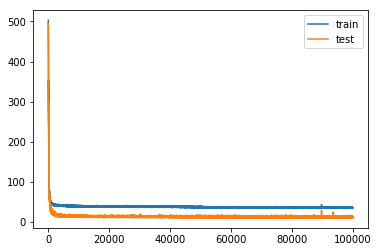

In [354]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=100000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [355]:
yhat = model.predict(validateX)

In [356]:
np.savetxt("yhat.csv", yhat.flatten(), delimiter=",")
np.savetxt("testingX.csv", validateX.flatten(), delimiter=",")
np.savetxt("testingY.csv", validateY.flatten(), delimiter=",")

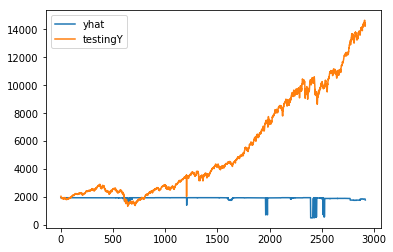

In [357]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()

In [358]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = validateY[i]
    prediction2 = yhat[i + 1]
    real_value2 = validateY[i + 1]
    if prediction2 <= prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    growth.append(initial_capital)

10000
9940.525527667654
9740.528342992706
9582.57350811274
9583.21840264009
9553.940970426956
9400.184282020753
9315.704560178763
9404.64886150544
9304.108148617403
9228.216629423683
9286.128060563973
9378.414220917972
9415.79959444707
9213.292971248758
9313.114266299255
9502.300700192769
9502.63678570929
9281.763819653781
9304.424750915578
9268.946784462853
9254.27592104601
9194.008481726858
9039.113973369069
8983.671553074062
9034.335714068962
9282.990288248855
9231.052411854387
9131.229168482056
9135.640656196741
9310.16061039754
9243.202146816864
9265.369178493505
9303.997094272814
9175.081022181203
9227.01597609292
9487.033163213988
9497.617908662573
9565.502312195287
9422.926068638695
9429.202587429845
9315.26716192683
9235.08300265035
9341.74631690458
9202.88990681128
9065.996430966647
8977.943486879441
8994.697106337799
8978.727686417991
9154.233004386793
8931.666946656751
8832.380953030393
9012.064934254611
9076.630858622026
9007.805415643046
8907.969995259247
9074.40490092564

IndexError: index 2917 is out of bounds for axis 0 with size 2917

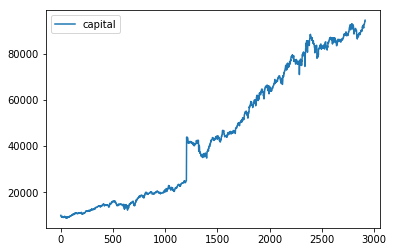

In [359]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()